# 2022年全国大学生数学建模竞赛本科组北太天元数模之星获奖团队队长韩同学数学建模笔记

**Copyright©**
1. 版权归山东大学韩同学所有；
2. 未经原作者允许不得转载本文内容，否则将视为侵权，侵权必究。
3. 转载请注明来源及原作者。

# 一、整数规划与非线性规划
## 1. 整数规划
### 1.1 整数变量，cvxpy
求解下列整数线性规划问题:
$$
\begin{array}{ll}
\min & z=40 x_{1}+90 x_{2}, \\
\text { s.t. } & \left\{\begin{array}{l}
9 x_{1}+7 x_{2} \leqslant 56, \\
7 x_{1}+20 x_{2} \geqslant 70, \\
x_{1}, x_{2} \geqslant 0 \text { 为整数. }
\end{array}\right.
\end{array}
$$

In [1]:
import cvxpy as cp
import numpy as np

c = np.array([40, 90])
a = np.array([[9, 7], [-7, -20]])
b = np.array([56, -70])
x = cp.Variable(2, integer=True)
obj = cp.Minimize(c@x)
cons = [a@x <= b, x >= 0]
prob = cp.Problem(obj, cons)
prob.solve(solver='GLPK_MI')
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

# Use '*' for matrix-scalar and vector-scalar multiplication.
# Use '@' for matrix-matrix and matrix-vector multiplication.
# Use 'multiply' for elementwise multiplication.

最优值为： 350.0
最优解为：
 [2. 3.]


### 1.2 标准指派问题，cvxpy

标准指派问题的一般提法是: 拟分派$n$个人$A_1, A_2, \cdots, A_n$去完成$n$项工作$B_1, B_2, \cdots, B_n$, 要求每项工作需且仅需一个人去完成, 每个人需完成且仅需完成一项工作. 已知$A_i$完成工作$B_j$的时间或费用等成本型指标值为$c_{i j}$, 则应如何指派 才能使总的工作效率最高?

引入$0-1$决策变量
$$
x_{i j}=\left\{\begin{array}{ll}
1, & \text { 指派 } A_i \text { 去完成工作 } B_j, \\
0, & \text { 否则 },
\end{array} \quad i, j=1,2, \cdots, n .\right.
$$
则标准指派问题的数学模型为
   
$$
\begin{aligned}
&\min z=\sum_{i=1}^{5} \sum_{j=1}^{5} c_{i j} x_{i j} \text {, }\\
&\text { s.t. }\left\{\begin{array}{l}
\sum_{j=1}^{5} x_{i j}=1, \quad i=1,2, \cdots, 5, \\
\sum_{i=1}^{5} x_{i j}=1, \quad j=1,2, \cdots, 5, \\
x_{i j}=0 \text { 或 } 1, \quad i,j=1,2, \cdots, 5,
\end{array}\right.
\end{aligned}
$$

注:$\quad \left(c_{ij}\right)_{n*n}\text{为效率矩阵}, c_{ij} \geqslant 0, \min$; 匈牙利算法, 多项式时间算法;

In [2]:
import numpy as np
import cvxpy as cp


c = np.array([[4, 8, 7, 15, 12],
              [7, 9, 17, 14, 10],
              [6, 9, 12, 8, 7],
              [6, 7, 14, 6, 10],
              [6, 9, 12, 10, 6]])
x = cp.Variable((5, 5), integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c, x)))
cons = [0 <= x, x <= 1, cp.sum(x, axis=0, keepdims=False) == 1, cp.sum(x, axis=1, keepdims=False) == 1]
prob = cp.Problem(obj, cons)
prob.solve(solver='GLPK_MI')
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

最优值为： 34.0
最优解为：
 [[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


### 1.3 广义指派问题，cvxpy
广义指派问题常见为以下四类, 通常做法是转化为标准指派问题, 然后用匈牙利算法求解.
**(1)最大化指派问题**
一些指派问题中, 每人完成各项工作的效率可能是诸如利润、业绩等效益型指标, 此时则以总的工作效率最大为目标函数, 即
$$
\max z=\sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j} .
$$
对于最大化指派问题, 若令 $M=\max _{1 \leqslant i, j \leqslant n}\left\{c_{i j}\right\}$, 再考虑到约束条件 $\sum_{i=1}^n \sum_{j=1}^n x_{i j}=$ $n$, 则有
$$
\begin{aligned}
\min \sum_{i=1}^n \sum_{j=1}^n\left(M-c_{i j}\right) x_{i j} & =\min \left(\sum_{i=1}^n \sum_{j=1}^n M x_{i j}-\sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j}\right) \\
& =n M-\max \sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j} .
\end{aligned}
$$
于是, 以 $\boldsymbol{C}=\left(c_{i j}\right)_{n \times n}$ 为效率矩阵的最大化指派问题, 就可转化为以 $\left(M-c_{i j}\right)_{n \times n}$ 为效率矩阵的标准指派问题.
**(2)人数和任务数不等的指派问题**
一些指派问题中, 可能出现人数和任务数不相等的情况. 对于这样的指派问题, 通常的处理方式为：若人数少于任务数, 则可添加一些虚拟的 “人”. 这些虚拟的人完成各项任务的效率取为 0 , 理解为这些效率值实际上不会发生. 若人数多于任务数, 则可添加一些虚拟的 “任务”. 这些虚拟的任务被每个人完成的效率同样也取为 0 .
**(3)一个人可完成多项任务的指派问题**
一些指派问题中, 可能出现要求某人完成几项任务的情形. 对于这样的指派问题, 可将该人看作相同的几个人来接受指派, 只需令其完成同一项任务的效率都一样即可.
**(4)某项任务一定不能由某人完成的指派问题**
一些指派问题中, 可能出现某人不能完成某项任务的情形. 对于这样的指派问题, 只需将相应的效率值 (成本型) 取成足够大的数(eg. numpy.inf)即可.

注：如果用匈牙利算法**手工**求解指派问题, **需要**把广义指派问题转化为标准的指派问题; 如果使用**软件**求解各种广义指派问题, 只要直接建立0-1整数规划模型, **不需要**把广义指派问题化成标准的指派问题。

$$
\begin{array}{ll}
\max z_{1}=\sum_{j=1}^{7} l_{j}\left(x_{1 j}+x_{2 j}\right), \\
\text { s.t. } 
\begin{cases}\sum_{i=1}^{2} x_{i j} \leqslant a_{j}, & j=1,2, \cdots, 7, \\
\sum_{j=1}^{7} l_{j} x_{i j} \leqslant 1020, & i=1,2, \\
\sum_{j=1}^{7} w_{j} x_{i j} \leqslant 40000, & \\
\sum_{j=5}^{7} l_{j}\left(x_{1 j}+x_{2 j}\right) \leqslant 302.7, & \\
x_{i j} \geqslant 0 \text { 且为整数, }
\end{cases}
\end{array}
$$

In [2]:
import numpy as np
import cvxpy as cp


L = np.array([48.7, 52.0, 61.3, 72.0, 48.7, 52.0, 64.0])
x = cp.Variable((2, 7), integer=True)
a = np.array([8, 7, 9, 6, 6, 4, 8])
w = np.array([2000, 3000, 1000, 500, 4000, 2000, 1000])
obj = cp.Maximize(cp.sum(x@L))
cons = [cp.sum(x, axis=0, keepdims=False) <= a,
       x@L <= [1020, 1020],
       x@w <= 40000,
       cp.sum(x[:, 4:]@L[4:]) <= 302.7,
       x >= 0]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI') #需要安装gurobi. 如未安装, 将'GUROBI'换成'GLPK_MI'.
print("最优值为：", prob.value)
print("最优解为：\n", x.value)


Set parameter Username
最优值为： 2039.4
最优解为：
 [[0. 7. 9. 0. 0. 2. 0.]
 [8. 0. 0. 6. 3. 1. 0.]]


### 1.4 整数规划习题
#### 1.4.1 销售代理点售书
一家出版社准备在某市建立两个销售代理点, 向7个区的大学生售书, 每个区的大学生数量 (单位: 千人) 表示在下图上. 每个销售代理点只能向本区和一个相邻区的大学生售书, 这两个销售代理点应该建在何处, 才能使所能供应的大学生的数量最大? 建立该问题的整数线性规划模型并求解.
![](./images/销售点售书.png)

解: 将大学生数量为$34,29,42,21,56,18,71$的区分别标号为$1,2,3,4,5,6,7$区, 划出区与区之间的相邻关系图:
![](./images/销售解答.png)

##### 模型建立

首先将区域标号1,2,3,4,5,6,7分别代表人数为34,29,42,21,56,18,71的区域。用$ r_i $表示第$ i $个区大学生的数量。

用$ a_{ij} $表示第$ i $个区和第$j$个区是否相邻：

$a_{i,j} =1$表示i小区和j小区相邻, i,j=1..7,j>i

$a_{i,j} =0$表示i小区和j小区不相邻, i,j=1..7,j>i


用$ x_{ij} $表示是否选择向第$ i $个区和第$ j $个区的大学生售书，

$ x_{ij}=1 $，向第i个和第j个区的大学生同时售书，$ x_{ij}=0 $，不向第i个和第j个区的大学生售书，其中$ i=1,\cdots,7,j=1,\cdots,7$。


目标函数：
 $
 \max = {\sum_{i=1}^{7}\sum_{j=i+1}^{7}{(r_i + r_j)}x_{ij}}
$

约束条件1：相邻才能被选中
$x_{ij}\le a_{ij}$

约束条件2 :
排除特殊情况：

$x_{1,2} = 1,x_{1,3} = 1$,
$x_{1,3} = 1,x_{3,4} = 1$

$
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7
$

约束条件3：总共有两对代理点被选中,考虑到对称性，累计求和应该是2。

$\sum_{i=1}^{7}\sum_{j=i+1}^{7}{x_{ij}=2}$

联合目标函数和约束条件在一起，我们得到如下模型：
$
\begin{array}
\max \max= \sum_{i=1}^{7} \sum_{j=1}^{7} (r_i + r_j) x_{ij}\\
\text{s.t.}
\begin{cases}
x_{ij}=0, 1,i=1,\cdots,7,j=i+1,\cdots,7  \\
x_{ij}\le a_{ij} \\
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7\\
 \sum_{i=1}^{7}\sum_{j=1}^{7}{x_{ij}=2}
\end{cases}
\end{array}
$

In [5]:
"""
社区设置销售中心问题
"""
# 用gurobi求解
import gurobipy as gp
from gurobipy import GRB

try:

	n = 7  # 7个社区

	# 社区的大学生人数
	r= [34, 29, 42, 21, 56, 18, 71]
	# 社区的相邻关系
	a = [[0,1,1,0,0,0,0],
		[1,0,1,1,1,0,0],
		[1,1,0,1,0,0,0],
		[0,1,1,0,1,1,1],
		[0,1,0,1,0,1,0],
		[0,0,0,1,1,0,1],
		[0,0,0,1,0,1,0]]


	# 建立模型
	model = gp.Model("district")

	# 变量设定
	# x(i,j) 表示(i,j)是否同时被选中
	x = model.addVars(n,n, vtype=GRB.BINARY, name='x')


	# 设置目标函数
	links = [(i,j) for i in range(n) for j in range(n)]
	obj = gp.quicksum((r[i]+r[j])*x[i,j]/2 for (i,j) in links)
	model.setObjective(obj, GRB.MAXIMIZE)

	#总数2对的约束
	model.addConstr(gp.quicksum(x[i,j] for (i,j) in links)==4)

	#约束条件：相邻才能被选中
	for (i,j) in links:
		model.addConstr(x[i,j]<=a[i][j])

	# x(i,j) = x(j,i)
	for (i,j) in links:
		model.addConstr(x[i,j]==x[j,i])

	# 约束条件 : 每一个社区只能选中一个相邻的小区
	for i in range(n):
		model.addConstr(gp.quicksum(x[i,j] for j in range(n))<=1)

	# 约束条件 : 每一个社区只能选中一个相邻的小区
	for j in range(n):
		model.addConstr(gp.quicksum(x[i,j] for i in range(n))<=1)


	model.optimize()

	print('目标函数值: %g' % model.objVal)
	for i in range(n):
		for j in range(i+1,n):
			if x[i,j].x>0:
				print('x[%d][%d]=%d'%(i,j,x[i,j].x),end=',')
				print('r[%d] =%d, r[%d]=%d' %(i,r[i],j,r[j]))


except gp.GurobiError as e:
	print('Error code ' + str(e.errno) + ": " + str(e))

except AttributeError:
	print('Encountered an attribute error')

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 113 rows, 49 columns and 280 nonzeros
Model fingerprint: 0xa3891911
Variable types: 0 continuous, 49 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 153.0000000
Presolve removed 105 rows and 40 columns
Presolve time: 0.00s
Presolved: 8 rows, 9 columns, 27 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Found heuristic solution: objective 166.0000000

Root relaxation: objective 1.770000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     177.0000000  177.00000  0.00%     -    0s


该代码的结果:

目标函数值: 177

x[1][4]=1,r[1] =29, r[4]=56

x[3][6]=1,r[3] =21, r[6]=71


In [6]:
# 用cvxpy求解
import numpy as np
import cvxpy as cp


n = 7

# 社区的大学生人数
r= [34, 29, 42, 21, 56, 18, 71]

# 社区的相邻关系a_{ij} 注意：i>=j时，a_{ij}=0
a =np.array([[0,1,1,0,0,0,0],
             [0,0,1,1,1,0,0],
             [0,0,0,1,0,0,0],
             [0,0,0,0,1,1,1],
             [0,0,0,0,0,1,0],
             [0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0]])

# 表示出目标函数系数r_i + r_j
s = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        s[i][j] = r[i] + r[j]
# 另一种方式
s1 = np.array([[ri + rj for ri in r] for rj in r])

# 决策变量
x = cp.Variable((n, n), boolean=True)

# 目标函数
obj = cp.Maximize(cp.sum(cp.multiply(s, x)))

# 全体约束条件
constraints = []

# 约束条件1：相邻才能被选中
con1 = x<=a
constraints.append(con1)

# 约束条件2：总共有两对代理点被选中,考虑到对称性，累计求和应该是2
con2 = cp.sum(x)==2
constraints.append(con2)

# 约束条件3：排除特殊情况
con3 = cp.sum(x, axis=1, keepdims=False) + cp.sum(x, axis=0, keepdims=False) <= 1 # 体会keepdims = False的妙用
constraints.append(con3)

## 约束条件3：排除特殊情况另一种写法
# for i in range(n):
#     con = cp.sum([x[k][i]+x[i][k] for k in range(n)]) <= 1 
#     constraints.append(con)

# 构建模型
prob = cp.Problem(obj, constraints)

# 求解模型
prob.solve()
print("最优值为：", prob.value)


print("具体结果")
for i in range(n):
    for j in range(n):
        if x.value[i, j]>0:
            print(i+1, j+1, x.value[i, j], s[i, j])
            

最优值为： 177.0
具体结果
2 5 1.0 85.0
4 7 1.0 92.0


#### 1.4.2 面试问题
有4名同学到一家公司参加三个阶段的面试. 公司要求每个同学都必须首先找公司秘书初试, 然后到部门主管处复试, 最后到经理处参加面试, 并且不允许揷队(即在任何一个阶段4名同学的顺序是一样的). 由于4名同学的专业背景不同, 所以每人在三个阶段的面试时间也不同, 如下表所示 (单位:$\min$):
\begin{array}{|c|c|c|c|}
\hline & \text{秘书初试} & \text{主管复试} & \text{经理面试} \\
\hline \text{同学甲} & 13 & 15 & 20 \\
\hline \text{同学乙} & 10 & 20 & 18 \\
\hline \text{同学丙} & 20 & 16 & 10 \\
\hline \text{同学丁} & 8 & 10 & 15 \\
\hline
\end{array}
这4名同学约定他们全部面试完以后一起离开公司. 假定现在时间是早$8: 00$, 问他们最早何时能离开公司?

**四个关键点：**\
（1）不同阶段的先后关系如何表示？\
（2）同一阶段的先后关系如何表示？\
（3）互斥条件如何实现？\
（4）目标函数如何表达？

$T$表示需要的时间, $s_{ij}$表示$i$同学$j$阶段开始的时间, $e_{ij}$表示$i$同学$j$阶段结束的时间, $t_{ij}$表示$i$同学$j$阶段面试的时间, 建立如下整数线性规划模型:
$$
\begin{aligned}
&\min T\\
&\text { s.t. }\left\{\begin{array}{l}
e_{i,3} \leqslant T, \quad i=1,2,3,4\\
e_{i,j} = s_{i,j} + t_{i,j}, \quad i=1,2,3,4,\ j=1,2,3\\
e_{i,j} \leqslant s_{i,j+1}, \quad i=1,2,3,4, \ j=1,2\\
e_{i,j} \leqslant s_{k,j}+\left(1-x_{i, k}\right) M, \quad j=1,2,3, \ i=1,2,3,4, \ k=1,2,3,4\\
e_{k,j} \leqslant s_{i,j}+x_{i,k} M, \quad j=1,2,3, \ i=1,2,3,4, \ k=1,2,3,4\\
x_{i,j} \in \{0,1\}, \quad i=1,2,3,4, \ j=1,2,3\\
e_{i,j}, s_{i,j} \text{为非负整数},\quad i=1,2,3,4, \ j=1,2,3\\
M\text{为充分大的数}
\end{array}\right.
\end{aligned}
$$

In [7]:
import numpy as np
import cvxpy as cp


# 常量
m = 4 # 四名同学
n = 3 # 三个阶段

# 不同阶段面试时间
t = np.array([[13, 15, 20],
              [10, 20, 18],
              [20, 16, 10],
              [8, 10,15]])

# 决策变量
# s(i, j) 表示i同学j阶段面试的开始时刻
s = cp.Variable((m, n), pos=True)

# e(i, j) 表示i同学j阶段面试的开始时刻
e = cp.Variable((m, n), pos=True)

# x(i, k)表示i同学在j同学前面
x = cp.Variable((m, m), boolean=True)

T = cp.Variable(1, pos=True)

# 目标函数
obj = cp.Minimize(T)

# 约束条件
constraints = []

# 约束条件 e(i, 3)<=T
for i in range(m):
    constraints.append(e[i, n-1] <= T)

# 等式条件
constraints.append(e == s + t)
# for i in range(m):
#     for j in range(n):
#         constraints.append(e[i, j] == s[i, j] + t[i][j])

# 同一个同学在不同阶段的时间先后关系
for i in range(m):
    for j in range(n-1):
        constraints.append(e[i, j] <= s[i, j+1])

# 互斥约束
M = 800 # 充分大的数不能用np.inf代替
for j in range(n):
    for i in range(m):
        for k in range(i+1, m):
            constraints.append(e[i, j] <= s[k, j] + (1-x[i, k])*M)
            constraints.append(e[k, j] <= s[i, j] + x[i, k]*M)

# 建立模型并求解
prob = cp.Problem(obj, constraints)
prob.solve()
print("最优值为：", prob.value)

for i in range(m):
    for k in range(i+1, m):
        print('x[%d][%d]=%d'%(i, k, x[i,k].value))


最优值为： 84.0
x[0][1]=1
x[0][2]=1
x[0][3]=0
x[1][2]=1
x[1][3]=0
x[2][3]=0


## 2. 非线性规划
（1）一般地，非线性规划难以求得全局最优解

（2）非线性优化容易求得局部最优解，与初值有很大关系。初值不同，所得局部最优解可能不同。**所以，尽量建立线性模型，避免非线性模型。**

（3）凸优化中，局部最优等价于全局最优。
### 2.1 用scipy.optimize模块的minimize求解
   **scipy.optimize中没有maximize，所以max模型要转化成min模型。**
Example1:
$$
\begin{array}{ll}
\min & \frac{2+x_{1}}{1+x_{2}}-3 x_{1}+4 x_{3} \\
\text { s.t. } & 0.1 \leqslant x_{i} \leqslant 0.9, \quad i=1,2,3
\end{array}
$$

In [8]:
from scipy.optimize import minimize
import numpy as np


def obj(x):
    x1, x2, x3 = x
    return (2+x1)/(1+x2) -3*x1 + 4*x3
LB = [0.1]*3
UB = [0.9]*3
bound = tuple(zip(LB, UB))
res = minimize(obj, np.ones(3), bounds=bound) #第二个参数为初值
print(res.fun, '\n', res.success, '\n', res.x) #输出最优值，求解状态，最优解

-0.7736842105263159 
 True 
 [0.9 0.9 0.1]


Example2:
$$
\begin{array}{ll}
\max & z=x_{1}^{2}+x_{2}^{2}+3 x_{3}^{2}+4 x_{4}^{2}+2 x_{5}^{2}-8 x_{1}-2 x_{2}-3 x_{3}-x_{4}-2 x_{5}, \\
\text { s.t. } \quad & \left\{\begin{array}{l}
x_{1}+x_{2}+x_{3}+x_{4}+x_{5} \leqslant 400 \\
x_{1}+2 x_{2}+2 x_{3}+x_{4}+6 x_{5} \leqslant 800 \\
2 x_{1}+x_{2}+6 x_{3} \leqslant 200 \\
x_{3}+x_{4}+5 x_{5} \leqslant 200 \\
0 \leqslant x_{i} \leqslant 99, \quad i=1,2, \cdots, 5 .
\end{array}\right.
\end{array}
$$

In [9]:
# 该题只能求得局部最优解，求解时多取几个初值试试
from scipy.optimize import minimize
import numpy as np


c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
obj = lambda x: np.dot(-c1, x**2) + np.dot(-c2, x) #目标函数也可通过def定义
A = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])
cons = {'type': 'ineq', 'fun': lambda x:b-A@x}
# 多个限制条件 cons=[{'type': 'ineq', 'fun': lambda x:b1-A1@x'}, {'type': 'ineq', 'fun': lambda x:b1-A1@x''}]
bound = [(0, 99) for i in range(A.shape[1])]
res = minimize(obj, np.ones(5)*90, constraints=cons, bounds=bound)
print(res)

     fun: -51629.930000636145
     jac: array([ -93.        , -196.        ,    3.        , -791.        ,
        -78.79980469])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 5
    njev: 4
  status: 0
 success: True
       x: array([50.5, 99. ,  0. , 99. , 20.2])


### 2.2 用cvxopt.solvers.qp模块求解二次规划模型

二次规划：目标函数为决策向量$x$的二次函数，约束条件全为线性。
cvxopt.solvers模块中二次规划标准型为：

$$
\begin{array}{ll}
\min & \frac{1}{2} \boldsymbol{x}^{\mathrm{T}} \boldsymbol{P} \boldsymbol{x}+\boldsymbol{q}^{\mathrm{T}} \boldsymbol{x} \\
\text { s.t. } & \left\{\begin{array}{l}
\boldsymbol{A} \boldsymbol{x} \leqslant \boldsymbol{b} \\
\mathbf{A e q} \cdot \boldsymbol{x}=\mathbf{b e q}
\end{array}\right.
\end{array}
$$


求解:

$$
\begin{array}{ll}
\min \quad z=1.5 x_{1}^{2}+x_{2}^{2}+0.85 x_{3}^{2}+3 x_{1}-8.2 x_{2}-1.95 x_{3}, \\
\text { s.t. } \quad\left\{\begin{array}{l}
x_{1}+x_{3} \leqslant 2 \\
-x_{1}+2 x_{2} \leqslant 2 \\
x_{2}+2 x_{3} \leqslant 3 \\
x_{1}+x_{2}+x_{3}=3
\end{array}\right.
\end{array}
$$

In [10]:
# 先把目标函数化成标准型
from cvxopt import matrix, solvers

# 系数要放在cvxopt.matrix中
n = 3 #变量数
P = matrix(0., (n, n)) # 生成n*n的零矩阵
P[::n+1] = [3, 2, 1.7] # 对矩阵P赋值
q = matrix([3, -8.2, -1.95])
A = matrix([[1., 0, 1], [-1, 2, 0], [0, 1, 2]]).T 
b = matrix([2., 2, 3])
Aeq = matrix(1., (1, n))
beq = matrix(3.)
# P = np.array([[3, 0, 0], [0, 2, 0], [0, 0, 1.7]])
# q = np.array([3, -8.2, -1.95])
# A = np.array([[1, 0, 1], [-1, 2, 0], [0, 1, 2]])
# b = np.array([2, 2, 3])
s = solvers.qp(P, q, A, b, Aeq, beq)
print("最优解为：", s['x'])
print("最优值为：\n", s['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -1.3148e+01 -4.4315e+00  1e+01  1e+00  9e-01
 1: -6.4674e+00 -7.5675e+00  1e+00  3e-16  4e-16
 2: -7.1538e+00 -7.1854e+00  3e-02  1e-16  2e-15
 3: -7.1758e+00 -7.1761e+00  3e-04  2e-16  2e-15
 4: -7.1760e+00 -7.1760e+00  3e-06  1e-16  2e-15
Optimal solution found.
最优解为： [ 8.00e-01]
[ 1.40e+00]
[ 8.00e-01]

最优值为：
 -7.1759977687772745


### 2.3 用cvxpy库求解

$$
\begin{aligned}
&\min z=x_{1}^{2}+x_{2}^{2}+3 x_{3}^{2}+4 x_{4}^{2}+2 x_{5}^{2}-8 x_{1}-2 x_{2}-3 x_{3}-x_{4}-2 x_{5}, \\
&\text { s.t. }\left\{\begin{array}{l}
0 \leqslant x_{i} \leqslant 99, \text { 且 } x_{i} \text { 为整数 }(i=1, \cdots, 5), \\
x_{1}+x_{2}+x_{3}+x_{4}+x_{5} \leqslant 400, \\
x_{1}+2 x_{2}+2 x_{3}+x_{4}+6 x_{5} \leqslant 800, \\
2 x_{1}+x_{2}+6 x_{3} \leqslant 200, \\
x_{3}+x_{4}+5 x_{5} \leqslant 200 .
\end{array}\right.
\end{aligned}
$$

In [11]:
import numpy as np
import cvxpy as cp


c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
a = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])
x = cp.Variable(5, integer=True)
obj = cp.Minimize(c1@x**2 + c2@x)
cons = [0<=x, x<=99, a@x<=b]
prob = cp.Problem(obj, cons)
prob.solve(solver='CPLEX', verbose=True) #注意这个地方，需要通过pip install cplex安装cplex求解器
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Aug 09 01:17:58 PM: Your problem has 5 variables, 3 constraints, and 0 parameters.
(CVXPY) Aug 09 01:17:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 09 01:17:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 09 01:17:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 09 01:17:58 PM: Compiling problem (target solver=CPLEX).
(CVXPY) Aug 09 01:17:58 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing

### 2.4 非线性规划习题

#### 2.4.1 飞机管理问题，绝对值，scipy.optimize.minimize

$\quad$在约 $10 \mathrm{~km}$ 高空的某边长 $160 \mathrm{~km}$ 的正方形区域内, 经常有若干架飞机做水平 飞行. 区域内每架飞机的位置和速度向量均由计算机记录其数据, 以便进行飞行管 理. 当一架欲进入该区域的飞机到达区域边缘时, 记录其数据后, 要立即计算并判 断是否会与区域内的飞机发生碰撞. 如果会发生碰撞, 则应计算如何调整各架 (包 括新进入的) 飞机飞行的方向角, 以避免碰撞.\
现假定条件如下:\
(1) 不碰撞的标准为任意两架飞机的距离大于 $8 \mathrm{~km}$;\
(2) 飞机飞行方向角调整的幅度不应超过 $30^{\circ}$;\
(3) 所有飞机飞行速度均为 $800 \mathrm{~km} / \mathrm{h}$;\
(4) 进入该区域的飞机在到达区域边缘时, 与区域内飞机的距离应在 $60 \mathrm{~km}$ 以上;\
(5) 最多需考虑 6 架飞机;\
(6) 不必考虑飞机离开此区域后的状况.\
$\quad$请对这个避免碰撞的飞行管理问题建立数学模型, 列出计算步骤, 对以下数据 进行计算 (方向角误差不超过 $0.01^{\circ}$ ), 要求飞机飞行方向角调整的幅度尽量小.\
$\quad$设该区域 4 个顶点的坐标为 $(0,0),(160,0),(160,160),(0,160)$. 记录数据见 表 $6.3$.

\begin{array}{cccc}
\hline \text { 飞机编号 } & \text { 横坐标 } x & \text { 纵坐标 } y & \text { 方向角 } /\left(^{\circ}\right) \\
\hline 1 & 150 & 140 & 243 \\
2 & 85 & 85 & 236 \\
3 & 150 & 155 & 220.5 \\
4 & 145 & 50 & 159 \\
5 & 130 & 150 & 230 \\
\text { 新进入 } & 0 & 0 & 52 \\
\hline
\end{array}

注: 方向角指飞行方向与 $x$ 轴正向的夹角.

Model:
$$
\begin{array}{ll}
\min & \sum_{i=1}^{6}\left|\Delta \theta_{i}\right|, \\
\text { s.t. } \quad & \left\{
\begin{array}{l}
|\beta_{i j}^{0}+\frac{1}{2}\left(\Delta \theta_{i}+\Delta \theta_{j}\right)| > \alpha_{i j}^{0}, \quad i=1, \cdots, 5, \quad j=i+1, \cdots, 6, \\
|\Delta \theta_{i}| \leqslant 30^{\circ},
\end{array}\right.
\end{array}
$$

其中， $\theta_i$ 为第 $i$ 架飞机调整后的飞行方向角；$\left(x_{i}^{0}, y_{i}^{0}\right)$为第$i$架飞机的初始位置, $i=1, \cdots, 6, i=6$对应新进入的飞机; \
两架飞机初始距离$$r_{i j}(0) =\sqrt{\left(x_{i}^{0}-x_{j}^{0}\right)^{2}+\left(y_{i}^{0}-y_{j}^{0}\right)^{2}}, \alpha_{i j}^{0} =\arcsin \frac{8}{r_{i j}(0)}$$

$$
\begin{align}
\beta_{m n}^{0}&= \text{相对速度} v_{m n} \text{的辐角} - \text{从} n \text{指向} m \text{的连线矢量的辐角}\\
&=\arg \frac{e^{\mathrm{i} \theta_{n}^{0}}-e^{\mathrm{i} \theta_{m}^{0}}}{\left(x_{m}+\mathrm{i} y_{m}\right)-\left(x_{n}+\mathrm{i} y_{n}\right)} \text {. }
\end{align}
$$

In [12]:
# 法一，非线性规划
import numpy as np
import pandas as pd
from scipy.optimize import minimize


#导入数据
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])
theta0 = np.array([243, 236, 220.5, 159, 230, 52])
dis = np.zeros((6, 6)) # distance
# alpha0 = np.zeros((6, 6))
beta0 = np.zeros((6, 6))
xy0 = np.c_[x0, y0]
for i in range(6):
    for j in range(6):
        dis[i, j] = np.linalg.norm(xy0[i] - xy0[j])
dis[np.where(dis == 0)] = np.inf
alpha0 = np.arcsin(8./dis)*180/np.pi # 弧度转角度
xy1 = x0 + 1j * y0
xy2 = np.exp(1j * theta0 * np.pi/180)
for i in range(6):
    for j in range(6):
        if j != i:
            beta0[i, j] = np.angle((xy2[j]-xy2[i])/(xy1[i]-xy1[j]))
beta0 = beta0*180/np.pi

# # 存数据
# f = pd.ExcelWrite('Airplane.xlsx') # 创建文件对象
# pd.DataFrame(alpha0).to_excel(f, "sheet1", index=None) # 将alpha0写入Excel文件
# pd.DataFrame(beta0).to_excel(f, "sheet2", index-None) # 将beta0写入Excel文件
# f.save()

# # 提取数据
# alpha0 = pd.read_ecxel("Airplane.xlsx").values # 读取并提取第一个表单
# beta0 = pd.read_ecxel("Airplane.xlsx", 1).values # 读取并提取第二个表单

# 模型建立并求解
obj = lambda x: np.sum(np.abs(x)) # 定义目标函数，如何理解：通过初值赋值
bd = [(-30, 30) for i in range(6)] # 决策变量的界限
cons = []
for i in range(5):
    for j in range(i+1, 6):
        cons.append({'type': 'ineq', 'fun': lambda x: np.abs(beta0[i, j] + (x[i]+x[j])/2) - alpha0[i, j]})
res = minimize(obj, np.ones((1, 6)), constraints=cons, bounds=bd)
print(res)

     fun: 0.7909172985328367
     jac: array([-1., -1., -1., -1.,  1.,  1.])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.53262998e-07, 2.53262998e-07, 2.53262998e-07, 2.53262998e-07,
       3.95458143e-01, 3.95458143e-01])


In [12]:
# 法二，穷举法，一般电脑会运行很长时间
import numpy as np
from numpy.linalg import norm


# 起始位置
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])

# 起始角度
theta0 = np.array([243, 236, 220.5, 159, 230, 52])*np.pi/180

# 计算i架飞机和j架飞机的距离,判断是否碰撞？
def sat(qs):
    for i in range(len(qs)):
        for j in range(i+1, len(qs)):
            for t in np.arange(0,160*1.414/800,0.001):
                xi = x0[i] + 800*t*np.cos(qs[i] + theta0[i])
                yi = y0[i] + 800*t*np.sin(qs[i] + theta0[i])
                xj = x0[j] + 800*t*np.cos(qs[j] + theta0[j])
                yj = y0[j] + 800*t*np.sin(qs[j] + theta0[j])
                dis = (xi-xj)**2 + (yi-yj)**2
                if dis <= 64:
                    return False
    return True
span = np.linspace(-np.pi/6, np.pi/6,5)
xs = []

# (10^2)^6*10^3^10^2 = 10^15
# 5^6
for q1 in span:
    for q2 in span:
        for q3 in span:
            for q4 in span:
                for q5 in span:
                    for q6 in span:
                        qs = [q1,q2,q3,q4,q5,q6]
                        if sat(qs):
                            xs.append(qs)
ans = np.array(xs)

# 然后搜索xs中的最小值

print(len(xs))
xs2 = np.abs(xs)
min_v = np.pi
for x in xs2:
    s = np.sum(x)
    if s < min_v:
        min_v = s
        min_x = x
print(min_v, min_x)

4149
0.26179938779914946 [0.         0.         0.         0.         0.         0.26179939]


In [13]:
# 法三，蒙特卡洛方法
import numpy as np
from numpy.linalg import norm


# 起始位置
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])

# 起始角度
q = np.array([243, 236, 220.5, 159, 230, 52])*np.pi/180
def sat(qs):
    for i in range(len(qs)):
        for j in range(i+1, len(qs)):
            for t in np.arange(0,160*1.414/800,0.01):
                xi = x0[i] + 800*t*np.cos(qs[i]+q[i])
                yi = y0[i] + 800*t*np.sin(qs[i]+q[i])
                xj = x0[j] + 800*t*np.cos(qs[j]+q[j])
                yj = y0[j] + 800*t*np.sin(qs[j]+q[j])
                dis = (xi-xj)**2 + (yi-yj)**2
                if dis < 64:
                    return False
    return True

from numpy.random import choice
import numpy as np


span = np.linspace(-np.pi/6,np.pi/6,100)

# print(x)

xs = []
n = 100000 # 蒙特卡洛模拟的次数
for i in range(n):
    #if i%100==0:
        #print(i/n)
    qs = choice(span,6)
    if sat(qs):
        xs.append(qs)

# 然后搜索xs中的最小值

print(len(xs))
xs2 = np.abs(xs)
min_v = np.pi
for x in xs2:
    s = np.sum(x)
    if s < min_v:
        min_v = s
        min_x = x
print('总角度:', min_v)
print('角度调整：',min_x)

26835
总角度: 0.2855993321445268
角度调整： [0.07933315 0.05817764 0.01586663 0.02644438 0.04759989 0.05817764]


#### 2.4.2 碎纸片的拼接复原（CUMCM-2013B）

【问题一】对于给定的来自同一页印刷文字文件的碎纸机破碎纸片（**仅纵切**），建立碎纸片拼接复原模型和算法，并针对附件1、附件2(见data\2013B碎纸片)给出的中、英文各一页文件的碎片数据进行拼接复原。如果复原过程需要人工干预，请写出干预方式及干预的时间节点。

**下面提供三个思路:** \
符号化：\
$i = 1,\dots,19$表示第$i$个碎纸片\
$f_i, l_i$分别表示第$i$个碎纸片对应图像矩阵的第一列和最后一列。


##### **思路一：局部最优模型（贪婪算法）**

每次取最相似的碎纸片的局部最优模型：
$$
k = \arg \underset{j \in S}{\min} \left\|l_{i}-f_{j}\right\|_2
$$
其中，$i$表示当时碎纸片，$S$表示剩下碎纸片的编号，$k$表示用局部最优的结果。\
（1）先找到第一幅图像，判断条件：左边全部都是空白。\
（2）然后重复使用局部最优模型不停寻找碎纸片。

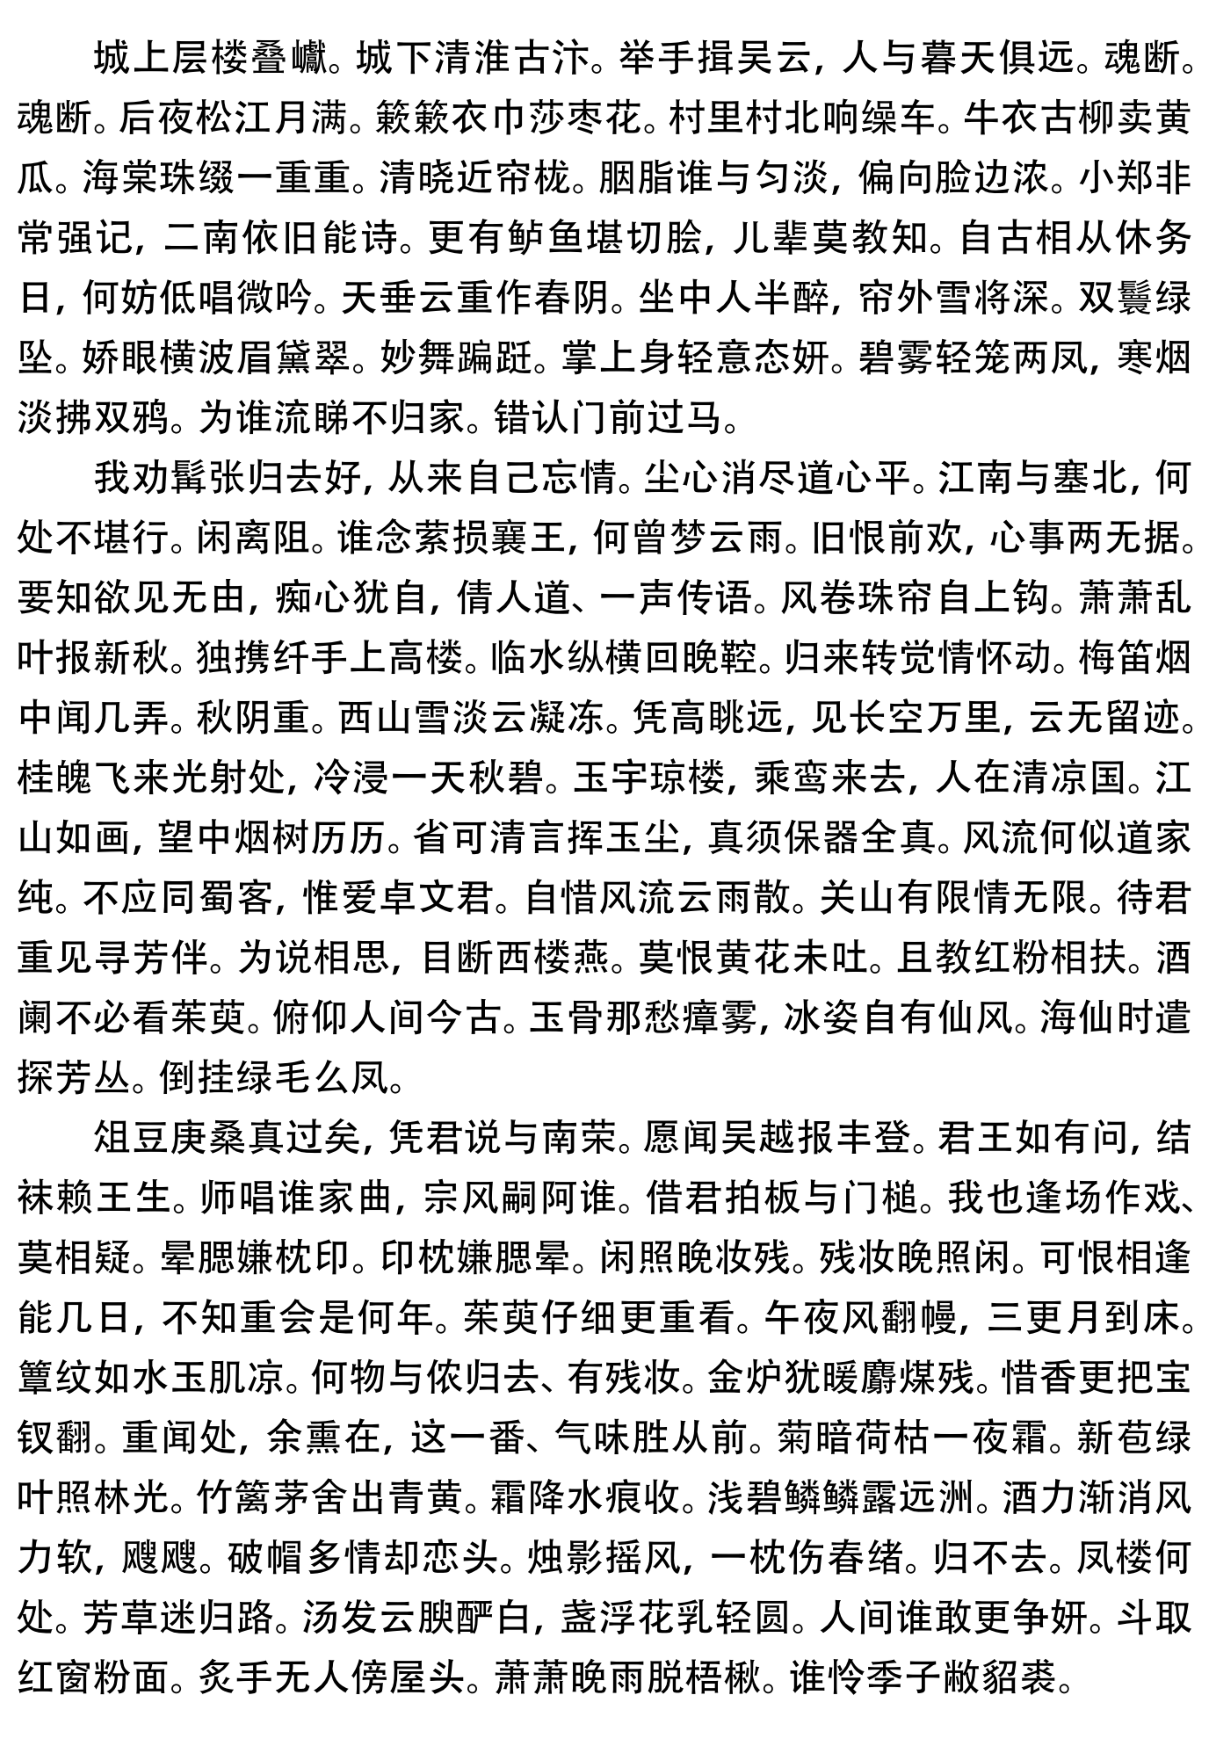

In [14]:
# 思路一：局部最优模型（贪婪算法）
import os
import numpy as np
import matplotlib.pyplot as plt


def sim(u, v):
    """
    :param u: 图像的二位数组u
    :param v: 图像的二维数组v
    :return: 计算u的最后一列u[:, -1]与v的第一列v[:, 0]的欧氏距离，即差向量的二范数
    """
    return np.linalg.norm(u[:, -1] - v[:, 0])


# 读取图像数据
## Path为存放图像的文件夹的路径
Path = "data\\2013B碎纸片\\附件1"
files = os.listdir(Path)
## file存放所有.bmp的文件名
files = [file for file in files if file[-4:] == '.bmp']

# 图像转图像二维数组，并存于figure中
figures = []
for file in files:
    figures.append(plt.imread(os.path.join(Path, file)))

# 寻找最左边的图像，将序号存于seq1
seq1 = []
for i, mat in enumerate(figures):
    for j in range(np.size(mat, 0)):
        if mat[j][0] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0)-1:
        seq1.append(i)
        break

# seq2为待拼接标号的数组
seq2 = [i for i in range(np.size(figures, 0))]
seq2.remove(seq1[-1])

# 贪婪法开始拼接
while np.size(seq2, 0) != 0:
    # temp1存放所有待拼接数组与seq1[-1]的欧氏距离
    temp1 = []
    for i in seq2:
        temp1.append(sim(figures[seq1[-1]], figures[i]))
    # 将temp1最小值的序号，即最佳匹配图像的序号，添加至seq1
    seq1.extend([seq2[i] for i, x in enumerate(temp1) if x == min(temp1)])
    # 删除seq2中已拼接完成图像的序号
    seq2.remove(seq1[-1])

# 将seq1中序号对应的figure图像从左到右按顺序完成拼接，最终a即为拼接完毕的图像数组
a = np.array(figures[seq1[0]])
for i in range(1, np.size(seq1, 0)):
    a = np.c_[a, np.array(figures[seq1[i]])]


plt.figure(figsize=(24, 32))
plt.imshow(a, cmap='gray')
plt.axis(False)
plt.show()

##### **思路二：优化思路**

记$c_{i, j} = \left\|l_{i}-f_{j}\right\|_2$表示$i$前$j$后相邻情况下产生的相似度，越小相似度越大。\
$x_{i, j} = 1$表示$i$前$j$后且相邻。\
$x_{i, j} = 0$表示$i, j$不相邻。\
**Model：**\
目标函数：$\min \sum_{i = 1}^{19} \sum_{j = 1}^{19} c_{i, j} x_{i, j}$
约束条件：\
（1）总体拼接次数次：$\sum_{i = 1}^{19} \sum_{j = 1}^{19} x_{i, j} = 18$\
（2）除了最后一个碎片，每一个碎纸片后面有且仅有一个碎纸片：$\sum_{j = 1}^{19} x_{i, j}= 1, i = 1,2,\dots,19, i \neq 7$\
（3）除了第一个碎片，每一个碎纸片前面有且仅有一个碎纸片：$\sum_{i = 1}^{19} x_{i, j}= 1, j = 1,2,\dots,19, j \neq 9$

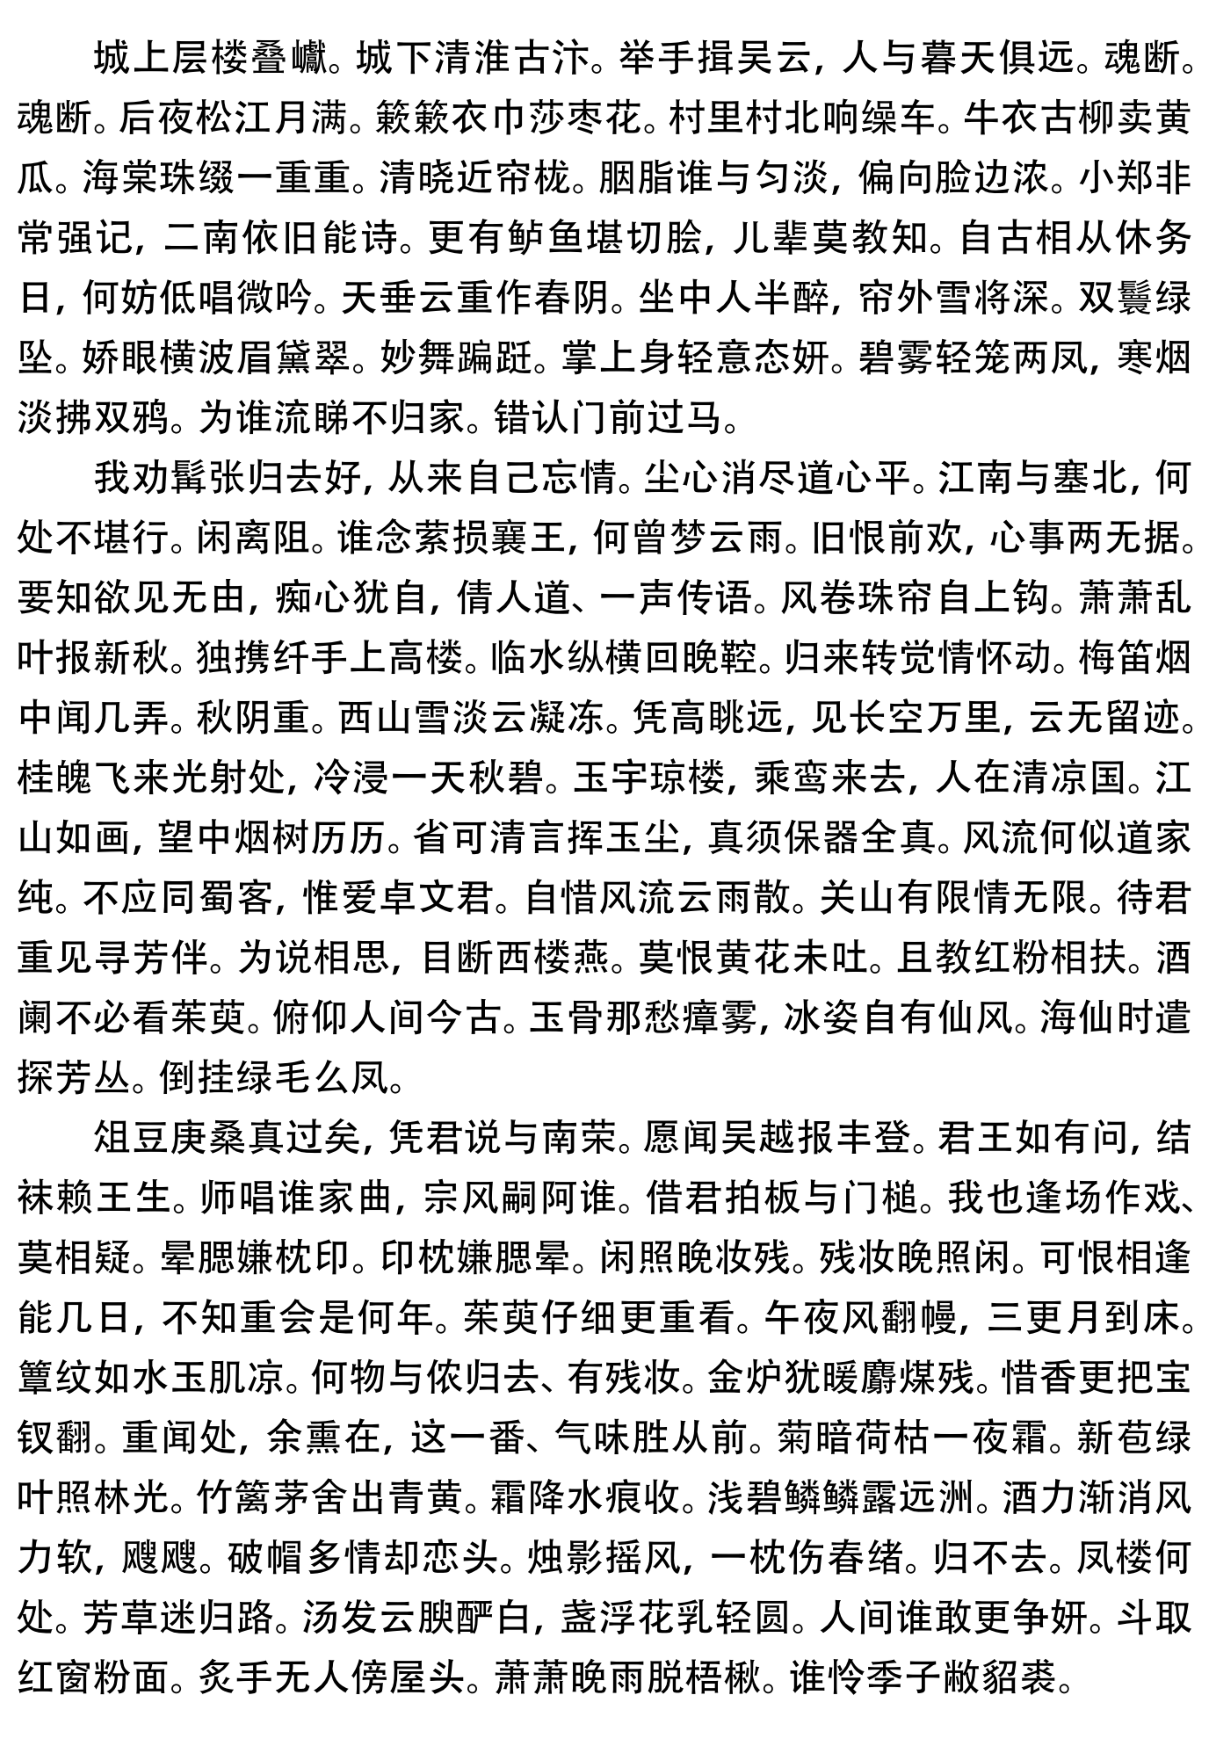

In [15]:
# 思路二：局部最优模型（优化算法）
import os
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


def similar(u, v):
    """
    :param u: 图像的二维数组u
    :param v: 图像的二维数组v
    :return: 计算u的最后一列u[:, -1]与v的第一列v[:, 0]的欧氏距离，即差向量的二范数
    """
    return np.linalg.norm(u[:, -1].astype(float) - v[:, 0].astype(float))


# %%读取图像数据
# Path为存放图像的文件夹的绝对路径
Path = "data\\2013B碎纸片\\附件1"
files = os.listdir(Path)
# file存放所有.bmp的文件名
files = [file for file in files if file[-4:] == '.bmp']

# 图像转图像二维数组，并存于figure中
figures = []
for file in files:
    figures.append(plt.imread(os.path.join(Path, file)))

# 求图像两两相似度存于数组Similar中
Similar = np.zeros((np.size(figures, 0), np.size(figures, 0)))
for i in range(np.size(figures, 0)):
    for j in range(np.size(figures, 0)):
        if j == i:
            Similar[i, j] = 100000
        else:
            Similar[i, j] = similar(figures[i], figures[j])

# %%寻找最左边的图像，将序号存于first
for i, mat in enumerate(figures):
    j = 0
    for j in range(np.size(mat, 0)):
        if mat[j][0] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0) - 1:
        First = i
        break

# 寻找最左边的图像，将序号存于end
for i, mat in enumerate(figures):
    j = 0
    for j in range(np.size(mat, 0)):
        if mat[j][-1] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0) - 1:
        Last = i
        break

# print(First, Last)
# %%决策变量
x = cp.Variable((np.size(figures, 0), np.size(figures, 0)), boolean=True)

# %%目标函数
obj = cp.Minimize(cp.sum(cp.multiply(Similar, x)))

# %%约束条件
constraints = []
# 1.总体拼接18次
con1 = cp.sum(x) == 18
constraints.append(con1)
# 2.除了最后一个碎片，每一个碎纸片后面有且仅有一个碎纸片：
Size1 = [i for i in range(np.size(figures, 0))]
Size1.remove(Last)
for i in Size1:
    con2 = cp.sum(x[i, :]) == 1
    constraints.append(con2)

# 3.除了第一个碎片，每一个碎纸片前面有且仅有一个碎纸片：
Size2 = [i for i in range(np.size(figures, 0))]
Size2.remove(First)
for j in Size2:
    con3 = cp.sum(x[:, j]) == 1
    constraints.append(con3)

# %%构建并求解模型
prob = cp.Problem(obj, constraints)
prob.solve()

# %%碎纸片拼接排序方法1（繁琐）
# I = np.array([])
# J = np.array([])
# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#         if x.value[i, j] > 0:
#             # print("x[{}][{}]={}".format(i, j, x.value[i, j]))
#             I = np.append(I, i)
#             J = np.append(J, j)
# I = I.astype(int)
# J = J.astype(int)
# sorted_ind = np.array([First])
# temp = [1]
# while np.size(temp) != 0:
#     temp = np.where(I == seq[-1])
#     sorted_ind = np.append(sorted_ind, J[temp[0]])
# %%碎纸片拼接排序方法2（简洁）
sorted_ind = [First]
while len(sorted_ind) < len(figures):
    for j in range(len(figures)):
        if x.value[sorted_ind[-1]][j] > 0:
            sorted_ind.append(j)
# print(sorted_ind)
# %%将seq中序号对应的figure图像从左到右按顺序完成拼接，最终a即为拼接完毕的图像数组
a = np.array(figures[sorted_ind[0]])
for i in range(1, np.size(sorted_ind, 0)):
    a = np.c_[a, np.array(figures[sorted_ind[i]])]

plt.figure(figsize=(24, 32))
plt.imshow(a, cmap='gray')
plt.axis(False)
plt.show()

#### 2.4.3 二次指派问题

（数学模型第五版 姜启源 4.4接力队的选拔与选课策略复习题）某公司指派$n$个员工到$n$个城市工作（每个城市单独一人），希望使所花费的总电话费用尽可能少。$n$个员工两两之间每个月通话的时间表示在下面的矩阵的上三角形部分（假设通话的时间矩阵是对称的，没有必要写出下三角形部分），$n$个城市两两之间通话费率表示在下面的矩阵的下三角形部分（同样道理，假设通话的费率矩阵是对称的，没有必要写出上三角形部分）。试求解该二次指派问题。（如果你的软件解不了这么大规模的问题，那就只考虑最前面的若干员工和城市。）
$$
\left(\begin{array}{cccccccccc}
0 & 5 & 3 & 7 & 9 & 3 & 9 & 2 & 9 & 0 \\
7 & 0 & 7 & 8 & 3 & 2 & 3 & 3 & 5 & 7 \\
4 & 8 & 0 & 9 & 3 & 5 & 3 & 3 & 9 & 3 \\
6 & 2 & 10 & 0 & 8 & 4 & 1 & 8 & 0 & 4 \\
8 & 6 & 4 & 6 & 0 & 8 & 8 & 7 & 5 & 9 \\
8 & 5 & 4 & 6 & 6 & 0 & 4 & 8 & 0 & 3 \\
8 & 6 & 7 & 9 & 4 & 3 & 0 & 7 & 9 & 5 \\
6 & 8 & 2 & 3 & 8 & 8 & 6 & 0 & 5 & 5 \\
6 & 3 & 6 & 2 & 8 & 3 & 7 & 8 & 0 & 5 \\
5 & 6 & 7 & 6 & 6 & 2 & 8 & 8 & 9 & 0
\end{array}\right)
$$

**解** 记$p$为通话时间矩阵；$q$为通话费率矩阵。$x_{ij}=1$，若员工$i$分配到城市$j$，否则，$x_{ij}=0$。
数学模型如下：
$$
\begin{array}{ll}
\min z = \frac{1}{2} \sum_{i=1}^{10} \sum_{j=1}^{10} \sum_{m=1}^{10} \sum_{n=1}^{10} p_{ij} q_{ij} x_{im} x_{jn}\\
\text{s.t.}
\begin{cases}
\sum_{i=1}^{10} x_{ij}=1, j=1,2,\dots,10\\
\sum_{j=1}^{10} x_{ij}=1, i=1,2,\dots,10\\
x_{ij} \in \{0, 1\}
\end{cases}
\end{array}
$$

In [16]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

p = np.array([
    [0, 5, 3, 7, 9, 3, 9, 2, 9, 0],
    [5, 0, 7, 8, 3, 2, 3, 3, 5, 7],
    [3, 7, 0, 9, 3, 5, 3, 3, 9, 3],
    [7, 8, 9, 0, 8, 4, 1, 8, 0, 4],
    [9, 3, 3, 8, 0, 8, 8, 7, 5, 9],
    [3, 2, 5, 4, 8, 0, 4, 8, 0, 3],
    [9, 3, 3, 1, 8, 4, 0, 7, 9, 5],
    [2, 3, 3, 8, 7, 8, 7, 0, 5, 5],
    [9, 5, 9, 0, 5, 0, 9, 5, 0, 5],
    [0, 7, 3, 4, 9, 3, 5, 5, 5, 0]
])
q = np.array([
    [0, 7, 4, 6, 8, 8, 8, 6, 6, 5],
    [7, 0, 8, 2, 6, 5, 6, 8, 3, 6],
    [4, 8, 0, 10,4, 4, 7, 2, 6, 7],
    [6, 2, 10, 0,6, 6, 9, 3, 2, 6],
    [8, 6, 4, 6, 0, 6, 4, 8, 8, 6],
    [8, 5, 4, 6, 6, 0, 3, 8, 3, 2],
    [8, 6, 7, 9, 4, 3, 0, 6, 7, 8],
    [6, 8, 2, 3, 8, 8, 6, 0, 8, 8],
    [6, 3, 6, 2, 8, 3, 7, 8, 0, 9],
    [5, 6, 7, 6, 6, 2, 8, 8, 9, 0]
])

model = gp.Model()

index = [(i, j) for i in range(1, 10+1) for j in range(1, 10+1)]
x = model.addVars(index, vtype=GRB.BINARY, name='x')

obj = 0
for i in range(1, 10+1):
    for j in range(1, 10+1):
        for m in range(1, 10+1):
            for n in range(1, 10+1):
                obj += p[i-1, j-1] * q[m-1, n-1] * x[m, i] * x[n, j]

model.setObjective(0.5*obj, GRB.MINIMIZE)

model.addConstrs(x.sum(i, '*') == 1 for i in range(1, 10+1))
model.addConstrs(x.sum('*', j) == 1 for j in range(1, 10+1))

model.optimize()

print("最小费用为：", model.objVal)
print("分配方案如下：")
for i in range(1, 10+1):
    for j in range(1, 10+1):
            if x[i, j].x != 0:
                print("员工{}到城市{}".format(i, j))

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 20 rows, 100 columns and 200 nonzeros
Model fingerprint: 0x5156436e
Model has 3780 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1390.0000000
Presolve time: 0.01s
Presolved: 20 rows, 100 columns, 200 nonzeros
Presolved model has 3880 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)

Root relaxation: objective -3.181574e+03, 120 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0           

## 3.Sudoku求解

涉及到三个集合之间的关系的优化问题，我们称之为ABC型优化。

**数独问题**

所谓标准数独, 就是用$9\times 9$的方阵构成81个格子, 其中9个用粗线分隔的区域称为宫, 在其中的一些格子里已经填上了1到 9之间的数字, 还留下若干空格, 要求数独参与者将这些格子填满, 结果满足每一行、每一列、每个宫的9个数字都是由1到9组成, 没有重复数字。数独联盟将标准数独进行变形, 推出多种变形数独。数独游戏全面考验做题者的观察能力和推理能力, 虽然玩法简单, 但数字排列方式却千变万化, 所以不少教育者认为数独游戏是训练头脑的绝佳方式。

### 模型建立

$x_{i,j,k} = 1$, 表示在(i,j)位置上放置数k

$x_{i,j,k} = 0$, 表示在(i,j)位置上不放置数k

目标函数: min = $ \sum_{i=1..9} \sum_{j=1..9} \sum_{k=1..9} x_{i,j,k}$

约束条件：

（1）第i行数k只出现一次

$\sum_{j=1..9} x_{i,j,k} = 1, i,k=1..9$

（2）第i列数k只出现一次

$ \sum_{i=1..9} x_{i,j,k} = 1, j,k = 1..9$

（3）第i列数k只出现一次

$ \sum_{i=1..9} x_{i,j,k} = 1, i,j=1..9$

（4）$i,j =  1,2,3 $ 范围内k只出现一次

$\sum_{i=1}^3 \sum_{j=1}^3 x_{i+m, j+n, k}=1,m,n=0,3,6,k=1,\dots,9$

(5) $x_{i,j,k} = 0,1$

即:
$$
\begin{array}{ll}
\min &\sum_{i=1..9} \sum_{j=1..9} \sum_{k=1..9} x_{i,j,k}, \\
\text { s.t. } & \left\{\begin{array}{l}
\sum_{j=1}^9 x_{ijk}=1, i,k=1,\dots,9 \\
\sum_{i=1}^9 x_{ijk}=1, j,k=1,\dots,9\\
\sum_{k=1}^9 x_{ijk}=1, i,j=1,\dots,9\\
\sum_{i=1}^3 \sum_{j=1}^3 x_{i+m, j+n, k}=1,m,n=0,3,6,k=1,\dots,9\\
x_{ijk}=0 \text{ or } 1,i,j=1,\dots,9
\end{array}\right.
\end{array}
$$

In [17]:
# 由于cvxpy不支持三维变量, 故采用gurobipy. 详见第十四章.

import gurobipy as gp
from gurobipy import GRB
import numpy as np

data = np.loadtxt('data/sudoku_example.txt')
print(data)

model = gp.Model()

index = [(i, j, k) for i in range(1, 10) for j in range(1, 10) for k in range(1, 10)]
x = model.addVars(index, vtype=GRB.BINARY, name='x')

for i in range(1, 10):
    for j in range(1, 10):
        if data[i - 1][j - 1] != 0:
            model.addConstr(x[i, j, data[i - 1][j - 1]] == 1)

model.addConstrs(x.sum(i, '*', k) == 1 for i in range(1, 10) for k in range(1, 10))
model.addConstrs(x.sum('*', j, k) == 1 for j in range(1, 10) for k in range(1, 10))
model.addConstrs(x.sum(i, j, '*') == 1 for i in range(1, 10) for j in range(1, 10))
for k in range(1, 10):
    for m in [0, 3, 6]:
        for n in [0, 3, 6]:
            SUM = 0
            for i in [1, 2, 3]:
                for j in [1, 2, 3]:
                    SUM += x[i+m, j+m, k]
            model.addConstr(SUM == 1)

model.optimize()

for i in range(1, 10):
    for j in range(1, 10):
        for k in range(1, 10):
            if x[i, j, k].x != 0:
                break
        print(k, end=' ')
    print()

[[0. 6. 0. 0. 0. 0. 1. 0. 8.]
 [0. 0. 0. 1. 0. 6. 0. 0. 4.]
 [0. 9. 4. 0. 2. 0. 0. 7. 0.]
 [0. 0. 0. 3. 0. 7. 4. 0. 0.]
 [0. 5. 0. 0. 0. 4. 0. 6. 2.]
 [4. 0. 7. 0. 9. 0. 0. 8. 0.]
 [6. 0. 9. 0. 0. 0. 0. 4. 1.]
 [3. 0. 0. 4. 8. 0. 2. 0. 0.]
 [0. 4. 0. 0. 6. 0. 5. 0. 0.]]
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 356 rows, 729 columns and 2948 nonzeros
Model fingerprint: 0x6ef69f91
Variable types: 0 continuous, 729 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 356 rows and 729 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-0

# 二、图论模型

## 1.最短路径
最短路径问题是图论中非常经典的问题之一, 旨在寻找图中两顶点之间的最短路径. 作为一个基本工具, 实际应用中的许多优化问题, 如管道铺设、线路安排、厂区布局、设备更新等, 都可被归结为最短路径问题来解决.

$G(V,E)$是一个简单有向图,$|V|=n,|E|=m,$邻接矩阵$A=(a_{i,j})_{n\times n},i=1..n,j=1..n$

### 数学模型
$x_{i,j}=1$ 表示(i,j)边在s到t的最短路径上。
$x_{i,j}=0$ 表示(i,j)边不在s到t的最短路径上。



$$
\begin{array}{ll}
\min & \sum_{i=1..n} \sum_{j=1..n} a_{i,j}x_{i,j}, \\
\text { s.t. } & \left\{\begin{array}{l}
\sum_{j=1..n}x_{s,j}-\sum_{i=1..n}x_{i,s}=1, k=s\\
\sum_{j=1..n}x_{t,j}-\sum_{i=1..n}x_{i,t}=-1, k=t, \\
\sum_{j=1..n}x_{k,j}-\sum_{i=1..n}x_{i,k}=0, k\ne t, k\ne s\\
x_{i,j}=0, 1
\end{array}\right.
\end{array}
$$

### 最短路径算法


一般求最短路径不包含负圈

第一类: 单点到其他所有点最短路径

1. Dijkstra 算法不考虑负权边: dist(v) = min{dist(v),dist(u) + w(u,v)}

2. Bell-Ford 算法考虑负权边

3. DAG 特例，有向无圈图，拓扑排序

第二类: 所有点之间最短路径

4. Floyd 算法，O(n^3), 支持负权边

5. Johnson算法，O(n^2 logn),支持负权边

#### Dijkstra 算法 （贪婪算法）

##### 基本步骤

Initial State:

Start node has dist 0

All other nodes have cost ∞

At each step:

Pick closest unknown vertex v

Add it to the "cloud" of known vertices

Update distances for nodes with edges from v


##### 伪代码

dijkstra(Graph G, Node start) {

 for each node: x.dist=infinity, x.known=false

 start.dist = 0

 build-heap with all nodes

 while(heap is not empty) {

   b = deleteMin()

   b.known = true

   for each edge (b,a) in G

     if(!a.known)
       if(b.dist + weight((b,a)) < a.dist){
          a.dist = b.dist + weight((b,a)
	      a.prev = b
       }
}

#### Bellman-Ford算法

##### 伪代码
 BellmanFord(list vertices, list edges, vertex source)\
   // 该实现读入边和节点的列表，并向两个数组（distance和predecessor）中写入最短路径信息

   // 步骤1：初始化图\
   for each vertex v in vertices:\
       if v is source then distance[v] := 0\
       else distance[v] := infinity\
       predecessor[v] := null

   // 步骤2：重复对每一条边进行松弛操作\
   for i from 1 to size(vertices)-1:\
       for each edge (u, v) with weight w in edges:\
           if distance[u] + w < distance[v]:\
               distance[v] := distance[u] + w\
               predecessor[v] := u

   // 步骤3：检查负权环\
   for each edge (u, v) with weight w in edges:\
       if distance[u] + w < distance[v]:\
           error "图包含了负权环"

In [18]:
# Pytho内部函数

from collections import defaultdict

class Graph:

    def initial(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # default dictionary to store graph

    def add(self, u, v, w):
        self.graph.append([u, v, w])

    def printsol(self, dist):
        print("Vertex   Distance from Source")
        for i in range(self.V):
            print("% d \t\t % d" % (i, dist[i]))

    def BellmanFord(self, src):

        dist = [float("Inf")] * self.V
        dist[src] = 0

        for i in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        dist[v] = dist[u] + w

        for u, v, w in self.graph:
                if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                        print("Graph contains negative weight cycle")
                        return

        self.printArr(dist)

Floyd 算法

At first, we initialize a graph matrix(square) in which the vertexes containing no edges will be marked as infinity and the graph containing self-loop will be marked as zero.
The initialization matrix will be marked as k=0 and then we will run 3 for loops k=n nested with i=n nested with j=n. Where n is the number of vertexes.
We update the values of thi=e distances in the final loop as dist[i][j] as dist[i][k] + dist[k][j] if dist[i][j] > dist[i][k] + dist[k][j].
When the loop terminates the final values of the dist matrix are the shortest path among all edges one to another.

INF = 99999


In [19]:
# Pytho内部函数
def floydWarshall(graph,n): #n=no. of vertex
    dist=graph
    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j] ,dist[i][k]+ dist[k][j])
    return dist

#### Johnson's algorithm

1 给定图 G = (V, E)，增加一个新的顶点 s，使 s 指向图 G 中的所有顶点都建立连接，设新的图为 G’；

2 对图 G’ 中顶点 s 使用 Bellman-Ford 算法计算单源最短路径，得到结果 h[] = {h[0], h[1], .. h[V-1]}；

3 对原图 G 中的所有边进行 "re-weight"，即对于每个边 (u, v)，其新的权值为 w(u, v) + (h[u] - h[v])；

4 移除新增的顶点 s，对每个顶点运行 Dijkstra 算法求得最短路径；

为什么修改后的权值一定非负呢？ 因为h[v]是最短路径，所以 w(u, v) + h[u]  $\ge$ h[v]，即 w(u, v) + (h[u] - h[v]) $\ge$ 0


In [20]:
# Pytho内部函数

# Implementation of Johnson's algorithm in Python3
# Import function to initialize the dictionary
from collections import defaultdict
MAX_INT = float('Inf')

# Returns the vertex with minimum
# distance from the source
def minDistance(dist, visited):

    (minimum, minVertex) = (MAX_INT, 0)
    for vertex in range(len(dist)):
        if minimum > dist[vertex] and visited[vertex] == False:
            (minimum, minVertex) = (dist[vertex], vertex)

    return minVertex


# Dijkstra Algorithm for Modified
# Graph (removing negative weights)
def Dijkstra(graph, modifiedGraph, src):

    # Number of vertices in the graph
    num_vertices = len(graph)

    # Dictionary to check if given vertex is
    # already included in the shortest path tree
    sptSet = defaultdict(lambda : False)

    # Shortest distance of all vertices from the source
    dist = [MAX_INT] * num_vertices

    dist[src] = 0

    for count in range(num_vertices):

        # The current vertex which is at min Distance
        # from the source and not yet included in the
        # shortest path tree
        curVertex = minDistance(dist, sptSet)
        sptSet[curVertex] = True

        for vertex in range(num_vertices):
            if ((sptSet[vertex] == False) and
                (dist[vertex] > (dist[curVertex] +
                modifiedGraph[curVertex][vertex])) and
                (graph[curVertex][vertex] != 0)):

                dist[vertex] = (dist[curVertex] +
                                modifiedGraph[curVertex][vertex]);

    # Print the Shortest distance from the source
    for vertex in range(num_vertices):
        print ('Vertex ' + str(vertex) + ': ' + str(dist[vertex]))

# Function to calculate shortest distances from source
# to all other vertices using Bellman-Ford algorithm
def BellmanFord(edges, graph, num_vertices):

    # Add a source s and calculate its min
    # distance from every other node
    dist = [MAX_INT] * (num_vertices + 1)
    dist[num_vertices] = 0

    for i in range(num_vertices):
        edges.append([num_vertices, i, 0])

    for i in range(num_vertices):
        for (src, des, weight) in edges:
            if((dist[src] != MAX_INT) and
                    (dist[src] + weight < dist[des])):
                dist[des] = dist[src] + weight

    # Don't send the value for the source added
    return dist[0:num_vertices]

# Function to implement Johnson Algorithm
def JohnsonAlgorithm(graph):

    edges = []

    # Create a list of edges for Bellman-Ford Algorithm
    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                edges.append([i, j, graph[i][j]])

    # Weights used to modify the original weights
    modifyWeights = BellmanFord(edges, graph, len(graph))

    modifiedGraph = [[0 for x in range(len(graph))] for y in
                    range(len(graph))]

    # Modify the weights to get rid of negative weights
    for i in range(len(graph)):
        for j in range(len(graph[i])):

            if graph[i][j] != 0:
                modifiedGraph[i][j] = (graph[i][j] +
                        modifyWeights[i] - modifyWeights[j]);

    print ('Modified Graph: ' + str(modifiedGraph))

    # Run Dijkstra for every vertex as source one by one
    for src in range(len(graph)):
        print ('\nShortest Distance with vertex ' +
                        str(src) + ' as the source:\n')
        Dijkstra(graph, modifiedGraph, src)

# Driver Code
graph = [[0, -5, 2, 3],
         [0, 0, 4, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0]]

JohnsonAlgorithm(graph)

Modified Graph: [[0, 0, 3, 3], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

Shortest Distance with vertex 0 as the source:

Vertex 0: 0
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 1 as the source:

Vertex 0: inf
Vertex 1: 0
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 2 as the source:

Vertex 0: inf
Vertex 1: inf
Vertex 2: 0
Vertex 3: 0

Shortest Distance with vertex 3 as the source:

Vertex 0: inf
Vertex 1: inf
Vertex 2: inf
Vertex 3: 0


[0, 1, 2, 3, 4]
{0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}
{4: [4], 3: [3, 4], 2: [2, 3, 4], 1: [1, 2, 3, 4], 0: [0, 1, 2, 3, 4]}
{0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]}, 2: {2: [2], 1: [2, 1], 3: [2, 3], 0: [2, 1, 0], 4: [2, 3, 4]}, 3: {3: [3], 2: [3, 2], 4: [3, 4], 1: [3, 2, 1], 0: [3, 2, 1, 0]}, 4: {4: [4], 3: [4, 3], 2: [4, 3, 2], 1: [4, 3, 2, 1], 0: [4, 3, 2, 1, 0]}}


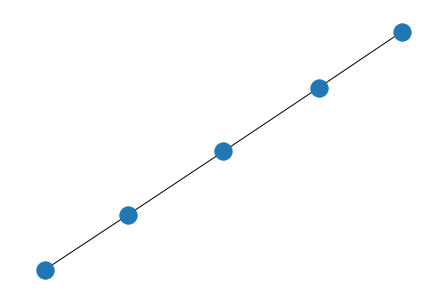

In [21]:
# 示例
import networkx as nx

G = nx.path_graph(5)
nx.draw(G)

print(nx.shortest_path(G, source=0, target=4))

p = nx.shortest_path(G, source=0)  # target not specified
print(p)

p = nx.shortest_path(G, target=4)  # source not specified
print(p)

p = nx.shortest_path(G)  # source, target not specified
print(p)


## 2.最小生成树

应用背景：通讯和电力系统的布线成本最小



### 数学模型

G(V,E), |V|=n, |E|=m,

$a_{i,j} = w_{i,j}$, (i,j)边存在

$a_{i,j} = \infty $, (i,j)边不存在

$x_{i,j} = 1$, (i,j)边在MST上

$x_{i,j} = 0 $, (i,j)边不在MST上


目标：G的生成树的总权重最小

min = $\sum_{i=1..n} \sum_{j=1..n} a_{i,j}x_{i,j}$

min = $\sum_{(i,j)\in E} a_{i,j}x_{i,j}$

min = $\sum_{e_j\in E} w_j x_j$



约束条件：

（1）$x_{i,j} = 0,1 $

（2）$\sum_{i=1..n} \sum_{j=1..n} x_{i,j}= n-1 $

（3）不构成圈

$\sum_{i\in S} \sum_{j\in S,(i,j)\in E} x_{i,j}\le |S|-1,\forall S \subset V $

这个模型不是很好，条件(3)会产生指数个约束

但是最小生成树的算法可以得到全局最优


### kruskal 算法（贪婪算法）


1.	Put edges in min-heap using edge weights

2.	While output size < |V|-1

a)	Consider next smallest edge (u,v)

b)	if find(u,v) indicates u and v are in different sets

•	 output (u,v)

•	 union(u,v)



### Prim算法
1.	For each node v, set  v.cost =  and v.known = false
2.	Choose any node v.

a)	Mark v as known

b)	For each edge (v,u) with weight w, set u.cost = w and u.prev = v

3.	While there are unknown nodes in the graph

a)	Select the unknown node v with lowest cost

b)	Mark v as known and add (v, v.prev) to output

c)	For each edge (v,u) with weight w,
		   if(w < u.cost) {
		        u.cost = w;
	     u.prev = v;
		   }



[(0, 1, {}), (1, 2, {}), (2, 3, {})]

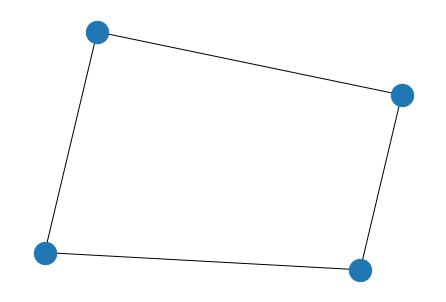

In [22]:
# 示例
import networkx as nx
G = nx.cycle_graph(4)
G.add_edge(0, 3, weight=2)
nx.draw(G, label = True, font_color = 'white',node_size = 500)
T = nx.minimum_spanning_tree(G)
sorted(T.edges(data=True))


## 3.最大流

#### 最大流的应用
Max flow and min cut.
Two very rich algorithmic problems.
Cornerstone problems in combinatorial optimization.
Beautiful mathematical duality

Nontrivial applications / reductions.
- Data mining.
- Open-pit mining.
- Project selection.
- Airline scheduling.
- Bipartite matching.
- Baseball elimination.
- Image segmentation.
- Network connectivity.
- Network reliability.
- istributed computing.
- Egalitarian stable matching.
- Security of statistical data.
- Network intrusion detection.
- Multi-camera scene


#### 最大流数学模型
s-t 流的定义

s-t 割的定义

G(V,E,s,t,c),|V|=n,|E|=m,

st-流，$x_{i,j}$

目标函数：从s到t流达到最大

max = v= $ \sum_{j=1..n,(s,j)\in E} x_{s,j}$

max = v

s.t.

$k=s$, $\sum_{i=1..n,(i,s)\in E}x_{i,s}=0,\sum_{j=1..n,(s,j)\in E}x_{s,j}=v$

$k=t$, $\sum_{i=1..n}x_{i,t}= v, \sum_{j=1..n}x_{t,i} =0$

$k\ne t,k\ne s$, $\sum_{j=1..n}x_{k,j}-\sum_{i=1..n}x_{i,k}=0$

$0 \le x_{i,j} \le c_{i,j}$

#### 最大流定理和最大流算法研究算法进展





定理1：弱对偶，任意流小于等于最小割

定理2：强对偶，最大流等于最小割

定理3：f是最大流当且仅当剩余网络中没有增广路径

Ford-Fulkerson Algorithm
The following is simple idea of Ford-Fulkerson algorithm:
-   Start with initial flow as 0.
-   While there is a augmenting path from source to sink.
           Add this path-flow to flow.
-   Return flow.


## 4.匹配

### 数学模型
G(V,E), |V|=n, |E|=m,


$x_{i,j} = 1$, (i,j)边在最大匹配中

$x_{i,j} = 0 $, i,j)边不在最大匹配中


目标：匹配的边数达到最大

max = $\sum_{i=1..n} \sum_{j=1..n} x_{i,j}$

约束条件：

（1）$x_{i,j} = 0,1 $

（2）$\sum_{j=1..n}  x_{i,j}\le 1, i = 1..n$

（3）$\sum_{i=1..n}  x_{i,j}\le 1, j = 1..n $


[0, 1]
[2, 3, 4]
{0: 2, 1: 3, 2: 0, 3: 1}


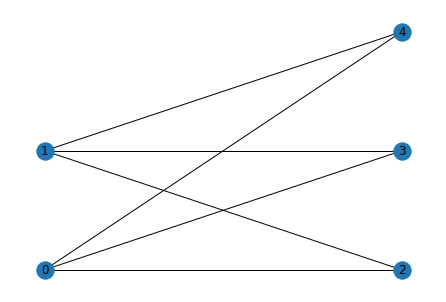

In [23]:
# 示例
G = nx.complete_bipartite_graph(2, 3)
left, right = nx.bipartite.sets(G)

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(left) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(right) ) # put nodes from Y at x=2
nx.draw(G, pos=pos, with_labels = True)

print(list(left))

print(list(right))

match = nx.bipartite.maximum_matching(G)
print(match)

## 5. Vertex Cover
**Definition:** The set of vertices $W \subseteq V$ with for all $(x, y) \in E$: $x \in W$ or $y \in W$
**Vertex Cover Problem:** Given graph $G$, find vertex cover of minimum size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\min & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
x_i + x_j \geqslant a_{ij}
\end{array}\right.
\end{array}
$$

## 6. Dominating Set
**Definition:** The set of vertices $W \subseteq V$ such that for all $v \in V$: $v \in W$ or $v$ has a neighbor $w$ with $w \in W$
**Dominating Set Problem:** Given graph $G$, find dominating set of minimum size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\min & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
\sum_{j=1}^n a_{ij}x_i \geqslant 1-x_i
\end{array}\right.
\end{array}
$$

## 7. Clique
**Definition:** The set of vertices $W \subseteq V$ with for all $v,w \in W: \{v,w \} \in E$
**Clique Problem:** Given graph $G$, find clique of maximun size.
**Symbol:** $G(V,E), |V|=n, |E|=m, A=(a_{ij})_{n*n}$ is adjacency matrix.
**Model:**
$$
\begin{array}{ll}
\max & \sum_{i = 1}^n x_i, \\
\text { s.t. } & \left\{\begin{array}{l}
x_i \in \{0, 1\}\\
x_i + x_j \leqslant 1 + a_{ij}
\end{array}\right.
\end{array}
$$

## 8. networkx代码实例
相比于networkx, igraph的底层用c语言实, 效率更高.

### 构建图

[[0. 9. 2. 4. 7.]
 [0. 0. 3. 4. 0.]
 [0. 0. 0. 8. 4.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]]
[0 0 0 0 1 1 2 2 3] [1 2 3 4 2 3 3 4 4]
[9. 2. 4. 7. 3. 4. 8. 4. 6.]
[(0, 1, 9.0), (0, 2, 2.0), (0, 3, 4.0), (0, 4, 7.0), (1, 2, 3.0), (1, 3, 4.0), (2, 3, 8.0), (2, 4, 4.0), (3, 4, 6.0)]


{(0, 1): Text(-0.6545085608959198, -0.4755282839152457, '9.0'),
 (0, 2): Text(-0.09549137949943542, -0.2938925166937949, '2.0'),
 (0, 3): Text(-0.09549149870872498, 0.29389257828263027, '4.0'),
 (0, 4): Text(-0.6545087099075317, 0.47552813688782436, '7.0'),
 (1, 2): Text(0.2500000596046448, -0.769420713186264, '3.0'),
 (1, 3): Text(0.24999994039535522, -0.18163561820983887, '4.0'),
 (2, 3): Text(0.8090171217918396, 1.4901161193847656e-07, '8.0'),
 (2, 4): Text(0.24999991059303284, 0.18163570761680603, '4.0'),
 (3, 4): Text(0.2499997913837433, 0.7694208025932312, '6.0')}

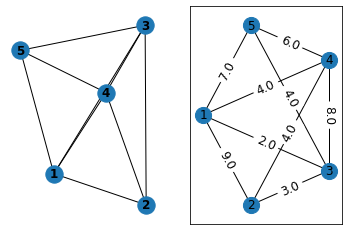

In [24]:
# 构建图1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 输入邻接矩阵的上三角元素
a = np.zeros((5, 5))
a[0, 1:5] = [9, 2, 4, 7]
a[1, 2:5] = [3, 4, 0]
a[2, 3:5] = [8, 4]
a[3, 4:5] = [6]
print(a)

# 提取顶点编号
i, j = np.nonzero(a) # np.nonzero() return a tuple
print(i, j)

# 提取a的非零元素
w = a[i, j]
print(w)

# 构建边信息
edges = list(zip(i, j, w))
print(edges)

G = nx.Graph()
G.add_weighted_edges_from(edges)

# 顶点标号
key = range(5)
s = [str(i+1) for i in range(5)]
s = dict(zip(key, s)) # 构造用于顶点标注的字符字典
# print(s)

plt.rc('font', size=18)

# nx.draw()
plt.subplot(121)
nx.draw(G, font_weight='bold', labels=s)

# nx.draw_networkx()
plt.subplot(122)
pos = nx.shell_layout(G) #布局设置
# print("pos=", pos)
nx.draw_networkx(G, pos, node_size=260, labels=s)

# nx.draw_networkx_edge_labls()
w = nx.get_edge_attributes(G, 'weight') # Get edge attributes from graph; Return dictionary
# print("w=", w)
nx.draw_networkx_edge_labels(G, pos, font_size=12, edge_labels=w) #标记权重
# plt.show()

{(1, 2): Text(-0.6545085608959198, -0.4755282839152457, '9'),
 (1, 3): Text(-0.09549137949943542, -0.2938925166937949, '2'),
 (1, 4): Text(-0.09549149870872498, 0.29389257828263027, '4'),
 (1, 5): Text(-0.6545087099075317, 0.47552813688782436, '7'),
 (2, 3): Text(0.2500000596046448, -0.769420713186264, '3'),
 (2, 4): Text(0.24999994039535522, -0.18163561820983887, '4'),
 (3, 4): Text(0.8090171217918396, 1.4901161193847656e-07, '8'),
 (3, 5): Text(0.24999991059303284, 0.18163570761680603, '4'),
 (4, 5): Text(0.2499997913837433, 0.7694208025932312, '6')}

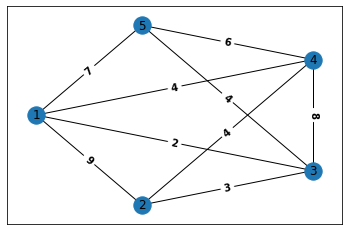

In [25]:
# 构建图2
import networkx as nx

List = [(1, 2, 9), (1, 3, 2), (1, 4, 4), (1, 5, 7), (2, 3, 3), (2, 4, 4), (3, 4, 8), (3, 5, 4), (4, 5, 6)]

G = nx.Graph()
G.add_nodes_from(range(1, 6))
G.add_weighted_edges_from(List)
pos = nx.shell_layout(G)
w = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_weight='bold', edge_labels=w)

{3: {}, 2: {}, 4: {}, 6: {}}
[1, 6, 3, 4, 2, 5]
9223372036854775807
{1: {2, 3}, 2: {1, 3, 4, 5}, 3: {1, 2, 5}, 4: {2, 5, 6}, 5: {2, 3, 4, 6}, 6: {4, 5}} dict_keys([1, 2, 3, 4, 5, 6])


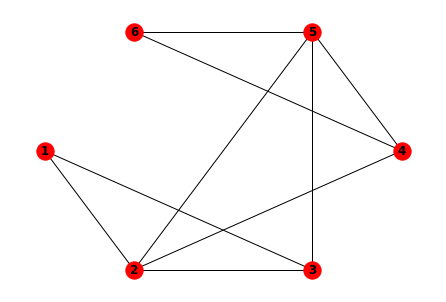

In [26]:
# 构建图3
import networkx as nx

List = [(1, 2), (1, 3), (2, 3), (3, 2), (3, 5), (4, 2), (4, 6), (5, 2), (5, 4), (5, 6), (6, 5)]
G = nx.Graph()
G.add_nodes_from(range(1, 6))
G.add_edges_from(List)
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='r')

print(G[5])

nodes_by_degree = sorted(G, key=lambda x: len(G[x]))
print(nodes_by_degree)

import sys

# fetching the maximum value
max_val = sys.maxsize
print(max_val)

graph = {n: set(G[n]) - {n} for n in G}
print(graph, graph.keys())

### 最短路、最小生成树、最大流、独立集、最小点覆盖等

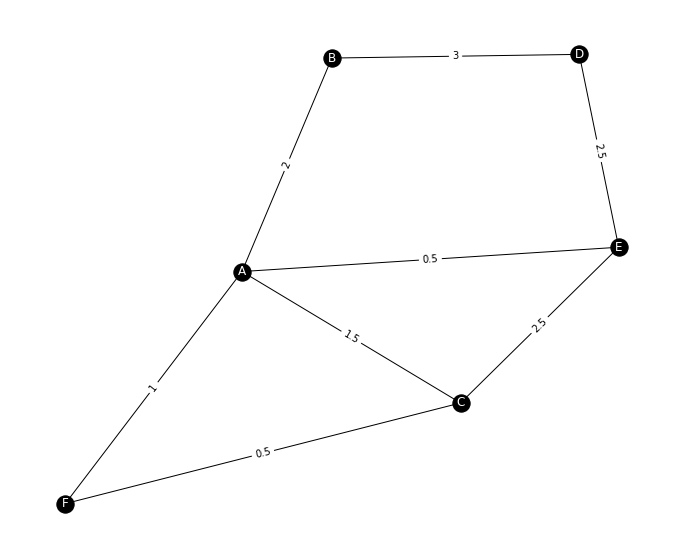

['A', 'F', 'B', 'C', 'D', 'E']
<class 'networkx.classes.reportviews.NodeView'>
A <class 'str'>
F <class 'str'>
B <class 'str'>
C <class 'str'>
D <class 'str'>
E <class 'str'>
------------------------------------------------------------
A 4 <class 'int'>
F 2 <class 'int'>
B 2 <class 'int'>
C 3 <class 'int'>
D 2 <class 'int'>
E 3 <class 'int'>
------------------------------------------------------------
Degree: =  [4, 2, 2, 3, 2, 3]
------------------------------------------------------------
DFS =  ['A', 'F', 'B', 'C', 'E', 'D']
[('A', 'F'), ('A', 'B'), ('A', 'C'), ('A', 'E'), ('B', 'D')]
[('A', 'F'), ('F', 'C'), ('A', 'B'), ('B', 'D'), ('A', 'E')]
------------------------------------------------------------
minimum_spanning_tree =  [('A', 'B', {'weight': 2, 'capacity': 2}), ('A', 'E', {'weight': 0.5, 'capacity': 0.5}), ('A', 'F', {'weight': 1, 'capacity': 1}), ('D', 'E', {'weight': 2.5, 'capacity': 2.5}), ('F', 'C', {'weight': 0.5, 'capacity': 0.5})]
-----------------------------------

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

g = nx.Graph()

g.add_edge('A', 'F', weight=1, capacity = 1)
g.add_edge('A', 'B', weight=2, capacity = 2)
g.add_edge('A', 'C', weight=1.5, capacity = 1.5)
g.add_edge('B', 'D', weight=3, capacity = 3)
g.add_edge('D', 'E', weight=2.5, capacity = 2.5)
g.add_edge('E', 'C', weight=2.5, capacity = 2.5)
g.add_edge('A', 'E', weight=0.5, capacity = 0.5)
g.add_edge('F', 'C', weight=0.5, capacity = 0.5)

# 边权重
edge_labels = {e: g.edges[e]['weight'] for e in g.edges}
# print("edge_labels = ", edge_labels)

# 设置布局
pos = nx.fruchterman_reingold_layout(g);

plt.figure(figsize=(12,10));
plt.axis("off");
# 设置点、边、点标签、边标签
nx.draw_networkx_nodes(g, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(g, pos, alpha=1);
nx.draw_networkx_labels(g, pos, font_color="white"); # node labels
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.show();

nodes = g.nodes()
print(nodes)
print(type(nodes))
for node in nodes:
    print(node,type(node))
print("-"*60)

degrees = g.degree()
for node, degree in degrees:
    print(node, degree, type(degree))
print("-"*60)

# 顶点度
degree = [d for node,d in nx.degree(g)]
print("Degree: = ", degree)
print("-"*60)

# p, k = np.histogram(degree, bins = 4)
# plt.hist(degree)


edges = g.edges()
# print(type(edges))
# print(edges)

# for edge in edges:
#     print(edge)

# DFS
edges = list(nx.bfs_edges(g, source='A'))
nodes = ['A'] + [v for u, v in edges]
print("DFS = ", nodes)

edges2 = list(nx.dfs_edges(g, source='A', depth_limit=2))
print(edges)
print(edges2)
print("-"*60)

# 最小生成树
T = nx.minimum_spanning_tree(g, weight='weight', algorithm='kruskal')
print("minimum_spanning_tree = ", sorted(T.edges(data=True))) # data=True 显示权重
print("-"*60)

w = nx.get_edge_attributes(g, 'weight')
# 指定初始点、终点 最短路
d1 = nx.shortest_path_length(g, source='D', target='F', weight='weight', method='dijkstra')
print("source-target_SP_length = ", d1)
print("-"*60)

# 任意两点 最短路
pair_d = list(nx.shortest_path_length(g, weight='weight'))
print("pair_SP_length = ", pair_d)
print("-"*60)

# 最大流
flow_value, flow_dict = nx.maximum_flow(g, "D", "F")
print("flow_value = ", flow_value)
print("flow_dict = ", flow_dict)
print("-"*60)

# 独立集
indset = nx.maximal_independent_set(g)
print("indset = ", indset)
print("-"*60)

# 最小点覆盖
# from networkx.algorithms.approximation import min_weighted_vertex_cover
cover = nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover(g) # Return a set of nodes whose weight sum is no more than twice the weight sum of the minimun weight vertex cover. 近似解
# help(nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover)
print("Cover:", cover)

## 9. 社团划分与网络瓦解

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
nodes =  ['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83', 'a84', 'a85', 'a86', 'a87', 'a88', 'a89', 'a90', 'a91', 'a92', 'a93', 'a94', 'a95', 'a96', 'a97', 'a98', 'a99', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b13', 'b14', 'b15', 'b16', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22', 'b23', 'b24', 'b25

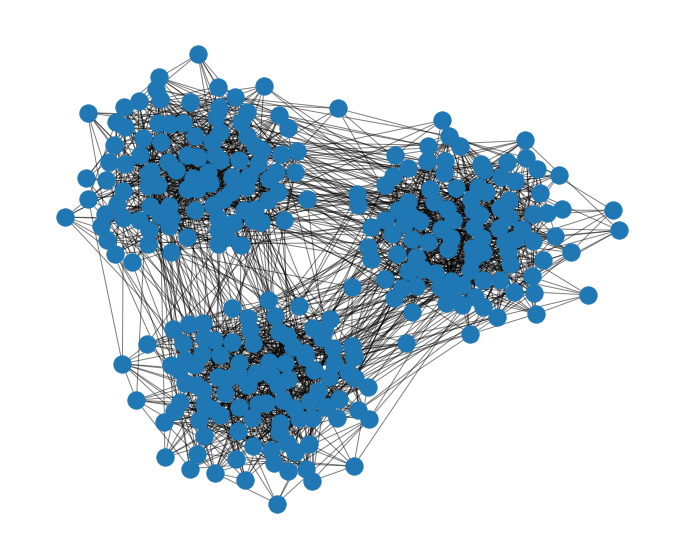

[frozenset({'b21', 'c92', 'c67', 'c70', 'c94', 'c93', 'c15', 'c77', 'c76', 'c27', 'c89', 'c31', 'c38', 'c33', 'c18', 'c66', 'c60', 'c56', 'a85', 'c44', 'c87', 'c58', 'c2', 'c71', 'c10', 'c51', 'c16', 'c78', 'c64', 'c63', 'c96', 'c40', 'c39', 'c20', 'c17', 'c65', 'c43', 'c55', 'c13', 'c28', 'c22', 'c57', 'c8', 'c14', 'c52', 'c46', 'c69', 'c85', 'c50', 'c82', 'c54', 'c49', 'c6', 'c3', 'c11', 'c98', 'c84', 'c35', 'c80', 'c4', 'c74', 'c1', 'c79', 'c61', 'c36', 'c75', 'c72', 'c0', 'c47', 'c19', 'c86', 'c26', 'c9', 'c73', 'c88', 'c30', 'c25', 'c53', 'c37', 'c29', 'c97', 'c83', 'c48', 'c81', 'c5', 'c7', 'c45', 'c34', 'c90', 'c68', 'c99', 'c24', 'c41', 'c95', 'c59', 'c23', 'c91', 'c21', 'c12', 'c42', 'c62', 'c32'}), frozenset({'a80', 'a32', 'a44', 'a79', 'a25', 'a39', 'a16', 'a59', 'a55', 'a75', 'a31', 'a57', 'a19', 'a37', 'a90', 'a65', 'a52', 'a62', 'a94', 'a15', 'a99', 'a78', 'a17', 'a89', 'a47', 'a86', 'a69', 'a41', 'a92', 'a24', 'a21', 'a27', 'a22', 'a58', 'a74', 'a53', 'a60', 'a63', 'a88'

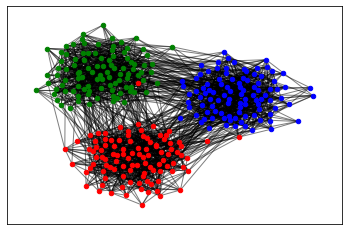

In [28]:
# 社团划分
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def GN_benchmark(N=300, C=3, zin=13, zout =3):
    import random
    n = int(N/C) # 每个社团的节点数

    nodes = []
    nall = []
    names = [chr(ord('a')+i) for i in range(26)]
    print(names)

    for a in names[:C]:
        xx = []
        for i in range(n):
            xx.append(a+str(i))
        nodes += xx
        nall.append(xx)
    print("nodes = ", nodes)
    print("nall = ", nall)

    pin = 1.0*zin/(n-1)/2
    pout = 1.0*zout/(3*n-1)/2

    g = nx.Graph()

    for nc in nall:
        for i in nc:
            for j in nc:
                if i == j:
                    continue
                p = random.random()
                if p < pin:
                    g.add_edge(i,j)
            for j in set(nodes)-set(nc):
                p = random.random()
                if p < pout:
                    g.add_edge(i,j)
    return g

g = GN_benchmark(300, 3)
pos = nx.fruchterman_reingold_layout(g)

plt.figure(figsize=(12,10))
plt.axis("off")
nx.draw_networkx_nodes(g, pos, node_size=300)
nx.draw_networkx_edges(g, pos, alpha=0.500)

plt.show()

from networkx.algorithms.community import greedy_modularity_communities

partition = list(greedy_modularity_communities(g))
print(partition)

colors=['r','g','b']
i = 0
for part in partition:
    list_nodes = [node for node in part]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20,
                                node_color = colors[i])
    i = i + 1


nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()


In [ ]:
# 网络瓦解
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import operator

n = 100
BA = nx.barabasi_albert_graph(n, 2, seed=22)

plt.figure()
pos = nx.fruchterman_reingold_layout(BA)

nc = nx.draw_networkx_nodes(BA, pos, node_size=100, cmap=plt.cm.RdYlBu,  node_color=list(nx.degree_centrality(BA).values()))

nx.draw_networkx_edges(BA, pos, alpha=0.500)

plt.axis('off')


gc_size_BA = []
BA_copy = BA.copy()
for i in range(30):
    BA_copy.remove_nodes_from(np.random.choice(list(BA_copy.nodes()), 2))
    GC_nodes = max(nx.connected_components(BA_copy), key=len)
    GCC = BA_copy.subgraph(GC_nodes).copy()
    BA_copy = GCC
    gc_size_BA.append(len(list(GCC.nodes()))/n)

print(gc_size_BA)

BA_copy = BA.copy()

gc_size_BA_attack = []

for i in range(30):
    top = list(nx.degree_centrality(BA_copy).items())
    top.sort(key=operator.itemgetter(1), reverse=True)
    top_nodes = [nd for nd, c in top]
    BA_copy.remove_nodes_from(top_nodes[:2])

    try:
        GC_nodes = max(nx.connected_components(BA_copy), key=len)
        GCC = BA_copy.subgraph(GC_nodes).copy()
        BA_copy = GCC
        gc_size_BA_attack.append(len(list(GCC.nodes()))/n)
    except:
        gc_size_BA_attack.append(0)

print(gc_size_BA_attack)

plt.figure(figsize=(10,8))
x = [(2+(i*2))/n for i in range(30)]
plt.plot(x, gc_size_BA, 'bo', label='BA random')
plt.plot(x, gc_size_BA_attack, 'r*', label='BA degree')
plt.xlabel('Fration of Nodes Removed, $f$')
plt.ylabel('Size of Giant Component, $S$')
plt.legend()
plt.show()

# 三、插值
scipy.interpolate模块有一维插值函数interp1d、二维插值函数interp2d、多维插值函数interpn, interpnd.
## 1. 一维插值

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# %matplotlib tk
%matplotlib inline


# 插值节点
x = np.arange(0, 25, 2)
y = np.array([12, 9, 9, 10, 18, 24, 28, 27, 25, 20, 18, 15, 13])

# 插值点
xnew = np.linspace(0, 24, 500)
fun1 = interp1d(x, y)
fun2 = interp1d(x, y, 'cubic')
y1 = fun1(xnew)
y2 = fun2(xnew)

plt.figure(figsize=(20,10))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.subplot(121)
plt.plot(xnew, y1, x, y, 'ro')
plt.xlabel("分段线性插值")
plt.subplot(122)
plt.plot(xnew, y2, x, y, 'ro')
plt.xlabel("三次样条插值")
plt.show()

## 2.二维网格节点插值
已知平面区域$0 \leqslant x \leqslant 1400$, $0 \leqslant y \leqslant 1200$的高程数据见文件"Pdata7_5.txt"(单位：$m$).求该区域地表面积的近似值，并用插值数据画出该区域的等高线图和三维表面图.

In [ ]:
#程序文件名Pex7_5.py
# from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.interpolate import interp2d
# %matplotlib tk # GUI中显示
# %matplotlib inline # 内嵌显示

# 导入数据：加载高程数据
z = np.loadtxt("data\Pdata7_5.txt")
# print(z)

x = np.arange(0, 1500, 100)
y = np.arange(1200, -100, -100)

# 插值
f = interp2d(x, y, z, 'cubic')
xn = np.linspace(0, 1400, 141)
yn = np.linspace(0, 1200, 121)
zn = f(xn, yn)

# 计算面积
m=len(xn)
n=len(yn)
s=0
for i in np.arange(m-1):
    for j in np.arange(n-1):
        p1 = np.array([xn[i], yn[j], zn[j,i]])
        p2 = np.array([xn[i+1], yn[j], zn[j,i+1]])
        p3 = np.array([xn[i+1], yn[j+1], zn[j+1,i+1]])
        p4 = np.array([xn[i], yn[j+1], zn[j+1,i]])
        p12 = norm(p1-p2)
        p23 = norm(p3-p2)
        p13 = norm(p3-p1)
        p14 = norm(p4-p1)
        p34 = norm(p4-p3)
        L1 = (p12+p23+p13)/2
        s1 = np.sqrt(L1*(L1-p12)*(L1-p23)*(L1-p13))
        L2 = (p13+p14+p34)/2
        s2 = np.sqrt(L2*(L2-p13)*(L2-p14)*(L2-p34))
        s = s+s1+s2
print("区域的面积为：", s)

# 可视化
plt.figure(figsize=(20,10))
plt.rc('font',size=16)
plt.rc('text',usetex=True)
plt.subplot(121)
contr = plt.contour(xn,yn,zn) # 绘制等高线
plt.clabel(contr) # 与contour连用，用于显示标签
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)

ax = plt.subplot(122,projection='3d'); 
X,Y = np.meshgrid(xn,yn)
ax.plot_surface(X, Y, zn, cmap='viridis')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
# plt.savefig('figure7_5.png',dpi=500)
plt.show()

# 四、拟合
两个常用的拟合的函数：
1. numpy库的polyfit
2. scipy.optimize的curve_fit

## 1. numpy的polyfit函数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
p = np.polyfit(x0, y0, 2)
print("拟合二次多项式的从高次幂到低次幂系数分别为：", p)
yhat = np.polyval(p, [0.25, 0.35])
print("预测值为：", yhat)
plt.figure(figsize=(18, 10))
plt.rc('font', size=16)
plt.plot(x0, y0, '*', x0, np.polyval(p, x0), '-')
plt.show()

## 2. scipy.optimize的curve_fit函数

### 二维curve_fit拟合

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

x0 = np.arange(0, 1.1, 0.1)
y0 = np.array([-0.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.30, 11.2])
y= lambda x, a, b, c: a*x**2+b*x+c
popt, pcov = curve_fit(y, x0, y0)
print("拟合的参数值：", popt)
print("预测值分别为：", y(np.array([0.25, 0.35]), *popt)) # 输入参数不能是列表，要转化为numpy

### 三维curve_fit拟合

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

x  = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
y = [18, 24, 28, 27, 25, 20, 18, 12, 9, 9, 10, 15, 13]
p = interp1d(x, y, 'cubic')
print(p(2.5))

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def Pfun(t, a, b, c):
    return a*np.exp(b*t[0])+c*t[1]**2

# 原始数据
x0 = np.array([6, 2, 6, 7, 4, 2, 5, 9])
y0 = np.array([4, 9, 5, 3, 8, 5, 8, 2])
z0 = np.array([5, 2, 1, 9, 7, 4, 3, 3])

# 拟合
xy0 = np.vstack((x0, y0))
# print(xy0)
popt, pcov = curve_fit(Pfun, xy0, z0)
print("a，b，c的拟合值为：", popt)

# 五、常微分方程

## 1. 符号解法

SymPy库提供了dsolve函数求常微分方程的符号解.
在声明时, 可以使用Function()函数\
$>>>$y=Function('y')
或者\
$>>>$y=\operatorname{symbols}('\mathrm{y}' , cls=Function)
将符号变量声明为函数类型.

例 求下列微分方程的通解:
(1)齐次方程: $y^{\prime \prime}-5 y^{\prime}+6 y=0$;
(2)非齐次方程: $y^{\prime \prime}-5 y^{\prime}+6 y=x e^{2 x}$.

即知齐次方程的通解为
$$
y(x)=\left(c_1+c_2 e^x\right) e^{2 x} ;
$$
非齐次方程的通解为
$$
y(x)=\left(c_1+c_2 e^x-\frac{x^2}{2}-x\right) e^{2 x} .
$$

## 2. 数值解法
Python对于常微分方程的数值求解是基于一阶方程进行的，高阶微分方程必须化成一阶方程组。

### 2.1 一阶常微分方程
$$
\left\{
\begin{align*}
&y' = -2y + x^2 +2x\\
&y(1) = 2
\end{align*}
\right.
$$

In [37]:
from scipy.integrate import odeint
import numpy as np

dy = lambda y, x:-2*y + x**2 + 2*x
x = np.arange(1, 10.5, 0.5)
sol = odeint(dy, 2, x)
print("x={}\n对应的数值解y={}".format(x, sol.T))

x=[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10. ]
对应的数值解y=[[ 2.          2.08484933  2.9191691   4.18723381  5.77289452  7.63342241
   9.75309843 12.12613985 14.75041934 17.62515427 20.75005673 24.12502089
  27.7500077  31.62500278 35.75000104 40.1250004  44.75000015 49.62500006
  54.75000002]]


### 2.2 二阶常微分方程
$$
\left\{
\begin{align*}
&\frac{d^2 y}{dx^2} + 2\frac{dy}{dx} + 2y =0\\
&y(0) = 0, y'(0) = 1.
\end{align*}
\right.
$$
转换为
$$
\left\{
\begin{align*}
&y_1' = y_2, y_1(0)=0\\
&y_2' = -2 y_1 -2 y_2, y_2(0)=1.
\end{align*}
\right.
$$

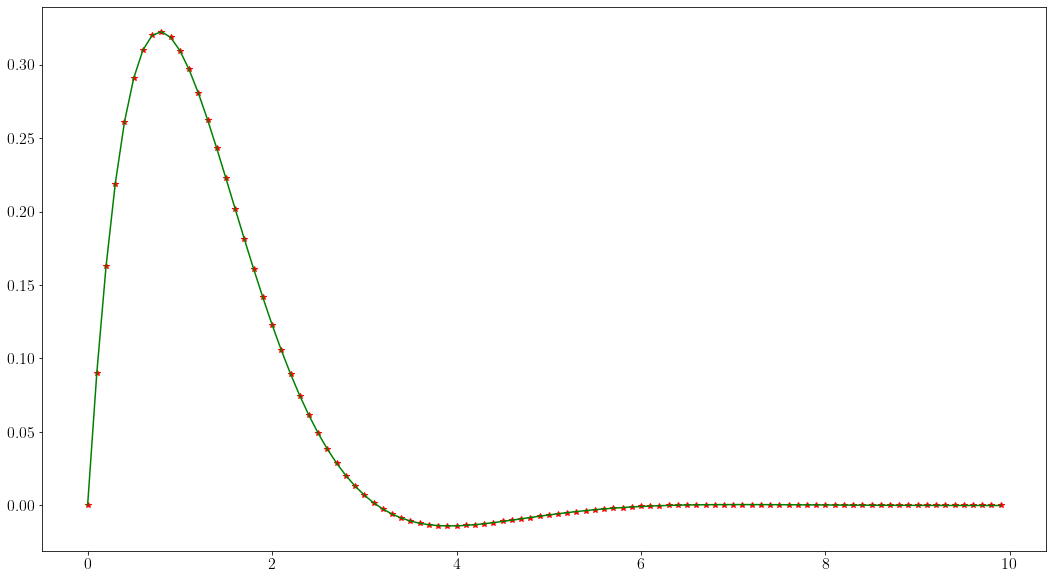

In [38]:
from scipy.integrate import odeint
import numpy as np

def Pfun(y, x): # 注意！！！！！！y与x位置不能颠倒
    y1, y2 = y
    return np.array([y2, -2*y1-2*y2])

x = np.arange(0, 10, 0.1)
solution = odeint(Pfun, [0, 1], x)
plt.figure(figsize=(18, 10))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.plot(x, solution[:, 0], 'r*', label='数值解')
plt.plot(x, np.exp(-x)*np.sin(x), 'g', label='符号解')
plt.show()

### 2.3 欧拉法

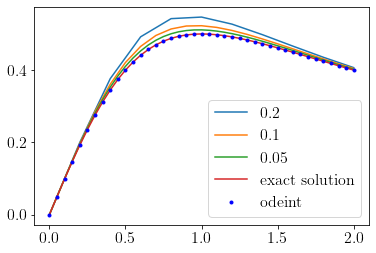

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


hs = [0.2, 0.1,0.05]

for h in hs:
    x = np.arange(0,2.01,h)
    n = len(x)
    y = np.zeros(n)

    for i in range(0,n-1):
        y[i+1] = y[i] + h*(1/(1+x[i]**2) - 2*y[i]**2)

    plt.plot(x,y,label = str(h))

y_real = x/(1+x**2)
plt.plot(x,y_real, label  = 'exact solution')

fun = lambda y,x: 1/(1+x**2) -2*y**2
x = np.arange(0,2.01,0.05)
sol = odeint(fun, 0, x)
sol.resize(1,len(x))
plt.plot(x, sol[0],'b.', label = 'odeint')

plt.legend()

### 2.4 改进的欧拉法

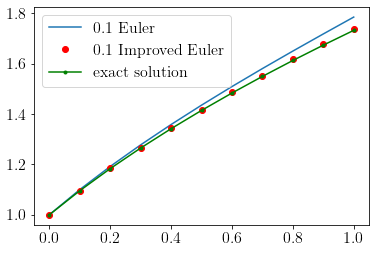

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
hs = [0.1]

for h in hs:
    x = np.arange(0,1.01,h)
    n = len(x)
    y = np.zeros(n)
    y[0] = 1
    # 欧拉法
    for i in range(0,n-1):
        y[i+1] = 1.1*y[i] - 2*h*x[i]/y[i]

    plt.plot(x, y, label = str(h) + ' Euler' )

     # 改进的欧拉法
    f = lambda x,y: y - 2*x/y
    for i in range(0,n-1):
        #K1 = y[i] - 2*x[i]/y[i]
        #K2 = y[i] + h*K1 - 2*(x[i] + h)/(y[i] + h*K1)
        K1 = f(x[i],y[i])
        K2 = f(x[i] + h, y[i] + h*K1)
        y[i+1] = y[i] + h*(K1 + K2)/2

    plt.plot(x, y, 'ro', label = str(h) + ' Improved Euler')

y_real = (1+2*x)**0.5
plt.plot(x,y_real, 'g.-', label  = 'exact solution')

# fun = lambda y,x: y - 2*x/y
# x = np.arange(0,1.01,0.05)
# sol = odeint(fun, 1, x)
# sol.resize(1,len(x))
# plt.plot(x, sol[0],'b.', label = 'odeint')

plt.legend()

### 2.5 Runge-kutta 四阶方法

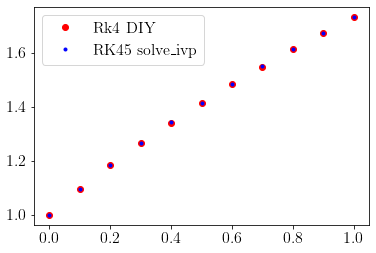

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp



hs = [0.1]

for h in hs:
    x = np.arange(0,1.01,h)
    n = len(x)
    y = np.zeros(n)
    y[0] = 1


     # 4阶 RK 方法
    f = lambda x,y: y - 2*x/y
    for i in range(0,n-1):

        K1 = f(x[i],y[i])
        K2 = f(x[i] + 0.5*h, y[i] + 0.5*h*K1)
        K3 = f(x[i] + 0.5*h, y[i] + 0.5*h*K2)
        K4 = f(x[i] + h,     y[i] +     h*K3)
        y[i+1] = y[i] + h*(K1 + 2*K2 + 2*K3 + K4)/6

    plt.plot(x, y, 'ro', label =  ' Rk4 DIY')

# y_real = (1+2*x)**0.5
# plt.plot(x,y_real, 'g.-', label  = 'exact solution')

model = lambda x,y: y - 2*x/y
x = np.arange(0,1.01,0.1)

sol = solve_ivp(model, t_span = (0,1), y0 = [1], method='RK45',t_eval= x)

#sol.resize(1,len(x))
plt.plot(sol.t, sol.y.T,'b.', label = 'RK45 solve_ivp')

plt.legend()

## 3. SIR Model
$$
\left\{
\begin{align*}
&\frac{\text{d}i}{\text{d}t} = \lambda si - \mu i, &i(0) = i_0\\
&\frac{\text{d}s}{\text{d}t} = -\lambda si, &s(0) = s_0
\end{align*}
\right.
$$

y(1)=[0.9831233]


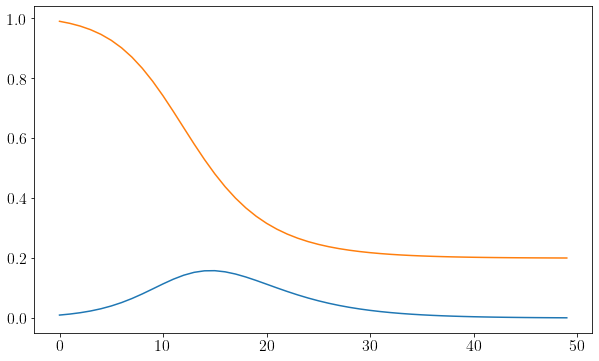

In [42]:
# SIR Model
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Lambda = 0.6
mu = 0.3
i0 = 0.01
s0 = 0.99

def fun(y, t):
    y0, y1 = y
    return np.array([Lambda*y1*y0 - mu*y0, -Lambda*y1*y0])

t = np.arange(0, 50, 1)
y = odeint(fun, [i0, s0], t)
print("y(1)={}".format(y[:, 1][np.where(t==1)]))

plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], t, y[:, 1])
plt.show()

## 4. 时变SIR Model
$$
\left\{
\begin{aligned}
&\frac{\text{d}i}{\text{d}t} = \lambda(t) s(t)i(t) - \mu(t) i(t)\\
&\frac{\text{d}r}{\text{d}t} =  \mu(t) i(t)
\end{aligned}
\right.
\\
\left\{
\begin{aligned}
\lambda(t) &= (\Delta i(t) + \Delta r(t))/i(t)\\
\mu(t) &= \Delta r(t)/i(t)
\end{aligned}
\right.
$$

[ 0.25848742 -0.11871123]


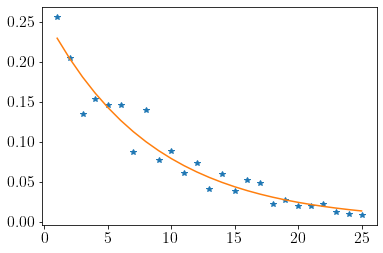

In [43]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data=pd.read_excel("./data/数据文件5-1 SARS的传播.xlsx").values
# print(data)
r = data[:, -2] + data[:, -1]
i = data[:, 1] - data[:, -2] - data[:, -1]
# print(i)
delta_i = np.diff(i)
# print(delta_i)
delta_i_temp = delta_i[1: 26]
delta_r = np.diff(r)
delta_r_temp = delta_r[1: 26]
# print(delta_r)
Lambda = (delta_i_temp + delta_r_temp)/i[1: 26]
# print(Lambda)

t = np.arange(1, 26, 1)
fun = lambda t, a, b: a*np.exp(b*t)
popt, pcov = curve_fit(fun, t, Lambda)
print(popt)
# print("t=", t)
# print("Lambda=", Lambda)

y = fun(t, *popt)
plt.plot(t, Lambda, '*', t, y)
plt.show()

## 5. Logistic Model，差分近似

$$
\left\{
\begin{align*}
&\frac{\text{d}x}{\text{d}t} = r\left(1-\frac{x}{x_m}\right)x \\
&x(t_0) = x_0
\end{align*}
\right.
$$
$$
\frac{1}{x(k)} \cdot \frac{x(k+1)-x(k)}{\Delta t} = r - s \cdot x(k)
$$

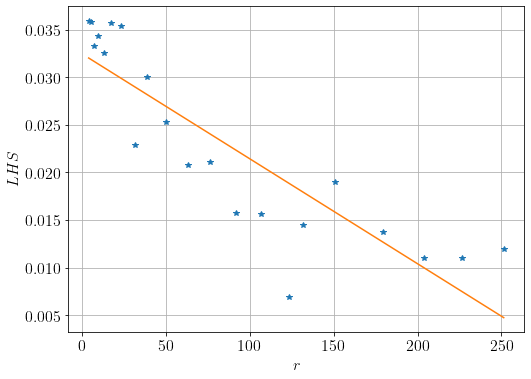

拟合系数：r = 0.03245185302569515, s = 0.00011023572385578718
------------------------------------------------------------ 
数值解预测
r = 0.0325
x_m = 294.3860
1790年：3.90百万人
1800年：5.37百万人
1810年：7.37百万人
1820年：10.10百万人
1830年：13.80百万人
1840年：18.75百万人
1850年：25.32百万人
1860年：33.91百万人
1870年：44.92百万人
1880年：58.71百万人
1890年：75.45百万人
1900年：95.03百万人
1910年：116.99百万人
1920年：140.44百万人
1930年：164.24百万人
1940年：187.17百万人
1950年：208.18百万人
1960年：226.57百万人
1970年：242.02百万人
1980年：254.57百万人
1990年：264.48百万人
2000年：272.14百万人
2010年：277.96百万人
2020年：282.33百万人
2030年：285.57百万人
2040年：287.96百万人
2050年：289.71百万人
2060年：290.99百万人
2070年：291.93百万人
2080年：292.60百万人
2090年：293.09百万人
2100年：293.45百万人
------------------------------------------------------------ 
差分方法预测预测
2000年:281.4
2010年:285.42829821615203
2020年:288.246782675292


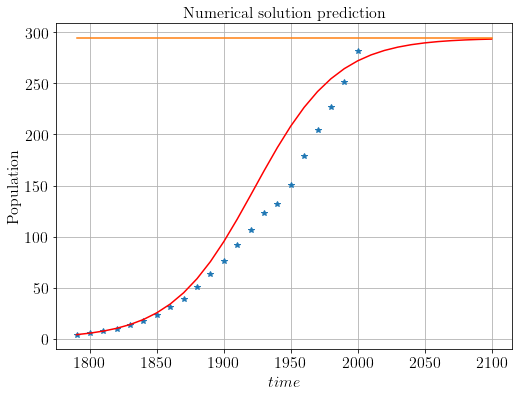

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint

t = np.arange(1790, 2010, 10)
# print(t)
x = np.array([3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 38.6, 50.2, 62.9, 76.0, 92.0, 106.5, 123.2, 131.7, 150.7, 179.3, 204.0, 226.5, 251.4, 281.4])
x_diff = np.diff(x)
LHS = x_diff/(x[0: -1]*10)
# print("LHS =", LHS)
fun = lambda x, r, s: r - s*x
popt, pcov = curve_fit(fun, x[0: -1], LHS)

plt.figure(figsize=(18, 6))
ax = plt.subplot(121)
plt.plot(x[0: -1], LHS, '*', x[0: -1], fun(x[0: -1], *popt))
plt.xlabel("$r$", size=16)
plt.ylabel("$LHS$", size=16 ,rotation=90)
plt.grid()
plt.show()
print("拟合系数：r = {}, s = {}".format(popt[0], popt[1]))

# 数值解预测
print('-'*60, "\n数值解预测")
t_forecast = np.arange(1790,2110,10)
r = popt[0]
x_m = popt[0]/popt[1]
print("r = {:.4f}".format(r))
print("x_m = {:.4f}".format(x_m))
y = odeint(lambda x, t: r*(1-x/x_m)*x, 3.9, t_forecast)
for i, j in enumerate(t_forecast):
    print("{}年：{:.2f}百万人".format(j, y[i][0]))

plt.rc('font', family='SimHei')
plt.figure(figsize=(18, 6))
plt.subplot(122)
plt.plot(t, x, '*', t_forecast, y, 'r', t_forecast, [x_m]*np.size(t_forecast, 0))
plt.xlabel("$time$", size=16)
plt.ylabel("Population", size=16 ,rotation=90)
plt.title("Numerical solution prediction", size=16)
plt.grid()

# 差分方法预测
print('-'*60, "\n差分方法预测预测")
x = 281.4
for i in np.arange(2000, 2021, 10):
    print("{}年:{}".format(i, x))
    x = (popt[0] - popt[1]*x)*x*10 + x

## 6.常微分方程的差分实例

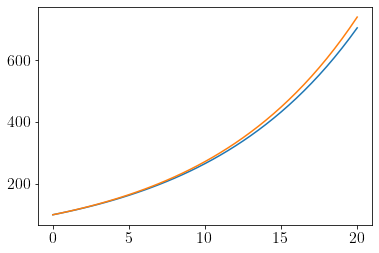

In [46]:
from numpy import linspace, zeros, exp
import matplotlib.pyplot as plt

def ode_FE(f, U_0, dt, T):
    N_t = int(round(float(T)/dt))
    u = zeros(N_t+1)
    t = linspace(0, N_t*dt, len(u))
    u[0] = U_0
    for n in range(N_t):
        u[n+1] = u[n] + dt*f(u[n], t[n])
    return u, t

def demo_population_growth():
    """Test case: u'=r*u, u(0)=100."""
    def f(u, t):
        return 0.1*u

    u, t = ode_FE(f=f, U_0=100, dt=0.5, T=20)
    plt.plot(t, u, t, 100*exp(0.1*t))
    plt.show()

demo_population_growth()


## 7.微分方程稳定性简介

### 7.1 一阶微分方程的平衡点及稳定性
设有微分方程
$$
\dot{x}(t)=f(x) \tag{(1)}
$$
方程右端不显含自变量 $t$,称为**自治方程**.代数方程
$$
f(x)=0 \tag{(2)}
$$
的实根 $x=x_0$ 称为方程 (1) 的**平衡点** (或奇点). 它也是方程 (1) 的解 (奇解).
如果存在某个邻域,使方程 (1) 的解 $x(t)$ 从这个邻域内的某个 $x(0)$ 出发, 满足
$$
\lim _{t \rightarrow \infty} x(t)=x_0 \tag{(3)}
$$
则称平衡点 $x_0$ 是**稳定**的 (稳定性理论中称渐近稳定) ; 否则, 称 $x_0$ 是**不稳定**的 (不渐近稳定).
判断平衡点 $x_0$ 是否稳定通常有两种方法. 利用定义即 (3) 式称**间接法**. 不求方程 (1) 的解 $x(t)$, 因而不利用 (3) 式的方法称**直接法**.下面介绍直接法.
将 $f(x)$ 在 $x_0$ 点作 Taylor 展开, 只取一次项, 方程 (1) 近似为
$$
\dot{x}(t)=f^{\prime}\left(x_0\right)\left(x-x_0\right) \tag{(4)}
$$
(4) 称为 (1) 的近似线性方程, $x_0$ 也是方程 (4) 的平衡点. 关于 $x_0$ 点稳定性有如下的结论:
若 $f^{\prime}\left(x_0\right)<0$, 则 $x_0$ 对于方程 (4) 和 (1) 都是称稳定的;
若 $f^{\prime}\left(x_0\right)>0$, 则 $x_0$ 对于方程 $(4)$ 和 (1) 都是不稳定的.
$x_0$ 对于方程 (4) 的稳定性很容易由定义 (3) 证明, 因为若记 $f^{\prime}\left(x_0\right)=a$, 则 (4) 的一般解是
$$
x(t)=c \mathrm{e}^{a t}+x_0 \tag{(5)}
$$
其中 $c$ 是由初始条件决定的常数, 显然, 当 $a<0$ 时 (3) 式成立.
### 7.2 二阶微分方程的平衡点和稳定性
二阶微分方程可用两个一阶微分方程表为
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=f\left(x_1, x_2\right) \\
\dot{x}_2(t)=g\left(x_1, x_2\right)
\end{array}\right. \tag{(6)}
$$
右端不显含 $t$, 是自治方程.代数方程组
$$
\left\{\begin{array}{l}
f\left(x_1, x_2\right)=0 \\
g\left(x_1, x_2\right)=0
\end{array}\right. \tag{(7)}
$$
的实根 $x_1=x_1^0, x_2=x_2^0$ 称为方程 (6) 的平衡点, 记作 $P_0\left(x_1^0, x_2^0\right)$.
如果存在某个邻域, 使方程 (6) 的解 $x_1(t), x_2(t)$ 从这个邻域内的某个 $\left(x_1(0), x_2(0)\right)$ 出发, 满足
$$
\lim _{t \rightarrow \infty} x_1(t)=x_1^0, \quad \lim _{t \rightarrow \infty} x_2(t)=x_2^0 \tag{(8)}
$$
则称平衡点 $P_0$ 是**稳定**的(渐近稳定); 否则, 称 $P_0$ 是**不稳定**的(不渐近稳定).
为了用直接法讨论方程 (6) 的平衡点的稳定性, 先看线性常系数方程
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=a_1 x_1+a_2 x_2 \\
\dot{x}_2(t)=b_1 x_1+b_2 x_2
\end{array}\right. \tag{(9)}
$$
系数矩伡记作
$$
\boldsymbol{A}=\left[\begin{array}{ll}
a_1 & a_2 \\
b_1 & b_2
\end{array}\right] \tag{(10)}
$$
为研究方程 $(9)$ 的惟一平衡点 $P_0(0,0)$ 的稳定性, 假定 $A$ 的行列式
$$
\operatorname{det} A \neq 0 \tag{(11)}
$$
$P_0(0,0)$ 的稳定性由 $(9)$ 的特征方程
$$
\operatorname{det}(A-\lambda I)=0 \tag{(12)}
$$
的根 $\lambda$ (特征根) 决定.方程 (12) 可以写成脜加明晣的形式
$$
\left\{\begin{array}{l}
\lambda^2+p \lambda+q=0 \\
p=-\left(a_1+b_2\right) \\
q=\operatorname{det} A
\end{array}\right. \tag{(13)}
$$
将特征根记作 $\lambda_1, \lambda_2$, 则
$$
\lambda_1, \lambda_2=\frac{1}{2}\left(-p \pm \sqrt{p^2-4 q}\right) \tag{(14)}
$$
方程 (9) 的一般解具有形式 $c_1 \mathrm{e}^{\lambda_1^{\prime}}+c_2 \mathrm{e}^{\lambda 2^{\prime}}\left(\lambda_1 \neq \lambda_2\right)$ 或 $c_1 \mathrm{e}^{\lambda_1^{\prime}}+c_2 t \mathrm{e}^{\lambda_1^{\prime}}\left(\lambda_1=\lambda_2\right), c_1, c_2$ 为任意常数.按照稳定性的定义 (8) 式可知, 当 $\lambda_1, \lambda_2$ 为负数或存负实部时， $P_0(0,0)$ 是稳定平衡点; 而当 $\lambda_1, \lambda_2$ 有一个为正数或有正实部时, $P_0(0,0)$ 是不稳定平衡点.在条件(11)下 $\lambda_1, \lambda_2$ 不可能为 0 .
微分方程稳定性理论将平衡点分为结点、焦点、鞍点、中心等类型, 完全由特征根 $\lambda_1, \lambda_2$ 或相应的 $p, q$ 取值决定.表 1 简明地给出了这些结果, 表中最后一列 指按照定义 (8)式得到的关于稳定性的结论.\

表1 由特征方程决定的平衡点的类型和稳定性
\begin{array}{|c|c|c|c|}
\hline
\lambda_1, \lambda_2 & p, q & 平衡点类型 & 稳定性\\
\hline
\lambda_1 < \lambda_2 <0 & p>0, q>0, p^2>4q & 稳定结点 & 稳定\\
\hline
\lambda_1 > \lambda_2 > 0 & p<0, q>0, p^2>4q & 不稳定结点 & 不稳定\\
\hline
\lambda_1 < 0 < \lambda_2 & q<0 & 鞍点 & 不稳定\\
\hline
\lambda_1 = \lambda_2 <0 & p>0, q>0, p^2=4q & 稳定退化结点 & 稳定\\
\hline
\lambda_1 = \lambda_2 > 0 & p<0, q>0, p^2=4q & 不稳定退化结点 & 不稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha<0 & p>0, q>0, p^2<4q & 稳定焦点 & 稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha>0 & p<0, q>0, p^2<4q & 不稳定焦点 & 不稳定\\
\hline
\lambda_{1,2}=\alpha \pm \beta i, \alpha=0 & p=0, q>0 & 中心 & 不稳定\\
\hline
\end{array}
由表 1 可以看出, 根据特征方程的系数 $p, q$ 的正负很容易判断平衡点的稳定性, 准则如下:若
$$
p>0, q>0 \tag{(15)}
$$
则平衡点稳定；若
$$
p<0 \text { 或 } q<0 \tag{(16)}
$$
则平衡点不稳定.
以上是对线性方程 $(9)$ 的平衡点 $P_0(0,0)$ 稳定性的结论. 对于一般的非线性方程 (6), 可以用近似线性方法判断其平衡点 $P_0\left(x_1^0, x_2^0\right)$ 的稳定性. 在 $P_0$ 点将 $f\left(x_1, x_2\right)$ 和 $g\left(x_1, x_2\right)$ 作 Taylor 展开, 只取一次项,得 (6) 的近似线性方程
$$
\left\{\begin{array}{l}
\dot{x}_1(t)=f_{x_1}\left(x_1^0, x_2^0\right)\left(x_1-x_1^0\right)+f_{x_2}\left(x_1^0, x_2^0\right)\left(x_2-x_2^0\right) \\
\dot{x}_2(t)=g_{x_1}\left(x_1^0, x_2^0\right)\left(x_1-x_1^0\right)+g_{x_2}\left(x_1^0, x_2^0\right)\left(x_2-x_2^0\right)
\end{array}\right. \tag{(17)}
$$
系数矩阵记作
$$
\boldsymbol{A}=\left.\left[\begin{array}{ll}
f_{x_1} & f_{x_2} \\
g_{x_1} & g_{x_2}
\end{array}\right]\right|_{P_0\left(x_1^0 \cdot x_2^0\right)} \tag{(18)}
$$
特征方程系数为
$$
p=-\left.\left(f_{x_1}+g_{x_2}\right)\right|_{p_0}, \quad q=\operatorname{det} \boldsymbol{A} \tag{(19)}
$$
显然, $P_0$ 点对于方程 (17) 的稳定性由表 1 或准则 (15),（16) 决定, 而且已经证明了如下结论:
若方程 (17) 的特征根不为 0 或实部不为 0 , 则 $P_0$ 点对于方程 (6) 的稳定性与对于近似方程 (17) 的稳定性相同, 即由准则 (15), (16) 决定.
最后，提出以下几点值得注意：
1. 平衡点及其稳定性的概念只是对**自治方程** $(1)$ ，(6)而言才有意义.
2. 非线性方程 $(1),(6)$ 的平衡点的稳定性, 与相应的近似线性方程 (4), (17) 的平衡点的稳定性一致, 是在非临界情况下(即 $a \neq 0$, 或 $p, q \neq 0$ ) 得到的, 在临界情况下(即 $a=0$ 或 $p, q=0$ )二者可以不一致.
3. 在讨论平衡点稳定性时, 对初始点的要求是存在一个邻域, 这是**局部稳定**的定义.如果要求对任意的初始点,(3), (8)式成立, 称为**全局稳定**.对于线性方程, 局部稳定与全局稳定是等价的; 对于非线性方程, 二者不同.
4. 对于临界情况和非线性方程的全局稳定,可以用相轨线分析方法讨论.

# 六、偏微分方程

## 1. 波动方程

### 1.1 方程的导出与定解条件


#### 1.1.1 方程的导出
##### 模型假设
**将实际问题归结为数学模型时，必须作一些理想化的假设，以便抓住问题的最本质的特征**。
(1)弦是均匀的，弦的截面直径与弦的长度相比可以忽略，因此弦可以视为一根曲线，它的（线）密度$\rho$是常数。
(2)弦在某一平面内作微小横振动，即弦的位置始终在一直线段附近，而弦上各点均在同一平面内垂直于该直线的方向上作微小震动。$\Rightarrow$$\frac{\partial u}{\partial x}$很小，可以忽略；$\sin \alpha = \tan \alpha = \frac{\partial u(x,t)}{\partial x}$
(3)弦是柔软的，它在形变时不抵抗弯曲，弦上各质点间的张力方向与弦的切线方向一致，且弦的伸长形变与张力的关系服从Hooke定律。\\
##### 原理

\begin{align*}
作用在物体上的冲量 &= 该物体的动量的变化\\
\end{align*}

若受垂直于$x$轴的外力（线）密度$F(x, t)$，并记$\frac{T}{\rho} = a^2$，则有
\begin{align*}
\int_{t}^{t+\Delta t} \left[T\left[\frac{\partial u(x+\Delta x, t)}{\partial x}-\frac{\partial u(x, t)}{\partial x}\right] + \int_{x}^{x+\Delta} F(x, t) \mathrm{d} x \right] \mathrm{d} t &= \int_{x}^{x+\Delta x} \rho\left[\frac{\partial u(x, t+\Delta t)}{\partial t}-\frac{\partial u(x, t)}{\partial t}\right] \mathrm{d} x\\
\int_{t}^{t+\Delta t} \int_{x}^{x+\Delta x}\left[T \frac{\partial^{2} u(x, t)}{\partial x^{2}}-\rho \frac{\partial^{2} u(x, t)}{\partial t^{2}} + F(x, t)\right] \mathrm{d} x \mathrm{~d} t &= 0\\
T \frac{\partial^{2} u(x, t)}{\partial x^{2}}-\rho \frac{\partial^{2} u(x, t)}{\partial t^{2}} &= -F(x, t)\\
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t)\\
\end{align*}
其中，$f(x,t)=\frac{F(x,t)}{\rho}$表示单位质量在$x$点处所受的外力。

##### 弦振动方程
\begin{align*}
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2} \frac{\partial^{2} u}{\partial x^{2}} + f(x, t)\\
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+f(x, y, t) \\
\frac{\partial^{2} u}{\partial t^{2}} &= a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t)
\end{align*}


#### 1.1.2 定解条件
初始条件与边界条件总称为定解条件。
##### 一维波动方程边界条件
\begin{align*}
u(0,t)=0,u(l,t)=0
\end{align*}

##### 一维波动方程初始条件
\begin{align*}
u(x,0)=\phi(x),\frac{\partial u(x,0)}{\partial t} = \psi(x) (0 \leqslant x \leqslant l)
\end{align*}


#### 1.1.3 一维波动方程定解问题
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}} = a^{2} \frac{\partial^{2} u}{\partial x^{2}} + f(x, t)\\
t=0: u = \phi(x), \frac{\partial u}{\partial t} = \psi(x)\\
x=0: u=0\\
x=l: u=0
\end{cases}

#### 1.1.4 偏微分方程三类定解条件
（1）第一类定解条件：又称Dirichlet边界条件。e.g. $u(0,t)=0, u(l,t)=0$
（2）第二类定解条件：又称Neumann边界条件。e.g. $\frac{\partial u}{\partial x}| _{x=0}=\mu(t)$
（3）第三类定解条件：e.g. $\left(\frac{\partial u}{\partial x}+\sigma u\right)|_{x=0 \text{ or } l}=v(t)$，其中$\sigma=\frac{k}{T}$为已知正数。

#### 1.1.4 定解问题适的适定性
（1）解的存在性问题
（2）解的唯一性问题
（3）解的稳定性问题
若一个定解问题的解是存在的、唯一的、稳定的，那么我们称这个问题是适定的。
除了研究定解问题的适定性以外，在数学物理方程中还经常研究的问题有解的正则性（光滑性）、解的渐进性（包括衰减性）、求解方法（包括精确解、渐近解与数值解的求解方法）等。

### 1.2 初值问题的达朗贝尔公式、波的传播

弦振动方程的达朗贝尔解法（又称为传播波法\行波法）。
当弦振动方程为初值问题时，即不考虑边界条件：
$$(★)
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \quad(t>0,-\infty<x<+\infty) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \quad(-\infty<x<+\infty)
\end{cases}
$$

由叠加原理可知，问题等价于（分解为）下面两个初值问题

$$
\text{（I）}\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0 \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x)
\end{cases}
$$

$$
\text{（II）}\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=0, \frac{\partial u}{\partial t}=0
\end{cases}
$$

##### (0)齐次方程通解（不考虑初始条件）
齐次方程
$$
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0
$$
的通解为
$$
u(x, t) = F(x-at)+G(x+at)
$$

##### (1)初值问题（I）的求解（方程齐次，初始非齐次）
通过变量替换$\xi = x - at, \eta = x + at$,
$$u(x, t)=\frac{\varphi(x-a t)+\varphi(x+a t)}{2}+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\alpha) \mathrm{d} \alpha$$
这个公式称为达朗贝尔公式。
**Theorem:** 设$\phi(x) \in C^2(\mathrm{R}),\psi(x) \in C^1(\mathrm{R})$，那么初值问题(I)存在唯一的解$u(x,t)$，它由达朗贝尔公式给出。

##### (2)一端固定的半无界弦的自由振动问题的求解
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=0 \quad(t>0,0<x<\infty) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x)(0 \leqslant x<\infty) \\
x=0: u=0
\end{cases}
通过奇延拓的方式与达朗贝尔公式可求得问题解
$$
u(x, t)=
\begin{cases}\frac{1}{2}[\varphi(x+a t)+\varphi(x-a t)]+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\xi) \mathrm{d} \xi & (x \geqslant a t) \\ \frac{1}{2}[\varphi(x+a t)-\varphi(a t-x)]+\frac{1}{2 a} \int_{a t-x}^{x+a t} \psi(\xi) \mathrm{d} \xi & (0 \leqslant x<a t)
\end{cases}
$$

为了使$u(x,t)$具有二阶连续偏导数，函数$\phi(x)$与$\psi(x)$应当满足条件
$$\varphi(0)=\varphi^{\prime \prime}(0)=0, \quad \psi^{\prime}(0)=0$$
该条件称为相容性条件。

##### (3)初值问题（II）的求解（方程非齐次，初始齐次）
齐次化原理（又称Duhamel原理）：
记$W(x,t;\tau)$为齐次方程的定解问题
\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad(t>\tau) \\
t=\tau: W=0, \frac{\partial W}{\partial t}=f(x, \tau)
\end{cases}
的解，则初值问题（II）的解为
$$u(x, t)=\int_{0}^{t} W(x, t ; \tau) \mathrm{d} \tau$$

由达朗贝尔公式，有
$$W(x, t ; \tau)=\frac{1}{2 a} \int_{x-a t^{\prime}}^{x+a t^{\prime}} f(\xi, \tau) \mathrm{d} \xi=\frac{1}{2 a} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi$$
从而
$$u(x, t) =\frac{1}{2 a} \int_{0}^{t} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
=\frac{1}{2 a} \iint_{G} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
$$

##### (4)一般方程(★)的解（方程非齐次，初始非齐次）
由叠加原理，方程(★)的解为
$$
u(x, t)=\frac{\varphi(x-a t)+\varphi(x+a t)}{2}+\frac{1}{2 a} \int_{x-a t}^{x+a t} \psi(\alpha) \mathrm{d} \alpha + \frac{1}{2 a} \int_{0}^{t} \int_{x-a(t-\tau)}^{x+a(t-\tau)} f(\xi, \tau) \mathrm{d} \xi \mathrm{d} \tau
$$


### 1.3 初边值问题的分离变量法
分离变量法又称Fourier方法、驻波法。

##### 1.3.1 方程非齐次、初始非齐次、边界齐次
考察波动方程的初边值问题：
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \\
x=0: u=0 \\
x=l: u=0
\end{cases}

利用叠加原理，上处初边值问题可以分解为下面两个初边值问题：
$$
\text{（I）}\begin{cases}
\frac{\partial^{2} u_{1}}{\partial t^{2}}-a^{2} \frac{\partial^{2} u_{1}}{\partial x^{2}}=0, \\
t=0: u_{1}=\varphi(x), \frac{\partial u_{1}}{\partial t}=\psi(x) \\
x=0 \text { 和 } x=l: u_{1}=0 ;
\end{cases}
$$

$$
\text{（II）}\begin{cases}
\frac{\partial^{2} u_{2}}{\partial t^{2}}-a^{2} \frac{\partial^{2} u_{2}}{\partial x^{2}}=f(x, t) \\
t=0: u_{2}=0, \frac{\partial u_{2}}{\partial t}=0, \\
x=0 \text { 和 } x=l: u_{2}=0,
\end{cases}
$$

而且显然有
$$u = u_1 + u_2$$
正如像1.1.2中一样，(II)的求解可以归结为(I)的求解，所以关键求(I)的解。

###### 方程齐次、初始非齐次、边值齐次(I)的求解

利用分离变量法$u(x,t)=X(x)T(t)$，可求得(I)的解为：
$$u(x, t)=\sum_{k=1}^{\infty}\left(A_{k} \cos \frac{k \pi a}{l} t+B_{k} \sin \frac{k \pi a}{l} t\right) \sin \frac{k \pi}{l} x$$
其中，$A_k$和$\frac{B_k k \pi a}{l}$分别是$\phi(x)$和$\psi(x)$在$[0,l]$区间中正弦展开的Fourier级数的系数，即
\begin{cases}
A_{k}=\frac{2}{l} \int_{0}^{l} \varphi(\xi) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi \\
B_{k}=\frac{2}{k \pi a} \int_{0}^{l} \psi(\xi) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi
\end{cases}
###### 定解问题（I）相容性条件
若函数 $\varphi(x) \in C^{3}, \psi(x) \in C^{2}$, 并且
$$
\varphi(0)=\varphi(l)=\varphi^{\prime \prime}(0)=\varphi^{\prime \prime}(l)=\psi(0)=\psi(l)=0
$$
则弦振动方程的定解问题(I)的解是存在的, 它可以由上面级数给出.

###### 方程非齐次、初始齐次、边界齐次(II)的求解
齐次化原理：若$W(x,t;\tau)$是初边值问题
\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad(t>\tau) \\
t=\tau: W=0, \frac{\partial W}{\partial t}=f(x, \tau) \\
x=0 \text { 和 } x=l: W=0
\end{cases}
的解（其中$\tau \geqslant 0$为参数），则
$$
u(x,t) = \int_0^t W(x,t;\tau) \mathrm{d} \tau
$$
就是初边值问题（II）的解。

下求$W(x,t;\tau)$:
令$t' = t - \tau$，上方程组化为
\begin{cases}
\frac{\partial^{2} W}{\partial t^{2}}-a^{2} \frac{\partial^{2} W}{\partial x^{2}}=0 \quad\left(t^{\prime}>0\right) \\
t^{\prime}=0: W=0, \frac{\partial W}{\partial t^{\prime}}=f(x, \tau) \\
x=0 \text { 和 } x=l: W=0
\end{cases}
该初边值问题（满足形式I）的解为
\begin{aligned}
W =W(x, t ; \tau) &= \sum_{k=1}^{\infty} B_{k}(\tau) \sin \frac{k \pi a}{l} t^{\prime} \sin \frac{k \pi}{l} x \\
&=\sum_{k=1}^{\infty} B_{k}(\tau) \sin \frac{k \pi a}{l}(t-\tau) \sin \frac{k \pi}{l} x,
\end{aligned}
而
$$
B_{k}(\tau)=\frac{2}{k \pi a} \int_{0}^{l} f(\xi, \tau) \sin \frac{k \pi}{l} \xi \mathrm{d} \xi
$$
从而，初边值问题（II）的解为
$$
u(x, t)=\int_{0}^{t} W(x, t ; \tau) \mathrm{d} \tau=\sum_{k=1}^{\infty} \int_{0}^{t} B_{k}(\tau) \sin \frac{k \pi a}{l}(t-\tau) \mathrm{d} \tau \cdot \sin \frac{k \pi}{l} x
$$
###### 定解问题（II）相容性条件

可证明：在$f(x,t) \in C^2$以及在端点满足条件
$$
f(0, t)=f(l, t)=0
$$
的假设下，这确实为定解问题（II）的解。

##### 1.3.2 方程非齐次、初始非齐次、边界非齐次
\begin{cases}
\frac{\partial^{2} u}{\partial t^{2}}-a^{2} \frac{\partial^{2} u}{\partial x^{2}}=f(x, t) \\
t=0: u=\varphi(x), \frac{\partial u}{\partial t}=\psi(x) \\
x=0: u=\mu_{1}(t) \\
x=l: u=\mu_{2}(t)
\end{cases}
这里，设函数 $\mu_{1}(t)$, $\mu_{2}(t)$ 具有二阶连续导数，且 $\mu_{1}(0)=\mu_{2}(0)=\mu^{\prime}_{1}(0)=\mu^{\prime}_{2}(0)=\mu^{\prime \prime}_{1}(0)=\mu^{\prime \prime}_{2}(0)=0$.
可通过适当变换把**边界条件**化为其次的情形。令
$$
U(x, t)=\mu_{1}(t)+\frac{x}{l}\left(\mu_{2}(t)-\mu_{1}(t)\right)
$$
再作变换
$$
V(x, t)=u(x, t)-U(x, t)
$$
则$V(x,t)$满足方程
$$
\frac{\partial^{2} V}{\partial t^{2}}-a^{2} \frac{\partial^{2} V}{\partial x^{2}}=f(x, t)-\mu_{1}^{\prime \prime}(t)-\frac{x}{l}\left(\mu_{2}^{\prime \prime}(t)-\mu^{\prime \prime}{ }_{1}(t)\right)
$$
和非齐次初始条件
$$
t=0:
\begin{cases}
V=\varphi(x)-\mu_{1}(0)-\frac{x}{l}\left(\mu_{2}(0)-\mu_{1}(0)\right) := \varphi_1(x)\\
\frac{\partial V}{\partial t}=\psi(x)-\mu_{1}^{\prime}(0)-\frac{x}{l}\left(\mu_{2}^{\prime}(0)-\mu^{\prime}{ }_{1}(0)\right) := \psi_1(x).
\end{cases}
$$
和边值条件
$$
\varphi_{1}(0)=\varphi_{1}(l)=\varphi_{1}^{\prime \prime}(0)=\varphi_{1}^{\prime \prime}(l)=\psi_{1}(0)=\psi_{1}(l)=0
$$
且 $f_{1}(0, t)=f_{1}(l, t)=0$,满足相容性条件，由此转化为初边值问题。

### 1.4 高维波动方程的柯西问题

#### 1.4.1 膜振动方程的导出

从本节起讨论高维波动方程. 首先以膜振动问题为例导出二维波动方程. 所谓膜是指弹性固体薄片, 与弦振动的情形相仿, 在考虑它的振动时我们作以下几个**基本假设**：
（1）膜的厚度很小,从而可以视为一张曲面.膜是均匀的,它的面密度 $\rho$ 是常数.
（2）膜的平衡位置在一平面内, 膜上各点在垂直这一平面的方向上作微小振动, 膜所受到的 外力均与该平面垂直.
（3）膜是柔软的, 它对弯曲变形不会产生任何抵抗力.
将膜的平衡位置置于平面 $O x y$ 中, 以 $u(x, y, t)$ 记膜在 $(x, y)$ 处在时刻 $t$ 的位移, 可以用类似于推导弦振动方程的方法来推导膜振动方程.
对于一个紧张着的薄膜, 若它满足上面的基本假设, 则在薄膜上任一点的张力 $\boldsymbol{T}$ 是常值（可以证明）. 这时, 若过薄膜上指定点 $P$ 沿某一方向作一个截口 $l$, 则该薄膜位于 $l$ 两侧的部分分别对于对方有单位强度为 $T$ 的拉力, 拉力的方向与曲面法向垂直, 又与 $l$ 方向相垂直.
于是, 为推导膜振动方程, 在膜上任取一小块 $\Delta$ 来进行分析. 记 $\Delta$ 在 $O x y$ 平面上的投影为 $\Omega$, 以下来计算在时间段 $(t, t+\Delta t)$ 内作用于膜块 $\Delta$ 的冲量以及该时间段内这一小块膜的动量变化.
先考察作用在 $\Delta$ 的**边界上的张力**. 设 $\lambda$ 为 $\Delta$ 的边界, 它在 $O x y$ 平面的投影为 $\Gamma$. 以 $\tau$ 表示曲线 $\lambda$ 的切线方向, $\boldsymbol{v}$ 表示 $\Delta$ 的法线方向, $\boldsymbol{s}$ 表示曲线 $\Gamma$ 的切线方向, $\boldsymbol{n}$ 表示 $O x y$ 平面上 $\Gamma$ 的法线方向. 因此张力 $\boldsymbol{T}$ 的方向与 $\tau \times \boldsymbol{v}$ 的方向一致. 膜的位移用 $u(x, y, t)$ 表示, $\Delta$ 的方程为 $u=$ $u(x, y, t)$, 曲面法线 $\boldsymbol{v}$ 的方向可以取为 $\left(-u_{x},-u_{y}, 1\right)$.
现在考察方向 $\tau$, 因为 $s$ 的方向为
$$
(\cos (x, s), \cos (y, s), 0),
$$
故 $\tau$ 的方向可以取为
$$
\left(\cos (x, s), \cos (y, s), \frac{\partial u}{\partial s}\right)
$$
所以 $\tau \times v$ 的方向可取为 $\left(\alpha_{1}, \alpha_{2}, \alpha_{3}\right)$,其中
$$
\begin{aligned}
&\alpha_{1}=\cos (y, s)+\frac{\partial u}{\partial s} u_{y}, \\
&\alpha_{2}=-\cos (x, s)-\frac{\partial u}{\partial s} u_{x}, \\
&\alpha_{3}=u_{x} \cos (y, s)-u_{y} \cos (x, s)=u_{x} \cos (x, n)+u_{y} \cos (y, n)=\frac{\partial u}{\partial n} .
\end{aligned}
$$
由此可知, 张力 $T$ 在垂直向上方向的分量是
$$
\boldsymbol{T}_{u}=T \frac{\alpha_{3}}{\sqrt{\alpha_{1}^{2}+\alpha_{2}^{2}+\alpha_{3}^{2}}} .
$$
由于 $u_{x}, u_{y}$ 以及 $\frac{\partial u^{\partial}}{\partial s}$ 都是小量, 故忽略高阶小量, 有 $\boldsymbol{T}_{u} \approx T \frac{\partial u}{\partial \boldsymbol{n}}$.
根据以上的分析知, 沿着曲线 $\lambda$, 张力的合力为
$$
\int_{\Gamma} T \frac{\partial u}{\partial n} \mathrm{~d} s,
$$
而在面积 $\Delta$ 上**膜所受外力的合力**为
$$
\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y,
$$
所以在时间段 $(t, t+\Delta t)$ 内作用于 $\Delta$ 的冲量为
$$
\int_{t}^{t+\Delta t}\left[\int_{\Gamma} T \frac{\partial u}{\partial \boldsymbol{n}} \mathrm{d} s+\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y\right] \mathrm{d} t .
$$
又在这个时间段内膜块 $\Delta$ 的动量变化为
$$
\iint_{\Omega}\left[\rho \frac{\partial u}{\partial t}(x, y, t+\Delta t)-\rho \frac{\partial u}{\partial t}(x, y, t)\right] \mathrm{d} x \mathrm{~d} y .
$$
因此得到
$$
\begin{aligned}
& \int_{t}^{t+\Delta t}\left[\int_{\Gamma} T \frac{\partial u}{\partial \boldsymbol{n}} \mathrm{d} s+\iint_{\Omega} F(x, y, t) \mathrm{d} x \mathrm{~d} y\right] \mathrm{d} t \\
=& \iint_{\Omega}\left[\rho \frac{\partial u}{\partial t}(x, y, t+\Delta t)-\rho \frac{\partial u}{\partial t}(x, y, t)\right] \mathrm{d} x \mathrm{~d} y .
\end{aligned}
$$
假设 $u$ 关于 $x, y$ 的二阶偏导数都连续, 利用格林 (Green)公式可得
$$
\int_{t}^{t+\Delta t} \iint_{\Omega}\left\{T\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+F(x, y, t)-\rho \frac{\partial^{2} u}{\partial t^{2}}\right\} \mathrm{d} x \mathrm{~d} y \mathrm{~d} t=0 .
$$
由于时间区间段与空间区域 $\Omega$ 的任意性, 由上式就得到膜振动方程
$$
\rho \frac{\partial^{2} u}{\partial t^{2}}=T\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+F(x, y, t) .
$$
记 $\frac{T}{\rho}=a^{2}, \frac{F}{\rho}=f$, 就得到膜振动方程的**标准形式**
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)+f
\tag{(1)}
\end{equation}
其中 $f$ 称为方程的**自由项**. 受外力 $F$ 的振动称为**强迫振动**. 因此这样的方程也称为**膜的强迫振动方程**. 当 $f=0$ 时, 方程是齐次的, 此时的方程为
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right)
\tag{(2)}
\end{equation}
称为**膜的自由振动方程**. 方程 (1)及 (2)也称为**二维波动方程**.

#### 1.4.2 定解条件的提法

膜振动方程的定解条件同样有**边界条件**和**初始条件**两种.
和弦振动的情形一样, 在初始条件的提法中单有初始位移 $u(x, y, 0)$ 是不够的, 因为对两个 相同的膜, 如果它们的初始位移相同, 但一个有初始速度, 而另一个在初始时是静止的, 那么它们 的运动情形就不会一样. 因此对膜振动方程, **初始条件**的提法通常为
$$
\left\{\begin{array}{l}
u(x, y, 0)=\varphi(x, y), \\
\frac{\partial u}{\partial t}(x, y, 0)=\psi(x, y),
\end{array}\right.
$$
其中 $\varphi(x, y)$ 及 $\psi(x, y)$ 为已知函数.
类似于弦振动方程的情形, 对于膜振动方程的**边界条件**的提法, 通常也有三种:
(1) 膜的边界固定或依照一已知函数随时间而变化. 此时边界条件的提法为
$$
\left.u(x, y, t)\right|_{\Gamma}=0
$$
或
$$
\left.u(x, y, t)\right|_{\Gamma}=\mu(x, y, t)
$$
其中 $\Gamma$ 为薄膜的边界在 $O x y$ 平面上的投影曲线, $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第一类边界条件**.
(2) 薄膜的边界可以在一个光滑的柱面上自由滑动, 不受摩擦力的作用. 此时边界条件的提 法为
$$
\left.\frac{\partial u}{\partial \boldsymbol{n}}\right|_{\Gamma}=0,
$$
或更一般地为
$$
\left.\frac{\partial u}{\partial \boldsymbol{n}}\right|_{\Gamma}=\mu(x, y, t),
$$
其中 $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第二类边界条件**.
(3) 将膜固定在弹性支承上, 此时, 边界条件归结为
$$
\left.\left(\frac{\partial u}{\partial \boldsymbol{n}}+\sigma u\right)\right|_{\Gamma}=0,
$$
其中 $\sigma$ 为已知正数. 也可以考虑更普遍的边界条件
$$
\left.\left(\frac{\partial u}{\partial \boldsymbol{n}}+\sigma u\right)\right|_{\Gamma}=\mu(x, y, t),
$$
其中 $\mu(x, y, t)$ 为已知函数. 这种边界条件称为**第三类边界条件**.
对于膜振动方程, 同样可以提柯西问题, 此时所给的初始条件为
$$
\left\{\begin{array}{l}
u(x, y, 0)=\varphi(x, y), \\
\frac{\partial u}{\partial t}(x, y, 0)=\psi(x, y), \quad-\infty<x, y<\infty .
\end{array}\right.
$$
又考察电磁波或声波在空间中传播时, 我们会得到非齐次的三维波动方程
$$
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t),
$$
或齐次的三维波动方程
$$
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right) .
$$
它的边界条件与初始条件的提法也是同上面类似的.


#### 1.4.3 球平均法
下面我们考察高维波动方程柯西问题的求解. 先考察三维波动方程的柯西问题
$$
\left\{\begin{array}{l}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right), \\
\left.u\right|_{t=0}=\varphi(x, y, z),\left.\frac{\partial u}{\partial t}\right|_{t=0}=\psi(x, y, z) .
\end{array}\right.
$$
首先我们考虑一个特殊情形, 即如果初始资料 $\varphi(x, y, z), \psi(x, y, z)$ 具有球对称性的情形.这时, $\varphi$ 与 $\psi$ 仅为变量 $r=\sqrt{x^{2}+y^{2}+z^{2}}$ 的函数, 我们可寻求只依赖于 $t$ 与 $r$ 的解 $u=$ $u(r, t)$. 这样, 波动方程可以写成
\begin{equation}
\frac{\partial^{2} u}{\partial t^{2}}=a^{2}\left(\frac{\partial^{2} u}{\partial r^{2}}+\frac{2}{r} \frac{\partial u}{\partial r}\right) .
\tag{(3)}
\end{equation}
与一维波动方程相比, (3)多了一阶导数项, 但如果将 $v=r u$ 取为末知函数, (3) 又可写成
$$
\frac{\partial^{2} v}{\partial t^{2}}=a^{2} \frac{\partial^{2} v}{\partial r^{2}},
$$
它与一维波动方程的形成完全相同, 从而我们可以利用达朗贝尔公式来求得该初值问题的具球对称形式的解.
对于一般初始资料的柯西问题的求解, 情形要复杂得多. 受上面讨论的启发, 我们可以用**球平均法**来求一般情形下柯西问题的解. 球平均法的主要想法是引入一个关于 $u(x, y, z, t)$ 在具有不同球心、不同半径的球面上的平均值函数 $M_{u}$, 建立 $M_{u}$ 所满足的偏微分方程与相应的柯西问题, 而后者恰好是比较容易求解的, 然后通过 $M_{u}$ 得到 $u$ 的表达式. 球平均法首先由泊松(Poisson)引人, 后来弗里茨约翰 (Fritz John) 将这一方法作了很大的发展.
为了以后的公式写起来方便, 我们也常用 $\left(x_{1}, x_{2}, x_{3}\right)$ 来记坐标 $(x, y, z)$. 设 $h\left(x_{1}, x_{2}, x_{3}\right)$ 是在整个空间上连续且有直到二阶连续偏导数的任意函数, 考虑函数 $h$ 在以 $\left(x_{1}, x_{2}, x_{3}\right)$ 为心，以 $r$ 为半径的球面 $S_{r}$ 上的平均值
$$
M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)=\frac{1}{4 \pi r^{2}} \iint_{S_{r}} h \mathrm{~d}_{r} \sigma,
$$
其中 $\mathrm{d}_{r} \sigma$ 表示球面 $S_{r}$ 上的面积微元.
**引理1** $4.1$ 设 $h \in C^{2}$, 则其球平均函数 $M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)$ 也是二次连续可导的, 且满足方程
$$
\left(\frac{\partial^{2}}{\partial r^{2}}+\frac{2}{r} \frac{\partial}{\partial r}\right) M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)=\Delta M_{h}\left(x_{1}, x_{2}, x_{3}, r\right)
$$
$\left( \text{其中} \Delta=\sum_{i=1}^{3} \frac{\partial^{2}}{\partial x_{i}^{2}}\right)$ 与初始条件
\begin{equation}
\left.M_{h}\right|_{r=0}=h\left(x_{1}, x_{2}, x_{3}\right),\left.\quad \frac{\partial M_{h}}{\partial r}\right|_{r=0}=0 .
\tag{(4)}
\end{equation}
**证明** 略
由于 $M_{h}$ 满足 (4), 故将 $M_{h}$ 往 $r<0$ 作偶延拓后, 仍有 $M_{h} \in C^{2}$.
现设 $u\left(x_{1}, x_{2}, x_{3}, t\right)$ 是该柯西问题的解, 对它关于 $x_{1}, x_{2}, x_{3}$ 作球平均函数
\begin{equation}
M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)=\frac{1}{4 \pi} \iint_{S_{1}} u\left(x_{1}+r \alpha_{1}, x_{2}+r \alpha_{2}, x_{3}+r \alpha_{3}, t\right) \mathrm{d} \omega,
\tag{(5)}
\end{equation}
我们有
**引理2** 设 $u\left(x_{1}, x_{2}, x_{3}, t\right)$ 是柯西问题的解, 则由 (5) 定义的 $M_{u}$ 作为 $r, t$ 的 函数, 满足方程
\begin{equation}
\frac{\partial^{2} M_{u}}{\partial t^{2}}-a^{2}\left(\frac{\partial^{2}}{\partial r^{2}}+\frac{2}{r} \frac{\partial}{\partial r}\right) M_{u}=0
\tag{(6)}
\end{equation}
与初始条件
\begin{align*}
&\left.M_{u}\right|_{t=0}=M_{\varphi}\left(x_{1}, x_{2}, x_{3}, r\right), \tag{(7)}\\
&\left.\frac{\partial M_{u}}{\partial t}\right|_{t=0}=M_{\psi}\left(x_{1}, x_{2}, x_{3}, r\right) \tag{(8)}.
\end{align*}
**证** 略
将 $M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)$ (相应地 $M_{\varphi}$ 及 $M_{\psi}$ )往 $r<0$ 方向作偶延拓, 则它在 $-\infty<r<\infty, t$ $\geqslant 0$ 上仍满足 (6)-(8). 于是, 视 $x_{1}, x_{2}, x_{3}$ 为参数, $v\left(x_{1}, x_{2}, x_{3}, r, t\right)=$ $r M_{u}\left(x_{1}, x_{2}, x_{3}, r, t\right)$ 满足
$$
\begin{aligned}
&\frac{\partial^{2} v}{\partial t^{2}}-a^{2} \frac{\partial^{2} v}{\partial r^{2}}=0, \\
&\left\{\begin{array}{l}
\left.v\right|_{t=0}=r M_{\varphi}\left(x_{1}, x_{2}, x_{3}, r\right), \\
\left.v_{t}\right|_{t=0}=r M_{\psi}\left(x_{1}, x_{2}, x_{3}, r\right),
\end{array}\right.
\end{aligned}
$$
于是 $v$ 可以由达朗贝尔公式解出. 从而 $M_{u}=\frac{1}{r} v$, 再令 $r \rightarrow 0$ 就可得到 $u\left(x_{1}, x_{2}, x_{3}, t\right)$.
**定理1** 设 $\varphi \in C^{3}, \psi \in C^{2}$, 那么三维波动方程的柯西问题存在唯一的解
\begin{equation}
u(x, y, z, t)=\frac{\partial}{\partial t}\left(\frac{1}{4 \pi a^{2} t} \iint_{s_{a t}^{M}} \varphi \mathrm{d} S\right)+\frac{1}{4 \pi a^{2} t} \iint_{s_{a t}^{M}} \psi \mathrm{d} S,
\tag{(9)}
\end{equation}
其中 $S_{a t}^{M}$ 表示以点 $M(x, y, z)$ 为球心、$at$ 为半径的球面, $\mathrm{d} S$ 为球面的面积微元. (9)式称为泊松公式.
**证** 略

## 2. 热传导方程
本章介绍最典型的抛物型方程——热传导方程. 在研究热传导、扩散等物理现象时都会遇到这类方程.在 $2.1$ 中介绍方程与定解问题的提法, 在 $2.2$ 中介绍用分离变量法来求解初边值问题, 在 $2.3$ 中介绍用傅里叶变换解柯西问题的方法, 在 $2.4$ 中讨论各类定解问题解的唯一性与稳定性, 在 $2.5$ 中讨论当 $t$ 趋于无穷时解的渐近性态. 本章中有关的论证一般只对一个空间变量的方程进行, 至于多个空间变量的情形, 其论证是完全类似的.


### 2.1 热传导方程及其定解问题的导出
#### 2.1.1 热传导方程的导出
考察空间某物体 $G$ 的热传导问题. 以函数 $u(x, y, z, t)$ 表示物体 $G$ 在位置 $(x, y, z)$ 及时刻 $t$ 的温度.
依据传热学中的**傅里叶实验定律**, 物体在无穷小时段 $\mathrm{d} t$ 内沿法线方向 $\boldsymbol{n}$ 流过一个无穷小面积 $\mathrm{d} S$ 的热量 $\mathrm{d} Q$ 与物体温度沿曲面 $\mathrm{d} S$ 法线方向的方向导数 $\frac{\partial u}{\partial n}$ 成正比, 即
\begin{equation}
\mathrm{d} Q=-k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t,
\tag{(1)}
\end{equation}
其中 $k(x, y, z)$ 称为物体在点 $(x, y, z)$ 处的**热传导系数**, 它应取正值. (1)式中负号的出现是由于热量总是从温度高的一侧流向低的一侧, 因此, $\mathrm{d} Q$ 应和 $\frac{\partial u}{\partial n}$ 异号.
在物体 $G$ 内任取一闭曲面 $\Gamma$, 它所包围的区域记为 $\Omega$, 由 (1) 式, 从时刻 $t_{1}$ 到 $t_{2}$ 流进此闭曲面的全部热量为
\begin{equation}
Q=\int_{t_{1}}^{t_{2}}\left[\iint_{\Gamma} k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S\right] \mathrm{d} t,
\tag{(2)}
\end{equation}
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿 $\Gamma$ 上单位外法线方向 $n$ 的方向导数.
流入的热量使物体内部温度发生变化, 在时间间隔 $\left(t_{1}, t_{2}\right)$ 中物体温度从 $u\left(x, y, z, t_{1}\right)$ 变化到 $u\left(x, y, z, t_{2}\right)$, 它所应该吸收的热量是
$$
\iiint_{\Omega} c(x, y, z) \rho(x, y, z)\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
$$
其中 $c$ 为比热, $\rho$ 为密度. 因此就成立
\begin{equation}
\int_{t_{1}}^{t_{1}} \iint_{\Gamma} k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=\iint_{\Omega} c \rho\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z .
\tag{(3)}
\end{equation}
假设函数 $u$ 关于变量 $x, y, z$ 具有二阶连续偏导数, 关于 $t$ 具有一阶连续偏导数, 利用格林公式, 可以把(3)式化为
$$
\begin{aligned}
& \int_{t_{1}}^{t_{2}} \iiint_{\Omega}\left[\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)+\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t \\
=& \iiint_{\Omega} c \rho\left(\int_{t_{1}}^{t_{2}} \frac{\partial u}{\partial t} \mathrm{~d} t\right) \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
\end{aligned}
$$
交换积分次序, 就得到
$$
\int_{t_{1}}^{t_{2}} \iiint_{\Omega}\left[c \rho \frac{\partial u}{\partial t}-\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)-\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)-\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t=0 .
$$
由于 $t_{1}, t_{2}$ 与区域 $\Omega$ 都是任意的, 我们得到
\begin{equation}
c \rho \frac{\partial u}{\partial t}=\frac{\partial}{\partial x}\left(k \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k \frac{\partial u}{\partial y}\right)+\frac{\partial}{\partial z}\left(k \frac{\partial u}{\partial z}\right) .
\tag{(5)}
\end{equation}
(5)式称为**非均匀的各向同性体的热传导方程**. 如果物体是均匀的, 此时 $k, c$ 及 $\rho$ 均为常数, 记 $\frac{k}{c \rho}=a^{2}$, 即得
\begin{equation}
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right) .
\tag{(6)}
\end{equation}
如果所考察的物体内部有热源 (例如物体中通有电流, 或有化学反应等情况), 则在热传导方程的推导中还需考虑热源的影响. 若设在单位时间内单位体积中所产生的热量为 $F(x, y, z, t)$, 则在考虑热平衡时, (3)式左边应再加上一项
$$
\int_{t_{1}}^{t_{2}} \iiint_{\Omega} F(x, y, z, t) \mathrm{d} x \mathrm{~d} y \mathrm{~d} z \mathrm{~d} t,
$$
于是, 相应于 (6) 的热传导方程应改为
\begin{equation}
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}+\frac{\partial^{2} u}{\partial z^{2}}\right)+f(x, y, z, t),
\tag{(7)}
\end{equation}
其中
$$
f(x, y, z, t)=\frac{F(x, y, z, t)}{\rho c} .
$$
(6)称为**齐次热传导方程**, 而 (7)称为**非齐次热传导方程**.


#### 2.1.2 定解问题的提法
从物理学角度来看, 如果知道了物体在边界上的温度状况 (或热交换状况)和物体在初始时刻的温度, 就可以完全确定物体在以后时刻的温度. 因此热传导方程最自然的一个定解问题就是在已给的初始条件与边界条件下求问题的解.
初始条件的提法显然为
$$
u(x, y, z, 0)=\varphi(x, y, z),
$$
其中 $\varphi(x, y, z)$ 为已知函数, 表示物体在 $t=0$ 时的温度分布.
现在考察边界条件的提法. 最简单的情形为物体的表面的温度是已知的, 这条件的数学形式为
$$
\left.u(x, y, z, t)\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
其中 $\Gamma$ 表示物体的边界曲面, $g(x, y, z, t)$ 是定义在 $(x, y, z) \in \Gamma, 0 \leqslant t \leqslant T$ 上的已知函数. 这种边界条件称为热传导方程的**第一类边界条件** (又称狄利克雷 (Dirichlet)边界条件).
我们再考察另一种情况: 在物体的表面上知道的不是它的表面温度而是热量在表面各点的流速, 也就是说在表面各点的单位面积上在单位时间内所流过的热量 $Q$ 是已知的. 根据傅里叶定律
$$
\frac{\mathrm{d} Q}{\mathrm{dSd} t}=-k \frac{\partial u}{\partial n}
$$
就可明白, 这种边界条件实际上表示温度 $u$ 在表面上的法向导数是已知的. 这条件的数学形式为
$$
\left.\frac{\partial u}{\partial n}\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿边界 $\Gamma$ 上的单位外法线方向 $n$ 的方向导数, 而 $g(x, y, z, t)$ 是定义在 $(x, y, z)$ $\in \Gamma, 0 \leqslant t \leqslant T$ 的已知函数. 这种边界条件称为热传导方程的**第二类边界条件** (又称诺伊曼 ( $\operatorname{Neumann})$ 边界条件).
今考察物体放在介质(例如空气)中的情形: 我们能测量到的只是与物体接触处的介质温度 $u_{1}$, 它与物体表面上的温度 $u$ 往往并不相同. 在 $u_{1}$ 已知时研究边界条件的提法还必须利用物理中另一个热传导实验定律 (牛顿定律) : 从物体流到介质中的热量和两者的温度差成正比:
$$
\mathrm{d} \boldsymbol{Q}=k_{1}\left(u-u_{1}\right) \mathrm{d} S \mathrm{~d} t,
$$
这里的比例常数 $k_{1}$ 称为**热交换系数**, 它也取正值. 考察流过物体表面 $\Gamma$ 的热量, 从物体内部一侧来看它应由傅里叶定律确定, 而从物体与介质接触面的热传导规律来看, 它应由牛顿定律所决定, 因此成立着关系式
$$
-k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=k_{1}\left(u-u_{1}\right) \mathrm{d} S \mathrm{~d} t,
$$
即
$$
k_{1} u+k \frac{\partial u}{\partial n}=k_{1} u_{1} .
$$
由于 $k_{1}$ 及 $k$ 都是正数, 因此这种边界条件可以写成
$$
\left.\left(\frac{\partial u}{\partial n}+\sigma u\right)\right|_{(x, y, z) \in \Gamma}=g(x, y, z, t),
$$
这里 $\frac{\partial u}{\partial n}$ 表示 $u$ 沿边界 $\Gamma$ 上的单位外法线方向 $n$ 的方向导数,而 $g(x, y, z, t)$ 是定义在 $(x, y, z)$ $\in \Gamma, 0 \leqslant t \leqslant T$ 上的已知函数, $\sigma$ 为已知正数. 这种边界条件称为热传导方程的**第三类边界条件**.
和弦振动方程比较, 这三类边界条件虽然从不同的物理角度分别归结出来, 但在数学上的形式却完全一样.
又如果所考察的**物体体积很大**, 而所需知道的只是在较短时间和较小范围内的温度变化情况, 边界条件所产生的影响可以忽略, 这时就不妨把所考察的物体视为充满整个空间, 而定解问题就成为**柯西问题**, 此时的初始条件为
$$
u(x, y, z, 0)=\varphi(x, y, z) \quad(-\infty<x, y, z<\infty)
$$
**我们在此特别指出, 与波动方程的情形不同, 对于热传导方程的定解问题,初始条件只能给出一个.**
在适当情况下,方程中描述空间坐标的独立变量的数目还可以减少. 例如**当物体是均匀细杆时, 假如它的侧面是绝热的, 也就是说在侧面不产生热交换**, 又假定温度的分布在同一截面相同的,则温度函数 $u$ 仅与坐标 $x$ 及时间 $t$ 有关, 我们就得到**一维热传导方程**
$$
\frac{\partial u}{\partial t}=a^{2} \frac{\partial^{2} u}{\partial x^{2}} .
$$
同样, 如考虑薄片的热传导, 薄片的侧面绝热, 可得**二维热传导方程**
$$
\frac{\partial u}{\partial t}=a^{2}\left(\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}}\right) .
$$
对于这种低维的热传导方程, 也可以提出前述的柯西问题与初边值问题.

#### 2.1.3 扩散方程
在研究分子扩散过程中也会遇到类似的方程. 例如气体的扩散, 液体的渗透, 半导体材料中的杂质扩散等. 下面, 我们来导出扩散过程所必须满足的数学方程.
在扩散问题中, 人们最关心的是所扩散物质的浓度, 它表示单位体积中所扩散物质的质量. 由于扩散方程与热传导方程的导出极为相似, 我们不准备重复这一过程. 只要将扩散过程所满足 的物理规律与热传导过程所满足的物理规律作个类比, 扩散方程就不难写出.
在推导热传导方程的过程中起基本作用的是傅里叶定律与热量守恒定律 (即 (1)式与 (3)式):
$$
\begin{gathered}
\mathrm{d} Q=-k(x, y, z) \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t, \\
\int_{t_{1}}^{t_{2}} \iint_{\Gamma} k \frac{\partial u}{\partial n} \mathrm{~d} S \mathrm{~d} t=\iiint_{\Omega} c \rho\left[u\left(x, y, z, t_{2}\right)-u\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{~d} y \mathrm{~d} z,
\end{gathered}
$$
其中诸量的意义前已说明. 在考虑扩散过程时, 我们遇到的是相应的扩散定律与质量守恒定律, 它们的形式是
$$
\mathrm{d} m=-D(x, y, z) \frac{\partial N}{\partial n} \mathrm{d} S \mathrm{d} t \tag{(17)}
$$
$$
\int_{t_{1}}^{t_{2}} \iint_{\Gamma} D \frac{\partial N}{\partial n} \mathrm{d} S \mathrm{d} t=\iiint_{\Omega}\left[N\left(x, y, z, t_{2}\right)-N\left(x, y, z, t_{1}\right)\right] \mathrm{d} x \mathrm{d} y \mathrm{d} z \tag{(18)}
$$
其中 $N$ 表示扩散物质的浓度, $\mathrm{d} m$ 表示在无穷小时段 $\mathrm{d} t$ 内沿法线方向 $n$ 经过一个无穷小面积 $\mathrm{d} S$ 的扩散物质的质量, 式中 $D(x, y, z)$ 称为**扩散系数**, 它总取正值其它符号与 (1)、(3)中 的意义相同.
将 (17)、(18)与(1)、(3) 比较, 可见其形式是极其类似的. 在考察热传导过程中引人的量 $Q, u, k$ 分别相应于扩散过程中的量 $m, N, D$, 而出现在 (3) 式中的因子 $c \rho$ 在扩散问题中相应于常数 1. 于是, 我们立刻可以写出扩散方程为
$$
\frac{\partial N}{\partial t}=\frac{\partial}{\partial x}\left(D \frac{\partial N}{\partial x}\right)+\frac{\partial}{\partial y}\left(D \frac{\partial N}{\partial y}\right)+\frac{\partial}{\partial z}\left(D \frac{\partial N}{\partial z}\right) \tag{(19)}
$$
如果 $D$ 是常数, 记 $D=a^{2}$, 扩散方程 (19) 就化为与热传导方程(6)完全相同的形式.
对于扩散方程, 也可以提出相应的柯西问题与初边值问题等定解问题.

#### 2.1.4 习题
一均匀细杆直径为$l$，假设它在同一截面上的温度是相同的，杆的表面和周围介质发生热交换，并服从规律
$$
\mathrm{d}Q = k_1 (u-u_1) \mathrm{d}S \mathrm{d}t
$$
又假设杆的密度为$\rho$，比热为$c$，热传导系数为$k$，试导出此时温度$u$满足的方程。

**解** 引坐标系: 以杆的对称轴为 $x$ 轴, 此时杆的温度为 $u=u(x, t)$。记杆的截面面积 $\frac{\pi l^{2}}{4}$ 为 $S$。由假设, 在任意时刻 $t$ 到 $t+\Delta t$ 内流入截面坐标为 $x$ 到 $x+\Delta x$ 一小段细杆的热量为
$$
d Q_{1}=\left.k \frac{\partial u}{\partial x}\right|_{x+\Delta x} s \Delta t-\left.k \frac{\partial u}{\partial x}\right|_{x} s \Delta t=\left.k \frac{\partial^{2} u}{\partial x^{2}}\right|_{x} s \Delta x \Delta t
$$
杆表面和周围介质发生热交换, 可看作一个 “被动” 的热源。由假设, 在时刻 $t$ 到 $t+\Delta t$ 在截面为 $x$ 到 $x+\Delta x$ 一小段中产生的热量为
$$
d Q_{2}=-k_{1}\left(u-u_{1}\right) \pi l \Delta x \Delta t=-\frac{4 k_{1}}{l}\left(u-u_{1}\right) s \Delta x \Delta t
$$
又在时刻 $t$ 到 $t+\Delta t$ 在截面为 $x$ 到 $x+\Delta x$ 这一小段内由于温度变化所需的热量为
$$
d Q_{3}=c \rho[u(x, t+\Delta t)-u(x, t)] s \Delta x=\left.c \rho \frac{\partial u}{\partial t}\right|_{t} s \Delta x \Delta t
$$
由热量守恒原理得:
$$
\left.c \rho \frac{\partial u}{\partial t}\right|_{t} s \Delta x \Delta t=\left.k \frac{\partial^{2} u}{\partial x^{2}}\right|_{x} s \Delta x \Delta t-\frac{4 k_{1}}{l}\left(u-u_{1}\right) s \Delta x \Delta t
$$
消去 $s \Delta x \Delta t$, 再令 $\Delta x \rightarrow 0, \Delta t \rightarrow 0$ 得精确的关系:
$$
c \rho \frac{\partial u}{\partial t}=k \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{l}\left(u-u_{1}\right)
$$
或
$$
\frac{\partial u}{\partial t}=\frac{k}{c \rho} \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{c \rho l}\left(u-u_{1}\right)=a^{2} \frac{\partial^{2} u}{\partial x^{2}}-\frac{4 k_{1}}{c \rho l}\left(u-u_{1}\right)
$$
其中
$$
a^{2}=\frac{k}{c \rho}
$$

### 2.2 初边值问题的分离变量法

#### 2.2.1 一个空间变量的情形
在第一章中我们用分离变量法求得了波动方程初边值问题的解. 这一方法对于热传导方程初边值问题的求解也是适用的. 对于热传导方程的初边值问题, 初始条件只需给一个条件, 这也体现在分离变量法的求解过程中. 以下以热传导方程在边界上分别取第一与第三边界条件的初边值问题为例详细讨论其求解过程. 我们将看到, 由于引人第三边界条 件, 求解过程的运算与讨论变得较复杂, 但其基本步骤仍相仿.
我们用分离变量法求解如下的初边值问题:
$$
\left\{
\begin{array}{l}
u_{t}-a^{2} u_{x x}=0 \quad(t>0,0<x<l), \quad(1) \\
t=0: u=\varphi(x), \quad(2)\\
x=0: u=0, \quad(3)\\
x=l: u_{x}+h u=0, \quad(4)
\end{array}\right.
$$
其中 $h$ 为正常数.
用分离变量法求解. 令
$$
u(x, t)=X(x) T(t)
$$
这里 $X(x)$ 和 $T(t)$ 分别表示仅与 $x$ 有关和仅与 $t$ 有关的函数. 把它代人方程, 得到
$$
X T^{\prime}=a^{2} X^{\prime \prime} T
$$
即
$$
\frac{T^{\prime}}{a^{2} T}=\frac{X^{\prime \prime}}{X}
$$
这等式只有在两边均等于常数时才成立. 令此常数为 $-\lambda$, 则有
$$
\begin{gathered}
T^{\prime}+\lambda a^{2} T=0, \quad(5)\\
X^{\prime \prime}+\lambda X=0, \quad(6)
\end{gathered}
$$
先考虑 (6) . 根据边界条件 (3)、(4), $X(x)$ 应当满足边界条件
$$
X(0)=0, \quad X^{\prime}(l)+h X(l)=0
$$
对于边值问题 (6)、(7), 与波动方程类似的讨论可得
(i) 当 $\lambda \leqslant 0$ 时, 只有平凡解 $X \equiv 0$;
(ii) 当 $\lambda>0$ 时,
$$
X(x)=A \cos \sqrt{\lambda} x+B \sin \sqrt{\lambda} x
$$
利用边界条件 $X(0)=0$, 得 $A=0$. 于是由 (7) 的第二个边界条件得到
$$
B(\sqrt{\lambda} \cos \sqrt{\lambda} l+h \sin \sqrt{\lambda} l)=0
$$
为使 $X(x)$ 为非平凡解, $\lambda$ 应满足
$$
\sqrt{\lambda} \cos \sqrt{\lambda} l+h \sin \sqrt{\lambda} l=0
$$
即 $\lambda$ 应是下述超越方程的正解:
$$
\tan \sqrt{\lambda} l=-\frac{\sqrt{\lambda}}{h} \tag{(11)}
$$
令
$$
v=\sqrt{\lambda} l,
$$
则 (11)式变为
$$
\tan v=-\frac{v}{l h}
$$
利用图解法或数值求解法可得出这个方程的根. 由下图知, 方程 (2.13)有可列无穷
![](./images/热传导方程分离变量法图解.png)
多个正根 $v_{k}>0(k=1,2, \cdots)$, 满足 $\left(k-\frac{1}{2}\right) \pi<v_{k}<k \pi$. 因此, 特征值问题 $(6) 、(7)$ 存在着无穷多个**固有值**
$$
\lambda_{k}=\left(\frac{v_{k}}{l}\right)^{2} \quad(k=1,2, \cdots)
$$
及相应的**固有函数**
$$
X_{k}(x)=B_{k} \sin \sqrt{\lambda_{k}} x=B_{k} \sin \frac{v_{k}}{l} x \quad(k=1,2, \cdots)
$$
把 $\lambda=\lambda_{k}$ 代人方程 (2.5), 可得
$$
T_{k}(t)=C_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \quad(k=1,2, \cdots) .
$$
于是得到一列可分离变量的特解
$$
u_{k}(x, t)=A_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \quad(k=1,2, \cdots)
$$
由于方程 (1) 及边界条件 (3)、(4)都是齐次的, 故可利用叠加原理构造级数形式的解.
$$
u(x, t)=\sum_{k=1}^{\infty} A_{k} \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \tag{(18)}
$$
以下来决定常数 $A_{k}$, 使 $(18)$ 满足初始条件 $(2)$.
由 (2), 为使在 $t=0$ 时 $u(x, t)$ 取到初值 $\varphi(x)$, 应成立
$$
\varphi(x)=\sum_{k=1}^{\infty} A_{k} \sin \sqrt{\lambda_{k}} x \tag{(19)}
$$
为确定系数 $A_{k}$, 须先证明固有函数系 $\left\{X_{k}\right\}=\left\{\sin \sqrt{\lambda_{k}} x\right\}$ 在 $[0, l]$ 上正交. 设固有函数 $X_{n}$ 和 $X_{m}$ 分别对应于不同的固有值 $\lambda_{n}$ 和 $\lambda_{m}$, 即
$$
X_{n}^{\prime \prime}+\lambda_{n} X_{n}=0, \quad X_{m}^{\prime \prime}+\lambda_{m} X_{m}=0
$$
以 $X_{m}$ 和 $X_{n}$ 分别乘上面第一式和第二式, 得到
$$
\begin{aligned}
&X_{m} X_{n}^{\prime \prime}+\lambda_{n} X_{m} X_{n}=0, \\
&X_{n} X_{m}^{\prime \prime}+\lambda_{m} X_{m} X_{n}=0 .
\end{aligned}
$$
两式相减后在 $[0, l]$ 上积分, 有
$$
\int_{0}^{l}\left(X_{m} X_{n}^{\prime \prime}-X_{n} X_{m}^{\prime \prime}\right) \mathrm{d} x+\left(\lambda_{n}-\lambda_{m}\right) \int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=0 .
$$
再利用 $X_{n}$ 和 $X_{m}$ 都满足边界条件 (3), (4), 就得到
$$
\left(\lambda_{n}-\lambda_{m}\right) \int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=\left.\left(X_{n} X_{m}^{\prime}-X_{m} X_{n}^{\prime}\right)\right|_{0} ^{l}=0 .
$$
由于 $\lambda_{n} \neq \lambda_{m}$, 故得固有函数系的正交性:
$$
\int_{0}^{l} X_{n} X_{m} \mathrm{~d} x=\int_{0}^{l} \sin \sqrt{\lambda_{n}} x \sin \sqrt{\lambda_{m}} x \mathrm{~d} x=0, \quad m \neq n \tag{(20)}
$$
记
$$
\begin{aligned}
M_{k} &=\int_{0}^{l} \sin ^{2} \sqrt{\lambda_{k}} x \mathrm{~d} x=\int_{0}^{l} \frac{1-\cos 2 \sqrt{\lambda_{k}} x}{2} \mathrm{~d} x \\
&=\frac{l}{2}-\frac{\sin 2 \sqrt{\lambda_{k}} l}{4 \sqrt{\lambda_{k}}}=\frac{l}{2}-\frac{1}{2 \sqrt{\lambda_{k}}} \frac{\tan \sqrt{\lambda_{k}} l}{1+\tan ^{2} \sqrt{\lambda_{k}} l} \\
&=\frac{l}{2}-\frac{-\frac{v_{k}}{l h}}{2 \frac{v_{k}}{l}\left(1+\frac{v_{k}^{2}}{l^{2} h^{2}}\right)}=\frac{l}{2}+\frac{h}{2\left(h^{2}+\lambda_{k}\right)}
\end{aligned}
$$
于是, 在 (19)两边乘以 $\sin \sqrt{\lambda_{k}} x$, 再进行积分, 利用正交性 $(20)$ 即可得
$$
A_{k}=\frac{1}{M_{k}} \int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda}_{k} \xi \mathrm{d} \xi
$$
将它代人 (18)式, 就得到初边值问题 (1)-(4)的**形式解**为
$$
u(x, t)=\sum_{k=1}^{\infty} \frac{1}{M_{k}} \int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda_{k}} \xi \mathrm{d} \xi \cdot \mathrm{e}^{-a^{2} \lambda_{k} t} \sin \sqrt{\lambda_{k}} x \tag{(23)}
$$
为了考察由分离变量法得到的形式解是否是初边值问题 (1)-(4)的经典解, 还得进行验证. 以下证明, 当 $\varphi(x)$ 为**有界函数**时, 由 (23) 式给出的形式解, 当 $t>0$ 时, 关于 $x$ 及 $t$ 是任意次连续可导的, 并且满足方程 (1) 及边界条件 (3)、(4).
事实上, 与第一章波动方程情形有很大不同, 表达式 (23) 中含有因子 $\mathrm{e}^{-a^{2} \lambda_{k} t}$, 因此对任意 $\delta>0$, 当 $t \geqslant \delta$ 时, 对任意 $p>0$ 级数 $\sum_{k=1}^{\infty} \lambda_{k}^{p} \mathrm{e}^{-a^{2} \lambda_{k} t}$ 均是**一致收敛**的. 而由 $\varphi$ 为有界函数的假设 $(|\varphi(x)| \leqslant M)$ 及 (21)式,可得
$$
\left|\int_{0}^{l} \varphi(\xi) \sin \sqrt{\lambda}_{k} \xi \mathrm{d} \xi\right| \leqslant M l \text { 及 } \frac{1}{M_{k}} \leqslant \frac{2}{l}
$$
因而, 由 (23) 表示的级数, 当 $t>0$ 时, 关于 $x$ 及 $t$ 是无穷次可导的, 并且求导与求和可以交换. 由于级数的每一项都满足方程 (1) 及边界条件 (3)、(4), 从而 (23) 式表示的级数在 $t>0$ 时确实满足方程及边界条件. 为了保证当 $t \rightarrow 0$ 时, 对任意的 $x \in[0, l]$, 由 (23) 式给出的级数趋于初值 $\varphi(x)$, 还需要对 $\varphi(x)$ 加上进一步的条件. 例如在 $\varphi(x) \in C^{2}, \varphi(0)=0, \varphi^{\prime}(l)+$ $h \varphi(l)=0$ 时, 可以证明, 由 (23) 式给出的级数确实是初边值问题 (1) - (4) 的经典解. 关于此点的详细证明, 此处从略.


#### 2.2.2. 圆形区域上的热传导问题
我们再举一例子, 研究圆柱形区域或两侧绝热的圆板上的热传导问题. 设侧边的温度保持为常数, 此时热传导问题可以归结为求解下述的定解问题:
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=\frac{\partial^{2} u}{\partial x^{2}}+\frac{\partial^{2} u}{\partial y^{2}} \\
u(x, y, 0)=\varphi(x, y), \\
\left.u\right|_{x^{2}+y^{2}=R^{2}}=0
\end{array}\right.
$$
用分离变量法解这个问题.

#### 2.2.3 习题
**习题1** 如果有一长度为 $l$ 的均匀的细棒, 其周围以及两端 $x=0, x=l$ 均为绝热, 初始温度分布为 $u(x, 0)=f(x)$, 问以后时刻的温度分布如何? 且证明当 $f(x)$ 等于常数 $u_{0}$ 时, 恒有$u(x, t)=u_0$
**解** 即定解问题
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=a^{2} \frac{\partial^{2} u}{\partial x^{2}} \\
\left.\frac{\partial u}{\partial x}\right|_{x=0}=\left.\frac{\partial u}{\partial x}\right|_{x=l}=0 \\
u(x,t)=f(x)
\end{array}\right.
$$
设 $u=X(x) T(t)$ 代入方程及边值得
$$
\left\{\begin{array}{l}
X^{\prime \prime}+\lambda X=0, \quad X^{\prime}(0)=X^{\prime}(l)=0 \\
T^{\prime}+a^{2} \lambda T=0
\end{array}\right.
$$
求非零解 $X(x)$ :
(1) 当 $\lambda<0$ 时, 通解为
$$
\begin{aligned}
&X(x)=A e^{\sqrt{-\lambda} x}+B e^{-\sqrt{-\lambda} x} \\
&X^{\prime}(x)=A \sqrt{-\lambda} e^{\sqrt{-\lambda} x}-B \sqrt{-\lambda} e^{-\sqrt{-\lambda} x}
\end{aligned}
$$
由边值得
$$
\left\{\begin{array}{l}
A \sqrt{-\lambda}-B \sqrt{-\lambda}=0 \\
A \sqrt{-\lambda} e^{\sqrt{-\lambda}}-B \sqrt{-\lambda} e^{-\sqrt{-\lambda l}}=0
\end{array}\right.
$$
因 $\sqrt{-\lambda} \neq 0$ 故相当于 $\left\{\begin{array}{l}A-B=0 \\ A e^{\sqrt{-\lambda l}}-B e^{-\sqrt{-\lambda l}}=0\end{array}\right.$
视 $A, B$ 为未知数, 此为一齐次线性代数方程组, 要 $X(x)$ 非零, 必需不同为零, 即 此齐次线性代数方程组要有非零解, 由代数知必需有
$$
\begin{aligned}
&\left|\begin{array}{cc}
1 & -1 \\
e^{\sqrt{-\lambda l}} & -e^{-\sqrt{-\lambda l}}
\end{array}\right|=0 \\
&\left|\begin{array}{cc}
1 & -1 \\
e^{\sqrt{-\lambda l}} & -e^{-\sqrt{-\lambda l}}
\end{array}\right|=e^{\sqrt{-\lambda l}}-e^{-\sqrt{-\lambda l}} \neq 0
\end{aligned}
$$
因 $l>0, \sqrt{-\lambda}>0, e^{x}$ 为单调增函数之故。因此没有非零解 $X(x)$ 。
(2) 当 $\lambda=0$ 时, 通解为
$$
X(x)=a x+b
$$
$$
X^{\prime}(x)=a
$$
由边值得 $X^{\prime}(0)=X^{\prime}(l)=a=0$
即 $b$ 可任意, 故 $X(x) \equiv 1$ 为一非零解。
(3) 当 $\lambda>0$ 时, 通解为
$$
\begin{aligned}
&X(x)=A \cos \sqrt{\lambda} x+B \sin \sqrt{\lambda} x \\
&X^{\prime}(x)=-A \sqrt{\lambda} \sin \sqrt{\lambda} x+B \sqrt{\lambda} \cos \sqrt{\lambda} x \\
&X^{\prime}(0)=B \sqrt{\lambda}=0 \\
&X^{\prime}(l)=-A \sqrt{\lambda} \sin \sqrt{\lambda} l+B \sqrt{\lambda} \cos \sqrt{\lambda} l=0
\end{aligned}
$$
由边值得
因 $\sqrt{\lambda} \neq 0$, 故相当于
$$
\left\{
\begin{array}{l}
B=0 \\
A \sin \sqrt{\lambda} l=0
\end{array}\right.
$$
要 $X(x)$ 非零, 必需 $A \neq 0$, 因此必需 $\sin \sqrt{\lambda} l=0$, 即
$$\sqrt{\lambda}=\frac{n \pi}{l} \quad(n$ 整数 $)$$
这时对应 $\quad X(x)=\cos \frac{n \pi}{l} x($ 取 $A=1)$
从而
$$
X_{n}(x)=\cos \frac{n \pi}{l} x, n=1,2, \cdots \cdots
$$
对应于 $\lambda=0, X_{0}(x)=1$, 解 $T$ 得 $T_{0}(t)=C_{0}$
对应于 $\lambda=\left(\frac{n \pi}{l}\right)^{2}, X_{n}(x)=\cos \frac{n \pi}{l} x$, 解 $T$ 得 $T_{n}(t)=C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t}$ 由迭加性质, 解为
$$
u(x, t)=C_{0}+\sum_{n=1}^{\infty} C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cos \frac{n \pi}{l} x
$$
$$
=\sum_{n=0}^{\infty} C_{n} e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cdot \cos \frac{n \pi}{l} x
$$
由始值得
$$
f(x)=\sum_{n=0}^{\infty} C_{n} \cos \frac{n \pi}{l} x
$$
因此 $\quad C_{0}=\frac{1}{l} \int_{0}^{l} f(x) d x$ $C_{n}=\frac{2}{l} \int_{0}^{l} f(x) \cos \frac{n \pi}{l} x d x \quad n=1,2, \cdots \cdots$
所以 $u(x, t)=\frac{1}{l} \int_{0}^{l} f(x) d x+\sum_{n=1}^{\infty} \frac{2}{l} \int_{0}^{l} f(\xi) \cos \frac{n \pi}{l} \xi d \xi e^{-\left(\frac{a n \pi}{l}\right)^{2} t} \cdot \cos \frac{n \pi}{l} x$
当 $f(x)=u_{0}= \text{const}$ 时,
$$
C_{0}=\frac{1}{l} \int_{0}^{l} u_{0} d x=u_{0}\\
C_{n}=\frac{2}{l} \int_{0}^{l} u_{0} \cos \frac{n \pi}{l} x d x=0 \quad n=1,2, \cdots
$$
所以
$$
u(x, t)=u_{0}
$$

**习题2** 在 $t>0,0<x<l$ 区域中求解如下的定解问题
$$
\left\{\begin{array}{l}
\frac{\partial u}{\partial t}=\alpha^{2} \frac{\partial^{2} u}{\partial^{2} x^{2}}-\beta\left(u-u_{0}\right) \\
u(0, t)=u(l, t)=u_{0} \\
u(x, 0)=f(x)
\end{array}\right.
$$
其中 $\alpha, \beta, u_{0}$ 均为常数, $f(x)$ 均为已知函数。
**提示**: 作变量代换 $u=u_{0}+v(x, t) e^{-\beta t}$

**解** 按提示, 引 $u=u_{0}+v(x, t) e^{-\beta t}$, 则 $v(x, t)$ 满足
$$
\left\{\begin{array}{l}
\frac{\partial v}{\partial t}=\alpha^{2} \frac{\partial^{2} v}{\partial x^{2}} \\
\left.v\right|_{x=0}=0,\left.v\right|_{x=l}=0 \\
\left.v\right|_{t=0}=f(x)-u_{0}
\end{array}\right.
$$
由分离变量法满足方程及边值条件的解为
$$
v(x, t)=\sum_{n=1}^{\infty} A_{n} e^{-\left(\frac{\alpha n \pi}{l}\right)^{2} t} \sin \frac{n \pi}{l} x
$$
再由始值得
$$
f(x)-u_{0}=\sum_{n=1}^{\infty} A_{n} \sin \frac{n \pi}{l} x
$$
故
$$
A_{n}=\frac{2}{l} \int_{0}^{l}\left[f(x)-u_{0}\right] \sin \frac{n \pi}{l} x d x
$$
因此
$$
\begin{aligned}
u(x, t) &=u_{0}+v(x, t) e^{-\beta t} \\
&=u_{0}+\sum_{n=1}^{\infty} \frac{2}{l} \int_{0}^{l}\left[f(\xi)-u_{0}\right] \sin \frac{n \pi}{l} \xi d \xi e^{-\left[\left(\frac{\alpha n \pi}{l}\right)^{2}+\beta\right] t} \sin \frac{n \pi}{l} x
\end{aligned}
$$

## 3.偏微分方程的有限差分数值法

### 3.1 有限差分与截断泰勒级数
#### 3.1.1 对一阶导数的逼近
通过使用泰勒级数, 可用多种方法逼近导数. 例如
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}\right)}{\Delta x}-\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\xi_{2}\right) .\tag{(1)}
$$
这样就引人有限差分逼近, 对 $\mathrm{d} f / \mathrm{d} x$ 的**前向差分**逼近:
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}\right)}{\Delta x} . \tag{(2)}
$$
它几乎就是导数的定义. 这里使用了前向差分 (但不取 $\Delta x \rightarrow 0$ 的极限). 由于 (1) 对任意 $\Delta x$ 都成立, 将 $\Delta x$ 换为 $-\Delta x$ 就导出对 $\mathrm{d} f / \mathrm{d} x$ 的**后向差分**逼近:
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}-\Delta x\right)-f\left(x_{0}\right)}{-\Delta x}+\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\bar{\xi}_{2}\right),\tag{(3)}
$$
因而有
$$
\frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right) \approx \frac{f\left(x_{0}-\Delta x\right)-f\left(x_{0}\right)}{-\Delta x}=\frac{f\left(x_{0}\right)-f\left(x_{0}-\Delta x\right)}{\Delta x} .\tag{(4)}
$$
比较 (1) 与 (2) 以及 (3) 与 (4), 可见截断误差为 $O(\Delta x)$, 并且对于一阶导数的前向差分逼近与后向差分逼近的误差几乎是相同的.
为了获得 $\mathrm{d} f / \mathrm{d} x\left(x_{0}\right)$ 的更精确逼近, 取前向与后向逼近的平均值. 将 (1) 与 (2) 相加，
$$
2 \frac{\mathrm{d} f}{\mathrm{~d} x}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{\Delta x}+\frac{\Delta x}{2}\left[\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\bar{\xi}_{2}\right)-\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(\xi_{2}\right)\right] .\tag{(5)}
$$
由于 $\bar{\xi}_{2}$ 与 $\xi_{2}$ 接近, 可以期望误差几乎被抵消了, 从而远远小于 $O(\Delta x)$. 为了导出这个逼近的误差, 再回到 $f\left(x_{0}-\Delta x\right)$ 与 $f\left(x_{0}+\Delta x\right)$ 的泰勒级数:
$$
\begin{aligned}
&f\left(x_{0}+\Delta x\right)=f\left(x_{0}\right)+\Delta x f^{\prime}\left(x_{0}\right)+\frac{(\Delta x)^{2}}{2 !} f^{\prime \prime}\left(x_{0}\right)+\frac{(\Delta x)^{3}}{3 !} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots,  \quad(6)\\
&f\left(x_{0}-\Delta x\right)=f\left(x_{0}\right)-\Delta x f^{\prime}\left(x_{0}\right)+\frac{(\Delta x)^{2}}{2 !} f^{\prime \prime}\left(x_{0}\right)-\frac{(\Delta x)^{3}}{3 !} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots,  \quad(7)
\end{aligned}
$$
由 (6) 减去 (7) 得到
$$
f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)=2 \Delta x f^{\prime}\left(x_{0}\right)+\frac{2}{3 !}(\Delta x)^{3} f^{\prime \prime \prime}\left(x_{0}\right)+\cdots .
$$
因此期望下式成立:
$$
f^{\prime}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{2 \Delta x}-\frac{(\Delta x)^{2}}{6} f^{\prime \prime \prime}\left(\xi_{3}\right),
$$
它的证明留作习题. 这样就导出 $\mathrm{d} f / \mathrm{d} x\left(x_{0}\right)$ 的**中心差分**逼近:
$$
f^{\prime}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-f\left(x_{0}-\Delta x\right)}{2 \Delta x} \tag{(8)}
$$
由于 (8) 式更精确(截断误差为 $O(\Delta x)^{2}$ ), 并且包含了前向与后向差分公式相同数目的函数值计算, **因而一般中心差分更可取些. 不过后面将说明, 使用中心差分公式并不一定总比其他差分好.**
这些对 $\mathrm{d} f / \mathrm{d} x$ 的有限差分逼近是相容的, 即当 $\Delta x \rightarrow 0$ 时,截断误差为零. 还有更精确的有限差分公式, 但不经常用.
**例** 考虑 $f(x)=\log x, \Delta x=0.1$ 时, $\mathrm{d} f / \mathrm{d} x(1)$ 的数值逼近. 与实际问题不一样, 这里已经 知道了精确答案 $\mathrm{d} f / \mathrm{d} x(1)=1$. 用袖珍计算器就能得到下表中的结果 $\left(x_{0}=1, \Delta x=0.1\right.$, $f\left(x_{0}+\Delta x\right)=f(1.1)=\log (1.1)=0.0953102$ 和 $\left.f\left(x_{0}-\Delta x\right)=\log (0.9)=-0.1053605\right)$. 从理 论上讲, 中心差分的误差应当比 $\Delta x$ 小一阶. 我们也观察到了这个现象, 为进一步理解误差, 用余式的估计来计算期望误差 $E$. 对于前向或后向差分有
$$
E \approx\left|\frac{\Delta x}{2} \frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}(1)\right|=\frac{0.1}{2}=+0.05,
$$
而对中心差分有
$$
E \approx \frac{(\Delta x)^{2}}{6} \frac{\mathrm{d}^{3} f}{\mathrm{~d} x^{3}}(1)=\frac{(0.1)^{2}}{6} \times 2=0.00333 \cdots
$$
\begin{array}{llll}
\hline & \text { 前向差分 } & \text { 后向差分 } & \text { 中心差分 } \\
\hline \text { 差分公式 } & 0.953102 & 1.053605 & 1.00335 \\
\text { |误差| } & 4.6898 \% & 5.3605 \% & 0.335 \% \\
\hline
\end{array}
这些结果与表中的实际误差一致. 因为一般开始都不知道二阶与三阶导数, 因而这样的误差估计不太准确.


#### 3.1.2二阶导数
将 (6) 与 (7)相加得到
$$
f\left(x_{0}+\Delta x\right)+f\left(x_{0}-\Delta x\right)=2 f\left(x_{0}\right)+(\Delta x)^{2} f^{\prime \prime}\left(x_{0}\right)+\frac{2(\Delta x)^{4}}{4 !} f^{(4)}\left(x_{0}\right)+\cdots .
$$
因而预计有
$$
f^{\prime \prime}\left(x_{0}\right)=\frac{f\left(x_{0}+\Delta x\right)-2 f\left(x_{0}\right)+f\left(x_{0}-\Delta x\right)}{(\Delta x)^{2}}-\frac{(\Delta x)^{2}}{12} f^{(4)}(\xi) .
$$
这就得到一个截断误差为 $O(\Delta x)^{2}$ 的二阶导数有限差分逼近:
$$
\frac{\mathrm{d}^{2} f}{\mathrm{~d} x^{2}}\left(x_{0}\right) \approx \frac{f\left(x_{0}+\Delta x\right)-2 f\left(x_{0}\right)+f\left(x_{0}-\Delta x\right)}{(\Delta
x)^{2}} \tag{(9)}
$$
由于(9) 也可以由对一阶导数重复运用中心差分公式得到, 因而称 (9) 为二阶导数的**中心差分逼近**. 二阶导数的中心差分通近包含三个函数值计算 $f\left(x_{0}-\right.$ $\Delta x), f\left(x_{0}\right)$ 和 $f\left(x_{0}+\Delta x\right)$, 它们各自对应的 “权”是 $1 /(\Delta x)^{2}, -2 /(\Delta x)^{2}, 1 /(\Delta x)^{2}$. 事实上, 一般地, **任意导数的任意有限差分逼近的权之和必须为零**.


#### 3.1.3 偏导数
在解偏微分方程时, 分析两个或多个变量的函数, 例如, $u(x, y), u(x, t)$ 和 $u(x, y, t)$. 数值法经常使用
有限差分眲近. 某些(并非所有的)偏导数可以用前面所得的单变量函数的结果获得.
例如,如果 $u(x, y)$ 中保持 $y$ 不变, $\partial u / \partial x$ 就是常导数 $\mathrm{d} u / \mathrm{d} x$. 可以使用前向差分、后向差分与中心差分公式. 使用中心差分公式,
$$
\frac{\partial u}{\partial x}\left(x_{0}, y_{0}\right) \approx \frac{u\left(x_{0}+\Delta x, y_{0}\right)-u\left(x_{0}-\Delta x, y_{0}\right)}{2 \Delta x} .
$$
对于 $\partial u / \partial y$, 保持 $x$ 不变, 用中心差分公式可得
$$
\frac{\partial u}{\partial y}\left(x_{0}, y_{0}\right) \approx \frac{u\left(x_{0}, y_{0}+\Delta y\right)-u\left(x_{0}, y_{0}-\Delta y\right)}{2 \Delta y} .
$$
这些公式均为两点公式, 如下图所示.
![](./images/一阶偏导数的点.png)
对物理问题, 经常要用到拉普拉斯算子 $\nabla^{2} u=\partial^{2} u / \partial x^{2}+\partial^{2} u / \partial y^{2}$. 使用二阶导数中心差分公式 (9), 将 $x$ 固定的公式与 $y$ 固定的公式相加:
$$
\begin{aligned}
\nabla^{2} u\left(x_{0}, y_{0}\right) \approx & \frac{u\left(x_{0}+\Delta x, y_{0}\right)-2 u\left(x_{0}, y_{0}\right)+u\left(x_{0}-\Delta x, y_{0}\right)}{(\Delta x)^{2}} \\
&+\frac{u\left(x_{0}, y_{0}+\Delta y\right)-2 u\left(x_{0}, y_{0}\right)+u\left(x_{0}, y_{0}-\Delta y\right)}{(\Delta y)^{2}} .
\end{aligned}
$$
其误差为 $O(\Delta x)^{2}$ 与 $O(\Delta y)^{2}$ 中最大的. 取 $\Delta x=\Delta y$, 就得到拉普拉斯算子 $\nabla^{2}$ 的**标准五点有限差分逼近**
$$
\begin{array}{r}
u\left(x_{0}+\Delta x, y_{0}\right)+u\left(x_{0}-\Delta x, y_{0}\right)+u\left(x_{0}, y_{0}+\Delta y\right) \\
\nabla^{2} u\left(x_{0}, y_{0}\right) \approx \frac{+u\left(x_{0}, y_{0}-\Delta y\right)-4 u\left(x_{0}, y_{0}\right)}{(\Delta x)^{2}},
\end{array}
$$
如下图所示, 其中 $\Delta x=\Delta y$. 注意, 相关权的和也为零.
其他的导数逼近公式可参见 P. J. Davis 及 I. Polonsky 所著的 “Numerical Interpolation, Differentiation, and Integration”(Abramowitz and Stegum [1974]的第 25 章).
![](./images/拉普拉斯的权.png)

### 3.2 热传导方程
本小节引入求解有限区间$0<x<L$上一维无源热传导方程的有限差分数值法
$$
\tag{(0)}
\begin{cases}
\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}\\
u(0, t) = 0\\
u(L, t) = 0 \\
u(x, 0) = f(x)
\end{cases}
$$

#### 3.2.1 偏微分方程
这里要用基于导数有限差分公式的逼近替代在点 $x=x_{0}, t=t_{0}$ 处的偏微分方程. 这种替代多种多样, 但最终要知道为什么有些方法是好的, 而有些方法是不好的. 任取 $\partial u / \partial t$ 的时间前向差分
$$
\frac{\partial u}{\partial t}\left(x_{0}, t_{0}\right)=\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t}-\frac{\Delta t}{2} \frac{\partial^{2} u}{\partial t^{2}}\left(x_{0}, \eta_{1}\right),
$$
其中 $t_{0}<\eta_{1}<t_{0}+\Delta t$. 对于空间导数，引入空间**中心差分**格式
$$
\frac{\partial^{2} u}{\partial x^{2}}\left(x_{0}, t_{0}\right)=\frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}}-\frac{(\Delta x)^{2}}{12} \frac{\partial^{4} u}{\partial x^{4}}\left(\xi_{1}, t_{0}\right),
$$
其中 $x_{0}<\xi_{1}<x_{0}+\Delta x$. 因而在任意 $x=x_{0}, t=t_{0}$ 处的热传导方程精确地化为
$$
\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t}=k \frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}}+E, \tag{(1)}
$$
其中离散化 (或截断) 误差是
$$
E=\frac{\Delta t}{2} \frac{\partial^{2} u}{\partial t^{2}}\left(x_{0}, \eta_{1}\right)-\frac{k(\Delta x)^{2}}{12} \frac{\partial^{4} u}{\partial x^{4}}\left(\xi_{1}, t_{0}\right) .
$$
由于 $E$ 末知, 就不能解 (1). 然而**忽略了截断误差就引入了逼近**:
$$
\frac{u\left(x_{0}, t_{0}+\Delta t\right)-u\left(x_{0}, t_{0}\right)}{\Delta t} \approx k \frac{u\left(x_{0}+\Delta x, t_{0}\right)-2 u\left(x_{0}, t_{0}\right)+u\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}} \tag{(2)}
$$
更确切地, 引入 $\tilde{u}\left(x_{0}, t_{0}\right)$ 表示对精确解在 $x=x_{0}, t=t_{0}$ 处值 $u\left(x_{0}, t_{0}\right)$ 的逼近. 令逼近 $\tilde{u}\left(x_{0}, t_{0}\right)$ 精确地满足 (2),
$$
\frac{\tilde{u}\left(x_{0}, t_{0}+\Delta t\right)-\tilde{u}\left(x_{0}, t_{0}\right)}{\Delta t}=k \frac{\tilde{u}\left(x_{0}+\Delta x, t_{0}\right)-2 \tilde{u}\left(x_{0}, t_{0}\right)+\tilde{u}\left(x_{0}-\Delta x, t_{0}\right)}{(\Delta x)^{2}} \tag{(3)}
$$
$\tilde{u}\left(x_{0}, t_{0}\right)$ 是一个仅近似正确方程的精确解. 因此希望 $\tilde{u}\left(x_{0}, t_{0}\right)$ 精确地通近所要求的解 $u\left(x_{0}, t_{0}\right)$.
方程 (3) 包含空间分离为 $\Delta x$ 与时间分离为 $\Delta t$ 的点, 这样就引人了均匀网格 $\Delta x$ 与常量离散时间 $\Delta t$.
时空图（下图）说明了初边值问题域上的网格和时间离散. 将长度为 $L$ 的杆分为 $N$ 等分, $\Delta x=L / N$, 得到 $x_{0}=0, x_{1}=\Delta x, x_{2}=2 \Delta x, \cdots, x_{N}=N \Delta x=L .$
![](./images/时-空离散化.png)
一般地,
$$
x_{j}=j \Delta x
$$
同理, 引入时间步长 $\Delta t$, 有
$$
t_{m}=m \Delta t .
$$
网格点处的精确温度值 $u\left(x_{j}, t_{m}\right)$ 近似等于 $\tilde{u}\left(x_{j}, t_{m}\right)$, 它满足 (3). 引入下列记号:
$$
\tilde{u}\left(x_{j}, t_{m}\right) \equiv u_{j}^{(m)},
$$
表示 (3) 在时刻 $t_{m}$ 、第 $j$ 个网格点处的精确解. 在每个网格点 $x_{0}=x_{j}$ 与每个时间点 $t_{0}=t_{m}$ 处 (除了时空边界) 均满足方程 (3). 注意, $x_{0}+\Delta x$ 变为 $x_{j}+\Delta x=x_{j+1}, t_{0}+\Delta t$ 变为 $t_{m}+$ $\Delta t=t_{m+1}$, 这样
$$
\frac{u_{j}^{(m+1)}-u_{j}^{(m)}}{\Delta t}=k \frac{u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}}{(\Delta x)^{2}} \tag{(4)}
$$
$j=1, \cdots, N-1, m$ 从 0 开始. (4) 称为**偏差分方程**. 前面给出了其局部截断误差 $E$, 即 $O(\Delta t)$ 与 $O(\Delta x)^{2}$ 中较大的. 由于当 $\Delta x \rightarrow 0, \Delta t \rightarrow 0$ 时, $E \rightarrow 0$, 因此说, 逼近 (4) 与偏微分方程 (0) 是相容的.
另外, 要求在网格点上, $u_{j}^{(m)}$ 满足初值条件
$$
u_{j}^{(0)}=u(x, 0)=f(x)=f\left(x_{j}\right) \tag{(5)}
$$
其中 $x_{j}=j \Delta x, j=0, \cdots, N$. 类似地, $u_{j}^{(m)}$ (在每个时间步) 满足边界条件
$$
\begin{aligned}
&u_{0}^{(m)}=u(0, t)=0, \quad (6)\\
&u_{N}^{(m)}=u(L, t)=0, \quad (7)
\end{aligned}
$$
若在初始时刻任何边界点处有物理的 (因而有数学的) 间断点, 即可用不同的数值法来分析 $u_{0}^{(0)}$ 或 $u_{N}^{(0)}$.

#### 3.2.2 计算
有限差分格式 (4) 包含四个点, 三个在时刻 $t_{m}$, 一个在超前时刻 $t_{m+1}=t_{m}+\Delta t$, 如下图所示. 通过解出 $u_{j}^{(m+1)}$ 就能 “顺时向前”, 在下图中以星号表示:
$$
u_{j}^{(m+1)}=u_{j}^{(m)}+s\left(u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}\right) \tag{(8)}
$$
其中 $s$ 是一个无量纲参数.
$$
s=k \frac{\Delta t}{(\Delta x)^{2}} \tag{(9)}
$$
![](./images/顺时向前.png)
$u_{j}^{(m+1)}$ 是前面指定的三个值的线性组合. 由初值条件 $u_{j}^{(0)}=f\left(x_{j}\right)(j=1, \cdots, N-1)$ 开始计算. 然后 (8) 指定在时刻 $\Delta t$ 的解 $u_{j}^{(1)}$, 如此继续地算下去. 对于靠近边界的网格点 (即 $j=1$ 或 $j=N-1)$, (8) 要求在边界点 $(j=0$ 或 $j=N)$ 处的解. 可以从边界条件获得这些值. 这样就简单地数值求解了这个离散问题. 所提出的格式也很容易在计算机 (或可编程计算器与符号计算程序) 上编程实现.

#### 3.2.3 计算举例
为了用 $(8)$ 来计算, 必须指定 $\Delta x$ 与 $\Delta t$. 很显然, $\Delta x$ 与 $\Delta t$ 越小,解越精确. 当然, 局部截断误差会椷小. 而减小 $\Delta x$ 与 $\Delta t$ 的明显弱点就是会导致数值计算时间(和费用)的增加. 这种权衡在数值计算中通常都要出现. 不过, 还有一个**更严重的问题**需要分析. 为指明这个问题, 要用 (8) 做计算. 首先, 必须选取 $\Delta x$ 和 $\Delta t$, 固定 $\Delta x=L / 10$ (九个内点和两个边点). 由于偏差分方程 (8) 主要依赖 $s=k \Delta t /(\Delta x)^{2}$, 取 $\Delta t$ 使得 $s=1 / 4$ 与 $s=1$. 在这两种情形中都假设 $u(x, 0)=f(x)$ 是如下图所示的初值条件, 以及
零边界条件 (6) 与 (7).
![](./images/初始条件.png)
易知, 精确解如下
$$
\begin{aligned}
u(x, t) &=\sum_{n=1}^{\infty} a_{n} \sin \frac{n \pi x}{L} \mathrm{e}^{-k(n \pi / L) 2_{t}} \\
a_{n} &=\frac{2}{L} \int_{0}^{L} f(x) \sin \frac{n \pi x}{L} \mathrm{~d} x,
\end{aligned}
$$
上式表明, 解随时间依指数衰减, 并且对大 $t$ 在空间上趋近简单的正弦形状 $(\sin \pi x / L)$. 对 $s=$ $1 / 4$ 与 $s=1$, 数值格式 (8) 的计算机计算结果绘制如下(用光滑曲线将固定 $t$ 值对应的九个点连接起来). 对于 $s=1 / 4$, 这些结果看起来相当合理, 与精确解的定性分析一致. 而另一方面, 对于 $s=1$, (8)的解却是荒谬的. 最明显的问题是出现了负温度. 它的解随时间疯长并且关于空间和时间快速振荡, 但没有一种这样的现象是与热传导方程相联系的. 若 $s=1$, 有限差分逼近给出了不能用的结果. 下一小节再解释这些结果. 因此, 必须清楚**如何选择 $s=k(\Delta t) /(\Delta x)^{2}$, 才能得到合理的数值解**.
![](./images/热传导方程计算结果.png)

#### 3.2.4 傅里叶-冯·诺伊曼稳定性分析
引言. 本小节将分析热传导方程的有限差分方法, 它对时间前向差分与对空间中心差分:
$$
\begin{gathered}
\operatorname{pde}: u_{j}^{(m+1)}=u_{j}^{(m)}+s\left(u_{j+1}^{(m)}-2 u_{j}^{(m)}+u_{j-1}^{(m)}\right) \\
\text { IC }: u_{j}^{(0)}=f\left(x_{j}\right)=f_{j}
\end{gathered}
$$
$$
\mathrm{BC}:
\begin{cases}
&u_{0}^{(m)}=0 \\
&u_{N}^{(m)}=0,
\end{cases}
$$
其中 $s=k(\Delta t) /(\Delta x)^{2}, x_{j}=j \Delta x, t=m \Delta t$, 希望 $u\left(x_{j}, t\right) \approx u_{j}^{(m)}$. 这里将讨论冯. 诺伊曼 20 世 纪 40 年代时基于傅里叶类型分析所提出的想法.

可以比较偏差分方程的乘积解 $u_{j}^{(m)}$ 和偏微分方程的乘积解 $u(x, t)$ :
$$
\begin{array}{cc}
u_{j}^{(m)}=\sin \frac{n \pi x}{L}\left[1-2 s\left(1-\cos \frac{n \pi}{N}\right)\right]^{/ / \Delta t} & n=1,2, \cdots, N-1 \\
u(x, t)=\sin \frac{n \pi x}{L} \mathrm{e}^{-k(n \pi / L)^{2}} & n=1,2, \cdots
\end{array}
$$
其中 $s=k(\Delta t) /(\Delta x)^{2}$. 对于偏微分方程, 每个波都依指数 $\mathrm{e}^{-k(n \pi / L)^{2} t}$ 衰减. 对于偏差分方程, 时间相关部分 (对应于空间部分 $\sin n \pi x / L)$ 是
$$
Q^{m}=\left[1-2 s\left(1-\cos \frac{n \pi}{N}\right)\right]^{1 / \Delta t}
$$
稳定性. 若 $Q>1$, 就有随时间指数阶的增长, 若 $0<Q<1$, 就出现指数阶衰减, $Q=1$ 时, 解不变. 此外, 也可能存在解随时间收玫振荡 $(-1<Q<0)$ 、纯振荡 $(Q=-1)$ 和发散振荡 $(Q<-1)$. $Q$ 的取值将决定稳定性. 若对所有的解都有 $|Q| \leqslant 1$, 则称数值格式是**稳定的**, 反之, 称之为**不稳定的**.
再来分析 $Q^{m}=Q^{t / \Delta t}$, 其中 $Q=1-2 s(1-\cos n \pi / N)$. 这里 $Q \leqslant 1$, 解不会随时间作纯指数增长. 不过, 解可以收敛, 或发散振荡, 以及指数阶衰减. 我们并不希望数值格式随着时间发散振荡 $\Theta$. 如果 $s$ 太大, 则 $Q$ 会变得太负.
由于 $Q \leqslant 1$, 若 $Q \geqslant-1$, 解是 “稳定的”. 要稳定, 就需要 $1-2 s(1-\cos n \pi / N) \geqslant-1, n=$ $1,2,3, \cdots, N-1$, 或者等价地
$$
s \leqslant \frac{1}{1-\cos n \pi / N}, \quad n=1,2,3, \cdots, N-1 .
$$
为了稳定性， $s$ 必须小于或等于最小的, $n=N-1$,
$$
s \leqslant \frac{1}{1-\cos (N-1) \pi / N}
$$
为了简化判别准则, 注意到 $1-\cos (N-1) \pi / N<2$, 就有若 $s \leqslant 1 / 2$, 数值解一定是稳定的:
$$
s \leqslant \frac{1}{2}<\frac{1}{1-\cos (N-1) \pi / N} .
$$
实际中, 若 $s$ 比 $1 / 2$ 大很多, 就不能稳定, 因为 $\cos (N-1) \pi / N=-\cos \pi / N$, 所以对于大 $N$ 有 $1-\cos (N-1) \pi / N \approx 2$.
若 $s>1 / 2$, 对某些 $n$ 通常 (不一定) 有 $Q<-1$. 数值解就会有发散振荡, 称之为数值不稳定性. 若 $s>1 / 2$, 增长最快的解对应于空间的快速振荡 $(n=N-1)$. 数值不稳定性的特点是, 对空间的快速振荡 $(n=N-1)$ 解随时间发散振荡 $(Q<-1)$. 一般来说, 若观察到计算机有这种形式的输出, 数值格式大概就是不稳定的, 因而不可靠, 这也正是在 $s=1$ 时所看到的数值结果. 当 $s=1 / 4$ 时, 解的表现相当合理. 然而当 $s=1$ 时, 解随时间发散振荡, 对空间快速变化.
由于 $s=k \Delta t /(\Delta x)^{2}$, 限制条件 $s \leqslant 1 / 2$ 说的是
$$
\Delta t \leqslant \frac{\frac{1}{2}(\Delta x)^{2}}{k} \text {. }
$$
这是对数值计算加的实用约束条件. 时间步长 $\Delta t$ 一定不能太大(否则格式变得不稳定). 事实上, 由于 $\Delta x$ 必须很小 (为了计算精确), 上式证明了时间步长必须非常小. 因此, 热传导方程的向前时间,空间中心差分方程逼近在使用上代价有些高.
为了最小化计算量, 要使 $\Delta t$ 尽可能大 (保持稳定性). $s=1 / 2$ 就很好, 此时偏差分方程为
$$
u_{j}^{(m+1)}=\frac{1}{2}\left[u_{j+1}^{(m)}+u_{j-1}^{(m)}\right] .
$$
$\Delta t$ 时间之后的温度就是左边温度和右边温度平均.

#### 3.2.5 Python实现

The equation of heat conduction
$$
u_{t}(x, t)=a^{2} u_{x x}(x, t) \tag{(1)}
$$
for $0 \leq x<a$ and $0<t<b$ with the initial condition
$$
u(x, 0)=f(x) \quad \text { for } t=0 \text { and } 0 \leq x \leq c \tag{(2)}
$$
and the boundary conditions
$$
\begin{cases}
u(0, t)=g_{1}(t) \equiv c_{1} \quad \text { for } x=0 \text { and } 0 \leq t \leq d\\
u(a, t)=g_{2}(t) \equiv c_{2} \quad \text { for } x=c \text { and } 0 \leq t \leq d
\end{cases} \tag{(3)}
$$
**Solution**\
The difference formulas used for $u_{t}(x, t)$ and $u_{x x}(x, t)$ are
$$
u_{t}(x, t)=\frac{u(x, t+k)-u(x, t)}{k}+\boldsymbol{O}(k) \tag{(4)}
$$
and
$$
u_{x x}(x, t)=\frac{u(x-h, t)-2 u(x, t)+u(x+h, t)}{h^{2}}+\boldsymbol{O}\left(h^{2}\right) \tag{(5)}
$$
The grid spacing is uniform in every row: $x_{i+1}=x_{i}+h$ (and $\left.x_{i-1}=x_{i}-h\right)$, and it is uniform in every column: $t_{j+1}=t_{j}+k .$ Next, we drop the terms $\boldsymbol{O}(k)$ and $\boldsymbol{O}\left(h^{2}\right)$ and use the approximation $u_{i, j}$ for $u\left(x_{i}, t_{j}\right)$ in equations (4) and (5), which are in turn substituted into equation (1) to obtain
$$
\frac{u_{i, j+1}-u_{i, j}}{k}=a^{2} \frac{u_{i-1, j}-2 u_{i, j}+u_{i+1, j}}{h^{2}} \tag{(6)}
$$
which approximates the solution to (1). For convenience, the substitution $r=a^{2} k / h^{2}$ is introduced in (6), and the result is the explicit forward-difference equation
$$
u_{i, j+1}=(1-2 r) u_{i, j}+r\left(u_{i-1, j}+u_{i+1, j}\right) \tag{(7)}
$$
Equation (7) is employed to create the $(j+1)$ th column across the grid, assuming that approximations in the $j$ th column are known. Notice that this formula explicitly gives the value $u_{i, j+1}$ in terms of $u_{i-1, j}, u_{i, j}$, and $u_{i+1, j} .$


In [47]:
## 差分方法函数
def forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number):
    """
    :param initial_function: f = u(x, 0)
    :param boundary_condition_constant1: u(0, t)
    :param boundary_condition_constant2: u(c, t)
    :param space_length: 0 ≤ x ≤ c
    :param time_length: 0 ≤ t ≤ d
    :param a_constant: The constant in the heat equation.
    :param space_intervals_number: The number of the space intervals.
    :param time_intervals_number: The number of the time intervals.
    :return: U solution matrix
    :sketch map:
    # ---------------------------- time
    # |
    # |
    # |
    # ----------------------------
    # space
    """

    import numpy as np

    # Initialize parameters and U
    space_intervals_length = space_length/space_intervals_number
    time_intervals_length = time_length/time_intervals_number
    r = a_constant**2 * time_intervals_length / space_intervals_length**2
    s = 1 - 2 * r
    U = np.zeros((space_intervals_number + 1, time_intervals_number + 1))

    # Boundary conditions
    U[0, :]  = boundary_condition_constant1
    U[space_intervals_number, :] = boundary_condition_constant2

    # Generate first row
    x = np.arange(space_intervals_length, space_intervals_number * space_intervals_length + space_intervals_length/100, space_intervals_length) # 细品
    x = np.delete(x, -1)
    U[1: space_intervals_number, 0]= initial_function(x)

    # Generate remaining rows of U
    for j in range(1, time_intervals_number + 1):
        for i in range(1, space_intervals_number):
            U[i, j] = s * U[i,j-1] + r * (U[i-1, j-1] + U[i+1, j-1])

    return U

**Example1**
Use the forward-difference method to solve the heat equation
$$
u_{t}(x, t)=u_{x x}(x, t) \quad \text { for } 0<x<1 \text { and } 0<t<0.2 \tag{(8)}
$$
with the initial condition
$$
u(x, 0)=f(x)=4 x-4 x^{2} \quad \text { for } t=0 \text { and } 0 \leq x \leq 1 \tag{(9)}
$$
and the boundary conditions
$$
\begin{cases}
u(0, t)=g_{1}(t) \equiv 0 \quad \text { for } x=0 \text { and } 0 \leq t \leq 0.2\\
u(1, t)=g_{2}(t) \equiv 0 \quad \text { for } x=1 \text { and } 0 \leq t \leq 0.2
\end{cases} \tag{(10)}
$$

In [48]:
boundary_condition_constant1 = 0
boundary_condition_constant2 = 0
initial_function = lambda x: 4 * x -4 * x**2
space_length = 1
time_length = 0.2
space_intervals_number = 50
time_intervals_number = 10000
a_constant = 1
U = forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number)
print(U)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0784     0.07824    0.078088   ... 0.00900949 0.00900771 0.00900594]
 [0.1536     0.15344    0.15328    ... 0.01798343 0.01797988 0.01797633]
 ...
 [0.1536     0.15344    0.15328    ... 0.01798343 0.01797988 0.01797633]
 [0.0784     0.07824    0.078088   ... 0.00900949 0.00900771 0.00900594]
 [0.         0.         0.         ... 0.         0.         0.        ]]


**Example2**

\begin{aligned}
\left\{\begin{array}{l}
\frac{\partial u(x, t)}{\partial t}=\frac{\partial^{2} u(x, t)}{\partial x^{2}} \quad 0 \leq t \leq 1,0 \leq x \leq 3 \\
u(x, 0)=4 x(3-x) \\
u(0, t)=0 \\
u(3, t)=0
\end{array}\right.
\end{aligned}

In [49]:
boundary_condition_constant1 = 0
boundary_condition_constant2 = 0
initial_function = lambda x: 12*x -4*x**2
space_length = 3
time_length = 1
space_intervals_number = 30
time_intervals_number = 10000
a_constant = 1
U = forward_difference(initial_function, boundary_condition_constant1, boundary_condition_constant2, space_length, time_length, a_constant, space_intervals_number, time_intervals_number)
print(U.T)

[[0.         1.16       2.24       ... 2.24       1.16       0.        ]
 [0.         1.1592     2.2392     ... 2.2392     1.1592     0.        ]
 [0.         1.158408   2.2384     ... 2.2384     1.158408   0.        ]
 ...
 [0.         0.32466252 0.64576744 ... 0.64576744 0.32466252 0.        ]
 [0.         0.32462694 0.64569668 ... 0.64569668 0.32462694 0.        ]
 [0.         0.32459137 0.64562593 ... 0.64562593 0.32459137 0.        ]]


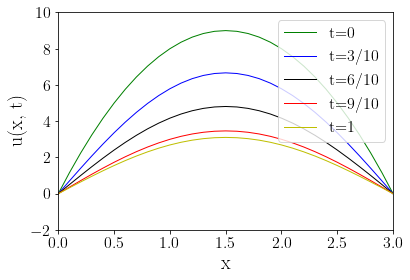

In [50]:
# 不同时刻的温度随空间坐标的变化
import matplotlib.pyplot as plt
import numpy as np

h = 0.1
Space = np.arange(0, space_intervals_number * h + h/100, h)
plt.plot(Space, U[:, 0], 'g-', label='t=0', linewidth=1.0)
plt.plot(Space, U[:, 3000], 'b-', label='t=3/10', linewidth=1.0)
plt.plot(Space, U[:, 6000], 'k-', label='t=6/10', linewidth=1.0)
plt.plot(Space, U[:, 9000], 'r-', label='t=9/10', linewidth=1.0)
plt.plot(Space, U[:, -1], 'y-', label='t=1', linewidth=1.0)
plt.ylabel('u(x, t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0, 3)
plt.ylim(-2, 10)
plt.legend(loc='upper right')
plt.show()

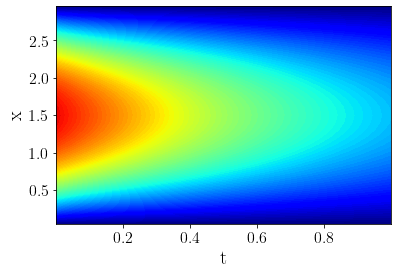

In [51]:
#温度等高线随时空坐标的变化，温度越高，颜色越偏红
extent = [0,1,0,3]#时间和空间的取值范围
levels = np.arange(0,10,0.1)#温度等高线的变化范围0-10，变化间隔为0.1
plt.contourf(U,levels,origin='lower', extent=extent, cmap=plt.cm.jet)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.show()

# 七、预测模型
预测正统方法是回归

## 灰色系统预测

### （一）灰色系统理论介绍

#### 1. 什么是灰色系统预测？
所谓灰色系统是指部分信息已知而部分系统未知的系统，灰色系统理论所要考察和研究的是对信息不完备的系统，通过已知信息来研究和预测未知领域从而达到了解整个系统的目的。
**灰色系统理论与概率论、模糊数学**一起并成为研究不确定性系统的三种常用方法。
#### 2. 灰色预测的主要特点
- 模型使用的不是原始数据序列，而是生成的数据序列，即对原始数据作累加生成（或其他方法）得到近似的指数规律再进行建模的方法。
- 优点是**不需要很多的数据**，一般只需要4个数据就足够，能解决历史数据少、序列完整性及可靠性低的问题；能利用**微分方程**来充分挖掘系统的本质，精度高；能将无规律的原始数据进行生成得到规律性较强的生成序列，运算简便，易于检验，具有不考虑分布规律，不考虑变化趋势。
- 缺点是只适用于**中短期预测**，只使用**指数增长的预测**。

#### 3. 数据累加与累减
##### （1）理论介绍
在一些实际问题中，往往会遇到随机干扰，导致一些数据具有很大的波动性。未处理这些问题，提出数据累加和累减的概念。
设原始数据列$\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$, 令
$$
x^{(1)}(k)=\sum_{i=1}^{k} x^{(0)}(i), \quad k=1,2, \cdots, n,
$$
得到 $\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)$，称 $\boldsymbol{x}^{(1)}$ 为 $\boldsymbol{x}^{(0)}$ 的一次累加生成数列.相应地，自然有 $x^{(0)}$ 的 $r$ 次累加生成数列
$$
\boldsymbol{x}^{(r)}=\left(x^{(r)}(1), x^{(r)}(2), \cdots, x^{(r)}(n)\right) ; \quad x^{(r)}(k)=\sum_{i=1}^{k} x^{(r-1)}(i) .
$$
与累加生成对应的运算是累减，它主要用于对累加生成的数据列进行还原。设 $\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)$，称 $\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$ 为 $\boldsymbol{x}^{(1)}$ 的一次累减，其中
$$
x^{(0)}(1)=x^{(1)}(1) ; \quad x^{(0)}(k)=x^{(1)}(k)-x^{(1)}(k-1), \quad k=2,3, \cdots, n .
$$
同理可定义 $r$ 次累减运算。

**注意：** 在实际问题中，一般来说，累加后的数据呈现指数增长即停止累加。同时，在误差检验或预测时，应还原后再进行，**不能**按照累加数据进行**误差计算**或**预测**。

##### （2）序列出现负数处理
累加的主要目的是把**非负**的波动数列转化成具有一定规律性（例如，指数形式单调增加）的数列。如果实际问题中出现**负数**（如温度数列），累加生成就不一定是好的处理办法，因为会出现**正负抵消**现象，这个时候会削弱原始数据的规律性。所以，此时应首先化为非负数列。具体做法是数列中每个数据同时减去原始数列中最小的元素值，得到非负数列后再进行累加运算。当然，在进行误差计算或预测时，应进行相应的逆运算。

##### （3）序列指数形式的判断
**定义：** 级比$\lambda(k) = \frac{x^{(0)}(k-1)}{x^{(0)}(k)} (k=2,3,\dots,n)$，若$\lambda(k)$落在区间$\left(e^{-\frac{2}{n+1}}, e^{\frac{2}{n+1}} \right)$，则称数据列满足指数形式增长。

#### 4. 例题
已知某商品年度销售数据序列为
$$
\boldsymbol{x}^{(0)}=(5.081,4.611,5.1177,9.3775,11.0574,11.0524)
$$
如果直接应用最小二乘法进行线性拟合，得到直线方程 $y=1.5273 k+2.3706$，拟合直线如下图1所示。
由图1看出，所有数据点中，原始数据与拟合直线有一定的差距，最大相对误差为 $35.85 \%$，也就是说拟合效果不理想。对 $\boldsymbol{x}^{(0)}$ 进行一次累加，得到
$$
\boldsymbol{x}^{(1)}=(5.081,9.692,14.8097,24.1872,35.2446,46.297)
$$
对 $x^{(1)}$ 进行拟合, 得到
$$
x^{(1)}(k+1)=15.3915 e^{0.2311 k}-14.7620
$$
由图2可以看到，拟合曲线与累加后的数据非常接近，最大相对误差为 $24.15 \%$，检验时需要进行累减还原，得
$$
\hat{\boldsymbol{x}}^{(0)}=(4.6313,5.0423,6.3534,8.0053,10.0867,12.7093)
$$
比直接线性拟合的最大相对误差减少很多。

累计数据是指数增长
拟合的参数值为： [ 16.6385648    0.37295613 -19.98968081]


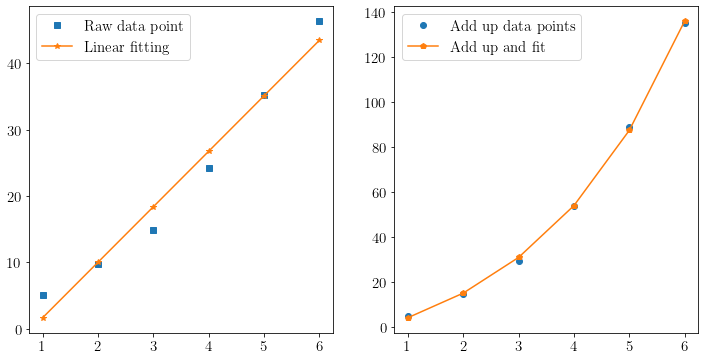

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rc('font', size=15)
plt.rc('font', family='SimHei')
t0 = np.arange(1, 6+1)
x0 = np.array([5.081, 9.692, 14.8097, 24.1872, 35.2446, 46.297])

# 线性拟合预测
xt = np.polyfit(t0, x0, 1)
xh1 = np.polyval(xt, t0) # 计算预测值
delta1 = abs(xh1-x0)/x0 # 计算相对误差

# 累加后拟合
x1 = np.cumsum(x0) # 累加
# 判断是不是指数形式增长
count = 0
for i in range(0, 4+1):
    if x1[i]/x1[i+1] > np.exp(-2/7) and x1[i]/x1[i+1] < np.exp(2/7):
        count += 1
if count == 5:
    print("累计数据是指数增长")
else:
    print("累计数据是指数增长")
xh2 = lambda t, a, b, c: a*np.exp(b*t) + c
para, cov = curve_fit(xh2, t0, x1)
xh21 = xh2(t0, *para) # 计算累加数列的预测值
xh22 = np.r_[xh21[0], np.diff(xh21)] # 计算预测值（累减）
delta2 = np.abs(xh22-x0)/x0 # 计算相对误差
print("拟合的参数值为：", para)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(t0, x0, 's')
plt.plot(t0, xh1, '*-')
plt.legend(('Raw data point', 'Linear fitting'), loc='upper left')
plt.subplot(122)
plt.plot(t0, x1, 'o')
plt.plot(t0, xh21, 'p-')
plt.legend(('Add up data points', 'Add up and fit'), loc='upper left')
plt.show()

### （二）灰色GM(1,1)预测模型
$\mathrm{GM}(1,1)$ 模型适用于具有**较强指数规律**的序列，只能描述**单调的变化过程**，对于**非单调的摆动发展序列**或**有饱和的** $S$形序列，可以考虑建立 $\mathrm{GM}(2,1)$，DGM 和 Verhulst 模型。

灰色模型：Grey Model, GM
数据序列在累加后旺现出指数形式的单调递增规律，联想到微分方程 $y^{\prime}=a y$ 具有指数形式的解 $y=e^{a x}$，由此提出一阶灰色方程模型，即 $\mathrm{GM}(1,1)$ 模型，其中的第1个1表示1阶微分方程，第2个1表示只含1个变量的灰色模型。
已知参考数据列$\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$，1次累加生成序列(1-AGO)
$$
\begin{aligned}
\boldsymbol{x}^{(1)} &=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right) \\
&=\left(x^{(0)}(1), x^{(0)}(1)+x^{(0)}(2), \cdots, x^{(0)}(1)+\cdots+x^{(0)}(n)\right),
\end{aligned}
$$
其中 $x^{(1)}(k)=\sum_{i=1}^{k} x^{(0)}(i)(k=1,2, \cdots, n)$. $\boldsymbol{x}^{(1)}$ 的均值生成序列
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(n)\right)
$$
其中 $z^{(1)}(k)=0.5 x^{(1)}(k)+0.5 x^{(1)}(k-1), k=2,3, \cdots, n$.
#### 1. GM(1,1)模型预测步骤

##### （1）数据的检验与处理
首先，为了保证建模方法的可行性，需要对已知数据列作必要的检验处理。计算参考序列的级比
$$
\lambda(k)=\frac{x^{(0)}(k-1)}{x^{(0)}(k)}, \quad k=2,3, \cdots, n
$$
如果所有的级比 $\lambda(k)$ 都落在可容覆盖 $\Theta=\left(e^{-\frac{2}{n+1}}, e^{\frac{2}{n+1}}\right)$ 内，则序列 $\boldsymbol{x}^{(0)}$ 可以作为模型 $\mathrm{GM}(1,1)$ 的数据进行灰色预测。否则，需要对序列 $\boldsymbol{x}^{(0)}$ 作必要的变换处理，使其落入可容覆盖内。即取适当的正常数$c$，作平移变换
$$
y^{(0)}(k)=x^{(0)}(k)+c, \quad k=1,2, \cdots, n
$$
使序列 $\boldsymbol{y}^{(0)}=\left(y^{(0)}(1), y^{(0)}(2), \cdots, y^{(0)}(n)\right)$ 的级比
$$
\lambda_{y}(k)=\frac{y^{(0)}(k-1)}{y^{(0)}(k)} \in \Theta, \quad k=2,3, \cdots, n
$$
满足要求。

##### （2）建立模型
建立微分方程模型
\begin{equation*}
\frac{d x^{(1)}(t)}{d t}+a x^{(1)}(t)=b
\tag{(1)}
\end{equation*}
该模型是 1 阶 1 个变量的微分方程，记为 $\operatorname{GM}(1,1)$.
为了辨识模型参数 $a, b$，在区间 $k-1<t \leqslant k$ 上，令
$$
\begin{gathered}
x^{(1)}(t)=z^{(1)}(k)=\frac{1}{2}\left[x^{(1)}(k-1)+x^{(1)}(k)\right], \\
\frac{d x^{(1)}(t)}{d t}=x^{(1)}(k)-x^{(1)}(k-1)=x^{(0)}(k) .
\end{gathered}
$$
则式(1)化为离散模型
\begin{equation}
x^{(0)}(k)+a z^{(1)}(k)=b, \quad k=2,3, \cdots, n .
\tag{(2)}
\end{equation}
式(2)称为灰色微分方程, 式(1)称为对应的白化方程.
记 $\boldsymbol{u}=[a, b]^{\mathrm{T}}, \boldsymbol{Y}=\left[x^{(0)}(2), x^{(0)}(3), \cdots, x^{(0)}(n)\right]^{\mathrm{T}}, \boldsymbol{B}=\left[\begin{array}{cc}-z^{(1)}(2) & 1 \\ -z^{(1)}(3) & 1 \\ \vdots & \vdots \\ -z^{(1)}(n) & 1\end{array}\right]$，则由
最小二乘法，求得使 $J(\boldsymbol{u})=(\boldsymbol{Y}-\boldsymbol{B} \boldsymbol{u})^{\mathrm{T}}(\boldsymbol{Y}-\boldsymbol{B} \boldsymbol{u})$ 达到最小值的 $\boldsymbol{u}$ 的估计值
$$
\hat{\boldsymbol{u}}=[\hat{a}, \hat{b}]^{\mathrm{T}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y} .
$$
于是求解方程(1)，得
$$
\hat{x}^{(1)}(t)=\left(x^{(0)}(1)-\frac{\hat{b}}{\hat{a}}\right) e^{-\hat{a} (t-1)}+\frac{\hat{b}}{\hat{a}}
$$
即得到预测值
$$
\hat{x}^{(1)}(k+1)=\left(x^{(0)}(1)-\frac{\hat{b}}{\hat{a}}\right) e^{-\hat{a} k}+\frac{\hat{b}}{\hat{a}}, \quad k=0,1,2, \cdots,
$$
而且 $\hat{x}^{(0)}(1)=\hat{x}^{(1)}(1), \hat{x}^{(0)}(k+1)=\hat{x}^{(1)}(k+1)-\hat{x}^{(1)}(k), k=1,2, \cdots$.

##### （3）误差检验
可以使用如下两种检验方式
###### a) 相对误差检验
计算相对误差
$$
\delta(k)=\frac{\left|x^{(0)}(k)-\hat{x}^{(0)}(k)\right|}{x^{(0)}(k)}, \quad k=1,2, \cdots, n
$$
这里 $\hat{x}^{(0)}(1)=x^{(0)}(1)$. 如果 $\delta(k)<0.2$，则可认为达到一般要求；如果 $\delta(k)<0.1$，则认为达到较高的要求.
###### b) 级比偏差值检验
首先由参考序列计算出级比 $\lambda(k)$，再用**发展系数** $\hat{a}$ 求出相应的级比偏差
$$
\rho(k)=\left|1-\left(\frac{1-0.5 \hat{a}}{1+0.5 \hat{a}}\right) \lambda(k)\right|, \quad k=2,3, \cdots, n
$$
如果 $\rho(k)<0.2$，则可认为达到一般要求；如果 $\rho(k)<0.1$，则认为达到较高的要求。
##### （4） 预测预报
由 $\mathrm{GM}(1,1)$ 模型得到指定点的预测值，根据实际问题的需要，给出相应的预测预报。



#### 2. GM(1,1)模型预测实例
由1995~2001年中国蔬菜产量，具体数据见下表，建立模型预测2002年中国蔬菜产量，并对预测结果作检验。
\begin{array}{cccccccc}
\hline 年份 & 1995 & 1996 & 1997 & 1998 & 1999 & 2000 & 2001 \\
\hline 产量 & 25723 & 30379 & 34473 & 38485 & 40514 & 42400 & 48337 \\
\hline
\end{array}
##### （1）数据的检验
记1995~2001年的蔬菜产量分别为 $x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(7)$，构造参考序列 $\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(7)\right)$，经检验级比符合要求，参考序列 $\boldsymbol{x}^{(0)}$ 可以用来建立 $\operatorname{GM}(1,1)$ 模型。
##### （2）模型的建立与求解
构造累加序列
$$
\begin{aligned}
\boldsymbol{x}^{(1)} &=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(7)\right) \\
&=\left(x^{(0)}(1), x^{(0)}(1)+x^{(0)}(2), \cdots, x^{(0)}(1)+\cdots+x^{(0)}(7)\right)
\end{aligned}
$$
和 $\boldsymbol{x}^{(1)}$ 的均值生成序列
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(7)\right)
$$
其中 $z^{(1)}(k)=0.5 x^{(1)}(k)+0.5 x^{(1)}(k-1), k=2,3, \cdots 7$.
将
$$
\boldsymbol{Y}=\left[\begin{array}{c}
x^{(0)}(2) \\
x^{(0)}(3) \\
\vdots \\
x^{(0)}(7)
\end{array}\right], \quad \boldsymbol{B}=\left[\begin{array}{cc}
-z^{(1)}(2) & 1 \\
-z^{(1)}(3) & 1 \\
\vdots & \vdots \\
-z^{(1)}(7) & 1
\end{array}\right]
$$
得参数的估计值
$$
\hat{\boldsymbol{u}}=\left[\hat{a}, \hat{b}^{\mathrm{T}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}=\left[\begin{array}{c}
-0.0843 \\
27858.4508
\end{array}\right],\right.
$$
得 $\operatorname{GM}(1,1)$ 模型为
(1) 灰微分方程: $x^{(0)}(k)-0.0843 z^{(1)}(k)=27858.4508$.
(2) 白化方程: $\frac{d x^{(1)}(t)}{d t}-0.0843 x^{(1)}(t)=27858.4508$.
(3) 白化方程的时间响应式:
\begin{equation}
\hat{x}^{(1)}(k+1)=356328.9910 e^{0.0843 k}-330605.9910 .
\tag{(3)}
\end{equation}
##### （3）模型检验与预测
利用(3)式求得累加生成序列的预测值 $\hat{\boldsymbol{x}}^{(1)}=\left(\hat{x}^{(1)}(1), \hat{x}^{(1)}(2), \cdots, \hat{x}^{(1)}(8)\right)$，由 $\hat{x}^{(0)}(1)=\hat{x}^{(1)}(1), \hat{x}^{(0)}(k+1)=\hat{x}^{(1)}(k+1)-\hat{x}^{(1)}(k), k=1,2, \cdots, 7$ ,得 $\hat{\boldsymbol{x}}^{(0)}=$ $\left(\hat{x}^{(0)}(1), \hat{x}^{(0)}(2), \cdots, \hat{x}^{(0)}(8)\right)$，即得到1995~2002年的预测值见下表。画出预测值与实际值的变化曲线如下图所示.

\begin{array}{ccccc}
\hline \text { 年份 } & \text { 实际数据 } \boldsymbol{x}^{(0)} & \text { 预测数据 } \hat{\boldsymbol{x}}^{(0)} & \text { 残差 } \boldsymbol{x}^{(0)}-\hat{\boldsymbol{x}}^{(0)} & \text { 相对误差 } \delta(k) / \% \\
\hline 1995 & 25723 & 25723 & 0 & 0 \\
1996 & 30379 & 31327.3567 & -948.3567 & 3.12 \\
1997 & 34473 & 34081.5622 & 391.4378 & 1.14 \\
1998 & 38485 & 37077.9091 & 1407.0909 & 3.66 \\
1999 & 40514 & 40337.6857 & 176.3143 & 0.44 \\
2000 & 42400 & 43884.0518 & -1484.0518 & 3.50 \\
2001 & 48337 & 47742.2036 & 594.7964 & 1.23 \\
2002 & & 51939.5524 & & \\
\hline
\end{array}

级比符合要求
1995~2002的预测值： [25723.         31327.3567122  34081.56224489 37077.90911705
 40337.68565577 43884.05179287 47742.20361062 51939.55235392]

-----------------
 相对误差 [0.         3.12175092 1.13549083 3.65620601 0.43519362 3.50012215
 1.23051987]


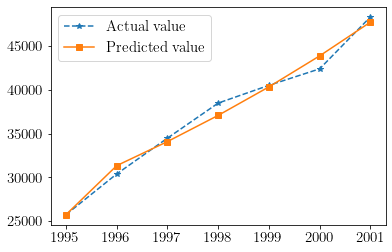

In [55]:
# GM(1,1)例题程序
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')
x0 = np.array([25723, 30379, 34473, 38485, 40514, 42400, 48337])

# 求级比
n = len(x0)
jibi = x0[:-1]/x0[1:]
bound1 = [jibi.min(), jibi.max()] # 级比范围
bound2 = [np.exp(-2/(n+1)), np.exp(2/(n+1))] # 级比容许范围
if bound1[0] > bound2[0] and bound1[-1] < bound2[-1]:
    print("级比符合要求")
else:
    print("级比不符合要求")

x1 = np.cumsum(x0) # 累加序列
z = (x1[:-1]+x1[1:])/2.0 # 均值生成序列
B = np.vstack([-z, np.ones(n-1)]).T
u = np.linalg.pinv(B)@x0[1:] # 最小二乘法拟合参数，pinv(B)计算矩阵B的伪逆

sp.var('t') # 定义符号变量
sp.var('x', cls=sp.Function) # 定义符号函数
eq = x(t).diff(t) + u[0]*x(t) - u[1] # 定义符号微分方程
xt = sp.dsolve(eq, ics={x(0):x0[0]}) # 求解符号微分方程
xt = xt.args[1] # 提取方程中的符号解
xt = sp.lambdify(t, xt, 'numpy') # 转换为匿名函数

t = np.arange(n+1)
xt1 = xt(t) # 求模型的预测值
x0_pred = np.hstack([x0[0], np.diff(xt1)]) # 还原数据
x2002 = x0_pred[-1] # 提取2002年的预测值
cha = x0 - x0_pred[:-1]
delta = np.abs(cha/x0)*100

print('1995~2002的预测值：', x0_pred)
print('\n-----------------\n', '相对误差', delta)
t0 = np.arange(1995, 2002)
plt.plot(t0, x0, '*--')
plt.plot(t0, x0_pred[:-1], 's-')
plt.legend(('Actual value', 'Predicted value'))
plt.xticks(np.arange(1995, 2002))
plt.show()

### （三）灰色GM(1,N)预测模型

#### 1.GM(1,N)模型预测步骤
设系统有 $N$ 个指标变量，对应的参考序列分别为
$$
\boldsymbol{x}_{i}^{(0)}=\left(x_{i}^{(0)}(1), x_{i}^{(0)}(2), \cdots, x_{i}^{(0)}(n)\right), \quad i=1,2, \cdots, N
$$
作累加运算 $x_{i}^{(1)}(k)=\sum_{j=1}^{k} x_{i}^{(0)}(j)$，可得累加生成数列
$$
\boldsymbol{x}_{i}^{(1)}=\left(x_{i}^{(1)}(1), x_{i}^{(1)}(2), \cdots, x_{i}^{(1)}(n)\right), \quad i=1,2, \cdots, N
$$
微分方程
\begin{equation}
\frac{d x_{1}^{(1)}(t)}{d t}+a_{1} x_{1}^{(1)}(t)=a_{2} x_{2}^{(1)}(t)+a_{3} x_{3}^{(1)}(t)+\cdots+a_{N} x_{N}^{(1)}(t)
\tag{(4)}
\end{equation}
是 1 阶 $N$ 个变量的微分方程模型，记为 $\operatorname{GM}(1, N)$.
类似地，当 $k-1<t \leqslant k$ 时，令
$$
\begin{gathered}
\frac{d x_{1}^{(1)}(t)}{d t}=x_{1}^{(1)}(k)-x_{1}^{(1)}(k-1)=x_{1}^{(0)}(k), \quad k=2,3, \cdots, n, \\
x_{i}^{(1)}(t)=z_{i}^{(1)}(k)=\frac{1}{2}\left(x_{i}^{(1)}(k-1)+x_{i}^{(1)}(k)\right), \quad i=1,2, \cdots, N ; k=2,3, \cdots, n .
\end{gathered}
$$
将(4)式化成离散模型
\begin{equation}
x_{1}^{(0)}(k)+a_{1} z_{1}^{(1)}(k)=a_{2} z_{2}^{(1)}(k)+a_{3} z_{3}^{(1)}(k)+\cdots+a_{N} z_{N}^{(1)}(k), \quad k=2,3, \cdots, n .
\tag{(5)}
\end{equation}
可以证明(5)式是(4)式的二阶精度数值模型.
记
$$
\boldsymbol{u}=\left[\begin{array}{c}
a_{1} \\
a_{2} \\
\vdots \\
a_{N}
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
x^{(0)}(2) \\
x^{(0)}(3) \\
\vdots \\
x^{(0)}(n)
\end{array}\right], \quad \boldsymbol{B}=\left[\begin{array}{cccc}
-z_{1}^{(1)}(2) & z_{2}^{(1)}(2) & \cdots & z_{N}^{(1)}(2) \\
-z_{1}^{(1)}(3) & z_{2}^{(1)}(3) & \cdots & z_{N}^{(1)}(3) \\
\vdots & \vdots & & \vdots \\
-z_{1}^{(1)}(n) & z_{2}^{(1)}(n) & \cdots & z_{N}^{(1)}(n)
\end{array}\right]
$$
可将(5)式化为 $\boldsymbol{B u}=\boldsymbol{Y}$，则可以得到 $\boldsymbol{u}$ 的最小二乘估计值
$$
\hat{\boldsymbol{u}}=\left[\begin{array}{c}
\hat{a}_{1} \\
\hat{a}_{2} \\
\vdots \\
\hat{a}_{N}
\end{array}\right]=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}
$$
求出(4)式的数值解，就得到 $x_{1}^{(1)}(k)(k=1,2, \cdots)$的预测值 $\hat{x}_{1}^{(1)}(k)(k=1,2, \cdots)$，还原到 $\hat{x}_{1}^{(0)}(k)(k=1,2, \cdots)$，就得到 $x_{0}^{(1)}(k)(k=1,2, \cdots)$，的预测值.

#### 2.GM(1,N)模型预测实例
我国某油田 $\mathrm{S}$ 油藏自 1994 年 2 月至 1995 年 2 月的开发动态数据见下表，试建立预测模型，并预测 1995 年 3 月月产油量、月产水量、月注水量和 地层压力的取值.
\begin{array}{cccccc}
\hline \text { 序号 } & \text { 时间 } & \text { 月产油量/万吨 } & \text { 月产水量/万吨 } & \text { 月注水量/万吨 } & \text { 地层压力/MPa } \\
\hline 1 & 94.02 & 7.123 & 0.796 & 13.108 & 27.475 \\
2 & 94.03 & 7.994 & 0.832 & 12.334 & 27.473 \\
3 & 94.04 & 8.272 & 0.917 & 12.216 & 27.490 \\
4 & 94.05 & 7.960 & 0.976 & 12.201 & 27.500 \\
5 & 94.06 & 7.147 & 1.075 & 12.132 & 27.510 \\
6 & 94.07 & 7.092 & 1.121 & 11.990 & 27.542 \\
7 & 94.08 & 6.858 & 1.281 & 11.926 & 27.536 \\
8 & 94.09 & 5.804 & 1.350 & 10.478 & 27.550 \\
9 & 94.10 & 6.433 & 1.410 & 9.176 & 27.567 \\
10 & 94.11 & 6.354 & 1.432 & 11.368 & 27.584 \\
11 & 94.12 & 6.254 & 1.507 & 12.764 & 27.600 \\
12 & 95.01 & 5.197 & 1.559 & 11.143 & 27.602 \\
13 & 95.02 & 5.654 & 1.611 & 10.737 & 27.630 \\
\hline
\end{array}

**解：** 用 $x_{1}, x_{2}, x_{3}, x_{4}$ 分别表示月产油量、月产水量、月注水量和地层压力，它们的观测值分别记作 $\boldsymbol{x}_{i}^{(0)}=\left(x_{i}^{(0)}(1), x_{i}^{(0)}(2), \cdots, x_{i}^{(0)}(13)\right)(i=1,2,3,4)$.
对月产油量 $x_{1}$，建立 $\operatorname{GM}(1,1)$ 模型；月产水量 $x_{2}$ 受月产油量及油藏水驱规律的控制，因此对 $x_{2}$ 建立与 $x_{1}$ 相关的 $\mathrm{GM}(1,2)$ 模型；对月注水量 $x_{3}$，建立 $\mathrm{GM}(1,1)$ 模型；地层压力 $x_{4}$ 与采注关系密切，是地层能量的综合反映，因此对 $x_{4}$ 建立与$x_{1}, x_{3}$ 相关的 $\mathrm{GM}(1,3)$ 模型。综上所述，系统的 4 个开发指标所满足的状态方程为

\begin{equation}
\begin{cases}
\frac{d x_{1}^{(1)}(t)}{d t}=a_{11} x_{1}^{(1)}(t)+b_{1} \\
\frac{d x_{2}^{(1)}(t)}{d t}=a_{21} x_{1}^{(1)}(t)+a_{22} x_{2}^{(1)}(t) \\
\frac{d x_{3}^{(1)}(t)}{d t}=a_{33} x_{3}^{(1)}(t)+b_{3} \\
\frac{d x_{4}^{(1)}(t)}{d t}=a_{41} x_{1}^{(1)}(t)+a_{43} x_{3}^{(1)}(t)+a_{44} x_{4}^{(1)}(t)
\end{cases}
\tag{(6)}
\end{equation}

将(6)式改写为矩阵方程
\begin{equation}
\frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\boldsymbol{A} \boldsymbol{X}^{(1)}(t)+\tilde{\boldsymbol{B}}
\tag{(7)}
\end{equation}
式中，
$$
\begin{aligned}
& \frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\left[\frac{d x_{1}^{(1)}(t)}{d t}, \frac{d x_{2}^{(1)}(t)}{d t}, \frac{d x_{3}^{(1)}(t)}{d t}, \frac{d x_{4}^{(1)}(t)}{d t}\right]^{\mathrm{T}} \\
\boldsymbol{X}^{(1)}(t)=& {\left[\begin{array}{c}
x_{1}^{(1)}(t) \\
x_{2}^{(1)}(t) \\
x_{3}^{(1)}(t) \\
x_{4}^{(1)}(t)
\end{array}\right], \quad \boldsymbol{A}=\left[\begin{array}{cccc}
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22} & 0 & 0 \\
0 & 0 & a_{33} & 0 \\
a_{41} & 0 & a_{43} & a_{44}
\end{array}\right], \quad \tilde{\boldsymbol{B}}=\left[\begin{array}{c}
b_{1} \\
0 \\
b_{3} \\
0
\end{array}\right] }
\end{aligned}
$$

利用上面介绍的最小二乘法，依次辨识式(6)中每个方程中的系数 $a_{11}, b_{1} ; a_{21}, a_{22} ;$ $a_{33}, b_{3} ; a_{41}, a_{43}, a_{44}$. 计算 4 次得到
$$
\boldsymbol{A}=\left[\begin{array}{cccc}
-0.0378 & 0 & 0 & 0 \\
0.0568 & -0.2232 & 0 & 0 \\
0 & 0 & -0.0114 & 0 \\
-0.6179 & 0 & 5.6950 & -2.1926
\end{array}\right], \quad \tilde{\boldsymbol{B}}=\left[\begin{array}{c}
8.6667 \\
0 \\
12.4938 \\
0
\end{array}\right] .
$$
以表中1994年2月的月产油量、月产水量、月注水量、地层压力的数据为初值，得如下初值问题:
$$
\begin{equation}
\left\{\begin{array}{l}
\frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\boldsymbol{A} \boldsymbol{X}^{(1)}(t)+\tilde{\boldsymbol{B}} \\
\boldsymbol{X}^{(1)}(1)=[7.123,0.796,13.108,27.475]
\end{array}\right.
\tag{(8)}
\end{equation}
$$
利用 Python 软件求微分方程组式(8)的数值解，可以得到 $\boldsymbol{X}^{(1)}(k)(k=2$, $3, \cdots, 14)$ 的数值解，具体的计算结果就不列举了。从程序运行结果可以看出，模拟值与实际值符合较好，但有一个注水量的预测值的相对误差较大。1995 年 3 月 $x_{1}, x_{2}, x_{3}, x_{4}$ 的预测值分别为 $5.2347,1.4599$, $10.7070,26.5756$.

预测值
 [[ 7.123       0.796      13.108      27.475     ]
 [ 8.24060359  0.42241534 12.27456009 21.82165342]
 [ 7.93481492  0.74941597 12.13559638 28.64289129]
 [ 7.64037331  0.99573608 11.99820591 29.16758865]
 [ 7.35685771  1.17808103 11.86237089 28.98320635]
 [ 7.08386269  1.30979354 11.72807368 28.71977504]
 [ 6.82099784  1.40152706 11.5952969  28.448388  ]
 [ 6.56788726  1.46178468 11.46402331 28.1771159 ]
 [ 6.324169    1.49734979 11.33423591 27.90692124]
 [ 6.08949453  1.51363033 11.20591788 27.63796262]
 [ 5.86352826  1.5149357  11.07905256 27.37030393]
 [ 5.64594704  1.50469625 10.95362352 27.10399581]
 [ 5.43643974  1.48564007 10.8296145  26.83909157]
 [ 5.23470673  1.45993391 10.70700942 26.57561822]]
------------------------------------------------------------
残差
 [[ 0.          0.          0.          0.        ]
 [-0.24660359  0.40958466  0.05943991  5.65134658]
 [ 0.33718508  0.16758403  0.08040362 -1.15289129]
 [ 0.31962669 -0.01973608  0.20279409 -1.66758865]
 [-0.209857

Text(0.5, 1.0, 'Formation pressure')

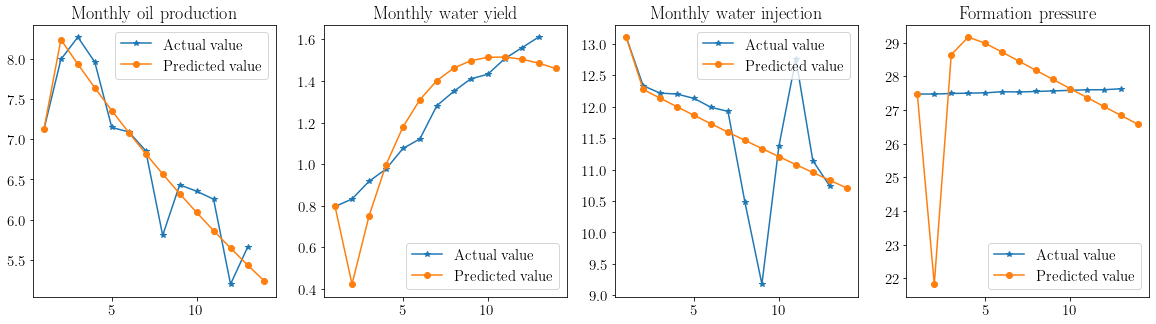

In [57]:
# GM(1,N)例题程序
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')

a = np.array([[7.123, 0.796, 13.108, 27.475],
              [7.994, 0.832, 12.334, 27.473],
              [8.272, 0.917, 12.216, 27.490],
              [7.960, 0.976, 12.201, 27.500],
              [7.147, 1.075, 12.132, 27.510],
              [7.092, 1.121, 11.990, 27.542],
              [6.858, 1.281, 11.926, 27.536],
              [5.804, 1.350, 10.478, 27.550],
              [6.433, 1.410, 9.176,  27.567],
              [6.354, 1.432, 11.368, 27.584],
              [6.254, 1.507, 12.764, 27.600],
              [5.197, 1.559, 11.143, 27.602],
              [5.654, 1.611, 10.737, 27.630],
])
n = a.shape[0] # 观测数据的个数
x10 = a[:, 0]
x20 = a[:, 1]
x30 = a[:, 2]
x40 = a[:, 3]

# 累加和
x11 = np.cumsum(x10)
x21 = np.cumsum(x20)
x31 = np.cumsum(x30)
x41 = np.cumsum(x40)

# 均值生成序列
z1 = (x11[:-1]+x11[1:])/2
z2 = (x21[:-1]+x21[1:])/2
z3 = (x31[:-1]+x31[1:])/2
z4 = (x41[:-1]+x41[1:])/2

B1 = np.c_[z1, np.ones((n-1, 1))]
u1 = np.linalg.pinv(B1).dot(x10[1:])
# print(u1)
B2 = np.c_[z1, z2]
u2 = np.linalg.pinv(B2).dot(x20[1:])
# print(u2)
B3 = np.c_[z3, np.ones((n-1, 1))]
u3 = np.linalg.pinv(B3).dot(x30[1:])
# print(u3)
B4 = np.c_[z1, z3, z4]
u4 = np.linalg.pinv(B4).dot(x40[1:])
# print(u4)

def Pfun(x, t):
    '''
    return很容易写错，要细心。
    '''
    x1, x2, x3, x4 = x
    return np.array([u1[0]*x1 + u1[1], u2[0]*x1+u2[1]*x2, u3[0]*x3+u3[1], u4[0]*x1+u4[1]*x3+u4[2]*x4])

t = np.arange(1, 14+1)
X0 = np.array([7.1230, 0.7960, 13.1080, 27.475])
s1 = odeint(Pfun, X0, t)
s2 = np.diff(s1, axis=0)
xh = np.vstack([X0, s2]) # 预测值
print('预测值\n', xh)
print('-'*60)
cha = a - xh[:-1, :] # 计算残差
print('残差\n', cha)
print('-'*60)
delta = np.abs(cha/a) # 计算相对误差
print('相对误差\n', delta)
print('-'*60)
maxd = delta.max(0) # 计算每个指标的最大相对误差
pre = xh[-1, :]
print('最大相对误差为', maxd, '\n预测值为', pre)

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.plot(np.arange(1, 13+1), a[:, 0], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 0], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly oil production')
plt.subplot(142)
plt.plot(np.arange(1, 13+1), a[:, 1], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 1], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly water yield')
plt.subplot(143)
plt.plot(np.arange(1, 13+1), a[:, 2], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 2], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly water injection')
plt.subplot(144)
plt.plot(np.arange(1, 13+1), a[:, 3], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 3], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Formation pressure')

### （四）灰色GM(2,1)预测模型

$\mathrm{GM}(1,1)$ 模型适用于具有**较强指数规律**的序列，只能描述**单调的变化过程**，对于**非单调的摆动发展序列**或**有饱和的** $S$形序列，可以考虑建立 $\mathrm{GM}(2,1)$，DGM 和 Verhulst 模型。下面介绍$\mathrm{GM}(1,1)$ 模型。
#### 1.GM(2,1)模型理论知识
**定义1：** 设原始序列
$$
\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)
$$
其 1 次累加生成序列 (1-AGO) $\boldsymbol{x}^{(1)}$ 和 1 次累减生成序列 (1-IAGO) $\alpha^{(1)} \boldsymbol{x}^{(0)}$ 分别 为
$$
\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)
$$
和
$$
\alpha^{(1)} \boldsymbol{x}^{(0)}=\left(\alpha^{(1)} x^{(0)}(2), \cdots, \alpha^{(1)} x^{(0)}(n)\right)
$$
其中
$$
\alpha^{(1)} x^{(0)}(k)=x^{(0)}(k)-x^{(0)}(k-1), \quad k=2,3, \cdots, n
$$
$x^{(1)}$ 的均值生成序列为
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(n)\right)
$$
则称
$$
\alpha^{(1)} x^{(0)}(k)+a_{1} x^{(0)}(k)+a_{2} z^{(1)}(k)=b \quad(k=2,3, \cdots, n)
$$
为 $\operatorname{GM}(2,1)$ 模型。
**定义2：** 称
$$
\frac{d^{2} x^{(1)}(t)}{d t^{2}}+a_{1} \frac{d x^{(1)}(t)}{d t}+a_{2} x^{(1)}(t)=b
$$
为 $\operatorname{GM}(2,1)$ 模型的白化方程。
**定理：** 设 $\boldsymbol{x}^{(0)}, \boldsymbol{x}^{(1)}, \alpha^{(1)} \boldsymbol{x}^{(0)}$ 如定义1所述，且
$$
\begin{aligned}
\boldsymbol{B} &=\left[\begin{array}{ccc}
-x^{(0)}(2) & -z^{(1)}(2) & 1 \\
-x^{(0)}(3) & -z^{(1)}(3) & 1 \\
\vdots & \vdots & \vdots \\
-x^{(0)}(n) & -z^{(1)}(n) & 1
\end{array}\right] \\
\boldsymbol{Y} &=\left[\begin{array}{c}
\alpha^{(1)} x^{(0)}(2) \\
\alpha^{(1)} x^{(0)}(3) \\
\vdots \\
\alpha^{(1)} x^{(0)}(n)
\end{array}\right]=\left[\begin{array}{c}
x^{(0)}(2)-x^{(0)}(1) \\
x^{(0)}(3)-x^{(0)}(2) \\
\vdots \\
x^{(0)}(n)-x^{(0)}(n-1)
\end{array}\right]
\end{aligned}
$$
则 $\operatorname{GM}(2,1)$ 模型参数序列 $\boldsymbol{u}=\left[a_{1}, a_{2}, b\right]^{\mathrm{T}}$ 的最小二乘估计为
$$
\hat{\boldsymbol{u}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}
$$

#### 2.GM(2,1)模型预测实例
已知$\boldsymbol{x}^{(0)}=(41, 49, 61, 78, 96, 104)$，试建立$\operatorname{GM}(2,1)$模型。
**解：** $\boldsymbol{x}^{(0)}$ 的 1-AGO 序列 $\boldsymbol{x}^{(1)}$ 和 1-IAGO 序列 $\alpha^{(1)} \boldsymbol{x}^{(0)}$ 分别为
$$
\boldsymbol{x}^{(1)}=(41,90,151,229,325,429), \quad \alpha^{(1)} \boldsymbol{x}^{(0)}=(8,12,17,18,8)
$$
$\boldsymbol{x}^{(1)}$ 的均值生成序列 $\boldsymbol{z}^{(1)}=(65.5,120.5,190,277,377)$，记
$$
\boldsymbol{B}=\left[\begin{array}{ccc}
-x^{(0)}(2) & -z^{(1)}(2) & 1 \\
-x^{(0)}(3) & -z^{(1)}(3) & 1 \\
\vdots & \vdots & \vdots \\
-x^{(0)}(6) & -z^{(1)}(6) & 1
\end{array}\right]=\left[\begin{array}{ccc}
-49 & -65.5 & 1 \\
-61 & -120.5 & 1 \\
-78 & -190 & 1 \\
-96 & -277 & 1 \\
-104 & -377 & 1
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
8 \\
12 \\
17 \\
18 \\
8
\end{array}\right],
$$
则有
$$
\hat{u}=\left[\begin{array}{c}
\hat{a}_{1} \\
\hat{a}_{2} \\
\hat{b}
\end{array}\right]=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}=\left[\begin{array}{c}
-1.0922 \\
0.1959 \\
-31.7983
\end{array}\right],
$$

故得 $\operatorname{GM}(2,1)$ 白化模型
$$
\frac{d^{2} x^{(1)}}{d t^{2}}-1.0922 \frac{d x^{(1)}}{d t}+0.1959 x^{(1)}=-31.7983
$$
利用**边值条件** $x^{(1)}(1)=41, x^{(1)}(6)=429$，解之得时间响应式为
$$
x^{(1)}(t)=203.85 e^{0.22622 (t-1)}-0.5325 e^{0.86597 (t-1)}-162.317
$$
于是 $\operatorname{GM}(2,1)$ 时间响应式
$$
\hat{x}^{(1)}(k+1)=203.85 e^{0.22622 k}-0.5325 e^{0.86597 k}-162.317
$$
所以
$$
\hat{\boldsymbol{x}}^{(1)}=(41,92.0148,155.1561,232.3672,324.5220,429)
$$
做 IAGO 还原，有
$$
\hat{\boldsymbol{x}}^{(0)}=(41,51.0148,63.1412,77.2111,92.1548,104.4780)
$$
计算结果见下表
\begin{array}{ccccc}
\hline \text { 序号 } & \text { 实际数据 } \boldsymbol{x}^{(0)} & \text { 预测数据 } \hat{\boldsymbol{x}}^{(0)} & \text { 残差 } \boldsymbol{x}^{(0)}-\hat{\boldsymbol{x}}^{(0)} & \text { 相对误差 } \delta(k) / \% \\
\hline
1 & 41 & 41\\
2 & 49 & 51.0148 & -2.0148 & 4.1 \\
3 & 61 & 63.1412 & -2.1412 & 3.5 \\
4 & 78 & 77.2111 & 0.7889 & 1.0 \\
5 & 96 & 92.1548 & 3.8452 & 4.0 \\
6 & 104 & 104.4780 & -0.4780 & 0.5 \\
\hline
\end{array}

级比符合要求
参数u： [ -1.09219635   0.19590335 -31.79834712]
xt= 203.849012866397*exp(0.22622340416904*t) - 0.532505769427841*exp(0.865972945416791*t) - 162.316507096969
相对误差： [0.   4.11 3.51 1.01 4.01 0.46]


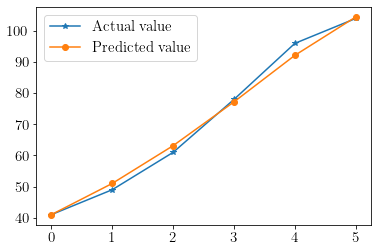

In [58]:
# GM(2,1)例题程序
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')

x0 = np.array([41,49,61,78,96,104])


# 求级比
n = len(x0)
jibi = x0[:-1]/x0[1:]
bound1 = [jibi.min(), jibi.max()] # 级比范围
bound2 = [np.exp(-2/(n+1)), np.exp(2/(n+1))] # 级比容许范围
if bound1[0] > bound2[0] and bound1[-1] < bound2[-1]:
    print("级比符合要求")
else:
    print("级比不符合要求")

x1 = np.cumsum(x0)  # 计算1-AGO序列
z = 0.5*(x1[1:]+x1[:-1]) # 计算均值生成序列
B = np.vstack([-x0[1:],-z,np.ones(n-1)]).T
u = np.linalg.pinv(B)@np.diff(x0)  #最小二乘法拟合参数
print("参数u：", u)

sp.var('t')
sp.var('x',cls=sp.Function)  #定义符号变量和函数
eq = x(t).diff(t,2) + u[0]*x(t).diff(t) + u[1]*x(t) - u[2]
s = sp.dsolve(eq,ics={x(0):x0[0],x(5):x1[-1]})  #求微分方程符号解
xt = s.args[1]  #提取解的符号表达式
print('xt=',xt)
fxt = sp.lambdify(t,xt,'numpy')  #转换为匿名函数

yuce1 = fxt(np.arange(n))  #求预测值
yuce = np.hstack([x0[0],np.diff(yuce1)])  #还原数据
epsilon = x0-yuce[:n]  #计算已知数据预测的残差
delta = abs(epsilon/x0)  #计算相对误差
print('相对误差：', np.round(delta*100, 2))  #显示相对误差

plt.plot(np.arange(n), x0, '*-')
plt.plot(np.arange(n), yuce, 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.show()

# 八、回归分析
本章介绍**多元线性回归分析**、**岭回归**、**LASSO回归**和**Logistic回归**及其Python实现。

## （〇）拟合与回归的区别

## （一）多元线性回回归分析
**本质：** 拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}$达到最小值

### 1.多元线性回归模型

多元回归分析是研究**随机变量**之间**相关关系**的一种统计方法。通过对变量实际观测的分析、计算，建立**一个变量**与**另一组变量**的定量关系即回归方程，经统计检验认为回归效果显著后，可用于预测与控制。
设随机变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 有关，则其 $m$ 元线性回归模型为
\begin{equation}
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon,
\tag{(1)}
\end{equation}
式中，$\varepsilon$ 是随机误差服从正态分布 $N\left(0, \sigma^{2}\right), \beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 为回归系数。
回归分析的主要步骤是:
1. 由观测值确定参数 (回归系数) $\beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 的 估计值 $b_{0}, b_{1}, \cdots, b_{m}$；
2. 对**线性关系**、**自变量**的显著性进行统计检验；
3. 利用回归方程进行预测.
#### （1）回归系数的最小二乘估计
对 $y$ 及 $x_{1}, x_{2}, \cdots, x_{m}$ 作 $n$ 次抽样得到 $n$ 组数据 $\left(y_{i}, x_{i 1}, \cdots, x_{i m}\right), i=1, \cdots, n$, $n>m$, 代入(1)，有
\begin{equation}
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{m} x_{i m}+\varepsilon_{i}
\tag{(2)}
\end{equation}
式中，$\varepsilon_{i}(i=1,2, \cdots, n)$ 是服从正态分布 $N\left(0, \sigma^{2}\right)$ 的 $n$ 个**相互独立同分布**的随机变量。
记
$$
\boldsymbol{X}=\left[\begin{array}{ccccc}
1 & x_{11} & x_{12} & \cdots & x_{1 m} \\
1 & x_{21} & x_{22} & \cdots & x_{2 m} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n 1} & x_{n 2} & \cdots & x_{n m}
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right]
$$
$$
\boldsymbol{\varepsilon}=\left[\varepsilon_{1}, \varepsilon_{2}, \cdots, \varepsilon_{n}\right]^{\mathrm{T}}, \quad \boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}} .
$$
式(2)可以表示为
$$
\left\{\begin{array}{l}
\boldsymbol{Y}=\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon} \\
\varepsilon \sim N\left(0, \sigma^{2} \boldsymbol{E}_{n}\right)
\end{array}\right.
$$
其中，$\boldsymbol{E}_{n}$ 为 $n$ 阶单位矩阵.
模型(1)中的参数 $\beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 用最小二乘法估计，即应选取估计值 $b_{j}$，使当 $\beta_{j}=b_{j}, j=0,1,2, \cdots, m$ 时，误差平方和
$$
Q=\sum_{i=1}^{n} \varepsilon_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right)^{2}
$$
达到最小。为此，令
$$
\frac{\partial Q}{\partial \beta_{j}}=0, \quad j=0,1,2, \cdots, m
$$
得
$$
\left\{\begin{array}{l}
\frac{\partial Q}{\partial \beta_{0}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right)=0, \\
\frac{\partial Q}{\partial \beta_{j}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right) x_{i j}=0, \quad j=1,2, \cdots, m .
\end{array}\right.
$$
经整理化为以下正规方程组
$$
\left\{\begin{array}{c}
\beta_{0} n+\beta_{1} \sum_{i=1}^{n} x_{i 1}+\beta_{2} \sum_{i=1}^{n} x_{i 2}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i m}=\sum_{i=1}^{n} y_{i} \\
\beta_{0} \sum_{i=1}^{n} x_{i 1}+\beta_{1} \sum_{i=1}^{n} x_{i 1}^{2}+\beta_{2} \sum_{i=1}^{n} x_{i 1} x_{i 2}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i 1} x_{i m}=\sum_{i=1}^{n} x_{i 1} y_{i} \\
\ldots \cdots \\
\beta_{0} \sum_{i=1}^{n} x_{i m}+\beta_{1} \sum_{i=1}^{n} x_{i 1} x_{i m}+\beta_{2} \sum_{i=1}^{n} x_{i 2} x_{i m}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i m}^{2}=\sum_{i=1}^{n} x_{i m} y_{i}
\end{array}\right.
$$
正规方程组的矩阵形式为
\begin{equation}
\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X} \boldsymbol{\beta}=\boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
\tag{(3)}
\end{equation}
当矩阵 $\boldsymbol{X}$ 列满秩时，$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$ 为可逆方阵，式(3)的解为
$$
\hat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
$$
将 $\hat{\boldsymbol{\beta}}=\left[b_{0}, b_{1}, \cdots, b_{m}\right]$ 代入(1)，得到 $y$ 的估计值
$$
\hat{y}=b_{0}+b_{1} x_{1}+\cdots+b_{m} x_{m}
$$
而这组数据的拟合值为 $\hat{Y}=X \hat{\boldsymbol{\beta}}$，拟合误差 $e=Y-\hat{Y}$ 称为残差，可作为随机误差 $\varepsilon$ 的估计，而
\begin{equation}
\mathrm{SSE} = ||e||_2^2 = \sum_{i=1}^{n} e_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\tag{(4)}
\end{equation}
为残差平方和 (或剩余平方和)。


#### （2）回归方程和回归系数的检验
**SSE**: The sum of squares due to error
**SST**: Total sum of squares
**SSR**: Sum of squares of the regression
前面是在假定随机变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 具有线性关系的条件下建立线性回归方程的，但变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 是否有线性关系？所有的变量 $x_{1}, x_{2}, \cdots, x_{m}$ 对变量 $y$ 是否都有影响？需要做**统计检验**。
对总平方和 $\mathrm{SST}=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}$ 进行分解，有
\begin{equation}
\mathrm{SST}=\mathrm{SSE}+\mathrm{SSR}
\tag{(5)}
\end{equation}
其中，SSE是由(4)定义的残差平方和，反映随机误差对 $y$ 的影响；$\mathrm{SSR}=\sum_{i=1}^{n}$ $\left(\hat{y}_{i}-\bar{y}\right)^{2}$ 称为回归平方和，反映自变量对 $y$ 的影响，这里$\bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}, \hat{y}_{i}=b_{0}+$ $b_{1} x_{i 1}+\cdots+b_{m} x_{i m}$。上面的分解中利用了正规方程组，其中 SST 的自由度 $\mathrm{df}_{T}=$ $n-1, \mathrm{SSE}$ 的自由度 $\mathrm{df}_{E}=n-m-1, \mathrm{SSR}$ 的自由度 $\mathrm{df}_{R}=m$。
因变量 $y$ 与自变量 $x_{1}, \cdots, x_{m}$ 之间是否存在如式(1)所示的线性关系是需要检验的。显然，如果所有的 $\left|\hat{\beta}_{j}\right|(j=1, \cdots, m)$ 都很小，$y$ 与 $x_{1}, \cdots, x_{m}$ 的线性关系就不明显，所以可令原假设为
$$
H_{0}: \beta_{1}=\beta_{2}=\cdots=\beta_{m}=0
$$
当 $H_{0}$ 成立时由分解式(5)定义的 SSR, SSE 满足
$$
F=\frac{\mathrm{SSR} / m}{\operatorname{SSE} /(n-m-1)} \sim F(m, n-m-1)
$$
对显著性水平 $\alpha$，有上 $\alpha$ 分位数 $F_{\alpha}(m, n-m-1)$，若 $F>F_{\alpha}(m, n-m-1)$，回归方程效果显著；若 $F<F_{\alpha}(m, n-m-1)$，回归方程效果不显著。
**注：** 当 $y$ 与 $x_{1}, \cdots, x_{m}$ 的线性关系不明显时，可能存在**非线性关系**，如平方关系。
当上面的 $H_{0}$ 被拒绝时，$\beta_{j}$ 不全为零，但是不排除其中若干个等于零。所以应进一步作如下 $m+1$ 个检验 $(j=0,1, \cdots, m)$：
$$
H_{0}^{(j)}: \beta_{j}=0 \quad(j=0,1, \cdots, m)
$$
当 $H_{0}^{(j)}$ 为真时，统计量
$$
t_{j}=\frac{b_{j} / \sqrt{c_{j j}}}{\sqrt{\operatorname{SSE} /(n-m-1)}} \sim t(n-m-1)
$$
其中，$c_{j j}$ 是 $\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1}$ 中的第 $(j, j)$ 元素。
对给定的 $\alpha$，若 $\left|t_{j}\right|>t_{\alpha / 2}(n-m-1)(j=1,2, \cdots, m)$，拒绝 $H_{0}^{(j)}, x_{j}$ 的作用显著；否则，接受 $H_{0}^{(j)}, x_{j}$ 的作用不显著，去掉变量 $x_{j}$ 重新建立回归方程。
还有一些衡量 $y$ 与 $x_{1}, \cdots, x_{m}$ 相关程度的指标，如用回归平方和在总平方和中的比值定义复判定系数（也称拟合优度）
$$
R^{2}=\frac{\mathrm{SSR}}{\mathrm{SST}} .
$$
$R=\sqrt{R^{2}}$ 称为复相关系数，$R$ 越大，$y$ 与 $x_{1}, \cdots, x_{m}$ 相关关系越密切，通常，$R$ 大于 $0.8$ (或 $0.9)$ 才认为相关关系成立。


#### （3）回归方程的预测
对于给定的 $x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}$，代入回归方程，得到
$$
\hat{y}_{0}=b_{0}+b_{1} x_{1}^{(0)}+b_{2} x_{2}^{(0)}+\cdots+b_{m} x_{m}^{(0)}
$$
用 $\hat{y}_{0}$ 作为 $y$ 在点 $x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}$ 的预测值。
也可以进行区间估计，记 $s=\sqrt{\frac{\mathrm{SSE}}{n-m-1}}, \boldsymbol{x}_{0}=\left[1, x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}\right]$，则 $y_{0}$ 的置信度为 $1-\alpha$ 的预测区间为
$$
\begin{aligned}
&\left(\hat{y}_{0}-t_{1-\alpha / 2}(n-m-1) s \sqrt{1+\boldsymbol{x}_{0}^{\mathrm{T}}\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{x}_{0}},\right. \\
&\left.\hat{y}_{0}+t_{1-\alpha / 2}(n-m-1) s \sqrt{1+\boldsymbol{x}_{0}^{\mathrm{T}}\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{x}_{0}}\right) .
\end{aligned}
$$
当 $n$ 较大时，有 $y_{0}$ 的近似预测区间：$95 \%$ 的预测区间为 $\left(\hat{y}_{0}-2 s, \hat{y}_{0}+2 s\right), 98 \%$ 的预测区间为 $\left(\hat{y}_{0}-3 s, \hat{y}_{0}+3 s\right)$。

### 2.Python求解线性回归分析

#### （1）利用模块sklearn_linear_model中的函数LinearRegression求解
利用模块sklearn_linear_model中的函数LinearRegression求解可以求解多元线性回归问题，但模型检验只有一个指标$R^2$，需要用户编程实现模型的其他统计检验。
构建并拟合模型的函数调用格式为 LinearRegression().fit(x,y)
其中，$x$为自变量观测值矩阵（不包括全部元素为1的第一列），$y$为因变量的观察值向量。

**例：** 水泥凝固时放出的热量 $y$ 与水泥中两种主要化学成分 $x_{1}, x_{2}$ 有关，今测得一组数据如下表所示，试确定一个线性回归模型 $y=a_{0}+a_{1} x_{1}+a_{2} x_{2}$。

表 $\quad x_{1}, x_{2}, y$ 的观测值

\begin{array}{cccc||cccc}
\hline 序号 & x_{1} & x_{2} & y & 序号 & x_{1} & x_{2} & y \\
\hline 1 & 7 & 26 & 78.5 & 8 & 1 & 31 & 72.5 \\
2 & 1 & 29 & 74.3 & 9 & 2 & 54 & 93.1 \\
3 & 11 & 56 & 104.3 & 10 & 21 & 47 & 115.9 \\
4 & 11 & 31 & 87.6 & 11 & 1 & 40 & 83.8 \\
5 & 7 & 52 & 95.9 & 12 & 11 & 66 & 113.3 \\
6 & 11 & 55 & 109.2 & 13 & 10 & 68 & 109.4 \\
7 & 3 & 71 & 102.7 & & & & \\
\hline
\end{array}
**解** 求得的回归模型为
$$
y=52.5773+1.4683 x_{1}+0.6623 x_{2}
$$
模型的复判定系数（也称为拟合优度）$R^{2}=0.9787$，拟合效果很好。

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

model = LinearRegression().fit(a[:, :2], a[:, 2]) # 构建并拟合模型
y = model.predict(a[:, :2]) # 求预测值
b0 = model.intercept_
b = model.coef_ # 输出回归系数
R2 = model.score(a[:, :2], a[:, 2]) # 计算R^2
print("b0=%.4f \nb1=%.4f \nb2=%.4f"%(b0, b[0], b[1]))
print("拟合优度R^2=%.4f"%R2)

b0=52.5773 
b1=1.4683 
b2=0.6623
拟合优度R^2=0.9787
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.
3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


#### （2）利用statsmodels库求解

statsmodels可以使用两种模式求解回归分析模型，一种是基于公式的模式，另一种是基于数组的模式。
1. 基于公式构建并拟合模型的调用格式为
import statsmodels.api as sm
sm.formula.ols(formula, data=df)
其中，formula为引号括起来的公式，df为数据框或字典格式的数据。
2. 基于数组构建并拟合模型的调用格式为
import statsmodels.api as sm
sm.OLS(y,X).fit()
其中，y为因变量的观察值向量，X为自变量观测值矩阵再添加第一列全部元素为1得到的增广阵。

In [60]:
# 用statsmodels库基于公式求解上例
import statsmodels.api as sm
import numpy as np

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

d = {'x1': a[:, 0], 'x2': a[:, 1], 'y': a[:, 2]}
model = sm.formula.ols('y~x1+x2', d).fit() # 构建并拟合模型
print(model.summary(), '\n------------\n') # 显示模型所有信息
ypred = model.predict({'x1': a[:, 0], 'x2': a[:, 1]}) # 计算预测值
print(ypred) # 输出预测值

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.41e-09
Time:                        13:43:36   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [61]:
# 用statsmodels库基于数组求解上例
import statsmodels.api as sm
import numpy as np

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

X = sm.add_constant(a[:, :2]) # 增加第一列全部元素为1得到增广矩阵
print('X=', X)
model = sm.OLS(a[:, 2], X).fit() # 构建并拟合模型
print(model.params, '\n-----------\n') # 提取所有回归系数
y = model.predict(X) # 求已知自变量值的预测值
print(model.summary2()) # 输出模型的所有结果

X= [[ 1.  7. 26.]
 [ 1.  1. 29.]
 [ 1. 11. 56.]
 [ 1. 11. 31.]
 [ 1.  7. 52.]
 [ 1. 11. 55.]
 [ 1.  3. 71.]
 [ 1.  1. 31.]
 [ 1.  2. 54.]
 [ 1. 21. 47.]
 [ 1.  1. 40.]
 [ 1. 11. 66.]
 [ 1. 10. 68.]]
[52.57734888  1.46830574  0.66225049] 
-----------

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.974   
Dependent Variable: y                AIC:                62.3124 
Date:               2023-08-09 13:43 BIC:                64.0072 
No. Observations:   13               Log-Likelihood:     -28.156 
Df Model:           2                F-statistic:        229.5   
Df Residuals:       10               Prob (F-statistic): 4.41e-09
R-squared:          0.979            Scale:              5.7904  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     52.5773     2.2862   22.

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


## （二）线性回归模型的正则化
对于多元线性回归，当$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不是满秩矩阵时存在多个解析解，它们都是能使得均方误差最小化，常见的作法是引入**正则化项**，**岭回归**和**LASSO回归**是目前最为流行的两种线性回归正则化方法。

### 1.多重共线性关系
从理论上说，在讨论多元线性回归模型时，一般要求设计矩阵$\boldsymbol{X}$中的列向量之间不存在线性关系。当$\boldsymbol{X}$的列向量之间有较强的线性相关性时，即解释变量$x_{1}, x_{2}, \cdots, x_{m}$之间出现严重的**多重共线性**，这时设计矩阵$\boldsymbol{X}$将呈**病态**。在这种情况下，用普通最小二乘法估计模型参数，往往参数估计**方差太大**，使普通最小二乘法的效果变得很不理想。为了解决这一问题，统计学家从模型和数据的角度考虑，提出了很多改进方法，下面要介绍的**岭回归**和**LASSO回归**是其中的两种方法。
**例** 下表是Malinvand于1966年提出的研究法国经济问题的一组数据。所考虑的因变量为进口总额$y$，三个解释变量分别为: 国内总产值$x_{1}$、储存量$x_{2}$、总消费量$x_{3}$ (单位均为10亿法郎)。

表$\quad 1949 \sim 1959$ 年法国进口总额与相关变量的数据

\begin{array}{ccccc||ccccc}
\hline 年份 & x_{1} & x_{2} & x_{3} & y & 年份 & x_{1} & x_{2} & x_{3} & y \\
\hline 1949 & 149.3 & 4.2 & 108.1 & 15.9 & 1955 & 202.1 & 2.1 & 146.0 & 22.7 \\
1950 & 171.5 & 4.1 & 114.8 & 16.4 & 1956 & 212.4 & 5.6 & 154.1 & 26.5 \\
1951 & 175.5 & 3.1 & 123.2 & 19.0 & 1957 & 226.1 & 5.0 & 162.3 & 28.1 \\
1952 & 180.8 & 3.1 & 126.9 & 19.1 & 1958 & 231.9 & 5.1 & 164.3 & 27.6 \\
1953 & 190.7 & 1.1 & 132.1 & 18.8 & 1959 & 239.0 & 0.7 & 167.6 & 26.3 \\
1954 & 202.1 & 2.2 & 137.7 & 20.4 & & & & & \\
\hline
\end{array}
对于上述问题，可以直接用普通的最小二乘估计建立 $y$ 关于三个解释变量 $x_{1}, x_{2}$ 和 $x_{3}$ 的回归方程为
$$
y=-8.6203-0.0742 x_{1}+0.5104 x_{2}+0.3116 x_{3}
$$
并且模型的**统计检验指标都相当好**，但是 $x_{1}$ 的系数为负，这不符合经济意义，因为法国是一个原材料进口国，当国内总产值 $x_{1}$ 增加时，进口总额 $y$ 也应该增加，所以该系数的符号应该为正。其原因就是三个自变量 $x_{1}, x_{2}$ 和 $x_{3}$ 之间存在**多重共线性**。 $x_{1}, x_{2}$ 和 $x_{3}$ 三者的相关系数矩阵
$$
\boldsymbol{R}=\left[\begin{array}{ccc}
1 & -0.0329 & 0.9869 \\
-0.0329 & 1 & 0.0357 \\
0.9869 & 0.0357 & 1
\end{array}\right],
$$
由此可知 $x_{1}$ 与 $x_{3}$ 间的相关系数高达 $0.9869$，这说明 $x_{1}$ 与 $x_{3}$ 基本线性相关，若将 $x_{3}$ 看作因变量，$x_{1}$ 看作解释变量，那么 $x_{3}$ 关于 $x_{1}$ 的一元线性回归方程为
$$
x_{3}=-4.9632+0.7297 x_{1}
$$
这说明当$x_1$变化时，$x_3$不可能保持一个常数，因此对回归系数的解释就复杂了，不能仅从其符号上做解释，$x_1$和$x_3$之间存在着多重共线性关系。

In [63]:
import numpy as np
import statsmodels.api as sm

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

x = a[:, :3] # 提取自变量观测矩阵
X = sm.add_constant(x) # 增加第一列全部元素为1得到增广矩阵
model = sm.OLS(a[:, -1], X).fit() # 构建并拟合模型
b = model.params # 提取所有回归系数
y = model.predict(X) # 求已知自变量值的预测值
print(model.summary()) # 输出模型的所有结果

print('-'*60, "\n相关系数矩阵：\n", np.corrcoef(x.T))

X1 = sm.add_constant(a[:, 0])
model1 = sm.OLS(a[:, 2], X1).fit()
print('-'*60, "\nx3关于x1的一元线性回归方程：x3 = {:.5} + {:.4}*x1".format(model1.params[0], model1.params[1]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     542.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.20e-08
Time:                        13:44:23   Log-Likelihood:                -1.7480
No. Observations:                  11   AIC:                             11.50
Df Residuals:                       7   BIC:                             13.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6203      0.897     -9.611      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


“多重共线性”一词由R. Frisch在19134年提出的，它原指模型的解释变量间存在线性关系。在实际经济问题中，由于经济变量本身的性质，多重共线性是存在于计量经济学模型中的一个普遍的问题，产生多重共线性的原因一般有以下三种情况：
(1) 许多**经济变量**之间存在着相关关系，有着共同的变化趋势。例如，国民经济发展使国民增加了收入，随之消费、储蓄和投资出现了共同增长。当这些变量同时进入模型后就会带来多重共线性问题。如果采用其中的两个作为解释变量，就可能产生多重共线性问题。
(2) 在回归模型中使用**滞后解释变量**，也可能产生多重共线性问题。由于经济变量的现期值和各滞后期值往往高度相关。因此使用滞后解释变量所形成的分布滞后模型就存在一定程度的多重共线性。
(3) **样本数据**也会引起多重共线性问题。根据回归模型的假设，解释变量是非随机变量，由于收集的数据过窄而造成某些解释变量似乎有相同或相反的变化趋势，也就是说解释变量即使在总体上不存在线性关系，其样本也可能是线性相关的。在此意义上说，多重共线性是一种样本现象。
一般地，关于多重共线性关系，给出如下定义：
**定义：** 当设计矩阵$\boldsymbol{X}$的列向量间具有近似的线性相关时，即存在不全为0的常数$c_{0}, c_{1}, \cdots, c_{m}$，使得 $c_{0}+c_{1} x_{1}+\cdots+c_{m} x_{m} \approx 0$，称各自变量之间有**多重共线性关系**。

### 2.岭回归
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{2}^{2}$达到最小值，解决了$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不可逆的问题。

#### （1）岭估计的定义及性质
岭估计提出的想法很自然。当$x_{1}, x_{2}, \cdots, x_{m}$间存在多重共线性关系时，也就是$\left|\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right| \approx 0$，设想给$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$加上一个**正常数矩阵**$k \boldsymbol{I}(k>0)$，那么$\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}+k \boldsymbol{I}\right)$接近奇异的可能性要比$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$接近奇异的可能性小得多，因此用
\begin{equation}
\hat{\boldsymbol{\beta}}(k)=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}+k \boldsymbol{I}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
\tag{(6)}
\end{equation}
作为$\beta$的估计应该比用最小二乘估计稳定。为此，给出岭估计的如下定义：
**定义：** 设$0 \leqslant k<+\infty$，满足(6)式的$\hat{\boldsymbol{\beta}}(k)$称为$\boldsymbol{\beta}$的岭估计。由$\boldsymbol{\beta}$的岭估计建立的回归方程称为**岭回归方程**。其中$k$称为**岭参数**。对于回归系数$\hat{\boldsymbol{\beta}}(k)=\left[b_{0}(k), b_{1}(k), \cdots, b_{m}(k)\right]^{\mathrm{T}}$的分量$b_{j}(k)(j \geqslant 1)$来说，在直角坐标系$\left(k, b_{j}(k)\right)$的图像是$m$条曲线，称为**岭迹**。
当$k=0$时，$\hat{\boldsymbol{\beta}}(0)$即为原来的最小二乘估计。
下面介绍岭估计的一些**重要性质**。
性质1: 岭估计不再是**无偏估计**。即$E(\hat{\boldsymbol{\beta}}(k)) \neq \boldsymbol{\beta}$。
性质2: 岭估计是**压缩估计**。即$\|\hat{\boldsymbol{\beta}}(k)\| \leqslant\|\hat{\boldsymbol{\beta}}\|$。
#### （2）岭参数 $k$ 的选择
岭参数$k$的选择有很多种方法，这里只介绍两种容易理解的方法。
##### a)岭迹法
观察岭迹曲线，原则上应该选取使$\hat{\boldsymbol{\beta}}(k)$**稳定的最小$k$值**，同时残差平方和也不增加太多。
##### b)均方误差法
岭估计的均方误差$\operatorname{mse}(\hat{\boldsymbol{\beta}}(k))=E\|\hat{\boldsymbol{\beta}}(k)-\boldsymbol{\beta}\|^{2}$是$k$的函数，可以证明它能在某处取得最小值。计算并观察$\operatorname{mse}(\hat{\boldsymbol{\beta}}(k))$，开始它将下降，到达最小值后开始上升。取它**最小处**的$k$作为岭参数。
#### （3）岭回归的应用
**例** 求"多重线性关系"一节中法国经济问题的岭回归方程。
**解** 画出的岭迹图如下图所示，从岭迹图可以看出选$k=0.4$较好。对应的标准化岭回归方程为
$$
\hat{y}^{*}=0.2518 x_{1}^{*}+0.2262 x_{2}^{*}+0.6902 x_{3}^{*}
$$
将标准化回归方程还原后得
$$
\hat{y}=-9.5320+0.0410 x_{1}+0.6231 x_{2}+0.1520 x_{3}
$$
拟合优度$R^2 = 0.9843$
**注：** 在程序中使用了函数RidgeCV确定了最佳$k$值，但拟合出的$x_1$系数是负的，最终还是主观确定$k=0.4$.

数据标准化:
 [[-1.84174802  0.5723404  -1.6080184  -1.38287391]
 [-1.00747819  0.50874702 -1.26746968 -1.26745955]
 [-0.8571593  -0.12718675 -0.84051307 -0.66730486]
 [-0.65798677 -0.12718675 -0.65244885 -0.64422199]
 [-0.28594752 -1.3990543  -0.38814237 -0.71347061]
 [ 0.14246131 -0.69952715 -0.10350463 -0.34414465]
 [ 0.14246131 -0.76312053  0.31836916  0.18676142]
 [ 0.52953245  1.46264768  0.73007732  1.06391058]
 [ 1.04437464  1.08108742  1.1468683   1.43323655]
 [ 1.26233703  1.14468079  1.24852463  1.31782218]
 [ 1.52915306 -1.65342781  1.41625759  1.01774484]] 
 ------------------------------------------------------------
kk:
 [1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e

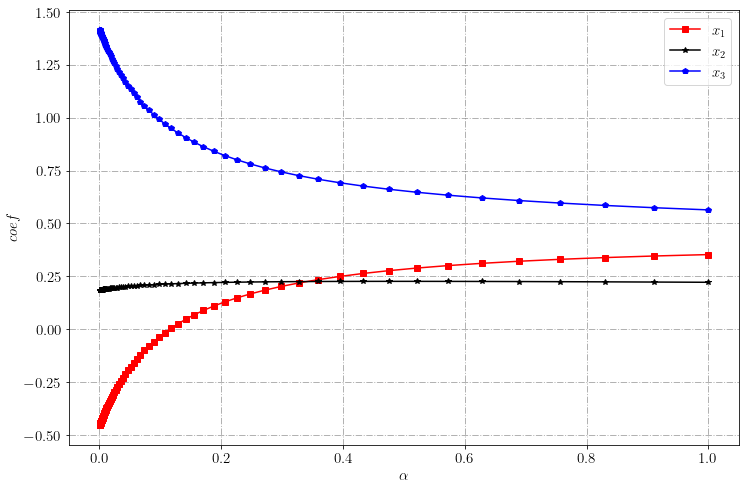

最优岭参数= 0.001788649529057435
标准化数据的所有回归系数为： [0.25175125 0.2261851  0.6902453 ]
Mean:
 [198.30909091   3.3        139.73636364  21.89090909] 
 ------------------------------------------------------------
Std:
 [27.90890376  1.64924225 20.63440199  4.54366692] 
 ------------------------------------------------------------
原数据的回归系数为： [-9.532026187037488, array([0.04098598, 0.62314057, 0.15199106])]
拟合优度： 0.9843368597895964


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV # Ridge求解岭回归
from scipy.stats import zscore

plt.rc('text', usetex=True) # 需要安装LaTeX宏包
plt.rc('axes',unicode_minus=False)

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

n = a.shape[1] - 1 # 自变量的总个数
aa = zscore(a) # 数据标准化
print("数据标准化:\n", aa, '\n', '-'*60)

x = aa[:, :n] # 标准化后的自变量观测值
y = aa[:, n] # 标准化后的因变量观测值

b = [] # 用于存储回归系数的空列表
kk = np.logspace(-4, 0, 100) # 循环迭代的不同k值，k即岭参数
print('kk:\n', kk, '\n', '-'*60)
for k in kk:
    model = Ridge(alpha=k).fit(x, y)
    b.append(model.coef_)
print('b:\n', b, '\n', '-'*60)

st = ['s-r', '*-k', 'p-b'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

modelCV = RidgeCV(alphas=np.logspace(-4, 0, 100)).fit(x, y)
print('最优岭参数=', modelCV.alpha_)
# model0 = Ridge(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过RidgeCV函数求出的最优岭参数拟合出的x_1系数为负，最终主观确定k=0.4
model0 = Ridge(0.4).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = np.mean(a, axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = np.std(a, axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

### 3.LASSO回归
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{1}$达到最小值

#### （1）数学原理简介
多元回归中的普通最小二乘法是拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}$达到最小值。岭回归是选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{2}^{2}$达到最小值，解决了$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不可逆的问题。LASSO回归，是选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得
\begin{equation}
J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{1}
\tag{(7)}
\end{equation}
达到最小值，其中$k\|\boldsymbol{\beta}\|_{1}$为目标函数的**惩罚项**，$k$为**惩罚系数**。
由于式(7)中的惩罚项是关于回归系数$\beta$的绝对值之和，因此惩罚项在零点处是不可导的，那么应用在岭回归上的最小二乘法在此失效，不仅如此，梯度下降法、牛顿法与拟牛顿法都无法计算出LASSO回归的拟合系数。**坐标下降法**可以求得LASSO回归系数，坐标下降法与梯度下降法类似，都属于迭代算法，所不同的是坐标轴下降法是沿着坐标轴下降，而梯度下降法则是沿着梯度的负方向下降，具体的数学原理这里就不介绍了。
由于拟合LASSO回归模型参数时，使用的损失函数(机器学习中的用语)式(7)中包含惩罚系数$k$，因此在计算模型回归系数之前，仍然需要得到最理想的$k$值。与岭回归模型类似，$k$值的确定可以通过**定性的可视化方法**。

#### （2）例题
**例** 求"多重线性关系"一节中法国经济问题的LASSO回归方程.
**解** 画出的$k$与LASSO回归系数的关系图如下图所示，从图中可以看出选$k=0.21$较好。对应的标准化LASSO回归方程为
$$
\hat{y}^{*}=0.0136 x_{2}^{*}+0.7614 x_{3}^{*}
$$
将标准化回归方程还原后得
$$
\hat{y}=-1.6602+0.0374 x_{2}+0.1677 x_{3}
$$

数据标准化:
 [[-1.84174802  0.5723404  -1.6080184  -1.38287391]
 [-1.00747819  0.50874702 -1.26746968 -1.26745955]
 [-0.8571593  -0.12718675 -0.84051307 -0.66730486]
 [-0.65798677 -0.12718675 -0.65244885 -0.64422199]
 [-0.28594752 -1.3990543  -0.38814237 -0.71347061]
 [ 0.14246131 -0.69952715 -0.10350463 -0.34414465]
 [ 0.14246131 -0.76312053  0.31836916  0.18676142]
 [ 0.52953245  1.46264768  0.73007732  1.06391058]
 [ 1.04437464  1.08108742  1.1468683   1.43323655]
 [ 1.26233703  1.14468079  1.24852463  1.31782218]
 [ 1.52915306 -1.65342781  1.41625759  1.01774484]] 
 ------------------------------------------------------------
kk:
 [1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e

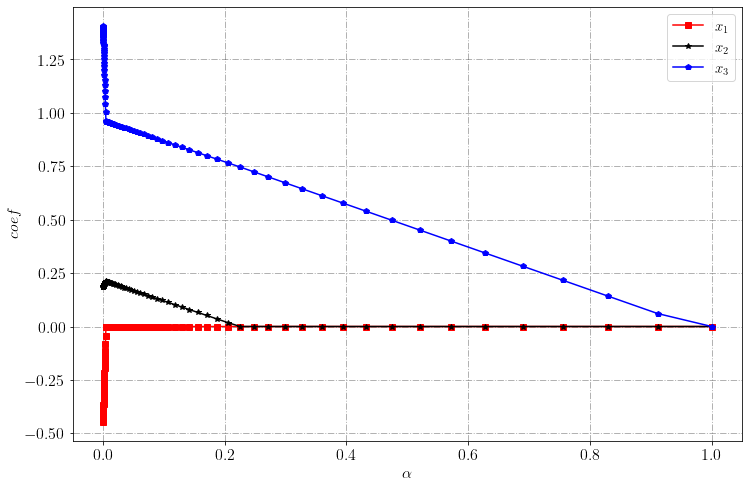

标准化数据的所有回归系数为： [0.13344616 0.22177235 0.81666756]
Mean:
 [198.30909091   3.3        139.73636364  21.89090909] 
 ------------------------------------------------------------
Std:
 [27.90890376  1.64924225 20.63440199  4.54366692] 
 ------------------------------------------------------------
原数据的回归系数为： [-9.562361191275148, array([0.0217255 , 0.61098343, 0.17982907])]
拟合优度： 0.9880416699415154


In [65]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import zscore

plt.rc('font',size=16)
plt.rc('text', usetex=True)  # 需要安装LaTeX宏包

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

n = a.shape[1] - 1 # 自变量的总个数
aa = zscore(a) # 数据标准化
print("数据标准化:\n", aa, '\n', '-'*60)

x = aa[:, :n] # 标准化后的自变量观测值
y = aa[:, n] # 标准化后的因变量观测值

b = [] # 用于存储回归系数的空列表
kk = np.logspace(-4, 0, 100) # 循环迭代的不同k值，k即惩罚系数
print('kk:\n', kk, '\n', '-'*60)
for k in kk:
    model = Lasso(alpha=k).fit(x, y)
    b.append(model.coef_)
print('b:\n', b, '\n', '-'*60)

st = ['s-r', '*-k', 'p-b'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

# model0 = Ridge(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过LassoCV函数求出的最优岭参数拟合出的系数可能不合适
model0 = Ridge(0.21).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = np.mean(a, axis=0) # Mean = a.mean(axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = np.std(a, axis=0, ddof=1) # Std = a.std(axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

**例** 在建立中国私人轿车拥有量模型时，主要考虑以下因素: (1)城镇居民家庭人均可支配收入$x_{1}$(元)，(2)全国城镇人口$x_{2}$(亿人)，(3)全国汽车产量$x_{3}$(万辆)，(4)全国公路长度 $x_{4}$(万千米)。具体数据见下表，其中$y$表示中国私人轿车拥有量(万辆)。试建立$y$的经验公式。
对于上述问题，可以直接用普通的最小二乘法建立$y$关于四个解释变量$x_{1}, x_{2}$, $x_{3}$和$x_{4}$的回归方程为
$$
\hat{y}=-1028.4134-0.0159 x_{1}+245.6120 x_{2}+1.6316 x_{3}+2.0294 x_{4}
$$
模型的检验见下面程序运行结果，这里就不具体给出了。

表 $1994 \sim 2002$年中国私人轿车拥有量及相关变量数据

\begin{array}{cccclc}
\hline 年份 & x_{1} & x_{2} & x_{3} & x_{4} & y \\
\hline 1994 & 3496.2 & 3.43 & 136.69 & 111.78 & 205.42 \\
1995 & 4283 & 3.52 & 145.27 & 115.7 & 249.96 \\
1996 & 4838.9 & 3.73 & 147.52 & 118.58 & 289.67 \\
1997 & 5160.3 & 3.94 & 158.25 & 122.64 & 358.36 \\
1998 & 5425.1 & 4.16 & 163 & 127.85 & 423.65 \\
1999 & 5854 & 4.37 & 183.2 & 135.17 & 533.88 \\
2000 & 6280 & 4.59 & 207 & 140.27 & 625.33 \\
2001 & 6859.6 & 4.81 & 234.17 & 169.8 & 770.78 \\
2002 & 7702.8 & 5.02 & 325.1 & 176.52 & 968.98 \\
\hline
\end{array}
在$\alpha=0.05$的水平下，以上的回归方程是显著的。但变量$x_{1}$对$y$是不显著的，且回归方程中$x_{1}$前面的系数为负值也不合理。
选择$k=0.05$，建立的LASSO回归方程为
$$
\hat{y}=-908.2059+203.0938 x_{2}+1.4562 x_{3}+2.0469 x_{4}
$$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.14e-06
Time:                        13:45:33   Log-Likelihood:                -28.919
No. Observations:                   9   AIC:                             67.84
Df Residuals:                       4   BIC:                             68.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1028.4134     58.305    -17.638      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


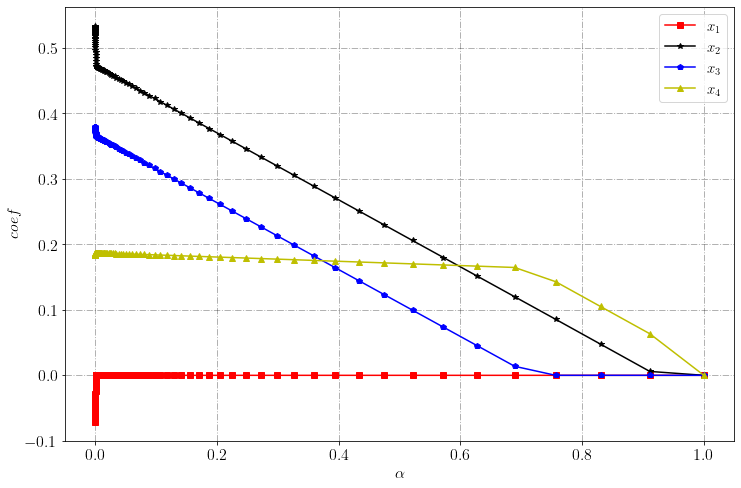

标准化数据的所有回归系数为： [0.         0.44723893 0.34045523 0.18555833]
Mean:
 [5.54443333e+03 4.17444444e+00 1.88911111e+02 1.35367778e+02
 4.91781111e+02] 
 ------------------------------------------------------------
Std:
 [1.29764931e+03 5.66240035e-01 6.01164596e+01 2.33096057e+01
 2.57132957e+02] 
 ------------------------------------------------------------
原数据的回归系数为： [-908.2058953990941, array([  0.        , 203.09384921,   1.45621116,   2.04693134])]
拟合优度： 0.9965807211503689


In [66]:
import numpy as np; import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from scipy.stats import zscore

plt.rc('font',size=16)
plt.rc('text', usetex=True)  # 需要安装LaTeX宏包

a = np.array([[3496.2, 3.43, 136.69, 111.78, 205.42],
              [4283,   3.52, 145.27, 115.7,  249.96],
              [4838.9, 3.73, 147.52, 118.58, 289.67],
              [5160.3, 3.94, 158.25, 122.64, 358.36],
              [5425.1, 4.16, 163,    127.85, 423.65],
              [5854,   4.37, 183.2,  135.17, 533.88],
              [6280,   4.59, 207,    140.27, 625.33],
              [6859.6, 4.81, 234.17, 169.8,  770.78],
              [7702.8, 5.02, 325.1,  176.52, 968.98]
])

n = a.shape[1] - 1 # 自变量的总个数

x = a[:, :n]  # 提出自变量观测值矩阵
X = sm.add_constant(x)
md = sm.OLS(a[:, n],X).fit() # 构建并拟合模型
print(md.summary())  #输出模型的所有结果

aa = zscore(a)  #数据标准化
x = aa[:, :n]
y = aa[:, n]  # 提出自变量和因变量观测值矩阵
b=[]  # 用于存储回归系数的空列表
kk = np.logspace(-4,0,100)  # 循环迭代的不同k值
for k in kk:
    md = Lasso(alpha=k).fit(x, y)
    b.append(md.coef_)

st = ['s-r','*-k','p-b','^-y'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(n):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$', '$x_4$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

# model0 = Lasso(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过LassoCV函数求出的最优岭参数拟合出的系数可能不合适
model0 = Lasso(0.05).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = a.mean(axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = a.std(axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

#### （3）推广

从上面的讨论可以看到，线性回归模型使用简便，在很多领域都得到了有效的应用。但在实际应用中还会碰到很多**非线性回归模型**，一般的非线性回归模型我们就不介绍了，把非线性回归模型看成拟合一个**非线性函数**就可以了。
前面的多元线性回归模型是假设因变量$y$被建模为自变量$x_{1}, x_{2}, \cdots, x_{m}$的线性组合。但是，我们可以放宽这个假设，拟合一个更为广义的线性模型；可以用一个链接(link)函数$G$来替换公式
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon
$$
将非线性输出转换为一个线性的响应
$$
G(y)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon
$$
链接函数$G(y)$有很多取法，例如:
(1)$G(y)=\ln \frac{y}{1-y}$，把0到1范围之间的响应映射到一个线性坐标上，其中$y$通常是一个0到1之间的概率值。
(2)$G(y)=\ln (y)$，把计数值转换成线性输出，其中$y$为计数值。

### 4.Tao
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{0}$达到最小值。
实际问题用前几种回归模型即可。

## （三）Logistic回归
下面只介绍广义线性回归中的Logistic回归

### 1.Logistic回归模型
#### （1）模型的构建
Logistic回归，与普通回归任务不同，分类的结果输出是**有限的离散值**。以二分类为例，结果输出要么为0，要么为1，即$y \in\{0,1\}$。其基本思想是在空间中构造一个合理的超平面，把空间区域划分为两个子空间，每一种类别数据都在平面的某一侧。不能按照多元线性回归式
\begin{equation}
f(\boldsymbol{x})=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}
\tag{(8)}
\end{equation}
来分类，因为直接使用式(8)得到的是实数值，需要将实数值规约为0或1，较理想的是**阶跃函数**
\begin{equation}
f(\boldsymbol{x})=
\begin{cases}
0, & \beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m} \leqslant 0\\
1, & \beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}>0
\end{cases}
\tag{(9)}
\end{equation}
但阶跃函数在0点不连续、不可导。为此，可以通过**阶跃函数的平滑版本**，即**Sigmoid函数**来为我们实现：
\begin{equation}
f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}\right)}}
\tag{(10)}
\end{equation}
其中，$\boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}}$。
Sigmoid函数具有很多优秀的性质：它将输入数据压缩至0到1的范围内，得到的结果不是二值输出，而是一个概率值，通过这个数值，可以确定输入数据分别属于0类或属于1类的概率：
\begin{equation}
P\{y=1 \mid \boldsymbol{x}\}=f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}{1+e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}=p
\tag{(11)}
\end{equation}
\begin{equation}
P\{y=0 \mid \boldsymbol{x}\}=1-f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{1}{1+e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}=1-p .
\tag{(12)}
\end{equation}
由式(11)和(12)可以得到
\begin{equation}
\ln \frac{p}{1-p}=\ln \frac{P\{y=1 \mid \boldsymbol{x}\}}{P\{y=0 \mid \boldsymbol{x}\}}=\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}
\tag{(13)}
\end{equation}
式(13)称为**Logistic回归模型**，式(13)的左边是与概率相关的对数值。因此，无法使用通常的最小二乘法拟合末知参数向量$\beta$，而是采用**极大似然估计法**。
式(13)也可以改写为
\begin{equation}
p=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}\right)}},
\tag{(14)}
\end{equation}
其中，$p$为事件发生的概率。

#### （2）Logistic模型的参数估计

为了构造似然函数，把式(11)和(12)统一改写为
\begin{equation}
P\{y \mid \boldsymbol{x} ; \boldsymbol{\beta}\}=f_{\boldsymbol{\beta}}(\boldsymbol{x})^{y}\left(1-f_{\boldsymbol{\beta}}(\boldsymbol{x})\right)^{1-y}, \quad y=0 \text { 或 } 1 .
\tag{(15)}
\end{equation}
为了拟合模型中的末知参数向量$\beta$，使用**极大似然估计法**，需要构造似然函数。似然函数的统计背景是，如果数据集$\left\{\left(\boldsymbol{x}_{i}, y_{i}\right), i=1,2, \cdots, n\right\}$中每个样本点都是相互独立的，则$n$个样本点发生的联合概率就是各样本点事件发生的概率乘积，故似然函数可以表示为
$$
L(\boldsymbol{\beta})=\prod_{i=1}^{n} P\left\{y_{i} \mid \boldsymbol{x}_{i} ; \boldsymbol{\beta}\right\}=\prod_{i=1}^{n}\left[f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)^{y_{i}}\left(1-f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)\right)^{1-y_{i}}\right]
$$
为了求解方便，将似然函数做对数处理，得到
\begin{equation}
\tilde{L}(\boldsymbol{\beta})=\sum_{i=1}^{n}\left[y_{i} \ln f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)+\left(1-y_{i}\right) \ln \left(1-f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)\right)\right]
\tag{(16)}
\end{equation}
拟合参数向量$\boldsymbol{\beta}$，转化为求函数$\tilde{L}(\boldsymbol{\beta})$的最大值，无法求得其解析解，只能求**数值解**，可以使用经典的**梯度下降算法**求解参数向量 $\boldsymbol{\beta}$，具体算法这里就不给出了。下面给出在分组数据情形下参数向量$\beta$的最小二乘估计。

#### （3）分组数据情形下参数的最小二乘估计

在对因变量进行的$n$次观测$y_{i}, i=1,2, \cdots, n$中，如果在相同的$\boldsymbol{x}_{(i)}=\left[x_{i 1}\right.$, $\left.x_{i 2}, \cdots, x_{i m}\right]^{\mathrm{T}}$处进行了多次重复观测，这种结构的数据称为**分组数据**，分组个数记为$c$，则在式(13)中可用样本比例对概率$p$进行估计，对应$\boldsymbol{x}_{(i)}$的概率估计值记作 $\hat{p}_{i}$，并记
\begin{equation}
y_{i}^{*}=\ln \left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right), \quad i=1,2, \cdots, c
\tag{(17)}
\end{equation}
则得
$$
y_{i}^{*}=\beta_{0}+\sum_{j=1}^{p} \beta_{j} x_{i j}, \quad i=1,2, \cdots, c
$$
由线性回归模型的知识可知，参数$\boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}}$的最小二乘估计为
\begin{equation}
\hat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{y}^{*},
\tag{(18)}
\end{equation}
其中
$$
\boldsymbol{y}^{*}=\left[\begin{array}{c}
y_{1}^{*} \\
y_{2}^{*} \\
\vdots \\
y_{c}^{*}
\end{array}\right], \quad \boldsymbol{X}=\left[\begin{array}{cccc}
1 & x_{11} & \cdots & x_{1 m} \\
1 & x_{21} & \cdots & x_{2 m} \\
\vdots & \vdots & & \vdots \\
1 & x_{c 1} & \cdots & x_{c m}
\end{array}\right] .
$$

下面用一个例子来说明分组数据Logistic回归模型的参数估计。
**例** 在一次住房展销会上，与房地产商签订初步购房意向书的共有$n=$325名顾客，在随后的3个月时间内，只有一部分顾客确实购买了房屋。购买了房屋的顾客记为1，没有购买房屋的顾客记为0。以顾客的家庭年收入为自变量$x$，家庭年收入按照高低不同分成了9组，数据列在下表中。下表还列出了在每个不同的家庭年收入组中签订意向书的人数$n_{i}$和相应的实际购房人数$m_{i}$。房地产商希望能建立签订意向的顾客最终真正买房的概率与家庭年收入间的关系式，以便能分析家庭年收入的不同对最终购买住房的影响。

\begin{array}{cccccc}
\hline 序号 & 家庭年收入 & 签订意向书人数 & 实际购房人数 & 实际购房比例 & 逻辑变换 \\
& x / 万元 & n_{i} & m_{i} & \hat{p}_{i}=\frac{m_{i}}{n_{i}} & y_{i}^{*}=\ln \left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right) \\
\hline 1 & 1.5 & 25 & 8 & 0.32 & -0.7538 \\
2 & 2.5 & 32 & 13 & 0.4063 & -0.3795 \\
3 & 3.5 & 58 & 26 & 0.4483 & -0.2076 \\
4 & 4.5 & 52 & 22 & 0.4231 & -0.3102 \\
5 & 5.5 & 43 & 20 & 0.4651 & -0.1398 \\
6 & 6.5 & 39 & 22 & 0.5641 & 0.2578 \\
7 & 7.5 & 28 & 16 & 0.5714 & 0.2877 \\
8 & 8.5 & 21 & 12 & 0.5714 & 0.2877 \\
9 & 9.5 & 15 & 10 & 0.6667 & 0.6931 \\
\hline
\end{array}

**解** 显然，这里的因变量是0-1型的伯努利随机变量，因此可通过Logistic回归来建立签订意向的顾客最终真正买房的概率与家庭年收入之间的关系。由于上表中，对应同一个家庭年收入组有多个重复观测值，因此可用样本比例来估计第$i$个家庭年收入组中客户最终购买住房的概率$p_{i}$，其估计值记为$\hat{p}_{i}$。然后，对$\hat{p}_{i}$进行逻辑变换。$\hat{p}_{i}$的值及其经逻辑变换后的值$y_{i}^{*}$都列在上表中.
本例中，自变量个数$m=1$，分组数$c=9$，由(18)式计算可得$\beta_{0}, \beta_{1}$的最小二乘估计分别为
$$
\hat{\beta}_{0}=-0.8863, \quad \hat{\beta}_{1}=0.1558
$$
相应的线性回归方程为
$$
\hat{y}^{*}=-0.8863+0.1558 x
$$
决定系数$R^{2}=0.924, F$统计量$=85.42$，显著性检验$p \approx 0$，线性回归方程高度**显著**。最终所得的Logistic回归方程为
\begin{equation}
\hat{p}=\frac{1}{1+e^{0.8863-0.1558 x}}
\tag{(19)}
\end{equation}
由(19)式可知，$x$越大，即家庭年收入越高，$\hat{p}$就越大，即签订意向后真正买房的概率就越大。对于一个家庭年收入为9万元的客户，将$x=x_{0}=9$代入回归方程(19)中，即可得其签订意向后真正买房的概率
$$
\hat{p}_{0}=\frac{1}{1+e^{0.8863-0.1558 x_{0}}}=0.6262
$$
这也可以说，约有$62.62 \%$的家庭年收入为9万元的客户，其签订意向后会真正买房。




In [68]:
import numpy as np
import statsmodels.api as sm

a = np.array([[1.5, 25, 8 ],
              [2.5, 32, 13],
              [3.5, 58, 26],
              [4.5, 52, 22],
              [5.5, 43, 20],
              [6.5, 39, 22],
              [7.5, 28, 16],
              [8.5, 21, 12],
              [9.5, 15, 10]
])

x = a[:, 0]
pi = a[:,2]/a[:,1]
X = sm.add_constant(x)
yi = np.log(pi/(1 - pi))
model = sm.OLS(yi,X).fit()  #构建并拟合模型
print(model.summary())  #输出模型的所有结果
b = model.params  #提出所有的回归系

# 计算年收入对应概率
money = 9
p0 = 1/(1 + np.exp(-np.dot(b, [1, money])))
print("年收入为{}万元时确定购房所的概率为{:.4f}".format(money, p0))
# np.savetxt("Pdata12_7_2.txt", b)  #把回归系数保存到文本文件

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     85.42
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.59e-05
Time:                        13:46:00   Log-Likelihood:                 6.6829
No. Observations:                   9   AIC:                            -9.366
Df Residuals:                       7   BIC:                            -8.971
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8863      0.102     -8.653      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


### 2.Logistic回归模型的应用

#### （1）Logistic模型的参数解释
在流行病学中，经常需要研究某一疾病发生与不发生的可能性大小，如一个人得流行性感冒相对于不得流行性感冒的可能性是多少，对此常用**赔率**来度量。赔率的具体定义如下：
**定义** 一个随机事件$A$发生的概率与其不发生的概率之比值称为事件$A$的**赔率**，记为$\operatorname{odds}(A)$，即$\operatorname{odds}(A)=\frac{P(A)}{P(\bar{A})}=\frac{P(A)}{1-P(A)}$.
如果一个事件$A$发生的概率$P(A)=0.75$，则其不发生的概率$P(\bar{A})=1-$ $P(A)=0.25$，所以事件$A$的赔率$\operatorname{odds}(A)=\frac{0.75}{0.25}=3$。这就是说，事件$A$发生与不发生的可能性是$3: 1$。粗略地讲，即在4次观测中有3次事件$A$发生而有一次$A$不发生。例如，事件$A$表示 “投资成功”，那么$\operatorname{odds}(A)=3$即表示投资成功的可能性是投资不成功的3倍。又例如，事件$B$表示“客户理赔事件”，且已知$P(B)=0.25$，则$P(\bar{B})=0.75$，从而事件$B$的赔率$\operatorname{odds}(B)=\frac{1}{3}$，这表明发生客户理赔事件的风险是不发生的$\frac{1}{3}$。用赔率可很好地度量一些经济现象发生与否的可能性大小。
仍以上述“客户理赔事件”为例，有时还需要研究某一群客户相对于另一群客户发生客户理赔事件的风险大小，如职业为司机的客户群相对于职业为教师的客户群发生客户理赔事件的风险大小，这需要用到赔率比的概念。
**定义** 随机事件$A$的赔率与随机事件$B$的赔率之比值称为**事件$A$对事件$B$的赔率比**，记为$\operatorname{OR}(A, B)$，即$\operatorname{OR}(A, B)=\operatorname{odds}(A) / \operatorname{odds}(B)$。
若记$A$是职业为司机的客户发生理赔事件，记$B$是职业为教师的客户发生理赔事件，又已知$\operatorname{odds}(A)=\frac{1}{20}, \operatorname{odds}(B)=\frac{1}{30}$，则事件$A$对事件$B$的赔率比$\operatorname{OR}(A, B)=\operatorname{odds}(A) / \operatorname{odds}(B)=1.5$。这表明职业为司机的客户发生理赔的赔率是职业为教师的客户的$1.5$倍。
应用Logistic回归可以方便地估计一些事件的赔率及多个事件的赔率比。下面仍以上例客户购房来说明Logistic回归在这方面的应用。

**例** 房地产商希望能估计出一个家庭年收入为9万元的客户签订意向后最终买房与不买房的可能性大小之比值，以及一个家庭年收入为9万元的客户签订意向后最终买房的赔率是年收入为8万元客户的多少倍。
**解** 由上例中所得的模型(19)得
$$
\ln \left(\frac{\hat{p}}{1-\hat{p}}\right)=-0.8863+0.1558 x
$$
因此
\begin{equation}
\frac{\hat{p}}{1-\hat{p}}=e^{-0.8863+0.1558 x}
\tag{(20)}
\end{equation}
将$x=x_{0}=9$代入上式，得一个家庭年收入为9万元的客户签订意向后最终买房与不买房的可能性大小之比值为
$$
\text { odds (年收入 } 9 \text { 万) }=\frac{\hat{p}_{0}}{1-\hat{p}_{0}}=e^{-0.8863+0.1558 \times 9}=1.6752
$$
这说明一个家庭年收入为9万元的客户签订意向后最终买房的可能性是不买房的可能性的$1.6752$倍.
另外，由(20)式还可得
$$
\mathrm{OR}\left(\text {年收入} 9 \text {万元，年收入 } 8 \text {万元} \right) = \frac{e^{-0.8863+0.1558 \times 9}}{e^{-0.8863+0.1558 \times 8}}=1.1686
$$
所以一个家庭年收入为9万元的客户其签订意向后最终买房的赔率是年收入为8万元客户的$1.1686$倍。

In [69]:
# 首先运行上例代码，将model参数导入python
odds9 = np.exp(np.dot(b, [1, 9]))
odds9vs8 = np.exp(np.dot([1, 9], b)) / np.exp(np.dot([1, 8], b))
print("odds9={:.4f}\nodds9vs8={:.4f}".format(odds9, odds9vs8))

odds9=1.6752
odds9vs8=1.1686


一般地，如果Logistic模型(13)的参数估计为$\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{m}$，则在$x_{1}=x_{01}$, $x_{2}=x_{02}, \cdots, x_{m}=x_{0 m}$条件下事件赔率的估计值为
$$
\frac{\hat{p}_{0}}{1-\hat{p}_{0}}=e^{\hat{\beta}_{0}+\sum_{j=1}^{m} \hat{\beta}_{j} x_{0 j}}
$$

如果记$\boldsymbol{X}_{A}=\left[1, x_{A 1}, x_{A 2}, \cdots, x_{A m}\right]^{\mathrm{T}}, \boldsymbol{X}_{B}=\left[1, x_{B 1}, x_{B 2}, \cdots, x_{B m}\right]^{\mathrm{T}}$，并将相应条件下的事件仍分别记为$\boldsymbol{X}_{A}$和$\boldsymbol{X}_{B}$，则事件$\boldsymbol{X}_{A}$对事件$\boldsymbol{X}_{B}$的赔率比的估计可由下式获得
$$
\operatorname{OR}\left(\boldsymbol{X}_{A}, \boldsymbol{X}_{B}\right)=e^{\sum_{j=1}^{m} \hat{\beta}_{j}\left(x_{A j}-x_{B j}\right)}
$$


#### （2）用statsmodels库函数求解
**例** 企业到金融商业机构贷款，金融商业机构需要对企业进行评估。评估结果为0,1两种形式，0表示企业两年后破产，将拒绝贷款；而1表示企业两年后具备还款能力，可以贷款。下表中，已知前20家企业的三项评价指标值和评估结果，试建立模型对其他两家企业(企业21, 22)进行评估。

表 企业还款能力评价表

\begin{array}{crrrrr}
\hline
企业编号 & x_{1} & x_{2} & x_{3} & y & y 的预溂值 \\
\hline
1  & -62.3  & -89.5 & 1.7 & 0 & 0 \\
2  & 3.3    & -3.5  & 1.1 & 0 & 0 \\
3  & -120.8 & -103.2& 2.5 & 0 & 0 \\
4  & -18.1  & -28.8 & 1.1 & 0 & 0 \\
5  & -3.8   & -50.6 & 0.9 & 0 & 0 \\
6  & -61.2  & -56.2 & 1.7 & 0 & 0 \\
7  & -20.3  & -17.4 & 1   & 0 & 0 \\
8  & -194.5 & -25.8 & 0.5 & 0 & 0 \\
9  & 20.8   & -4.3  & 1   & 0 & 0 \\
10 & -106.1 & -22.9 & 1.5 & 0 & 0 \\
11 & 43     & 16.4  & 1.3 & 1 & 1 \\
12 & 47     & 16    & 1.9 & 1 & 1 \\
13 & -3.3   & 4     & 2.7 & 1 & 1 \\
14 & 35     & 20.8  & 1.9 & 1 & 1 \\
15 & 46.7   & 12.6  & 0.9 & 1 & 1 \\
16 & 20.8   & 12.5  & 2.4 & 1 & 1 \\
17 & 33     & 23.6  & 1.5 & 1 & 1 \\
18 & 26.1   & 10.4  & 2.1 & 1 & 1 \\
19 & 68.6   & 13.8  & 1.6 & 1 & 1 \\
20 & 37.3   & 33.4  & 3.5 & 1 & 1 \\
21 & -49.2  & -17.2 & 0.3 & & 0 \\
22 & 40.6   & 26.4  & 1.8 & & 1 \\
\hline
\end{array}
**解** 对于该问题，可以用Logistic模型来求解。建立如下的Logistic回归模型
$$
p=P\{y=1\}=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{j}\right)}}
$$
记$x_{i j}(i=1,2, \cdots, 20 ; j=1,2,3)$分别为变量$x_{j}(j=1,2,3)$的20个观测值，$y_{i}(i=1,2, \cdots, 20)$是20个$y$的观测值。
使用最大似然估计法，求模型中的参数$\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}$，即求参数$\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}$使得似然函数
$$
\ln L(\boldsymbol{\beta})=\sum_{i=1}^{20}\left[y_{i}\left(\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{i j}\right)-\ln \left(1+e^{\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{i j}}\right)\right]
$$
达到最大值。
利用Python的statsmodels库函数求得
$$
\beta_{0}=0, \quad \beta_{1}=-0.3497, \quad \beta_{2}=3.2290, \quad \beta_{3}=2.2372
$$
因而得到的Logistic回归模型为
$$
\left\{
\begin{aligned}
p &=\frac{1}{1+e^{-\left(-0.3497 x_{1}+3.2290 x_{2}+2.2372 x_{3}\right)}}, \\
y &=
\begin{cases}
0, & p \leqslant 0.5, \\
1, & p>0.5
\end{cases}
\end{aligned}
\right.
$$
利用已知数据对上述Logistic模型进行检验，准确率达到100\%，说明模型的准确率较高，可以用来预测新企业的还款能力。两个新企业的预测结果见上表的最后1列，即企业21拒绝贷款，企业22可以贷款。

**例** 使用sklearn库函数求解上例
**解** 求得的Logistic回归模型为、
$$
\left\{
\begin{aligned}
p &=\frac{1}{1+e^{-\left(-0.3906 - 0.0507 x_{1} + 0.6707 x_{2} + 0.1051 x_{3}\right)}}, \\
y &=
\begin{cases}
0, & p \leqslant 0.5, \\
1, & p>0.5
\end{cases}
\end{aligned}
\right.
$$
利用已知数据对上述Logistic模型进行检验准确率达到100\%，说明模型的准确率较高，可以用来预测新企业的还款能力。两个新企业的预测结果为：企业21拒绝贷款，企业22可以贷款。

In [70]:
import numpy as np
from sklearn.linear_model import LogisticRegression

a=np.array([[-62.3,  -89.5,  1.7, 0],
            [3.3,    -3.5,   1.1, 0],
            [-120.8, -103.2, 2.5, 0],
            [-18.1,  -28.8,  1.1, 0],
            [-3.8,   -50.6,  0.9, 0],
            [-61.2,  -56.2,  1.7, 0],
            [-20.3,  -17.4,  1,   0],
            [-194.5, -25.8,  0.5, 0],
            [20.8,   -4.3,   1,   0],
            [-106.1, -22.9,  1.5, 0],
            [43,      16.4,  1.3, 1],
            [47,      16,    1.9, 1],
            [-3.3,     4,    2.7, 1],
            [35,      20.8,  1.9, 1],
            [46.7,    12.6,  0.9, 1],
            [20.8,    12.5,  2.4, 1],
            [33,      23.6,  1.5, 1],
            [26.1,    10.4,  2.1, 1],
            [68.6,    13.8,  1.6, 1],
            [37.3,    33.4,  3.5, 1]
])

n = a.shape[1] # 提取矩阵的列数
x = a[:, :n-1]
y = a[:, n-1]
model = LogisticRegression(solver='lbfgs').fit(x,y)
print('拟合系数beta：\nbeta0={}\nbeta1={}\nbeta2={}\nbeta3={}'.format(model.intercept_[0], model.coef_[0, 0], model.coef_[0, 1], model.coef_[0, 2]))
print(model.predict(x)) # 检验预测模型
print(model.predict([[-49.2,-17.2,0.3],[40.6,26.4,1.8]]))  #求预测值


拟合系数beta：
beta0=-0.39060121488206745
beta1=-0.05073412418520253
beta2=0.6707101492837787
beta3=0.10511888390427564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1.]


# 九、评价模型
在实际应用中, 经常遇到有关综合评价问题, 如医疗质量和环境质量的综合评价等. 所谓综合评价是指根据一个系统同时受到多种因素影响的特点, 在综合考察多个有关因素, 依据多个相关指标对系统进行总评价的方法. 目前, 已经提出了很多综合评价的方法, 如TOPSIS方法、层次分析法、模糊综合评价法、灰色系统法等. 这些方法各具特色也各有利弊, 由于受到多方面因素的影响, 如何使评价更准确和更科学, 一直是人们不断研究的课题. 本章介绍一些常用的评价方法的基本原理、主要步骤以及它们在实际中的应用.


## 9.1 综合评价的基本理论和数据预处理
### 9.1.1 综合评价的基本概念
一般地, 一个综合评价问题是由评价对象、评价指标、权重系数、综合评价模型和评价者五个基本要素组成.

1.评价对象
评价对象就是综合评价问题中所研究的对象, 或称为系统. 通常情况下, 在一个问题中评价对象是属于同一类的, 且个数要大于1, 不妨假设一个综合评价问题中有$n$个评价对象, 分别记为$S_1, S_2, \cdots, S_n(n>1)$.

2.评价指标
评价指标是反映评价对象的运行 (或发展) 状况的基本要素. 通常的问题都是有多项指标构成, 每一项指标都是从不同的侧面刻画系统所具有某种特征大小的一个度量.
一个综合评价问题的评价指标一般可用一个向量 $x$ 表示, 称为评价指标向量, 其中每一个分量就是从一个侧面反映系统的状态; 也称为综合评价的指标体系. 在建立评价指标体系时, 一般应遵循以下原则: (1) 系统性; (2) 独立性; (3) 可 观测性; (4) 科学性; (5) 可比性. 不失一般性, 设系统有 $m$ 个评价指标, 分别记为 $x_1, x_2, \cdots, x_m(m>1)$, 即评价指标向量为 $\boldsymbol{x}=\left[x_1, x_2, \cdots, x_m\right]$.

3.权重系数
每一个综合评价问题都有相应的评价目的, 针对某种评价目的, 各评价指标之间的相对重要性是不同的, 评价指标之间的这种相对重要性的大小, 可用权重系数来刻画. 如果用 $w_j(j=1,2, \cdots, m)$ 来表示评价指标 $x_j$ 的权重系数, 一般应满足
$$
w_j \geqslant 0, \quad j=1,2, \cdots, m \text { 且 } \sum_{j=1}^m w_j=1 .
$$
当各评价对象和评价指标值都确定以后, 综合评价结果就依赖于权重系数的取值了, 即权重系数确定的合理与否, 直接关系到综合评价结果的可信度, 甚至影响到最后决策的正确性. 因此, 权重系数的确定要特别谨慎, 应按一定的方法和原则来确定.

4.综合评价模型
对于多指标 (或多因素) 的综合评价问题, 就是要通过建立一定的数学模型将 多个评价指标值综合成为一个整体的综合评价值, 作为综合评价的依据, 从而得到相应的评价结果.
不妨假设第 $i(i=1,2, \cdots, n)$ 个评价对象的 $m$ 个评价指标值构成的向量为 $\boldsymbol{a}_i=\left[a_{i 1}, a_{i 2}, \cdots, a_{i m}\right]$, 指标权重向量为 $\boldsymbol{w}=\left[w_1, w_2, \cdots, w_m\right]$, 由此构造综合评价模型
$$
y=f(\boldsymbol{x}, \boldsymbol{w}),
$$
并计算出第 $i$ 个评价对象的综合评价值 $b_i=f\left(\boldsymbol{a}_i, \boldsymbol{w}\right)$, 根据 $b_i(i=1,2, \cdots, n)$ 值的大小, 将这 $n$ 个评价对象进行排序或分类, 即得到综合评价结果.

5.评价者
评价者是直接参与评价的人, 可以是一个人, 也可以是一个团体. 对于评价目的的选择、评价指标体系确定、权重系数的确定和评价模型的建立都与评价者有关. 因此, 评价者在评价过程中的作用是不可小视的.

### 9.1.2 综合评价体系的构建
综合评价过程包括评价指标体系的建立、评价指标的预处理、指标权重的确定和评价模型的选择等重要环节. 其中评价指标体系的构建与评价指标的篮选是综合评价的重要基础, 也是做好综合评价的保证.

1.评价指标和评价指标体系
所谓指标就是用来评价系统的参量. 例如, 在校学生规模、教育质量、师资结构、科研水平等, 可以作为评价高等院校综合水平的主要指标. 一般来说, 任何一个 指标都反映和刻画事物的一个侧面.
从指标值的特征来看, 指标可以分为定性指标和定量指标. 定性指标是用定性的语言作为指标描述值. 例如, 旅游景区质量等级有 $5 \mathrm{~A}, 4 \mathrm{~A}, 3 \mathrm{~A}, 2 \mathrm{~A}$ 和 $1 \mathrm{~A}$ 之分, 则旅游景区质量等级是定性指标, 而景区年旅客接待量、门票收入等就是定量指标.
从指标值的变化对评价目的的影响来看, 可以将指标分为以下四类:
(1) 极大型指标 (又称为效益型指标) 是指标值越大越好的指标;
(2) 极小型指标 (又称为成本型指标) 是指标值越小越好的指标;
(3) 居中型指标是指标值既不是越大越好, 也不是越小越好, 而是适中为最好 的指标;
(4) 区间型指标是指标值取在某个区间内为最好的指标.
例如, 在评价企业的经济效益时, 利润作为指标, 其值越大, 经济效益就越好, 这就是效益型指标; 而管理费用作为指标, 其值越小, 经济效益就越好, 所以管理费用是成本型指标. 投标报价既不能太高又不能太低, 其值的变化范围一般是 $(90 \%$, $105 \%) \times$ 标的价, 超过此范围的都将被淘汰, 因此投标报价为区间型指标. 投标工期既不能太长又不能太短, 就是居中型指标.
在实际中, 不论按什么方式对指标进行分类, 不同类型的指标可以通过相应的数学方法进行相互转换. 所谓评价指标体系就是由众多评价指标组成的指标系统. 在指标体系中, 每个指标对系统的某种特征进行度量, 共同形成对系统的完整刻画.

2.评价指标的笼选方法
笑选评价指标, 要根据综合评价的目的, 针对具体的评价对象、评价内容收集有关指标信息, 采用适当的管选方法对指标进行笄选, 合理地选取主要指标, 剔除次要指标, 以简化评价指标体系. 常用的评价指标笄选方法主要有专家调研法、最小均方差法、极大极小离差法等.
1)专家调研法 (Delphi 法)
评价者根据评价目标和评价对象的特征, 首先设计出一系列指标的调查表, 向若干专家咨询和征求对指标的意见, 然后进行统计处理, 并反馈意见处理结果, 经过几轮咨询后, 当专家意见趋于集中时, 将专家意见集中的指标作为评价指标, 从而建立起综合评价指标体系.
2)最小均方差法
对于 $n$ 个评价对象 $S_1, S_2, \cdots, S_n$, 每个评价对象有 $m$ 个指标, 其观测值分 别为
$$
a_{i j} \quad(i=1,2, \cdots, n ; j=1,2, \cdots, m) .
$$
如果 $n$ 个评价对象关于某项指标的观测值都差不多, 那么不管这个评价指标重要与否, 对于这 $n$ 个评价对象的评价结果所起的作用将是很小的. 因此, 在评价过程中就可以删除这样的评价指标.

最小均方差法的筞选过程如下:
(1) 求出第 $j$ 项指标的平均值和均方差
$$
\mu_j=\frac{1}{n} \sum_{i=1}^n a_{i j}, \quad s_j=\sqrt{\frac{1}{n} \sum_{i=1}^n\left(a_{i j}-\mu_j\right)^2}, \quad j=1,2, \cdots, m .
$$
(2) 求出最小均方差
$$
s_{j_0}=\min _{1 \leqslant j \leqslant m}\left\{s_j\right\} .
$$
(3) 如果最小均方差 $s_{j_0} \approx 0$, 则可删除与 $s_{j_0}$ 对应的指标 $x_{j_0}$. 考察完所有指标, 即可得到最终的评价指标体系.
最小均方差法只考虑了指标的差异程度, 容易将重要的指标删除.
3) 极大极小离差法
对于 $n$ 个评价对象 $S_1, S_2, \cdots, S_n$, 每个评价对象有 $m$ 个指标, 其观测值分别为
$$
a_{i j} \quad(i=1,2, \cdots, n ; j=1,2, \cdots, m) .
$$
极大极小离差法的答选过程如下:
(1) 求出第 $j$ 项指标的最大离差
$$
d_j=\max _{1 \leqslant i<k \leqslant n}\left\{\left|a_{i j}-a_{k j}\right|\right\}, \quad j=1,2, \cdots, m .
$$
(2) 求出最小离差
$$
d_{j_0}=\min _{1 \leqslant j \leqslant m}\left\{d_j\right\} .
$$
(3) 如果最小离差 $d_{j_0} \approx 0$, 则可删除与 $d_{j_0}$ 对应的指标 $x_{j_0}$, 考察完所有指标, 即可得到最终的评价指标体系.
常用的评价指标笑选方法还有条件广义方差极小法、极大不相关法等, 详细介绍可参阅相关资料.

### 9.1.3 评价指标的预处理方法
一般情况下, 在综合评价指标中, 各指标值可能属于不同类型、不同单位或不同数量级, 从而使得各指标之间存在着不可公度性, 给综合评价带来了诸多不便. 为了尽可能地反映实际情况, 消除由于各项指标间的这些差别带来的影响, 避免出现不合理的评价结果, 就需要对评价指标进行一定的预处理, 包括对指标的一致化处理和无量纲化处理.

1.指标的一致化处理
所谓一致化处理就是将评价指标的类型进行统一. 一般来说, 在评价指标体系中, 可能会同时存在极大型指标、极小型指标、居中型指标和区间型指标, 它们都具有不同的特点. 若指标体系中存在不同类型的指标, 必须在综合评价之前将评价指标的类型做一致化处理. 例如, 将各类指标都转化为极大型指标或极小型指标. 一般的做法是将非极大型指标转化为极大型指标. 但是, 在不同的指标权重确定方法和评价模型中, 指标一致化处理也有差异.

1)极小型指标化为极大型指标
对极小型指标 $x_j$, 将其转化为极大型指标时, 只需对指标 $x_j$ 取倒数:
$$
x_j^{\prime}=\frac{1}{x_j}
$$
或做平移变换:
$$
x_j^{\prime}=M_j-x_j,
$$
其中 $M_j=\max _{1 \leqslant i \leqslant n}\left\{a_{i j}\right\}$, 即 $n$ 个评价对象第 $j$ 项指标值 $a_{i j}$ 最大者.

2)居中型指标化为极大型指标
对居中型指标 $x_j$, 令 $M_j=\max _{1 \leqslant i \leqslant n}\left\{a_{i j}\right\}, m_j=\min _{1 \leqslant i \leqslant n}\left\{a_{i j}\right\}$,取
$$
x_j^{\prime}= \begin{cases}\frac{2\left(x_j-m_j\right)}{M_j-m_j}, & m_j \leqslant x_j \leqslant \frac{M_j+m_j}{2}, \\ \frac{2\left(M_j-x_j\right)}{M_j-m_j}, & \frac{M_j+m_j}{2}<x_j \leqslant M_j,\end{cases}
$$
就可以将 $x_j$ 转化为极大型指标.

3)区间型指标化为极大型指标
对区间型指标 $x_j, x_j$ 取值属于 $\left[b_j^{(1)}, b_j^{(2)}\right]$ 时为最好, 指标值离该区间越远就越差. 令 $M_j=\max _{1 \leqslant i \leqslant n}\left\{a_{i j}\right\}, m_j=\min _{1 \leqslant i \leqslant n}\left\{a_{i j}\right\}, c_j=\max \left\{b_j^{(1)}-m_j, M_j-b_j^{(2)}\right\}$, 取
$$
x_j^{\prime}= \begin{cases}1-\frac{b_j^{(1)}-x_j}{c_j}, & x_j<b_j^{(1)}, \\ 1, & b_j^{(1)} \leqslant x_j \leqslant b_j^{(2)}, \\ 1-\frac{x_j-b_j^{(2)}}{c_j}, & x_j>b_j^{(2)},\end{cases}
$$
就可以将区间型指标 $x_j$ 转化为极大型指标.
类似地, 通过适当的数学变换, 也可以将极大型指标、居中型指标转化为极小型指标.

2.指标的无量纲化处理
所谓无量纲化, 也称为指标的规范化, 是通过数学变换来消除原始指标的单位及其数值数量级影响的过程, 因此, 就有指标的实际值和评价值之分. 一般地, 将指标无量纲化处理以后的值称为指标评价值. 无量纲化过程就是将指标实际值转化为指标评价值的过程.
对于 $n$ 个评价对象 $S_1, S_2, \cdots, S_n$, 每个评价对象有 $m$ 个指标, 其观测值分别为
$$
a_{i j} \quad(i=1,2, \cdots, n ; j=1,2, \cdots, m) .
$$

1)标准样本变换法
令
$$
a_{i j}^*=\frac{a_{i j}-\mu_j}{s_j} \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m),
$$
其中样本均值 $\mu_j=\frac{1}{n} \sum_{i=1}^n a_{i j}$, 样本标准差 $s_j=\sqrt{\frac{1}{n} \sum_{i=1}^n\left(a_{i j}-\mu_j\right)^2}$.
注9.1 对于要求评价指标值 $a_{i j}^*>0$ 的评价方法, 如熵权法和几何加权平均法等, 该数据处理方法不适用.

2)比例变换法
对于极大型指标, 令
$$
a_{i j}^*=\frac{a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}} \quad\left(\max _{1 \leqslant i \leqslant n} a_{i j} \neq 0,1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m\right) .
$$
对极小型指标, 令
$$
a_{i j}^*=\frac{\min _{1 \leqslant i \leqslant n} a_{i j}}{a_{i j}} \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m)
$$
或
$$
a_{i j}^*=1-\frac{a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}} \quad\left(\max _{1 \leqslant i \leqslant n} a_{i j} \neq 0,1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m\right) .
$$
该方法的优点是这些变换前后的属性值成比例. 但对任一指标来说, 变换后的 $a_{i j}^*=1$ 和 $a_{i j}^*=0$ 不一定同时出现.

3)向量归一化法
对于极大型指标, 令
$$
a_{i j}^*=\frac{a_{i j}}{\sqrt{\sum_{i=1}^n a_{i j}^2}}(i=1,2, \cdots, n, 1 \leqslant j \leqslant m) .
$$
对于极小型指标, 令
$$
a_{i j}^*=1-\frac{a_{i j}}{\sqrt{\sum_{i=1}^n a_{i j}^2}}(i=1,2, \cdots, n, 1 \leqslant j \leqslant m) .
$$

4)极差变换法
对于极大型指标, 令
$$
a_{i j}^*=\frac{a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}} \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m) .
$$
对于极小型指标, 令
$$
a_{i j}^*=\frac{\max _{1 \leqslant i \leqslant n} a_{i j}-a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}} \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m) .
$$
其特点为经过极差变换后, 均有 $0 \leqslant a_{i j}^* \leqslant 1$, 且最优指标值 $a_{i j}^*=1$, 最劣指标值 $a_{i j}^*=0$. 该方法的缺点是变换前后的各指标值不成比例.

5)功效系数法
令
$$
a_{i j}^*=c+\frac{a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}} \times d \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m),
$$
其中 $c, d$ 均为确定的常数, $c$ 表示 “平移量”, 表示指标实际基础值; $d$ 表示 “旋转 量”, 即表示 “放大” 或 “缩小” 倍数, 则 $a_{i j}^* \in[c, c+d]$.
通常取 $c=60, d=40$, 即
$$
a_{i j}^*=60+\frac{a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}}{\max _{1 \leqslant i \leqslant n} a_{i j}-\min _{1 \leqslant i \leqslant n} a_{i j}} \times 40 \quad(1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m),
$$
则 $a_{i j}^*$ 实际基础值为 60 , 最大值为 100 , 即 $a_{i j}^* \in[60,100]$.

3.定性指标的定量化
在综合评价工作中, 有些评价指标是定性指标, 即只给出定性的描述, 例如, 质量很好、性能一般、可靠性高等. 对于这些指标, 在进行综合评价时, 必须先通过适当的方式进行赋值, 使其量化. 一般来说, 对于指标最优值可赋值 1 , 对于指标最劣值可赋值 0. 对极大型和极小型定性指标常按以下方式赋值.

1)极大型定性指标量化方法
对于极大型定性指标而言, 如果指标能够分为很低、低、一般、高和很高五个等级, 则可以分别取量化值为 $0,0.3,0.5,0.7,1$, 对应关系如表 9.1 所示. 介于两个等级之间的可以取两个分值之间的适当数值作为量化值.
表 9.1 极大型定性指标对应量化值
\begin{array}{cccccc}
\hline 等级 & 很低 & 低 & 一般 & 高 & 很高 \\
\hline 量化值 & 0 & 0.3 & 0.5 & 0.7 & 1 \\
\hline
\end{array}

2)极小型定性指标量化方法
对于极小型定性指标而言, 如果指标能够分为很高、高、一般、低和很低五个等级, 则可以分别取量化值为 $0,0.3,0.5,0.7,1$, 对应关系如表 9.2 所示. 介于两个等级之间的可以取两个分值之间的适当数值作为量化值.
表 9.2 极小型定性指标对应量化值
\begin{array}{cccccc}
\hline 等级 & 很高 & 高 & 一般 & 低 & 很低 \\
\hline 量化值 & 0 & 0.3 & 0.5 & 0.7 & 1 \\
\hline
\end{array}

### 9.1.4 评价指标预处理示例
下面考虑一个战斗机性能的综合评价问题.

例 战斗机的性能指标主要包括最大速度、飞行半径、最大负载、隐身性能、垂直起降性能、可靠性、灵敏度等指标和相关费用. 综合各方面因素与条件, 忽略了隐身性能和垂直起降性能, 只考虑余下的六项指标, 请就 $A_1, A_2, A_3$ 和 $A_4$ 四种类型战斗机的性能进行评价分析, 其六项指标值如表 9.3 所示.
表9.3 四种战斗机性能指标数据
\begin{array}{ccccccc}
\hline & 最大速度/马赫 & 飞行半径 $/ \mathrm{km}$ & 最大负载/磅 & 费用/美元 & 可靠性 & 灵敏度 \\
\hline
A_1 & 2.0 & 1500 & 20000 & 5500000 & 一般 & 很高 \\
A_2 & 2.5 & 2700 & 18000 & 6500000 & 低 & 一般 \\
A_3 & 1.8 & 2000 & 21000 & 4500000 & 高 & 高 \\
A_4 & 2.2 & 1800 & 20000 & 5000000 & 一般 & 一般 \\
\hline
\end{array}
下面对这些指标数据进行预处理.
假设将六项指标依次记为 $x_1, x_2, \cdots, x_6$, 首先将 $x_5$ 和 $x_6$ 两项定性指标进行量化处理, 量化后的数据如表 9.4 所示.
数值型指标中 $x_1, x_2, x_3$ 为极大型指标, 费用 $x_4$ 为极小型指标. 下面给出几种处理方式的结果. 采用向量归一化法对各指标进行标准化处理, 可得评价矩阵
$$
\boldsymbol{R}_1=\left[\begin{array}{llllll}
0.4671 & 0.3662 & 0.5056 & 0.4931 & 0.4811 & 0.7089 \\
0.5839 & 0.6591 & 0.4550 & 0.4010 & 0.2887 & 0.3544 \\
0.4204 & 0.4882 & 0.5308 & 0.5853 & 0.6736 & 0.4962 \\
0.5139 & 0.4394 & 0.5056 & 0.5392 & 0.4811 & 0.3544
\end{array}\right]
$$
采用比例变换法对各数值型指标进行标准化处理, 可得评价矩阵
$$
\boldsymbol{R}_2=\left[\begin{array}{cccccc}
0.8 & 0.5556 & 0.9524 & 0.8182 & 0.7143 & 1 \\
1 & 1 & 0.8571 & 0.6923 & 0.4286 & 0.5 \\
0.72 & 0.7407 & 1 & 1 & 1 & 0.7 \\
0.88 & 0.6667 & 0.9524 & 0.9 & 0.7143 & 0.5
\end{array}\right] .
$$
采用极差变换法对各数值型指标进行标准化处理, 可得评价矩阵
$$
\boldsymbol{R}_3=\left[\begin{array}{cccccc}
0.2857 & 0 & 0.6667 & 0.5 & 0.5 & 1 \\
1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0.4167 & 1 & 1 & 1 & 0.4 \\
0.5714 & 0.25 & 0.75 & 0.75 & 0.5 & 0
\end{array}\right] .
$$
表 9.4 可靠性与灵敏度指标量化值
\begin{array}{ccccccc}
\hline
& 最大速度 x_1 & 飞行半径 x_2 & 最大负载 x_3 & 费用 x_4 & 可靠性 x_5 & 灵敏度 x_6 \\
\hline
A_1 & 2.0 & 1500 & 20000 & 5500000 & 0.5 & 1 \\
A_2 & 2.5 & 2700 & 18000 & 6500000 & 0.3 & 0.5 \\
A_3 & 1.8 & 2000 & 21000 & 4500000 & 0.7 & 0.7 \\
A_4 & 2.2 & 1800 & 20000 & 5000000 & 0.5 & 0.5 \\
\hline
\end{array}

In [86]:
import numpy as np
import pandas as pd
import os

a = np.loadtxt(os.path.join("data", "Pdata9_1_1.txt"))
R1 = a.copy()
R2 = a.copy()
R3 = a.copy()  #初始化

#注意R1=a,它们的内存地址一样，R1改变时，a也改变
for j in [0, 1, 2, 4, 5]:
    R1[:, j] = R1[:, j]/np.linalg.norm(R1[:, j]) #向量归一化
    R2[:, j] = R1[:, j]/max(R1[:, j])     #比例变换
    R3[:, j] = (R3[:, j]-min(R3[:, j]))/(max(R3[:, j])-min(R3[:, j]))
R1[:, 3] = 1-R1[:, 3]/np.linalg.norm(R1[:, 3])
R2[:, 3] = min(R2[:, 3])/R2[:, 3]
R3[:, 3] = (max(R3[:, 3])-R3[:, 3])/(max(R3[:, 3])-min(R3[:, 3]))
np.savetxt("data/Pdata9_1_2.txt", R1) #把数据写入文本文件，供下面使用
np.savetxt("data/Pdata9_1_3.txt", R2)
np.savetxt("data/Pdata9_1_4.txt", R3)
DR1 = pd.DataFrame(R1)  #生成DataFrame类型数据
DR2 = pd.DataFrame(R2)
DR3 = pd.DataFrame(R3)
f = pd.ExcelWriter('data/Pdata9_1_5.xlsx')  #创建文件对象
# DR1.to_excel(f, "sheet1")  #把DR1写入Excel文件1号表单中,方便做表
# DR2.to_excel(f, "sheet2")
# DR3.to_excel(f, "Sheet3")
# f.save()

print(R1)
print(R2)
print(R3)

[[0.46714184 0.36618056 0.50556014 0.49314675 0.48112522 0.70888121]
 [0.58392729 0.659125   0.45500413 0.40099162 0.28867513 0.3544406 ]
 [0.42042765 0.48824074 0.53083815 0.58530189 0.67357531 0.49621684]
 [0.51385602 0.43941667 0.50556014 0.53922432 0.48112522 0.3544406 ]]
[[0.8        0.55555556 0.95238095 0.81818182 0.71428571 1.        ]
 [1.         1.         0.85714286 0.69230769 0.42857143 0.5       ]
 [0.72       0.74074074 1.         1.         1.         0.7       ]
 [0.88       0.66666667 0.95238095 0.9        0.71428571 0.5       ]]
[[0.28571429 0.         0.66666667 0.5        0.5        1.        ]
 [1.         1.         0.         0.         0.         0.        ]
 [0.         0.41666667 1.         1.         1.         0.4       ]
 [0.57142857 0.25       0.66666667 0.75       0.5        0.        ]]


## 9.2 常用的综合评价数学模型
综合评价数学模型就是将同一评价对象不同方面的多个指标值综合在一起, 得到一个整体性评价指标值的一个数学表达式. 通常根据评价的特点与需要来选择合适的综合评价数学模型. 针对 $n$ 个评价对象, $m$ 个评价指标 $x_1, x_2, \cdots, x_m$, 第 $i(i=1,2, \cdots, n)$ 个评价对象的指标值 $\boldsymbol{a}_i=\left[a_{i 1}, a_{i 2}, \cdots, a_{i m}\right]$, 经过预处理的指标值为 $b_i=\left[b_{i 1}, b_{i 2}, \cdots, b_{i m}\right]$.

### 9.2.1 线性加权综合评价模型
设指标变量的权重系数向量为 $\boldsymbol{w}=\left[w_1, w_2, \cdots, w_m\right]$, 这里的权重向量可以利用专家咨询主观赋权, 也可以利用樀权法、主成分分析法等方法得到客观权重.
线性加权综合模型是使用最普遍的一种简单综合评价模型. 其实质是在指标权重确定后, 对每个评价对象求各个指标的加权和, 即令
$$
f_i=\sum_{j=1}^m w_j b_{i j} \quad(i=1,2, \cdots, n),
$$
则 $f_i$ 就是第 $i$ 个评价对象的加权综合评价值.
线性加权模型的主要特点:
(1) 由于总的权重之和为 1 , 各指标可以线性相互补偿;
(2) 权重系数对评价结果的影响明显, 权重大的指标对综合指标作用较大;
(3) 计算简单, 可操作性强;
(4) 线性加权综合评价模型适用于各评价指标之间相互独立的情况, 若 $m$ 个评价指标不完全独立, 其结果将导致各指标间信息的重复起作用, 使评价结果不能客观地反映实际.

### 9.2.2 TOPSIS 法
TOPSIS 法是理想解的排序方法 (technique for order preference by similarity to ideal solution) 的英文缩写. 它借助于评价问题的正理想解和负理想解, 对各评价对象进行排序. 所谓正理想解是一个虚拟的最佳对象, 其每个指标值都是所有评价对象中该指标的最好值; 而负理想解则是另一个虚拟的最差对象, 其每个指标值都是所有评价对象中该指标的最差值. 求出各评价对象与正理想解和负理想解的距离, 并以此对各评价对象进行优劣排序.
设综合评价问题含有 $n$ 个评价对象、 $m$ 个指标, 相应的指标观测值分别为
$$
a_{i j} \quad(i=1,2, \cdots, n ; j=1,2, \cdots, m),
$$
则 TOPSIS 法的计算过程如下:
(1) 将评价指标进行预处理, 即进行一致化 (全部化为极大型指标) 和无量纲化, 并构造评价矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times m}$.
(2) 确定正理想解 $C^{+}$和负理想解 $C^{-}$.
设正理想解 $C^{+}$的第 $j$ 个属性值为 $c_j^{+}$, 即 $C^{+}=\left[c_1^{+}, c_2^{+}, \cdots, c_m^{+}\right]$; 负理想解 $C^{-}$的第 $j$ 个属性值为 $c_j^{-}$, 即 $C^{-}=\left[c_1^{-}, c_2^{-}, \cdots, c_m^{-}\right]$, 则
$$
\begin{aligned}
& c_j^{+}=\max _{1 \leqslant i \leqslant n} b_{i j}, \quad j=1,2, \cdots, m, \\
& c_j^{-}=\min _{1 \leqslant i \leqslant n} b_{i j}, \quad j=1,2, \cdots, m .
\end{aligned}
$$
(3) 计算各评价对象到正理想解及到负理想解的距离.
各评价对象到正理想解的距离为
$$
s_i^{+}=\sqrt{\sum_{j=1}^m\left(b_{i j}-c_j^{+}\right)^2}, \quad i=1,2, \cdots, n .
$$
各评价对象到负理想解的距离为
$$
s_i^{-}=\sqrt{\sum_{j=1}^m\left(b_{i j}-c_j^{-}\right)^2}, \quad i=1,2, \cdots, n .
$$
(4) 计算各评价对象对理想解的相对接近度
$$
f_i=s_i^{-} /\left(s_i^{-}+s_i^{+}\right), \quad i=1,2, \cdots, n .
$$
(5) 按 $f_i$ 由大到小排列各评价对象的优劣次序.
注 9.2 若已求得指标权重向量 $\boldsymbol{w}=\left[w_1, w_2, \cdots, w_m\right]$, 则可利用评价矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times m}$, 构造加权规范评价矩阵 $\tilde{\boldsymbol{B}}=\left(\tilde{b}_{i j}\right)$, 其中 $\tilde{b}_{i j}=w_j b_{i j}, i=1,2, \cdots, n$; $j=1,2, \cdots, m$.在上面的计算步骤中以 $\tilde{\boldsymbol{B}}$ 代替 $\boldsymbol{B}$ 做评价.

### 9.2.3 灰色关联度分析
设综合评价问题含有 $n$ 个评价对象、 $m$ 个指标, 相应的指标观测值分别为
$$
a_{i j} \quad(i=1,2, \cdots, n ; j=1,2, \cdots, m) .
$$
灰色关联度分析具体步骤如下:
(1) 将评价指标进行预处理, 即进行一致化 (全部化为极大型指标) 和无量纲化, 并构造评价矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times m}$.
(2) 确定比较数列 (评价对象) 和参考数列 (评价标准).
比较数列为
$$
\boldsymbol{b}_i=\left\{b_{i j} \mid j=1,2, \cdots, m\right\}, \quad i=1,2, \cdots, n,
$$
即 $\boldsymbol{b}_i$ 为第 $i$ 个评价对象的标准化指标向量值.
参考数列为 $\boldsymbol{b}_0=\left\{b_{0 j} \mid j=1,2, \cdots, m\right\}$, 这里 $b_{0 j}=\max _{1 \leqslant i \leqslant n} b_{i j}, j=1,2, \cdots, m$. 即参考数列相当于一个虚拟的最好评价对象的各指标值.
(3) 计算灰色关联系数
$$
\begin{gathered}
\xi_{i j}=\frac{\min _{1 \leqslant s \leqslant n} \min _{1 \leqslant k \leqslant m}\left|b_{0 k}-b_{s k}\right|+\rho \max _{1 \leqslant s \leqslant n} \max _{1 \leqslant k \leqslant m}\left|b_{0 k}-b_{s k}\right|}{\left|b_{0 j}-b_{i j}\right|+\rho \max _{1 \leqslant s \leqslant n} \max _{1 \leqslant k \leqslant m}\left|b_{0 k}-b_{s k}\right|}, \\
i=1,2, \cdots, n, \quad j=1,2, \cdots, m .
\end{gathered}
$$
$\xi_{i j}$ 为比较数列 $\boldsymbol{b}_i$ 对参考数列 $\boldsymbol{b}_0$ 在第 $j$ 个指标上的关联系数, 其中 $\rho \in[0,1]$ 为分辨系数. 称式中 $\min _{1 \leqslant s \leqslant n} \min _{1 \leqslant k \leqslant m}\left|b_{0 k}-b_{s k}\right|, \max _{1 \leqslant s \leqslant n} \max _{1 \leqslant k \leqslant m}\left|b_{0 k}-b_{s k}\right|$ 分别为两级最小差及两级最大差.
一般来讲, 分辨系数 $\rho$ 越大, 分辨率越大; $\rho$ 越小, 分辨率越小.
(4) 计算灰色关联度.
灰色关联度的计算公式为
$$
r_i=\sum_{j=1}^m w_j \xi_{i j}, \quad i=1,2, \cdots, n .
$$
其中 $w_j$ 为第 $j$ 个指标变量 $x_j$ 的权重, 若权重没有确定, 各指标变量也可以取等权重, 即 $w_j=1 / m, r_i$ 为第 $i$ 个评价对象对理想对象的灰色关联度.
(5) 评价分析.
根据灰色关联度的大小, 对各评价对象进行排序, 可建立评价对象的关联度, 关联度越大其评价结果越好.

### 9.2.4 熵值法
在信息论中信息熵是信息不确定性的一种度量. 一般来说, 信息量越大, 樀值越小, 信息的效用值越大; 反之, 信息量越小, 熵值越大, 信息的效用值越小. 而熵值法就是通过计算各指标观测值的信息熵, 根据各指标的相对变化程度对系统整体的影响来确定指标权重系数的一种赋权方法. 熵值法的计算过程如下.
(1) 计算在第 $j$ 项指标下第 $i$ 个评价对象的特征比重.
设第 $i$ 个评价对象的第 $j$ 个观测值的标准化数据 $b_{i j}>0(i=1,2, \cdots, n ; j=$ $1,2, \cdots, m)$, 则在第 $j$ 项指标下第 $i$ 个评价对象的特征比重为
$$
p_{i j}=\frac{b_{i j}}{\sum_{i=1}^n b_{i j}}(i=1,2, \cdots, n ; j=1,2, \cdots, m) .
$$
(2) 计算第 $j$ 项指标的熵值为
$$
e_j=-\frac{1}{\ln n} \sum_{i=1}^n p_{i j} \ln p_{i j} \quad(j=1,2, \cdots, m),
$$
不难看出, 如果第 $j$ 项指标的观测值差异越大, 熵值越小; 反之, 熵值越大.
(3) 计算第 $j$ 项指标的差异系数为
$$
g_j=1-e_j \quad(j=1,2, \cdots, m) .
$$
如果第 $j$ 项指标的观测值差异越大, 则差异系数 $g_j$ 就越大, 第 $j$ 项指标也就越重要.
(4) 确定第 $j$ 项指标的权重系数
$$
w_j=\frac{g_j}{\sum_{k=1}^m g_k}(j=1,2, \cdots, m) .
$$
(5) 计算第 $i$ 个评价对象的综合评价值
$$
f_i=\sum_{j=1}^m w_j p_{i j},
$$
评价值越大越好.

### 9.2.5 秩和比法
秩和比 (rank sum ratio, RSR) 综合评价法的基本原理是在一个 $n$ 行 $m$ 列矩阵 中, 通过秩转换, 获得无量纲统计量 RSR; 以 RSR 值对评价对象的优劣直接排序, 从而对评价对象做出综合评价.
先介绍一下样本秩的概念.
定义 9.1 (样本秩) 设 $c_1, c_2, \cdots, c_n$ 是从一元总体抽取的容量为 $n$ 的样本, 其从小到大的顺序统计量是 $c_{(1)}, c_{(2)}, \cdots, c_{(n)}$. 若 $c_i=c_{(k)}$, 则称 $k$ 是 $c_i$ 在样本中的秩, 记作 $R_i$, 对每一个 $i=1,2, \cdots, n$, 称 $R_i$ 是第 $i$ 个秩统计量. $R_1, R_2, \cdots, R_n$ 总称为秩统计量.
例如, 对样本数据
$$
-0.8,-3.1,1.1,-5.2,4.2,
$$
顺序统计量是
$$
-5.2,-3.1,-0.8,1.1,4.2,
$$
而秩统计量是
$$
3,2,4,1,5 \text {. }
$$
设综合评价问题含有 $n$ 个评价对象 $m$ 个指标, 相应的指标观测值分别为 $a_{i j}$, $i=1,2, \cdots, n ; j=1,2, \cdots, m$, 构造数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$.
秩和比综合评价法的步骤如下.
(1) 编秩.
对数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$ 逐列编秩, 即分别编出每个指标值的秩, 其中极大型指标从小到大编秩, 极小型指标从大到小编秩, 指标值相同时编平均秩, 得到的秩矩阵记为 $\boldsymbol{R}=\left(R_{i j}\right)_{n \times m}$.
(2) 计算秩和比 (RSR).
如果各评价指标权重相同, 根据公式
$$
\mathrm{RSR}_i=\frac{1}{m n} \sum_{j=1}^m R_{i j}, \quad i=1,2, \cdots, n,
$$
计算秩和比. 当各评价指标的权重不同时, 计算加权秩和比, 其计算公式为
$$
\mathrm{RSR}_i=\frac{1}{n} \sum_{j=1}^m w_j R_{i j}, \quad i=1,2, \cdots, n,
$$
其中 $w_j$ 为第 $j$ 个评价指标的权重, $\sum_{j=1}^m w_j=1$.
(3) 秩和比排序.
根据秩和比 $\operatorname{RSR}_i(i=1,2, \cdots, n)$ 对各评价对象进行排序, 秩和比越大其评价结果越好.

### 9.2.6 综合评价示例
例 9.2 (续例 9.1) 采用比例变换法得到的评价矩阵
$$
\boldsymbol{R}_2=\left[\begin{array}{cccccc}
0.8 & 0.5556 & 0.9524 & 0.8182 & 0.7143 & 1 \\
1 & 1 & 0.8571 & 0.6923 & 0.4286 & 0.5 \\
0.72 & 0.7407 & 1 & 1 & 1 & 0.7 \\
0.88 & 0.6667 & 0.9524 & 0.9 & 0.7143 & 0.5
\end{array}\right] .
$$
作为标准化数据矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{4 \times 6}$, 分别利用 TOPSIS 法、灰色关联度、熵值法与秩和比法对战斗机的性能进行综合评价.

1.利用 TOPSIS 法进行综合评价
(1) 确定正理想和负理想解分别为
$$
\begin{gathered}
C^{+}=[1,1,1,1,1,1], \\
C^{-}=[0.72,0.5556,0.8571,0.6923,0.4286,0.5] .
\end{gathered}
$$
(2) 由计算公式
$$
s_i^{+}=\sqrt{\sum_{j=1}^6\left(b_{i j}-c_j^{+}\right)^2}, \quad s_i^{-}=\sqrt{\sum_{j=1}^6\left(b_{i j}-c_j^{-}\right)^2}, \quad i=1,2,3,4,
$$
计算各评价对象到正理想解和负理想解的距离分别为
$$
\begin{aligned}
& \boldsymbol{s}^{+}=[0.5954,0.8316,0.4854,0.6851], \\
& \boldsymbol{s}^{-}=[0.6025,0.5253,0.7183,0.4145] .
\end{aligned}
$$
(3) 由公式
$$
f_i=s_i^{-} /\left(s_i^{-}+s_i^{+}\right), \quad i=1,2,3,4 .
$$
计算各机型对理想解的相对接近度为
$$
\boldsymbol{F}=\left[f_1, f_2, f_3, f_4\right]=[0.5029,0.3871,0.5967,0.3769] .
$$
(4) 根据相对接近度对各机型按优劣次序排序如下
$$
A_3>A_1>A_2>A_4 .
$$

2.灰色关联度评价
(1) 灰色关联度的计算数据如表 9.5 所示.
表 9.5 灰色关联系数及关联度计算数据
\begin{array}{cccccccc}
\hline & 最大速度 x_1 & 飞行半径 x_2 & 最大负载 x_3 & 费用 x_4 & 可靠性 x_5 & 灵敏度 x_6 & r_i \\
\hline
A_1 & 0.5882 & 0.3913 & 0.8571 & 0.6111 & 0.5 & 1 & 0.6580 \\
A_2 & 1 & 1 & 0.6667 & 0.4815 & 0.3333 & 0.3636 & 0.6409 \\
A_3 & 0.5051 & 0.5243 & 1 & 1 & 1 & 0.4878 & 0.7529 \\
A_4 & 0.7042 & 0.4615 & 0.8571 & 0.7407 & 0.5 & 0.3636 & 0.6045 \\
\hline
\end{array}
(2) 根据灰色关联度对各机型按优劣次序排序如下
$$
A_3>A_1>A_2>A_4 .
$$

3.煵值法
(1) 利用公式
$$
p_{i j}=\frac{b_{i j}}{\sum_{i=1}^4 b_{i j}}(i=1,2,3,4 ; j=1,2, \cdots, 6) .
$$
求各指标的特征比重为
$$
\boldsymbol{P}=\left[\begin{array}{cccccc}
0.2353 & 0.1875 & 0.2532 & 0.2399 & 0.25 & 0.3704 \\
0.2941 & 0.3375 & 0.2278 & 0.2030 & 0.15 & 0.1852 \\
0.2118 & 0.25 & 0.2658 & 0.2932 & 0.35 & 0.2593 \\
0.2588 & 0.225 & 0.2532 & 0.2639 & 0.25 & 0.1852
\end{array}\right] .
$$
(2) 利用公式
$$
e_j=-\frac{1}{\ln 4} \sum_{i=1}^4 p_{i j} \ln p_{i j} \quad(j=1,2, \cdots, 6),
$$
计算各指标的熵值为
$$
e=\left[e_1, e_2, \cdots, e_6\right]=[0.9947,0.9829,0.9989,0.9936,0.9703,0.9684] .
$$
(3) 利用公式
$$
g_j=1-e_j \quad(j=1,2, \cdots, 6),
$$
计算各指标的差异系数为
$$
\boldsymbol{g}=\left[g_1, g_2, \cdots, g_6\right]=[0.0053,0.0171,0.0011,0.0064,0.0297,0.0316] .
$$
(4) 由公式
$$
w_j=\frac{g_j}{\sum_{k=1}^6 g_k} \quad(j=1,2, \cdots, 6)
$$
求得各指标的权重向量为
$$
\boldsymbol{W}_2=\left[w_1, w_2, \cdots, w_6\right]=[0.0583,0.1870,0.0122,0.0700,0.3255,0.3470] .
$$
(5) 计算第 $i$ 个评价对象的综合评价值
$$
f_i=\sum_{j=1}^6 w_j p_{i j}, \quad i=1,2,3,4,
$$
得 4 个评价对象的评价值向量
$$
\boldsymbol{F}=\left[f_1, f_2, f_3, f_4\right]=[0.2785,0.2103,0.2868,0.2244],
$$
各机型按优劣次序排序如下
$$
A_3>A_1>A_4>A_2 .
$$

4.利用秩和比法进行综合评价
1)编秩
对于各机型的评价指标进行编秩, 结果如表 9.6 所示.
表 9.6 各机型指标值的编秩值
\begin{array}{ccccccc}
\hline & 最大速度 x_1 & 飞行半径 x_2 & 最大负载 x_3 & 费用 x_4 & 可靠性 x_5 & 灵敏度 x_6 \\
\hline
A_1 & 2 & 1 & 2.5 & 2 & 2.5 & 4 \\
A_2 & 4 & 4 & 1 & 1 & 1 & 1.5 \\
A_3 & 1 & 3 & 4 & 4 & 4 & 3 \\
A_4 & 3 & 2 & 2.5 & 3 & 2.5 & 1.5 \\
\hline
\end{array}
2)计算秩和比
用公式 $\operatorname{RSR}_i=\sum_{j=1}^6 w_j R_{i j} / 4, i=1,2,3,4$, 这里取 $w_j=\frac{1}{6}(j=1,2, \cdots, 6)$, 计 算加权秩和比为
$$
\mathbf{R S R}=[0.5833,0.5208,0.7917,0.6042] .
$$
3)秩和比排序
根据 $\operatorname{RSR}_i(i=1,2,3,4)$ 对 4 种机型的性能按优劣次序排序为
$$
A_3>A_4>A_1>A_2 .
$$

上述 4 种评价方法的 Python 程序如下:

### 9.2.7 代码：Topsis方法、灰色关联方法、Etropy方法、秩和方法

In [72]:
import numpy as np
from scipy.stats import rankdata
import os

a = np.loadtxt(os.path.join("data","Pdata9_1_3.txt"))

In [73]:
###################### Topsis方法#################
cplus = a.max(axis=0)   #逐列求最大值
cminus = a.min(axis=0)  #逐列求最小值
print("正理想解=",cplus,"负理想解=",cminus)


d1 = np.linalg.norm(a-cplus, axis=1)  #求到正理想解的距离
d2 = np.linalg.norm(a-cminus, axis=1) #求到负理想解的距离
print(d1, d2)   #显示到正理想解和负理想解的距离
f1 = d2/(d1+d2); print("TOPSIS的评价值为：", f1)


正理想解= [1. 1. 1. 1. 1. 1.] 负理想解= [0.72       0.55555556 0.85714286 0.69230769 0.42857143 0.5       ]
[0.59538974 0.83163293 0.48540227 0.685136  ] [0.60245103 0.52529122 0.71826658 0.4144692 ]
TOPSIS的评价值为： [0.50294751 0.38711907 0.59673105 0.37692547]


In [74]:
###################### 灰色关联方法#################
t = cplus-a   #计算参考序列与每个序列的差
mmin = t.min(); mmax=t.max()  #计算最小差和最大差
rho = 0.5  #分辨系数
xs = (mmin+rho*mmax)/(t+rho*mmax)  #计算灰色关联系数
f2  =  xs.mean(axis=1)  #求每一行的均值
print("\n关联系数=", xs,'\n关联度=',f2)  #显示灰色关联系数和灰色关联度


关联系数= [[0.58823529 0.39130435 0.85714286 0.61111111 0.5        1.        ]
 [1.         1.         0.66666667 0.48148148 0.33333333 0.36363636]
 [0.50505051 0.52427184 1.         1.         1.         0.48780488]
 [0.70422535 0.46153846 0.85714286 0.74074074 0.5        0.36363636]] 
关联度= [0.6579656  0.64085297 0.75285454 0.6045473 ]


In [75]:
###################### Etropy方法#################
[n, m]=a.shape
cs=a.sum(axis=0)  #逐列求和
P=1/cs*a   #求特征比重矩阵
e=-(P*np.log(P)).sum(axis=0)/np.log(n)  #计算熵值
g=1-e   #计算差异系数
w = g / sum(g)  #计算权重
F = P @ w       #计算各对象的评价值
print("\nP={}\n,e={}\n,g={}\n,w={}\nF={}".format(P,e,g,w,F))


P=[[0.23529412 0.1875     0.25316456 0.23990158 0.25       0.37037037]
 [0.29411765 0.3375     0.2278481  0.20299364 0.15       0.18518519]
 [0.21176471 0.25       0.26582278 0.29321304 0.35       0.25925926]
 [0.25882353 0.225      0.25316456 0.26389174 0.25       0.18518519]]
,e=[0.99468893 0.98294821 0.99888759 0.9936177  0.97032272 0.96836882]
,g=[0.00531107 0.01705179 0.00111241 0.0063823  0.02967728 0.03163118]
,w=[0.05825717 0.18704101 0.01220201 0.07000746 0.32552998 0.34696237]
F=[0.27854885 0.21033387 0.28675644 0.22436085]


In [76]:
###################### 秩和方法#################
R=[rankdata(a[:,i]) for i in np.arange(6)]  #求每一列的秩
R=np.array(R).T   #构造秩矩阵
print("\n秩矩阵为：\n",R)
RSR=R.mean(axis=1)/n; print("RSR=", RSR)


秩矩阵为：
 [[2.  1.  2.5 2.  2.5 4. ]
 [4.  4.  1.  1.  1.  1.5]
 [1.  3.  4.  4.  4.  3. ]
 [3.  2.  2.5 3.  2.5 1.5]]
RSR= [0.58333333 0.52083333 0.79166667 0.60416667]


## 9.3 层次分析法

### 9.3.1 案例

1.问题提出
春天来了, 张勇、李雨、王刚、赵宇四位大学生相约去寻找那生机勃勃、盎然向上的春天, 去呼吸那沈人心脾的春天的气息. “五一” 长假终于到了, 但他们却发生了争执. 原来张勇想到风光绮丽的苏杭去看园林的春色, 李雨却想到风景迷人的黄山去看姏峨挺拔的黄山松, 王刚则想到风光秀丽的庐山去寻找庐山的真面目. 三个人争得面红耳赤, 只有赵宇坐在一旁手里拿着笔, 不停地写着, 最后站起来说: “别吵了, 我计算过了, 去苏杭是明智的选择. ”说着他拿起笔在纸上画了一张分析图 (图 9.1), 并讲解起来.
图 9.1 最佳旅游地选择的层次结构图
![](images/最佳旅游地选择的层次结构图.png)

2.问题分析
图 9.1 是一个递阶层次结构, 它分三个层次, 第一层 (选择最佳旅游地) 称之为目标层; 第二层 (旅游的倾向) 称之为准则层; 第三层 (旅游地点) 称之为方案层. 各层之间的联系用相连的直线表示. 要依据喜好对这三个层次相互比较判断进行综合, 在三个旅游地中确定哪一个为最佳地点.

3.模型建立与求解
具体的做法是通过相互比较, 假设各准则对目标的权重和各方案对每一准则的权重. 首先在准则层对目标层进行赋权, 认为费用应占最大的比重 (因为是学生), 其次是景色 (目的主要是旅游), 再者是旅途, 至于吃住对年轻人来说不太重要. 表 9.7 是采用两两比较判断法得到的数据.
表 9.7 旅游决策准则层对目标层的两两比较表
\begin{array}{cccccc}
\hline 项目 & 景色 & 费用 & 饮食 & 居住 & 旅途 \\
\hline 最色 & 1 & $1 / 2$ & 5 & 5 & 3 \\
專用 & 2 & 1 & 7 & 7 & 5 \\
饮食 & $1 / 5$ & $1 / 7$ & 1 & $1 / 2$ & $1 / 3$ \\
居住 & $1 / 5$ & $1 / 7$ & 2 & 1 & $1 / 2$ \\
旅途 & $1 / 3$ & $1 / 5$ & 3 & 2 & 1 \\
\hline
\end{array}
把表 9.7 中的数据用矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{5 \times 5}$ 表示, 则
$$
\boldsymbol{A}=\left[\begin{array}{ccccc}
1 & 1 / 2 & 5 & 5 & 3 \\
2 & 1 & 7 & 7 & 5 \\
1 / 5 & 1 / 7 & 1 & \frac{1}{2} & \frac{1}{3} \\
1 / 5 & 1 / 7 & 2 & 1 & \frac{1}{2} \\
1 / 3 & 1 / 5 & 3 & 2 & 1
\end{array}\right]
$$
比较判断矩阵 $\boldsymbol{A}$ 也称之为正互反矩阵. $n$ 阶正互反矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times n}$ 的特点是
$$
b_{i j}>0, \quad b_{j i}=\frac{1}{b_{i j}}, \quad b_{i i}=1, \quad i, j=1,2, \cdots, n .
$$
矩阵 $A$ 中 $a_{12}=\frac{1}{2}$, 表示景色与费用对选择旅游地这个目标来说的重要之比为 $1: 2$ (景色比费用稍微不重要), 而 $a_{21}=2$ 则表示费用与景色对选择旅游地这个目标来说的重要之比为 $2: 1$ (费用比景色稍微重要); $a_{13}=5$ 表示景色与饮食对旅游地这个目标来说的重要之比为 $5: 1$ (景色比饮食明显重要), 而 $a_{31}=\frac{1}{5}$ 则表示饮食与景色对选择旅游地这个目标来说的重要之比为 1:5 (饮食比景色明显不重要); $a_{23}=7$ 表示费用与饮食对选择旅游地这个目标来说的重要之比为 $7: 1$ (费用 比饮食强烈重要), 而 $a_{32}=\frac{1}{7}$ 则表示饮食与费用对选择旅游地这个目标来说的重要之比为 1:7 (饮食比景色强烈不重要). 由此可见, 在进行两两比较时, 只需要进行 $4+3+2+1=10$ 次比较即可.
现在的问题是怎样由正互反矩阵确定诸因素对目标层的权重. 由于 $\boldsymbol{A}$ 是正矩 阵, 由 Perron(佩罗) 定理知, 正互反矩阵一定存在一个最大的特征值 $\lambda_{\max }$, 并且 $\lambda_{\max }$ 所对应的特征向量 $\boldsymbol{X}$ 为正向量, 即 $\boldsymbol{A X}=\lambda_{\max } \boldsymbol{X}$, 将 $\boldsymbol{X}$ 归一化 (各个分量之和等于 1) 作为权向量 $\boldsymbol{W}$, 即 $\boldsymbol{W}$ 满足 $\boldsymbol{A W}=\lambda_{\max } \boldsymbol{W}$.
利用 Python 可以求出最大特征值 $\lambda_{\max }=5.0976$, 对应的特征向量经归一化得
$$
\boldsymbol{W}=[0.2863,0.4809,0.0485,0.0685,0.1157]^{\mathrm{T}},
$$
就是准则层对目标层的排序向量. 用同样的方法, 给出第三层 (方案层) 对第二层 (准则层) 的每一准则比较判断矩阵, 由此求出各排序向量 (最大特征值所对应的特 征向量归一化).
$$
\boldsymbol{B}_1 \text { (景色) }=\left[\begin{array}{ccc}
1 & 1 / 3 & 1 / 2 \\
3 & 1 & 1 / 2 \\
2 & 2 & 1
\end{array}\right], \quad \boldsymbol{P}_1=\left[\begin{array}{l}
0.1677 \\
0.3487 \\
0.4836
\end{array}\right],
$$
$$
\begin{aligned}
& \boldsymbol{B}_2(\text { 费用 })=\left[\begin{array}{ccc}
1 & 3 & 2 \\
1 / 3 & 1 & 2 \\
1 / 2 & 1 / 2 & 1
\end{array}\right], \quad \boldsymbol{P}_2=\left[\begin{array}{l}
0.5472 \\
0.2631 \\
0.1897
\end{array}\right] \text {, } \\
& \boldsymbol{B}_3(\text { 饮食 })=\left[\begin{array}{ccc}
1 & 4 & 3 \\
1 / 4 & 1 & 2 \\
1 / 3 & 1 / 2 & 1
\end{array}\right], \quad \boldsymbol{P}_3=\left[\begin{array}{l}
0.6301 \\
0.2184 \\
0.1515
\end{array}\right] \text {, } \\
& \boldsymbol{B}_4(\text { 居住 })=\left[\begin{array}{ccc}
1 & 3 & 2 \\
1 / 3 & 1 & 2 \\
1 / 2 & 1 / 2 & 1
\end{array}\right], \quad \boldsymbol{P}_4=\left[\begin{array}{c}
0.5472 \\
0.2631 \\
0.1897
\end{array}\right] \text {, } \\
& \boldsymbol{B}_5(\text { 旅途 })=\left[\begin{array}{ccc}
1 & 2 & 3 \\
1 / 2 & 1 & 1 / 2 \\
1 / 3 & 2 & 1
\end{array}\right], \quad \boldsymbol{P}_5=\left[\begin{array}{c}
0.5472 \\
0.1897 \\
0.2631
\end{array}\right] . \\
&
\end{aligned}
$$
最后, 将由各准则对目标的权向量 $\boldsymbol{W}$ 和各方案对每一准则的权向量, 计算各方案对目标的权向量, 称为组合权向量.
若记
$$
\boldsymbol{P}=\left[\boldsymbol{P}_1, \boldsymbol{P}_2, \boldsymbol{P}_3, \boldsymbol{P}_4, \boldsymbol{P}_5\right]=\left[\begin{array}{lllll}
0.1677 & 0.5472 & 0.6301 & 0.5472 & 0.5472 \\
0.3487 & 0.2631 & 0.2184 & 0.2631 & 0.1897 \\
0.4836 & 0.1897 & 0.1515 & 0.1897 & 0.2631
\end{array}\right],
$$
则根据矩阵乘法, 可得组合权向量
$$
\boldsymbol{K}=\left[\begin{array}{l}
k_1 \\
k_2 \\
k_3
\end{array}\right]=\boldsymbol{P W}=\left[\begin{array}{l}
0.4426 \\
0.2769 \\
0.2805
\end{array}\right] .
$$

4.模型的一致性检验
如果一个正互反矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times n}$ 满足
$$
a_{i j} a_{j k}=a_{i k}, \quad i, j, k=1,2, \cdots, n,
$$
则称 $\boldsymbol{A}$ 为一致性判断矩阵, 简称一致阵.
通过两两成对比较得到的判断矩阵 $\boldsymbol{A}$ 不一定满足矩阵的一致性条件 (9.2), 我们希望能找到一个数量标准来衡量矩阵 $\boldsymbol{A}$ 不一致的程度.
关于正互反矩阵 $\boldsymbol{A}$, 根据矩阵论的 Perron-Frobenius 定理, 有下面的结论.

定理 9.1 正互反矩阵 $\boldsymbol{A}$ 存在正实数的按模最大的特征值, 这个特征值是单值, 其余的特征值的模均小于它, 并且这个最大特征值对应着正的特征向量.

定理 9.2 $n$ 阶正互反矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times n}$ 是一致阵当且仅当其最大特征值 $\lambda_{\max }=n$.

根据定理 9.2, 就可以检验判断矩阵是否具有一致性, 如果判断矩阵不具有一致性, 则 $\lambda_{\max } \neq n$, 并且这时的特征向量 $\boldsymbol{W}$ 就不能真实反映各指标的权重. 衡量不一致程度的数量指标称为一致性指标, Saaty 将它定义为
$$
\mathrm{CI}=\frac{\lambda_{\max }-n}{n-1} .
$$
由于矩阵 $\boldsymbol{A}$ 的所有特征值的和 $\sum_{i=1}^n \lambda_i=n$, 实际上 $\mathrm{CI}$ 是 $n-1$ 个特征值 $\lambda_2, \lambda_3, \cdots$, $\lambda_n$ (最大特征值 $\lambda_{\max }$ 除外) 的平均值的相反数. 当然对于一致性正互反阵来说, 一致性指标 CI 等于零.
显然, 仅依靠 CI 值来作为判断矩阵 $A$ 是否具有满意一致性的标准是不够的, 因为客观事物的复杂性和人们认识的多样性, 以及可能产生的片面性与问题的因素多少、规模大小有关, 即随着 $n$ 值 (1 9) 的增大, 误差相应也会增大, 为此, Saaty 又提出了平均随机一致性指标 RI.
平均随机一致性指标 RI 是这样得到的: 对于固定的 $n$, 随机构造正互反矩阵 $\boldsymbol{A}^{\prime}=\left(a_{i j}^{\prime}\right)_{n \times n}$, 其中 $a_{i j}^{\prime}$ 是从 $1,2, \cdots, 9, \frac{1}{2}, \frac{1}{3}, \cdots, \frac{1}{9}$ 中随机抽取的, 这样的 $\boldsymbol{A}^{\prime}$ 是最不一致的, 取充分大的子样本 (500个样本) 得到 $\boldsymbol{A}^{\prime}$ 的最大特征值的平均值 $\lambda_{\max }^{\prime}$, 定义
$$
\mathrm{RI}=\frac{\lambda_{\max }^{\prime}-n}{n-1} .
$$
对于 1-9 阶的判断矩阵, Saaty 给出 RI 值, 如表 9.8 所示.
表 9.8 平均随机一致性指标 RI
\begin{array}{cccccccccc}
\hline n & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
\hline RI & 0 & 0 & 0.58 & 0.90 & 1.12 & 1.24 & 1.32 & 1.41 & 1.45 \\
\hline
\end{array}
令 $\mathrm{CR}=\mathrm{CI} / \mathrm{RI}, \mathrm{CR}$ 为一致性比率, 当 $\mathrm{CR}<0.1$ 时, 认为判断矩阵具有满意的一致性, 否则就需要调整判断矩阵, 使之具有满意的一致性.
在上述模型中矩阵 $\boldsymbol{A}$ 的一致性比率 $\mathrm{CR}=0.0218<0.1$, 通过了一致性检验. 对于其他判断矩阵的一致性检验和总体一致性检验, 这里就省略了.

计算的 python 程序如下:

### 9.3.2 代码：层次分析法

In [77]:
from scipy.sparse.linalg import eigs
from numpy import array, hstack
a = array([
    [  1, 1/2, 5,   5,   3],
    [  2,   1, 7,   7,   5],
    [1/5, 1/7, 1, 1/2, 1/3],
    [1/5, 1/7, 2,   1, 1/2],
    [1/3, 1/5, 3,   2,   1]
])
L, V = eigs(a, 1)

CR = (L-5)/4/1.12  #计算矩阵A的一致性比率
W = V/sum(V)
print("最大特征值为：", L)

print("最大特征值对应的特征向量W=\n", W)
print("CR=", CR)

B1 =array([
    [1, 1/3, 1/2],
    [3,   1, 1/2],
    [2,   2,   1]
])
L1, P1 = eigs(B1, 1)
P1 = P1/sum(P1)
print("P1=", P1)

B2 = array([
    [  1,  3, 2],
    [1/3,  1, 2],
    [1/2,1/2, 1]
])
t2, P2 = eigs(B2, 1)
P2 = P2/sum(P2)

print("P2=", P2)
B3 = array([
    [  1,   4, 3],
    [1/4,   1, 2],
    [1/3, 1/2, 1]
])
t3, P3 = eigs(B3, 1)
P3 = P3/sum(P3)
print("P3=", P3)

B4 = array([
    [  1,   3, 2],
    [1/3,   1, 2],
    [1/2, 1/2, 1]
])
t4, P4 = eigs(B4, 1)
P4 = P4/sum(P4)
print("P4=", P4)

B5 = array([
    [  1, 2,   3],
    [1/2, 1, 1/2],
    [1/3, 2,   1]
])
t5, P5 = eigs(B5, 1)
P5 = P5/sum(P5)
print("P5=", P5)

K = hstack([P1, P2, P3, P4, P5])@W  #矩阵乘法
print("K=", K)

最大特征值为： [5.09758844+0.j]
最大特征值对应的特征向量W=
 [[0.28626525-0.j]
 [0.48093287-0.j]
 [0.04851865-0.j]
 [0.0685439 -0.j]
 [0.11573932-0.j]]
CR= [0.02178313+0.j]
P1= [[0.16765631-0.j]
 [0.34873919-0.j]
 [0.4836045 -0.j]]
P2= [[0.54721643-0.j]
 [0.26307422-0.j]
 [0.18970934-0.j]]
P3= [[0.63009766-0.j]
 [0.21844266-0.j]
 [0.15145968-0.j]]
P4= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P5= [[0.54721643-0.j]
 [0.18970934-0.j]
 [0.26307422-0.j]]
K= [[0.44258285+0.j]
 [0.27694046+0.j]
 [0.28047669+0.j]]


5.结果分析
上述结果表明: 方案 1 (苏杭) 在旅游选择中占的权重为 0.4426 , 接近 0.5 , 远大于方案 2 (黄山权重为 0.2769 )、方案 3 (庐山权重为 0.2805 ), 因此他们应该去苏杭.
以上分析方法称为 “层次分析法” (analytic hierarchy process, AHP) 是一种现代管理决策方法, 由美国运筹学家 T. L. Saaty 提出, 它的应用比较广泛, 遍及经济计划与管理、能源政策与分配、行为科学、军事指挥、运输、农业、教育、环境、人才等诸多领域, 如大学生的择业决策、科技人员要选择研究课题、医生要为疑难病确定治疗方案、经理要从若干个应试者中挑选秘书等, 都可用这种方法, 其特点是将定性分析用定量方法来解决.

# 十、动态规划
在实践中有许多决策问题与时间有关系, 决策过程分成若干阶段, 各阶段的决策相互关联, 共同决定最终的目标, 我们称之为多阶段决策问题, 针对多阶段决策问题的特点, 人们提出了解决该类问题的动态规划模型和求解方法.
本章首先介绍多阶段决策问题, 然后给出最优化原理和动态规划模型, 最后介绍动态规划方法在实践中的一些应用.


## 1.多阶段决策问题
本节将通过各种不同类型的实例引出多阶段决策问题, 并给出该类问题的一般描述和概念.

### 1.1最短路问题
最短路问题就是从某地出发, 途经若干中间点最后到达目的地, 要求找出路程或费用最小的路线, 根据途经中间点的情况,最短路问题可分成两类:
(1) 每个路线包含的边数相等;
(2) 不同路线包含的边数不一定相等.
下面首先介绍一个边数相等的例子, 在 $3$ 中将重点解决第二类最短路问题.
**例** 管道设计
从 $A$ 点铺设一条煤气管道到 $E$ 点, 必须经过三个中间站,第一站可以在 $B_{1}, B_{2}, B_{3}$ 中选择. 类似地, 第二站, 第三站分别可以在 $C_{1}$, $C_{2}, C_{3}$ 和 $D_{1}, D_{2}, D_{3}$ 中选择. 能用管道相连的两站之间的距离已经给定. 要求选择一条由 $A$ 到 $E$ 的铺管路线,使总距离最短.
找一条从 $A$ 到 $E$ 的管道路线问题与确定三个中间站的位置本质上是一样的, 当三个中间站的位置都确定了, 一条从 $A$ 到 $E$ 的路线也就确定了, 整个决策可以看成三个阶段, 每个阶段确定一个中间站的位置, 最终选择的路线由三个阶段的决策共同决定.
### 1.2.资源分配问题
资源分配问题主要是考虑把有限的资源在不同生产活动和不同时段上分配, 以在特定的时期内获得最大的收益.
**多阶段资源分配问题**的一般提法是:
设有数量为 $x$ 的某种资源, 将它投入两种生产方式 $\mathrm{A}$ 和 $\mathrm{B}$ 中, 以数量 $y$ 投入生产方式 $\mathrm{A}$, 剩下的量投入生产方式 $\mathrm{B}$, 则可得到收人 $g(y)+h(x-y)$, 其中 $g(y)$ 和 $h(y)$ 是已知函数, 并且 $g(0)=h(0)=0$. 再假设以 $y$ 与 $x-y$ 分别投入两种生产方式 $\mathrm{A}, \mathrm{B}$ 后可以回收再生产, 回收率分别为 $a$ 与 $b(0 \leqslant a \leqslant 1,0 \leqslant b \leqslant 1)$. 试述几个阶段总收益最大的资源分配计划.
**例** 今有 1000 台机床, 要投放到 $\mathrm{A}, \mathrm{B}$ 两个生产部门, 计划连续使用 5 年,已知对 $\mathrm{A}$ 部门投人 $\mu_{\mathrm{A}}$ 台机器的年收益为 $g\left(\mu_{\mathrm{A}}\right)=\mu_{\mathrm{A}}^{2}$, 机器完好率 $a=0.8$; 相立地, B 部门的年收益与机器完好率分别为 $h\left(\mu_{\mathrm{B}}\right)=2 \mu_{\mathrm{B}}^{2}, b=0.4$.
试建立 5 年间总收益最大的年度机器分配方案.
对于多阶段资源分配问题, 由于当期投入两个生产活动若干资源后, 当期会有部分收益, 同时当期结束时资源可部分回收或可再利用,因而下期可利用这些资源继续生产.每期可利用资源量由上期可利用资源量、资源在两种生产的分配情况共同决定, 每期都有当期的收人, 而总收益是多期收益之和.
### 1.3.生产-库存问题
一般**生产–库存问题**的提法为:设有一生产部门, 生产计划周期为几个阶段, 已知最初库存量为 $X_{1}$, 第 $i$ 个阶段产品需求量为 $d_{i}, i=1,2, \cdots, n$. 生产的固定成本为 $C$, 单位可变成本为 $L$, 单位产品的阶段库存费用为 $h$, 库存容量为 $M$, 阶段生产能力为 $B$, 问应如何安排各阶段的产量, 在满足需求的条件下使计划期内的总费用最小.
**例** 某工厂生产某种季节性商品, 需要做下一年度的生产计划, 假定这种商品的生产周期需要两个月, 全年共有 6 个生产周期,需要作出各个周期中的生产计划.设已知各周期对该商品的需要量如下表所示:
\begin{array}{|ccccccc|}
\hline 周期 & 1 & 2 & 3 & 4 & 5 & 6 \\
\hline 需要量 & 5 & 5 & 10 & 30 & 50 & 8 \\
\hline
\end{array}
假设这个工厂根据需要可以日夜两班生产或只是日班生产, 当开足日班时, 每一个生产周期能生产商品 15 个单位, 每生产一个单位商品的成本为 100 元. 当开足夜班时, 每一生产周期能生产的商品也是 15 个单位, 但是由于增加了辅助性生产设备和生产辅助费用, 每生产一单位商品的成本为 120 元. 由于生产能力的限制, 可以在需求淡季多生产一些商品储存起来以备需求旺季使用, 但存储商品还需要存储费用, 假设每单位产品存储一个周期需要 16 元, 已知开始时存储为 0 , 问应如何安排生产和存储计划使总费用最小?
对于生产–库存问题,每期的产品供给量由当期初的存储量和当期的生产量决定, 每期初的库存水平影响着当期的生产决策和期末的库存水平, 而每期末的库存水平就是下期初的库存水平, 各期通过这种关系产生联系, 同时每期都有 生产成本和存储成本, 而目标是各期生产成本和存储成本之和最小.
### 1.4.一般多阶段决策问题
与上述问题类似的还有许多, 诸如设备更新问题, 系统可靠性问题, 背包问题 $\cdots \cdots$, 这些问题可以统一描述如下:
有一个系统,可以分成若干个阶段, 任意一个阶段 $k$ 的系统状态可以用 $x_{k}$ 表示 ( $x_{k}$ 可以是数量、向量、集合等). 在每一阶段 $k$ 的每一状态 $x_{k}$ 都有一个决策集合 $Q_{k}\left(x_{k}\right)$, 在 $Q_{k}\left(x_{k}\right)$ 中选定一个决策 $q_{k} \in Q_{k}\left(x_{k}\right)$, 状态 $x_{k}$ 就转移到新的状态 $x_{k+1}=T_{k}\left(x_{k}, q_{k}\right)$, 并且得到效益 $R_{k}\left(x_{k}, q_{k}\right)$. 我们的目的就是在每一个阶段都在它的决策集合中选择一个决策, 使所有阶段的总效益 $\sum_{k} R_{k}\left(x_{k}, q_{k}\right)$ 达到最优. 我们 称之为多阶段决策问题.
一个多阶段决策问题包括**阶段数、状态变量、决策变量、状态转移方程和目标函数**等基本要素, 描述一个多阶段决策问题就要从以上基本要素人手, **只要这些基本要素刻画清楚了, 整个决策问题就明了了**. 下面以多阶段资源分配问题为例说明如何确定一个多阶段决策问题.
对于多阶段资源分配问题, 其**阶段数**就是其投资进行的阶段个数, 具体在机床一例中就是 5. 在每个阶段开始就必须已知, 且直接影响本阶段决策的因素就是每个阶段开始时所有的资源量, 所以每阶段的**状态变量**就是对应的开始时的资源量,记为 $x_{k}, k=1,2, \cdots, n$. 即每年开始时可利用的机器台数 $x_{k}, k=1,2, \cdots, 5$. 而每期的**决策变量**就是资源在两种生产方式上的使用量. 由于两种生产方式使用资源量之和等于可利用资源总量, 因而只需确定第一种生产方式使用的资源数量即可, 所以每阶段的决策变量就是每阶段安排第一种生产方式使用的资源量, 即每年开始时安排 $\mathrm{A}$ 部门使用的机器台数, 设为 $y_{k}, k=1,2, \cdots, 5$. 当确定了每期开始时可利用资源量及 $\mathrm{A}$ 部门使用的资源量后, 就可以计算出期末回收 (或可利用) 的资源量, 即每年的期末保持完好的机器数为
$$
\left(x_{k}-y_{k}\right) \times 0.4+y_{k} \times 0.8, \quad k=1,2, \cdots, 5
$$
显然, 第 $k$ 期末保持完好的机器数就是第 $k+1$ 期可利用的机器数, 即
$$
x_{k+1}=\left(x_{k}-y_{k}\right) \times 0.4+y_{k} \times 0.8, \quad k=1,2, \cdots, 4
$$
这就是该问题的**状态转移方程**.
同时每阶段的收益是两种生产方式收益之和, 总收益是每阶段收益之和, 即总收益为
$$
\sum_{k=1}^{5}\left[y_{k}^{2}+2\left(x_{k}-y_{k}\right)^{2}\right]
$$
这就是总的**目标函数**.
不同问题的要素不尽相同, 根据要素的差异, 多阶段决策问题可以分成不同类型:
(1)根据阶段数可分为:
有限阶段决策问题,其阶段数为有限值;
无限阶段决策问题, 其阶段数为无穷大, 决策过程可无限持续下去.
(2)根据变量取值情况可分为:
连续多阶段决策问题,决策变量和状态变量取连续变化的实数;
离散多阶段决策问题, 决策变量和状态变量取有限的数值.
(3)根据阶段个数是否明确可分为:
定期多阶段决策问题, 其阶段数是明确的, 不受决策的影响;
不定期多阶段决策问题, 其阶段数是不确定的, 不同的决策下阶段数不同.
(4)根据参数取值情况可分为:
确定多阶段决策问题,其参数是给定的常数;
不确定多阶段决策问题, 其参数中包含不确定因素, 如随机参数, 区间取值参数等.

本章下面着重介绍**确定有限多阶段决策问题**.
## 2.最优化原理
许多优化问题既可以写成一般线性(或非线性)规划模型, 又可以看成是多阶段决策问题, 这类问题的线性 (或非线性) 规划模型往往变量或约束很多, 用前几章讲过的方法求解很麻烦. 例如第二章介绍的**旅游售货员问题**, 虽然可以写成整数线性规划, 但用整数规划方法求解并不合适. 因而必须针对多阶段决策问题的特点, 考虑好的求解方法. 本节首先以最短路问题为例介绍递推方法, 然后给出动态规划的最优化原理.
### 2.1用递推法解最短路问题
现在我们来讨论上节提到的最短路问题. 联结各点的线段上的数字表示它们之间的弧长. 我们从 $A_{0}$ 出发要走到目的地 $A_{6}$, 问经过哪些点, 走什么路线使总路程最短.
![](./images/最优化原理1.png)
由上图可知从 $A_{0}$ 到 $A_{6}$ 的最短路第一步要么到 $A_{1}$, 要么到 $B_{1}$, 然后由 $A_{1}$ (或 $B_{1}$ ) 到 $A_{6}$, 而且必然沿着 $A_{1}$ (或 $B_{1}$ ) 到 $A_{6}$ 的最短路走, 因而如果知道 $A_{1}$ 和 $B_{1}$ 到 $A_{6}$ 的最短路, 然后分别加上 $A_{0} A_{1}$ 和 $A_{0} B_{1}$ 就得到两条从 $A_{0}$ 到 $A_{6}$ 的路, 其中长度小的就是从 $A_{0}$ 到 $A_{6}$ 的最短路, 由于 $A_{0}$ 到 $A_{6}$ 的每条路含 6 条边, $A_{1}$ 和 $B_{1}$ 到 $A_{6}$ 的路有 5 条边, 分别说它们到 $A_{6}$ 的最短路长度为 $f_{6}\left(A_{0}\right), f_{5}\left(A_{1}\right)$ 和 $f_{5}\left(B_{1}\right)$, 则显然有:
$$
f_{6}\left(A_{0}\right)=\min \left\{d\left(A_{0}, A_{1}\right)+f_{5}\left(A_{1}\right), d\left(A_{0}, B_{1}\right)+f_{5}\left(B_{1}\right)\right\}
$$
所以要求 $f_{6}\left(A_{0}\right)$ 的关键是求 $f_{5}\left(A_{1}\right)$ 和 $f_{5}\left(B_{1}\right)$, 即找出 $A_{1}$ 和 $B_{1}$ 到 $A_{6}$ 的最短路. 从 $A_{1}$ 到 $A_{6}$ 的最短路要么先到 $A_{2}$, 要么先到 $B_{2}$ 或先到 $C_{2}$, 然后再由 $A_{2}$ (或 $B_{2}$ 或 $C_{2}$ ) 沿最短路到 $A_{6}$. 由于 $A_{2}、 B_{2}$ 和 $C_{2}$ 到 $A_{6}$ 的路有 4 条边, 记它们到 $A_{6}$ 的最短路长度分别为 $f_{4}\left(A_{2}\right), f_{4}\left(B_{2}\right), f_{4}\left(C_{2}\right)$, 则有
$$
f_{5}\left(A_{1}\right)=\min \left\{d\left(A_{1}, A_{2}\right)+f_{4}\left(A_{2}\right), d\left(A_{1}, B_{2}\right)+f_{4}\left(B_{2}\right), d\left(A_{1}, C_{2}\right)+f_{4}\left(C_{2}\right)\right\}
$$
同理,
$$
f_{5}\left(B_{1}\right)=\min \left\{d\left(B_{1}, B_{2}\right)+f_{4}\left(B_{2}\right), d\left(B_{1}, C_{2}\right)+f_{4}\left(C_{2}\right), d\left(B_{1}, D_{2}\right)+f_{4}\left(D_{2}\right)\right\}
$$
依此类推,
$$
\begin{aligned}
&f_{4}\left(A_{2}\right)=\min \left\{d\left(A_{2}, A_{3}\right)+f_{3}\left(A_{3}\right), d\left(A_{2}, B_{3}\right)+f_{3}\left(B_{3}\right)\right\} \\
&f_{4}\left(B_{2}\right)=\min \left\{d\left(B_{2}, A_{3}\right)+f_{3}\left(A_{3}\right), d\left(B_{2}, B_{3}\right)+f_{3}\left(B_{3}\right)\right\} \\
&f_{4}\left(C_{2}\right)=\min \left\{d\left(C_{2}, B_{3}\right)+f_{3}\left(B_{3}\right), d\left(C_{2}, C_{3}\right)+f_{3}\left(C_{3}\right)\right\} \\
&f_{4}\left(D_{2}\right)=\min \left\{d\left(D_{2}, B_{3}\right)+f_{3}\left(B_{3}\right), d\left(D_{2}, C_{3}\right)+f_{3}\left(C_{3}\right)\right\} \\
&f_{3}\left(A_{3}\right)=\min \left\{d\left(A_{3}, A_{4}\right)+f_{2}\left(A_{4}\right), d\left(A_{3}, B_{4}\right)+f_{2}\left(B_{4}\right)\right\} \\
&f_{3}\left(B_{3}\right)=\min \left\{d\left(B_{3}, B_{4}\right)+f_{2}\left(B_{4}\right), d\left(B_{3}, C_{4}\right)+f_{2}\left(C_{4}\right)\right\} \\
&f_{3}\left(C_{3}\right)=\min \left\{d\left(C_{3}, B_{4}\right)+f_{2}\left(B_{4}\right), d\left(C_{3}, C_{4}\right)+f_{2}\left(C_{4}\right)\right\} \\
&f_{2}\left(A_{4}\right)=\min \left\{d\left(A_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(A_{4}, B_{5}\right)+f_{1}\left(B_{5}\right)\right\} \\
&f_{2}\left(B_{4}\right)=\min \left\{d\left(B_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(B_{4}, B_{5}\right)+f_{1}\left(B_{5}\right)\right\} \\
&f_{2}\left(C_{4}\right)=\min \left\{d\left(C_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(C_{4}, B_{5}\right)+f_{1}\left(C_{5}\right)\right\}
\end{aligned}
$$
显然从 $A_{5}$ 到 $A_{6}$ 的最短路就是弧 $\overparen{A_{5} A_{6}}$, 所以
$$
f_{1}\left(A_{5}\right)=d\left(A_{5}, A_{6}\right)=4
$$
同理 $f_{1}\left(B_{5}\right)=d\left(B_{5}, A_{6}\right)=3$.
其中 $f_{k}(i)$ 表示从 $i$ 点经过 $k$ 条边到 $A_{6}$ 的最短路长度.
由于 $f_{1}\left(A_{5}\right)$ 和 $f_{1}\left(B_{5}\right)$ 已知, 所以
$$
\begin{aligned}
f_{2}\left(A_{4}\right) &=\min \left\{d\left(A_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(A_{4}, B_{5}\right)+f_{1}\left(B_{5}\right)\right\} \\
&=\min \{3+4,5+3\}=7
\end{aligned}
$$
这说明由 $A_{4}$ 至终点 $A_{6}$ 的最短路程是 7 , 其最短路线是 $A_{4} \rightarrow A_{5} \rightarrow A_{6} . x_{2}\left(A_{4}\right)=A_{5}$.
如果从 $B_{4}$ 出发, 则
$$
\begin{aligned}
f_{2}\left(B_{4}\right) &=\min \left\{d\left(B_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(B_{4}, B_{5}\right)+f_{1}\left(B_{5}\right)\right\} \\
&=\min \{5+4,2+3\}=5
\end{aligned}
$$
$x_{2}\left(B_{4}\right)=B_{5}$, 最短路线是 $B_{4} \rightarrow B_{5} \rightarrow A_{6}$, 最短路程是 5. 同理我们可得
$$
\begin{aligned}
f_{2}\left(C_{4}\right) &=\min \left\{d\left(C_{4}, A_{5}\right)+f_{1}\left(A_{5}\right), d\left(C_{4}, B_{5}\right)+f_{1}\left(B_{5}\right)\right\} \\
&=\min \{6+4,6+3\}=9
\end{aligned}
$$
$x_{2}\left(C_{4}\right)=B_{5}$, 最短路线是 $C_{4} \rightarrow B_{5} \rightarrow A_{6}$, 最短路程是 $9.$
现在讨论 $n=3$ 的情况, 我们分别以 $A_{3}, B_{3}, C_{3}$ 为出发点来计算.
$$
f_{3}\left(A_{3}\right)=\min \left\{d\left(A_{3}, A_{4}\right)+f_{2}\left(A_{4}\right), d\left(A_{3}, B_{4}\right)+f_{2}\left(B_{4}\right)\right\}
$$
$$
=\min \{2+7,2+5\}=7
$$
$x_{3}\left(A_{3}\right)=B_{4}$, 最短路线是 $A_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$, 最短路程是 7 .
上式表示由 $A_{3}$ 出发有两种选择:到 $A_{4}$ 或 $B_{4}$, 如果选 $A_{4}$,那么到达 $A_{4}$ 以后, 一定要走 $A_{4}$ 到 $A_{6}$ 的最短路线; 如果这一步选 $B_{4}$,那么到达 $B_{4}$ 以后, 一定走 $B_{4}$ 到 $A_{6}$ 的最短路线. 所以 $A_{3} \rightarrow A_{6}$ 的最短路线就是这两条中较短的一条. 同理
$$
\begin{aligned}
f_{3}\left(B_{3}\right) &=\min \left\{d\left(B_{3}, B_{4}\right)+f_{2}\left(B_{4}\right), d\left(B_{3}, C_{4}\right)+f_{2}\left(C_{4}\right)\right\} \\
&=\min \{1+5,2+9\}=6
\end{aligned}
$$
$x_{3}\left(B_{3}\right)=B_{4}$, 最短路线是 $B_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$, 最短路程是 6 .
$$
\begin{aligned}
f_{3}\left(C_{3}\right) &=\min \left\{d\left(C_{3}, B_{4}\right)+f_{2}\left(B_{4}\right), d\left(C_{3}, C_{4}\right)+f_{2}\left(C_{4}\right)\right\} \\
&=\min \{3+5,3+9\}=8
\end{aligned}
$$
$x_{3}\left(C_{3}\right)=B_{4}$, 最短路线是 $C_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$, 最短路程是 8.
$n=4$ 的情况完全类似, 我们可以得到
$$
\begin{aligned}
f_{4}\left(A_{2}\right) &=\min \left\{d\left(A_{2}, A_{3}\right)+f_{3}\left(A_{3}\right), d\left(A_{2}, B_{3}\right)+f_{3}\left(B_{3}\right)\right\} \\
&=\min \{6+7,8+6\}=13
\end{aligned}
$$
$x_{4}\left(A_{2}\right)=A_{3}$, 同理
$$
\begin{array}{ll}
f_{4}\left(B_{2}\right)=10, & x_{4}\left(B_{2}\right)=A_{3} \\
f_{4}\left(C_{2}\right)=9, & x_{4}\left(C_{2}\right)=B_{3} \\
f_{4}\left(D_{2}\right)=12, & x_{4}\left(D_{2}\right)=C_{3}
\end{array}
$$
当 $n=5$ 时, 有 $A_{1}, B_{1}$ 两点, 在 $A_{1}$ 处有 3 个决策 $A_{2}, B_{2}, C_{2}$ 供选择, 如果选择 $A_{2}$, 那么从 $A_{2}$ 出发一定是走由 $A_{2}$ 到 $A_{6}$ 的最短路线; 同样, 如果选 $B_{2}$, 那么从 $B_{2}$ 点以后一定是走由 $B_{2}$ 到 $A_{6}$ 的最短路线; 选 $C_{2}$ 点也是如此, 所以只要在这三条路线中选一条最短路线, 就是 $A_{1}$ 到 $A_{6}$ 的最短路线.
$$
\begin{aligned}
f_{5}\left(A_{1}\right) &=\min \left\{d\left(A_{1}, A_{2}\right)+f_{4}\left(A_{2}\right), d\left(A_{1}, B_{2}\right)+f_{4}\left(B_{2}\right), d\left(A_{1}, C_{2}\right)+f_{4}\left(C_{2}\right)\right\} \\
&=\min \{2+13,3+10,6+9\}=13
\end{aligned}
$$
$x_{5}\left(A_{1}\right)=B_{2}$, 最短路线是 $A_{1} \rightarrow B_{2} \rightarrow A_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$, 同样
$$
\begin{aligned}
f_{5}\left(B_{1}\right) &=\min \left\{d\left(B_{1}, B_{2}\right)+f_{4}\left(B_{2}\right), d\left(B_{1}, C_{2}\right)+f_{4}\left(C_{2}\right), d\left(B_{1}, D_{2}\right)+f_{4}\left(D_{2}\right)\right\} \\
&=\min \{8+10,7+9,16+12\}=16
\end{aligned}
$$
$x_{5}\left(B_{1}\right)=C_{2}$, 最短路线是 $B_{1} \rightarrow C_{2} \rightarrow B_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$.
当 $n=6$ 时, 出发点只有一个 $A_{0}$ 点, 有两种选择, 因此
$$
\begin{aligned}
f_{6}\left(A_{0}\right) &=\min \left\{d\left(A_{0}, A_{1}\right)+f_{5}\left(A_{1}\right), d\left(A_{0}, B_{1}\right)+f_{5}\left(B_{1}\right)\right\} \\
&=\min \{5+13,3+16\}=18
\end{aligned}
$$
$x_{6}\left(A_{0}\right)=A_{1}$.
至此, 最短路线已经求得, 为 $A_{0} \rightarrow A_{1} \rightarrow B_{2} \rightarrow A_{3} \rightarrow B_{4} \rightarrow B_{5} \rightarrow A_{6}$.
从上面的计算过程中, 我们可以看出, 在求解的各个阶段, 我们利用了 $n$ 阶段的最优值与 $n-1$ 阶段的最优值之间的如下关系：
$$
\begin{aligned}
&f_{n}(s)=\min _{x_{n}(s)}\left\{d\left(s, x_{n}(s)\right)+f_{n-1}\left(x_{n}(s)\right)\right\}, n=2,3, \cdots, 6 \\
&f_{1}(s)=d\left(s, A_{6}\right)
\end{aligned}
$$
**对于一般的多阶段决策问题同样可以得到这种递推关系式：**
设 $f_{n-k+1}\left(x_{k}\right)$ 表示第 $k$ 个阶段的状态为 $x_{k}$, 经过 $n-k+1$ 个阶段的最优目标函数值, 则有
$$
\begin{aligned}
&f_{n-k+1}\left(x_{k}\right)=\min _{q_{k} \in Q_{k}\left(x_{k}\right)}\left\{R_{k}\left(x_{k}, q_{k}\right)+f_{n-k}\left(T_{k}\left(x_{k}, q_{k}\right)\right)\right. \\
&\vdots \\
&f_{1}\left(x_{n}\right)=\min _{q_{n} \in Q_{n}\left(x_{n}\right)}\left\{R_{n}\left(x_{n}, q_{n}\right)\right\}
\end{aligned}
$$
根据该递推关系, 从后面开始分别求出 $f_{1}\left(x_{n}\right), f_{2}\left(x_{n-1}\right), \cdots, f_{n}\left(x_{1}\right)$, 其中 $f_{n}\left(x_{1}\right)$ 就是该多阶段决策问题的最优目标函数值.
利用这种递推关系式求解多阶段决策问题的方法我们称为**动态规划方法**, 这种递推关系是根据动态规划的最优化原理推导出来的, 下面我们来叙述什么是最优化原理.


### 2.2最优化原理
从多阶段决策问题的数学模型可以看到, 一个多阶段决策过程的极值函数可以看做是过程的初始状态与阶段数目的函数. 任意给定一个决策序列 (或称为策略), 如果是最优的, 那么从任何最后 $k$ 阶段开始, 对由这个策略形成的后面 $k$ 阶段的初始状态组成的 $k$ 阶段问题而言, 这个策略的后面 $k$ 个决策一定是这个 $k$ 阶段问题的最优策略, 与这 $k$ 阶段以前的决策无关. 这个必要条件是很显然的. 这样, 动态规划的最优化原理可叙述如下:
**动态规划最优化原理**
一个过程的最优策略具有这样的性质, 即无论其初始状态及其初始决策如何, 其以后诸决策对以第一个决策所形成的状态作为初始状态而言, 必须构成最优策略.
现在, 我们来讨论多阶段资源分配问题的递推关系式. 系统的状态用拥有资源的数量 $x_{k}$ 表示,在每个阶段 $k$ 的每个状态 $x_{k}$,都有一个决策集合 $\left[0, x_{k}\right]$,选定一 个决策 $y_{k} \in\left[0, x_{k}\right]$, 就是取 $y_{k}$ 从事 $A$ 生产, $x_{k}-y_{k}$ 从事 $B$ 生产, 这样就转移到新的状态 $x_{k+1}=a y_{k}+b\left(x_{k}-y_{k}\right), x_{k+1}$ 是下一阶段的资源量, 效益为 $g\left(y_{k}\right)+h\left(x_{k}-y_{k}\right)$, 我们的目的是选择一系列决策 $y_{1}, \cdots, y_{n-1}$, 使每一个阶段的效益合起来达到最大. 利用最优化原理来列出递推公式.
令 $f_{k}(x)$ 表示开始有资源 $x$, 再进行 $k$ 个阶段生产并采取最优分配策略后得到的最大总收入. 当 $k=1$ 时, $f_{1}(x)=\max _{0 \leqslant y \leqslant x}\{g(y)+h(x-y)\}$, 当 $k=2$ 时, 由于前一个阶段分别以 $y, x-y$ 投入$A 、 B$, 生产以后可以回收 $x_{1}=a y+b(x-y)$ 作为下一阶段开始时可以投人生产的资源数量, 若采取最优方式投入生产, 由最优化原理, 后一个阶段的收入是 $f_{1}\left(x_{1}\right)$, 所以
$$
f_{2}(x)=\max _{0 \leqslant y \leqslant x}\left\{g(y)+h(x-y)+f_{1}(a y+b(x-y))\right\}
$$
对任意的 $k, 2 \leqslant k \leqslant n$, 同样的分析可得
$$
f_{k}(x)=\max _{0 \leqslant y \leqslant x}\left\{g(y)+h(x-y)+f_{k-1}(a y+b(x-y))\right\}
$$
因此, 我们得到递推关系式如下:
$$
\begin{aligned}
&f_{1}(x)=\max _{0 \leqslant y \leqslant x}\{g(y)+h(x-y)\} \\
&f_{k}(x)=\max _{0 \leqslant y \leqslant x}\left\{g(y)+h(x-y)+f_{k-1}(a y+b(x-y))\right\}, \quad k \geqslant 2
\end{aligned}
$$
上面所述的递推关系是用动态规划的最优化原理得到的。
在下图中, 如果路线 I-Ⅱ 是从 $A$ 到 $C$ 的最优路线, 那么路线 Ⅱ 一定是从 $B$ 到 $C$ 的最优路线,这是很容易用反证法来证明的. 如果 Ⅱ 不是从 $B$ 到 $C$ 的 最优路线, Ⅱ' 是比 Ⅱ 好的从 $B$ 到 $C$ 的路线,那么 I - Ⅱ'就是比 I-Ⅱ 更好地从 $A$ 到 $C$ 的路线,这与 $\mathrm{I}-$ II 是最优路线矛盾.
![](./images/最优化原理2.png)
很容易想到, 如果 I-II 是 $A$ 到 $C$ 的最优路线,那么 I 就是 $A$ 到 $B$ 的最优路 线. 如果存在 $A$ 到 $B$ 的更好的路线 $\mathrm{I}^{\prime}$, 显然 $\mathrm{I}^{\prime}-\mathrm{II}$ 将是比 $\mathrm{I}-\mathrm{II}$ 更好的 $A$ 到 $C$ 的 路线, 这与假设矛盾.
所以**最优化原理也有如下述性质：**
对于多阶段决策问题的最优策略, 如果用它的前 $i$ 步策略产生的情况（加上原有的约束条件）来形成一个前 $i$ 步问题, 那么所给最优策略的前 $i$ 阶段的策略构成这前 $i$ 步问题的一个最优策略.
有的书上称上述性质为**前向最优化原理**, 而称前面所述的性质为**后向最优化原理**, 我们都统称为**最优化原理**. 现在我们利用前向最优化原理来找生产-库存例题的递推公式。
如果一开始的存储量 $u_{0}$ 已经给定, 要求最后一个周期结束时有存储量 $u_{n}$, 那么最优生产和存储费用就完全由 $u_{0}, u_{n}$ 决定了. 对某一个周期 $k$, 如果这个周期开始时有库存量 $u_{k-1}$, 要求结束时有库存量 $u_{k}$,那么它的生产数量 $x_{k}=s_{k}+$ $u_{k}-u_{k-1}, s_{k}$ 是这个周期的商品需求量, 所以它的生产和存储费用为 $f\left(x_{k}\right)+$ $16 u_{k-1}$, 其中
$$
f(x)= \begin{cases}100 x, & 0 \leqslant x \leqslant 15 \\ 120 x-300, & 15<x \leqslant 30\end{cases}
$$
用 $F_{k}\left(u_{0}, u_{k}\right)$ 表示开始的存储量为 $u_{0}$,第 $k$ 个周期结束时存储量为 $u_{k}$ 的满足前 $k$ 个周期需要的前 $k$ 个周期的最优生产和存储费用, 由最优化原理
$$
\begin{aligned}
&F_{k}\left(u_{0}, u_{k}\right)=\min _{u_{k-1} \geqslant 0}\left\{F_{k-1}\left(u_{0}, u_{k-1}\right)+f\left(x_{k}\right)+16 u_{k-1}\right\} \\
&x_{k}=s_{k}+u_{k}-u_{k-1}, \quad k=2,3, \cdots, 6 \\
&F_{1}\left(u_{0}, u_{1}\right)=f\left(x_{1}\right)+16 u_{0} \\
&x_{1}=s_{1}+u_{1}-u_{0}
\end{aligned}
$$
令 $k=2,3, \cdots, 6$, 求出 $F_{6}\left(u_{0}, u_{6}\right)$, 就得到问题的解.
由上面的分析可知用动态规划方法求解多阶段决策问题的一般步骤为:
第 1 步 明确问题, 找出**阶段数**;
第 2 步 确定变量, 找出**状态变量**和**决策变量**;
第 3 步 找出**状态转移方程**;
第 4 步 写出**递推关系式**;
第 5 步 求解递推关系式.
在这些步骤中**关键是写出递推关系式**, 而**难点则是求解递推关系式**, 不同的问题递推关系式不同, 求解递推关系式的方法也不同. 所以动态规划不像线性规划或整数规划那样有固定的算法, 动态规划只是提供了求解多阶段决策问题的思路, 具体的算法要根据问题的特点去设计, 下面将分别介绍运用动态规划求解几类问题的方法.

# 十一、概率论与数理统计

## 1.随机变量的概率计算和数字特征

### 1.1随机变量的概率计算

**例** 设$X \sim N\left(3,5^{2}\right)$
(1)求$P\{2<X<6\}$；
(2)确定$c$，使得$P\{-3 c<X<2 c\}=0.6$.

In [78]:
from scipy.stats import norm
from scipy.optimize import fsolve

print('p=', norm.cdf(6, 3, 5)-norm.cdf(2, 3, 5)) # cdf: Cumulative distribution function
f = lambda c: norm.cdf(2*c, 3, 5) - norm.cdf(-3*c, 3, 5) - 0.6
print('c=', fsolve(f, 0))

p= 0.3050065916890295
c= [2.29103356]


**定义1 $\alpha$分位数** 若连续型随机变量$X$的分布函数为$F(x)$，对于$0<$ $\alpha<1$，若$x_{\alpha}$使得$P\left\{X \leqslant x_{\alpha}\right\}=\alpha$，则称 $x_{\alpha}$为这个分布的$\alpha$分位数。若$F(x)$的反函数$F^{-1}(x)$存在，则有$x_{\alpha}=F^{-1}(\alpha)$。
**定义2 上$\alpha$分位数** 若连续型随机变量$X$的分布函数为$F(x)$，对于$0<\alpha<1$，若$\tilde{x}_{\alpha}$使得$P\left\{X>\tilde{x}_{\alpha}\right\}=\alpha$，则称$\tilde{x}_{\alpha}$为这个分布的上$\alpha$分位数。若$F(x)$的反函数$F^{-1}(x)$存在，则$\tilde{x}_{\alpha}=F^{-1}(1-\alpha)$。
**例** 设$X \sim N(0,1)$，若$z_{\alpha}$满足条件$P\left\{X>z_{\alpha}\right\}=\alpha, 0<\alpha<1$，则称$z_{\alpha}$为标准正态分布的上$\alpha$分位数。试计算几个常用的$z_{\alpha}$的值，并画出$z_{0.1}$的示意图。计算得到几个常用的$z_{\alpha}$的值见下表，$z_{0.1}$的示意图见下图。
表 标准正态分布的上 $\alpha$ 分位数的值
\begin{array}{cllllll}
\hline \alpha & 0.001 & 0.005 & 0.01 & 0.025 & 0.05 & 0.10 \\
\hline z_{\alpha} & 3.0902 & 2.5758 & 2.3263 & 1.9600 & 1.6449 & 1.2816 \\
\hline
\end{array}

上alpha分位数分别为： [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


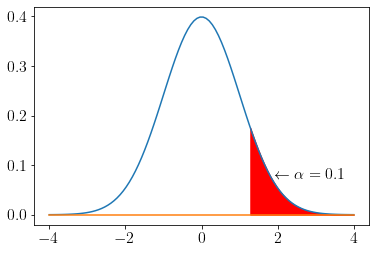

In [79]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

alpha = np.array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])
za = norm.ppf(1-alpha, 0, 1) # 求上alpha分位数; ppf: Percent point function (inverse of `cdf`) at q of the given RV.
print("上alpha分位数分别为：", za)
x = np.linspace(-4, 4, 100)
y = norm.pdf(x, 0, 1) # pdf: Probability density function at x of the given RV.

plt.rc('font', size=16)
plt.rc('text', usetex=True)
plt.plot(x, y) # 画标准正态分布密度曲线
x2 = np.linspace(za[-1], 4, 100)
y2 = norm.pdf(x2)
y1 = [0]*len(x2)
plt.fill_between(x2, y1, y2, color='r') # y1, y2对应的点之间填充
plt.plot([-4, 4], [0, 0]) # 画水平线
plt.text(1.9, 0.07, r"$\leftarrow \alpha=0.1$") # 标注
plt.show()

### 1.2随机变量的数字特征

**定义3** 设随机变量 $X$ 的分布律为
$$
P\left\{X=x_{k}\right\}=p_{k}, \quad k=1,2, \cdots
$$
若级数 $\sum_{k=1}^{\infty} x_{k} p_{k}$ 绝对收敛，则称级数 $\sum_{k=1}^{\infty} x_{k} p_{k}$ 的和为随机变量 $X$ 的**数学期望**，记为 $E(X)$，即
$$
E(X)=\sum_{k=1}^{\infty} x_{k} p_{k}
$$
设连续型随机变量 $X$ 的概率密度为 $f(x)$, 若积分 $\int_{-\infty}^{+\infty} x f(x) d x$ 绝对收敛, 则称积分 $\int_{-\infty}^{+\infty} x f(x) d x$ 的值为随机变量 $X$ 的数学期望, 记为 $E(X)$. 即
$$
E(X)=\int_{-\infty}^{+\infty} x f(x) d x
$$
**定义4** 设 $X$ 是一个随机变量, 若 $E\left\{[X-E(X)]^{2}\right\}$ 存在, 则称 $E\{[X-$ $\left.E(X)]^{2}\right\}$ 为 $X$ 的**方差**, 记为 $D(X)$ 或 $\operatorname{Var}(X)$, 即
$$
D(X)=\operatorname{Var}(X)=E\left\{[X-E(X)]^{2}\right\}
$$
$\sigma(x)=\sqrt{D(X)}$, 称为**标准差**或**均方差**。
由定义4 知, 方差实际上就是随机变量 $X$ 的函数 $g(X)=(X-E(X))^{2}$ 的数学期望.
**定义5** 随机变量 $X$ 的**偏度**和**峰度**指的是 $X$ 的标准化变量 $(X-E(X))$ / $\sqrt{D(X)}$ 的三阶中心矩和四阶中心矩:
$$
\begin{aligned}
&\nu_{1}=E\left[\left(\frac{X-E(X)}{\sqrt{D(X)}}\right)^{3}\right]=\frac{E\left[(X-E(X))^{3}\right]}{(D(X))^{3 / 2}}, \\
&\nu_{2}=E\left[\left(\frac{X-E(X)}{\sqrt{D(X)}}\right)^{4}\right]=\frac{E\left[(X-E(X))^{4}\right]}{(D(X))^{2}} .
\end{aligned}
$$
**定义6** $E\{[X-E(X)][Y-E(Y)]\}$ 称为随机变量 $X$ 与 $Y$ 的**协方差**. 记为 $\operatorname{Cov}(X, Y)$, 即
$$
\operatorname{Cov}(X, Y)=E\{[X-E(X)][Y-E(Y)]\}
$$
而
$$
\rho_{X Y}=\frac{\operatorname{Cov}(X, Y)}{\sqrt{D(X)} \sqrt{D(Y)}}
$$
称为随机变量 $X$ 与 $Y$ 的**相关系数**.
**定义7** 设 $X$ 和 $Y$ 是随机变量, 若 $E\left(X^{k}\right), k=1,2, \cdots$ 存在, 称它为 $X$ 的 $k$ 阶原点矩, 简称** $k$ 阶矩**.
若 $E\left\{[X-E(X)]^{k}\right\}, k=2,3, \cdots$ 存在, 称它为 $X$ 的** $k$ 阶中心矩**.
若 $E\left(X^{k} Y^{l}\right), k, l=1,2, \cdots$ 存在, 称它为 $X$ 和 $Y$ 的** $k+l$ 阶混合矩**.
若 $E\left\{[X-E(X)]^{k}[Y-E(Y)]^{l}\right\}, k, l=1,2, \cdots$ 存在, 称它为 $X$ 和 $Y$ 的** $k+l$ 阶混合中心矩**.
**定义8** 设 $n$ 维随机变量 $\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的二阶混合中心矩
$$
c_{i j}=\operatorname{Cov}\left(X_{i}, X_{j}\right)=E\left\{\left[X_{i}-E\left(X_{i}\right)\right]\left[X_{j}-E\left(X_{j}\right)\right]\right\}, \quad i, j=1,2, \cdots, n
$$
都存在, 则称矩阵
$$
\boldsymbol{C}=\left[\begin{array}{cccc}
c_{11} & c_{12} & \cdots & c_{1 n} \\
c_{21} & c_{22} & \cdots & c_{2 n} \\
\vdots & \vdots & & \vdots \\
c_{n 1} & c_{n 2} & \cdots & c_{n n}
\end{array}\right]
$$
为 $n$ 维随机变量 $\left(X_{1}, X_{2}, \cdots, X_{n}\right)$ 的**协方差矩阵**. 由于 $c_{i j}=c_{j i}(i, j=1,2, \cdots, n)$, 因而上述协方差矩阵是一个对称矩阵.
概率论与数理统计教科书一般都给出如下表所列的随机变量数字特征, 但没有给出偏度和峰度. 下面用 Python 计算随机变量的数字特征.
表 重要分布的数学期望和方差
\begin{array}{cccc}
\hline 分布 & 参数 & 数学期望 & 方差 \\
\hline 两点分布 b(1, p) & 0<p<1 & p & p(1-p) \\
二项分布 b(n, p) & n \geqslant 1,0<p<1 & n p & n p(1-p) \\
泊松分布 \pi(\lambda) & \lambda>0 & \lambda & \lambda \\
均匀分布 U(a, b) & a<b & (a+b) / 2 & (b-a)^{2} / 12 \\
指数分布 \exp (\theta) & \theta>0 & \theta & \theta^{2} \\
正态分布 N\left(\mu, \sigma^{2}\right) & \mu, \sigma>0 & \mu & \sigma^{2} \\
\hline
\end{array}

### 1.3随机变量数字特征计算及应用

**例** 计算二项分布$b(20, 0.8)$的均值和方差

In [80]:
from scipy.stats import binom

n = 20
p = 0.8
print("期望和方差分别为：", binom.stats(n, p))

期望和方差分别为： (array(16.), array(3.2))


**例** 计算二项分布$b(20, 0.8)$的均值、方差、偏度和峰度

In [81]:
from scipy.stats import binom

n, p = 20, 0.8
print("所求的数字特征为：", binom.stats(n, p, moments='mvsk')) # m:mean v:variance s:skew k:kurtosis

所求的数字特征为： (array(16.), array(3.2), array(-0.3354102), array(0.0125))


**例** 某路政部门负责城市某条道路的路灯维护. 更换路灯时, 需要专用云梯车进行线路检测和更换灯泡, 向相应的管理部门提出电力使用和道路管制申请, 还要向雇用的各类人员支付报酬等, 这些工作需要的费用往往比灯泡本身的费用更高, 灯泡坏 1 个换 1 个的办法是不可取的. 根据多年的经验, 他们采取整批更换的策略, 即到一定的时间, 所有灯泡无论好与坏全部更换.
上级管理部门通过监察灯泡是否正常工作对路政部门进行管理, 一旦出现 1 个 灯泡不亮, 管理部门就会按照折合计时对他们进行罚款.
现抽查某品牌灯泡 200 个, 假设其寿命服从 $N\left(4000,100^{2}\right)$ (单位: h) 分布, 每个灯泡的更换费用 (包括灯泡的成本和安装时分推到每个灯泡的费用) 为 80 元, 管理部门对每个不亮的灯泡制订的惩罚费用为 $0.02$ 元 $/ \mathrm{h}$, 应多长时间进行一次灯泡的全部更换.
**解** 记每个灯泡的更换费用为 $a$, 管理部门对每个不亮灯泡单位时间的罚款为 $b$. 记灯泡寿命的概率密度函数为 $f(x)$, 更换周期为 $T$, 灯泡总数为 $K$, 则更换灯泡的费用为 $K a$, 承受的罚款为
$$
K b \int_{-\infty}^{T}(T-x) f(x) d x
$$
一个更换周期内的总费用是两者之和. 路政部门考虑的目标函数是单位时间内的平均费用, 即
$$
F(T)=\frac{K a+K b \int_{-\infty}^{T}(T-x) f(x) d x}{T}
$$
为得到最佳更换周期, 求 $T$ 使 $F(T)$ 最小. 令 $\frac{d F}{d T}=0$, 得
\begin{equation}
\int_{-\infty}^{T} x f(x) d x=\frac{a}{b}
\tag{(1)}
\end{equation}
记灯泡寿命的分布函数为 $G(x)$, 由式(1)代入正态分布的概率密度函数并进行分布积分, 得到
$$
\mu G(T)-\sigma^{2} f(T)=\frac{a}{b}
$$
其中参数 $\mu, \sigma^{2}$ 为正态分布 $N\left(\mu, \sigma^{2}\right)$ 中的均值和方差.

In [ ]:
"""
下面程序将使用二分法求解，由于涉及无限区间积分无法直接调用scipy.integrate的库函数，而用符号函数求解速度太慢
"""
from scipy.integrate import quad
import numpy as np

a = 80
b = 0.02
BD = a/b
mu = 400
s = 100

y = lambda x: x*np.exp(-(x-mu)**2/(2*s**2))/np.sqrt(2*np.pi)/s # 正态分布密度函数

I = 0
x1 = 0
x2 = 1000
while np.abs(I - BD) > 1E-16:
    c = (x1 + x2)/2
    I = quad(y, -10000, c)[0] # 由3sigma准则这里积分下限取为-10000， 取零效果一样
    if I > BD:
        x2 = c
    else:
        x1 = c
print("最佳更换周期为：", c)

## 2.描述性统计和统计图

### 2.1统计的基础知识
数理统计研究的对象是受随机因素影响的数据, 简称**统计**. 统计是以概率论为基础的一门应用科学. 数据样本少则几个, 多则成千上万个, 人们希望能用少数几个包含最多相关信息的数据来体现所研究对象的规律. **描述性统计**就是搜集、整理、加工和分析统计数据, 使之系统化、条理化, 以显示出数据资料的趋势、特征和数量关系. 它是统计推断的基础, 实用性较强, 在统计工作中经常使用. 下面介绍统计的基本概念.
#### 2.2.1样本和总体
在数理统计中, 把所研究的对象的全体称为**总体**. 通常指研究对象的某项数量指标, 一般记为 $X$. 如全体在校生的身高 $X$, 某批灯泡的寿命 $Y$. 把总体的每一个基本单位称为**个体**. 从总体 $X$ 中抽出若干个个体称为**样本**, 一般记为 $X_{1}, X_{2}, \cdots, X_{n}$, $n$ 称为**样本容量**. 而对这 $n$ 个个体的一次具体的观察结果记为 $x_{1}, x_{2}, \cdots, x_{n}$, 它是完全确定的一组数值, 但又随着每次抽样观察而改变, 称 $x_{1}, x_{2}, \cdots, x_{n}$ 为**样本观察值**. 统计的任务是从样本观察值出发, 去推断总体的情况——总体分布.
#### 2.2.2频数表和直方图
一组样本观察值虽然包含了总体的信息, 但往往是杂乱无章的, 做出它的频数表和直方图, 可以看作是对这组样本值的一个初步整理和直观描述. 将数据的取值范围划分为若干个区间, 然后统计这组样本值在每个区间中出现的次数, 称为频数, 由此得到一个**频数表**. 以数据的取值为横坐标, 频数或频率 (频率 $=$ 频数/样本容量) 为纵坐标, 画出一个阶梯形的图, 称为**直方图**.
#### 2.2.3统计量
样本是进行分析和推断的起点, 但实际上并不直接用样本进行推断, 而需对样本进行加工和提炼, 将分散于样本中的信息集中起来, 为此引入统计量的概念. **统计量**是不含未知参数的样本的函数.
下面介绍几种常用的统计量, 以后不区分统计量和统计量的观察值, 统称为统计量. 设有一个容量为 $n$ 的样本 (也不区分样本和样本观察值, 统称为样本), 记为 $x_{1}, x_{2}, \cdots, x_{n}$.
##### (1)表示位置的统计量——算术平均值和中位数
算术平均值 (简称均值) 描述数据取值的平均位置, 记作 $\bar{x}$,
$$
\overline{\bar{x}}=\frac{1}{n} \sum_{i=1}^{n} x_{i}
$$
中位数是将数据由小到大排序后位于中间位置的那个数值, 当 $n$ 为偶数时, 取值为中间两数的算术平均值.
##### (2)表示变异程度的统计量——标准差、方差和极差
标准差 $s$ 定义为
$$
s=\left[\frac{1}{n-1} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right]^{\frac{1}{2}}
$$
它是各个数据与均值偏离程度的度量, 这种偏离不妨称为变异.
方差是标准差的平方 $s^{2}$.
极差是 $x_{1}, x_{2}, \cdots, x_{n}$ 的最大值与最小值之差.
##### (3)表示分布形状的统计量——偏度和峰度
偏度
$$
\nu_{1}=\frac{1}{ns^{3}} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{3} .
$$
峰度
$$
\nu_{2}=\frac{1}{ns^{4}} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{4} .
$$
偏度反映分布的对称性, $\nu_{1}>0$ 称为右偏态, 此时数据位于均值右边的比位于左边的多; $\nu_{1}<0$ 称为左偏态, 情况相反; 而 $\nu_{1}$ 接近 0 则可认为分布是对称的.
峰度 $\nu_{2}$ 是分布形状的另一种度量, 正态分布的峰度为 3 , 若 $\nu_{2}$ 比 3 大得多, 表示分布有沉重的尾巴, 说明样本中含有较多远离均值的数据, 因而峰度可以用作衡量偏离正态分布的尺度之一.
##### (4)协方差和相关系数
$\boldsymbol{x}=\left[x_{1}, x_{2}, \cdots, x_{n}\right]$ 和 $\boldsymbol{y}=\left[y_{1}, y_{2}, \cdots, y_{n}\right]$ 的协方差
$$
\operatorname{Cov}(\boldsymbol{x}, \boldsymbol{y})=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{n-1},
$$
其中 $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}, \bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}$. $x$ 和 $y$ 的相关系数
$$
\rho_{x y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}} .
$$

### 2.2 用 Python 计算统计量
#### 2.2.1.使用 NumPy 计算统计量
使用 NumPy 库中的函数可以计算上述统计量, 也可以使用模块 scipy.stats 中的函数计算统计量, 模块 scipy.stats 中的函数就不介绍了.
NumPy 库中计算统计量的函数见下表所列.
表 NumPy库中计算统计量的函数
\begin{array}{cccccccc}
\hline 函数 & mean & median & ptp & var & std & cov & corrcoef \\
\hline 计算功能 & 均值 & 中位数 & 极差 & 方差 & 标准差 & 协方差 & 相关系数 \\
\hline
\end{array}

**例** 学校随机抽取 100 名学生, 测量他们的身高和体重, 所得数据如下表所示. 试分别求身高的均值、中位数、极差、方差、标准差; 计算身高与体重的协方差、相关系数.

In [83]:
import numpy as np

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
highweight = np.hstack([high, weight]) # 构造两列数组
print([np.mean(high), np.median(high), np.ptp(high), np.var(high), np.std(high)])
print("协方差为：{}\n相关系数为：{}".format(np.cov(highweight.T)[0, 1], np.corrcoef(highweight.T)[0, 1]))
# print(highweight)

[170.25, 170.0, 31, 28.8875, 5.374709294464213]
协方差为：16.982323232323235
相关系数为：0.4560968250128602


#### 2.2.2使用Pandas的DataFrame计算统计量

Pandas 的 DataFrame 数据结构为我们提供了若干统计函数, 下表给出了部分统计量的方法 (2.3 节已经给出的方法, 这里就不䔩述了).

表 Pandas中的部分统计量方法
\begin{array}{cc}
\hline 方法 & 说明 \\
\hline count & 返回非 \mathrm{NaN} 数据项的个数 \\
mad & 计算中位数绝对偏差 (median absolute deviation) \\
mode & 返回众数, 即一组数据中出现次数最多的数据值 \\
skew & 返回偏度 \\
kurt & 返回峰度 \\
quantile & 返回样本分位数, \\
\hline
\end{array}

**例** (续上例身高体重) 使用 Pandas 的 describe 方法计算相关统计量, 并计算身高和体重的偏度、峰度和样本的 $25 \%, 50 \%, 90 \%$ 分位数.

In [84]:
import numpy as np
import pandas as pd

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
dataFrame = pd.DataFrame(np.c_[high, weight], columns=["身高", "体重"]) # 构造数据框
print(dataFrame)
print('-'*60)
print("求得的描述统计量如下：\n", dataFrame.describe())
print('-'*60)
print("偏度为：\n", dataFrame.skew())
print('-'*60)
print("峰度为：\n", dataFrame.kurt())
print('-'*60)
print("分位数为：\n", dataFrame.quantile(0.9))

     身高  体重
0   172  75
1   169  55
2   169  64
3   171  65
4   167  47
..  ...  ..
95  177  64
96  184  70
97  166  49
98  171  71
99  170  59

[100 rows x 2 columns]
------------------------------------------------------------
求得的描述统计量如下：
                身高          体重
count  100.000000  100.000000
mean   170.250000   61.270000
std      5.401786    6.892911
min    155.000000   47.000000
25%    167.000000   57.000000
50%    170.000000   62.000000
75%    173.000000   65.250000
max    186.000000   77.000000
------------------------------------------------------------
偏度为：
 身高    0.156868
体重    0.140148
dtype: float64
------------------------------------------------------------
峰度为：
 身高    0.648742
体重   -0.290479
dtype: float64
------------------------------------------------------------
分位数为：
 身高    177.0
体重     70.1
Name: 0.9, dtype: float64


### 2.3统计图

下面的画图函数除非特殊声明, 使用的都是 matplotlib.pyplot 模块中的函数.
#### 2.3.1频数表及直方图
计算数据**频数**并且画**直方图**的命令为
hist (x, bins=None, range=None, density=None, weight=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
它将区间 $[\min (\mathrm{x}), \max (\mathrm{x})]$ 等分为 bins 份, 统计在每个左闭右开小区间 (最后一个小区间为闭区间) 上数据出现的频数并画直方图. 其中的一些参数含义如下:
(1) range: 指定直方图数据的上下界, 默认为数据的最大值和最小值.
(2) density: 是否将直方图的频数转换成频率.
(3) weights: 该参数可为每个数据点设置权重.
(4) cumulative: 是否需要计算累计频数或频率.
(5) bottom: 可以为直方图的每个条形添加基准线, 默认为 0 .
(6) histtype: 指定直方图的类型, 默认为 bar, 还有 barstacked, step 和 stepfilled.
(7) align: 设置条形边界值的对齐方式, 默认为 mid, 还有 left 和 right.
(8) orientation: 设置直方图的摆放方向, 默认为垂直方向.
(9) rwidth: 设置直方图条形的宽度.
(10) log: 是否需要对绘图数据进行 $\log$ 变换.
(11) color: 设置直方图的填充色.
(12) label: 设置直方图的标签, 可通过 legend 展示其图例.
(13) stacked: 当有多个数据时, 是否需要将直方图呈堆叠摆放, 默认水平摆放.

**例** (续上例身高体重) 画出身高和体重的直方图, 并统计从最小体重到最大体重, 等间距分成 6 个小区间时, 数据出现在每个小区间的频数.
**解** 画出的直方图如下图所示. 体重的频数统计结果见下表.
从直方图上可以看出, 身高的分布大致呈中间高、两端低的钟形, 而体重则看不出什么规律. 要想从数值上给出更确切的描述, 需要进一步研究反映数据特征的 “统计量”. 直方图所展示的身高的分布形状可看作正态分布, 当然也可以用这组数据对分布作假设检验.

身高的频数表为： (array([ 2.,  3.,  6., 18., 26., 22., 11.,  8.,  2.,  2.]), array([155. , 158.1, 161.2, 164.3, 167.4, 170.5, 173.6, 176.7, 179.8,
       182.9, 186. ]), <BarContainer object of 10 artists>)
体重的频数表为： (array([ 9., 13., 27., 31., 11.,  9.]), array([47., 52., 57., 62., 67., 72., 77.]), <BarContainer object of 6 artists>)


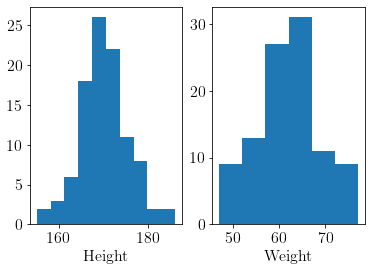

In [85]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量

plt.rc('font', size=16)
plt.rc('font', family="SimHei")
plt.subplot(121)
ps = plt.hist(high, 10)# 画图并返回频数表ps
plt.xlabel("Height")
print("身高的频数表为：", ps)
plt.subplot(122)
ps = plt.hist(weight, 6)# 画图并返回频数表ps
plt.xlabel("Weight")
print("体重的频数表为：", ps)
plt.show()

#### 2.3.2箱线图

先介绍**样本分位数**.
**定义9** 设有容量为 $n$ 的样本观测值 $x_{1}, x_{2}, \cdots, x_{n}$, 样本 $p$ 分位数 $(0<$ $p<1$ ) 记为 $x_{p}$, 它具有以下的性质:
(1) 至少有 $n p$ 个观测值小于或等于 $x_{p}$;
(2) 至少有 $n(1-p)$ 个观测值大于或等于 $x_{p}$.
样本 $p$ 分位数可按以下法则求得. 将 $x_{1}, x_{2}, \cdots, x_{n}$ 按自小到大的次序排列成 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$.
$$
x_{p}= \begin{cases}x_{([n p]+1)}, & n p \text { 不是整数, } \\ \frac{1}{2}\left[x_{(n p)}+x_{(n p+1)}\right], & n p \text { 是整数. }\end{cases}
$$
特别地, 当 $p=0.5$ 时, $0.5$ 分位数 $x_{0.5}$ 也记为 $Q_{2}$ 或 $M$, 称为样本中位数, 即有
$$
x_{0.5}= \begin{cases}x_{([n / 2]+1)}, & n \text { 是奇数, } \\ \frac{1}{2}\left[x_{(n / 2)}+x_{(n / 2+1)}\right], & n \text { 是偶数. }\end{cases}
$$
当 $n$ 是奇数时, 中位数 $x_{0.5}$ 就是 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$ 这一数组最中间的一个 数; 而当 $n$ 是偶数时, 中位数 $x_{0.5}$ 就是 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$ 这一数组中最中间两个数的平均值.
$0.25$ 分位数 $x_{0.25}$ 称为**第一四分位数**, 又记为 $Q_{1} ; 0.75$ 分位数 $x_{0.75}$ 称为**第三四分位数**, 又记为 $Q_{3} . x_{0.25}, x_{0.5}, x_{0.75}$ 在统计中是很有用的.

下面介绍**箱线图**.
数据集的箱线图是由箱子和直线组成的图形, 它是基于以下 5 个数的图形概 括: 最小值 Min, 第一四分位数 $Q_{1}$, 中位数 $M$, 第三四分位数 $Q_{3}$ 和最大值 Max. 它的做法如下.
(1) 画一水平数轴, 在轴上标上 Min, $Q_{1}, M, Q_{3}$, Max. 在数轴上方画一个上、 下侧平行于数轴的矩形箱子, 箱子的左右两侧分别位于 $Q_{1}, Q_{3}$ 的上方, 在 $M$ 点的上方画一条垂直线段, 线段位于箱子内部.
(2) 自箱子左侧引一条水平线直至最小值 Min; 在同一水平高度自箱子右侧引一条水平线直至最大值 Max. 这样就将箱线图做好了. 箱线图也可以沿垂直数轴来做. 从箱线图可以形象地看出数据集的以下重要性质.
(i) 中心位置: 中位数所在的位置就是数据集的中心.
(ii) 散布程度: 全部数据都落在 $[\mathrm{Min}, \mathrm{Max}]$ 之内, 在区间 $\left[\mathrm{Min}, Q_{1}\right],\left[Q_{1}, M\right]$, $\left.M, Q_{3}\right],\left[Q_{3}, \operatorname{Max}\right]$ 上的数据个数各占 $1 / 4$. **区间较短时, 表示落在该区间的点较集中, 反之较为分散.**
(iii) 关于对称性: 若中位数位于箱子的中间位置, 则数据分布较为对称. 又若 Min 离 $M$ 的距离较 Max 离 $M$ 的距离大, 则表示数据分布向左倾斜, 反之表示数据向右倾斜, 且能看出分布尾部的长短.

pyplot 中画箱线图的命令为 boxplot, 其基本调用格式为
boxplot(x, notch=None, sym=None, vert=None, whis=None, positions= None, widths=None)
其中, x 为输入的数据; notch 设置是否创建有凹口的箱盒; sym 设置异常点的颜色和形状, 例如, sym='gx' 设置异常点为绿色, 形状为 “ x "; vert 设置为水平或垂直方向箱盒, whis 默认为 1.5 (whis*IQR), 见下面异常值的说明; positions 设置箱盒的 位置, widths 设置箱盒的宽度.

**例** 下面分别给出了 25 个男子和 25 个女子的肺活量数据 (以 $\mathrm{L}$ 计, 数据已经排过序)
女子组：2.7, 2.8, 2.9, 3.1, 3.1, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 4.0, 4.1, 4.2, 4.2;
男子组：4.1, 4.1, 4.3, 4.3, 4.5, 4.6, 4.7, 4.8, 4.8, 5.1, 5.3, 5.3, 5.3, 5.4, 5.4, 5.5, 5.6, 5.7, 5.8, 5.8, 6.0, 6.1, 6.3, 6.7, 6.7;

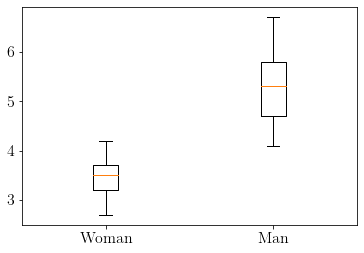

In [86]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([
    [2.7, 2.8, 2.9, 3.1, 3.1, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.6, 3.7, 3.7, 3.7, 3.8, 3.8, 4.0, 4.1, 4.2, 4.2],
    [4.1, 4.1, 4.3, 4.3, 4.5, 4.6, 4.7, 4.8, 4.8, 5.1, 5.3, 5.3, 5.3, 5.4, 5.4, 5.5, 5.6, 5.7, 5.8, 5.8, 6.0, 6.1, 6.3, 6.7, 6.7]
])
b = a.T # 转置成两列数据

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.boxplot(b, labels=['Woman', 'Man'])
plt.show()

箱线图特别适用于比较两个或两个以上数据集的性质, 为此, 将几个数据集的箱线图画在同一个图形界面上. 例如, 在上图中可以明显地看到男子的肺活量要比女子的肺活量大, 男子的肺活量较女子的肺活量分散.
在数据集中某一个观察值不寻常地大于或小于该数集中的其他数据, 称为**疑似异常值**. 疑似异常值的存在, 会对随后的计算结果产生不适当的影响. 检查疑似异常值并加以适当的处理是十分必要的.
第一四分位数 $Q_{1}$ 与第三四分位数 $Q_{3}$ 之间的距离: $Q_{3}-Q_{1}$ 记为 $=\mathrm{IQR}$, 称为**四分位数间距**. 若数据小于 $Q_{1}-1.5 \mathrm{IQR}$ 或大于 $Q_{3}+1.5 \mathrm{IQR}$, 就认为它是疑似异常值.

**例** (续例身高体重) 画身高和体重的箱线图.

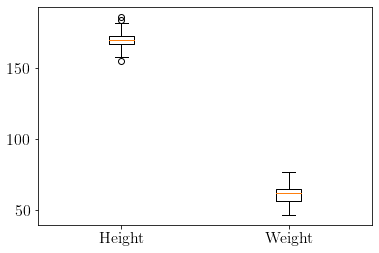

In [87]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2] # 提取奇数列身高
weight = data[:, 1::2] # 提取偶数列体重
high = np.reshape(high, (-1, 1)) # 转换为列向量
weight = np.reshape(weight, (-1, 1)) # 转换为列向量
highweight = np.hstack([high, weight]) # 构造两列数组

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.boxplot(highweight, labels=['Height', 'Weight'])
plt.show()

所画的身高和体重的箱线图如上图所示. 从箱线图可以看出身高有异常数据.

#### 2.3.3经验分布函数
设 $X_{1}, X_{2}, \cdots, X_{n}$ 是总体 $F$ 的一个样本, 用 $S(x)(-\infty<x<+\infty)$ 表示 $X_{1}, X_{2}, \cdots, X_{n}$ 中不大于 $x$ 的随机变量的个数. 定义**经验分布函数** $F_{n}(x)$ 为
$$
F_{n}(x)=\frac{1}{n} S(x), \quad-\infty<x<+\infty .
$$
对于一个样本值, 那么经验分布函数 $F_{n}(x)$ 的观察值是很容易得到的 $\left(F_{n}(x)\right.$ 的观察值仍以 $F_{n}(x)$ 表示).
一般地, 设 $x_{1}, x_{2}, \cdots, x_{n}$ 是总体 $F$ 的一个容量为 $n$ 的样本值. 先将 $x_{1}, x_{2}, \cdots$, $x_{n}$ 按自小到大的次序排列, 并重新编号, 设为
$$
x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)} .
$$
则经验分布函数 $F_{n}(x)$ 的观察值为
$$
F_{n}(x)= \begin{cases}0, & x<x_{(1)}, \\ \frac{k}{n}, & x_{(k)} \leqslant x<x_{(k+1)}, \quad k=1,2, \cdots, n-1, \\ 1, & x \geqslant x_{(n)} .\end{cases}
$$
对于经验分布函数 $F_{n}(x)$, 格里汶科 (Glivenko) 在 1933 年证明了, 当 $n \rightarrow+\infty$ 时 $F_{n}(x)$ **以概率 1 一致收敛于**分布函数 $F(x)$. 因此, 对于任一实数 $x$, 当 $n$ 充分大时, 经验分布函数的任一个观察值 $F_{n}(x)$ 与总体分布函数 $F(x)$ 只有微小的差别, 从而在实际中可当作 $F(x)$ 来使用.

**例** (续例身高体重) 画出体重的经验分布函数图形.

(array([0.02, 0.04, 0.09, 0.12, 0.16, 0.19, 0.29, 0.36, 0.47, 0.49, 0.63,
       0.7 , 0.8 , 0.84, 0.88, 0.9 , 0.93, 0.94, 0.97, 1.  ]), array([47. , 48.5, 50. , 51.5, 53. , 54.5, 56. , 57.5, 59. , 60.5, 62. ,
       63.5, 65. , 66.5, 68. , 69.5, 71. , 72.5, 74. , 75.5, 77. ]), [<matplotlib.patches.Polygon object at 0x00000246440C3F88>])


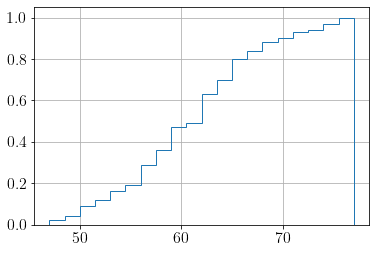

In [88]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

weight = data[:, 1::2] # 提取偶数列体重
weight = np.reshape(weight, (-1, 1)) # 转换为列向量

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
h = plt.hist(weight, 20, density=True, histtype='step', cumulative=True)
print(h)
plt.grid()
plt.show()

#### 2.3.4Q-Q 图
Q-Q 图 (quantile-quantile plot) 是检验**拟合优度**的好方法, **目前在国外被广泛使用**, 它的图示方法简单直观, 易于使用.
对于一组观察数据 $x_{1}, x_{2}, \cdots, x_{n}$, 利用参数估计方法确定了分布模型的参数 $\theta$ 后, 分布函数 $F(x ; \theta)$ 就知道了, 现在我们希望知道观测数据与分布模型的拟合效果如何. 如果拟合效果好, 观测数据的经验分布就应当非常接近分布模型的理论分布, 而经验分布函数的分位数自然也应当与分布模型的理论分位数近似相等. Q-Q 图的基本思想就是基于这个观点, 将经验分布函数的分位数点和分布模型的理论分位数点作为一对数组画在直角坐标图上, 就是一个点, $n$ 个观测数据对应 $n$ 个点, 如果这 $n$ 个点看起来像一条直线, 说明观测数据与分布模型的拟合效果很好, 以下给出计算步骤.
**判断观测数据 $x_{1}, x_{2}, \cdots, x_{n}$ 是否来自分布 $F(x)$**, $\mathrm{Q}-\mathrm{Q}$ 图的计算步骤如下:
(1) 将 $x_{1}, x_{2}, \cdots, x_{n}$ 依大小顺序排列成 $x_{(1)} \leqslant x_{(2)} \leqslant \cdots \leqslant x_{(n)}$;
(2) 取 $y_{i}=F^{-1}((i-1 / 2) / n), i=1,2, \cdots, n$;
(3) 将 $\left(y_{i}, x_{(i)}\right), i=1,2, \cdots, n$, 这 $n$ 个点画在直角坐标图上;
(4) 如果这 $n$ 个点看起来旺一条 $45^{\circ}$ 角的直线, 从 $(0,0)$ 到 $(1,1)$ 分布, 我们就相信 $x_{1}, x_{2}, \cdots, x_{n}$ 拟合分布 $F(x)$ 的效果很好.

**例** 对于往例身高数据, 如果它们来自正态分布, 求该正态分布的参数, 试画出它们的 Q-Q 图, 判断拟合效果.

**解**
(1) 采用**矩估计方法**估计参数的取值. 先从所给的数据算出样本均值和标准差
$$
\bar{x}=170.25, \quad s=5.3747
$$
正态分布 $N\left(\mu, \sigma^{2}\right)$ 中参数的估计值为 $\hat{\mu}=170.25, \hat{\sigma}=5.3747$.
(2) 画 Q-Q 图.
 (i) 将观测数据记为 $x_{1}, x_{2}, \cdots, x_{100}$, 并依从小到大顺序排列为 $x_{(1)} \leqslant x_{(2)} \leqslant$ $\cdots \leqslant x_{(100)}$.
 (ii) 取 $y_{i}=F^{-1}((i-1 / 2) / n), i=1,2, \cdots, 100$, 这里 $F^{-1}(x)$ 是参数 $\mu=170.25$, $\sigma=5.3747$ 的正态分布函数的反函数.
 (iii) 将 $\left(y_{i}, x_{(i)}\right)(i=1,2, \cdots, 100)$ 这 100 个点画在直角坐标系上, 如下图所示.
 (iv) 这些点看起来接近一条 $45^{\circ}$ 角的直线, 说明拟合结果较好.

[170.25, 5.374709294464213]


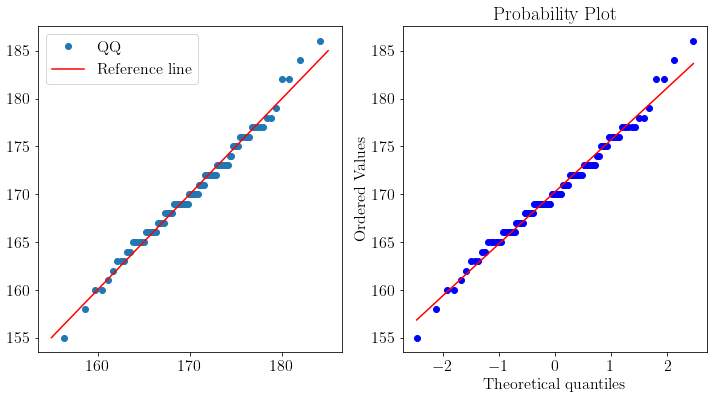

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

data = np.array([
    [172, 75, 169, 55, 169, 64, 171, 65, 167, 47],
    [171, 62, 168, 67, 165, 52, 169, 62, 168, 65],
    [166, 62, 168, 65, 164, 59, 170, 58, 165, 64],
    [160, 55, 175, 67, 173, 74, 172, 64, 168, 57],
    [155, 57, 176, 64, 172, 69, 169, 58, 176, 57],
    [173, 58, 168, 50, 169, 52, 167, 72, 170, 57],
    [166, 55, 161, 49, 173, 57, 175, 76, 158, 51],
    [170, 63, 169, 63, 173, 61, 164, 59, 165, 62],
    [167, 53, 171, 61, 166, 70, 166, 63, 172, 53],
    [173, 60, 178, 64, 163, 57, 169, 54, 169, 66],
    [178, 60, 177, 66, 170, 56, 167, 54, 169, 58],
    [173, 73, 170, 58, 160, 65, 179, 62, 172, 50],
    [163, 47, 173, 67, 165, 58, 176, 63, 162, 52],
    [165, 66, 172, 59, 177, 66, 182, 69, 175, 75],
    [170, 60, 170, 62, 169, 63, 186, 77, 174, 66],
    [163, 50, 172, 59, 176, 60, 166, 76, 167, 63],
    [172, 57, 177, 58, 177, 67, 169, 72, 166, 50],
    [182, 63, 176, 68, 172, 56, 173, 59, 174, 64],
    [171, 59, 175, 68, 165, 56, 169, 65, 168, 62],
    [177, 64, 184, 70, 166, 49, 171, 71, 170, 59]
])

high = data[:, ::2].flatten() # 提取奇数列身高并按行展开
mu = np.mean(high)
s = np.std(high)
print([mu, s])
sorthigh = np.sort(high) # 按从小到大排序
n = len(sorthigh)
xi = (np.arange(1, n+1)-1/2)/n
yi = norm.ppf(xi, mu, s) # ppf: Percent point function (inverse of `cdf`) at q of the given RV.

plt.figure(figsize=(12, 6))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False) # 用来正常显示负号
plt.subplot(121)
plt.plot(yi, sorthigh, 'o', label='QQ')
plt.plot([155, 185], [155, 185], 'r-', label='Reference line')
plt.legend()
plt.subplot(122)
res = probplot(high, plot=plt)
plt.show()

## 3.常见分布及其他

### 3.1连续概率分布

In [90]:
from scipy import stats

d = [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]
print(d)

['ksone', 'kstwo', 'kstwobign', 'norm', 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'fisk', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'expon', 'exponnorm', 'exponweib', 'exponpow', 'fatiguelife', 'foldcauchy', 'f', 'foldnorm', 'weibull_min', 'weibull_max', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gamma', 'erlang', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'gausshyper', 'invgamma', 'invgauss', 'geninvgauss', 'norminvgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'gilbrat', 'maxwell', 'mielke', 'kappa4', 'kappa3', 'moyal', 'nakagami', 'ncx2', 'ncf', 't', 'nct', 'pareto', 'lomax', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'loguniform', 'reciprocal', 'rice', 'recipinvgauss', 'semicirc

### 3.2离散概率分布

In [91]:
from scipy import stats
d = [k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_discrete)]
print(d)

['binom', 'bernoulli', 'betabinom', 'nbinom', 'geom', 'hypergeom', 'nhypergeom', 'logser', 'poisson', 'planck', 'boltzmann', 'randint', 'zipf', 'zipfian', 'dlaplace', 'skellam', 'yulesimon', 'nchypergeom_fisher', 'nchypergeom_wallenius']


### 3.3伽马分布示意图
$$
f(x, \beta, \alpha)=\frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}, x>0
$$

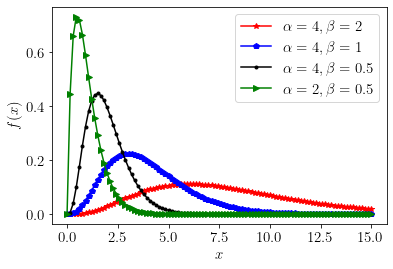

In [92]:
from matplotlib.pyplot import plot, legend, xlabel, ylabel, savefig, show, rc
from scipy.stats import gamma

from numpy import linspace
x=linspace(0,15,100)
rc('font',size=15)
rc('text', usetex=True)

plot(x,gamma.pdf(x,4,0,2),'r*-',label=r"$\alpha=4, \beta=2$")
plot(x,gamma.pdf(x,4,0,1),'bp-',label=r"$\alpha=4, \beta=1$")
plot(x,gamma.pdf(x,4,0,0.5),'.k-',label=r"$\alpha=4, \beta=0.5$")
plot(x,gamma.pdf(x,2,0,0.5),'>g-',label=r"$\alpha=2, \beta=0.5$")

legend()
xlabel('$x$')
ylabel('$f(x)$')
#savefig("figure2_46.png",dpi=500);

show()

### 3.4正态分布示意图
$$
f(x)=\frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2}\right)
$$

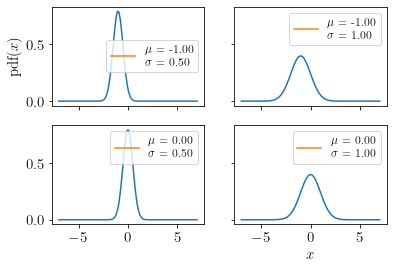

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#%matplotlib tk
%matplotlib inline

mu0 = [-1, 0]
s0 = [0.5, 1]
x = np.linspace(-7, 7, 100)
plt.rc('font',size=15)
plt.rc('text', usetex=True)
plt.rc('axes',unicode_minus=False)

f, ax = plt.subplots(len(mu0), len(s0), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        mu = mu0[i]
        s = s0[j]
        y = norm(mu, s).pdf(x)

        ax[i,j].plot(x, y)
        ax[i,j].plot(1,0,label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu,s))
        ax[i,j].legend(fontsize=12)

ax[1,1].set_xlabel('$x$')
ax[0,0].set_ylabel('pdf($x$)')
# plt.savefig('figure2_47.png')

plt.show()

###  3.5二项分布示意图

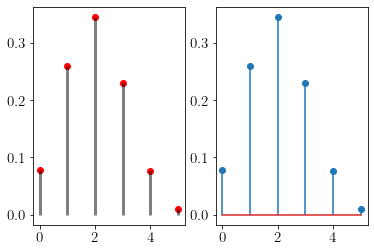

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p=5, 0.4

x=np.arange(6)
y=binom.pmf(x,n,p)

plt.subplot(121)
plt.plot(x, y, 'ro')
plt.vlines(x, 0, y, 'k', lw=3, alpha=0.5)
#vlines(x, ymin, ymax)画竖线图
#lw设置线宽度，alpha设置图的透明度

plt.subplot(122)
plt.stem(x, y, use_line_collection=True)
plt.show()

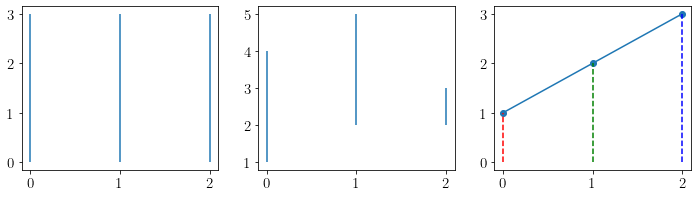

In [95]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
x = range(3)
plt.vlines(x, 0, 3)

plt.subplot(132)
plt.vlines(x, [1, 2, 3], [4, 5, 2])

plt.subplot(133)
plt.plot(x, range(1, 4), marker='o')
plt.vlines(x, [0, 0, 0], range(1, 4), colors=['r', 'g', 'b'],
           linestyles='dashed')
plt.show()

### 3.6随机变量概率计算

In [96]:
from scipy.stats import norm
from scipy.optimize import fsolve

print("p=",norm.cdf(6,3,5)-norm.cdf(2,3,5))

f = lambda c: norm.cdf(2*c,3,5)-norm.cdf(-3*c,3,5)-0.6
print("c=", fsolve(f,0))

p= 0.3050065916890295
c= [2.29103356]


### 3.7非线性方程求解
$$ x^3+1.1 x^2+0.x-1.4 = 0 $$

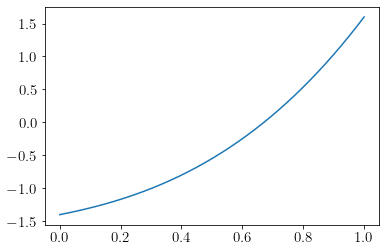

In [97]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: x**3+1.1*x**2+0.9*x-1.4

x = np.linspace(0,1,500)

y = f(x)

plt.plot(x,y)
plt.show()

In [98]:
import numpy as np
from scipy.optimize import fsolve

def binary_search(f, eps, a, b):  #二分法函数
    c=(a+b)/2
    while np.abs(f(c))>eps:
        if f(a)*f(c)<0: b=c
        else: a=c
        c=(a+b)/2
    return c

def newton_iter(f, eps, x0, dx = 1E-8):  #牛顿迭代法函数
    def diff(f, dx=dx):   #求数值导数函数
        return lambda x: (f(x+dx)-f(x-dx))/(2*dx)

    df=diff(f,dx)

    x1=x0-f(x0)/df(x0)
    while np.abs(x1-x0)>=eps:
        x1, x0=x1-f(x1)/df(x1), x1
    return x1

f=lambda x: x**3+1.1*x**2+0.9*x-1.4
print("二分法求得的根为：", binary_search(f,1E-6,0,1))
print("牛顿迭代法求得的根为：",newton_iter(f,1E-6,0))
print("直接调用SciPy求得的根为：",fsolve(f,0))

二分法求得的根为： 0.6706571578979492
牛顿迭代法求得的根为： 0.6706573107258097
直接调用SciPy求得的根为： [0.67065731]


### 3.8上分位数计算

上alpha分位数分别为 [3.09023231 2.5758293  2.32634787 1.95996398 1.64485363 1.28155157]


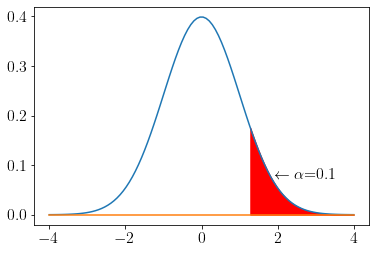

In [99]:
from scipy.stats import norm
from pylab import plot,fill_between,show,text,savefig,rc
from numpy import array, linspace, zeros

alpha=array([0.001, 0.005, 0.01, 0.025, 0.05, 0.10])

za=norm.ppf(1-alpha,0,1)  #求上alpha分位数
print("上alpha分位数分别为", za)

x=linspace(-4, 4, 100)
y=norm.pdf(x, 0, 1)

rc('font',size=16)
rc('text',usetex=True)
plot(x,y)  #画标准正态分布密度曲线

x2=linspace(za[-1],4,100)
y2=norm.pdf(x2)
y1=[0]*len(x2)
fill_between(x2, y1, y2, color='r')  #y1,y2对应的点之间填充

plot([-4,4],[0,0])  #画水平线
text(1.9, 0.07, "$\\leftarrow\\alpha$=0.1")  #标注
show()

### 3.9随机变量数字特征计算及应用

In [100]:
from scipy.stats import binom

n, p=20, 0.8
mean, variance = binom.stats(n,p)
print("期望和方差分布为：",mean, variance)

from scipy.stats import binom
n, p=20, 0.8
mean, variance, skewness, kurtosis=binom.stats(n, p, moments='mvsk')

print("所求的数字特征为：", mean, variance, skewness, kurtosis)

期望和方差分布为： 16.0 3.1999999999999993
所求的数字特征为： 16.0 3.1999999999999993 -0.33541019662496857 0.012500000000000015


### 3.10概率模型
最佳更换周期

In [101]:
from scipy.integrate import quad
from numpy import exp, sqrt, pi, abs
a=80
b=0.02
BD=a/b
mu=4000
s=100

fun = lambda x: x*exp(-(x-mu)**2/(2*s**2))/sqrt(2*pi)/s   #定义积分的被积函数

I  = 0
x1 = 0
x2 = 10000

while abs(I- a/b)>1E-16:
    c=(x1+x2)/2
    I=quad(fun, -1000,c)[0] #由3sigma准则这里积分下限取为-10000,取零效果一样
    if I>BD:
        x2=c
    else:
        x1=c

print("最佳更换周期为：", c)

最佳更换周期为： 5000.0


### 3.11数值积分

In [103]:
import numpy as np
from scipy.integrate import quad

def trapezoid(f, n, a, b):    #定义梯形公式的函数
    xi = np.linspace(a, b, n)
    h = (b-a)/(n-1)
    return h*(np.sum(f(xi))-(f(a)+f(b))/2)

def simpson(f, n, a, b):     #定义辛普森公式的函数
    xi, h = np.linspace(a, b, 2*n+1), (b-a)/(2.0*n)
    xe = [f(xi[i]) for i in range(len(xi)) if i%2==0]
    xo = [f(xi[i]) for i in range(len(xi)) if i%2!=0]
    return h*(2*np.sum(xe)+4*np.sum(xo)-f(a)-f(b))/3.0

a=0
b=1
n=1000
f = lambda x: np.sin(np.sqrt(np.cos(x)+x**2))

print("梯形积分I1=", trapezoid(f, n, a, b))
print("辛普森积分I2=", simpson(f, n, a, b))
print("SciPy积分I3=", quad(f, a, b))


梯形积分I1= 0.8803354297105352
辛普森积分I2= 0.8803354170924643
SciPy积分I3= (0.8803354170924643, 9.773686494490445e-15)


In [104]:
import numpy as np
from scipy.integrate import dblquad

f1=lambda y, x: x*y**2  #第一个被积函数
print("I1：", dblquad(f1, 0, 2, 0, 1))

f2=lambda y, x: np.exp(-x**2/2)*np.sin(x**2+y)
bd=lambda x: np.sqrt(1-x**2)
print("I2:", dblquad(f2, -1, 1, lambda x: -bd(x), bd))

I1： (0.6666666666666667, 7.401486830834377e-15)
I2: (0.5368603826989582, 3.696155159715886e-09)


In [105]:
import numpy as np
from scipy.integrate import tplquad
f = lambda z, y, x: z*np.sqrt(x**2+y**2+1)
ybd = lambda x: np.sqrt(2*x-x**2)
print("I=", tplquad(f, 0, 2, lambda x: -ybd(x),ybd, 0, 6))

I= (87.45019779526699, 8.742462398458883e-08)


## 4.代码快速查找

### 均值,中位数,极差,方差,标准差

In [106]:
from numpy import reshape, hstack, mean, median, ptp, var, std, cov, corrcoef
import pandas as pd
import os

df = pd.read_excel(os.path.join('data',"Pdata4_6_1.xlsx"),header=None)
a=df.values  #提取数据矩阵
h=a[:,::2]  #提取奇数列身高
w=a[:,1::2]  #提取偶数列体重

h=reshape(h,(-1, 1)) #转换成列向量，自动计算行数
w=reshape(w,(-1, 1)) #转换成列向量，自动计算行数

hw=hstack([h,w])  #构造两列的数组

print([mean(h),median(h),ptp(h),var(h),std(h)])  #计算均值,中位数,极差,方差,标准差
print("协方差为：{}\n相关系数为：{}".format(cov(hw.T)[0,1],corrcoef(hw.T)[0,1]))

[170.25, 170.0, 31, 28.8875, 5.374709294464213]
协方差为：16.982323232323235
相关系数为：0.4560968250128602


### 直方图

体重的频数： [ 9. 13. 27. 31. 11.  9.]
频数的区间： [47. 52. 57. 62. 67. 72. 77.]


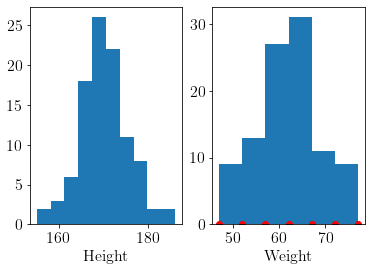

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import os
a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))

h=a[:,::2]
w=a[:,1::2]
h=np.reshape(h,(-1,1))
w=np.reshape(w,(-1,1))

plt.rc('font',size=16)
# plt.rc('font',family="SimHei")

plt.subplot(121)
plt.xlabel("Height")
plt.hist(h,10) #只画直方图不返回频数表

plt.subplot(122)
ps = plt.hist(w,6)  #画图并返回频数表ps

# ps 第一个array是频数，
# ps 第二个列表是
plt.xlabel("Weight")
print("体重的频数：", ps[0])
print("频数的区间：", ps[1])

plt.plot(ps[1],np.zeros(7),'ro')
plt.show()

### 箱线图

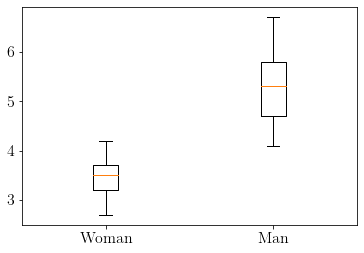

In [108]:
import numpy as np
import matplotlib.pyplot as plt

a=np.loadtxt(os.path.join('data',"Pdata4_9.txt"))  #读入两行的数据
b=a.T  #转置成两列的数据

plt.rc('font',size=16)
plt.rc('font',family='SimHei')

plt.boxplot(b,labels=['Woman','Man'])
plt.show()

### 箱线图的异常点

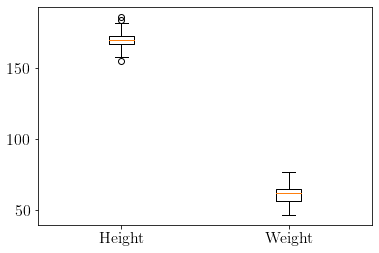

In [109]:
import numpy as np
import os

import matplotlib.pyplot as plt
a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据

h=a[:,::2]
w=a[:,1::2]

h=np.reshape(h,(-1,1))
w=np.reshape(w,(-1,1))
hw=np.hstack((h,w))

plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.boxplot(hw,labels=['Height', 'Weight'])
plt.show()

### 经验分布函数

hist cumulative = True

体重的累计频率： [0.02 0.04 0.09 0.12 0.16 0.19 0.29 0.36 0.47 0.49 0.63 0.7  0.8  0.84
 0.88 0.9  0.93 0.94 0.97 1.  ]
累计频率的区间： [47.  48.5 50.  51.5 53.  54.5 56.  57.5 59.  60.5 62.  63.5 65.  66.5
 68.  69.5 71.  72.5 74.  75.5 77. ]


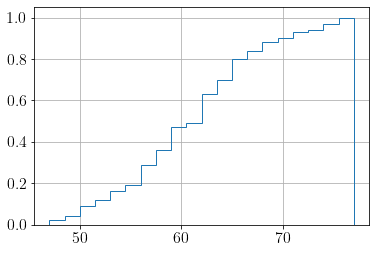

In [110]:
import numpy as np
import matplotlib.pyplot as plt

a = np.loadtxt(os.path.join('data', "Pdata4_6_2.txt"))  #读入两行的数据
w = a[:, 1::2]
w = np.reshape(w, (-1, 1))

plt.rc('font', size=16)
ps = plt.hist(w, bins = 20, density = True, histtype='step', cumulative = True)
# density  = True, 返回密度
# cumulative = True，则计算累计
#print(h);
print("体重的累计频率：", ps[0])
print("累计频率的区间：", ps[1])
plt.grid()
plt.show()

### QQ图 参数估计检验
对比经验分布函数和估计得到的理论分布参数
和 y = x 直线接近，说明估计的参数合适。

[170.25, 5.374709294464213]


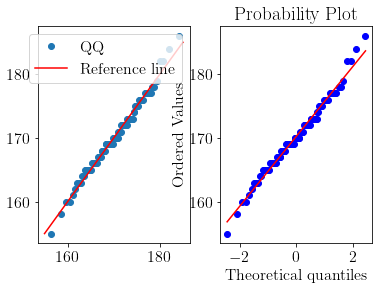

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import os

a=np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据
h=a[:,::2]
h=h.flatten()

mu=np.mean(h)
s=np.std(h)
print([mu,s])

sh=np.sort(h) #按从小到大排序
n=len(sh)
xi=(np.arange(1,n+1)-1/2)/n
yi=norm.ppf(xi,mu,s)

plt.rc('font',size=16)
plt.rc('font',family='SimHei')
plt.rc('axes',unicode_minus=False) #用来正常显示负号

plt.subplot(121)
plt.plot(yi, sh, 'o', label='QQ')
plt.plot([155,185],[155,185],'r-',label='Reference line')
plt.legend()

plt.subplot(122)
res = probplot(h,plot=plt)

plt.show()

### 均值和方差的极大似然估计

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a = np.loadtxt(os.path.join('data',"Pdata4_6_2.txt"))  #读入两行的数据
h = a[:,::2]
h = h.flatten()

mu = np.mean(h)
s = np.std(h)

print("样本均值和标准差为：",[mu,s])
print("极大似然估计值为：", norm.fit(h))

样本均值和标准差为： [170.25, 5.374709294464213]
极大似然估计值为： (170.25, 5.374709294464213)


### 置信区间

In [113]:
import numpy as np
from scipy.stats import t

a = np.array([506,  508,  499,  503,  504,  510,  497,  512, 514,  505,  493,  496,  506,  502,  509,  496])

# ddof取值为1时，标准偏差除的是(N-1)；NumPy中的std计算默认是除以N
mu = a.mean()
s = a.std(ddof = 1)  #计算均值和标准差

print(mu, s)

alpha = 0.05
n = len(a)
val = (mu-s/np.sqrt(n)*t.ppf(1-alpha/2,n-1),mu+s/np.sqrt(n)*t.ppf(1-alpha/2,n-1))

print("置信区间为：",val)

503.75 6.202150164795002
置信区间为： (500.44510746243924, 507.05489253756076)


### 假设检验 z检验


In [114]:
############ 手工写z检验
from scipy.stats import norm


# 计算统计量 z
z =  (a.mean() - 0.5)*(len(a))**0.5/0.015


# 计算拒绝域边界
alpha = 0.05
z_alpha2  = norm.ppf(1 - alpha/2, 0,1)

print('统计量z：', z, '拒绝域边界：',z_alpha2)

if z > z_alpha2:
    print('拒绝原假设')
else:
    print('接受原假设')

### 通过 p value 来判断

z =  (a.mean() - 0.5)*(len(a))**0.5/0.015
print(z)

p = 2*norm.sf(1.96)
print(p)

p2 = 2*norm.sf(z)
print(p2)

if p2 < 0.05:   #  值小于0.05 就
    print('拒绝原假设')
else:
    print('接受原假设')

统计量z： 134200.0 拒绝域边界： 1.959963984540054
拒绝原假设
134200.0
0.04999579029644087
0.0
拒绝原假设


In [115]:
import numpy as np
from statsmodels.stats.weightstats import ztest

sigma=0.015
a = np.array([0.497, 0.506, 0.518, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])

tstat1, pvalue = ztest(a, value = 0.5) #计算T统计量的观测值及p值

tstat2 = tstat1*a.std(ddof=1)/sigma  #转换为Z统计量的观测值

print('t值为：',round(tstat1,4))

print('z值为：',round(tstat2,4)); print('t test的 p值为:',round(pvalue,4))


if  pvalue < 0.05:
    print('拒绝原假设')
else:
    print('不拒绝原假设')

t值为： 3.5849
z值为： 2.2444
t test的 p值为: 0.0003
拒绝原假设


### t 检验

In [116]:
from scipy.stats import norm
import numpy as np

a = np.array([3.25, 3.27, 3.24, 3.26, 3.24])
a.std(ddof = 1)

0.013038404810405173

In [117]:
############ 手工写 t检验
from scipy.stats import t
import numpy as np

a = np.array([3.25, 3.27, 3.24, 3.26, 3.24])

# 计算统计量 t
n = len(a)
t_hat =  (a.mean() - 3.25)*n**0.5/a.std(ddof = 1)
print('t 统计量 ', t_hat)


# 计算拒绝域边界
alpha = 0.01
t_alpha2  = t.ppf(1 - alpha/2, n-1)
print(t_alpha2)

if t_hat < t_alpha2:
    print('接受假设')
else:
    print('拒绝假设')

t 统计量  0.34299717028498317
4.604094871415897
接受假设


In [118]:
import numpy as np
from statsmodels.stats.weightstats import ztest

a=np.array([3.25, 3.27, 3.24, 3.26, 3.24])

tstat, pvalue = ztest(a,value=3.25)

print('检验统计量为：',tstat); print('p值为:',pvalue)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： 0.34299717028498317
p值为: 0.7316005889599273
接受假设


### 单边 t检验

In [119]:
import numpy as np
from statsmodels.stats.weightstats import ztest


a = np.array([16, 25, 21, 20, 23, 21, 19, 15, 13,
            23, 17, 20, 29, 18, 22, 16, 22])
# ztest 默认是双边检验。但是如果考虑小于某些值不好，而超过某些值好的话，应该用单边。
# alternative 默认值 'two-sided'
tstat, pvalue = ztest(a,value=21, alternative='smaller')  #


print('检验统计量为：',tstat); print('p值为:',pvalue)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： -1.0348266239966402
p值为: 0.15037494342517732
接受假设


### 两个总体均值的假设检验

In [120]:
import numpy as np
from statsmodels.stats.weightstats import ttest_ind

a = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
b = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201])

tstat, pvalue, df = ttest_ind(a, b, value=0)

print('检验统计量为：', tstat)
print('p值为:', pvalue)
print('自由度为：', df)

if pvalue > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

检验统计量为： 3.8781376258607807
p值为: 0.0013338206615241036
自由度为： 16.0
拒绝假设


### 非参数检验

In [121]:
import numpy as np
import scipy.stats as ss

bins = np.arange(1, 8)
mi = np.array([36, 23, 29, 31, 34, 60, 25])

n = mi.sum()
p = np.ones(7)/7

cha = (mi-n*p)**2/(n*p)
st = cha.sum()
bd = ss.chi2.ppf(0.95, len(bins)-1) #计算上alpha分位数

print("统计量为：{}，临界值为：{}".format(st, bd))


if st < bd:
    print('接受假设')
else:
    print('拒绝假设')

统计量为：26.941176470588236，临界值为：12.591587243743977
拒绝假设


均值为： 15.078
标准差为： 0.428154177837844
最大值为： 15.9
最小值为： 14.2
各区间的频数为： [ 8.  6. 10. 10.  4. 12.] 
小区间端点值为： [14.2    14.625  14.8375 15.05   15.2625 15.475  15.9   ]
各小区取值的理论概率为： [0.14502086 0.14213474 0.18677335 0.19280761 0.15636145 0.17690199]
统计量为：3.2998742691953424，临界值为：7.814727903251179
接受假设


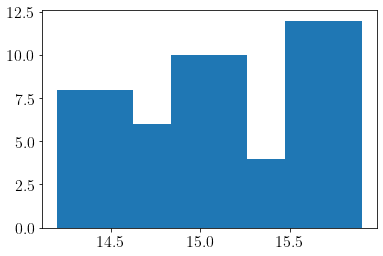

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import os

n = 50
k = 8 #初始小区间划分的个数
a = np.loadtxt(os.path.join('data',"Pdata4_20.txt"))
a = a.flatten()
mu = a.mean()
s = a.std()
print("均值为：", mu); print("标准差为：", s)
print("最大值为：",a.max()); print("最小值为：",a.min())

bins = np.array([14.2, 14.625, 14.8375, 15.05, 15.2625, 15.475, 15.9])
h = plt.hist(a,bins)
f = h[0]; x=h[1] #提取各个小区间的频数和小区间端点的取值
print("各区间的频数为：",f,"\n小区间端点值为：",x)

p = ss.norm.cdf(x, mu, s)  #计算各个分点分布函数的取值
dp = np.diff(p)  #计算各小区间取值的理论概率
dp[0] = ss.norm.cdf(x[1], mu, s)  #修改第一个区间的概率值
dp[-1] = 1-ss.norm.cdf(x[-2], mu, s)  #修改最后一个区间的概率值

print("各小区取值的理论概率为：",dp)
st = sum(f**2/(n*dp)) - n  #计算卡方统计量的值

bd = ss.chi2.ppf(0.95,k-5) #计算上alpha分位数
print("统计量为：{}，临界值为：{}".format(st, bd))

if st < bd:
    print('接受假设')
else:
    print('拒绝假设')

In [123]:
import numpy as np
import os
import scipy.stats as ss

a = np.loadtxt(os.path.join('data', "Pdata4_6_2.txt"))
w = a[:, 1::2]
w = w.flatten()

mu = w.mean()
s = w.std(ddof=1)  #计算样本均值和标准差
print("均值和标准差分别为：", (mu, s))

statVal, pVal = ss.kstest(w, 'norm', (mu, s))
print("统计量和P值分别为：", [statVal, pVal])

if pVal > 0.05:
    print('接受假设')
else:
    print('拒绝假设')

均值和标准差分别为： (61.27, 6.892911012208283)
统计量和P值分别为： [0.05904454095634937, 0.8561177331775733]
接受假设


In [124]:
from scipy.sparse.linalg import eigs
import numpy as np

a = np.array([[  1, 1/2, 5,   5,   3],
              [  2,   1, 7,   7,   5],
              [1/5, 1/7, 1, 1/2, 1/3],
              [1/5, 1/7, 2,   1, 1/2],
              [1/3, 1/5, 3,   2,   1]])
L, V = eigs(a, 1)
print(V)
CR = (L-5)/4/1.12  #计算矩阵A的一致性比率
W = V/sum(V)
print("最大特征值为：", L)
print("最大特征值对应的特征向量W=\n", W)
print("CR=", CR)

B1 = np.array([
    [1, 1/3, 1/2],
    [3,   1, 1/2],
    [2,   2,   1]
])
L1, P1 = eigs(B1, 1)
P1 = P1/sum(P1)
print("P1=", P1)

B2 = np.array([
    [  1,   3, 2],
    [1/3,   1, 2],
    [1/2, 1/2, 1]
])
t2, P2 = eigs(B2, 1)
P2 = P2/sum(P2)
print("P2=", P2)

B3 = np.array([
    [  1,   4, 3],
    [1/4,   1, 2],
    [1/3, 1/2, 1]
])
t3, P3 = eigs(B3, 1)
P3 = P3/sum(P3)
print("P3=", P3)

B4 = np.array([
    [  1,   3, 2],
    [1/3,   1, 2],
    [1/2, 1/2, 1]
])
t4, P4 = eigs(B4, 1)
P4 = P4/sum(P4)
print("P4=", P4)

B5 = np.array([
    [  1, 2,   3],
    [1/2, 1, 1/2],
    [1/3, 2,   1]
])
t5, P5 = eigs(B5, 1)
P5 = P5/sum(P5)
print("P5=", P5)

K = np.hstack([P1, P2, P3, P4, P5])@W  #矩阵乘法
print("K=", K)

[[0.49555931+0.j]
 [0.83255221+0.j]
 [0.08399158+0.j]
 [0.11865768+0.j]
 [0.20035857+0.j]]
最大特征值为： [5.09758844+0.j]
最大特征值对应的特征向量W=
 [[0.28626525+0.j]
 [0.48093287+0.j]
 [0.04851865+0.j]
 [0.0685439 +0.j]
 [0.11573932+0.j]]
CR= [0.02178313+0.j]
P1= [[0.16765631+0.j]
 [0.34873919+0.j]
 [0.4836045 +0.j]]
P2= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P3= [[0.63009766-0.j]
 [0.21844266-0.j]
 [0.15145968-0.j]]
P4= [[0.54721643+0.j]
 [0.26307422+0.j]
 [0.18970934+0.j]]
P5= [[0.54721643+0.j]
 [0.18970934+0.j]
 [0.26307422+0.j]]
K= [[0.44258285+0.j]
 [0.27694046+0.j]
 [0.28047669+0.j]]


# 十二、多元分析
多元分析 (multivariate analysis) 是多变量的统计分析方法, 内容广泛, 通常包括**回归分析、判别分析、主成分分析、因子分析、聚类分析、典型相关分析、对应分析**等内容, 限于篇幅, 本章介绍判别分析、主成分分析、因子分析、聚类分析的部分内容.

## 1. 判别分析
判别分析是一种**分类方法**, 它是根据已掌握的每个类别的若干样本的数据信息, 求出判别函数, 再根据判别函数判别未知样本点所属的类别.
假定已有 $r$ 类判别对象 $A_{1}, A_{2}, \cdots, A_{r}$, 每一类 $A_{i}$ 由 $m$ 个指标的 $n_{i}$ 个样本确定, 即 $A_{i}$ 类有样本值矩阵
$$
\boldsymbol{A}_{i}=\left[\begin{array}{cccc}
a_{11}^{(i)} & a_{12}^{(i)} & \cdots & a_{1 m}^{(i)} \\
a_{21}^{(i)} & a_{22}^{(i)} & \cdots & a_{2 m}^{(i)} \\
\vdots & \vdots & & \vdots \\
a_{n_{i} 1}^{(i)} & a_{n_{i} 2}^{(i)} & \cdots & a_{n_{i} m}^{(i)}
\end{array}\right]=\left[\begin{array}{c}
\left(\boldsymbol{a}_{1}^{(i)}\right)^{\mathrm{T}} \\
\left(\boldsymbol{a}_{2}^{(i)}\right)^{\mathrm{T}} \\
\vdots \\
\left(\boldsymbol{a}_{n_{i}}^{(i)}\right)^{\mathrm{T}}
\end{array}\right]
$$
其中, $\boldsymbol{A}_{i}$ 矩阵的第 $k$ 行是 $A_{i}$ 的第 $k$ 个样本点的观测值向量. 问待判定对象 $\boldsymbol{x}=$ $\left[x_{1}, x_{2}, \cdots, x_{m}\right]^{\mathrm{T}}$ 属于 $A_{i}(i=1,2, \cdots, r)$ 的哪一类?
为了能对不同的 $A_{i}(i=1,2, \cdots, r)$ 作出判别, 应有一个一般规则, 依据 $\boldsymbol{x}$ 的值, 便可以根据该规则作出判断, 称这样的规则为**判别规则**. 判别规则往往通过函数表达, 这些函数称为**判别函数**, 记为 $W(i, \boldsymbol{x})(i=1,2, \cdots, r)$.
记 $n=\sum_{i=1}^{r} n_{i}, \boldsymbol{\mu}_{i}$ 和 $\boldsymbol{L}_{i}$ 分别表示第 $A_{i}(i=1,2, \cdots, r)$ 类的样本**均值向量**和**离差矩阵**, 即
$$
\boldsymbol{\mu}_{i}=\frac{1}{n_{i}} \sum_{k=1}^{n_{i}} \boldsymbol{a}_{k}^{(i)}, \quad \boldsymbol{L}_{i}=\sum_{k=1}^{n_{i}}\left(\boldsymbol{a}_{k}^{(i)}-\boldsymbol{\mu}_{i}\right)\left(\boldsymbol{a}_{k}^{(i)}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}},
$$
并用 $\boldsymbol{x} \in A_{i}$ 表示 $\boldsymbol{x}$ 归属于 $A_{i}$.

### 1.1 距离判别法
距离判别法就是建立待判定对象 $\boldsymbol{x}$ 到 $A_{i}$ 的距离 $d\left(\boldsymbol{x}, A_{i}\right)$, 然后根据距离最近原则进行判别, 即判别函数 $W(i, \boldsymbol{x})=d\left(\boldsymbol{x}, A_{i}\right)$. 若 $W(k, \boldsymbol{x})=\min \{W(i, \boldsymbol{x}) \mid i=$ $1,2, \cdots, r\}$, 则 $\boldsymbol{x} \in A_{k}$.
距离 $d\left(\boldsymbol{x}, A_{i}\right)$ 一般采用 **Mahalanobis 距离 (马氏距离)**.
#### 1.1.1 r个总体协方差矩阵相等的情况
待判对象 $\boldsymbol{x}$ 到第 $A_{i}(i=1,2, \cdots, r)$ 类的马氏距离定义为
$$
d\left(\boldsymbol{x}, A_{i}\right)=\left(\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)\right)^{\frac{1}{2}}
$$
其中, $\boldsymbol{\Sigma}=\frac{1}{n-r} \sum_{i=1}^{r} \boldsymbol{L}_{i}$.
#### 1.1.2 r个总体协方差矩阵都不相等的情况
待判对象 $\boldsymbol{x}$ 到第 $A_{i}(i=1,2, \cdots, r)$ 类的马氏距离定义为
$$
d\left(\boldsymbol{x}, A_{i}\right)=\sqrt{\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)^{\mathrm{T}} \boldsymbol{\Sigma}_{i}^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}_{i}\right)}
$$
其中, $\boldsymbol{\Sigma}_{i}=\frac{1}{n_{i}-1} \boldsymbol{L}_{i}$.
#### 1.1.3 sklearn.neighbors 模块的 KNeighborsClassifier 函数
sklearn.neighbors 模块的 KNeighborsClassifier 函数实现**距离判别法**的分类, 其调用格式为

KNeighborsClassifier (n_neighbors $=5$, weights $=$ ' uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)
其中, 第一个参数 n_neighbors 指定分类的类别数; algorithm 的取值可以为：'auto', 'ball_tree', 'kd_tree', 'brute'; metric 的默认取值为 'minkowski', 即默认的距离为欧氏距离, metric 的取值及其含义见下表.

表 metric的取值及其含义 $\left(x=\left[x_{1}, x_{2}, \cdots, x_{m}\right], y=\left[y_{1}, y_{2}, \cdots, y_{m}\right]\right)$

\begin{array}{ccl}
\hline
\text { 字符串 } & \text{metic_params} & \text { 含义 } \\
\hline
\text{'euclidean'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的欧氏距离:} \sqrt{\sum_{i=1}^{m}\left(x_{i}-y_{i}\right)^{2}}\\
\text{'manhattan'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的曼哈顿距离:} \sum_{i=1}^{m}\left|x_{i}-y_{i}\right|\\
\text{'chebyshev'} & \cdot & \boldsymbol{x}, \boldsymbol{y} \text{的切比雪夫距离:} \max \left\{\left|x_{i}-y_{i}\right|, i=1,2, \cdots, m\right\}\\
\text { 'minkowski' } & p & \boldsymbol{x}, \boldsymbol{y} \text { 的闵可夫斯基距离: } \sqrt[p]{\sum_{i=1}^{m}\left|x_{i}-y_{i}\right|^{p}}, p=1 \text { 为曼哈顿距离, } p=2 \text { 为欧氏距离 } \\
\text { 'wminkowski' } &  p, w & \boldsymbol{x}, \boldsymbol{y} \text { 的带权重闵可夫斯基距离: } \sqrt[p]{\sum_{i=1}^{m}\left(w_{i} \mid x_{i}-y_{i}\right)^{p}} \text {, 其中 } \boldsymbol{w}=\left[w_{1}, w_{2}, \cdots, w_{m}\right] \text { 为权重 } \\
\text { 'seuclidean' } & V & \text { 标准化欧氏距离, 即各指标变量的数据都标准化为均值为 } 0 \text {, 标准差为 } 1 \\
\text { 'mahalanobis'} & V \text{or} VI & \boldsymbol{x}, \boldsymbol{y} \text { 的马氏距离: } \sqrt{(\boldsymbol{x}-\boldsymbol{x})^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{y})}, \boldsymbol{\Sigma} \text { 为样本的协方差矩阵. 当 } r \text { 个类别的总体相互独立时, }  \boldsymbol{\Sigma} \text { 为单位阵, 此时马氏距离等同于欧氏距离 } \\
\hline
\end{array}

#### 1.1.4 例题

**例** (1989 年国际大学生数学建模竞赛 $\mathrm{A}$ 题: 蠓虫分类) 蠓虫是一种昆 虫, 分为很多类型, 其中有一种名为 Af, 是能传播花粉的益虫; 另一种名为 Apf, 是 会传播疾病的害虫. 这两种类型的蠓虫在形态上十分相似, 很难区别. 现测得 9 只 Af 和 6 只 $\mathrm{Apf}$ 蠓虫的触角长度和翅膀长度数据.
Af:  $(1.24,1.27),(1.36,1.74),(1.38,1.64),(1.38,1.82),(1.38,1.90),(1.40,1.70),(1.48,1.82),(1.54,1.82),(1.56,2.08)$;
Apf: $(1.14,1.78),(1.18,1.96),(1.20,1.86),(1.26,2.00),(1.28,2.00),(1.30,1.96)$.
若两类䖶虫协方差矩阵相等, 试判别 $(1.24,1.80),(1.28,1.84)$ 与 $(1.40,2.04) $ 3只蠓虫属于哪一类.

In [125]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

x0 = np.array([
     [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82], [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据
x = np.array([
    [1.24, 1.80], [1.28, 1.84], [1.4, 2.04]
])
g = np.hstack([np.ones(9), 2*np.ones(6)]) # g为已知样本数据的类别标号
# print(g)
v = np.cov(x0.T) # 计算协方差
print(v)

knn = KNeighborsClassifier(2, metric='mahalanobis', metric_params={'V': v}) # 马氏距离分类
knn.fit(x0, g)
pre = knn.predict(x)
print("马氏距离分类结果：", pre)
print("马氏距离已知样本的误判率：", 1-knn.score(x0, g))

knn2 = KNeighborsClassifier(2) # 欧式距离分类
knn2.fit(x0, g)
pre2 = knn2.predict(x)
print("欧式距离分类结果：", pre2)
print("欧式距离已知样本的误判率为：", 1-knn2.score(x0, g))

[[0.01596952 0.00347619]
 [0.00347619 0.0383381 ]]
马氏距离分类结果： [2. 2. 1.]
马氏距离已知样本的误判率： 0.0
欧式距离分类结果： [2. 1. 2.]
欧式距离已知样本的误判率为： 0.0


从程序运行结果看, 使用马氏距离分类时, 把前两个样本点判为 Apf, 第三个样本点判为 $\mathrm{Af}$; 使用欧氏距离分类时, 把第一个和第三个样本点判为 Apf, 第二个样本点判为 $A f$, 但两种分类法对已知样本点的误判率都为 0 , 但我们**倾向于使用马氏距离进行分类**.

**例** 从健康人群、硬化症患者和冠心病患者中分别随机选取 10 人、 6 人 和 4 人, 考察了他们各自心电图的 5 个不同指标 (记作 $x_{1}, x_{2}, x_{3}, x_{4}, x_{5}$ ) 如下表所示, 试对两个待判样品作出判断.
表 已知数据和样本
\begin{array}{cccrccc}
\hline
序号 & x_{1} & x_{2} & x_{3} & x_{4} & x_{5} & 类型 \\
\hline
1 & 8.11 & 261.01 & 13.23 & 5.46 & 7.36 & 1 \\
2 & 9.36 & 185.39 & 9.02  & 5.66 & 5.99 & 1 \\
3 & 9.85 & 249.58 & 15.61 & 6.06 & 6.11 & 1 \\
4 & 2.55 & 137.13 & 9.21  & 6.11 & 4.35 & 1 \\
5 & 6.01 & 231.34 & 14.27 & 5.21 & 8.79 & 1 \\
6 & 9.46 & 231.38 & 13.03 & 4.88 & 8.53 & 1 \\
7 & 4.11 & 260.25 & 14.72 & 5.36 & 10.02 & 1 \\
8 & 8.90 & 259.51 & 14.16 & 4.91 & 9.79 & 1 \\
9 & 7.71 & 273.84 & 16.01 & 5.15 & 8.79 & 1 \\
10 & 7.51 & 303.59 & 19.14 & 5.7 & 8.53 & 1 \\
11 & 6.8  & 308.9  & 15.11 & 5.52 & 8.49 & 2 \\
12 & 8.68 & 258.69 & 14.02 & 4.79 & 7.16 & 2 \\
13 & 5.67 & 355.54 & 15.13 & 4.97 & 9.43 & 2 \\
14 & 8.1  & 476.69 & 7.38  & 5.32 & 11.32 & 2 \\
15 & 3.71 & 316.12 & 17.12 & 6.04 & 8.17 & 2 \\
16 & 5.37 & 274.57 & 16.75 & 4.98 & 9.67 & 2 \\
17 & 5.22 & 330.34 & 18.19 & 4.96 & 9.61 & 3 \\
18 & 4.71 & 331.47 & 21.26 & 4.30 & 13.72 & 3\\
19 & 4.71 & 352.5  & 20.79 & 5.07 & 11 & 3\\
20 & 3.36 & 347.31 & 17.9  & 4.65 & 11.19 & 3\\
21 & 8.06 & 231.03 & 14.41 & 5.72 & 6.15 & \text{待判}\\
22 & 9.89 & 409.42 & 19.47 & 5.19 & 10.49 & \text{待判}\\
\hline
\end{array}

In [127]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号
x = a[-2:, 1:-1] # 提取待判样本点的观察值
v = np.cov(x0.T) # 计算协方差

knn = KNeighborsClassifier(3, metric='mahalanobis', metric_params={'V': v}) # 马氏距离分类
knn.fit(x0, y0)
pre = knn.predict(x)
print("分类结果", pre)
print("已知样本的误判率为：", 1-knn.score(x0, y0))

分类结果 [1 1]
已知样本的误判率为： 0.15000000000000002


即样品1和样品2都属于第1类。
已知样本的误判率为15%，是比较高的。我们把可以使用的距离判别都测试了一遍，马氏距离的误判率是最低的。

### 1.2 Fisher判别法

Fisher判别法是基于**方差分析**的判别法, 判别函数 $W(\boldsymbol{x})=\boldsymbol{u}^{\mathrm{T}} \boldsymbol{x}$, 其中 $\boldsymbol{u}$ 为判别系数向量, 其计算公式如下:
(1) 计算 $\boldsymbol{L}=\boldsymbol{L}_{1}+\boldsymbol{L}_{2}+\cdots+\boldsymbol{L}_{r}$ 及 $\boldsymbol{L}^{-1}$;
(2) 计算 $\boldsymbol{B}=\sum_{i=1}^{r} n_{i}\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)\left(\boldsymbol{\mu}_{i}-\boldsymbol{\mu}\right)^{\mathrm{T}}$, 其中 $\boldsymbol{\mu}=\frac{1}{n} \sum_{i=1}^{r} n_{i} \boldsymbol{\mu}_{i}$;
(3) 计算 $\boldsymbol{B L} \boldsymbol{L}^{-1}$ 的最大特征值对应的特征向量 $\boldsymbol{p}$。特别当 $r=2$ 时, 计算 $\boldsymbol{p}=$ $\boldsymbol{\mu}_{1}-\boldsymbol{\mu}_{2}$
(4) 计算 $\boldsymbol{u}=\boldsymbol{L}^{-1} \boldsymbol{p}$.
为确定判别规则, 计算 $w_{i}=W\left(\boldsymbol{\mu}_{i}\right)=\boldsymbol{u}^{\mathrm{T}} \boldsymbol{\mu}_{i}(i=1,2, \cdots, r)$. 将 $A_{i}$ 重新排序, 使得 $w_{1}<w_{2}<\cdots<w_{r}$, 然后令 $c_{0}=-\infty, c_{i}=\left(w_{i}+w_{i+1}\right) / 2$ 或 $c_{i}=$ $\left(n_{i} w_{i}+n_{i+1} w_{i+1}\right) /\left(n_{i}+n_{i+1}\right)(i=1,2, \cdots, r-1), c_{r}=+\infty$.
Fisher判别规则为: 若 $c_{k-1}<W(\boldsymbol{x})<c_{k}$, 则 $\boldsymbol{x} \in A_{k}$.

**例** 用Fisher准则再判别“蠓虫分类”问题

In [128]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82],
    [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据

x = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]]) # 输入待判样本点数据
y0 = np.hstack([np.ones(9), 2*np.ones(6)]) # y0为已知样本数据的类别
clf = LDA()
clf.fit(x0, y0)
print("判别结果为：",clf.predict(x))
print("已知样本的误判率为：",1-clf.score(x0,y0))

判别结果为： [2. 2. 2.]
已知样本的误判率为： 0.0


**例** 用Fisher准则再判别“心电图”问题

In [129]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号
x = a[-2:, 1:-1] # 提取待判样本点的观察值

clf = LDA()
clf.fit(x0, y0)
print("判别结果为：", clf.predict(x))
print("已知样本的误判率为：", 1-clf.score(x0, y0))

判别结果为： [1 2]
已知样本的误判率为： 0.0


**从上面的例子可以看出，Fisher线性判别法的效果比距离判别法的效果要好。**

### 1.3 贝叶斯判别法

假定 $r$ 个 $m$ 维总体的密度函数分别为已知 $\phi_{i}(\boldsymbol{x})(i=1,2, \cdots, r)$, 且判别之前有足够的理由可认为待判别对象 $x \in A_{i}$ 的概率为 $p_{i}$. 如果没有任何附加先验信息, 通常取 $p_{i}=1 / r$. **贝叶斯判别函数** $W(i, \boldsymbol{x})=p_{i} \phi_{i}(\boldsymbol{x})$, 判别规则为: 若 $W(k, \boldsymbol{x})=\max \{W(i, \boldsymbol{x}) \mid i=1,2, \cdots, r\}$, 则 $\boldsymbol{x} \in A_{k}$. 高斯-贝叶斯分类的函数为 GaussianNB.

**例** 用贝叶斯判别法再判别“蠓虫分类”问题

In [130]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

x0 = np.array([
    [1.24, 1.27], [1.36, 1.74], [1.38, 1.64], [1.38, 1.82], [1.38, 1.90], [1.40, 1.70], [1.48, 1.82], [1.54, 1.82],
    [1.56, 2.08], [1.14, 1.78], [1.18, 1.96], [1.20, 1.86], [1.26, 2.00], [1.28, 2.00], [1.30, 1.96]
]) # 输入已知样本数据
x = np.array([[1.24, 1.80], [1.28, 1.84], [1.40, 2.04]]) # 输入待判样本点数据
y0 = np.hstack([np.ones(9), 2*np.ones(6)])  #y0为已知样本数据的类别
clf = GaussianNB()
clf.fit(x0, y0)
print("判别结果为：", clf.predict(x))
print("已知样本的误判率为：", 1-clf.score(x0, y0))

判别结果为： [2. 2. 1.]
已知样本的误判率为： 0.0


### 1.4 判别准则的评价

当一个判别准则提出以后, 还要研究它的优良性, 即考察它的**误判率**. 以训练样本为基础的误判率的估计思想如下: 若属于 $G_{1}$ 的样品被误判为属于 $G_{2}$ 的个数 为 $N_{1}$ 个, 属于 $G_{2}$ 的样品被误判为属于 $G_{1}$ 的个数为 $N_{2}$ 个, 两类总体的样品总数为 $N$, 则误判率 $P$ 的估计为
$$
\hat{P}=\frac{N_{1}+N_{2}}{N} .
$$
针对具体情况, 通常采用**回代法**和**交叉法**进行误判率的估计.
#### 1.4.1 回代误判率
设 $G_{1}, G_{2}$ 为两个总体, $\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, \cdots, \boldsymbol{x}_{m}$ 和 $\boldsymbol{y}_{1}, \boldsymbol{y}_{2}, \cdots, \boldsymbol{y}_{n}$ 是分别来自 $G_{1}, G_{2}$ 的训练样本, 以全体训练样本作为 $m+n$ 个新样品, 逐个代入已建立的判别准则中判别其归属, 这个过程称为**回判**. 回判结果中若属于 $G_{1}$的样品被误判为属于 $G_{2}$ 的个数为 $N_{1}$ 个, 属于 $G_{2}$ 的样品被误判为属于 $G_{1}$ 的个数为 $N_{2}$ 个, 则误判率估计为
$$
\hat{P}=\frac{N_{1}+N_{2}}{m+n} .
$$
误判率的回代估计易于计算. 但是, $\hat{P}$ 是由建立判别函数的数据回代判别函数而得到的. 因此 $\hat{P}$ 作为真实误判率的估计是**有偏的**, 往往比真实误判率小. 当训练样本容量较大时, $\hat{P}$ 可以作为真实误判率的一种估计, 具有一定的参考价值.
#### 1.4.2 交叉误判率
交叉误判率估计是每次删除一个样品, 利用其余的 $m+n-1$ 个训练样品建立判别准则, 再用所建立的准则对删除的样品进行判别. 对训练样品中每个样品都做如上分析, 以其误判的比例作为误判率, 具体步骤如下:
(1) 从总体 $G_{1}$ 的训练样品开始, 剔除其中一个样品, 剩余的 $m-1$ 个样品与 $G_{2}$ 的全部样品建立判别函数.
(2) 用建立的判别函数对剔除的样品进行判别.
(3) 重复步骤 (1) 和 (2), 直到 $G_{1}$ 中的全部样品依次被删除又进行判别, 其误判的样品个数记为 $N_{1}^{*}$.
(4) 对 $G_{2}$ 的样品重复步骤 (1), (2) 和 (3), 直到 $G_{2}$ 中的全部样品依次被删除又进行判别, 其误判的样品个数记为 $N_{2}^{*}$.
于是交叉误判率估计为
$$
\hat{P}^{*}=\frac{N_{1}^{*}+N_{2}^{*}}{m+n} .
$$
**用交叉法估计真实误判率是较为合理的.**
当训练样品足够大时, 可留出一些已知类别的样品不参加建立判别准则而是作为检验集, 并把错判的比例作为错判率的估计. 此法当检验集较小时, 估计的方差大.
sklearn 库中 sklearn.model_selection 模块的 cross_val_score 函数可以计算交叉检验的精度, 其调用格式为
cross_val_score(model, $x 0, y 0, c v=k)$
其中 model 是所建立的模型; $\mathrm{x} 0$ 是已知样本点的数据; $\mathrm{y} 0$ 是已知样本的标号值; $\mathrm{cv}=\mathrm{k}$ 表示把已知样本点分成 $k$ 组, 其中 $k-1$ 组被用作训练集, 剩下一组被用作评估集, 这样一共可以对分类器做 $k$ 次训练, 并且得到 $k$ 个训练结果; 该函数的返回值是每组评估数据分类的准确率.

**例** 把"心电图"一例中的数据分成2组，计算线性判别法的交叉验证准确率。

In [132]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

a = np.array([
    [1,  8.11, 261.01, 13.23, 5.46, 7.36,  1],
    [2,  9.36, 185.39, 9.02,  5.66, 5.99,  1],
    [3,  9.85, 249.58, 15.61, 6.06, 6.11,  1],
    [4,  2.55, 137.13, 9.21,  6.11, 4.35,  1],
    [5,  6.01, 231.34, 14.27, 5.21, 8.79,  1],
    [6,  9.46, 231.38, 13.03, 4.88, 8.53,  1],
    [7,  4.11 ,260.25, 14.72, 5.36, 10.02, 1],
    [8,  8.90, 259.51 ,14.16, 4.91, 9.79,  1],
    [9,  7.71, 273.84 ,16.01, 5.15, 8.79,  1],
    [10, 7.51, 303.59, 19.14, 5.70, 8.53,  1],
    [11, 6.80, 308.90, 15.11, 5.52, 8.49,  2],
    [12, 8.68, 258.69, 14.02, 4.79, 7.16,  2],
    [13, 5.67, 355.54, 15.13, 4.97, 9.43,  2],
    [14, 8.10, 476.69, 7.38,  5.32, 11.32, 2],
    [15, 3.71, 316.12, 17.12, 6.04, 8.17,  2],
    [16, 5.37, 274.57, 16.75, 4.98, 9.67,  2],
    [17, 5.22, 330.34, 18.19, 4.96, 9.61,  3],
    [18, 4.71, 331.47, 21.26, 4.30, 13.72, 3],
    [19, 4.71, 352.50, 20.79, 5.07, 11.00, 3],
    [20, 3.36, 347.31, 17.90, 4.65, 11.19, 3],
    [21, 8.06, 231.03, 14.41, 5.72, 6.15, -1],
    [22, 9.89, 409.42, 19.47, 5.19, 10.49, -1]
]) # 最后一列-1表示待判
x0 = a[:-2, 1:-1].astype(float) # 提取已知样本点的观测值
y0 = a[:-2, -1].astype(int) # 提取样本数据类别编号

model = LinearDiscriminantAnalysis()
print(cross_val_score(model, x0, y0, cv=2))

[0.9 0.8]


即两组测试数据的准确率分别为90%和80%。

## 2. 主成分分析
主成分分析由 Hotelling 于 1933 年提出, 它是利用降维的方法, 把多指标转化为几个综合指标的多元统计分析的方法, 主要目的是希望用较少的变量去解释原来资料中的大部分信息. 通常选出的变量要比原始指标的变量少, 能解释大部分资料中变异的几个新指标变量, 即所谓的**主成分**, 并以此解释资料的综合性指标.

### 2.1 主成分分析的基本原理和步骤
#### 2.1.1 主成分分析的基本原理
设 $X_{1}, X_{2}, \cdots, X_{m}$ 表示以 $x_{1}, x_{2}, \cdots, x_{m}$ 为样本观测值的随机变量, 如果能找到 $c_{1}, c_{2}, \cdots, c_{m}$, 使得方差
$$
\operatorname{Var}\left(c_{1} X_{1}+c_{2} X_{2}+\cdots+c_{m} X_{m}\right) \tag{(1)}
$$
的值达到最大 (由于方差反映了数据差异程度), 就表明了这 $m$ 个变量的最大差异. 当然, (1) 必须附加某种限制, 否则极值可取无穷大而没有意义. 通常规定 $\sum_{k=1}^{m} c_{k}^{2}=1$. 在此约束下, 求 (1) 式的最大值. 这个解是 $m$ 维空间的一个单位向量, 它代表一个 “方向”, 就是常说的**主成分方向**.
一般来说, 代表原来 $m$ 个变量的主成分不止一个, 但不同主成分的信息之间不能相互包含, **统计上的描述就是两个主成分的协方差为 0 **, **几何上就是两个主成分的方向正交**. 具体确定各个主成分的方法如下.
设 $F_{i}(i=1,2, \cdots, m)$ 表示第 $i$ 个主成分, 且
$$
F_{i}=c_{i 1} x_{1}+c_{i 2} x_{2}+\cdots+c_{i m} x_{m}, \quad i=1,2, \cdots, m,
$$
其中 $\sum_{j=1}^{m} c_{i j}^{2}=1, \boldsymbol{c}_{1}=\left[c_{11}, c_{12}, \cdots, c_{1 m}\right]^{\mathrm{T}}$ 使得 $\operatorname{Var}\left(F_{1}\right)$ 的值达到最大. $\boldsymbol{c}_{2}=\left[c_{21}\right.$, $\left.c_{22}, \cdots, c_{2 m}\right]^{\mathrm{T}}$ 不仅垂直于 $\boldsymbol{c}_{1}$, 且使 $\operatorname{Var}\left(F_{2}\right)$ 达到最大. $\boldsymbol{c}_{3}=\left[c_{31}, c_{32}, \cdots, c_{3 m}\right]^{\mathrm{T}}$ 同时垂直于 $c_{1}, c_{2}$, 且使 $\operatorname{Var}\left(F_{3}\right)$ 达到最大. 以此类推可得到全部 $m$ 个主成分. 在具体问题中, 究竟需要确定几个主成分, 注意以下几点:
(1) 主成分分析的结果受**量纲**的影响, 由于各变量的单位可能不同, 结果可能不同. 这是主成分分析的最大问题. 因此, 在实际问题中, 需要先对各变量进行**无量纲化处理**, 然后用协方差或相关系数矩阵进行分析.
(2) 在实际研究中, 由于主成分的目的是降维, 减少变量的个数, 因此一般选取少量的主成分 **(一般不超过 6 个)**, 只要累积贡献率超过 $85 \%$ 即可.

#### 2.1.2 主成分分析的基本步骤
假设有 $n$ 个研究对象, $m$ 个指标变量 $x_{1}, x_{2}, \cdots, x_{m}$, 第 $i$ 个对象第 $j$ 个指标取值 $a_{ij}$, 则构成数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$.
(1) 对原来的 $m$ 个指标进行标准化, 得到标准化的指标变量
$$
y_{j}=\frac{x_{j}-\mu_{j}}{s_{j}}, \quad j=1,2, \cdots, m,
$$
其中, $\mu_{j}=\frac{1}{n} \sum_{i=1}^{n} a_{i j}, s_{j}=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}$. 对应地, 得到标准化的数据矩阵 $\boldsymbol{B}=\left(b_{i j}\right)_{n \times m}$, 其中 $b_{i j}=\frac{a_{i j}-\mu_{j}}{s_{j}}, i=1,2, \cdots, n, j=1,2, \cdots, m$.
(2) 根据标准化的数据矩阵 $\boldsymbol{B}$ 求出**相关系数矩阵** $\boldsymbol{R}=\left(r_{i j}\right)_{m \times m}$, 其中
$$
r_{i j}=\frac{\sum_{k=1}^{n} b_{k i} b_{k j}}{n-1}, \quad i, j=1,2, \cdots, m .
$$
(3) 计算相关系数矩阵 $\boldsymbol{R}$ 的特征值 $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 及对应的**标准正交化特征向量** $\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, \boldsymbol{u}_{m}$, 其中 $\boldsymbol{u}_{j}=\left[u_{1 j}, u_{2 j}, \cdots, u_{m j}\right]^{\mathrm{T}}$, 由特征向量组成 $m$ 个新的指标变量
$$
\left\{\begin{array}{c}
F_{1}=u_{11} y_{1}+u_{21} y_{2}+\cdots+u_{m 1} y_{m}, \\
F_{2}=u_{12} y_{1}+u_{22} y_{2}+\cdots+u_{m 2} y_{m}, \\
\quad \cdots \cdots \\
F_{m}=u_{1 m} y_{1}+u_{2 m} y_{2}+\cdots+u_{m m} y_{m},
\end{array}\right.
$$
式中, $F_{1}$ 是第 1 主成分, $F_{2}$ 是第 2 主成分, $\cdots, F_{m}$ 是第 $m$ 主成分.
(4) 计算主成分贡献率及累积贡献率, 主成分 $F_{j}$ 的贡献率为
$$
w_{j}=\frac{\lambda_{j}}{\sum_{k=1}^{m} \lambda_{k}}, \quad j=1,2, \cdots, m,
$$
前 $i$ 个主成分的累积贡献率为
$$
\frac{\sum_{k=1}^{i} \lambda_{k}}{\sum_{k=1}^{m} \lambda_{k}} .
$$
一般取累积贡献率达 $85 \%$ 以上的特征值 $\lambda_{1}, \lambda_{2}, \cdots, \lambda_{k}$ 所对应的第 1 , 第 $2, \cdots$, 第 $k(k \leqslant p)$ 主成分.
(5) 最后利用得到的主成分$F_1, F_2, \dots, F_k$分析问题，或者继续进行评价、回归、聚类等其他建模。

#### 2.2.3 sklearn.decomposition 模块的 PCA 函数
sklearn.decomposition 模块的 $\mathrm{PCA}$ 函数实现主成分分析, 其调用格式为
sklearn. decomposition.PCA(n_components $=$ None, copy $=$ True)
其中, n_components: 类型为 int 或字符串, 缺省时默认为 None, 所有成分被保留; 赋值为 int, 比如 n_components $=2$, 将提取两个主成分; 赋值为 $(0,1)$ 上的浮点数, 将自动选择主成分的个数, 使得满足信息贡献率的要求.
copy: 类型为 bool, True 或者 False, 缺省时默认为 True; 表示是否在运行算法时, 将原始训练数据复制一份. 若为 True, 则运行 PCA 算法后, 原始训练数据的值不会有任何改变, 因为是在原始数据的副本上进行运算; 若为 False, 则运行 PCA 算法后, 原始训练数据的值会改变, 因为是在原始数据上进行降维计算.

#### 2.2.4 习题
**例** 对 10 名男中学生的身高 $x_{1} 、$ 胸围 $x_{2}$ 和体重 $x_{3}$ 进行测量, 得数据见下表, 对其作主成分分析.
表 男中学生的身高、胸围和体重数据
\begin{array}{cccc||cccc}
\hline
序号 & 身高 x_{1} / \mathrm{cm} & 构围 x_{2} / \mathrm{cm} & 体重 x_{3} / \mathrm{kg} & 序号 & 身高 x_{1} / \mathrm{cm} & 胸围 x_{2} / \mathrm{cm} & 体重 x_{3} / \mathrm{kg} \\
\hline
1 & 149.5 & 69.5 & 38.5 & 6 & 156.1 & 74.5 & 45.5 \\
2 & 162.5 & 77   & 55.5 & 7 & 172.0 & 76.5 & 51.0 \\
3 & 162.7 & 78.5 & 50.8 & 8 & 173.2 & 81.5 & 59.5 \\
4 & 162.2 & 87.5 & 65.5 & 9 & 159.5 & 74.5 & 43.5 \\
5 & 156.5 & 74.5 & 49.0 & 10 & 157.7 & 79 & 53.5 \\
\hline
\end{array}

In [133]:
import numpy as np
from sklearn.decomposition import PCA

a = np.array([
    [149.5, 69.5, 38.5],
    [162.5, 77.0, 55.5],
    [162.7, 78.5, 50.8],
    [162.2, 87.5, 65.5],
    [156.5, 74.5, 49.0],
    [156.1, 74.5, 45.5],
    [172.0, 76.5, 51.0],
    [173.2, 81.5, 59.5],
    [159.5, 74.5, 43.5],
    [157.7, 79.0, 53.5]
]) # 构建数据矩阵

model = PCA().fit(a) # 构造并训练模型
print("特征值为：", model.explained_variance_)
print("各主成分的贡献率：", model.explained_variance_ratio_)
print("奇异值为：", model.singular_values_)
print("各主成分的系数：\n", model.components_) # 每行是一个主成分

"""下面直接计算特征值和特征向量，和库函数进行对比"""
print('-'*50)
cf = np.cov(a.T) # 计算协方差阵
c, d = np.linalg.eig(cf) # 求特征值和特征向量
print("特征值为：", c)
print("特征向量为：\n", d)
print("各主成分的系数：\n", d.T) # 每行是一个主成分
print("各主成分的贡献率为：", c/np.sum(c))

特征值为： [110.00413886  25.32447973   1.56804807]
各主成分的贡献率： [0.80355601 0.18498975 0.01145425]
奇异值为： [31.46485738 15.09703009  3.75665179]
各主成分的系数：
 [[-0.55915657 -0.42128705 -0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [-0.04796048 -0.84338992  0.53515721]]
--------------------------------------------------
特征值为： [110.00413886  25.32447973   1.56804807]
特征向量为：
 [[ 0.55915657  0.82767368 -0.04796048]
 [ 0.42128705 -0.33348264 -0.84338992]
 [ 0.71404562 -0.45138188  0.53515721]]
各主成分的系数：
 [[ 0.55915657  0.42128705  0.71404562]
 [ 0.82767368 -0.33348264 -0.45138188]
 [-0.04796048 -0.84338992  0.53515721]]
各主成分的贡献率为： [0.80355601 0.18498975 0.01145425]


**注** (1) 从上面程序运行结果可以看出, PCA 函数使用**协方差阵**作的主成分分析. 主成分分析也可以使用**相关系数阵**, 两者计算结果略有差异, 使用相关系数阵作主成分分析, 相当于对数据进行了标准化处理.
(2) 从程序的运行结果看, 主成分的系数可以相差一个负号, 因为特征向量乘以 $-1$ 后仍然为特征向量. 用主成分分析做评价等其他模型时, 觉得很难把握, 主成分的系数变成了相反数, 模型的解释都变了.
各主成分的贡献率分别为 $80.36 \%, 18.50 \%, 1.15 \%$. 因此, 前两个主成分的累积贡献率已达 $98.86 \%$, 应用中可取前两个主成分
$$
\begin{aligned}
&F_{1}=0.5592 x_{1}+0.4213 x_{2}+0.7140 x_{3}, \\
&F_{2}=0.8277 x_{1}-0.3335 x_{2}-0.4514 x_{3} .
\end{aligned}
$$
第一主成分 $F_{1}$ 是身高值 $x_{1}$ 、胸围值 $x_{2}$ 和体重值 $x_{3}$ 的加权和, 当一个学生的 $F_{1}$ 值较大时, 可以推断他较高或较胖或又高又胖; 反之, 当一个学生比较魁梧时, 所对应的 $F_{1}$ 值一般也较大, 故**第一主成分是反映学生身材是否魁梧的综合指标**, 一 般称之为 “大小” 因子. 而在第二主成分的表达式中, 身高 $x_{1}$ 前的系数为正, 而胸围 $x_{2}$ 和体重 $x_{3}$ 前的系数为负, 当一个学生的 $F_{2}$ 值较大时, 说明 $x_{1}$ 的值较大, 而 $x_{2}$ 和 $x_{3}$ 的值相对较小, 即该生较高且瘦; 反之, 瘦高型学生的 $F_{2}$ 值会较大, 故 $F_{2}$ 是**反映学生体型特征的综合指标**, 一般称之为 “形状” 因子.


### 2.2 主成分分析的应用
主成分分析的应用范围非常广泛, 诸如投资组合风险管理、企业效益的综合分析、图像特征识别等. 将主成分分析与聚类分析、判别分析以及回归分析方法相结合, 还可以解决更多实际问题. 下面给出一个主成分综合评价的应用.
主成分分析用于**综合评价**的一般步棸：
(1) 若各指标的属性不同 (成本型、利润型等), 则将原始数据矩阵 $\boldsymbol{A}=\left(a_{i j}\right)_{n \times m}$ **统一趋势化**, 得到属性一致的指标数据矩阵 $B$.
(2) 计算 $B$ 的协方差矩阵 $\boldsymbol{\Sigma}$ 或**相关系数矩阵** $R$ (当 $B$ 的量纲不同或协方 差矩阵 $\boldsymbol{\Sigma}$ 主对角线元素差距过大时, 用相关系数矩阵 $\boldsymbol{R}$, 以下全部使用相关系数矩阵).
(3) 计算 $\boldsymbol{R}=\left(r_{i j}\right)_{m \times m}$ 的**特征值** $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 与相应的**特征向量** $\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, u_{m}$.
(4) 根据特征值计算**累积贡献率**, 确定主成分的个数, 而特征向量 $\boldsymbol{u}_{i}$ 就是第 $i$ 主成分的系数向量.
(5) 计算主成分的得分矩阵, 若选定 $k$ 个主成分, 则主成分得分矩阵为
$$
\boldsymbol{F}=\boldsymbol{B} \cdot\left[\boldsymbol{u}_{1}, \boldsymbol{u}_{2}, \cdots, \boldsymbol{u}_{k}\right] .
$$
(6) 计算综合评价值 $\boldsymbol{Z}=\boldsymbol{F} \boldsymbol{W}$, 其中 $\boldsymbol{W}=\left[w_{1}, w_{2}, \cdots, w_{k}\right]^{\mathrm{T}}$, 这里 $w_{i}= \frac{\lambda_{i}}{\sum_{j=1}^{m} \lambda_{j}}(i=1,2, \cdots, k)$ 是第 $i$ 主成分的贡献率. 根据综合评价值进行排序, 若为效益型指标值, 则评价值越大排名越靠前; 若为成本型指标值, 则评价值越小排名越靠前.
**上一例题已经演示了, 使用库函数 PCA 进行主成分分析, 主成分的系数的正负号是不可控的, 下面主成分的计算, 我们还是直接计算特征值和特征向量.**

**例** 根据 2008 年安徽省统计年鉴资料, 选择 $x_{1}$ (工业总产值的现价)、 $x_{2}$ (工业销售按当年价的产值)、 $x_{3}$ (流动资产年平均余额)、 $x_{4}$ (固定资产净值年平均余额)、 $x_{5}$ (业务收入)、 $x_{6}$ (利润总额) 6 项指标进行主成分分析, 下表列出了安徽省各市大中型工业企业主要经济指标的统计数据. (1) 选取指标是否合适? (2) 给出各市大中型工业企业排名.
表 安微省各市大中型工业企业主要经济指标(单位: 亿元)
\begin{array}{ccccccc}
\hline
地区 & x_{1} & x_{2} & x_{3} & x_{4} & x_{5} & x_{6} \\
\hline
合肥市 & 1932.27 & 1900.53 & 653.83 & 570.95 & 1810.70 & 119.53 \\
淮北市 & 367.05 & 366.08 & 186.16 & 252.07 & 395.43 & 32.82 \\
毫州市 & 86.89 & 85.38 & 40.85 & 51.71 & 83.26 & 8.95 \\
宿州市 & 154.27 & 147.07 & 30.68 & 57.96 & 146.30 & -1.27 \\
蚌埠市 & 197.21 & 193.28 & 104.56 & 90.15 & 182.60 & 7.85 \\
阜阳市 & 244.17 & 231.55 & 56.37 & 121.96 & 224.04 & 26.49 \\
淮南市 & 497.74 & 483.69 & 206.80 & 501.37 & 496.59 & 27.76 \\
滁州市 & 308.91 & 296.99 & 118.65 & 76.90 & 277.42 & 19.32 \\
六安市 & 191.77 & 189.05 & 70.19 & 62.31 & 191.98 & 23.08 \\
马鞍山市 & 905.32 & 894.61 & 351.52 & 502.99 & 1048.02 & 53.88 \\
巢湖市 & 254.99 & 242.38 & 106.66 & 75.48 & 234.76 & 19.65 \\
芜湖市 & 867.07 & 852.34 & 418.82 & 217.76 & 806.94 & 37.01 \\
宣城市 & 219.36 & 207.07 & 82.58 & 54.74 & 192.74 & 11.02 \\
铜陵市 & 570.33 & 563.33 & 224.23 & 190.77 & 697.91 & 20.61 \\
池州市 & 59.11 & 57.32 & 16.97 & 40.33 & 56.56 & 6.03 \\
安庆市 & 430.58 & 426.25 & 103.08 & 147.05 & 442.04 & 0.79 \\
黄山市 & 65.03 & 64.36 & 28.38 & 8.58 & 60.48 & 2.88 \\
\hline
\end{array}
注: 数据来源《安微统计年鉴 2008》.

解 (1) 利用 Python 软件, 求得相关系数矩阵
$$
\boldsymbol{R}=\left[\begin{array}{llllll}
1.0000 & 1.0000 & 0.9754 & 0.8231 & 0.9914 & 0.9375 \\
1.0000 & 1.0000 & 0.9758 & 0.8236 & 0.9920 & 0.9369 \\
0.9754 & 0.9758 & 1.0000 & 0.8245 & 0.9712 & 0.9127 \\
0.8231 & 0.8236 & 0.8245 & 1.0000 & 0.8502 & 0.8020 \\
0.9914 & 0.9920 & 0.9712 & 0.8502 & 1.0000 & 0.9212 \\
0.9375 & 0.9369 & 0.9127 & 0.8020 & 0.9212 & 1.0000
\end{array}\right]
$$
由于 $r_{12}=r_{21}=1$, 表明指标 $x_{1}, x_{2}$ **完全线性相关**, 所以选取的指标不合适, 只需保留 $x_{1}, x_{2}$ 中的一个指标, 这里删除指标 $x_{1}$.
(2) 各市大中型工业企业排名的数学原理在这里就不慗述了. 我们只给出计算结果和 Python 程序.
第一主成分信息贡献率达到 $92.2 \%$, 选取一个主成分进行评价即可, 主成分及信息贡献率计算结果见下面第一个表. 根据第一主成分的评价结果见下面第二个表.
表 特征值、特征向量及贡献率
\begin{array}{ccc}
\hline
特征值 & 特征向量 & 贡献率 / \% \\
\hline
4.6100 & {[0.4595,0.4552,0.4158,0.4600,0.4441]^{\mathrm{T}}} & 92.2009 \\
0.2475 & {[0.2517,0.2103,-0.9054,0.1315,0.2354]^{\mathrm{T}}} & 4.9501 \\
0.1050 & {[0.1926,0.3702,-0.0390,0.3029,-0.8559]^{\mathrm{T}}} & 2.1007 \\
0.0322 & {[-0.3510,0.7779,0.0275,-0.5153,0.0738]^{\mathrm{T}}} & 0.6431 \\
0.0053 & {[-0.7518,0.0803,-0.0719,0.6434,0.0965]^{\mathrm{T}}} & 0.1053 \\
\hline
\end{array}
表 各市第一主成分得分排名
\begin{array}{ccc||ccc||ccc}
\hline
排名 & 地区 & 得分 & 排名 & 地区 & 得分 & 排名 & 地区 & 得分 \\
\hline
1 & 合肥市 & 6.2827 & 7 & 安庆市 & -0.5654 & 13 & 宣城市 & -1.1219 \\
2 & 马鞍山市 & 2.6810 & 8 & 滁州市 & -0.6892 & 14 & 毫州市 & -1.4888 \\
3 & 芜湖市 & 1.6979 & 9 & 阜阳市 & -0.7568 & 15 & 宿州市 & -1.5324 \\
4 & 淮南市 & 0.9914 & 10 & 巢湖市 & -0.8118 & 16 & 池州市 & -1.6711 \\
5 & 铜陵市 & 0.5144 & 11 & 六安市 & -0.9758 & 17 & 黄山市 & -1.7484 \\
6 & 淮北市 & 0.2516 & 12 & 蚌埠市 & -1.0575 & & & \\
\hline
\end{array}

In [134]:
import numpy as np
from scipy.stats import zscore

a = np.array([
    [1932.27, 1900.53, 653.83, 570.95, 1810.70, 119.53],
    [ 367.05,  366.08, 186.16, 252.07,  395.43,  32.82],
    [  86.89,   85.38,  40.85,  51.71,   83.26,   8.95],
    [ 154.27,  147.07,  30.68,  57.96,  146.30,  -1.27],
    [ 197.21,  193.28, 104.56,  90.15,  182.60,   7.85],
    [ 244.17,  231.55,  56.37, 121.96,  224.04,  26.49],
    [ 497.74,  483.69, 206.80, 501.37,  496.59,  27.76],
    [ 308.91,  296.99, 118.65,  76.90,  277.42,  19.32],
    [ 191.77,  189.05,  70.19,  62.31,  191.98,  23.08],
    [ 905.32,  894.61, 351.52, 502.99, 1048.02,  53.88],
    [ 254.99,  242.38, 106.66,  75.48,  234.76,  19.65],
    [ 867.07,  852.34, 418.82, 217.76,  806.94,  37.01],
    [ 219.36,  207.07,  82.58,  54.74,  192.74,  11.02],
    [ 570.33,  563.33, 224.23, 190.77,  697.91,  20.61],
    [  59.11,   57.32,  16.97,  40.33,   56.56,   6.03],
    [ 430.58,  426.25, 103.08, 147.05,  442.04,   0.79],
    [  65.03,   64.36,  28.38,   8.58,   60.48,   2.88]
])
print("相关系数阵为：\n",np.corrcoef(a.T))
b = np.delete(a, 0, axis=1) # 删除第1列数据
c = zscore(b)
r = np.corrcoef(c.T) # 数据标准化并计算相关系数阵
d, e = np.linalg.eig(r) # 求特征值和特征向量
rate = d/d.sum()  #计算各主成分的贡献率
print("特征值为：\n", d)
print("特征向量为：\n", e)
print("各主成分的贡献率为：\n", rate)
k = 1 #提出主成分的个数
F = e[:,:k]
score_mat = c.dot(F) #计算主成分得分矩阵
score1 = score_mat.dot(rate[0:k])  #计算各评价对象的得分
score2 = -score1  # 通过观测，调整得分的正负号
print("各评价对象的得分为：\n", score2)
index = score1.argsort() + 1  # 排序后的每个元素在原数组中的位置
print("从高到低各个城市的编号排序为：\n", index)

相关系数阵为：
 [[1.         0.99995375 0.97540109 0.82305742 0.99139182 0.9375273 ]
 [0.99995375 1.         0.97577629 0.8235592  0.99201302 0.9368829 ]
 [0.97540109 0.97577629 1.         0.82446561 0.97122045 0.91271791]
 [0.82305742 0.8235592  0.82446561 1.         0.85023559 0.80195622]
 [0.99139182 0.99201302 0.97122045 0.85023559 1.         0.92119114]
 [0.9375273  0.9368829  0.91271791 0.80195622 0.92119114 1.        ]]
特征值为：
 [4.61004272 0.24750271 0.10503409 0.00526533 0.03215514]
特征向量为：
 [[-0.45952752 -0.25173654 -0.1925837   0.75177158  0.35101879]
 [-0.45518408 -0.21034324 -0.37016683 -0.08028926 -0.77787745]
 [-0.41576952  0.90537078  0.03899078  0.07185465 -0.02749689]
 [-0.45997279 -0.13147819 -0.30288681 -0.64336245  0.51525028]
 [-0.44407506 -0.23537559  0.85593653 -0.09651316 -0.07384811]]
各主成分的贡献率为：
 [0.92200854 0.04950054 0.02100682 0.00105307 0.00643103]
各评价对象的得分为：
 [ 6.28265085  0.2516401  -1.4888003  -1.53237715 -1.05752141 -0.7568012
  0.99141051 -0.68917209 -0.9758469

In [135]:
import numpy as np

r = np.array([[0, 1, -1], [2, -1, 2], [-1, 1, -4]])
d, e = np.linalg.eig(r) # 求特征值和特征向量
print(d, e)

[-5.  1. -1.] [[ 2.67261242e-01 -7.07106781e-01 -4.08248290e-01]
 [-5.34522484e-01 -7.07106781e-01  8.16496581e-01]
 [ 8.01783726e-01  1.36277171e-16  4.08248290e-01]]


## 3. 因子分析
因子分析可以视为主成分分析的推广, 它是统计分析中常用的一种降维方法. 因子分析有确定的统计模型, 观察数据在模型中被分解为**公共因子、特殊因子和误差**三个部分.

### 3.1 因子分析的数学理论
#### 3.1.1 因子分析模型
与主成分分析中构造原始变量 $x_{1}, x_{2}, \cdots, x_{m}$ 的线性组合 $F_{1}, F_{2}, \cdots, F_{m}((11.6)$ 式) 不同, 因子分析是将原始变量 $x_{1}, x_{2}, \cdots, x_{m}$ 分解为若干个因子的线性组合, 表示为
$$\begin{cases}
x_{1}=\mu_{1}+a_{11} f_{1}+a_{12} f_{2}+\cdots+a_{1 p} f_{p}+\varepsilon_{1} \\
x_{2}=\mu_{2}+a_{21} f_{1}+a_{22} f_{2}+\cdots+a_{2 p} f_{p}+\varepsilon_{2} \\
\cdots \cdots \\
x_{m}=\mu_{m}+a_{m 1} f_{1}+a_{m 2} f_{2}+\cdots+a_{m p} f_{p}+\varepsilon_{m}
\end{cases}
\tag{(7)}
$$
简记作
$$
\boldsymbol{x}=\boldsymbol{\mu}+\boldsymbol{A} \boldsymbol{f}+\boldsymbol{\varepsilon} \tag{(8)}
$$
其中 $\boldsymbol{x}=\left[x_{1}, x_{2}, \cdots, x_{m}\right]^{\mathrm{T}}, \boldsymbol{\mu}=\left[\mu_{1}, \mu_{2}, \cdots, \mu_{m}\right]^{\mathrm{T}}$ 是 $\boldsymbol{x}$ 的**期望向量**; $\boldsymbol{f}=\left[f_{1}, f_{2}\right.$, $\left.\cdots, f_{p}\right]^{\mathrm{T}}(p \leqslant m)$ 称为**公共因子向量**; $\boldsymbol{\varepsilon}=\left[\varepsilon_{1}, \varepsilon_{2}, \cdots, \varepsilon_{m}\right]^{\mathrm{T}}$ 称为**特殊因子向量**, 均为不可观测的变量; $\boldsymbol{A}=\left(a_{i j}\right)_{m \times p}$ 称为**因子载荷矩阵**, $a_{ij}$ 是变量 $x_{i}$ 在公共因子 $f_{j}$ 上的**载荷**, 反映 $f_{j}$ 对 $x_{i}$ 的重要程度. 通常对模型 (7) 作如下假设: **$f_{j}$ 互不相关且具有单位方差; $\varepsilon_{i}$ 互不相关且与 $f_{j}$ 互不相关, $\operatorname{Cov}(\varepsilon)=\psi$ 为对角阵**. 在这些假设下, 由 (8) 式可得
$$
\operatorname{Cov}(\boldsymbol{x})=\boldsymbol{A} \boldsymbol{A}^{\mathrm{T}}+\boldsymbol{\psi}, \quad \operatorname{Cov}(\boldsymbol{x}, \boldsymbol{f})=\boldsymbol{A} \tag{(9)}
$$
对因子模型 (7), 每个原始变量 $x_{i}$ 的方差都可以分解成**共性方差** (也称共同度) $h_{i}^{2}$ 和**特殊方差** $\sigma_{i}^{2}$ 之和, 其中 $h_{i}^{2}=\sum_{j=1}^{p} a_{i j}^{2}$ 反映全部公共因子对变量 $x_{i}$ 的方差贡献, $\sigma_{i}^{2}=D\left(\varepsilon_{i}\right)$ (即 $\psi$ 的对角线上的元素) 是特殊因子对 $x_{i}$ 的方差贡献. 显然, $\sum_{i=1}^{m} h_{i}^{2}=\sum_{i=1}^{m} \sum_{j=1}^{p} a_{i j}^{2}$ 是全部公共因子对 $\boldsymbol{x}$ 总方差的贡献, 令 $b_{j}^{2}=\sum_{i=1}^{m} a_{i j}^{2}$, 则 $b_{j}^{2}$ 是公共因子 $f_{j}$ 对 $\boldsymbol{x}$ 总方差的贡献, $b_{j}^{2}$ 越大, $f_{j}$ 越重要, 称 $\frac{b_{j}^{2}}{\sum_{i=1}^{m}\left(h_{i}^{2}+\sigma_{i}^{2}\right)}$ 为 $f_{j}$ 的**贡献率**.
特别地, 若 $\boldsymbol{x}$ 的各分量已经标准化, 则有 $h_{i}^{2}+\sigma_{i}^{2}=1$, 故 $f_{j}$ 的贡献率为 $\frac{b_{j}^{2}}{m}=\frac{\lambda_{j}}{m}$, 其中 $\lambda_{j}$ 是 $x$ 的相关系数矩阵的第 $j$ 大特征值.
根据模型 (8), (9) 式计算因子载荷矩阵 $\boldsymbol{A}$ 的过程比较复杂, 并且这个矩阵不唯一, 只要 $\boldsymbol{T}$ 为 $p$ 阶正交矩阵, 则 $\boldsymbol{A T}$ 仍为该模型的因子载荷矩阵. **矩阵 $\boldsymbol{A}$ 右乘正交矩阵 $T$ 相当于作因子旋转, 目的是找到简单结构的因子载荷矩阵, 使得每个变量都只在少数的因子上有较大的载荷值, 即只受少数几个因子的影响.** 通常, 在因子分析模型建立后, 还需要对每个样本估计公共因子的值, 即所谓因子得分.
因子分析的基本问题是估计因子载荷矩阵 $\boldsymbol{A}$ 和特殊因子的方差 $\sigma_{i}^{2}$. 常用的方法有主成分分析法、主因子法. 下面介绍利用**主成分分析法**求因子载荷矩阵.
设 $\lambda_{1} \geqslant \lambda_{2} \geqslant \cdots \geqslant \lambda_{m}$ 为相关系数矩阵 $\boldsymbol{R}$ 的特征值, $\boldsymbol{u}_{1}, u_{2}, \cdots, \boldsymbol{u}_{m}$ 为对应的**正交特征向量**, $p<m$, 则因子载荷矩阵 $\boldsymbol{A}$ 为
$$
\boldsymbol{A}=\left[\sqrt{\lambda_{1}} \boldsymbol{u}_{1}, \sqrt{\lambda_{2}} \boldsymbol{u}_{2}, \cdots, \sqrt{\lambda_{p}} \boldsymbol{u}_{p}\right],
$$
特殊因子的方差用 $\boldsymbol{R}-\boldsymbol{A A ^ { \mathrm { T } }}$ 的对角元估计, 即
$$
\sigma_{i}^{2}=1-\sum_{j=1}^{p} a_{i j}^{2}, \quad i=1,2, \cdots, p .
$$


**例** 假定某地固定资产投资率 $x_{1}$ 、通货膨胀率 $x_{2}$ 、失业率 $x_{3}$ 、相关系数矩阵为
$$
\left[\begin{array}{ccc}
1 & 1 / 5 & -1 / 5 \\
1 / 5 & 1 & -2 / 5 \\
-1 / 5 & -2 / 5 & 1
\end{array}\right],
$$
试用主成分分析法求因子分析模型.
**解** 特征值为 $\lambda_{1}=1.5464, \lambda_{2}=0.8536, \lambda_{3}=0.6$, 对应的特征向量为
$$
u_{1}=\left[\begin{array}{c}
0.4597 \\
0.628 \\
-0.628
\end{array}\right], \quad u_{2}=\left[\begin{array}{c}
0.8881 \\
-0.3251 \\
0.3251
\end{array}\right], \quad u_{3}=\left[\begin{array}{c}
0 \\
0.7071 \\
0.7071
\end{array}\right] .
$$
载荷矩阵为
$$
\begin{gathered}
\boldsymbol{A}=\left[\begin{array}{lll}
\sqrt{\lambda_{1}} \boldsymbol{u}_{1}, & \sqrt{\lambda_{2}} \boldsymbol{u}_{2}, & \sqrt{\lambda_{3}} \boldsymbol{u}_{3}
\end{array}\right]=\left[\begin{array}{ccc}
0.5717 & 0.8205 & 0 \\
0.7809 & -0.3003 & 0.5477 \\
-0.7809 & 0.3003 & 0.5477
\end{array}\right] . \\
x_{1}=0.5717 f_{1}+0.8205 f_{2}\\
x_{2}=0.7809 f_{1}-0.3003 f_{2}+0.5477 f_{3} \\
x_{3}=-0.7809 f_{1}+0.3003 f_{2}+0.5477 f_{3}
\end{gathered}
$$
可取前两个因子 $f_{1}$ 和 $f_{2}$ 为公共因子, 第一公共因子 $f_{1}$ 为**物价因子**, 对 $\boldsymbol{x}$ 的贡献为 $1.5464$, 第二公共因子 $f_{2}$ 为**投资因子**, 对 $\boldsymbol{x}$ 的贡献为 $0.8536$, 信息贡献实际上等于对应的特征值. 共同度分别为 $1,0.7,0.7$.

In [137]:
import numpy as np

r = np.array([
    [1, 1/5, -1/5],
    [1/5, 1, -2/5],
    [-1/5, -2/5, 1]
])

[val, vec] = np.linalg.eig(r)  #求相关系数阵的特征值和特征向量。这个函数返回的是单位正交特征向量
A1 = np.tile(np.sqrt(val), (3, 1)) * vec  #求载荷矩阵法一：利用同维数矩阵逐个元素相乘
A2 = vec * np.sqrt(val)  #求载荷矩阵法二：利用广播运算
print('val:', val)
print('-'*50)
print("载荷矩阵\n", A1)
num = int(input("请输入选择公共因子的个数："))
A = A1[:, :num]  #提出num个因子的载荷矩阵
Ac = np.sum(A**2, axis=0)  #逐列元素求和
Ar = np.sum(A**2, axis=1)  #逐行元素求和
print("对x的贡献为：", Ac)
print("共同度为：", Ar)

val: [0.85358984 1.54641016 0.6       ]
--------------------------------------------------
载荷矩阵
 [[-8.20490756e-01  5.71659793e-01  2.09900719e-17]
 [ 3.00320460e-01  7.80901800e-01  5.47722558e-01]
 [-3.00320460e-01 -7.80901800e-01  5.47722558e-01]]
对x的贡献为： [0.85358984 1.54641016]
共同度为： [1.  0.7 0.7]


#### 3.1.3 因子得分
因子得分主要用于模型诊断, 也可以作为下一步分析的原始数据. 因子得分并不是通常意义下的参数估计, 而是对不可观测、抽象的随机潜在变量 $f_{j}$ 的估计. **因子得分函数**
$$
f_{j}=c_{j}+b_{j 1} x_{1}+b_{j 2} x_{2}+\cdots+b_{j m} x_{m}, \quad j=1,2, \cdots, p .
$$
由于 $p<m$, 所以不能得到精确得分, 只能通过估计. **对于用主成分分析法建立的因子分析模型, 常用加权最小二乘法估计因子得分,** 寻求 $f_{j}$ 的一组取值 $\hat{f}_{j}$ 使加权的残差平方和
$$
\sum_{i=1}^{m} \frac{1}{\sigma_{i}^{2}}\left(\left(x_{i}-\mu_{i}\right)-\left(a_{i 1} \hat{f}_{1}+a_{i 2} \hat{f}_{2}+\cdots+a_{i p} \hat{f}_{p}\right)\right)^{2}
$$
达到最小, 这样求得因子得分 $\hat{f}_{1}, \hat{f}_{2}, \cdots, \hat{f}_{p}$. 利用微积分极值求法, 得到
$$
\hat{f}=\left(\boldsymbol{A}^{\mathrm{T}} \boldsymbol{D}^{-1} \boldsymbol{A}\right)^{-1} \boldsymbol{A}^{\mathrm{T}} \boldsymbol{D}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}),
$$
其中, $\boldsymbol{D}=\operatorname{diag}\left(\sigma_{1}^{2}, \sigma_{2}^{2}, \cdots, \sigma_{m}^{2}\right), \hat{\boldsymbol{f}}=\left[\hat{f}_{1}, \hat{f}_{2}, \cdots, \hat{f}_{p}\right]^{\mathrm{T}}$.

### 3.2 学生成绩的因子分析模型
#### 3.2.1 问题提出
某高校数学系为开展研究生的推荐免试工作, 对报名参加推孝的 52 名学生已修过的 6 门课的考试分数统计如下表所示. 这 6 门课是: 数学分析、高等代数、概率论、微分几何、抽象代数和数值分析, 其中前 3 门基础课采用闭卷考试, 后 3 门为开卷考试.
表1 52名学生的原始考试成绩
\begin{array}{ccccccc}
\hline
学生序号 & 数学分析 & 高等代数 & 概率论 & 微分几何 & 抽象代数 & 数值分析 \\
\hline
A1 & 62 & 71 & 64 & 75 & 70 & 68 \\
A2 & 52 & 65 & 57 & 67 & 60 & 58 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
A52 & 70 & 73 & 70 & 88 & 79 & 69 \\
\hline
\end{array}
在以往的推存免试工作中, 该系是按照学生 6 门课成绩的总分进行学业评价, 再根据其他要求确定最后的推荐顺序. 但是这种排序办法没有考虑到课程之间的相关性, 以及开闭卷等因素, 丢弃了一些信息. 我们的任务是研究在学生评价中如何体现开闭卷的影响, 找到成绩背后的潜在因素, 并科学地针对考试成绩进行合理排序.

#### 3.2.2 模型的建立与求解
用 $x_{j}(j=1,2, \cdots, 6)$ 分别表示数学分析、高等代数、概率论、微分几何、抽象代数和数值分析的成绩, 记第 $i(i=1,2, \cdots, 52)$ 个学生的 $x_{j}(j=1,2, \cdots, 6)$ 的值为 $c_{i j}$, 构造数据矩阵 $\boldsymbol{C}=\left(c_{i j}\right)_{52 \times 6}$.
(1) 对原来的 6 个指标进行标准化, 得到标准化的指标变量
$$
x_{j}^{*}=\frac{x_{j}-\mu_{j}}{s_{j}}, \quad j=1,2, \cdots, 6,
$$
其中, $\mu_{j}=\frac{1}{52} \sum_{i=1}^{52} a_{i j}, s_{j}=\sqrt{\frac{1}{51} \sum_{i=1}^{52}\left(a_{i j}-\mu_{j}\right)^{2}}$. 对应地, 得到标准化的数据矩阵 $\boldsymbol{D}=\left(d_{i j}\right)_{52 \times 6}$, 其中 $d_{i j}=\frac{c_{i j}-\mu_{j}}{s_{j}}, i=1,2, \cdots, 52, j=1,2, \cdots, 6$.
(2) 根据标准化的数据矩阵 $\boldsymbol{D}$ 求出相关系数矩阵 $\boldsymbol{R}=\left(r_{i j}\right)_{6 \times 6}$, 其中
$$
r_{i j}=\frac{\sum_{k=1}^{52} d_{k i} d_{k j}}{51}, \quad i, j=1,2, \cdots, 6 .
$$
这里得到
$$
\boldsymbol{R}=\left[\begin{array}{cccccc}
1 & 0.8133 & 0.8347 & -0.3795 & -0.5612 & -0.5054 \\
0.8133 & 1 & 0.8188 & -0.2737 & -0.4474 & -0.3568 \\
0.8347 & 0.8188 & 1 & -0.2437 & -0.4382 & -0.4611 \\
-0.3795 & -0.2737 & -0.2437 & 1 & 0.6916 & 0.5738 \\
-0.5612 & -0.4474 & -0.4382 & 0.6916 & 1 & 0.6463 \\
-0.5054 & -0.3568 & -0.4611 & 0.5738 & 0.6463 & 1
\end{array}\right]
$$
从 $\boldsymbol{R}$ 中的相关系数可以发现, 变量 $x_{1}, x_{2}, x_{3}$ 之间具有较强的正相关性, 相关系数均在 $0.8$ 以上, 变量 $x_{4}, x_{5}, x_{6}$ 之间也存在较强的正相关性, **因此有理由相信他们的背后都会有一个或多个共同因素 (公共因子) 在驱动.**
(3) 计算相关系数矩阵 $\boldsymbol{R}$ 的特征根. $\boldsymbol{R}$ 的 6 个特征根按大小排列为 $\lambda_{1}=3.7099$, $\lambda_{2}=1.2604, \lambda_{3}=0.4365, \lambda_{4}=0.2758, \lambda_{5}=0.1703, \lambda_{6}=0.1470$. 前两个公共因子 的累积贡献率为 $\left(\lambda_{1}+\lambda_{2}\right) / 6=0.8284$, 超过 $80 \%$, 认为公共因子个数 $m=2$ 是合适的. **实际上, 一个经验确定 $m$ 的方法, 是将 $m$ 定为 $\boldsymbol{R}$ 中大于 1 的特征根个数,** 这与上面得到的结果一致.
(4) 利用 Python 软件求得因子载荷矩阵 $\boldsymbol{A}$, 根据因子载荷矩阵的输出结果可以得到
$$
\begin{cases}
x_{1}^{*}=0.9188 f_{1}-0.0980 f_{2}+\varepsilon_{1}^{*}, \\
x_{2}^{*}=0.8568 f_{1}-0.2400 f_{2}+\varepsilon_{2}^{*}, \\
x_{3}^{*}=0.8830 f_{1}-0.2583 f_{2}+\varepsilon_{3}^{*}, \\
x_{4}^{*}=-0.4831 f_{1}-0.6582 f_{2}+\varepsilon_{4}^{*}, \\
x_{5}^{*}=-0.6688 f_{1}-0.5597 f_{2}+\varepsilon_{5}^{*}, \\
x_{6}^{*}=-0.6007 f_{1}-0.4323 f_{2}+\varepsilon_{6}^{*} .
\end{cases}\tag{(11)}
$$
(11) 式中特殊方差的估计为
$$
D\left(\varepsilon^{*}\right)=[0.1463,0.2075,0.1548,0.3334,0.2414,0.4513]^{\mathrm{T}} .
$$
由标准化指标变量 $x_{i}^{*}(i=1,2, \cdots, 6)$ 不难转换为原始变量 $x_{i}$ 的因子分析模型.

#### 3.2.3 结果分析
在 (11) 式中第一公共因子 $f_{1}$ 与数学分析、高等代数、概率论 3 门课程有很强的正相关, 说明 $f_{1}$ 对这 3 门课的解释力非常高, 而对其他 3 门课就没那么重要了. 由于数学分析、高等代数、概率论是数学系学生最重要的基础课, 所以将 $f_{1}$ 取名为 **"基础课因子"**; 而微分几何、抽象代数与数值分析均为开卷考试, $f_{2}$ 能解释 这 3 门课, 为了区分考试类型的不同, 不妨将 $f_{2}$ 叫做 **"开闭卷因子"**. $f_{1}$ 和 $f_{2}$ 的贡献率分别为 $\lambda_{1} / 6=0.6183$ 和 $\lambda_{2} / 6=0.2101$, **$f_{1}$ 的影响要比 $f_{2}$ 大得多**.
利用 Python 软件, 求得两个公共因子的得分, 以基础课因子 $f_{1}$ 的得分为横轴, 开闭卷因子 $f_{2}$ 的得分为纵轴, 画出**因子得分的散点图**, 见下图.
![](./images/因子得分示意图.png)
从上图可以发现, 学生 $\mathrm{A}_{44}, \mathrm{~A}_{23}, \mathrm{~A}_{10}$ 在 $f_{1}$ 上有较高的得分, 说明他们 3 门 基础课的成绩表现非常好, 而学生 $\mathrm{A}_{11}, \mathrm{~A}_{3}, \mathrm{~A}_{41}$ 在 $f_{1}$ 上的得分偏低, 3 门基础课的表现不够好.
以两个公共因子 $f_{1}$ 和 $f_{2}$ 的方差贡献率所占的比重加权, 可以构造一个因子综合得分
$$
F=c_{1} f_{1}+c_{2} f_{2},\tag{(12)}
$$
这里权重 $c_{1}=\lambda_{1} /\left(\lambda_{1}+\lambda_{2}\right)=0.7464, c_{2}=\lambda_{2} /\left(\lambda_{1}+\lambda_{2}\right)=0.2536$, 由 (12) 式计算出每位学生的因子综合得分值, 并按得分值的大小对学生进行排序. 计算结果这里就不给出了.

特征值为： [3.70994432 1.26043741 0.43647343 0.14696887 0.17032986 0.27584611] 
累加和为： [3.70994432 4.97038173 5.40685516 5.55382403 5.72415389 6.        ]
载荷矩阵为：
 [[ 0.91876033  0.8567525   0.8829638  -0.48309401 -0.66879581 -0.60066615]
 [-0.09797002 -0.23995622 -0.25832217 -0.65821524 -0.55969167 -0.4322634 ]]
特殊方差为：
 [0.14628575 0.20754986 0.15476796 0.33342621 0.24140201 0.45132111]
------------------------------------------------------------ 
 排序结果为：

按因子总分排序
         f1得分      f2得分      因子总分   实际分数    序号
43  2.508384 -0.173643  1.828250  458.0  44.0
22  2.349977 -0.177561  1.709020  451.0  23.0
25  1.246106  1.181569  1.229740  397.0  26.0
9   1.564313 -0.473460  1.047555  452.0  10.0
19  0.859871  0.892553  0.868159  396.0  20.0
16  0.684163  1.384126  0.861667  383.0  17.0
35  0.687662  1.171243  0.810293  389.0  36.0
46  1.126507 -0.346884  0.752870  449.0  47.0
8   0.985339  0.015458  0.739388  424.0   9.0
5   0.890363  0.252552  0.728620  425.0   6.0
44  1.258685 -0.867011  0.7196

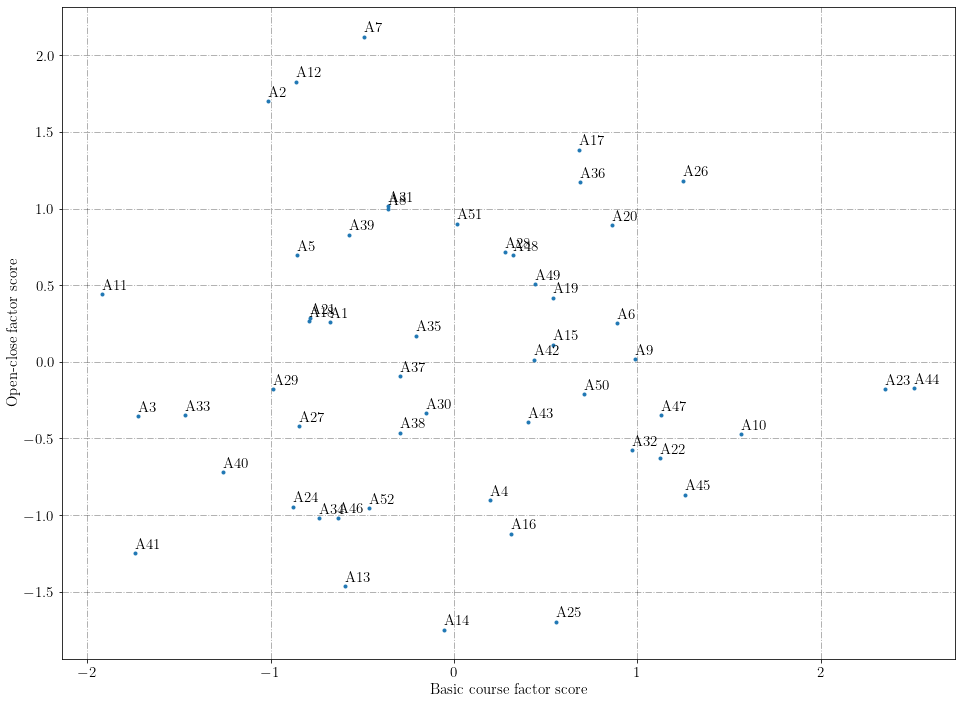

In [138]:
import numpy as np
import pandas as pd
from sklearn import decomposition as dc
from scipy.stats import zscore
import matplotlib.pyplot as plt

c = np.array([
    [62, 71, 64, 75, 70, 68], [52, 65, 57, 67, 60, 58], [51, 63, 55, 97, 78, 77], [68, 77, 85, 83, 74, 57],
    [64, 70, 55, 76, 69, 62], [84, 81, 79, 72, 59, 50], [65, 67, 57, 49, 61, 51], [62, 73, 64, 77, 60, 50],
    [75, 94, 80, 67, 63, 45], [92, 92, 88, 61, 65, 54], [41, 67, 50, 79, 75, 81], [58, 66, 56, 53, 61, 68],
    [70, 65, 76,100, 82, 69], [74, 81, 76,100, 79, 68], [71, 85, 77, 83, 56, 54], [73, 85, 80, 79, 73, 73],
    [78, 74, 76, 60, 54, 41], [68, 66, 60, 80, 69, 73], [82, 77, 73, 81, 53, 61], [78, 76, 82, 67, 56, 37],
    [60, 70, 63, 75, 76, 54], [84, 89, 86, 70, 62, 69], [100,99, 95, 49, 58, 50], [62, 71, 66, 97, 82, 60],
    [87, 87, 77, 92, 78, 63], [85, 82, 80, 61, 50, 39], [59, 72, 66, 78, 82, 63], [72, 76, 74, 64, 58, 64],
    [58, 66, 66, 83, 72, 79], [73, 75, 70, 80, 69, 72], [68, 74, 60, 65, 61, 68], [83, 92, 79, 77, 65, 55],
    [58, 60, 59, 91, 82, 68], [63, 76, 66, 95, 77, 74], [65, 73, 73, 69, 71, 59], [83, 77, 73, 45, 64, 47],
    [61, 80, 69, 84, 67, 60], [63, 77, 73, 81, 75, 58], [63, 60, 70, 73, 68, 50], [49, 71, 66, 85, 80, 81],
    [53, 63, 60, 99, 89, 81], [75, 80, 78, 64, 66, 65], [76, 80, 79, 73, 65, 73], [100,96,100, 65, 47, 50],
    [88, 91, 86, 75, 65, 60], [68, 78, 64, 87, 79, 79], [87, 87, 83, 70, 62, 60], [68, 74, 80, 60, 63, 52],
    [74, 82, 74, 56, 65, 59], [89, 82, 73, 79, 63, 59], [75, 74, 66, 52, 70, 55], [70, 73, 70, 88, 79, 69]
])
d = zscore(c)  #数据标准化
r = np.corrcoef(d.T)  #求相关系数矩阵
val, vec = np.linalg.eig(r)
cs = np.cumsum(val)  #求特征值的累加和
print("特征值为：", val, "\n累加和为：", cs)
fa = dc.FactorAnalysis(n_components = 2)  #构建模型
fa.fit(d)  #求解最大方差的模型
print("载荷矩阵为：\n", fa.components_)
print("特殊方差为：\n", fa.noise_variance_)
dd = fa.fit_transform(d)  #计算因子得分
w = val[:2]/sum(val[:2])  #计算两个因子的权重
df = np.dot(dd, w)  #计算每个评价对象的因子总分
tf = np.sum(c, axis=1)  #计算每个评价对象的实分总分\
#构造pandas数据框, 第1列到第5列数据分别为因子1得分，因子2得分，因子总分、实分总分和序号
pdf = pd.DataFrame(np.c_[dd, df, tf, np.arange(1, 53)], columns=['f1得分', 'f2得分', '因子总分', '实际分数', '序号'])
spdf1 = pdf.sort_values(by='因子总分', ascending = False)  #y因子总分从高到低排序
spdf2 = pdf.sort_values(by='实际分数', ascending=False)  #实分总分从高到低排序
print('-'*60, '\n', "排序结果为：\n")
print("按因子总分排序\n", spdf1, '\n', "按实际总分排序\n", spdf2)

s = ['A'+str(i) for i in range(1, 53)]
plt.figure(figsize=(16, 12))
plt.rc('font', size=15)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.plot(dd[:, 0], dd[:, 1], '.')
for i in range(len(s)):
    plt.text(dd[i, 0], dd[i, 1] + 0.03, s[i])
plt.xlabel("Basic course factor score")
plt.ylabel("Open-close factor score")
plt.show()

## 4. 聚类分析
聚类分析又称群分析, 它是研究分类问题的一种多元统计分析. 所谓类, 通俗地说, 就是指相似元素的集合. 要将相似元素聚为一类, 通常选取元素的许多共同指标, 然后通过分析元素的指标值来分辨元素间的差距, 从而达到分类的目的. 聚类分析可以分为 **$Q$ 型聚类 (样本聚类)、 $R$ 型聚类 (指标聚类)**.
聚类分析内容非常丰富, 有**层次聚类法、有序样品聚类法、动态聚类法、模糊聚类法、图论聚类法**等. 本节主要介绍常用的**层次聚类、 $K$ 均值聚类**.

### 4.1 数据变换
设有 $n$ 个样品, 每个样品测得 $p$ 项指标 (变量), 原始数据阵为
$$
\boldsymbol{A}=\left[\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1 p} \\
a_{21} & a_{22} & \cdots & a_{2 p} \\
\vdots & \vdots & & \vdots \\
a_{n 1} & a_{n 2} & \cdots & a_{n p}
\end{array}\right]
$$
其中 $a_{i j}(i=1, \cdots, n ; j=1, \cdots, p)$ 为第 $i$ 个样品 $\boldsymbol{\omega}_{i}$ 的第 $j$ 个指标的观测数据. 由于样本数据矩阵由多个指标组成, 不同指标一般有不同的量纲, 为消除量纲的影响, 通常需要进行数据变换处理. 常用的数据变换方法有以下两种.
#### (1) 规格化变换
规格化变换是从数据矩阵的每一个变量值中找出其最大值和最小值, 这两者之差称为极差, 然后从每个变量值的原始数据中减去该变量值的最小值, 再除以极差, 就得到规格化数据, 即有
$$
b_{i j}=\frac{a_{i j}-\min _{1 \leqslant i \leqslant n}\left(a_{i j}\right)}{\max _{1 \leqslant i \leqslant n}\left(a_{i j}\right)-\min _{1 \leqslant i \leqslant n}\left(a_{i j}\right)} \quad(i=1, \cdots, n ; j=1, \cdots, p) .
$$
#### (2) 标准化变换
首先对每个变量进行中心化变换, 然后用该变量的标准差进行标准化, 即有
$$
b_{i j}=\frac{a_{i j}-\mu_{j}}{s_{j}} \quad(i=1, \cdots, n ; j=1, \cdots, p),
$$
其中 $\mu_{j}=\frac{\sum_{i=1}^{n} a_{i j}}{n}, s_{j}=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(a_{i j}-\mu_{j}\right)^{2}}$. 记变换处理后的数据矩阵为
$$
\boldsymbol{B}=\left[\begin{array}{cccc}
b_{11} & b_{12} & \cdots & b_{1 p} \\
b_{21} & b_{22} & \cdots & b_{2 p} \\
\vdots & \vdots & & \vdots \\
b_{n 1} & b_{n 2} & \cdots & b_{n p}
\end{array}\right] \tag{(13)}
$$

### 4.2 样品间亲疏程度的测度计算
研究样品的亲疏程度或相似程度的数量指标通常有两种: 一种是**相似系数**, 性质越接近的样品, 其取值越接近于 1 或 $-1$, 而彼此无关的样品相似系数则接近于 0 , 相似的归为一类, 不相似的归为不同类. 另一种是**距离**, 它将每个样品看成 $p$ 维空间的一个点, $n$ 个样品组成 $p$ 维空间的 $n$ 个点. 用各点之间的距离来衡量各样品之间的相似程度. 距离近的点归为一类, 距离远的点属于不同的类.
#### 4.2.1 常用距离的计算
令 $d_{i j}$ 表示样品 $\omega_{i}$ 与 $\omega_{j}$ 的距离. 常用的距离有以下几种.
##### (1) 闵氏 (Minkowski) 距离
$$
d_{i j}(q)=\left(\sum_{k=1}^{p}\left|b_{i k}-b_{j k}\right|^{q}\right)^{1 / q} .
$$
当 $q=1$ 时,
$$
d_{i j}(1)=\sum_{k=1}^{p}\left|b_{i k}-b_{j k}\right| \text {, 即绝对值距离. }
$$
当 $q=2$ 时,
$$
d_{i j}(2)=\left(\sum_{k=1}^{p}\left(b_{i k}-b_{j k}\right)^{2}\right)^{1 / 2} \text {, 即欧氏距离. }
$$
当 $q=\infty$ 时,
$$
d_{i j}(\infty)=\max _{1 \leqslant k \leqslant p}\left|b_{i k}-b_{j k}\right| \text {, 即切比雪夫距离. }
$$
##### (2) 马氏 (Mahalanobis) 距离
马氏距离是由印度统计学家马哈拉诺比斯于 1936 年定义的, 故称为马氏距离. 其计算公式为
$$
d_{i j}=\sqrt{\left(\boldsymbol{B}_{i}-\boldsymbol{B}_{j}\right) \boldsymbol{\Sigma}^{-1}\left(\boldsymbol{B}_{i}-\boldsymbol{B}_{j}\right)^{\mathrm{T}}},
$$
这里 $\boldsymbol{B}_{i}$ 表示矩阵 $\boldsymbol{B}$ 的第 $i$ 行, $\boldsymbol{\Sigma}$ 表示观测变量之间的协方差阵, $\boldsymbol{\Sigma}=\left(\sigma_{i j}\right)_{p \times p}$, 其中
$$
\sigma_{i j}=\frac{1}{n-1} \sum_{k=1}^{n}\left(b_{k i}-\mu_{i}\right)\left(b_{k j}-\mu_{j}\right),
$$
这里 $\mu_{j}=\frac{1}{n} \sum_{k=1}^{n} b_{k j}$.

#### 4.2.2 相似系数的计算
研究样品之间的关系, 除了用距离表示外, 还有相似系数. 相似系数是描述样品之间相似程度的一个统计量, 常用的相似系数有以下几种.
##### (1) 夹角余弦
将任何两个样品 $\omega_{i}$ 与 $\omega_{j}$ 看成 $p$ 维空间的两个向量, 这两个向量的夹角余弦 用 $\cos \theta_{i j}$ 表示, 则
$$
\cos \theta_{i j}=\frac{\sum_{k=1}^{p} b_{i k} b_{j k}}{\sqrt{\sum_{k=1}^{p} b_{i k}^{2}} \cdot \sqrt{\sum_{k=1}^{p} b_{j k}^{2}}}, \quad i, j=1,2, \cdots, n
$$
当 $\cos \theta_{i j}=1$ 时, 说明两个样品 $\omega_{i}$ 与 $\omega_{j}$ 完全相似; $\cos \theta_{i j}$ 接近 1 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 相似密切; $\cos \theta_{i j}=0$ 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 完全不一样; $\cos \theta_{i j}$ 接近 0 时, 说明 $\omega_{i}$ 与 $\omega_{j}$ 差别大. 把所有两两样品的相似系数都计算出来, 可排成相似系数矩阵
$$
\boldsymbol{\Theta}=\left[\begin{array}{cccc}
\cos \theta_{11} & \cos \theta_{12} & \cdots & \cos \theta_{1 n} \\
\cos \theta_{21} & \cos \theta_{22} & \cdots & \cos \theta_{2 n} \\
\vdots & \vdots & & \vdots \\
\cos \theta_{n 1} & \cos \theta_{n 2} & \cdots & \cos \theta_{n n}
\end{array}\right]
$$
其中 $\cos \theta_{11}=\cdots=\cos \theta_{n n}=1$. **根据 $\Theta$ 可对 $n$ 个样品进行分类, 把比较相似的样品归为一类, 不怎么相似的样品归为不同的类.**
##### (2) 皮尔逊相关系数
第 $i$ 个样品与第 $j$ 个样品之间的相关系数定义为
$$
r_{i j}=\frac{\sum_{k=1}^{p}\left(b_{i k}-\bar{\mu}_{i}\right)\left(b_{j k}-\bar{\mu}_{j}\right)}{\sqrt{\sum_{k=1}^{p}\left(b_{i k}-\bar{\mu}_{i}\right)^{2}} \cdot \sqrt{\sum_{k=1}^{p}\left(b_{j k}-\bar{\mu}_{j}\right)^{2}}}, \quad i, j=1,2, \cdots, n,
$$
其中, $\bar{\mu}_{i}=\frac{\sum_{k=1}^{p} b_{i k}}{p}$.
实际上, $r_{i j}$ 就是两个向量 $\boldsymbol{B}_{i}-\overline{\boldsymbol{B}}_{i}$ 与 $\boldsymbol{B}_{j}-\overline{\boldsymbol{B}}_{j}$ 的夹角余弦, 其中 $\overline{\boldsymbol{B}}_{i}=$ $\bar{\mu}_{i}[1,2, \cdots, 1]$. 若将原始数据标准化, 满足 $\overline{\boldsymbol{B}}_{i}=\overline{\boldsymbol{B}}_{j}=0$, 这时 $r_{i j}=\cos \theta_{i j}$.
$$
\boldsymbol{R}=\left(r_{i j}\right)_{n \times n}=\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
r_{21} & r_{22} & \cdots & r_{2 n} \\
\vdots & \vdots & & \vdots \\
r_{n 1} & r_{n 2} & \cdots & r_{n n}
\end{array}\right]
$$
其中 $r_{11}=\cdots=r_{n n}=1$, 可根据 $\boldsymbol{R}$ 对 $n$ 个样品进行分类.

### 4.3 scipy.cluster.hierarchy模块的层次聚类
scipy.cluster.hierarchy 模块的层次聚类函数介绍如下.
#### 4.3.1 distance.pdist
$\mathrm{B}=\operatorname{pdist}(\mathrm{A}$, metric= ' euclidean' ) 用 metric 指定的方法计算 $n \times p$ 矩阵 $\mathrm{A}$ (看作 $n$ 个 $p$ 维行向量, 每行是一个对象的数据) 中两两对象间的距离, metric 可取下表中的特征字符串. 输出 B 是包含距离信息的长度为 $(n-1) \cdot n / 2$ 的向量. 可用 distance.squareform 函数将此向量转换为方阵, 这样可使矩阵中的 $(i, j)$ 元素对应原始数据集中对象 $i$ 和 $j$ 间的距离.
表 常用的 'metric' 取值及含义
\begin{array}{cc}
\hline 字符串 & \multicolumn{1}{c}{ 含义 } \\
\hline
\text{'euclidean'} & 欧氏距离 (缺省值) \\
\text{'cityblock'} & 绝对值距离 \\
\text{'minkowski'} & \text{Minkowski 距离} \\
\text{'chebychev'} & \text{Chebychev 距离} \\
\text{'mahalanobis'} & \text{Mahalanobis 距离} \\
\hline
\end{array}
metric 的取值很多, 读者可以自己看帮助.
#### 4.3.2 linkage
$\mathrm{Z}=$ linkage(B, 'method') 使用由 'method' 指定的算法计算**生成聚类树**, 输入矩阵 $\mathrm{B}$ 为 pdist 函数输出的 $n \cdot(n-1) / 2$ 维距离行向量, 'method' 可取下表中特征字符串值。
表 'metric'取值及含义.
\begin{array}{cc}
\hline \text { 字符串 } & \multicolumn{1}{c}{\text { 含义 }} \\
\hline \text { 'single' } & \text { 最短距离 (缺省值) } \\
\text { 'average' } & \text { 无权平均距离 } \\
\text { 'centroid' } & \text { 重心距离 } \\
\text { 'complete' } & \text { 最大距离 } \\
\text { 'ward' } & \text { 离差平方和方法 (Ward 方法) } \\
\hline
\end{array}
输出 $\mathrm{Z}$ 为包含聚类树信息的 $(n-1) \times 4$ 矩阵. 聚类树上的叶节点为原始数据集中的对象, 其编号由 0 到 $n-1$, 它们是单元素的类, 级别更高的类都由它们生成. 对应于 Z 中第 $j$行每个新生成的类, 其索引为 $n+j$, 其中 $n$ 为初始叶节点的数量.
$\mathrm{Z}$ 的第 1 列和第 2 列, 即 $\mathrm{Z}[:,: 2]$ 包含了被两两连接生成一个新类的所有对象的索引. Z [j, :2] 生成的新类索引为 $n+j$. 共有 $n-1$ 个级别更高的类, 它们对应于聚类树中的内部节点.
$\mathrm{Z}$ 的第 3 列 Z [:, 2] 包含了相应的在类中的两两对象间的连接距离. Z 的第 4 列 Z [:,3] 表示当前类中原始对象的个数.
#### 4.3.3 fcluster
$\mathrm{T}=$ fcluster $(\mathrm{Z}, \mathrm{t})$ 从 linkage 的输出 $\mathrm{Z}$, 根据给定的阈值 $\mathrm{t}$ 创建聚类.
#### 4.3.4 H=dendrogram(Z, p)
由 linkage 产生的数据矩阵 $Z$ **画聚类树状图**. $p$ 是结点数, 默认值是 $30$ .

### 4.4 基于类间距离的层次聚类
层次聚类法是聚类分析方法中使用最多的方法. 其基本思想是: 距离相近的样 品 (或变量) 先聚为一类, 距离远的后聚成类, 此过程一直进行下去, 每个样品总能聚到合适的类中. 它包括如下步骤：
(1) 将每个样品独自聚成一类, 构造 $n$ 个类.
(2) 根据所确定的样品距离公式, 计算 $n$ 个样品 (或变量) 两两间的距离, 构造距离矩阵, 记为 $\boldsymbol{D}_{(0)}$.
(3) 把距离最近的两类归为一新类, 其他样品仍各自聚为一类, 共聚成 $n-1$ 类.
(4) 计算新类与当前各类的距离, 将距离最近的两个类进一步聚成一类, 共聚成 $n-2$ 类. 以上步骤一直进行下去, 最后将所有的样品聚成一类.
(5) 画聚类谱系图.
(6) 决定类的个数及各类包含的样品数, 并对类做出解释.
正如样品之间的距离可以有不同的定义方法一样, **类与类之间的距离也有各种定义*. 例如, 可以定义类与类之间的距离为两类之间最近样品的距离, 或者定义为两类之间最远样品的距离, 也可以定义为两类重心之间的距离等. 类与类之间用不同的方法定义距离, 就产生了不同的层次聚类方法. 常用的层次聚类方法有, **最短距离法、最长距离法、中间距离法、重心法、类平均法、可变类平均法、可变法和离差平方和法**.
下面介绍两种常用的层次聚类法.

#### 4.4.1 最短距离法
最短距离法定义类 $G_{i}$ 与 $G_{j}$ 之间的距离为两类间最邻近的两样品之距离, 即 $G_{i}$ 与 $G_{j}$ 两类间的距离 $D_{i j}$ 定义为
$$
D_{i j}=\min _{\omega_{s} \in G_{i}, \omega_{t} \in G_{j}} d_{s t} .
$$
设类 $G_{p}$ 与 $G_{q}$ 合并成一个新类记为 $G_{r}$, 则任一类 $G_{k}$ 与 $G_{r}$ 的距离是
$$
D_{k r}=\min _{\omega_{i} \in G_{k}, \omega_{j} \in G_{r}} d_{i j}=\min \left\{\min _{\boldsymbol{\omega}_{i} \in G_{k}, \omega_{j} \in G_{p}} d_{i j}, \min _{\omega_{i} \in G_{k}, \omega_{j} \in G_{q}} d_{i j}\right\}=\min \left\{D_{k p}, D_{k q}\right\} .
$$
最短距离法聚类的步骤如下:
(1) 定义样品之间的距离: 计算样品两两间的距离, 得一距离矩阵记为 $\boldsymbol{D}_{(0)}=\left(d_{i j}\right)_{n \times n}$, 开始每个样品自成一类, 显然这时 $D_{i j}=d_{i j}$.
(2) 找出 $\boldsymbol{D}_{(0)}$ 的非对角线最小元素, 设为 $d_{p q}$, 则将 $G_{p}$ 和 $G_{q}$ 合并成一个新类, 记为 $G_{r}$, 即 $G_{r}=\left\{G_{p}, G_{q}\right\}$.
(3) 给出计算新类与其他类的距离公式:
$$
D_{k r}=\min \left\{D_{k p}, D_{k q}\right\} .
$$
将 $\boldsymbol{D}_{(0)}$ 中第 $p, q$ 行及 $p, q$ 列, 用上面公式合并成一个新行新列, 新行新列对应 $G_{r}$, 所得到的矩阵记为 $\boldsymbol{D}_{(1)}$.
(4) 对 $\boldsymbol{D}_{(1)}$ 重复上述类似 $\boldsymbol{D}_{(0)}$ 的 (2), (3) 两步得到 $\boldsymbol{D}_{(2)}$. 如此下去, 直到所有的元素并成一类为止.
**如果某一步 $\boldsymbol{D}_{(k)}$ 中非对角线最小的元素不止一个, 则对应这些最小元素的类可以同时合并.**

**例** 在某地区有 7 个矽卡岩体, 对 7 个岩体的三种元素 $\mathrm{Cu}, \mathrm{W}, \mathrm{Mo}$ 作 分析的原始数据见表 11.11, 对这 7 个样品进行聚类.

表 7个矽卡岩体数据
\begin{array}{cccccccc}
\hline & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\hline
\mathrm{Cu} & 2.9909 & 3.2044 & 2.8392 & 2.5315 & 2.5897 & 2.9600 & 3.1184 \\
\mathrm{W} & 0.3111 & 0.5348 & 0.5696 & 0.4528 & 0.3010 & 3.0480 & 2.8395 \\
\mathrm{Mo} & 0.5324 & 0.7718 & 0.7614 & 0.4893 & 0.2735 & 1.4997 & 1.9850 \\
\hline
\end{array}
数学原理及聚类过程就不慗述了. 按照最短距离聚类时, 所画的聚类图如程序运行图所示. 如果取阈值 $d=0.5$, 则可把这些岩体划分成两类, $6,7$ 为一类, $1, 2, \cdots, 5$ 为另一类.

[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 1.          8.          0.35618248  3.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 7.          9.          0.47781458  5.        ]
 [10.         11.          1.01602914  7.        ]]


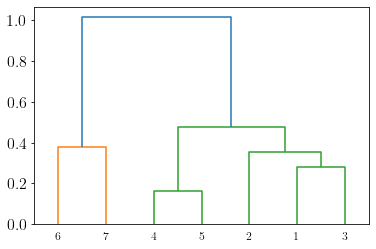

In [139]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

a = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]
])
b = pp.minmax_scale(a.T)  #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
dd = sch.distance.squareform(d)  #转换为矩阵格式
z = sch.linkage(d)
print(z)  #进行聚类并显示

s=[str(i+1) for i in range(7)]
plt.rc('font', size=16)
sch.dendrogram(z, labels=s)
plt.show()  #画聚类图

#### 4.4.2 最长距离法
定义类 $G_{i}$ 与类 $G_{j}$ 之间的距离为两类最远样品的距离, 即
$$
D_{i j}=\max _{\omega_{s} \in G_{i}, \omega_{t} \in G_{j}} d_{s t} .
$$
最长距离法与最短距离法的合并步骤完全一样, 也是将各样品先自成一类, 然后将非对角线上最小元素对应的两类合并. 设某一步将类 $G_{p}$ 与 $G_{q}$ 合并为 $G_{r}$, 则 任一类 $G_{k}$ 与 $G_{r}$ 的最长距离公式为
$$
D_{k r}=\max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{r}} d_{i j}=\max \left\{\max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{p}} d_{i j}, \max _{\omega_{i} \in G_{k}, \omega_{j} \in G_{q}} d_{i j}\right\}=\max \left\{D_{k p}, D_{k q}\right\} .
$$
再找非对角线最小元素对应的两类并类, 直至所有的样品全归为一类为止.
可见, 最长距离法与最短距离法只有两点不同, 一是类与类之间的距离定义不同; 二是计算新类与其他类的距离所用的公式不同.

**例** 用最长距离法对上例 7 个矽卡岩体进行聚类. 所画的聚类图如程序输出图所示. 聚类结果和上例是一样的.

[[ 3.          4.          0.16258132  2.        ]
 [ 0.          2.          0.27853564  2.        ]
 [ 5.          6.          0.37626539  2.        ]
 [ 1.          8.          0.54290736  3.        ]
 [ 7.         10.          1.01397033  5.        ]
 [ 9.         11.          1.57203348  7.        ]]


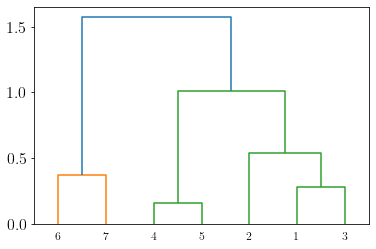

In [140]:
import numpy as np
from sklearn import preprocessing as pp
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

a = np.array([
    [2.9909, 3.2044, 2.8392, 2.5315, 2.5897, 2.9600, 3.1184],
    [0.3111, 0.5348, 0.5696, 0.4528, 0.3010, 3.0480, 2.8395],
    [0.5324, 0.7718, 0.7614, 0.4893, 0.2735, 1.4997, 1.9850]
])
b = pp.minmax_scale(a.T)  #数据规格化
d = sch.distance.pdist(b)  #求对象之间的两两距离向量
z = sch.linkage(d, 'complete')  #'complete'即按最长距离法计算
print(z)  #进行聚类并显示
s = [str(i+1) for i in range(7)]
plt.rc('font', size=16)
sch.dendrogram(z, labels=s)
plt.show()  #画聚类图

### 4.5 K均值聚类
用层次聚类法聚类时, 随着聚类样本对象的增多, 计算量会迅速增加, 而且聚类结果一谱系图会十分复杂, 不便于分析. 特别是样品的个数很大 (如 $n \geqslant 100$ ) 时, 层次聚类法的计算量非常大, 将占据大量的计算机内存空间和较多的计算时间. 为了改进上述缺点, 一个自然的想法是先粗略地分一下类, 然后按某种最优原则进行修正, 直到将类分得比较合理为止. 基于这种思想就产生了**动态聚类法**, 也称**逐步聚类法**.
**动态聚类法适用于大型数据.** 动态聚类法有许多种方法, 这里介绍一种比较流行的动态聚类法——$K$ 均值法. 它是一种快速聚类法, 该方法得到的结果简单易懂, 对计算机的性能要求不高, 因而应用广泛. 该方法由麦克奎因 (Macqueen) 于 1967 年提出.
算法的思想是假定样本集中的全体样本可分为 $C$ 类, 并选定 $C$ 个初始聚类中心, 然后根据最小距离原则将每个样本分配到某一类中, 之后不断迭代计算各类的聚类中心, 并依据新的聚类中心调整聚类情况, 直到迭代收玫或聚类中心不再改变.
$K$ 均值聚类算法最后将总样本集 $G$ 划分为 $C$ 个子集: $G_{1}, G_{2}, \cdots, G_{C}$, 它们满足下面条件:
(1) $G_{1} \cup G_{2} \cup \cdots \cup G_{C}=G$;
(2) $G_{i} \cap G_{j}=\varnothing(1 \leqslant i<j \leqslant C)$;
(3) $G_{i} \neq \varnothing, G_{i} \neq G(1 \leqslant i \leqslant C)$.
设 $\boldsymbol{m}_{i}(i=1, \cdots, C)$ 为 $C$ 个聚类中心, 记
$$
J_{e}=\sum_{i=1}^{C} \sum_{\omega \in G_{i}}\left\|\omega-m_{i}\right\|^{2},
$$
使 $J_{e}$ 最小的聚类是**误差平方和准则**下的最优结果.
$K$ 均值聚类算法描述如下:
(1) 初始化. 设总样本集 $G=\left\{\boldsymbol{\omega}_{j}, j=1,2, \cdots, n\right\}$ 是 $n$ 个样品组成的集合, 聚类数为 $C(2 \leqslant C \leqslant n)$, 将样本集 $G$ **任意**划分为 $C$ 类, 记为 $G_{1}, G_{2}, \cdots, G_{C}$, 计算对应的 $C$ 个初始聚类中心, 记为 $\boldsymbol{m}_{1}, \boldsymbol{m}_{2}, \cdots, \boldsymbol{m}_{C}$, 并计算 $J_{e}$.
(2) $G_{i}=\varnothing(i=1,2, \cdots, C)$, 按最小距离原则将样品 $\boldsymbol{\omega}_{j}(j=1,2, \cdots, n)$ 进行聚 类, 即若 $d\left(\boldsymbol{\omega}_{j}, G_{k}\right)=\min _{1 \leqslant i \leqslant C} d\left(\boldsymbol{\omega}_{j}, \boldsymbol{m}_{i}\right)$, 则 $\boldsymbol{\omega}_{j} \in G_{k}, G_{k}=G_{k} \cup\left\{\boldsymbol{\omega}_{j}\right\}, j=1,2, \cdots, n$. 重新计算聚类中心
$$
\boldsymbol{m}_{i}=\frac{1}{n_{i}} \sum_{\boldsymbol{\omega}_{j} \in G_{i}} \boldsymbol{\omega}_{j}, \quad i=1,2, \cdots, C,
$$
式中, $n_{i}$ 为当前 $G_{i}$ 类中的样本数目, 并重新计算 $J_{e}$.
(3) 若连续两次迭代的 $J_{e}$ 不变, 则算法终止, 否则算法转 (2).
**注** 实际计算时, 可以不计算 $J_{e}$, 只要**聚类中心**不发生变化, 算法即可终止.

**例** 已知聚类的指标变量为 $x_{1}, x_{2}$, 四个样本点的数据分别为
$$
\boldsymbol{\omega}_{1}=(1,3), \quad \boldsymbol{\omega}_{2}=(1.5,3.2), \quad \boldsymbol{\omega}_{3}=(1.3,2.8), \quad \boldsymbol{\omega}_{4}=(3,1) .
$$
试用 $K$ 均值聚类法把样本点分成两类.

**解** 现要分为两类 $G_{1}$ 和 $G_{2}$, 设初始聚类为 $G_{1}=\left\{\boldsymbol{\omega}_{1}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}, \boldsymbol{\omega}_{4}\right\}$, 则初始聚类中心为
$G_{1}$ 类: $\boldsymbol{\omega}_{1}$ 值, 即 $\boldsymbol{m}_{1}=(1,3)$;
$G_{2}$ 类: $m_{2}=\left(\frac{1.5+1.3+3}{3}, \frac{3.2+2.8+1}{3}\right)=(1.9333,2.3333)$.
计算每个样本点到 $G_{1}, G_{2}$ 聚类中心的距离
$$
\begin{array}{ll}
d_{11}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{1}\right\|=\sqrt{(1-1)^{2}+(3-3)^{2}}=0, \quad d_{12}=\left\|\omega_{1}-\boldsymbol{m}_{2}\right\|=1.1470 ; \\
d_{21}=\left\|\omega_{2}-\boldsymbol{m}_{1}\right\|=0.5385, \quad d_{22}=\left\|\omega_{2}-\boldsymbol{m}_{2}\right\|=0.9690 ; \\
d_{31}=\left\|\omega_{3}-\boldsymbol{m}_{1}\right\|=0.3606, \quad d_{32}=\left\|\omega_{3}-\boldsymbol{m}_{2}\right\|=0.7867 ; \\
d_{41}=\left\|\omega_{4}-\boldsymbol{m}_{1}\right\|=2.8284, \quad d_{42}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{2}\right\|=1.7075 .
\end{array}
$$
得到新的划分为 $G_{1}=\left\{\boldsymbol{\omega}_{1}, \boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{4}\right\}$, 新的聚类中心为 $G_{1}$ 类: $\boldsymbol{m}_{1}=\left(\frac{1+1.5+1.3}{3}, \frac{3+3.2+2.8}{3}\right)=(1.2667,3.0)$;
$G_{2}$ 类: $\boldsymbol{\omega}_{4}$ 值, 即 $\boldsymbol{m}_{2}=(3,1)$.
重新计算每个样本点到 $G_{1}, G_{2}$ 聚类中心的距离
$$
\begin{array}{ll}
d_{11}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{1}\right\|=0.2667, & d_{12}=\left\|\boldsymbol{\omega}_{1}-\boldsymbol{m}_{2}\right\|=2.8284 \\
d_{21}=\left\|\boldsymbol{\omega}_{2}-\boldsymbol{m}_{1}\right\|=0.3073, & d_{22}=\left\|\boldsymbol{\omega}_{2}-\boldsymbol{m}_{2}\right\|=2.6627 \\
d_{31}=\left\|\boldsymbol{\omega}_{3}-\boldsymbol{m}_{1}\right\|=0.2028, & d_{32}=\left\|\boldsymbol{\omega}_{3}-\boldsymbol{m}_{2}\right\|=2.4759 \\
d_{41}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{1}\right\|=2.6466, & d_{42}=\left\|\boldsymbol{\omega}_{4}-\boldsymbol{m}_{2}\right\|=0 .
\end{array}
$$
所以, 得新的划分为: $G_{1}=\left\{\boldsymbol{\omega}_{1}, \boldsymbol{\omega}_{2}, \boldsymbol{\omega}_{3}\right\}, G_{2}=\left\{\boldsymbol{\omega}_{4}\right\}$.
可见，新的划分与前面的划分相同，聚类中心没有改变，聚类结束。

In [141]:
import numpy as np
from sklearn.cluster import KMeans

a = np.array([
    [1, 3], [1.5, 3.2], [1.3, 2.8], [3, 1]
])
md = KMeans(n_clusters=2)  #构建模型
md.fit(a)  #求解模型
labels = 1+md.labels_  #提取聚类标签
centers = md.cluster_centers_  #提取聚类中心,每一行是一个聚类中心
print(labels, '\n-----------\n',centers)

[1 1 1 2] 
-----------
 [[1.26666667 3.        ]
 [3.         1.        ]]


### 4.6 K均值聚类法最佳簇数k值的确定
对于 $K$ 均值聚类来说, 如何确定簇数 $k$ 值是一个至关重要的问题, 为了解决这个问题, 通常会选用探索法, 即给定不同的 $k$ 值, 对比某些评估指标的变动情况, 进而选择一个比较合理的 $k$ 值. 本节将介绍非常实用的两种评估方法, 即**簇内离差平方和拐点法**与**轮廓系数法**.
#### 4.6.1 簇内离差平方和拐点法
簇内离差平方和拐点法的思想很简单, 就是在不同的 $k$ 值下计算**簇内离差平方和**, 然后通过可视化的方法找到 “拐点” 所对应的 $k$ 值. 重点关注的是斜率的变化, 当斜率由大突然变小时, 并且之后的斜率变化缓慢, 则认为突然变换的点就是寻找的目标点, 因为继续随着簇数 $k$ 的增加, 聚类效果不再有大的变化.
为了验证这个方法的直观性, 这里随机生成三组二维正态分布数据, 首先基于该数据绘制散点图如程序运行图所示, 模拟的数据呈现三个簇. 接下来基于这个模拟数据, 使用拐点法, 绘制簇的个数与总的簇内离差平方和之间的折线图亦如程序运行图所示.
从折线图可以看出, 当簇的个数为 3 时形成了一个明显的拐点, 3 之后的簇对应的簇内离差平方和的变动都很小, 合理的 $k$ 值应该为 3, 与模拟的三个簇数据是吻合的.

d:\programme\python\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  "KMeans is known to have a memory leak on Windows "


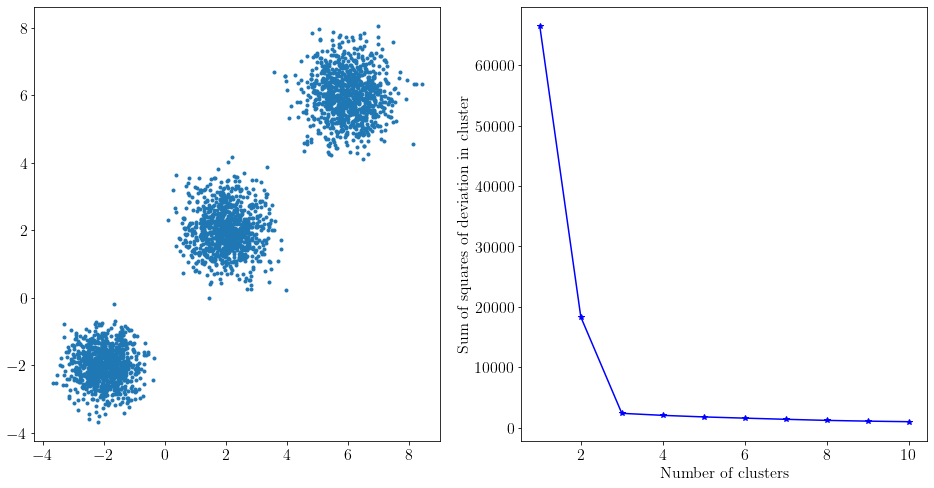

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mean = np.array([
    [-2, -2], [2, 2], [6,6]
])
cov = np.array([
    [[0.3, 0], [0, 0.3]],
    [[0.4, 0], [0, 0.4]],
    [[0.5, 0], [0, 0.5]]
])
x0=[]
y0=[]
for i in range(3):
    x, y = np.random.multivariate_normal(mean[i], cov[i], 1000).T
    x0 = np.hstack([x0, x])
    y0 = np.hstack([y0, y])

plt.figure(figsize=(16, 8))
plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)
plt.subplot(121)
plt.scatter(x0, y0, marker='.')  #画模拟数据散点图

X = np.vstack([x0, y0]).T
TSSE = []
K = 10
for k in range(1, K + 1):
    SSE = []
    md = KMeans(n_clusters=k)
    md.fit(X)
    labels = md.labels_
    centers = md.cluster_centers_
    for label in set(labels):
        SSE.append(np.sum((X[labels == label, :] - centers[label, :])**2))
    TSSE.append(np.sum(SSE))
plt.subplot(122)
plt.style.use('ggplot')
# print(plt.style.available)
plt.plot(range(1, K+1), TSSE, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares of deviation in cluster')
plt.show()

#### 4.6.2 轮廓系数法

该方法综合考虑了簇的**密集性**与**分散性**两个信息, 如果数据集被分割为理想的 $k$ 个簇, 那么对应的簇内样本会很密集, 而簇间样本会很分散.
如下图所示, 假设数据集被拆分为三个簇 $G_{1}, G_{2}, G_{3}$, 样本点 $i$ 对应的 $a_{i}$ 值为所有 $G_{1}$ 中其他样本点与样本点 $i$ 的距离平均值; 样本点 $i$ 对应的 $b_{i}$ 值分两步 计算, 首先计算该点分别到 $G_{2}$ 和 $G_{3}$ 中样本点的平均距离, 然后将两个平均值中的最小值作为 $b_{i}$ 的度量.
![](./images/轮廓系数计算示意图.png)
图 轮廓系数计算示意图
定义样本点 $i$ 的轮廓系数
$$
S_{i}=\frac{b_{i}-a_{i}}{\max \left(a_{i}, b_{i}\right)} \tag{(14)}
$$
$k$ 个簇的总轮廓系数定义为所有样本点轮廓系数的平均值.
当总轮廓系数小于 0 时, 说明聚类效果不佳; 当总轮廓系数接近于 1 时, 说明簇内样本的平均距离非常小, 而簇间的最近距离非常大, 进而表示聚类效果非常理想.
上面的计算思想虽然简单, 但是计算量是很大的, 当样本量比较多时, 运行时间会比较长. 有关轮廓系数的计算, 可以直接调用 sklearn.metrics 中的函数 silhouettescore. 需要注意的是, 该函数接受的聚类簇数必须大于等于 2.
利用上面同样的模拟数据, 画出的簇数与轮廓系数对应关系图如下图所示, 当 $k$ 等于 3 时, 轮廓系数最大, 且比较接近于 1 , 说明应该把模拟数据聚为 3 类比 较合理, 同样与模拟数据的三个簇是吻合的.

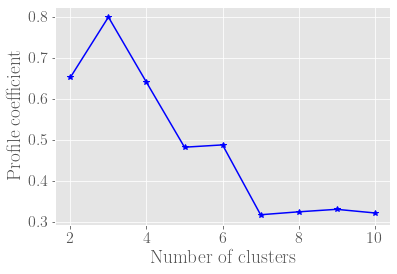

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

X = np.load("./data/K均值聚类_轮廓系数法.npy")
S = []
K = 10
for k in range(2, K + 1):
    md = KMeans(k)
    md.fit(X)
    labels = md.labels_
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))  #计算轮廓系数

plt.rc('font', size=16)
plt.rc('font', family='SimHei')
plt.plot(range(2, K + 1), S, 'b*-')
plt.xlabel('Number of clusters')
plt.ylabel('Profile coefficient')
plt.show()

### 4.7 K均值聚类的应用

在做 $K$ 均值聚类时需要注意两点, 一个是聚类前必须指定具体的簇数 $k$ 值, 如果 $k$ 值是已知的, 可以直接调用 cluster 子模块中的 KMeans 函数, 对数据集进行分 割; **如果 $k$ 值是末知的, 可以根据行业经验或前面介绍的两种方法确定合理的 $k$ 值.** 另一个是对原始数据集做必要的**标准化处理**. 由于 $K$ 均值的思想是基于点之间的距离实现 “物以类聚” 的, 所以如果原始数据集存在量纲上的差异, 就必须对其进行标准化的预处理. 数据集的标准化预处理可以借助 sklearn 子模块 preprocessing 中的 scale 函数或 minmax_scale 函数. scale 函数的标准化公式为
$$
x^{*}=\frac{x-\mu}{\sigma},
$$
minmax_scale 函数的标准化公式为
$$
x^{*}=\frac{x-x_{\min }}{x_{\max }-x_{\min }}
$$
其中, $\mu, \sigma, x_{\min }, x_{\max }$ 分别为 $x$ 取值的均值、标准差、最小值和最大值.

Iris 数据集是常用的分类实验数据集, 下面用该数据集来验证 $K$ 均值聚类的效果.
**例** Iris 数据集由 Fisher 于 1936 年收集整理. Iris 也称鸢尾花卉数据, 是一类多重变量分析的数据集. 数据集包含 150 个数据, 分为 3 类, 每类 50 个数 据, 每个数据包含 4 个属性, 数据格式如下表所示. 可通过花萼长度、花萼宽度、花瓣长度、花瓣宽度 4 个属性预测鸢尾花卉属于 (setosa, versicolour, virginica) 三个种类中的哪一类.
表 Iris数据集数据
\begin{array}{cccccc}
\hline
& \text{Sepal_Length} & \text{Sepal_Width} & \text{Petal_Length} & \text{Petal_Width} & \text{Species} \\
\hline
1 & 5.1 & 3.5 & 1.4 & 0.2 & \text{setosa} \\
2 & 4.9 & 3 & 1.4 & 0.2 & \text{setosa} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
149 & 6.2 & 3.4 & 5.4 & 2.3 & \text{virginica} \\
150 & 5.9 & 3 & 5.1 & 1.8 & \text{virginica} \\
\hline
\end{array}
如上表所示, 数据集的前 4 个变量分别为花萼的长度、宽度及花瓣的长度、宽度, 它们之间没有量纲上的差异, 故无需对其做标准化预处理, 最后一个变量为戈尾花所属的种类. 如果将其聚为 3 类, 所得结果为各簇样本量分别为 $60,50,38$. 为了直观验证聚类效果, 对比建模后的 3 类与原始数据 3 类的差异, 绘制花瓣长度与宽度的散点图如程序输出图所示.

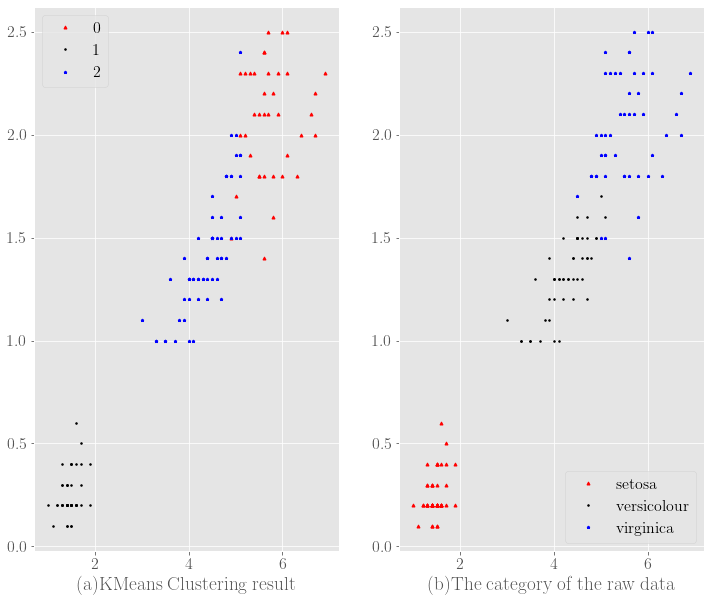

In [144]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

a = pd.read_csv("./data/K均值聚类的应用_iris.csv")
b = a.iloc[:, :-1]
md = KMeans(3)
md.fit(b)  #构建模型并求解模型
labels = md.labels_
centers = md.cluster_centers_
b['cluster'] = labels  #数据框b添加一个列变量cluster
c = b.cluster.value_counts()  #各类频数统计

plt.figure(figsize=(12, 10))
plt.style.use('ggplot')
plt.rc('font',family='SimHei')
plt.rc('font',size=16)
str1 = ['^r','.k','*b']
plt.subplot(121)
for i in range(len(centers)):
    plt.plot(b['Petal_Length'][labels==i], b['Petal_Width'][labels==i], str1[i], markersize=3, label=str(i))
    plt.legend()
    plt.xlabel("(a)KMeans Clustering result")
plt.subplot(122)
str2 = ['setosa', 'versicolour', 'virginica']
ind = np.hstack([np.zeros(50), np.ones(50), 2*np.ones(50)])
for i in range(3):
    plt.plot(b['Petal_Length'][ind==i], b['Petal_Width'][ind==i], str1[i], markersize=3, label=str2[i])
    plt.legend(loc='lower right')
    plt.xlabel("(b)The category of the raw data")
plt.show()

# 十三、时间序列分析
时间序列是按时间顺序排列的、随时间变化且相互关联的**数据序列**. 对时间序列进行观察研究, 找寻它的发展规律, 预测它将来的走势就是**时间序列分析**.
时间序列根据所研究的依据不同, 可有不同的分类.
(1) 按所研究的对象的多少分, 有一元时间序列和多元时间序列.
(2) 按时间的连续性可将时间序列分为离散时间序列和连续时间序列两种.
(3) 按序列的统计特性分, 有平稳时间序列和非平稳时间序列. 如果一个时间序列的概率分布与时间 $t$ 无关, 则称该序列为**严格的 (狭义的) 平稳时间序列**. 如果序列的一、二阶矩存在, 而且对任意时刻 $t$ 满足: (i) 均值为常数; (ii) 协方差为时间间隔 $\tau$ 的函数, 则称该序列为**宽平稳时间序列**，也叫**广义平稳时间序列**.
(4) 按时间序列的分布规律来分, 有高斯型时间序列和非高斯型时间序列. 本章主要介绍一元时间序列分析.


## 1. 移动平均法、指数平滑法和季节模型


### 1.1 移动平均法
移动平均法是常用的时间序列预测方法, 由于其简单而具有很好的实用价值.
#### 1.1.1 一次移动平均法
设观测序列为 $y_{1}, \cdots, y_{T}$, 取移动平均的项数 $N<T$. 一次移动平均值计算公式为
$$
M_{t}^{(1)}(N)=\frac{1}{N}\left(y_{t}+y_{t-1}+\cdots+y_{t-N+1}\right)=\frac{1}{N} \sum_{i=0}^{N-1} y_{t-i} \tag{(1)}
$$
则有
$$
M_{t}^{(1)}(N)=\frac{1}{N}\left(y_{t-1}+\cdots+y_{t-N}\right)+\frac{1}{N}\left(y_{t}-y_{t-N}\right)=M_{t-1}^{(1)}(N)+\frac{1}{N}\left(y_{t}-y_{t-N}\right) \tag{(2)}
$$
$t+1$ 期的预测值为 $\hat{y}_{t+1}=M_{t}^{(1)}(N)$, 其预测标准误差为
$$
S=\sqrt{\frac{\sum_{t=N+1}^{T}\left(\hat{y}_{t}-y_{t}\right)^{2}}{T-N}} \tag{(3)}
$$
如果将 $\hat{y}_{t+1}$ 作为 $t+1$ 期的实际值, 那么就可以用 $\hat{y}_{t+1}=M_{t}^{(1)}(N)$ 计算第 $t+2$ 期预测值 $\hat{y}_{t+2}$. 一般地, 也可相应地求得以后各期的预测值. 但由于越远时期的预测, 误差越大, **因此一次移动平均法一般仅应用于一个时期后的预测值 (即预测第 $t+1$ 期)**.

**例** 汽车配件某年 $1 \sim 12$ 月份的化油器销售量 (单位: 只) 统计数据见下表中第 2 行, 试用一次移动平均法预测下一年 1 月份的销售量.
表 化油器销售量及一次移动平均法预测值表
\begin{array}{cccccccccccccc}
\hline
月份 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 顶测 \\
\hline
y_{i} & 423 & 358 & 434 & 445 & 527 & 429 & 426 & 502 & 480 & 384 & 427 & 446 & \\
N=3 & & & & 405 & 412 & 469 & 467 & 461 & 452 & 469 & 455 & 430 & 419 \\
N=5 & & & & & & 437 & 439 & 452 & 466 & 473 & 444 & 444 & 448 \\
\hline
\end{array}

分别取 $N=3, N=5$, 按预测公式
$$
\begin{gathered}
\hat{y}_{t+1}(3)=M_{t}^{1}(3)=\frac{y_{t}+y_{t-1}+y_{t-2}}{3}, \quad t=3,4, \cdots, 12, \\
\hat{y}_{t+1}(5)=M_{t}^{1}(5)=\frac{y_{t}+y_{t-1}+y_{t-2}+y_{t-3}+y_{t-4}}{5}, \quad t=5,6, \cdots, 12 .
\end{gathered}
$$
计算 3 个月和 5 个月移动平均预测值, 分别见上表第 3 行和第 4 行. $N=3$ 时, 预测的标准误差为 $56.5752 ; N=5$ 时, 预测的标准误差为 $39.8159$.
**通过上表可以看到, 实际数据波动较大, 经移动平均后, 随机波动明显减少, 且 $N$ 越大, 波动也越小. 同时, 也可以看到, 一次移动平均法的预测标准误差还是有些大, 对于实际数据波动较大的序列, 一般较少采用此法进行预测.**

In [145]:
import numpy as np

y = np.array([423, 358, 434, 445, 527, 429, 426, 502, 480, 384, 427, 446])
def MoveAverage(y, N):
    Mt = ['*']*N
    for i in range(N+1, len(y) + 2):
        M = y[i-(N+1): i-1].mean()
        Mt.append(M)
    return Mt


yt3 = MoveAverage(y, 3)
s3 = np.sqrt(((y[3:] - yt3[3: -1])**2).mean())

yt5 = MoveAverage(y, 5)
s5 = np.sqrt(((y[5:] - yt5[5: -1])**2).mean())

print('N=3时,预测值：', yt3, '，预测的标准误差：', s3)
print('N=5时,预测值：', yt5, '，预测的标准误差：', s5)

N=3时,预测值： ['*', '*', '*', 405.0, 412.3333333333333, 468.6666666666667, 467.0, 460.6666666666667, 452.3333333333333, 469.3333333333333, 455.3333333333333, 430.3333333333333, 419.0] ，预测的标准误差： 56.57519850976887
N=5时,预测值： ['*', '*', '*', '*', '*', 437.4, 438.6, 452.2, 465.8, 472.8, 444.2, 443.8, 447.8] ，预测的标准误差： 39.815861878689226


简单移动平均使用的是等量加权策略，可以利用卷积，相应代码如下：

In [146]:
def sma(arr, n):
    weights = np.ones(n)/n
    return np.convolve(weights, arr)[n-1: -n+1]

In [147]:
# 上例的Python程序也可以改写如下
import numpy as np

y = np.array([423, 358, 434, 445, 527, 429, 426, 502, 480, 384, 427, 446])

n1 = 3
print(np.convolve(np.ones(n1)/n1, y))
yt1 = np.convolve(np.ones(n1)/n1, y)[n1-1: -n1+1]
s1 = np.sqrt(((y[n1:]-yt1[:-1])**2).mean())

n2 = 5
yt2 = np.convolve(np.ones(n2)/n2, y)[n2-1: -n2+1]
s2 = np.sqrt(((y[n2:]-yt2[:-1])**2).mean())

print('N=3时,预测值：', yt1, '，预测的标准误差：', s1)
print('N=5时,预测值：', yt2, '，预测的标准误差：', s2)

[141.         260.33333333 405.         412.33333333 468.66666667
 467.         460.66666667 452.33333333 469.33333333 455.33333333
 430.33333333 419.         291.         148.66666667]
N=3时,预测值： [405.         412.33333333 468.66666667 467.         460.66666667
 452.33333333 469.33333333 455.33333333 430.33333333 419.        ] ，预测的标准误差： 56.57519850976887
N=5时,预测值： [437.4 438.6 452.2 465.8 472.8 444.2 443.8 447.8] ，预测的标准误差： 39.81586187868923


#### 1.1.2 二次移动平均法

**当预测变量的基本趋势发生变化时, 一次移动平均法不能迅速适应这种变化. 当时间序列的变化为线性趋势时, 一次移动平均法的滞后偏差使预测值偏低, 不能进行合理的趋势外推.**
二次移动平均值计算公式为
$$
M_{t}^{(2)}=\frac{1}{N}\left(M_{t}^{(1)}+\cdots+M_{t-N+1}^{(1)}\right)=M_{t-1}^{(2)}+\frac{1}{N}\left(M_{t}^{(1)}-M_{t-N}^{(1)}\right) \tag{(4)}
$$
**当预测目标的基本趋势是在某一水平上下波动时, 可用一次移动平均方法建立预测模型. 当预测目标的基本趋势与某一线性模型相吻合时, 常用二次移动平均法. 但序列同时存在线性趋势与周期波动时, 可用趋势移动平均法建立预测模型**
$$
\hat{y}_{T+m}=a_{T}+b_{T} m, \quad m=1,2, \cdots \tag{(5)}
$$
其中 $a_{T}=2 M_{T}^{(1)}-M_{T}^{(2)}, b_{T}=\frac{2}{N-1}\left(M_{T}^{(1)}-M_{T}^{(2)}\right)$.

#### 1.1.3 适用范围

\begin{array}{c|c}
\hline
& 使用条件\\
\hline
一次移动平均法 & 预测目标基本趋势在某一水平上下波动\\
\hline
二次移动平均法 & 预测目标基本趋势与某一线性模型相吻合\\
\hline
趋势移动平均法 & 序列同时存在线性趋势与周期波动\\
\hline
\end{array}
移动平均法只适合**做近期预测**， 而且是**预测目标的发展趋势变化不大**的情况。如果目标的发展趋势存在其他变化，采用简单移动平均法就会产生**较大的预测偏差和滞后**。

### 1.2 指数平滑法
一次移动平均法实际上认为最近 $N$ 期数据对末来值影响相同, 都加权 $1 / N$, 而 $N$ 期以前的数据对末来值没有影响, 加权为 0 . 但是, 二次及更高次移动平均法的权数却不是 $1 / N$, 且次数越高, 权数的结构越复杂, 但永远保持对称的权数, 即两端项权数小、中间项权数大, **不符合一般系统的动态性**. 一般来说历史数据对末来值的影响是随时间间隔的增长而递减的. 所以, 更切合实际的方法应是对各期观测值依时间顺序进行加权平均作为预测值. 指数平滑法可满足这一要求, 而且具有简单的递推形式.
指数平滑法根据平滑次数的不同, 又分为一次指数平滑法和二次指数平滑法等. **指数平滑法最适合用于简单的时间序列分析和中、短期预测.**

#### 1.2.1 一次指数平滑法
##### 1.2.1.1 预测模型
设时间序列为 $y_{1}, y_{2}, \cdots, y_{t}, \cdots, \alpha$ 为加权系数, $0<\alpha<1$, 一次指数平滑的预测公式为
$$
\hat{y}_{t+1}=S_{t}^{(1)}=\alpha y_{t}+(1-\alpha) S_{t-1}^{(1)}=S_{t-1}^{(1)}+\alpha\left(y_{t}-S_{t-1}^{(1)}\right), \tag{(6)}
$$
其中, $\hat{y}_{t+1}$ 表示第 $t+1$ 期预测值; $S_{t}^{(1)}, S_{t-1}^{(1)}$ 分别表示第 $t, t-1$ 期一次指数平滑值.
为进一步理解指数平滑的实质, 把 (6) 式依次展开, 有
$$
S_{t}^{(1)}=\alpha y_{t}+(1-\alpha)\left[\alpha y_{t-1}+(1-\alpha) S_{t-2}^{(1)}\right]=\cdots=\alpha \sum_{j=0}^{\infty}(1-\alpha)^{j} y_{t-j} \tag{(7)}
$$
(7) 式表明 $S_{t}^{(1)}$ 是全部历史数据的加权平均, 加权系数分别为 $\alpha, \alpha(1-\alpha), \alpha(1-$ $\alpha)^{2}, \cdots$, 显然有
$$
\sum_{j=0}^{\infty} \alpha(1-\alpha)^{j}=\frac{\alpha}{1-(1-\alpha)}=1,
$$
由于加权系数符合指数规律, 又具有平滑数据的功能, 故称为**指数平滑**.

##### 1.2.1.2 加权系数的选择
在进行指数平滑时, 加权系数的选择是很重要的. 由式 (7) 可以看出, $\alpha$ 的大小规定了在新预测值中新数据和原预测值所占的比重. $\alpha$ 值越大, 新数据所占的比重就越大, 原预测值所占的比重就越小, 反之亦然. 若把式 (6) 改写为
$$
\hat{y}_{t+1}=\hat{y}_{t}+\alpha\left(y_{t}-\hat{y}_{t}\right) \tag{(8)}
$$
则从式 (8) 可看出, 新预测值是根据预测误差对原预测值进行修正而得到的. $\alpha$ 的大小则体现了修正的幅度, $\alpha$ 值越大, 修正幅度越大; $\alpha$ 值越小, 修正幅度也越小.
若选取 $\alpha=0$, 则 $\hat{y}_{t+1}=\hat{y}_{t}$, 即下期预测值就等于本期预测值, 在预测过程中不考虑任何新信息; 若选取 $\alpha=1$, 则 $\hat{y}_{t+1}=y_{t}$, 即下期预测值就等于本期观测值, 完全不相信过去的信息. 这两种极端情况很难做出正确的预测. 因此, $\alpha$ 值应根据时间序列的具体性质在 $0 \sim 1$ 之间选择. 具体如何选择一般可邆循以下原则: (1) 如果时间序列波动不大, 比较平稳, 则 $\alpha$ 应取小一点, 如 $0.1 \sim 0.5$, 以减少修正幅度, 使预测模型能包含较长时间序列的信息; (2) 如果时间序列具有迅速且明显的变动倾向, 则 $\alpha$ 应取大一点, 如 $0.6 \sim 0.8$, 使预测模型灵敏度高一些, 以便迅速跟上数据的变化.
**在实用中, 类似移动平均法, 多取几个 $\alpha$ 值进行试算, 看哪个预测误差小, 就采用哪个.**
##### 1.2.1.3 初始值的确定
用一次指数平滑法进行预测, 除了选择合适的 $\alpha$ 外, 还要确定初始值 $S_{0}^{(1)}$. 初始值是由预测者估计或指定的. 当时间序列的数据较多, 比如在 20 个以上时, 初始值对以后的预测值影响很少, 可选用第一期数据为初始值. 如果时间序列的数据较少, 在 20 个以下时, 初始值对以后的预测值影响很大。 这时, 就必须认真研究如何正确确定初始值. **一般以最初几期实际值的平均值作为初始值.**

**例** 某产品的 11 期价格如下表所示. 试预测该产品第 12 期的价格.
表 某产品价格及指数平滑预测值计算表
\begin{array}{clccc}
\hline
时期 t & 价格 y_{t} & 预测值 \hat{y}_{t}(\alpha=0.2) & 预测值 \hat{y}_{t}(\alpha=0.5) & 预测值 \hat{y}_{t}(\alpha=0.8) \\
\hline
1 & 4.81 & 4.805 & 4.805 & 4.805 \\
2 & 4.8 & 4.806 & 4.808 & 4.809 \\
3 & 4.73 & 4.805 & 4.804 & 4.802 \\
4 & 4.7 & 4.790 & 4.767 & 4.744 \\
5 & 4.7 & 4.772 & 4.733 & 4.709 \\
6 & 4.73 & 4.757 & 4.717 & 4.702 \\
7 & 4.75 & 4.752 & 4.723 & 4.724 \\
8 & 4.75 & 4.752 & 4.737 & 4.745 \\
9 & 5.43 & 4.751 & 4.743 & 4.749 \\
10 & 5.78 & 4.887 & 5.087 & 5.294 \\
11 & 5.85 & 5.066 & 5.433 & 5.683 \\
12 & & & & 5.817 \\
\hline
\end{array}

采用指数平滑法, 并分别取 $\alpha=0.2,0.5$ 和 $0.8$ 进行计算, 初始值
$$
S_{0}^{(1)}=\frac{y_{1}+y_{2}}{2}=4.805,
$$
即
$$
\hat{y}_{1}=S_{0}^{(1)}=4.805 .
$$
按预测模型
$$
\hat{y}_{t+1}=\alpha y_{t}+(1-\alpha) \hat{y}_{t},
$$
计算各期预测值, 列于上表中.
从上表可以看出, $\alpha=0.2,0.5$ 和 $0.8$ 时, 预测值是很不相同的. 究竟 $\alpha$ 取何值为好, 可通过计算它们的预测标准误差 $S$, 选取使 $S$ 较小的那个 $\alpha$ 值. 预测的标准误差见x下表. 计算结果表明 $\alpha=0.8$ 时, $S$ 较小, 故选取 $\alpha=0.8$, 该产品第 12 期价格的预测值为 $\hat{y}_{12}=5.817$.
表 预测的标准误差
\begin{array}{cccc}
\hline
\alpha & 0.2 & 0.5 & 0.8 \\
\hline
S & 0.4148 & 0.3216 & 0.2588 \\
\hline
\end{array}

In [148]:
import numpy as np
import pandas as pd

y = np.array([4.81, 4.8, 4.73, 4.7, 4.7, 4.73, 4.75, 4.75, 5.43, 5.78, 5.85])
def ExpMove(y, a):
    n = len(y)
    M = np.zeros(n)
    M[0] = (y[0]+y[1])/2
    for i in range(1, len(y)):
        M[i] = a*y[i-1] + (1-a)*M[i-1]
    return M

yt1 = ExpMove(y, 0.2)
yt2 = ExpMove(y, 0.5)
yt3 = ExpMove(y, 0.8)
s1 = np.sqrt(((y-yt1)**2).mean())
s2 = np.sqrt(((y-yt2)**2).mean())
s3 = np.sqrt(((y-yt3)**2).mean())
d = pd.DataFrame(np.c_[y, yt1, yt2, yt3])
# f = pd.ExcelWriter("Pdata18_2.xlsx");
# d.to_excel(f)
# f.close()  #数据写入Excel文件，便于做表
print(d)
print("预测的标准误差分别为：", s1, s2, s3)  #输出预测的标准误差
yh = 0.8*y[-1] + 0.2*yt3[-1]
print("下一期的预测值为：", yh)

       0         1         2         3
0   4.81  4.805000  4.805000  4.805000
1   4.80  4.806000  4.807500  4.809000
2   4.73  4.804800  4.803750  4.801800
3   4.70  4.789840  4.766875  4.744360
4   4.70  4.771872  4.733437  4.708872
5   4.73  4.757498  4.716719  4.701774
6   4.75  4.751998  4.723359  4.724355
7   4.75  4.751598  4.736680  4.744871
8   5.43  4.751279  4.743340  4.748974
9   5.78  4.887023  5.086670  5.293795
10  5.85  5.065618  5.433335  5.682759
预测的标准误差分别为： 0.4148362642161784 0.32164247683489516 0.25883473030674825
下一期的预测值为： 5.8165517935616


#### 1.2.2 二次指数平滑法
一次指数平滑法虽然克服了移动平均法的缺点. 但**当时间序列的变动出现直线趋势时, 用一次指数平滑法进行预测, 仍存在明显的滞后偏差**. 因此, 也必须加以修正. 再作二次指数平滑, 利用滞后偏差的规律建立直线趋势模型, 这就是二次指数平滑法. 其计算公式为
$$
\left\{\begin{array}{l}
S_{t}^{(1)}=\alpha y_{t}+(1-\alpha) S_{t-1}^{(1)}, \\
S_{t}^{(2)}=\alpha S_{t}^{(1)}+(1-\alpha) S_{t-1}^{(2)},
\end{array}\right.
$$
式中 $S_{t}^{(1)}$ 为一次指数的平滑值; $S_{t}^{(2)}$ 为二次指数的平滑值. 当时间序列 $\left\{y_{t}\right\}$ 从某时期开始具有**直线趋势**时, 可用直线趋势模型
$$
\hat{y}_{t+m}=a_{t}+b_{t} m, \quad m=1,2, \cdot \tag{(10)}
$$
$$
\left\{
\begin{array}{l}
a_{t}=2 S_{t}^{(1)}-S_{t}^{(2)}, \\
b_{t}=\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right)
\end{array}
\right. \tag{(11)}
$$
进行预测.
把式 (11) 代入式 (10), 并令 $m=1$, 得
$$
\hat{y}_{t+1}=2 S_{t}^{(1)}-S_{t}^{(2)}+\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right) \tag{(12)}
$$

**例** 已知某厂 10 期的钢产量如下表所示, 试预测第 11, 12 期的钢产量.
表 某厂10期的钢产量及预测值
\begin{array}{cllll}
\hline
t & \text { 钢产量 } y_{t} & \text { 一次平滑值 } & \text { 二次平滑值 } & \text { 预测值 } \hat{y}_{t} \\
\hline
1 & 2031 & 2031 & 2031 & \\
2 & 2234 & 2091.9 & 2049.27 & 2031 \\
3 & 2566 & 2234.13 & 2104.728 & 2152.8 \\
4 & 2820 & 2409.891 & 2196.277 & 2418.99 \\
5 & 3006 & 2588.724 & 2314.011 & 2715.054 \\
6 & 3093 & 2740.007 & 2441.81 & 2981.171 \\
7 & 3277 & 2901.105 & 2579.598 & 3166.002 \\
8 & 3514 & 3084.973 & 2731.211 & 3360.4 \\
9 & 3770 & 3290.481 & 2898.992 & 3590.348 \\
10 & 4107 & 3535.437 & 3089.925 & 3849.752 \\
11 & & & & 4171.882 \\
12 & & & & 4362.815 \\
\hline
\end{array}

取 $\alpha=0.3$, 初始值 $S_{0}^{(1)}$ 和 $S_{0}^{(2)}$ 都取序列的首项数值, 即 $S_{0}^{(1)}=S_{0}^{(2)}=2031$. 计算 $S_{t}^{(1)}, S_{t}^{(2)}$, 列于上表, 得到
$$
S_{10}^{(1)}=3535.437, \quad S_{10}^{(2)}=3089.925 .
$$
由公式 (11), 可得 $t=10$ 时
$$
a_{10}=2 S_{10}^{(1)}-S_{10}^{(2)}=3980.9484, \quad b_{10}=\frac{\alpha}{1-\alpha}\left(S_{10}^{(1)}-S_{10}^{(2)}\right)=190.9335,
$$
于是, 得 $t=10$ 时直线趋势方程为
$$
\hat{y}_{10+m}=3980.9484+190.9335 m \text {. }
$$
预测第 11,12 期的钢产量为
$$
\hat{y}_{11}=\hat{y}_{10+1}=4171.8819, \quad \hat{y}_{12}=\hat{y}_{10+2}=4362.8154 .
$$
利用
$$
\hat{y}_{t+1}=2 S_{t}^{(1)}-S_{t}^{(2)}+\frac{\alpha}{1-\alpha}\left(S_{t}^{(1)}-S_{t}^{(2)}\right), \quad t=0,1, \cdots, 9,
$$
求已知各期的预测值. 计算结果见上表.

In [149]:
import numpy as np
import pandas as pd

y = np.array([2031, 2234, 2566, 2820, 3006, 3093, 3277, 3514, 3770, 4107])
n = len(y)
alpha = 0.3
yh = np.zeros(n)
s1 = np.zeros(n)
s2 = np.zeros(n)
s1[0] = y[0]
s2[0] = y[0]
for i in range(1, n):
    s1[i] = alpha*y[i] + (1-alpha)*s1[i-1]
    s2[i] = alpha*s1[i] + (1-alpha)*s2[i-1]
    yh[i] = 2*s1[i-1] - s2[i-1] + alpha/(1-alpha)*(s1[i-1]-s2[i-1])
at = 2*s1[-1] - s2[-1]
bt = alpha/(1-alpha)*(s1[-1]-s2[-1])
m = np.array([1, 2])
yh2 = at + bt*m
print("预测值为：", yh2)
d = pd.DataFrame(np.c_[s1, s2, yh])
print(d)

预测值为： [4171.88192538 4362.81543832]
             0            1            2
0  2031.000000  2031.000000     0.000000
1  2091.900000  2049.270000  2031.000000
2  2234.130000  2104.728000  2152.800000
3  2409.891000  2196.276900  2418.990000
4  2588.723700  2314.010940  2715.054000
5  2740.006590  2441.809635  2981.170500
6  2901.104613  2579.598128  3166.002240
7  3084.973229  2731.210659  3360.399591
8  3290.481260  2898.991839  3590.348330
9  3535.436882  3089.925352  3849.751862


### 1.3 具有季节性时间序列的预测

这里提到的季节, 可以是自然季节, 也可以是某种产品的销售季节等. 显然, 在现实的经济活动中, 表现为季节性的时间序列是非常多的. 比如, 空调、季节性服装的生产与销售所产生的数据等. **对于季节性时间序列的预测, 要从数学上完全拟合其变化曲线是非常困难的.** 但预测的目的是为了找到时间序列的变化趋势, 尽可能地做到精确. 从这个意义上讲, 可以有多种方法, 下面介绍其中一种, 即所谓**季节系数法**. 季节系数法的具体计算步骤如下.
(1) 收集 $m$ 年的每年各季度 (每年 $n$ 个季度) 或者各月份的时间序列样本数据 $a_{i j}$. 其中, $i$ 表示年份的序号 $(i=1,2, \cdots, m), j$ 表示季度或者月份的序号 $(j=1,2, \cdots, n)$.
(2) 计算每年所有季度或所有月份的算术平均值 $\bar{a}$, 即
$$
\bar{a}=\frac{1}{k} \sum_{i=1}^{m} \sum_{j=1}^{n} a_{i j}, \quad k=m n .
$$
(3) 计算同季度或同月份数据的算术平均值 $\bar{a}_{\cdot j}=\frac{1}{m} \sum_{i=1}^{m} a_{i j}, j=1,2, \cdots, n$.
(4) 计算**季度系数**或**月份系数** $b_{j}=\bar{a}_{\cdot j} / \bar{a}$.
(5) 预测计算. 当时间序列是按季度列出时, 先求出预测年份 (下一年) 的年加权平均
$$
y_{m+1}=\frac{\sum_{i=1}^{m} w_{i} y_{i}}{\sum_{i=1}^{n} w_{i}} .
$$
式中, $y_{i}=\sum_{j=1}^{n} a_{i j}$ 为第 $i$ 年的合计数; $w_{i}$ 为第 $i$ 年的权数, 按自然数列取值, 即 $w_{i}=i$. 再计算预测年份的季度平均值 $\bar{y}_{m+1}=y_{m+1} / n$. 最后, 预测年份第 $j$ 季度的预测值为
$$
y_{m+1, j}=b_{j} \bar{y}_{m+1}
$$

**例** 某商店按季度统计的 3 年 (12 个季度) 冰箱的销售数据 (单位: 万元) 见下表. 求 2004 年 4 个季度的销售额.
表 某商店12个季度冰箱销售资料
\begin{array}{ccccc}
\hline
年份 & 一季度 & 二季度 & 三季度 & 四季度 \\
\hline
2001 & 265 & 373 & 333 & 266 \\
2002 & 251 & 379 & 374 & 309 \\
2003 & 272 & 437 & 396 & 348 \\
\hline
\end{array}

**解** 求得 2004 年 4 个季度的销售额分别为 $269.7534$ 万元、407.0263 万元、 $377.5862$ 万元、 $315.9674$ 万元.

In [150]:
import numpy as np

a = np.array([
    [265, 373, 333, 266],
    [251, 379 ,374, 309],
    [272, 437, 396, 348]
])

m, n = a.shape
a_mean = a.mean()  #计算所有数据的平均值
c_mean = a.mean(axis=0)  #逐列求均值
b = c_mean/a_mean   #计算季节系数
w = np.arange(1, m+1)
yh = w.dot(a.sum(axis=1))/w.sum()  #计算下一年的预测值
yj = yh/n  #计算预测年份的季度平均值
yjh = yj*b  #计算季度预测值
print("下一年度各季度的预测值为：", yjh)

下一年度各季度的预测值为： [269.75335165 407.0263136  377.586227   315.96744109]


## 2. 平稳时间序列分析
这里的平稳是指**宽平稳**, 其特性是**序列的统计特性不随时间的平移而变化, 即均值和协方差不随时间的平移而变化.**

### 2.1 基本概念和理论
#### 2.1.1 几个定义
**定义1** 给定随机过程 $\left\{X_{t}, t \in T\right\}$. 固定 $t, X_{t}$ 是一个随机变量, 设其均值为 $\mu_{t}$, 当 $t$ 变动时, 此均值是 $t$ 的函数, 记为 $\mu_{t}=E\left(X_{t}\right)$, 称为随机过程的**均值函数**.
固定 $t$, 设 $X_{t}$ 的方差为 $\sigma_{t}^{2}$. 当 $t$ 变动时, 这个方差也是 $t$ 的函数, 记为
$$
\sigma_{t}^{2}=\operatorname{Var}\left(X_{t}\right)=E\left[\left(X_{t}-\mu_{t}\right)^{2}\right],
$$
称为随机过程的**方差函数**. 方差函数的平方根 $\sigma_{t}$ 称为随机过程的**标准差函数**, 它表示随机过程 $X_{t}$ 对于均值函数 $\mu_{t}$ 的偏离程度.
**定义2** 对随机过程 $\left\{X_{t}, t \in T\right\}$, 取定 $t, s \in T$, 定义其**自协方差函数**为
$$
\gamma_{t, s}=\operatorname{Cov}\left(X_{t}, X_{s}\right)=E\left[\left(X_{t}-\mu_{t}\right)\left(X_{s}-\mu_{s}\right)\right],
$$
为刻画 $\left\{X_{t}, t \in T\right\}$ 在时刻 $t$ 与 $s$ 之间的相关性, 还可将 $\gamma_{t, s}$ 标准化, 即定义**自相关函数**
$$
\rho_{t, s}=\frac{\gamma_{t, s}}{\sqrt{\gamma_{t, t}} \sqrt{\gamma_{s, s}}}=\frac{\gamma_{t, s}}{\sigma_{t} \sigma_{s}} .
$$
因此, 自相关函数 $\rho_{t, s}$ 是标准化自协方差函数.
**定义3** 设随机序列 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 满足
(1) $E\left(X_{t}\right)=\mu=$ 常数;
(2) $\gamma_{t+k, t}=\gamma_{k}(k=0, \pm 1, \pm 2, \cdots)$ 与 $t$ 无关, **即$\gamma_{t+k, t}$只依赖于k**.(由此可以得出，$X_t$的方差均相同)。
则称 $X_{t}$ 为**平稳随机序列 (平稳时间序列)**, 简称**平稳序列**.
**定义4** 设平稳序列 $\left\{\varepsilon_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 的自协方差函数 $\gamma_{k}$ 是
$$
\gamma_{k}=\sigma^{2} \delta_{k, 0}= \begin{cases}0, & k \neq 0, \\ \sigma^{2}, & k=0,\end{cases}
$$
其中 $\delta_{k, 0}=\left\{\begin{array}{ll}1, & k=0, \\ 0, & k \neq 0,\end{array}\right.$ 则称该序列为**平稳白噪声序列**.
平稳白噪声序列的方差是常数 $\sigma^{2}$, 因为 $\gamma_{k}=0(k \neq 0)$, 则 $\varepsilon_{t}$ 的任意两个不同时点之间是不相关的. **平稳白噪声序列是一种最基本的平稳序列.**
\begin{array}{|c|c|}
\hline
平稳时间序列 & 均值相同；方差相同；协方差只依赖于下标间距\\
\hline
平稳白噪声序列 & 均值相同；方差相同；任意两个不同时点不相关\\
\hline
\end{array}
**定义5** 设 $\left\{\varepsilon_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是零均值平稳白噪声, $\operatorname{Var}\left(\varepsilon_{t}\right)=\sigma_{\varepsilon}^{2}$. 若 $\left\{G_{k}, k=0,1,2, \cdots\right\}$ 是一数列, 满足
$$
\sum_{k=0}^{\infty}\left|G_{k}\right|<\infty, \quad G_{0}=1 \tag{(13)}
$$
定义随机序列
$$
X_{t}=\sum_{k=0}^{\infty} G_{k} \varepsilon_{t-k} \tag{(14)}
$$
则 $X_{t}$ 称为**随机线性序列**. 在条件 (13) 下, 可证式 (14) 中的 $X_{t}$ 是平稳序列. 若零均值平稳序列 $X_{t}$ 能表示为式 (14) 的形式, 这种形式称为**传递形式**, $\left\{G_{k}, k=0,1,2, \cdots\right\}$ 称为**Green函数**.
**定义6** 设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是零均值平稳序列, 从时间序列预报的角度引出**偏相关函数**的定义. 如果已知 $\left\{X_{t-1}, X_{t-2}, \cdots, X_{t-k}\right\}$ 的值, 要求对 $X_{t}$ 做出预报. 此时, 可以考虑 $\left\{X_{t-1}, X_{t-2}, \cdots, X_{t-k}\right\}$ 对 $X_{t}$ 的**线性最小均方估计**, 即选择系数 $\phi_{k, 1}, \phi_{k, 2}, \cdots, \phi_{k, k}$, 使得
$$
\min \delta=E\left[\left(X_{t}-\sum_{j=1}^{k} \phi_{k, j} X_{t-j}\right)^{2}\right]
$$
将 $\delta$ 展开, 得
$$
\delta=\gamma_{0}-2 \sum_{j=1}^{k} \phi_{k, j} \gamma_{j}+\sum_{j=1}^{k} \sum_{i=1}^{k} \phi_{k, j} \phi_{k, i} \gamma_{j-i}
$$
令 $\frac{\partial \delta}{\partial \phi_{k, j}}=0, j=1,2, \cdots, k$, 得
$$
-\gamma_{j}+\sum_{i=1}^{k} \phi_{k, i} \gamma_{j-i}=0, \quad j=1,2, \cdots, k .
$$
两端同除 $\gamma_{0}$ 并写成矩阵形式, 可知 $\phi_{k, j}$ 应满足下列线性方程组
$$
\left[\begin{array}{cccc}
1 & \rho_{1} & \cdots & \rho_{k-1} \\
\rho_{1} & 1 & \cdots & \rho_{k-2} \\
\vdots & \vdots & & \vdots \\
\rho_{k-1} & \rho_{k-2} & \cdots & 1
\end{array}\right]\left[\begin{array}{c}
\phi_{k, 1} \\
\phi_{k, 2} \\
\vdots \\
\phi_{k, k}
\end{array}\right]=\left[\begin{array}{c}
\rho_{1} \\
\rho_{2} \\
\vdots \\
\rho_{k}
\end{array}\right] \tag{(15)}
$$
式 (15) 称为**Yule-Walker方程**, 称 $\left\{\phi_{k, k}, k=1,2, \cdots\right\}$ 为 $X_{t}$ 的**偏相关函数**.

#### 2.1.2 ARMA序列
下面介绍一种重要的平稳时间序列―ARMA时间序列. ARMA时间序列分为三种类型:
(1) AR (auto regressive) 序列, 即**自回归序列**;
(2) MA (moving average) 序列, 即**移动平均序列**;
(3) ARMA (auto regressive moving average) 序列, 即**自回归移动平均序列**.
##### 2.1.2.1 AR(p) 序列
设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_{t}=\phi_{1} X_{t-1}+\phi_{2} X_{t-2}+\cdots+\phi_{p} X_{t-p}+\varepsilon_{t} \tag{(16)}
$$
其中 $\varepsilon_{t}$ 是均值为零、方差为 $\sigma_{\varepsilon}^{2}$ 的平稳白噪声, 则称 $X_{t}$ 是**阶数为 $p$ 的自回归序列**, 简记为 $\operatorname{AR}(p)$ 序列, 而 $\phi=\left[\phi_{1}, \phi_{2}, \cdots, \phi_{p}\right]^{\mathrm{T}}$ 称为**自回归参数向量**, 其分量 $\phi_{j}, j=1,2, \cdots, p$ 称为**自回归系数**.
引进后移算子对描述式 (18.16) 比较方便. 算子 $B$ 定义如下
$$
B X_{t} \equiv X_{t-1}, \quad B^{k} X_{t} \equiv X_{t-k} \tag{(17)}
$$
记算子多项式
$$
\phi(B)=1-\phi_{1} B-\phi_{2} B^{2}-\cdots-\phi_{p} B^{p}, (\phi_p \neq 0)
$$
则式 (16) 可以改写为 $\phi(B) X_{t}=\varepsilon_{t}$.

##### 2.1.2.2 MA(q) 序列
设 $\left\{X_{t}, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_{t}=\varepsilon_{t}-\theta_{1} \varepsilon_{t-1}-\theta_{2} \varepsilon_{t-2}-\cdots-\theta_{q} \varepsilon_{t-q} \tag{(18)}
$$
其中 $\varepsilon_{t}$ 是均值为零、方差为 $\sigma_{\varepsilon}^{2}$ 的平稳白噪声, 则称 **$X_{t}$ 是阶数为 $q$ 的移动平均序列**, 简记为 $\mathrm{MA}(q)$ 序列, 而 $\theta=\left[\theta_{1}, \theta_{2}, \cdots, \theta_{q}\right]^{\mathrm{T}}$ 称为**移动平均参数向量**, 其分量 $\theta_{j}, j=1,2, \cdots, q$ 称为**移动平均系数**.
在工程上, 一个平稳白噪声发生器通过一个线性系统, 如果其输出是白噪声的线性叠加, 那么这一输出服从 MA 模型.
对于线性后移算子 $B$, 有 $B \varepsilon_{t} \equiv \varepsilon_{t-1}, B^{k} \varepsilon_{t} \equiv \varepsilon_{t-k}$, 再引进算子多项式
$$
\theta(B)=1-\theta_{1} B-\theta_{2} B^{2}-\cdots-\theta_{q} B^{q}, (\theta_q \neq 0)
$$
则式 (18) 可以改写为 $X_{t}=\theta(B) \varepsilon_{t}$.
##### 2.1.2.3 ARMA(p, q) 序列
设 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$ 是**零均值平稳序列**, 满足下列模型
$$
X_t-\phi_1 X_{t-1}-\cdots-\phi_p X_{t-p}=\varepsilon_t-\theta_1 \varepsilon_{t-1}-\cdots-\theta_q \varepsilon_{t-q} \tag{(19)}
$$
其中 $\varepsilon_t$ 是均值为零、方差为 $\sigma_{\varepsilon}^2$ 的平稳白噪声, 则称 **$X_t$ 是阶数为 $p, q$ 的自回归移动平均序列**, 简记为 $\operatorname{ARMA}(p, q)$ 序列. 当 $q=0$ 时, 它是 $\operatorname{AR}(p)$ 序列; 当 $p=0$ 时, 它为 $\operatorname{MA}(q)$ 序列.
应用算子多项式 $\phi(B), \theta(B)$, 式 (19) 可以写为 $\phi(B) X_t=\theta(B) \varepsilon_t$.
#### 2.1.3 一般序列
对于一般的平稳序列 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$, 设其均值 $E\left(X_t\right)=\mu$, 满足下列 模型
$$
\left(X_t-\mu\right)-\phi_1\left(X_{t-1}-\mu\right)-\cdots-\phi_p\left(X_{t-p}-\mu\right)=\varepsilon_t-\theta_1 \varepsilon_{t-1}-\cdots-\theta_q \varepsilon_{t-q}, \tag{(20)}
$$
其中 $\varepsilon_t$ 是均值为零、方差为 $\sigma_{\varepsilon}^2$ 的平稳白噪声, 利用后移算子 $\phi(B), \theta(B)$, 式 (20) 可表为
$$
\phi(B)\left(X_t-\mu\right)=\theta(B) \varepsilon_t .
$$
关于算子多项式 $\phi(B), \theta(B)$, 通常还要作下列假定:
(1) $\phi(B)$ 和 $\theta(B)$ **无公共因子**, 又 $\phi_p \neq 0, \theta_q \neq 0$;
(2) $\phi(B)=0$ 的根全在单位圆外, 这一条件称为**模型的平稳性条件**;
(3) $\theta(B)=0$ 的根全在单位圆外, 这一条件称为**模型的可逆性条件**.

### 2.2 ARMA 模型的构建及预报
在实际问题建模中, 首先要进行模型的识别与定阶, 即要判断是 $\operatorname{AR}(p), \operatorname{MA}(q)$, $\operatorname{ARMA}(p, q)$ 模型的类别, 并估计阶数 $p, q$. 其实, 这都归结到**模型的定阶问题**. 当模型定阶后, 就要对模型参数 $\phi=\left[\phi_1, \phi_2, \cdots, \phi_p\right]^{\mathrm{T}}$ 及 $\theta=\left[\theta_1, \theta_2, \cdots, \theta_q\right]^{\mathrm{T}}$ 进行**估计**. 定阶与参数估计完成后, 还要进行**模型检验**, 即要检验 $\varepsilon_t$ 是否为平稳白噪声. 若检验获得通过, 则 ARMA 时间序列的建模完成. 作为时间序列建模之后的一个重要应用, 还要讨论**ARMA时间序列的预报**.

#### 2.2.1 ARMA 模型的构建
##### 2.2.1.1 ARMA 模型定阶的 AIC 准则
AIC 准则又称 Akaike 信息准则, 是由日本统计学家 Akaike 于 1974 年提出的. AIC 准则是信息论与统计学的重要研究成果, 具有重要的意义.
$\operatorname{ARMA}(p, q)$ 序列的 AIC 定阶准则为: 选 $p, q$, 使得
$$
\min \mathrm{AIC}=n \ln \hat{\sigma}_{\varepsilon}^2+2(p+q+1) \tag{(21)}
$$
其中, $n$ 是样本容量; $\hat{\sigma}_{\varepsilon}^2$ 是 $\sigma_{\varepsilon}^2$ 的估计与 $p$ 和 $q$ 有关. 若当 $p=\hat{p}, q=\hat{q}$ 时, 式 (21) 达到最小值, 则认为序列是 $\operatorname{ARMA}(\hat{p}, \hat{q})$.
当 $\operatorname{ARMA}(p, q)$ 序列含有末知均值参数 $\mu$ 时, 模型为
$$
\phi(B)\left(X_t-\mu\right)=\theta(B) \varepsilon_t,
$$
这时, 末知参数的个数为 $k=p+q+1$, AIC 准则为: 选取 $p, q$, 使得
$$
\min \quad \mathrm{AIC}=n \ln \hat{\sigma}_{\varepsilon}^2+2(p+q+2) \tag{(22)}
$$
实际上, 式 (21) 与式 (22) 有相同的最小值点 $\hat{p}, \hat{q}$.

##### 2.2.1.2 ARMA 模型的参数估计
ARMA 模型的参数估计方法有矩估计、逆函数估计、最小二乘估计、条件最小二乘估计、最大似然估计等方法, 这里就不给出各种估计的数学原理和参数估计表达式了, 直接使用 Python 库给出相关的参数估计.

##### 2.2.1.3 ARMA 模型检验的 $\chi^2$ 检验
若拟合模型的残差记为 $\hat{\varepsilon}_t$, 它是 $\varepsilon_t$ 的估计. 例如, 对 $\operatorname{AR}(p)$ 序列, 设未知参数的估计是 $\hat{\phi}_1, \hat{\phi}_2, \cdots, \hat{\phi}_p$, 则残差
$\hat{\varepsilon}_t=X_t-\hat{\phi}_1 X_{t-1}-\cdots-\hat{\phi}_p X_{t-p}, t=1,2, \cdots, n$ (设 $X_0=X_{-1}=\cdots=X_{1-p}=0$ ).
记
$$
\eta_k=\frac{\sum_{t=1}^{n-k} \hat{\varepsilon}_t \hat{\varepsilon}_{t+k}}{\sum_{t=1}^n \hat{\varepsilon}_t^2}, \quad k=1,2, \cdots, L,
$$
其中 $L$ 为 $\hat{\varepsilon}_t$ 自相关函数的拖尾数, Ljung-Box 的 $\chi^2$ 检验统计量是
$$
\chi^2=n(n+2) \sum_{k=1}^L \frac{\eta_k^2}{n-k} \tag{(23)}
$$
检验的假设是 $H_0: \rho_k=0$, 当 $k \leqslant L$ 时; $H_1: \rho_k \neq 0$, 对某些 $k \leqslant L$.
在 $H_0$ 成立时, 若样本容量 $n$ 充分大, $\chi^2$ 近似于 $\chi^2(L-r)$ 分布, 其中 $r$ 是估计模型的参数个数.
$\chi^2$ 检验法: 给定显著性水平 $\alpha$, 查表得上 $\alpha$ 分位数 $\chi_\alpha^2(L-r)$, 则当 $\chi^2>\chi_\alpha^2(L)$ 时拒绝 $H_0$, 即认为 $\varepsilon_t$ 是非白噪声, 模型检验末通过; 而当 $\chi^2 \leqslant \chi_\alpha^2(L-r)$ 时, 接受 $H_0$, 认为 $\varepsilon_t$ 是白噪声, 模型通过检验.

#### 2.2.2 ARMA(p, q) 序列的预报
时间序列的 $m$ 步预报是根据 $\left\{X_k, X_{k-1}, \cdots\right\}$ 的取值对未来 $k+m$ 时刻的随机变量 $X_{k+m}(m>0)$ 做出估计. 估计量记作 $\hat{X}_k(m)$, 它是 $X_k, X_{k-1}, \cdots$ 的**线性组合**.
##### 2.2.2.1 AR(p) 序列的预报
$\operatorname{AR}(p)$ 序列的预报递推公式
$$
\left\{\begin{array}{l}
\hat{X}_k(1)=\phi_1 X_k+\phi_2 X_{k-1}+\cdots+\phi_p X_{k-p+1}, \\
\hat{X}_k(2)=\phi_1 \hat{X}_k(1)+\phi_2 X_k+\cdots+\phi_p X_{k-p+2}, \\
\quad \cdots \cdots \\
\hat{X}_k(p)=\phi_1 \hat{X}_k(p-1)+\phi_2 \hat{X}_k(p-2)+\cdots+\phi_{p-1} \hat{X}_k(1)+\phi_p X_k, \\
\hat{X}_k(m)=\phi_1 \hat{X}_k(m-1)+\phi_2 \hat{X}_k(m-2)+\cdots+\phi_p \hat{X}_k(m-p), \quad m>p .
\end{array}\right.\tag{(24)}
$$
由此可见, $\hat{X}_k(m)(m \geqslant 1)$ **仅仅依赖于 $X_t$ 的 $k$ 时刻以前的 $p$ 个时刻的值** $X_k, X_{k-1}$, $\cdots, X_{k-p+1}$. 这是 $\operatorname{AR}(p)$ 序列预报的特点.

##### 2.2.2.2 MA(q) 序列的预报
关于 $\operatorname{MA}(q)$ 序列 $\left\{X_t, t=0, \pm 1, \pm 2, \cdots\right\}$ 的预报, 有
$$
\hat{X}_k(m)=0, \quad m>q .
$$
因此, 只需要讨论 $\hat{X}_k(m), m=1,2, \cdots, q$. 为此, 定义预报向量
$$
\hat{\boldsymbol{X}}_k^{(q)}=\left[\hat{X}_k(1), \hat{X}_k(2), \cdots, \hat{X}_k(q)\right]^{\mathrm{T}}, \tag{(25)}
$$
所谓递推预报是求 $\hat{\boldsymbol{X}}_k^{(q)}$ 与 $\hat{\boldsymbol{X}}_{k+1}^{(q)}$ 的递推关系, 对 $\mathrm{MA}(q)$ 序列, 有
\begin{cases}
\hat{X}_{k+1}(1)=\theta_1 \hat{X}_k(1)+\hat{X}_k(2)-\theta_1 X_{k+1},\\
\hat{X}_{k+1}(2)=\theta_2 \hat{X}_k(1)+\hat{X}_k(3)-\theta_2 X_{k+1},\\
\dots \\
\hat{X}_{k+1}(q-1)=\theta_{q-1} \hat{X}_k(1)+\hat{X}_k(q)-\theta_{q-1} X_{k+1},\\
\hat{X}_{k+1}(q)=\theta_q \hat{X}_k(1)-\theta_q X_{k+1}\\
\end{cases}
从而得
$$
\hat{\boldsymbol{X}}_{k+1}^{(q)}=\left[\begin{array}{ccccc}
\theta_1 & 1 & 0 & \cdots & 0 \\
\theta_2 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
\theta_{q-1} & 0 & 0 & \cdots & 1 \\
\theta_q & 0 & 0 & 0 & 0
\end{array}\right] \hat{\boldsymbol{X}}_k^{(q)}-\left[\begin{array}{c}
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_q
\end{array}\right] X_{k+1} \tag{(26)}
$$
递推初值可取 $\hat{\boldsymbol{X}}_{k_0}^{(q)}=0$ ( $k_0$ 较小). **因为模型的可逆性保证了递推式渐近稳定, 即 当 $n$ 充分大后, 初始误差的影响可以逐渐消失.**

##### 2.2.2.3 ARMA(p, q) 序列的预报
对于 $\operatorname{ARMA}(p, q)$ 序列,
$$
\hat{X}_k(m)=\phi_1 \hat{X}_k(m-1)+\phi_2 \hat{X}_k(m-2)+\cdots+\phi_p \hat{X}_k(m-p), \quad m>p .
$$
因此, 只需要知道 $\hat{X}_k(1), \hat{X}_k(2), \cdots, \hat{X}_k(p)$, 就可以递推算得 $\hat{X}_k(m), m>p$. 仍定义预报向量 (25). 令
$$
\phi_j^*= \begin{cases}\phi_j, & j=1,2, \cdots, p, \\ 0, & j>p,\end{cases}
$$
可证下列递推预报公式
$$
\hat{\boldsymbol{X}}_{k+1}^{(q)}=\left[\begin{array}{ccccc}
-G_1 & 1 & 0 & \cdots & 0 \\
-G_2 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & & \vdots \\
-G_{q-1} & 0 & 0 & \cdots & 1 \\
-G_q+\phi_q^* & \phi_{q-1}^* & \phi_{q-2}^* & \cdots & \phi_1^*
\end{array}\right] \hat{\boldsymbol{X}}_k^{(q)}+\left[\begin{array}{c}
G_1 \\
G_2 \\
\vdots \\
G_{q-1} \\
G_q
\end{array}\right] X_{k+1} + \left[\begin{array}{c}
0 \\
0 \\
\vdots \\
0 \\
\sum_{j=q+1}^p \phi_j^* X_{k+q+1-j}
\end{array}\right] \tag{(27)}
$$
这里 $G_j$ 满足 $X_t=\sum_{j=0}^{\infty} G_j \epsilon_{t-j}$, 式 (27) 中第三项当 $p \leqslant q$ 时为零. 由可逆性条件保证, 当 $k_0$ 较小时, 可令初值 $\hat{\boldsymbol{X}}_{k_0}^{(q)}=\mathbf{0}$.
在实际中, 模型参数是末知的. 若已建立了时间序列的模型, 则理论模型中的未知参数用其估计替代, 再用上面介绍的方法进行预报.

### 2.3 ARMA模型的Python求解

**例** 试利用太阳黑子个数文件 sunspots.csv, 建立适当的 ARMA 模型, 并预测 1989 年太阳黑子个数.
**解** 可以使用 statsmodels.api.tsa.ARMA() 函数来拟合 ARMA 模型, 下面先初步地使用 $\operatorname{ARMA}(9,1)$ 模型来拟合数据, 得到 1989 年太阳黑子预测值为 141 个. 最终结果如下图所示.

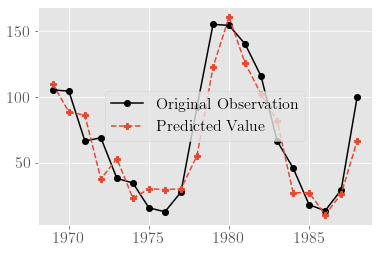

289    140.889482
dtype: float64


In [151]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc('font',family='SimHei')
plt.rc('font',size=16)
d = pd.read_csv('./data/sunspots.csv', usecols=['counts'])
md = sm.tsa.ARIMA(d, order=(9, 0, 1)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
years = np.arange(1700, 1989)  #已知观测值的年代
dhat = md.predict()
plt.plot(years[-20:], d.values[-20:], 'o-k')
plt.plot(years[-20:], dhat.values[-20:], 'P--')
plt.legend(('Original Observation', 'Predicted Value'))
plt.show()
dnext = md.predict(d.shape[0], d.shape[0])
print(dnext)  #显示下一期的预测值

对于上例, 下面给出一个完整的建模步骤.
第一步: 画出原始数据的折线图, 初步确定观测数据是平稳的. 画出序列的自相关图和偏相关图.
第二步: 利用 AIC 和 BIC 准则, 确定选择 $\operatorname{ARMA}(4,2)$, 利用 Python 软件, 求得模型的计算结果, 残差取值及分布.
第三步: 利用得到的模型, 得到 1989 年太阳黑子预测值为 139 个. 原始数据及其预测值对比.

d:\programme\python\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


[1, 1, 2534.41529731524, 2549.0810040676897]
[1, 2, 2486.3625230803455, 2504.6946565209078]
[1, 3, 2481.646979063951, 2503.6455391926256]
[1, 4, 2501.810774430834, 2527.475761247621]
[1, 5, 2478.462260496462, 2507.7936740013615]
[2, 1, 2451.5373784871113, 2469.8695119276736]
[2, 2, 2452.4263853725743, 2474.4249455012487]
[2, 3, 2454.395382327696, 2480.060369144483]
[2, 4, 2436.757559730526, 2466.0889732354253]
[2, 5, 2435.389801927289, 2468.3876421203013]
[3, 1, 2450.798655438148, 2472.7972155668226]
[3, 2, 2452.7865732718337, 2478.4515600886207]


d:\programme\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[3, 3, 2411.6547710065793, 2440.9861845114788]
[3, 4, 2411.7421002547635, 2444.7399404477756]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[3, 5, 2408.4029383287148, 2445.067205209839]
[4, 1, 2452.788049453518, 2478.453036270305]


d:\programme\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 2, 2451.5006245697655, 2480.832038074665]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 3, 2451.633536698205, 2484.631376891217]
[4, 4, 2410.7025760749657, 2447.36684295609]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[4, 5, 2410.298140016076, 2450.628833585313]
[5, 1, 2454.6752681155776, 2484.006681620477]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 2, 2451.410060046332, 2484.407900239344]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 3, 2453.383498333418, 2490.0477652145423]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 4, 2411.0638861732878, 2451.3945797425245]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


[5, 5, 2412.309252780483, 2456.306373037832]


d:\programme\python\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 counts   No. Observations:                  289
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1217.750
Date:                Wed, 09 Aug 2023   AIC                           2451.501
Time:                        15:34:47   BIC                           2480.832
Sample:                             0   HQIC                          2463.254
                                - 289                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8289      4.107     11.888      0.000      40.778      56.879
ar.L1         -0.1270      0.086     -1.482      0.138      -0.295       0.041
ar.L2          0.5361      0.067      7.966      0.0

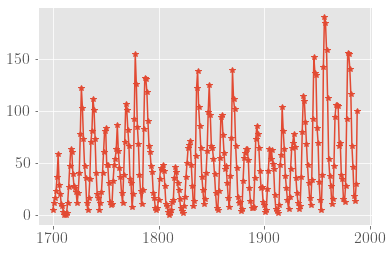

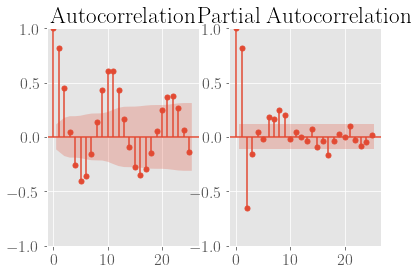

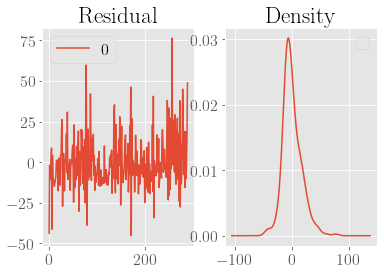

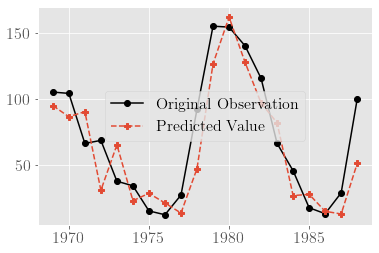

In [152]:
import pandas as pd, numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rc('axes', unicode_minus=False)
plt.rc('font', family='SimHei')
plt.rc('font', size=16)
d = pd.read_csv('./data/sunspots.csv')
dd = d['counts']
years = d['year'].values.astype(int)
plt.plot(years, dd.values, '-*')
plt.figure()
ax1 = plt.subplot(121)
plot_acf(dd, ax=ax1, title='Autocorrelation')
ax2 = plt.subplot(122)
plot_pacf(dd, ax=ax2, title='Partial Autocorrelation')

for i in range(1, 6):
    for j in range(1, 6):
        md = sm.tsa.ARIMA(dd, order=(i, 0, j)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
        print([i, j, md.aic, md.bic])
zmd = sm.tsa.ARIMA(dd, order=(4, 0, 2)).fit() # ARIMA(p,0,q)，即ARMA(p,q)
print(zmd.summary())  #显示模型的所有信息

residuals = pd.DataFrame(zmd.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residual", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.legend('')
plt.ylabel('')

dhat = zmd.predict()
plt.figure()
plt.plot(years[-20:], dd.values[-20:], 'o-k')
plt.plot(years[-20:], dhat.values[-20:], 'P--')
plt.legend(('Original Observation', 'Predicted Value'))
dnext = zmd.predict(d.shape[0], d.shape[0])
print(dnext)  #显示下一期的预测值
plt.show()

## 3. 非平稳时间序列
上节介绍了对平稳时间序列的分析方法. 实际上, 在自然界中绝大部分序列都是非平稳的.

### 3.1 差分运算
差分方法是一种非常简便、有效的确定性信息提取方法. Cramer 分解定理在理论上保证了适当阶数的差分一定可以充分提取确定性信息. 差分运算的实际是使用自回归的方式提取确定性信息.
$$
\nabla^d X_t=(1-B)^d X_t=\sum_{i=0}^d(-1)^i \mathrm{C}_d^i X_{t-i} .
$$
在实践操作中, 会根据序列不同的特点选择合适的差分方式, 常见情况有以下三种:
(1) 序列蕴含着显著的**线性趋势**, 一阶差分就可以实现平稳.
(2) 序列蕴含着**曲线趋势**, 通常二阶或三阶差分就可以提取曲线趋势的影响.
(3) 对于蕴含着**固定周期的序列**进行步长为周期长度的差分运算, 通常可以较好地提取周期信息.
从理论上来说, 足够多次的差分运算可以充分地提取原序列中的**非平稳确定性信息**, 但是, 过度的差分会造成有用信息的浪费. 因此, 在实际运用中差分运算阶数应当要适当, 避免过度差分.

### 3.2 ARIMA 模型
差分运算具有强大的确定信息提取能力, 对差分运算后得到的平稳序列可用 ARMA 模型进行拟合.
具有如下结构的模型称为 $\operatorname{ARIMA}(p, d, q)$ 模型:
$$
\left\{\begin{array}{l}
\phi(B) \nabla^d X_t=\theta(B) \varepsilon_t, \\
E\left(\varepsilon_t\right)=0, \quad \operatorname{Var}\left(\varepsilon_t\right)=\sigma_{\varepsilon}^2, \quad E\left(\varepsilon_t \varepsilon_s\right)=0, \quad s \neq t, \\
E\left(X_s \varepsilon_t\right)=0, \quad \forall s<t .
\end{array}\right. \tag{(28)}
$$
特别地, 当 $d=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{ARMA}(p, q)$ 模型. 当 $p=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{IMA}(d, q)$ 模型.
当 $q=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型实际上就是 $\operatorname{ARI}(p, d)$ 模型.
当 $d=1, p=q=0$ 时, $\operatorname{ARIMA}(p, d, q)$ 模型记为
$$
\left\{\begin{array}{l}
X_t=X_{t-1}+\varepsilon_t, \\
E\left(\varepsilon_t\right)=0, \quad \operatorname{Var}\left(\varepsilon_t\right)=\sigma_{\varepsilon}^2, \quad E\left(\varepsilon_t \varepsilon_s\right)=0, \quad s \neq t, \\
E\left(X_s \varepsilon_t\right)=0, \quad \forall s<t .
\end{array}\right.
$$
该模型称为**随机游走模型**.
ARIMA 模型建模与 ARMA 模型建模过程类似.

**例** 试利用文件 austa.csv, 建立适当的 ARIMA 模型。
**解** 原始数据的一次差分及差分数据的自相关图如程序输出图所示. 通过试着取 $p, q$ 的一些值, 根据 AIC 和 BIC 等指标, 确定建立 ARIMA $(2,1,0)$ 模型. 利用 Python 软件, 求得的残差取值及分布如程序输出图所示. 得到的预测值与原始数据的对比如程序输出图所示.

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   31
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   5.753
Date:                Wed, 09 Aug 2023   AIC                             -5.507
Time:                        15:35:27   BIC                             -1.303
Sample:                             0   HQIC                            -4.162
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4962      0.196      2.532      0.011       0.112       0.880
ar.L2          0.0485      0.215      0.225      0.822      -0.373       0.470
sigma2         0.0395      0.012      3.193      0.0

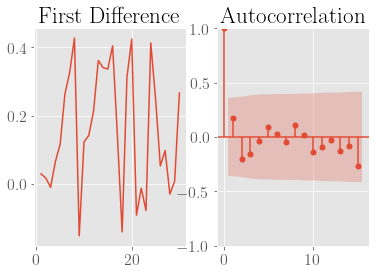

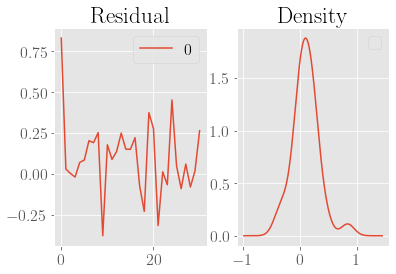

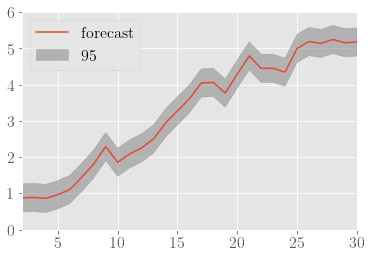

In [153]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

plt.rc('axes', unicode_minus=False)
plt.rc('font', size=16)
plt.rc('font', family='SimHei')

df = pd.read_csv('./data/austa.csv')
# print(df)

plt.subplot(121)
plt.plot(df.value.diff())
plt.title('First Difference')
ax2 = plt.subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2, title='Autocorrelation')

md = ARIMA(df.value, order=(2, 1, 0))
mdf = md.fit()
print(mdf.summary())

residuals = pd.DataFrame(mdf.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residual", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.legend('')
plt.ylabel('')

plot_predict(mdf)  #原始数据与预测值对比图
plt.xlim(2, 30)
plt.ylim(0, 6)
plt.show()

# 十四、Gurobi

Gurobi是由美国Gurobi公司开发的新一代大规模数学规划优化器，在Decision Tree for Optimization Software网站举行的第三方优化器评估中，展示出更快的优化速度和精度，成为优化器领域的新翘楚。

使用Gurobi需要单独安装, 官网下载即可https://www.gurobi.com/.

使用学生邮箱注册可以免费使用.

## LP format

Before you consider making any modifications to this file or creating your own, we should point out a few rules about LP format files.

### 1. Ordering of the sections

Our example contains an objective section (Maximize...), a constraint section (Subject To...), a variable bound section (Bounds...), and an integrality section (Integers...). The sections must come in that order. The complete list of section types and the associated ordering rules can be found in the file format section of the "Gurobi Reference Manual".

### 2. Separating tokens

Tokens must be separated by either a space or a newline. Thus, for example, the term:

$+$ .1 Dimes
must include a space or newline between + and .1, and another between .1 and Dimes.
### 3. Arranging variables

Variables must always appear on the left-hand side of a constraint. The right-hand side is always a constant. Thus, our constraint:

  Cu = .06 Pennies + 3.8 Nickels + 2.1 Dimes + 5.2 Quarters + 7.2 Dollars
...becomes...
  .06 Pennies + 3.8 Nickels + 2.1 Dimes + 5.2 Quarters + 7.2 Dollars - Cu = 0
### 4. Variable default bounds

Unless stated otherwise, a variable has a zero lower bound and an infinite upper bound. Thus, Cu <= 1000 really means 0 <= Cu <= 1000. Similarly, any variable not mentioned in the Bounds section may take any non-negative value.

Full details on the LP file format are provided in the file format section of the "Gurobi Reference Manual".



### 2. Solving the model using the Gurobi command-line interface

$>$ gurobi_cl ResultFile=coins.sol coins.lp

### 3. Reading and optimizing a model


In [3]:
from gurobipy import *
model = read("data\coins.lp")
model.optimize()

Read LP format model from file data\coins.lp
Reading time = 0.00 seconds
: 4 rows, 9 columns, 16 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 9 columns and 16 nonzeros
Model fingerprint: 0x06e334a4
Variable types: 4 continuous, 5 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 7e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [5e+01, 1e+03]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 9 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 26.1000000

Root relaxation: objective 1.134615e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   

### 4. Inspecting the solution

In [156]:
from gurobipy import *

model = read("data\coins.lp")
model.optimize()
# Inspect the values of the model variables in the optimal solution with the printAttr() method on the Model object
model.printAttr('x')

# Inspect the results of the optimization at a finer grain by retrieving a list of all the variables in the model using the getVars() method on the Model object
print(model.getVars())
print(model.getVars())

Read LP format model from file data\coins.lp
Reading time = 0.00 seconds
: 4 rows, 9 columns, 16 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 9 columns and 16 nonzeros
Model fingerprint: 0x06e334a4
Variable types: 4 continuous, 5 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 7e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [5e+01, 1e+03]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 9 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 26.1000000

Root relaxation: objective 1.134615e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   

### 5. Simple model modification

In [157]:
from gurobipy import *

model = read("data\coins.lp")

# Set a lower bound 10
model.getVars()[0].lb = 10
model.optimize()

Read LP format model from file data\coins.lp
Reading time = 0.00 seconds
: 4 rows, 9 columns, 16 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 9 columns and 16 nonzeros
Model fingerprint: 0xa40e053a
Variable types: 4 continuous, 5 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 7e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [1e+01, 1e+03]
  RHS range        [0e+00, 0e+00]
Presolve removed 2 rows and 5 columns
Presolve time: 0.00s
Presolved: 2 rows, 4 columns, 5 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 25.9500000

Root relaxation: objective 7.190000e+01, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               

### 6. Simple experimentation with a more difficult model


Interrupt the run by hitting CTRL-C, which produces the Interrupt request received message and typing m.optimize() would resume the run from the point at which it was interrupted.



### 7. Changing parameters

When the lower bound moves slowly, as it does on this model, one potentially useful parameter is MIPFocus, which adjusts the high-level MIP solution strategy. Let us now set this parameter to value 1, which changes the focus of the MIP search to finding good feasible solutions. There are two ways to change the parameter value. You can either use method m.setParam():

In [158]:
from gurobipy import *

model = read("data\coins.lp")

Read LP format model from file data\coins.lp
Reading time = 0.00 seconds
: 4 rows, 9 columns, 16 nonzeros


In [159]:
model.setParam('MIPFocus', 1)

Set parameter MIPFocus to value 1


or you can use the m.Params class...

In [160]:
model.Params.MIPFocus = 1

Once the parameter has been changed, we call m.reset() to reset the optimization on our model and then m.optimize() to start a new optimization run:

In [161]:
model.reset()
model.optimize()

Discarded solution information
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 9 columns and 16 nonzeros
Model fingerprint: 0x06e334a4
Variable types: 4 continuous, 5 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 7e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [5e+01, 1e+03]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 9 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 26.1000000

Root relaxation: objective 1.134615e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  113.46154    0    1   26.10000  113.46154

The setParam() method is designed to be quite flexible and forgiving. It accepts wildcards as arguments, and it ignores character case. Thus, the following commands are all equivalent:

In [162]:
model.setParam('NODELIMIT', 100)
model.setParam('NodeLimit', 100)
model.setParam('Node*', 100)
model.setParam('N???Limit', 100)

Set parameter NodeLimit to value 100
Matching parameters: ['NodeLimit', 'NodefileStart', 'NodefileDir', 'NodeMethod']


You can use wildcards to get a list of matching parameters:

In [163]:
model.setParam('*Cuts', 2)

Matching parameters: ['Cuts', 'CliqueCuts', 'CoverCuts', 'FlowCoverCuts', 'FlowPathCuts', 'GUBCoverCuts', 'ImpliedCuts', 'ProjImpliedCuts', 'MIPSepCuts', 'MIRCuts', 'StrongCGCuts', 'NetworkCuts', 'SubMIPCuts', 'ZeroHalfCuts', 'ModKCuts', 'InfProofCuts', 'RLTCuts', 'RelaxLiftCuts', 'BQPCuts', 'PSDCuts', 'LiftProjectCuts']


Note that Model.Params is a bit less forgiving than setParam(). In particular, wildcards are not allowed with this approach. You don't have to worry about capitalization of parameter names in either approach, though, so m.Params.Heuristics and m.Params.heuristics are equivalent.

The full set of available parameters can be browsed using the paramHelp() command. You can obtain further information on a specific parameter (e.g., MIPGap) by typing paramHelp('MIPGap').

### 8. Parameter tuning tool


When confronted with the task of choosing parameter values that might lead to better performance on a model, the long list of Gurobi parameters may seem intimidating. To simplify the process, we include a simple automated parameter tuning tool. From the interactive shell, the command is tune():

In [164]:
from gurobipy import *

model = read("data\misc07")
model.tune()

Read MPS format model from file data\misc07.mps
Reading time = 0.02 seconds
MISC07: 212 rows, 260 columns, 8619 nonzeros

Solving model using baseline parameter set with TimeLimit=3600s

Testing candidate parameter set 1...

	Default parameters

Solving with random seed #1 ...
Optimize a model with 212 rows, 260 columns and 8619 nonzeros
Model fingerprint: 0xf61ece7d
Variable types: 1 continuous, 259 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+02]
Found heuristic solution: objective 4060.0000000
Presolve removed 1 rows and 28 columns
Presolve time: 0.02s
Presolved: 211 rows, 232 columns, 8260 nonzeros
Variable types: 0 continuous, 232 integer (232 binary)

Root relaxation: objective 1.415000e+03, 81 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbe

The tool tries a number of different parameter settings, and eventually outputs the best ones that it finds.
Note that tuning is meant to give general suggestions for parameters that might help performance. You should make sure that the results it gives on one model are helpful on the full range of models you plan to solve. You may sometimes find that performance problems can't be fixed with parameter changes alone, particularly if your model has severe numerical issues.

Tuning is also available as a standalone program. From a command prompt, you can type:
$\text{>}$ grbtune "D:\Math Software\Gurobi\win64\examples\data\misc07"

### 9. Using a gurobi.env file

When you want to change the values of Gurobi parameters, you actually have several options. We've already discussed parameter changes through the command-line tool (e.g., gurobi_cl Threads=1 coins.lp), and through interactive shell commands (e.g., m.setParam('Threads', 1)). Each of our language APIs also provides methods for setting parameters. The other option is through a gurobi.env file.
Whenever the Gurobi library starts, it will look for gurobi.env in the current working directory, and will apply any parameter changes contained therein. This is true whether the Gurobi library is invoked from the command-line tool, from the interactive shell, or from any of the Gurobi APIs. Parameter settings are stored one per line in this file, with the parameter name first, followed by at least one space, followed by the desired value. Lines beginning with the # sign are comments and are ignored.

$>$ echo "Threads 1" > gurobi.env
$>$ gurobi_cl "D:\Math Software\Gurobi\win64\examples\data\misc07"

would read the new value of the Threads parameter from gurobi.env and then optimize model coins.lp using one thread. Note that if the same parameter is changed in both gurobi.env and in your program (or through the Gurobi command-line tool), the value from gurobi.env will be overridden.
A few parameters can only be used from the Gurobi command-line tool, and thus can't be set through gurobi.env. These parameters are labeled 'Command-line only' in the Parameter section of the "Gurobi Reference Manual".

### 10. Working with multiple models


The Gurobi shell allows you to work with multiple models simultaneously. For example...

In [165]:
from gurobipy import *

a = read("data\p0033")
b = read("data\stein9")

Read LP format model from file data\p0033.lp
Reading time = 0.05 seconds
: 16 rows, 33 columns, 98 nonzeros
Read MPS format model from file data\stein9.mps
Reading time = 0.01 seconds
STEIN9: 13 rows, 9 columns, 45 nonzeros


The models() command gives a list of all active models.

Note that parameters can be set for a particular model with the Model.setParam() method or the Model.Params class, or they can be changed for all models in the Gurobi shell by using the global setParam() method.

### 11. Help

The interactive shell includes an extensive help facility. To access it, simply type help() at the prompt. As previously mentioned, help is available for all of the important objects in the interface. For example, as explained in the help facility, you can type help(Model), help(Var), or help(Constr). You can also obtain detailed help on any of the available methods on these objects. For example, help(Model.setParam) gives help on setting model parameters. You can also use a variable, or a method on a variable, to ask for help. For example, if variable m contains a Model object, then help(m) is equivalent to help(Model), and help(m.setParam) is equivalent to help(Model.setParam).

In [166]:
from gurobipy import *

help(Model)


  Gurobi model object.  Commonly used methods on this object are:
    getConstrs(): Get a list of constraints in the model
    getJSONSolution(): Get a JSON-string representation of the current solution(s) to the model
    getParamInfo(paramname): Get information on a model parameter.
    getVars(): Get a list of variables in the model
    optimize(): Optimize the model.
    printAttr(attrname, filter): Print attribute values.
    printQuality(): Print solution quality statistics.
    printStats(): Print model statistics.
    read(filename): Read model data (MIP start, basis, etc.) from a file
    reset(): Discard any resident solution information.
    resetParams(): Reset all parameters to their default values.
    setParam(paramname, newval): Set a model parameter to a new value.
    write(filename): Write model data to a file.

  Models have a number of attributes that can be queried or modified.
  For example, "print model.objval" prints the objective value of
  the current soluti

### 12. Interface customization


The Gurobi interactive shell lives within a full-featured scripting language. This allows you to perform a wide range of customizations to suit your particular needs. Creating custom functions requires some knowledge of the Python language, but you can achieve a lot by using a very limited set of language features.


### 13. Attributes

As mentioned in the previous section, most of the information associated with a Gurobi model is stored in a set of attributes. Some attributes are associated with the variables of the model, some with the constraints of the model, and some with the model itself. After you optimize a model, for example, the solution is stored in the X variable attribute. Attributes that are computed by the Gurobi optimizer (such as the solution attribute) cannot be modified directly by the user, while those that represent input data (such as the LB attribute which stores variable lower bounds) can.

Each of the Gurobi language interfaces contains routines for querying or modifying attribute values. To retrieve or modify the value of a particular attribute, you simply pass the name of the attribute to the appropriate query or modification routine.

The exact syntax for querying or modifying an attribute varies slightly from one language to another, but the basic approach remains consistent: you call the appropriate query or modification method using the name of the desired attribute as an argument.
The full list of Gurobi attributes can be found in the Attributes section of the Gurobi Reference Manual.

## gurobipy, the Gurobi Python Interface

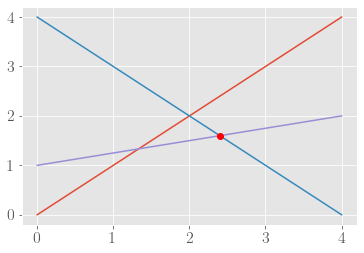

In [167]:
"""
This simple example shows a set of commands that create and solve a simple linear programming model, and then plot the resulting constraints and the computed optimal vertex.
"""

# from gurobipy import *
import gurobipy as gp
import matplotlib.pyplot as plt

model = gp.Model()
v0 = model.addVar()
v1 = model.addVar()
model.update()
model.addConstr(v0 - v1 <= 4) # Constraint 1
model.addConstr(v0 + v1 <= 4) # Constraint 2
model.addConstr(-0.25*v0 + v1 <= 1) # Constraint 3
model.setObjective(v1, gp.GRB.MAXIMIZE) # Objective: maxmize v1
model.params.outputflag = 0
model.optimize()

plt.plot([0, 4], [0, 4]) # Constraint 1
plt.plot([4, 0], [0, 4]) # Constraint 2
plt.plot([0, 4], [1, 2]) # Constraint 3
plt.plot([v0.x], [v1.x], 'ro') # Plot the optimal vertex
plt.show()

## Simple Python Example and its details

In [168]:
# This example formulates and solves the following simple MIP model:
#  maximize
#        x +   y + 2 z
#  subject to
#        x + 2 y + 3 z <= 4
#        x +   y       >= 1
#        x, y, z binary

import gurobipy as gp
from gurobipy import GRB

try:
    # Create a new model
    model = gp.Model("MIP1") # This function takes the desired model name as its argument.

    # Create variables
    x = model.addVar(vtype=GRB.BINARY, name='x')
    y = model.addVar(vtype=GRB.BINARY, name='y')
    z = model.addVar(vtype=GRB.BINARY, name='z')
    # Add more than one variable by using addVars()

    # Set objective
    model.setObjective(x + y + 2*z, GRB.MAXIMIZE)
    # Note that while this simple example builds the objective in a single statement using an explicit list of terms, more complex programs will typically build it incrementally. For example:
    # obj = LinExpr()
    # obj += x
    # obj += y
    # obj += 2*z;
    # model.setObjective(obj, GRB.MAXIMIZE)

    # Add constraints
    model.addConstr(x + 2*y + 3*z <= 4, 'c0') # The second argument to addConstr gives the (optional) constraint name.
    model.addConstr(x + y >= 1, 'c1')
    # More complex programs will typically build the expression incrementally.

    # Optimize model
    model.optimize()


    for v in model.getVars():
        print('%s = %g'%(v.varName, v.X))
        # print("{}: {}".format(v.varName, v.x))
    print('Obj = %g'%model.ObjVal)
    # print("Obj: {}".format(model.objVal))
except gp.GurobiError as e:
    print('Error code '+str(e.error)+': '+str(e))
except AttributeError:
    print('Encountered an attribute error')

# Cleaning up
gp.disposeDefaultEnv()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
x = 1
y = 0
z = 1
Obj = 3
Freeing default Gurobi environment


## Python Matrix Example and its details

In [169]:
# This example formulates and solves the following simple MIP model
# using the matrix API:
#  maximize
#        x +   y + 2 z
#  subject to
#        x + 2 y + 3 z <= 4
#        x +   y       >= 1
#        x, y, z binary

import gurobipy as gp
from gurobipy import GRB
import numpy as np
import scipy.sparse as sp

try:
    # Create a new model
    model = gp.Model("Matrix")

    # Create variables
    x = model.addMVar(shape=3, vtype=GRB.BINARY, name='x') # The matrix variable consists of a 1-D array of 3 binary variables.

    # Set objective
    obj = np.array([1, 1, 2])
    model.setObjective(obj@x, GRB.MAXIMIZE)

    # Build (sparse) constraint matrix
    # val = np.array([1, 2, 3, -1, -1])
    # row = np.array([0, 0, 0, 1, 1])
    # col = np.array([0, 1, 2, 0, 1])

    # A = sp.csr_matrix((val, (row, col)), shape=(2, 3))
    A = np.array([[1, 2, 3], [-1, -1, 0]])

    # Build rhs(right-hand side) vector
    rhs = np.array([4, -1])

    # Add constraints
    model.addConstr(A@x <= rhs)

    # Optimize model
    model.optimize()

    print(x.X)
    print('Obj=%g'%model.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.error) + ': '+str(e))
except AttributeError:
    print('Encountered an attribute error')

# Cleaning up
gp.disposeDefaultEnv()


Set parameter Username
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x8d4960d3
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
[1. 0. 1.]
Obj=3
Freeing default Gurobi environment


## Complex Example

### multidict function

In [170]:
from gurobipy import *
names, dict1, dict2, dict3 = multidict({'x': [1, 2, 3], 'y': [4, 5, 6], 'z': [7, 8, 9]})
print('names: ', names)
print('dict1: ', dict1)
print('dict2: ', dict2)
print('dict3: ', dict3)

names:  ['x', 'y', 'z']
dict1:  {'x': 1, 'y': 4, 'z': 7}
dict2:  {'x': 2, 'y': 5, 'z': 8}
dict3:  {'x': 3, 'y': 6, 'z': 9}


### The tuplelist class
Note that tuplelist is a sub-class of list, so you can use the standard list methods to access or modify a tuplelist:

In [171]:
from gurobipy import *

l = tuplelist([(1, 2), (1, 3), (2, 3), (2, 4)])
print(l.select(1, '*'))
print(l.select('*', '*'))
print(l.select('*', [2, 4]))

<gurobi.tuplelist (2 tuples, 2 values each):
 ( 1 , 2 )
 ( 1 , 3 )
>
<gurobi.tuplelist (4 tuples, 2 values each):
 ( 1 , 2 )
 ( 1 , 3 )
 ( 2 , 3 )
 ( 2 , 4 )
>
<gurobi.tuplelist (2 tuples, 2 values each):
 ( 1 , 2 )
 ( 2 , 4 )
>


### Example

In [172]:
import gurobipy as gp

# Create Model
model = gp.Model()

# Add variables
l = list([(1, 2), (1, 3), (2, 3), (2, 4)])
d = model.addVars(l, name='d') # The addVars method will create variables d(1,2), d(1,3), d(2,3), and d(2,4).
model.update()

# Create constraints
model.addConstr(sum(d.select(1, '*')) == 1) # Also use d.sum('*', 3) instead.
# model.addConstr(d.sum(1, '*') == 1)

# coeff(1, 2) = 5
# coeff(2, 3) = 7
# model.addConstr(d.prod(coeff) == 1)

Set parameter Username


<gurobi.Constr *Awaiting Model Update*>

## netflow.py example
Our example solves a multi-commodity flow model on a small network. In the example, two commodities (Pencils and Pens) are produced in two cities (Detroit and Denver), and must be shipped to warehouses in three cities (Boston, New York, and Seattle) to satisfy given demand. Each arc in the transportation network has a per-unit cost associated with it, as well as a maximum total shipping capacity.

In [173]:
"""
Solve a multi-commodity flow problem. Two products("Pencils" and "Pens") are produced in 2 cities("Detroit" and "Denver") and must be sent to warehouses in 3 cities ("Boston", "New York", and "Seattle") to satisfy demand.
Flows on the transportation network must respect arc capacity constraints("capacity[i, j]"). The objective is to minimize the sum of the arc transportation cost("cost[i, j]").
"""
import gurobipy as gp
from gurobipy import GRB

# Base Data
commodities = ["Pencils", "Pens"]
nodes = ["Detroit", "Denver", "Boston", "New York", "Seattle"]

arcs, capacity = gp.multidict({
    ("Detroit", "Boston"):   100,
    ("Detroit", "New York"):  80,
    ("Detroit", "Seattle"):  120,
    ("Denver",  "Boston"):   120,
    ("Denver",  "New York"): 120,
    ("Denver",  "Seattle"):  120
})
# print(arcs, capacity)

# Cost for triplets commodity-source-destination
cost = {
    ('Pencils', 'Detroit', 'Boston'):   10,
    ('Pencils', 'Detroit', 'New York'): 20,
    ('Pencils', 'Detroit', 'Seattle'):  60,
    ('Pencils', 'Denver',  'Boston'):   40,
    ('Pencils', 'Denver',  'New York'): 40,
    ('Pencils', 'Denver',  'Seattle'):  30,
    ('Pens',    'Detroit', 'Boston'):   20,
    ('Pens',    'Detroit', 'New York'): 20,
    ('Pens',    'Detroit', 'Seattle'):  80,
    ('Pens',    'Denver',  'Boston'):   60,
    ('Pens',    'Denver',  'New York'): 70,
    ('Pens',    'Denver',  'Seattle'):  30
}

# Demand for pairs of commodity-city, and a positive value indicates demand, while a negative value indicates supply.
inflow = {
    ('Pencils', 'Detroit'):   50,
    ('Pencils', 'Denver'):    60,
    ('Pencils', 'Boston'):   -50,
    ('Pencils', 'New York'): -50,
    ('Pencils', 'Seattle'):  -10,
    ('Pens',    'Detroit'):   60,
    ('Pens',    'Denver'):    40,
    ('Pens',    'Boston'):   -40,
    ('Pens',    'New York'): -30,
    ('Pens',    'Seattle'):  -30
}


# Create optimization model
model = gp.Model("NetFlow")


# Create variables
flow = model.addVars(commodities, arcs, obj=cost, name="flow") # Return a tupledict
#The first, positional arguments to addVars give the index set. In this case, we'll be indexing flow by commodities and arcs. In other words, flow[c,i,j] will capture the flow of commodity c from node i to node j. Note that flow only contains variables for source, destination pairs that are present in arcs. Note also that flow[c,i,j] is a continuous decision variable; variables are assumed to be continuous unless you state otherwise.
# obj (float): Objective coefficient (default is zero)


# Arc-capacity constraints
model.addConstrs((flow.sum('*', i, j) <= capacity[i, j] for i, j in arcs), "cap")
# Note that the last argument gives the base for the constraint name. The addConstrs method will automatically append the corresponding indices for each constraint. Thus, for example, the name of the constraint that limits flow from Denver to Boston will be cap[Denver,Boston].

# Equivalent version using Python looping
# for i, j in arcs:
    # model.addConstr(sum(flow[h, i, j] for h in commodities) <= capacity[i, j], "cap[%s, %s]"%(i, j))


# Flow-conservation constraints
model.addConstrs((flow.sum(h, '*', j) + inflow[h, j] == flow.sum(h, j, '*') for h in commodities for j in nodes), "nodes")
# They require that, for each commodity and node, the sum of the flow into the node plus the quantity of external inflow at that node must be equal to the sum of the flow out of the node:

# Alternate version:
# model.addConstrs(
#     (gp.quicksum(flow[h, i, j] for i, j in arcs.select('*', j)) + inflow[h, j] == gp.quicksum(flow[h, j, k] for j, k in arcs.select(j, '*')) for h in commodities for j in nodes), "node"
# )


# Create optimal solution
model.optimize()


# Print solution
if model.Status == GRB.OPTIMAL:
    solution = model.getAttr('X', flow)
    for h in commodities:
        print('\nOptimal flows for %s:' % h)
        for i, j in arcs:
            if solution[h, i, j] > 0:
                print('%s -> %s: %g' % (i, j, solution[h, i, j]))

# Cleaning up
gp.disposeDefaultEnv()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 16 rows, 12 columns and 36 nonzeros
Model fingerprint: 0xc43e5943
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]
Presolve removed 16 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5000000e+03   0.000000e+00   2.000000e+01      0s
Extra simplex iterations after uncrush: 1
       1    5.5000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.500000000e+03

Optimal flows for Pencils:
Detroit -> Boston: 50
Denver -> New York: 50
Denver -> Seattle: 10

Optimal flows for Pens:
Detroit -> Boston: 30
Detroit -> New York: 30
Denver -> Boston: 10
Denv

# 十五、Python画图
本章不做详细的解释, 通过代码注释形式给出.

Matplotlib是一个Python的2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。通过 Matplotlib，开发者可以仅需要几行代码，便可以生成绘图，直方图，功率谱，条形图，错误图，散点图等。

以下内容来自「Github」，为《PythonDataScienceHandbook[1]》第四章「Matplotlib」介绍部分。全部内容都在以下环境演示通过：
    - numpy:1.18.5
    - pandas:1.0.5
    - matplotlib:3.2.1
[1]PythonDataScienceHandbook:https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

## 1.简单的折线图
### 示例

对于图表来说，最简单的莫过于作出一个单一函数$y=-f(x)$的图像。本节中我们首先来介绍创建这种类型图表。

在Matplotlib中，图形（类plt.Figure的一个实例）可以被认为是一个包括所有维度、图像、文本和标签对象的容器。维度（类plt.Axes的一个实例）就是你上面看到的图像，一个有边界的格子包括刻度和标签，最终还有我们画在上面的图表元素。在本书中，我们会使用变量名fig来指代图形对象，以及变量名ax来指代维度变量。一旦我们创建了维度，我们可以使用ax.plot方法将数据绘制在图表上。

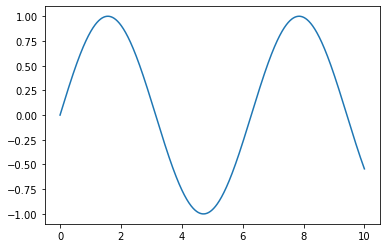

In [4]:
# ax.plot方法

import matplotlib.pyplot as plt
import numpy as np

# 对于所有的 Matplotlib 图表来说，我们都需要从创建图形和维度开始。图形和维度可以使用下面代码进行最简形式的创建
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)

ax.plot(x, np.sin(x)) #使用ax.plot方法将数据绘制在图表上

同样的，我们可以使用 pylab 接口（MATLAB 风格的接口）帮我们在后台自动创建这两个对象：

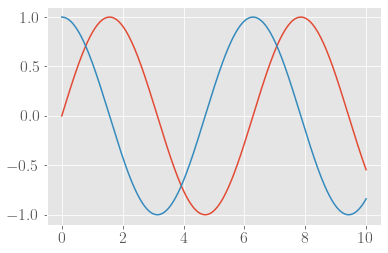

In [175]:
# plt.plot方法
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x)) # 一个图中多个图像, 只需多调用几次plt.plot即可

这就是在 Matplotlib 中绘制简单函数图像的所有接口了。下面我们深入了解一下控制坐标轴和线条外观的细节。

### 调整折线图：线条颜色和风格

你可能第一个想到需要进行调整的部分就是线条的颜色和风格。plt.plot()函数接受额外的参数可以用来指定它们。通过指定color关键字参数可以调整颜色，这个字符串类型参数基本上能用来代表任何你能想到的颜色。可以通过多种方式指定颜色参数;如果没有指定颜色，Matplotlib 会在一组默认颜色值中循环使用来绘制每一条线条。

类似的，通过linestyle关键字参数可以指定线条的风格：

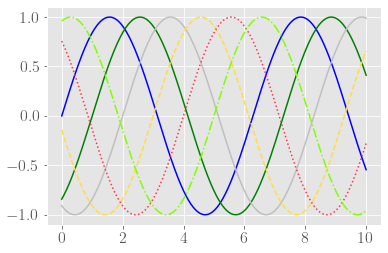

In [176]:
# 颜色与线条
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x - 0), color='blue', linestyle='solid') # 颜色:通过颜色名称指定
plt.plot(x, np.sin(x - 1), color='g', linestyle='solid') # 颜色:通过颜色简写名称指定(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75', linestyle='-') # 颜色:介于0-1之间的灰阶值; 线条:实线.
plt.plot(x, np.sin(x - 3), color='#FFDD44', linestyle='--') # 颜色:16进制的RRGGBB值; 线条:虚线.
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3), linestyle=':') # 颜色:RGB元组的颜色值，每个值介于0-1; 线条:点线.
plt.plot(x, np.sin(x - 5), color='chartreuse', linestyle='-.') # 颜色:能支持所有HTML颜色名称值; 线条:长短点虚线.


如果你喜欢更简洁的代码，这些linestyle和color参数能够合并成一个非关键字参数，传递给plt.plot()函数：

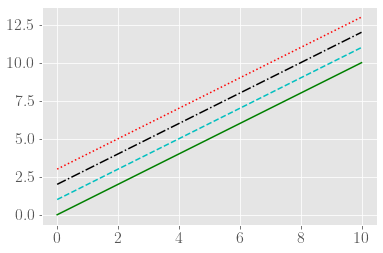

In [177]:
# 简略版颜色与线条, 将color和linestyle参数能够合并成一个非关键字参数
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)

plt.plot(x, x + 0, '-g')  # 绿色实线
plt.plot(x, x + 1, '--c') # 天青色虚线
plt.plot(x, x + 2, '-.k') # 黑色长短点虚线
plt.plot(x, x + 3, ':r')  # 红色点线

上面的单字母颜色码是 RGB 颜色系统以及 CMYK 颜色系统的缩写，被广泛应用在数字化图像的颜色系统中。

还有很多其他的关键字参数可以对折线图的外观进行精细调整；可以通过在 IPython 中使用帮助工具查看plt.plot()函数的文档来获得更多细节内容。

### 调整折线图：坐标轴范围
Matplotlib 会自动选择非常合适的坐标轴范围来绘制你的图像，但是有些情况下你也需要自己进行相关调整。使用plt.xlim()和plt.ylim()函数可以调整坐标轴的范围：

(-1.5, 1.5)

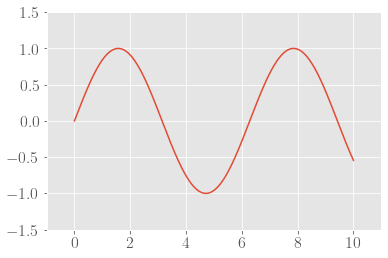

In [178]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

如果某些情况下你希望将坐标轴反向，你可以通过上面的函数实现，将参数顺序颠倒即可：

(1.2, -1.2)

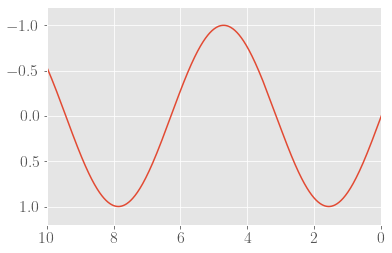

In [179]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

相关的函数还有plt.axis()（注意：这不是plt.axes()函数，函数名称是 i 而不是 e）。这个函数可以在一个函数调用中就完成 x 轴和 y 轴范围的设置，传递一个[xmin, xmax, ymin, ymax]的列表参数即可：

(-1.0, 11.0, -1.5, 1.5)

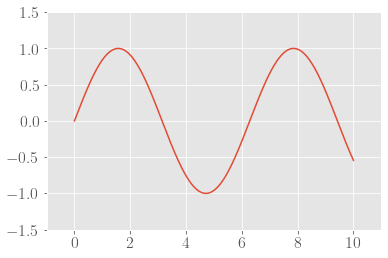

In [180]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

当然plt.axis()函数不仅能设置范围，还能像下面代码一样将坐标轴压缩到刚好足够绘制折线图像的大小：

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

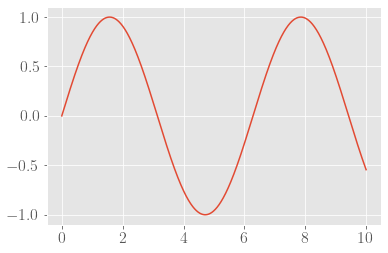

In [181]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis('tight')

还可以通过设置'equal'参数设置x轴与y轴使用相同的长度单位：

(-0.5, 10.5, -1.0999971452300779, 1.099999549246729)

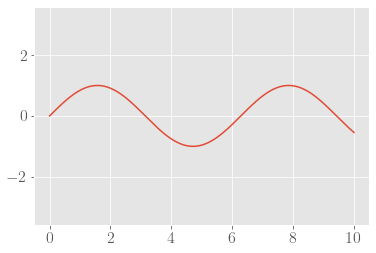

In [182]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.axis('equal')

更多关于设置 axis 属性的内容请查阅plt.axis函数的文档字符串。

### 折线图标签
本节最后介绍一下在折线图上绘制标签：标题、坐标轴标签和简单的图例。

标题和坐标轴标签是最简单的这类标签，Matplotlib 提供了函数用来方便的设置它们：

Text(0, 0.5, 'sin(x)')

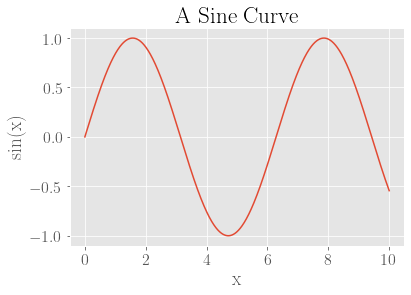

In [183]:
# 标签
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

这些标签的位置、大小和风格可以通过上面函数的可选参数进行设置。参阅 Matplotlib 在线文档和这些函数的文档字符串可以获得更多的信息。

当一幅图中绘制了多条折线时，如果能够绘制一个线条对应的图例能让图表更加清晰。Matplotlib 也内建了函数来快速创建图例。估计你也猜到了，通过plt.legend()函数可以实现这个需求。虽然有很多种正确的方法来指定图例，作者认为最简单的方法是通过在绘制每条线条时指定对应的label关键字参数来使用这个函数：

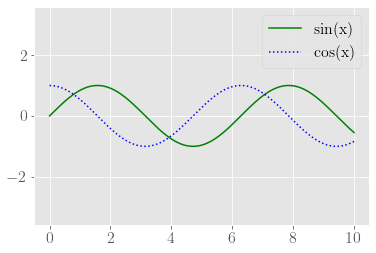

In [184]:
# 图例
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

上图可见，plt.legend()函数绘制的图例线条与图中的折线无论风格和颜色都保持一致。查阅plt.legend文档字符串可以获得更多相关信息；我们在[自定义图表图例]一节中也会讨论更高级的图例应用。

### 额外内容：Matplotlib 的坑
虽然大多数的plt函数都可以直接转换为ax的方法进行调用（例如plt.plot() → ax.plot()，plt.legend() → ax.legend()等），但是并不是所有的命令都能应用这种情况。特别是用于设置极值、标签和标题的函数都有一定的改变。下表列出了将 MATLAB 风格的函数转换为面向对象的方法的区别：
    - plt.xlabel() → ax.set_xlabel()
    - plt.ylabel() → ax.set_ylabel()
    - plt.xlim() → ax.set_xlim()
    - plt.ylim() → ax.set_ylim()
    - plt.title() → ax.set_title()
在面向对象接口中，与其逐个调用上面的方法来设置属性，更常见的使用ax.set()方法来一次性设置所有的属性：

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A Simple Plot')]

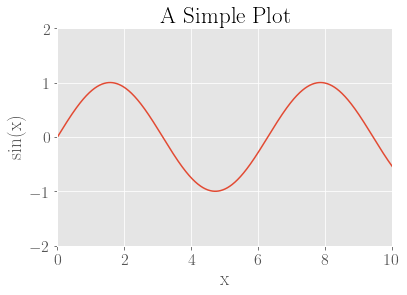

In [185]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot')

## 2.简单散点图
另一种常用的图表类型是简单散点图，它是折线图的近亲。不像折线图，图中的点连接起来组成连线，散点图中的点都是独立分布的点状、圆圈或其他形状。

### 使用 plt.plot 绘制散点图

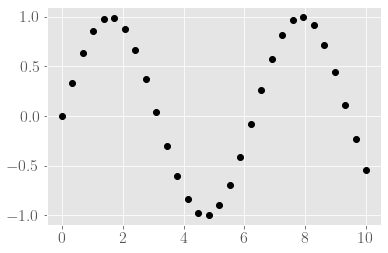

In [186]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

传递给函数的第三个参数是使用一个字符代表的图表绘制点的类型。就像你可以使用'-'或'--'来控制线条的风格那样，点的类型风格也可以使用短字符串代码来表示。所有可用的符号可以通过plt.plot文档或 Matplotlib 在线文档进行查阅。大多数的代码都是非常直观的，我们使用下面的例子可以展示那些最通用的符号：

(0.0, 1.8)

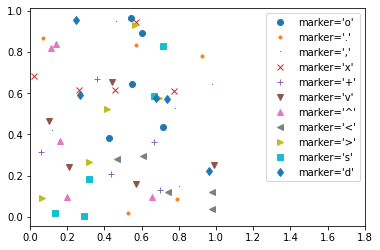

In [1]:
# 不同的图表绘制点类型参数'marker'
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

而且这些符号代码可以和线条、颜色代码一起使用，这会在折线图的基础上绘制出散点：

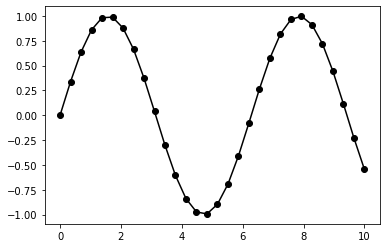

In [2]:
# 在折线图的基础上绘制出散点
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-ok')

plt.plot还有很多额外的关键字参数用来指定广泛的线条和点的属性：

(-1.2, 1.2)

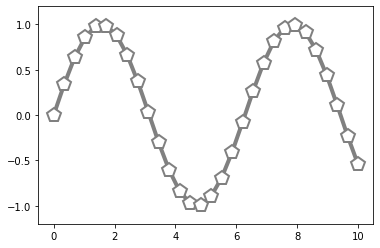

In [3]:
# 其他指定广泛的线条和点的属性的参数
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

plt.plot函数的这种灵活性提供了很多的可视化选择。查阅plt.plot帮助文档获得完整的选项说明。

### 使用plt.scatter绘制散点图

第二种更强大的绘制散点图的方法是使用plt.scatter函数，它的使用方法和plt.plot类似：

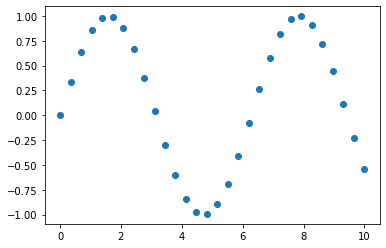

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y, marker='o')

plt.scatter和plt.plot的主要区别在于，plt.scatter可以针对每个点设置不同属性（大小、填充颜色、边缘颜色等），还可以通过数据集合对这些属性进行设置。让我们通过一个随机值数据集绘制不同颜色和大小的散点图来说明。为了更好的查看重叠的结果，我们还使用了alpha关键字参数对点的透明度进行了调整：

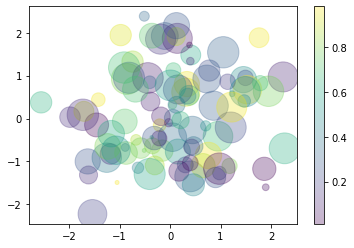

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 30)
y = np.sin(x)

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # 显示颜色对比条

注意图表右边有一个颜色对比条（这里通过colormap()函数输出），图表中的点大小的单位是像素。使用这种方法，散点的颜色和大小都能用来展示数据信息，在希望展示多个维度数据集合的情况下很直观。

例如，当我们使用 Scikit-learn 中的鸢尾花数据集，里面的每个样本都是三种鸢尾花中的其中一种，并带有仔细测量的花瓣和花萼的尺寸数据：

Text(0, 0.5, 'sepal width (cm)')

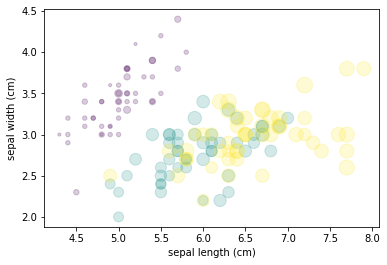

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

我们可以从下图中看出，可以通过散点图同时展示该数据集的四个不同维度：图中的(x, y)位置代表每个样本的花萼的长度和宽度，散点的大小代表每个样本的花瓣的宽度，而散点的颜色代表一种特定的鸢尾花类型。如上图的多种颜色和多种属性的散点图对于我们分析和展示数据集时都非常有帮助

### plot 和 scatter 对比：性能提醒
除了上面说的plt.plot和plt.scatter对于每个散点不同属性的支持不同之外，还有别的因素影响对这两个函数的选择吗？对于小的数据集来说，两者并无差别，当数据集增长到几千个点时，plt.plot会明显比plt.scatter的性能要高。造成这个差异的原因是plt.scatter支持每个点使用不同的大小和颜色，因此渲染每个点时需要完成更多额外的工作。而plt.plot来说，每个点都是简单的复制另一个点产生，因此对于整个数据集来说，确定每个点的展示属性的工作仅需要进行一次即可。对于很大的数据集来说，这个差异会导致两者性能的巨大区别，因此，对于大数据集应该优先使用plt.plot函数。

## 3.误差可视化
对于任何的科学测量来说，精确计算误差与精确报告测量值基本上同等重要，如果不是更加重要的话。例如，设想我正在使用一些天文物理学观测值来估算哈勃常数，即本地观测的宇宙膨胀系数。我从一些文献中知道这个值大概是71(km/s)/Mpc，而我测量得到的值是74(km/s)/Mpc,。这两个值是否一致？在仅给定这些数据的情况下，这个问题的答案是，无法回答。

如果我们将信息增加一些，给出不确定性：最新的文献表示哈勃常数的值大约是71±2.5(km/s)/Mpc，我的测量值是74±5(km/s)/Mpc。这两个值是一致的吗？这就是一个可以准确回答的问题了。

在数据和结果的可视化中，有效地展示这些误差能使你的图表涵盖和提供更加完整的信息。

### 基础误差条

<ErrorbarContainer object of 3 artists>

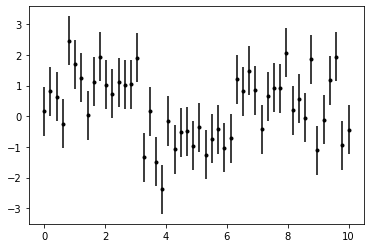

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k') # 这里的fmt参数是用来控制线条和点风格的代码，与plt.plot有着相同的语法.

<ErrorbarContainer object of 3 artists>

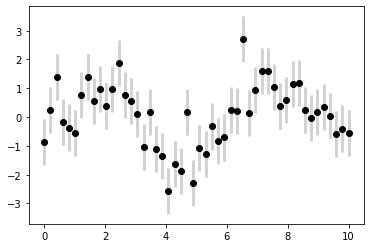

In [8]:
# errorbar函数还有很多参数可以用来精细调节图表输出。使用这些参数你可以很容易的个性化调整误差条的样式。作者发现通常将误差线条颜色调整为浅色会更加清晰，特别是在数据点比较密集的情况下：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)
# 除了上面介绍的参数，你还可以指定水平方向的误差条（xerr），单边误差条和其他很多的参数。

### 连续误差

(0.0, 10.0)

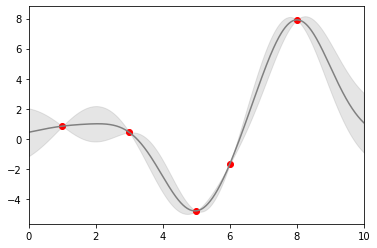

In [9]:
# 在某些情况下可能需要对连续值展示误差条。虽然 Matplotlib 没有內建的函数能直接完成这个任务，但是你可以通过简单将plt.plot和plt.fill_between函数结合起来达到目标。
# 这里我们会采用简单的高斯过程回归方法，Scikit-Learn 提供了 API。这个方法非常适合在非参数化的函数中获得连续误差。我们在这里不会详细介绍高斯过程回归，仅仅聚焦在如何绘制连续误差本身：
# 译者注：新版的 sklearn 修改了高斯过程回归实现方法，下面代码做了相应修改。
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

# 定义模型和一些符合模型的点
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 计算高斯过程回归，使其符合 fit 数据点
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 两倍sigma ~ 95% 确定区域


#我们现在有了xfit、yfit和dyfit，作为对我们数据的连续拟合值以及误差限。当然我们也可以像上面一样使用plt.errorbar绘制误差条，但是事实上我们不希望在图标上绘制 1000 个点的误差条。于是我们可以使用plt.fill_between函数在误差限区域内填充一道浅色的误差带来展示连续误差：

# 可视化结果
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)

# 注意上面我们调用fill_between函数：我们传递了的参数包括 x 值，y 值的低限，然后是 y 值的高限，结果是图表中介于低限和高限之间的区域会被填充。
# 下图为我们提供了一个非常直观的高斯过程回归展示：在观测点的附近，模型会被限制在一个很小的区域内，反映了这些数据的误差比较小。在远离观测点的区域，模型开始发散，反映了这时的数据误差比较大。
# 如果需要获得plt.fill_between（以及类似的plt.fill函数）更多参数的信息，请查阅函数的帮助文档或 Matplotlib 在线文档。

## 4.密度和轮廓图
有些情况下，我们需要在二维图表中使用轮廓或颜色区域来展示三维的数据（可以设想等高线地图或温度分布图）。Matplotlib 提供了三个有用的函数来处理这项任务：plt.contour绘制轮廓图，plt.contourf来绘制填充区域颜色的图表以及plt.imshow来展示图像。本节会介绍几个使用它们的例子。

### 三维可视化函数

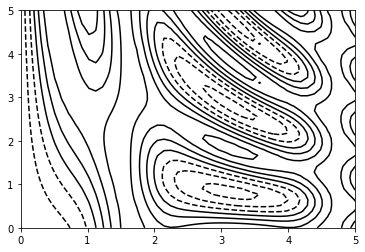

In [10]:
# 轮廓图可以使用plt.contour函数进行创建。它接收三个参数：x参数代表三维网格的平面横轴坐标，y参数代表三维网格的平面纵轴坐标，而z参数代表三维网格的高度坐标。最容易用来准备这种网格数据的是np.meshgrid函数，可以将两个一维的数组构造成一个二维的网格.
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black')

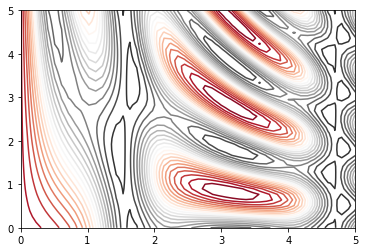

In [11]:
# 图中值得注意的是，当使用单色绘制轮廓图时，虚线代表的是负数的数值，而实线代表的是正数。而轮廓线可以通过指定cmap参数来设置线条的色图。下例中展示了使用色图且绘制了更多的轮廓线的例子，会在整个数据范围区域内等距分布有 20 条轮廓线.
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy')
# 该例中我们选择了RdGy（Red-Gray的缩写）色图，这对于聚集的数据来说是一个不错的选择

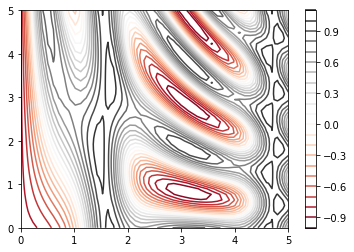

In [12]:
# 上面的图看起来比第一幅图好多了，但是线条之间的空隙还是有点让人混淆。我们可以将上面的图改为填充轮廓图来解决这个问题，使用plt.contourf()函数（注意函数名最后有个 f，代表填充 fill），这个函数的语法基本上与plt.contour()保持一致。并且我们加上了plt.colorbar()函数，这个函数会在图表边上创建一个颜色图例用以展示颜色所表示的数值区域：

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

TypeError: axis() got an unexpected keyword argument 'aspect'

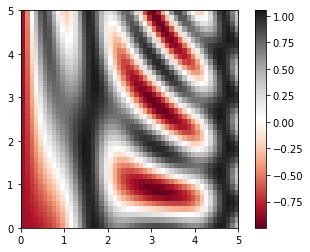

In [13]:
# 上图有一个缺点，那就是图中颜色的阶梯是离散的而不是连续的，这通常不是我们想要的。我们可以通过设置很高的轮廓线数量来改善，但是这会导致绘制图表的性能降低：Matplotlib 必须在每个颜色阶梯上绘制一条新的轮廓多边形。更好的办法是使用plt.imshow()函数，它会将一个二维的网格图表转换为一张图像。

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

然而，在使用imshow()的时候也有一些坑：

- plt.imshow()不接受 x 和 y 网格值作为参数，因此你需要手动指定extent参数[xmin, xmax, ymin, ymax]来设置图表的数据范围。
- plt.imshow()使用的是默认的图像坐标，即左上角坐标点是原点，而不是通常图表的左下角坐标点。这可以通过设置origin参数来设置。
- plt.imshow()会自动根据输入数据调整坐标轴的比例；这可以通过参数来设置，例如，plt.axis(aspect='image')能让 x 和 y 轴的单位一致。

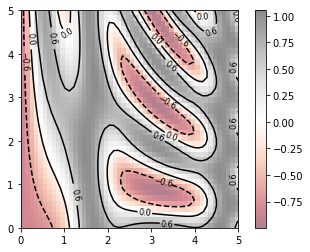

In [14]:
# 最后，有时可能需要将轮廓图和图像结合起来。例如，下例中我们使用了半透明的背景图像（通过alpha参数设置透明度），然后在背景图层之上绘制了轮廓图，并带有每个轮廓的数值标签（使用plt.clabel()函数绘制标签）：

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

通过组合使用plt.contour、plt.contourf和plt.imshow这三个函数，基本可以满足我们绘制所有这种在二维图标上的三维数据的需求。需要了解更多函数的参数信息，参考它们的文档字符串。

## 5.直方图，分桶和密度
一个简单的直方图可以是我们开始理解数据集的第一步。前面我们看到了 Matplotlib 的直方图函数，我们可以用一行代码绘制基础的直方图.

(array([  2.,  14.,  41., 159., 264., 254., 173.,  71.,  19.,   3.]),
 array([-3.62139449, -2.9061639 , -2.19093331, -1.47570272, -0.76047213,
        -0.04524154,  0.66998905,  1.38521964,  2.10045023,  2.81568081,
         3.5309114 ]),
 <BarContainer object of 10 artists>)

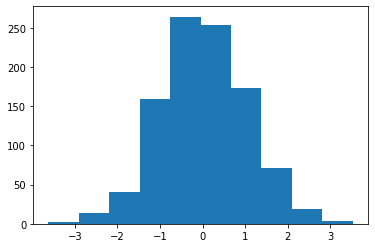

In [15]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

plt.hist(data)

hist()函数有很多的参数可以用来调整运算和展示；下面又一个更加个性化的直方图展示：

译者注：normed 参数已经过时，此处对代码进行了相应修改，使用了替代的 density 参数。

(array([0.00964089, 0.00482045, 0.00964089, 0.01446134, 0.04338401,
        0.07712713, 0.06748624, 0.13497248, 0.20727917, 0.19763828,
        0.20245873, 0.33261077, 0.33261077, 0.3470721 , 0.39527656,
        0.37599478, 0.46758325, 0.32296987, 0.36635389, 0.2313814 ,
        0.20727917, 0.14461338, 0.13015204, 0.09158847, 0.03856357,
        0.01928178, 0.02410223, 0.00964089, 0.00964089, 0.00482045]),
 array([-3.1209816 , -2.91353191, -2.70608222, -2.49863253, -2.29118284,
        -2.08373315, -1.87628347, -1.66883378, -1.46138409, -1.2539344 ,
        -1.04648471, -0.83903502, -0.63158533, -0.42413564, -0.21668596,
        -0.00923627,  0.19821342,  0.40566311,  0.6131128 ,  0.82056249,
         1.02801218,  1.23546187,  1.44291155,  1.65036124,  1.85781093,
         2.06526062,  2.27271031,  2.48016   ,  2.68760969,  2.89505938,
         3.10250906]),
 [<matplotlib.patches.Polygon at 0x1d811cd4d48>])

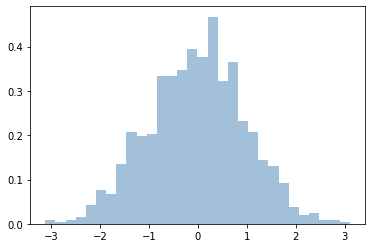

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

(array([0.00300272, 0.        , 0.        , 0.00300272, 0.00600543,
        0.00600543, 0.01201086, 0.00600543, 0.00900815, 0.03302987,
        0.03302987, 0.04804344, 0.09308417, 0.08107331, 0.10809775,
        0.14713304, 0.1591439 , 0.18316563, 0.20418463, 0.20418463,
        0.17415748, 0.19217377, 0.22520364, 0.16815205, 0.1771602 ,
        0.14713304, 0.12611404, 0.10209232, 0.10209232, 0.0600543 ,
        0.06605973, 0.03302987, 0.03302987, 0.01201086, 0.00900815,
        0.00600543, 0.01501358, 0.00600543, 0.00600543, 0.00300272]),
 array([-3.95718714, -3.62415523, -3.29112331, -2.95809139, -2.62505947,
        -2.29202755, -1.95899563, -1.62596371, -1.29293179, -0.95989988,
        -0.62686796, -0.29383604,  0.03919588,  0.3722278 ,  0.70525972,
         1.03829164,  1.37132356,  1.70435547,  2.03738739,  2.37041931,
         2.70345123,  3.03648315,  3.36951507,  3.70254699,  4.03557891,
         4.36861082,  4.70164274,  5.03467466,  5.36770658,  5.7007385 ,
         6.03377

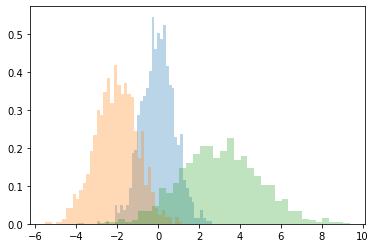

In [17]:
# plt.hist文档中有更多关于个性化参数的信息。作者发现联合使用histtype='stepfilled'和alpha参数设置透明度在对不同分布的数据集进行比较展示时很有用：
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [18]:
# 如果你只是需要计算直方图的数值（即每个桶的数据点数量）而不是展示图像，np.histogram()函数可以完成这个目标
import numpy as np

data = np.random.randn(1000)

counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 32 320 525 117   6]


### 二维直方图和分桶
正如前面我们可以在一维上使用数值对应的直线划分桶一样，我们也可以在二维上使用数据对应的点来划分桶。本节我们介绍几种实现的方法。

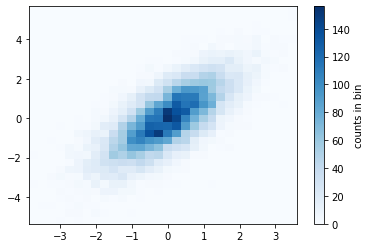

In [19]:
# plt.hist2d：二维直方图
# 首先定义数据集，从多元高斯分布中获得x和y数组：
import numpy as np

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# 绘制二维直方图最直接的方法是使用 Matplotlib 的plt.hist2d函数
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
# 类似plt.hist，plt.hist2d有许多额外的参数来调整分桶计算和图表展示，可以通过文档了解更多信息。而且，plt.hist有np.histogram，plt.hist2d也有其对应的函数np.histogram2d。如果要获得更高维度的分桶结果，参见np.histogramdd函数文档。

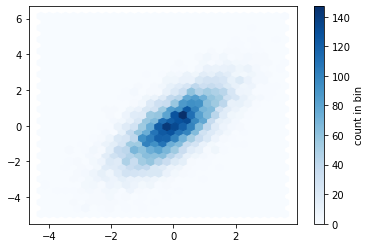

In [20]:
# plt.hexbin：六角形分桶
# 刚才的二维分桶是沿着坐标轴将每个桶分为正方形。另一个很自然的分桶形状就是正六边形。对于这个需求，Matplotlib 提供了plt.hexbin函数，它也是在二维平面上分桶展示，不过每个桶（即图表上的每个数据格）将会是六边形：
import numpy as np

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
# plt.hexbin有许多有趣的参数，包括能对每个点设置权重和将每个桶的输出数据结果改为任意的 NumPy 聚合结果（带权重的平均值，带权重的标准差等）。

### 核密度估计
另外一个常用来统计多维数据密度的工具是核密度估计（KDE）。这目前我们只需要知道 KDE 被认为是一种可以用来填补数据的空隙并补充上平滑变化数据的方法就足够了。快速和简单的 KDE 算法已经在scipy.stats模块中有了成熟的实现。下面我们就一个简单的例子来说明如何使用 KDE 和绘制相应的二维直方图.

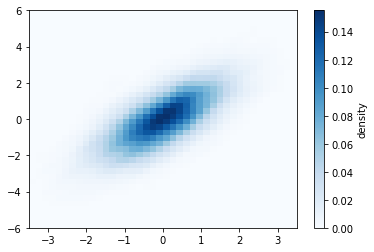

In [21]:
from scipy.stats import gaussian_kde

# 产生和处理数据，初始化KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE 有着光滑的长度，可以在细节和光滑度中有效的进行调节（一个例子是方差偏差权衡）。这方面有大量的文献介绍：高斯核密度估计gaussian_kde使用了经验法则来寻找输入数据附近的优化光滑长度值。

其他的 KDE 实现也可以在 SciPy 中找到，每一种都有它的优点和缺点；参见sklearn.neighbors.KernelDensity和statsmodels.nonparametric.kernel_density.KDEMultivariate。要绘制基于 KDE 进行可视化的图表，Matplotlib 写出的代码会比较冗长。

## 6.自定义图标图例
图例可以为可视化赋予实际含义，为不同的图标元素附上明确说明。我们前面看到了一些简单的图例创建例子；本小节中我们来介绍一下在 Matplotlib 中自定义图例的位置和进行美化的方法。

### plt.legend()创建最简单的图例

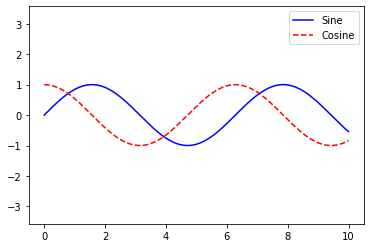

In [22]:
# 可以使用plt.legend()函数来创建最简单的图例，这个函数能自动创建任何带有标签属性的图表元素的图例
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

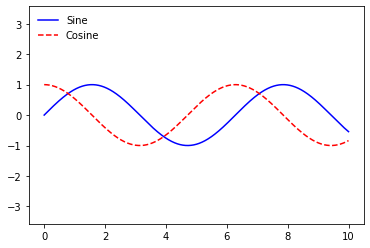

In [23]:
# 但除此之外还有很多能自定义图例的方法。例如，我们可以指定图例位置并且去除边框：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(loc='upper left', frameon=False)

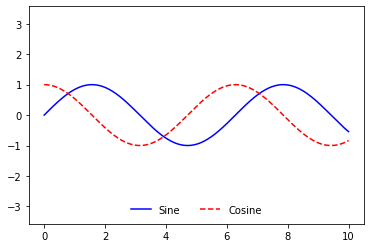

In [24]:
# 我们可以使用ncol属性设置图例中每行的列数
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(frameon=False, loc='lower center', ncol=2)

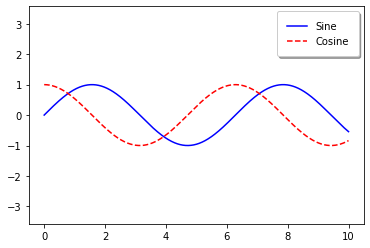

In [25]:
# 还可以使用圆角方框（fancybox）或者增加阴影，设置方框的透明度（alpha 值）或修改文字的边距：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)

# 如果jupyter是黑背景, 图例的框可能看不出来.

### 选择设置图例的元素
正如我们前面例子所示，绘制的图例默认包括所有带标签的元素。如果这不是想要的效果，我们可以调整哪些元素和标签会出现在图例当中，这可以通过设置 plot 函数或方法返回的对象实现。plt.plot函数能够同时产生多条折线，然后将这些线条的实例列表返回。将其中的部分实例传递到plt.legend()函数就能设置哪些线条会出现在图例中，再通过一个标签的列表指定图例的名称

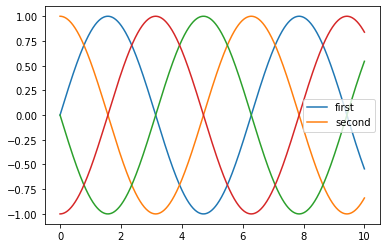

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines是一个线条实例的列表
plt.legend(lines[:2], ['first', 'second'])

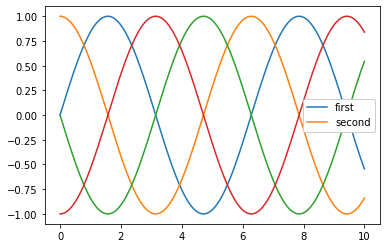

In [27]:
# 作者更加倾向于使用第一种方式，因为更加清晰。通过将标签应用在图表元素上，然后绘制到图例中：
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))

plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

# 请注意默认情况下，legend会忽略所有不带标签的元素.

### 散点大小的图例
某些情况下默认的图例不足以满足特定的可视化需求。例如，你在使用散点的大小来标记数据的某个特征，然后希望创建一个相应的图例。下面的例子是加州城市人口的散点图，我们使用散点的大小表现该城市的面积，散点的颜色来表现城市的人口数量（自然对数值）。我们希望使用一个图例来指明散点尺寸的比例，同时用一个颜色条来说明人口数量，我们可以通过自定义绘制一些标签数据来实现尺寸图例：

译者注：新版 Matplotlib 已经取消 aspect 参数，此处改为使用新的'scaled'参数调用 axis 函数。

Text(0.5, 1.0, 'California Cities: Area and Population')

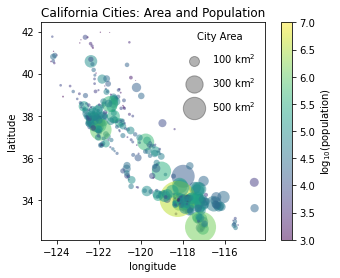

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cities = pd.read_csv(r'data\california_cities.csv')

# 提取我们感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 绘制散点图，使用尺寸代表面积，颜色代表人口，不带标签
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面我们创建图例：
# 使用空列表绘制图例中的散点，使用不同面积和标签，带透明度
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population')

之前的图例都关联着图表上的一些对象，因此如果我们需要展示图例的话我们首先需要绘制图表元素。在上例中，我们需要的图例对象（灰色圆圈）不在图表上，因此我们采用绘制空列表的方式将它们仿造在图表上（实际上图上没有点），但是还是需要注意，只有那些带标签的元素才会出现在图例中。

通过绘制空列表，我们创建了三个带标签的对象，然后就可以出现在图例当中，这个图例就能表示出有关城市面积的相关信息。这个策略在很多复杂可视化图表构建过程中都被用到。

最后我们注意到这个图表实际上是一个地理位置图表，如果我们能在上面绘制州界线或其他地图相关的元素的话，会更加清晰。Matplotlib 提供了一个 Basemap 额外工具集来实现这个目标。

### 多重图例
有时候我们可能需要在同一个图表维度中设计多个图例。不幸的是，Matplotlib 并没有提供很简单的方式实现：通过标准的legend接口，只能在整张图表上创建一个图例。如果你试图使用plt.legend()或ax.legend()创建第二个图例，那么第二条语句创建的图例会覆盖第一条语句创建的。我们只能通过从底层开始来创建一个新的图例 artist 这种方法来解决这个问题，然后使用ax.add_artist()的底层方法手动将第二个作者加到图表上：

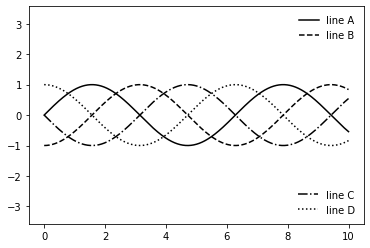

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一个图例的线条和标签
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 手动创建第二个图例，并将作者添加到图表中
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg)

上例展示了用来组成任何 Matplotlib 图表的底层 artist 对象的简单说明。如果你去查看ax.legend()的源代码（你可以通过 IPython 的ax.legend??帮助工具做到），你可以看到这个方法包含了用来构建合适Legend的 artist 对象的逻辑，构建的对象被保存在legend_属性当中，当绘制时被添加到图表上进行展示。

## 7.个性化颜色条
图例可以将离散的点标示为离散的标签。对于建立在不同颜色之上的连续的值（点线面）来说，标注了的颜色条是非常方便的工具。Matplotlib 的颜色条是独立于图表之外的一个类似于比色卡的图形，用来展示图表中不同颜色的数值含义。因为本书是使用黑白打印的，本节内容中的所有带色彩的图都可以在(https://github.com/wangyingsm/Python-Data-Science-Handbook)中找到。

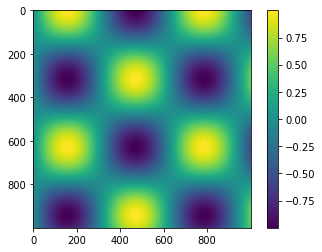

In [30]:
# 通过plt.colorbar函数可以创建最简单的颜色条，在本节中我们会多次看到：

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

我们下面来讨论如何个性化颜色条以及在不同的场合高效的使用它们。

### 自定义颜色条

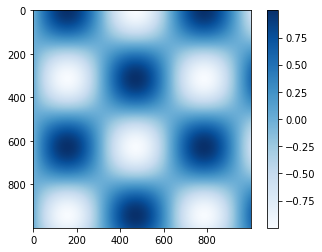

In [31]:
# 颜色条可以通过cmap参数指定使用的色谱系统（或叫色图）
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='Blues') # 所有可用的色图都可以在plt.cm模块中找到
plt.colorbar()

### 选择色图
在可视化方案中选择颜色完整的介绍说明超出了本书的范围，如果你对这个课题和相关内容有兴趣，可以参考文章["绘制更漂亮图表的 10 个简单规则"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)。

通常来说，你应该注意以下三种不同类型的色图：
    - 序列色图：这类型的色谱只包括一个连续序列的色系（例如binary或viridis）。
    - 分化色图：这类型的色谱包括两种独立的色系，这两种颜色有着非常大的对比度（例如RdBu或PuOr）。
    - 定性色图：这类型的色图混合了非特定连续序列的颜色（例如rainbow或jet）。
jet色图，在 Matplotlib 2.0 版本之前都是默认的色图，是定性色图的一个例子。jet作为默认色图的位置其实有点尴尬，因为定性图通常都不是对定量数据进行展示的好选择。原因是定性图通常都不能在范围增加时提供亮度的均匀增长。

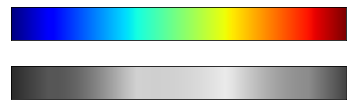

In [32]:
# 我们可以通过将jet颜色条转换为黑白来看到这点：

from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回给定色图的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名称获取色图对象
    colors = cmap(np.arange(cmap.N)) # 将色图对象转为RGBA矩阵，形状为N×4

    # 将RGBA颜色转换为灰度
    # 参考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的权重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和权重的点积开平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩阵
    # 返回相应的灰度值色图
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """将色图对应的灰度版本绘制出来"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

view_colormap('jet')

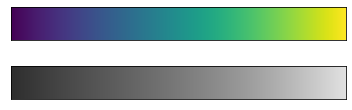

In [33]:
# 注意一下上面的灰度图中亮条纹的位置。即使在上述彩色图中，也出现了这种不规则的亮条纹，这会导致眼睛被区域中亮条纹所吸引，这很可能造成阅读者被不重要的数据集部分干扰了。更好的选择是使用类似viridis这样的色图（Matplotlib 2.0 后默认色图），它们被设计为有着均匀的亮度变化。因此它们无论是在彩色图中还是在灰度图中都有着同样的亮度变化：
view_colormap('viridis')

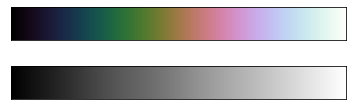

In [34]:
# 如果你更喜欢彩虹方案，另一个好的选择是使用cubehelix色图：
view_colormap('cubehelix')

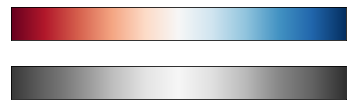

In [35]:
# 对于其他的情况，例如某种正负分布的数据集，双色颜色条如RdBu（Red-Blue）会很常用。然而正如你从下面例子看到的，如果将双色颜色条转化为灰度的话，正负或两级的信息就会丢失：
view_colormap('RdBu')

Matplotlib 中有大量可用的色图；要看到它们的列表，你可以使用 IPython 来探索plt.cm模块。要在 Python 中更加正规的使用颜色，你可以查看 Seaborn 库的工具和文档。

### 颜色限制和扩展
Matplotlib 允许你对颜色条进行大量的自定义。颜色条本身就是一个plt.Axes对象，因此所有轴和刻度定制的技巧都可以应用在上面。颜色条也有着一些有趣的自定义行为：例如，我们可以缩小颜色的范围并且通过设置extend参数将超出范围之外的数值展示为顶部和底部的三角箭头形状。这对于展示一些受到噪声干扰的数据时非常方便：

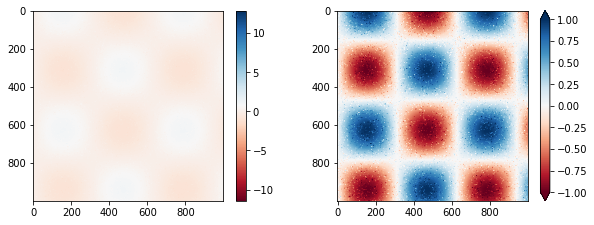

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 在I数组中人为生成不超过1%的噪声
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
# 不考虑去除噪声时的颜色分布
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
# 设置去除噪声时的颜色分布
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

注意到在左边的图表中，默认的颜色阈值是包括了噪声的，因此整体的条纹形状都被噪声数据冲刷淡化了。而右边的图表，我们手动设置了颜色的阈值，并在绘制颜色条是加上了extend参数来表示超出阈值的数据。对于我们的数据来说，右图比左图要好的多。

### 离散颜色条
色图默认是连续的，但是在某些情况下你可能需要展示离散值。最简单的方法是使用plt.cm.get_cmap()函数，在传递某个色图名称的同时，还额外传递一个颜色分桶的数量值参数给该函数：

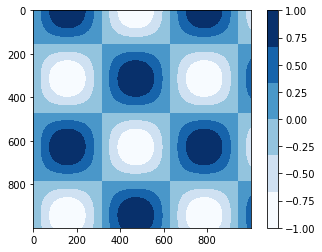

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

离散色图的使用方式和其他色图没有任何区别。

### 例子：手写数字
最后我们来看一个很有实用价值的例子，让我们实现对一些手写数字图像数据的可视化分析。这个数据包含在 Sciki-Learn 中，以供包含有将近 2,000 张8*8不同笔迹的手写数字缩略图。

首先，我们下载这个数据集，然后使用plt.imshow()将其中部分数据展示出来：

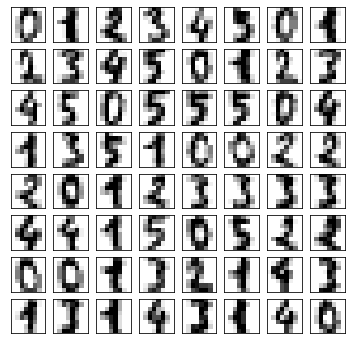

In [38]:
# 读取数字0-5的手写图像，然后使用Matplotlib展示头64张缩略图
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

因为每个数字都是使用 64 个像素点渲染出来的，我们可以认为每个数字是一个 64 维空间中的点：每个维度代表这其中一个像素的灰度值。但是要在图表中将这么高维度空间的联系可视化出来是非常困难的。有一种做法是使用降维技术，比方说使用流形学习来减少数据的维度然而不会丢失数据中有效的信息。

我们来看一下将这些手写数字图像数据映射到二维流形学习当中：

d:\programme\python\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\programme\python\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


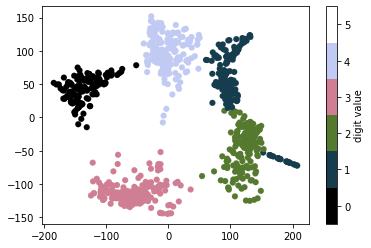

In [39]:
# 使用Isomap将手写数字图像映射到二维流形学习中
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 我们使用离散颜色条来展示结果，设置ticks和clim来进一步美化结果的颜色条：
# 绘制图表结果
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

我们从流形学习中的映射中可以观察到一些有趣现象：例如，图表中 5 和 3 有一些重叠的部分，这表示一些手写体中 5 和 3 是比较难以辨别的，因此对于自动识别算法来说这是比较容易混淆的部分。而 0 和 1，它们在图表中距离很远，这表示两者比较容易辨别，不太可能造成混淆。这个图表分析与我们的直觉一致，因为 5 和 3 显然比 0 和 1 看起来更加接近。

## 8.多个子图表
在一些情况中，如果能将不同的数据图表并列展示，对于我们进行数据分析和比较会很有帮助。Matplotlib 提供了子图表的概念来实现这一点：单个图表中可以包括一组小的 axes 用来展示多个子图表。这些子图表可以是插图，网格状分布或其他更复杂的布局。在本节中我们会介绍 Matplotlib 中用来构建子图表的四个函数。

### plt.axes：手动构建子图表
构建 axes 作为子图表的最基础方法就是使用plt.axes函数。正如我们前面已经看到，默认情况下，这个函数够创建一个标准的 axes 对象填满整个图表区域。plt.axes函数也可以接收一个可选的列表参数用来指定在 axes 在整个图表中的坐标点位置。列表中有四个数值分别为[left, bottom, width, height]（取值都是 0-1），代表着子图表的左边、底部、宽度、高度在整个图表中左边、底部、宽度、高度所占的比例值。

例如，我们可以在距离左边和底部 65%的位置，以插图的形式放置一个宽度和高度都是 20%子图表，上述数值应该为[0.65, 0.65, 0.2, 0.2]：

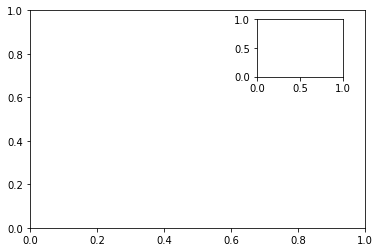

In [40]:
import matplotlib.pyplot as plt
import numpy as np

ax1 = plt.axes()  # 标准图表
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #子图表

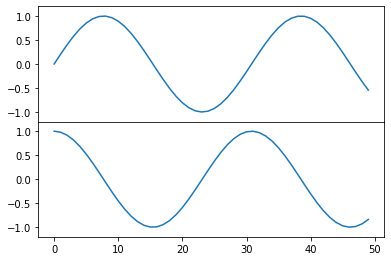

In [41]:
# 与上述等价的面向对象接口的语法是fig.add_axes()。我们使用这个方法来创建两个垂直堆叠的子图表：
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() # 获得figure对象
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2)) # 左边10% 底部50% 宽80% 高40%
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2)) # 左边10% 底部10% 宽80% 高40%

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

这样我们就有两个子图表（上面的子图表没有 x 轴刻度），这两个子图表正好吻合：上面图表的底部是整个图表高度 50%位置，而下面图表的顶部也是整个图表的 50%位置（0.1+0.4）。

### plt.subplot：简单网格的子图表
将子图表的行与列对齐是一个很常见的需求，因此 Matplotlib 提供了一些简单的函数来实现它们。这些函数当中最底层的是plt.subplot()，它会在网格中创建一个子图表。函数接受三个整数参数，网格行数，网格列数以及该网格子图表的序号（从左上角向右下角递增）：

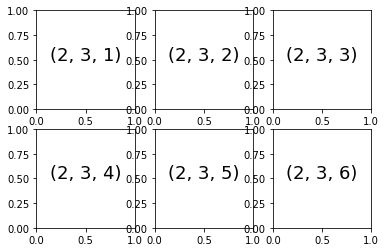

In [42]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

plt.subplots_adjust函数用来调整这些子图表之间的距离。下面的代码使用了与plt.subplot()等价的面向对象接口方法fig.add_subplot()：

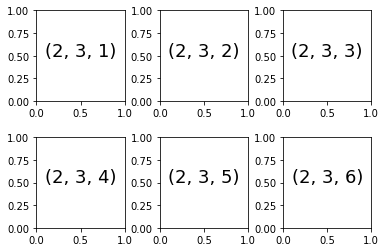

In [43]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

上例中我们指定了plt.subplots_adjust函数的hspace和wspace参数，它们代表这沿着高度和宽度方向子图表之间的距离，单位是子图表的大小（在本例中，距离是子图表宽度和高度的 40%）。

### plt.subplots：一句代码设置所有网格子图表
上面的方法当我们需要创建大量的子图表网格时会变得非常冗长乏味，特别是如果我们需要将内部图表 x 轴和 y 轴标签隐藏的情况下。因此，plt.subplots在这种情况下是一个合适的工具（注意末尾有个 s）。这个函数会一次性创建所有的网格子图表，而不是单个网格，并将它们在一个 NumPy 数组中返回。参数是行数和列数，还有两个可选的关键字参数sharex和sharey，可以让你指定不同子图表之间的关联。

下面我们来创建一个  网格的子图表，其中每一行的子图表共享它们的 y 轴，而每一列的子图表共享它们的 x 轴：

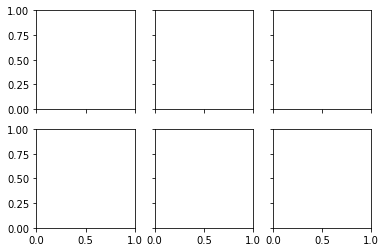

In [44]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

注意上面我们设置了sharex和sharey之后，内部子图表的 x 轴和 y 轴的标签就自动被去掉了。返回值中 ax 是一个 NumPy 数组，里面含有每一个子图表的实例，你可以使用 NumPy 索引的语法很简单的获得它们：

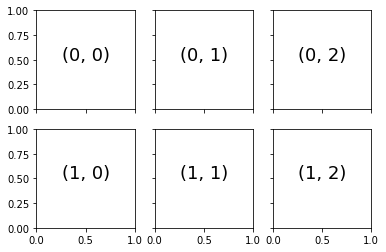

In [45]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# axes是一个2×3的数组，可以通过[row, col]进行索引访问
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
# fig

并且相对于plt.subplot，plt.subplots()更复合 Python 从 0 开始进行索引的习惯。

### plt.GridSpec：更复杂的排列
当你需要子图表在网格中占据多行或多列时，plt.GridSpec()正是你所需要的。plt.GridSpec()对象并不自己创建图表；它只是一个可以被传递给plt.subplot()的参数。例如，一个两行三列并带有指定的宽度高度间隔的 gridspec 可以如下创建：

<AxesSubplot:>

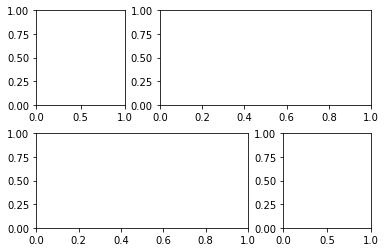

In [46]:
import matplotlib.pyplot as plt
import numpy as np

grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

# 使用这个对象我们可以指定子图表的位置和占据的网格，仅需要使用熟悉的 Python 切片语法即可：

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

这种灵活的网格对齐控制方式有着广泛的应用。作者经常在需要创建多个直方图的联合图表中使用这种方法，如下例：

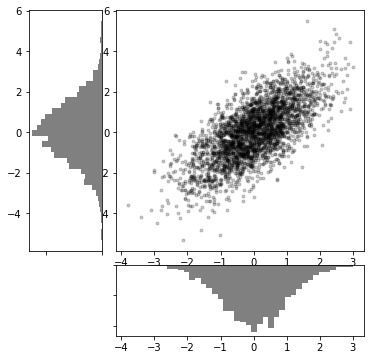

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# 构建二维正态分布数据
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# 使用GridSpec创建网格并加入子图表
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 在主图表中绘制散点图
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# 分别在x轴和y轴方向绘制直方图
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # x轴方向（右下）直方图倒转y轴方向

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis() # y轴方向（左上）直方图倒转x轴方向

这种沿着数据各自方向分布并绘制相应图表的需求是很通用的，因此在 Seaborn 包中它们有专门的 API 来实现

## 9.文本和标注
创建一个优秀的可视化图表的关键在于引导读者，让他们能理解图表所讲述的故事。在一些情况下，这个故事可以通过纯图像的方式表达，不需要额外添加文字，但是在另外一些情况中，图表需要文字的提示和标签才能将故事讲好。也许标注最基本的类型就是图表的标签和标题，但是其中的选项参数却有很多。让我们在本节中使用一些数据来创建可视化图表并标注这些图表来表达这些有趣的信息。

### 例子：节假日对美国出生率的影响

d:\programme\python\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


<AxesSubplot:>

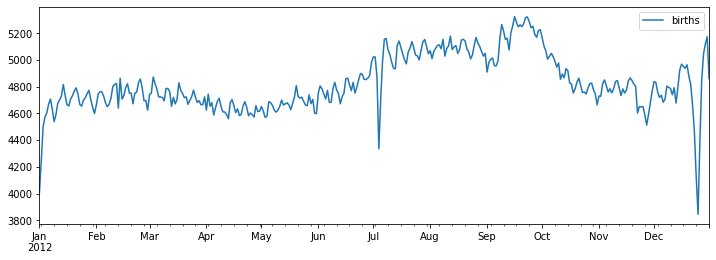

In [48]:
# 我们先按照前面的方式进行同样的数据清洗程序，然后以图表展示这个结果：
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

births = pd.read_csv(r'data\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

当我们绘制了这样的图表来表达数据时，如果我们能对一些图表的特性作出标注来吸引读者的注意力通常是非常有帮助的。这可以通过调用plt.text或ax.text函数来实现，它们可以在某个特定的 x，y 轴位置输出一段文字：

d:\programme\python\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


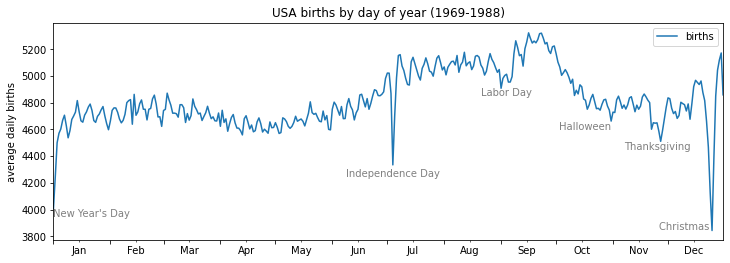

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

births = pd.read_csv(r'data\births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 在折线的特殊位置标注文字
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# 设置标题和y轴标签
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置x轴标签月份居中
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.text方法接收 x 位置、y 位置、一个字符串和额外可选的关键字参数可以用来设置颜色、大小、样式、对齐等文本格式。上面我们使用了ha='right'和ha='center'，这里的ha是*hirizonal alignment（水平对齐）*的缩写。要查阅更多的可用参数，请查看plt.text()和mpl.text.Text()的文档字符串内容。

### 转换和文本位置
在刚才的例子中，我们将文字标注根据数据位置进行了定位。有些时候我们需要将文字标注独立于数据位置而根据图表位置进行定位。Matplotlib 通过转换完成这项工作。

任何的图形显示框架都需要在坐标系统之间进行转换的机制。例如，一个数据点位于$(x,y)=(1,1)$被转换为图表中的某个位置，进而转换为屏幕上显示的像素。这样的坐标转换在数学上都相对来说比较直接，，而且 Matplotlib 提供了一系列的工具实现了转换（这些工具可以在matplotlib.transforms模块中找到）。

一般来说，用户很少需要关注这些转换的细节，但是当考虑将文本在图表上展示时，这些知识却比较有用。在这种情况中，下面三种定义好的转换是比较有用的：
    - ax.transData：与数据坐标相关的转换
    - ax.tranAxes：与 Axes 尺寸相关的转换（单位是 axes 的宽和高）
    - ax.tranFigure：与 figure 尺寸相关的转换（单位是 figure 的宽和高）

下面我们来看看使用这些转换将文字写在图表中不同位置的例子：

Text(0.2, 0.2, '. Figure: (0.2, 0.2)')

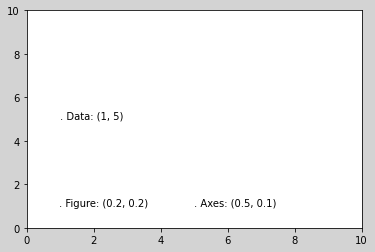

In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

注意默认情况下，文字是在指定坐标位置靠左对齐的：这里每个字符串开始的"."的位置就是每种转换的坐标位置。

transData坐标给定的是通常使用的 x 和 y 轴坐标位置。transAxes坐标给定的是从 axes 左下角开始算起（白色区域）的坐标位置，使用的是宽度和长度的占比。transFigure坐标类似，给定的是从 figure 左下角开始算起（灰色区域）的坐标位置，使用的也是宽度和长度的占比。

因此如果我们改变了轴的最大长度，只有transData坐标会收到影响，其他两个还是保持在相同位置：

(-6.0, 6.0)

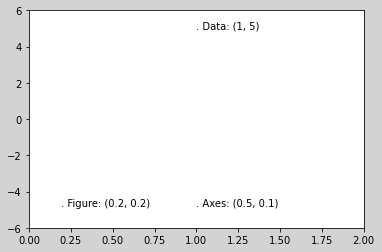

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData是默认的，这里写出来是为了明确对比
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)

ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)

# fig

这个变化可以通过动态改变轴的最大长度看的更加清楚：如果你在 notebook 执行这段代码，你可以将%matplotlib inline改为%matplotlib notebook，然后使用图表的菜单来交互式的改变图表。

### 箭头和标注
除了刻度标签和文字标签，另一种常用的标注是箭头。

在 Matplotlib 中绘制箭头通常比你想象的难得多。虽然有plt.arrow()函数，作者不建议使用它：这个函数绘制的箭头是一个 SVG 对象，因此在图表使用不同的比例的情况会产生问题，结果通常不能让用户满意。因此，作者建议使用plt.annotate()函数。这个函数会绘制一些文字以及一个箭头，并且箭头可以非常灵活的进行配置。

下面我们提供一些参数来使用annotate函数：

Text(2, -6, 'local minimum')

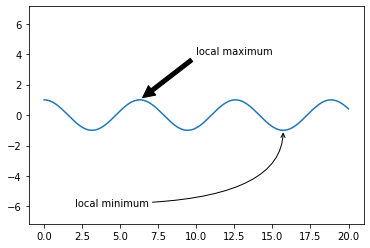

In [52]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

箭头的样式是使用箭头属性字典值进行控制的，里面有很多可用的参数。这些参数在 Matplotlib 的在线文档中已经有了很详细的说明，因此在这里就不将这部分内容重复介绍一遍了。我们在前面出生率图上再使用一些参数进行更多的说明：

(3600.0, 5400.0)

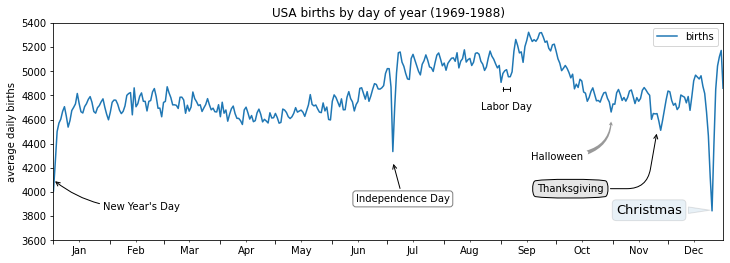

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# 为图表添加标注
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# 设置图表标题和坐标轴标记
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# 设置月份坐标居中显示
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400)

上图中箭头和文字框都非常详尽了：可以看出你几乎可以使用plt.annotate创建任何你想要的箭头样式。不幸的是，这意味着这种特性都需要手工进行调整，因此如果需要获得印刷质量的图像，这将是一个非常耗费时间的工作。最后，必须指出，上述这种多种样式混合的方式来展现数据肯定不是最佳实践，这里只是为了尽可能多的介绍可用的参数。

更多关于 Matplotlib 的箭头和标注样式的讨论和例子可以访问 Matplotlib gallery.

## 10.自定义刻度
Matplotlib 默认的刻度标志和格式被设计成能满足许多通用场景的需求，但是不会是所有图表的最佳选择。本节会介绍一些调整刻度位置和格式的例子来说明自定义刻度的使用。

在介绍例子之前，我们应该加深对 Matplotlib 图表的对象层次的理解。Matplotlib 的设计目标是展示在图表中的所有内容都会表达成为 Python 的对象：例如，回忆前面我们介绍过figure指的是用来展示图表所有内容的方框。每个 Matplotlib 对象也被设计为其子对象的一个容器：例如figure对象中可以包含一个或多个axes对象，每个axes对象都依次包含着其他用来展示图表的内容对象。

刻度也不例外。每个axes对象都有着属性xaxis和yaxis，表示 x 和 y 轴，其中包含着所有的属性用来指代轴的线、刻度和标签。

### 主要的和次要的刻度
在每个坐标轴上，都有主要的刻度和次要的刻度概念。正如名字指代的，主要刻度通常是大的和更多用到的，而次要刻度通常是小的。默认 Matplotlib 很少使用次要刻度，但是在对数图表中我们可能会看到它们：

在 Matplotlib 2.0 之后，当 axis 的跨度过大时，默认次要刻度将会不再展示，因此，下面的代码经过了修改，加上了 xlim 和 ylim 参数。

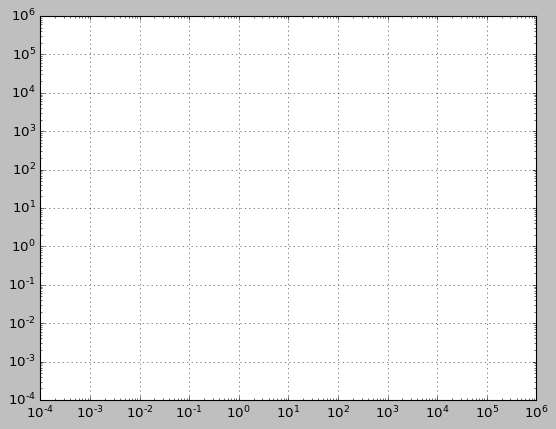

In [54]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

ax = plt.axes(xscale='log', yscale='log', xlim=[10e-5, 10e5], ylim=[10e-5, 10e5])
ax.grid()

我们看到每个主要刻度显示了一个大的标志和标签，而每个次要刻度显示了一个小的刻度标志没有标签。

这些刻度属性，位置和标签，都可以使用每个轴的formatter和locator对象进行个性化设置。下面我们来查看一下 x 轴的相应对象：

In [55]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [56]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

我们看到主要和次要刻度的位置都是使用LogLocator来设置的（对于对数图表来说那是理所当然的）。然而次要刻度的标签的格式是NullFormatter：这表示次要刻度不会显示标签。

译者注：新版 Matplotlib 已经修改，可以看到 Formatter 都统一成为了 LogFormatterSciNotation，再根据图表实际情况选择是否展示标签。

下面我们就可以开始介绍一些设置这些 locator 和 formatter 的例子了。

### 隐藏刻度和标签
也许最常见的刻度/标签格式设置的操作是隐藏刻度或标签。这可以通过使用plt.NullLocator()和plt.NullFormatter()来设置，如下例：

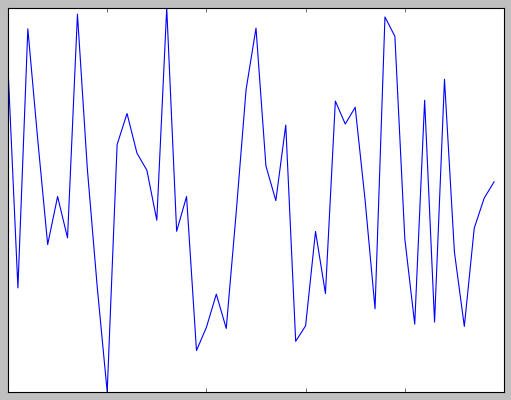

In [57]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

注意上图中我们去除了 x 轴的标签（但是保留了刻度或网格线），y 轴的刻度和标签都被去除了。图表中没有刻度和标签在很多情况下很有用，例如，当你希望展示一个图像的网格。比方说，考虑下面的图表，包含着不同的头像，一个很常见的有监督机器学习问题：

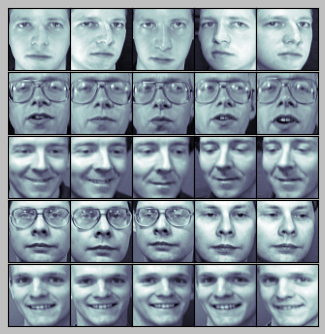

In [58]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# 从scikit-learn载入头像数据集
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

注意上图中每张图像都有它自己的 axes，我们将每一个 axes 的 locator 都设置为 null 因为这些刻度值（像素值）在这里并没有任何实际意义。

### 减少或增加刻度的数量
默认设置的一个常见问题是当子图表较小时，刻度标签可能会粘在一起。我们可以从下面例子看到：

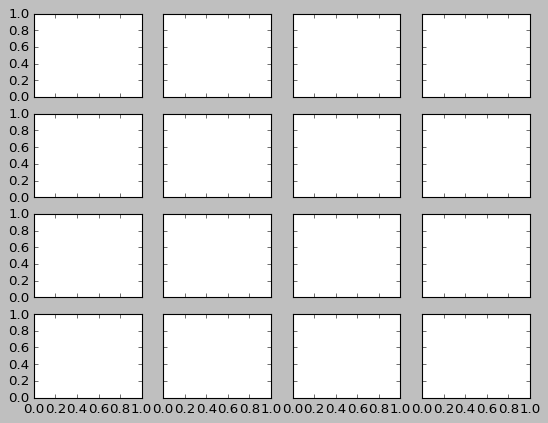

In [59]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

特别是 x 轴，标签的数字就快重叠在一起了，这让这些标签难以认清。我们可以通过plt.MaxNLocator()来修正这点，用它可以设置最大展示刻度的数量。Matplotlib 会自己计算按照这个最大数量计算的刻度位置：

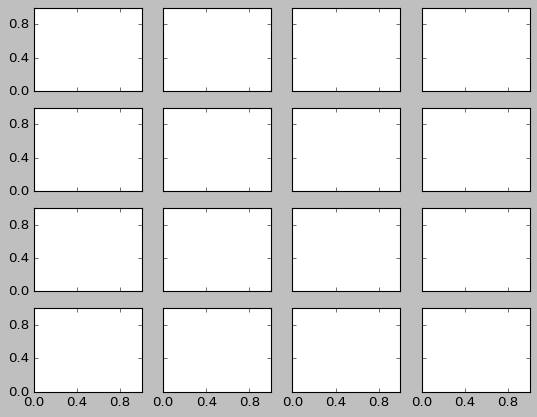

In [60]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

# 对x和y轴设置刻度最大数量
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

# fig

上图就清晰多了。如果你希望对于刻度位置进行更加精细的控制，你可以使用plt.MultipleLocator，我们会接下来讨论这个对象。

### 复杂的刻度格式
Matplotlib 的默认刻度格式只能在很多常见情况下工作良好，但是在特殊情况下你会希望能够更多的进行个性化。考虑下面的正弦和余弦图表：

(0.0, 9.42477796076938)

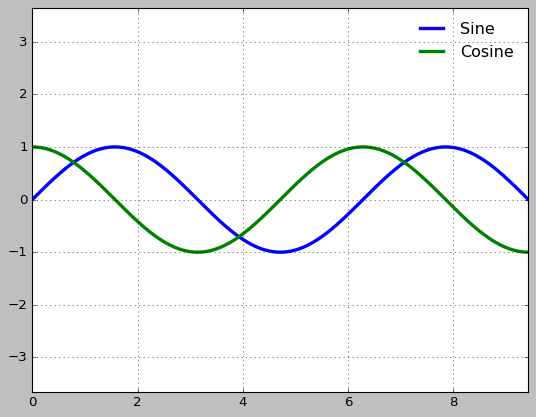

In [61]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

# 绘制正弦和余弦图表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和轴极限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

这里有几个我们希望进行的改变。首先，如果刻度的间距和网格线是$\pi$的倍数会显得更加自然。我们可以通过MultipleLocator来设置它，这个对象用来设置刻度的配置。为了更直观，我们设置主要刻度为$\frac{\pi}{2}$位置，设置次要刻度为$\frac{\pi}{4}$位置：

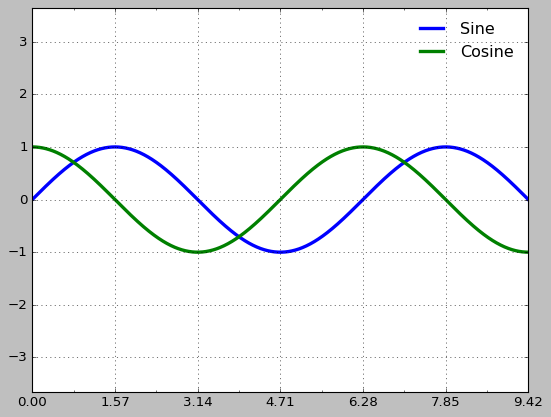

In [62]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

# 绘制正弦和余弦图表
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# 设置网格、图例和轴极限
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

# fig

但是上图看起来有点傻：我们可以看出刻度确实是  的倍数，但是使用了小数的展示让它们看起来很奇怪。要修正这些标签，我们需要修改刻度的 formatter。在这种情况中，没有內建的 formatter 可以给我们使用，因此我们使用plt.FuncFormatter，这个对象能够接受一个用户自定义的函数来提供对于刻度标签的精细控制：

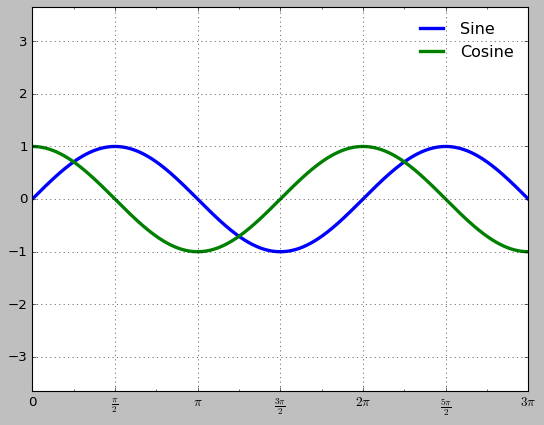

In [63]:
def format_func(value, tick_number):
    # N是pi/2的倍数
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0" # 0点
    elif N == 1:
        return r"$\frac{\pi}{2}$" # pi/2
    elif N == 2:
        return r"$\pi$" # pi
    elif N % 2 > 0:
        return r"$\frac{{%d}\pi}{2}$" %N # n*pi/2 n是奇数
    else:
        return r"${0}\pi$".format(N // 2) # n*pi n是整数

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

上图看起来好多了。注意到我们使用到了 Matplotlib 的 LaTeX 支持，使用美元符号将 LaTeX 字符串括起来。这是用来展示数学符号和公式的简便方法：在这个例子中"$\pi$"被渲染成希腊字母$\pi$。

plt.FuncFomatter()提供了对于图表刻度最高级的自定义和精细控制，并且当你需要创建需要印刷或出版的图表时非常方便。

## 11.在 matplotlib 中创建三维图表
Matplotlib 最开始被设计为仅支持二维的图表。到 1.0 版本发布左右，一些三维图表的工具在二维展示的基础上被创建了出来，结果就是 Matplotlib 提供了一个方便的（同时也是有限的）的可用于三维数据可视化的一套工具。三维图表可以使用载入mplot3d工具包来激活，这个包会随着 Matplotlib 自动安装：

In [13]:
from mpl_toolkits import mplot3d # 一旦模块被导入，三维 axes 就可以像其他普通 axes 一样通过关键字参数projection='3d'来创建
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

<IPython.core.display.Javascript object>

三维 axes 激活后，我们可以在上面绘制不同的三维图表类型。三维图表在 notebook 中使用交互式图表展示会优于使用静态展示；回忆我们前面介绍过，你可以使用%matplotlib notebook而不是%matplotlib inline来激活交互式展示模式。

### 三维的点和线
三维图表中最基础的是使用(x, y, z)坐标定义的一根线或散点的集合。前面介绍过普通的二维图表，作为类比，使用ax.plot3D和ax.scatter3D函数可以创建三维折线和散点图。这两个函数的签名与二维的版本基本一致，你可以参考[简单折线图]和[简单散点图]来复习一下这部分的内容。下面我们绘制一个三维中的三角螺旋，在线的附近在绘制一些随机的点：

In [18]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# 三维螺旋线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

<IPython.core.display.Javascript object>

注意默认情况下，图中的散点会有透明度的区别，用于体现在图中散点的深度。虽然三维效果在静态图像中难以显示，你可以使用交互式的视图来获得更佳的三维直观效果。

### 三维轮廓图
类似于我们在[密度和轮廓图]中介绍的内容，mplot3d也包含着能够创建三维浮雕图像的工具。就像二维的ax.contour图表，ax.contour3D要求输入数据的格式是二维普通网格上计算得到的 Z 轴的数据值。下面我们展示一个三维的正弦函数轮廓图

In [11]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'z')

有时候默认的视角角度不是最理想的，在这种情况下我们可以使用view_init函数来设置水平角和方位角。在下面的例子中，我们使用的是 60° 的水平角（即以 60° 俯视 x-y 平面）和 35° 的方位角（即将 z 轴逆时针旋转 35°）：

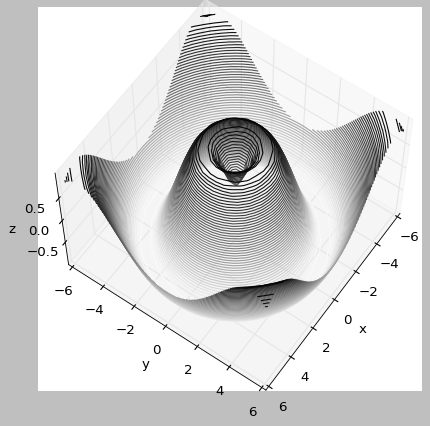

In [67]:
ax.view_init(60, 35)
fig

同样，注意到当使用 Matplotlib 交互式展示是，这样的旋转可以通过鼠标点击和拖拽来实现。

### 框线图和表面图
使用网格数据生成的三维图表还有框线图和表面图。这两种图表将网格数据投射到特定的三维表面，能够使得结果图像非常直观和具有说服力。下面是一个框线图的例子：

Text(0.5, 0.92, 'wireframe')

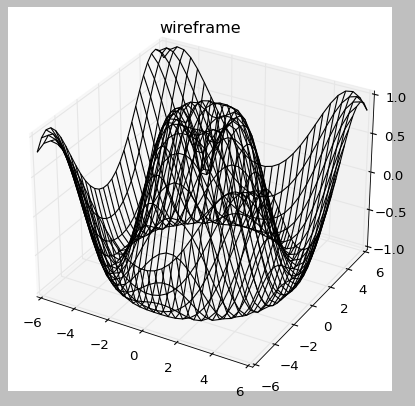

In [68]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

表面图类似框线图，区别在于每个框线构成的多边形都使用颜色进行了填充。添加色图用于填充多边形能够让图形表面展示出来：

Text(0.5, 0.92, 'surface')

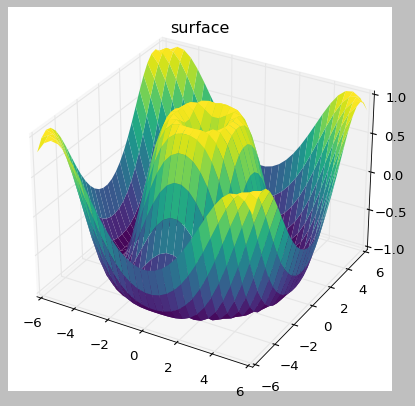

In [69]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

注意虽然每个颜色填充的表面都是二维的，但是表面的边缘不需要是直线构成的。下面的例子使用surface3D绘制了一个部分极坐标网格，能够让我们切入到函数内部观察效果：

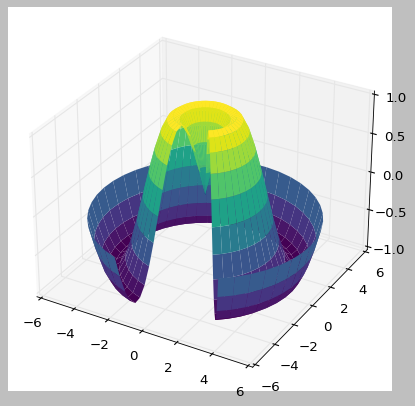

In [70]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

### 表面三角剖分
在一些应用场合中，上面的这种均匀网格绘制的图表方式太过于局限和不方便。在这些情况下，三角剖分的图表可以派上用场。如果我们并不是使用笛卡尔坐标系或极坐标系的网格来绘制三维图表，而是使用一组随机的点来绘制三维图表呢？

In [72]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

有了上面的数据之后，我们可以使用它们来绘制一张散点图表现出样本所在表面的情况：

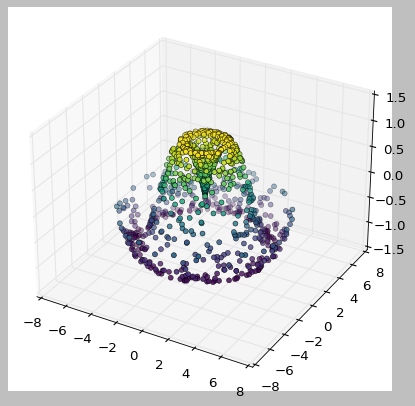

In [73]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

上图并未形象的表示出表面情况。这种情况下我们可以使用ax.plot_trisurf函数，它能首先根据我们的数据输入找到各点内在的三角函数形式，然后绘制表面（注意的是这里的 x，y，z 是一维的数组）：

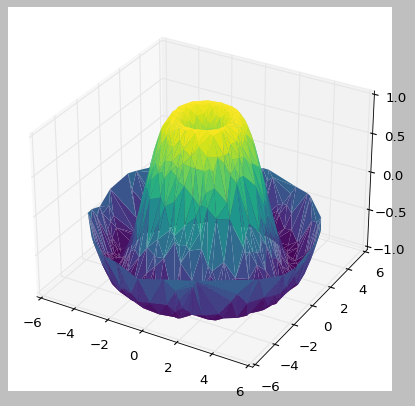

In [74]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none')

上图的结果很显然没有使用网格绘制表面图那么清晰，但是对于我们并不是使用函数构建数据样本（数据样本通常来自真实世界的采样）的情况下，这能提供很大的帮助。例如我们下面会看到，能使用这种方法绘制一条三维的莫比乌斯环。

## 12.绘制莫比乌斯环
莫比乌斯环是使用一条纸条，一端翻折后与另一端粘起来形成的环形。在拓扑学中这是非常有趣的一个形状，因为它只有一个面。我们下面使用 Matplotlib 的三维工具绘制莫比乌斯环。创建莫比乌斯环的关键在于能参数化它：莫比乌斯环是一个二维的环状结构，因此我们需要两个特定的维度。一个我们称为$\theta$ ，取值范围是$0-2\pi$表示整个环状，还有一个称为$\omega$，取值范围是$-1-1$表示纸带的宽度：

In [6]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

有了这两个参数之后，我们需要确定莫比乌斯环上*(x, y, z)*坐标的位置。

仔细思考一下，我们会发现在莫比乌斯环上有两个自转发生：一个是纸带绕环形中央位置的旋转（我们称为$\theta$），另一个纸带绕着中间轴线的旋转（我们称为$\phi$）。纸带中央位置旋转一整圈$2\pi$时，纸带绕中间轴线旋转刚好半圈$\pi$，我们将整个旋转均匀分布在纸带上时，就会有$\Delta \phi = \frac{\Delta \theta}{2}$。

In [7]:
phi = 0.5 * theta

现在我们已经有了所有需要获得三维坐标值的参数了。我们定义$r$为每个坐标点距离环形中间的位置，使用它来计算最终$(x,y,z)$三维坐标系的坐标值：

In [8]:
# r是坐标点距离环形中心的距离值
r = 1 + w * np.cos(phi)
# 利用简单的三角函数知识算得x，y，z坐标值
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

最后，为了绘制对象，我们必须保证三角剖分是正确的。实现这个最好的方法是在底层的参数上面实现三角剖分，最后让 Matplotlib 将这个三角剖分投射到三维空间中形成莫比乌斯环。下面的代码最终绘制图形：

(-1.0, 1.0)

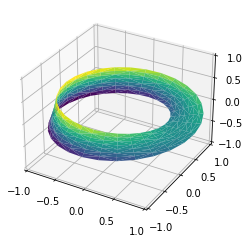

In [9]:
# 在底层参数的基础上进行三角剖分
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2)

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)

结合这些技巧，能够为你提供在 Matplotlib 创建和展现大量三维对象和模式的能力。

# 十六、2022年暑期培训

## （〇）“数学建模大讲堂——师哥师姐说建模”

优秀团队的备考及比赛经验往往大同小异，下面上交团队的经验我觉得非常全面，所以没再写我们团队的经验。**补充一点是，三名队友不能各司其职，备赛中每人模型、编程、写作都要学习，否则交流中容易产生障碍。**
### 上海交通大学获奖团队经验分享

#### 论文
1. 摘要：总背景与模型概括+每一小问：题目极简概括+建模基本流程+（可选：创新）+实验结果。其中，背景不必多说，评委比我们懂。
2. 问题重述：问题背景+问题提出。这一部分传达的是对题目的理解。用自己话表述，切记不可copy
3. 问题分析：要与后面一致，因为写论文的过程中可能会更改。不要前后矛盾。论文完成之后，记得复合一遍。
4. 模型建立：说明模型的合理性（为什么这么建立）。
5. 评价：不避讳缺点，大胆说即可。

#### 可视化
信息丰富、层次清晰、图例注明。

#### 总结
1. 每一步有理有据：假设要给出理由，模型指标为什么这么设置，选择算法的理由，命题成立的证明，优点缺点原因。
2. 创新和炫技应当稳住底盘。
3. 过程不理想没问题，建模不完美没问题---给出解决方案，或者可行方向；比赛四天不是尽善尽美的。

#### 竞赛时间安排

![](./images/上海交通大学优秀团队竞赛时间安排.jpg)

#### 注意事项
1. 提前确定良好的竞赛环境。
2. 理想的选题应当使各位组员有想法及其脉络
3. 初始的试错与整体状态的把握。
4. 赛前预制时间表，以便赛中保证进度的推进。
5. 分工，空白期。
6. 文件交互：代码的版本管理，各个文件命名区分保存。

## （一）数学建模竞赛论文写作与注意 烟台大学 陈传军 2022.7.18

### 一、如何建立数学模型
#### 1. 问题的识题与分析
通过对问题的分析，明确问题所给的信息：（小心谨慎，步步为营）
- 建模的目的是什么？
- 需要解决的问题是什么？核心问题是什么？
- 问题的关键词是什么？
- 解决问题的思路是什么？
- 需要做哪些工作？可以用什么知识和方法？
- 问题有什么特点、限制条件？
- 从条件和数据可以得到什么信息？
- 数据的来源是否可靠？
- 所给条件和数据有什么意义和作用？
- 哪些条件是**本质**的？
- 哪些条件中**可变动**的？
- 是否需要适当**补充**一些条件和数据？
#### 2. 数学模型的建立方法
##### （1）给出合理的假设（一定要问下自己：自己的假设必要吗？合理吗？）
- 关于是否包含某些因素的假设。
- 关于条件相对强弱的假设。
- 关于各因素影响相对大小的假设。
- 关于模型使用范围的假设。
##### （2）抓住核心问题和关键词，明确建模目的，针对实际问题，选择适用的建模方法，研究解决真实的问题。
##### （3）注意**说明**方法的适用性和正确性（一定要说明）
##### （4）避免建模三板斧：层次分析/模糊评价/遗传算法（三板斧不易得分。除非迫不得已才用）
#### 3. 模型的求解方法
- 尽量利用自己熟悉知识和方法，针对问题求解模型。
- 用解析方法，或数值方法，必要时学习一些新方法和算法。
- 使用工具软件要说明应用的原理或算法和程序，避免**黑箱操作**。（黑箱操作容易扣分）
- 注意问题的针对性和适用性。
#### 4. 模型解的分析和检验方法
##### （1）误差分析：
- 建模假设产生的误差
- 近似求解方法产生的误差
- 计算机产生的舍入误差
- 测量或实验数据产生的误差等
##### （2）模型结果分析
- 分析求解结果是否满足实际问题的需求，能否完全反映实际问题？
- 如有**偏差**，分析其原因，假设、模型，还是求解方法？
##### （3）灵敏度分析
- 某些参数的扰动对模型和结果产生什么样的影响？
- 从工程研究的角度是**必须要做**的工作。
##### （4）模型的模拟检验或仿真
- 利用已有的模型进行模拟检验，或仿真。
- 利用已有的算法思想进行模拟或仿真。


### 二、建模竞赛论文写作规范
#### 1.整体上
##### （1）论文题目
黑体3号，居中。最好不要直接使用题目，应该体现研究内容和方法。例如：**基于最小二乘法的**太阳影子定位技术研究；**基于多目标规划的**系泊系统设计问题研究.
##### （2）摘要：
黑体4号，居中；摘要内容：宋体，小4号。
##### （3）关键词
黑体，小4号。
#### 2. 细节上
##### （1）摘要内容（非常非常重要）
- 背景和问题：应**简要**（简要即可，因为评委老师更懂）叙述研究的对象和研究内容、研究目的；
- 问题分析：依据题目给出的数据或自行收集了哪些数据或信息；
- 关键假设：对所研究的问题、数据做了哪些**机理分析**或**数据观察**，据此做出了什么样的关键假设；
- 模型结构：采用了何种建模方法，建立了何种数学模型；
- 结果、检验、结论：主要结果或结论是什么，同时对假设、模型或结果做了何种验证或假设检验，结果如何？等等；
- 在摘要中一定要突出**方法，算法，结论，创新点，特色**，给出**结果**；不要有**废话**，一定要突出重点，让人一看就知道这篇论文是关于什么的，做了什么工作，用的什么方法，得到了什么结果/结论，达到了什么效果，有什么创新和特色。一定要短小精悍，字字珠玑。
- 语言精简，用词精确，阐述细致具体的方法。
- 关键词：3-5个
- 篇幅：2/3页~1页
##### （2）正文内容（语言与逻辑）
###### 语言
- 用科技语言描述你的问题，不得口语化。
- 熟练掌握和使用数字语言描述、分析、推理推导。
###### 逻辑
- 论文写作前后描述应逻辑清晰、论证充分、严谨。
- 假设应该是在充分的数据分析或机理分析基础上做出的，应说明其合理性。
- 模型是在假设基础上建立的。
- 算法是针对模型的个性、特殊性进行设计的，应该有针对性、可行性、正确性描述。
- 结果是模型利用算法计算出来的，应有正确性的检验。
- 模型、结果是否可信，应进行检验。
###### 符号、公式规范
- 独占一行的公式，居中排版
- 带编号的公式，编号方式与排版靠右排版
- 正文中的字母等符号，用公式编辑器。
- 每个队员的电脑软件一致，避免冲突。
###### 图形、表格规范
- 所有图形应有标题与编号，严谨出现上图、下图等问题。
- 图形应以文件存储，已插入或复制方式插入文档。
- 避免截图、拍照形式---不规范，visio画图。
- 图形标题应在图形下方，建议5号黑体排版。
- 所有表格应有标题和编号，严谨出现上表、下表等问题。
- 表格标题列在表格的上方，建议采用5号黑体。
- 表格制作最好采用国际通用的流行方式（三线格）。
###### 算法流程图或伪代码
###### 参考文献撰写规范
- 正文引用：用**方括号**标示参考文献的编号，如文献陈述式描述引用[1][3]等；建模方法等引用采用上表形式，如质量守恒定律$^{[4]}$.
- 参考文献列表：按正文中引用**次序**列出。
   - 图书类：[编号]作者，书名，出版地：出版社，出版年.
   - 期刊、杂志类：[编号]作者，论文名，杂志名，卷期号：起止页码，出版年.
   - 网络资源：[编号]作者，资源标题，网址，访问时间（年月日）
- 参考文献类型：专著[M]，会议论文集[C]，报纸文章[N]，期刊文章[J]，学位论文[D]，报告[R]，标准[S]，专利[P]
###### 附录撰写规范
- 至少应包括参赛论文的所有源程序代码（如源程序代码过多，应至少附主程序代码，并标注其他程序目录，且声明在支撑材料中）
- 中间计算结果、推理公式、全部计算结果等不宜放在论文正文中的内容，但对支持论文有帮助的，也应该放在附录中。
- 自主查阅使用的数据等资料（赛题中提供的数据不要放在附录）
- 如果确实没有源程序，也应在论文附录中明确说明“本论文没有源程序”；
- 备注：参赛作品中的支撑材料是指除研究论文外的其他一切辅助支撑材料，包括：全部源程序代码及其程序调用说明；用于求解的全部源程序。


### 三、论文评阅规则
#### 1. 假设的合理性
关键假设，并对假设的合理性进行解释，文中引用。
#### 2. 建模的创造性
鼓励创新，但要切实，成功的论文不能没有创新。
#### 3. 结果的正确性
一般没有标准答案，但要自圆其说；好模型的结果一般比较好，但不一定最好。
#### 4. 表述的清晰性
简洁规范，逻辑严密，清晰明理，体系完整。
#### 5. 建模的创造性
- 创造性是灵魂，文章要有闪光点。
- 好创意、好想法应当既在人意料之外，又在意料之中。
- 新颖性（独特性）与合理性皆备。
- 误区
  - 误区一：数学用得越高深，越有创造性。解决问题是第一原则，最适用的方法才是最好的方法。
  - 误区二：创造性主要体现在建模与求解上。创造性可以体现在建模的各个环节上，并且可以有多种表现形式。
  - 误区三：好创意来自于灵感，可遇不可求。好创意来自于对数学方法的掌握程度与对问题理解的透彻程度。
#### 6. 结果的正确性
- 最终数值结果的正确性或合理性是第一位的。
- 对数值结果或模拟结果进行必要的检验。正确不正确、不合理或误差大时，分析原因，对算法、计算方法或模型进行修正、改进。
- 题目中要求回答的问题，数值结果，结论，须一一列出。
- 模型的普适性。
#### 7. 表达的清晰程度
- 写好摘要，包括：建模的主要方法、主要结果，模型主要优缺点。
- 专人负责写作，及早动手。考虑写作的过程也是构思框架、理清思路的过程，有利于从总体上把握建模的思路反过来促进建模。
- 适当采用图表，增加可读性，一图胜千言。
#### 8. 论文评阅标准参考
##### (1)评分采用百分制
\begin{array}{|c|c|c|c|c|c|}
\hline
摘要+总体 & 模型 & 算法 & 结果 & 检验 & 其他 \\
\hline
10-15 & 40 & 20 & 10 & 10 & 10\\
\hline
\end{array}
##### (2)问题分值分布
i) 重视每一问，简单的问题分值不一定低。
ii)能得的分一定要拿到，不能得的分尽量得。
iii)每个题目分值分布都不同。
iv)2020年评分标准

2020A炉温曲线
\begin{array}{|c|c|c|c|c|}
\hline
摘要+总体 & 问题一 & 问题二 & 问题三 & 问题四\\
\hline
15 & 35 & 25 & 15 & 10 \\
\hline
\end{array}

2020B穿越沙漠
\begin{array}{|c|c|c|c|}
\hline
摘要+总体 & 问题一 & 问题二 & 问题三 \\
\hline
10 & 40 & 30 & 20 \\
\hline
\end{array}

2020C中小微企业得信贷决策
\begin{array}{|c|c|c|c|}
\hline
摘要+总体 & 问题一 & 问题二 & 问题三 \\
\hline
10 & 40 & 30 & 20 \\
\hline
\end{array}


### 四、从论文评阅看学生参加竞赛中的问题
1. 套模型的现象严重，机理分析的意识和能力欠缺，对所用方法一知半解，不管具体条件，套用现成的方法，导致错误。
2. 对结果的分析不够，**检验不足**。
3. 队员之间合作精神差，孤军奋战。
4. 依赖心理重（指导老师、网络）。


### 五、几点注意
- 注意存盘，以防意外。
- 写作与建模工作同步。
- 注意休息与饮食卫生。
- 注意保密，以防抄袭。

## （二）优化建模 天津工业大学 汪晓银 2022.7.19

1. 数模竞赛的题目一般是层层递进的，第一问是关键，要做好。
2. 确定决策变量。设置决策变量尽量多，能多设就多设。
3. 多**做题**，而**非看题**。


## （三）数学建模竞赛的参赛准备和注意事项 清华大学 谢金星 2022.7.20

谢金星Email: xiejx@tsinghua.com

### 建模竞赛特点
- 广无边，深无底。只有更好，没有最好，更没有**标准答案**。
- 注重创新意识

### 常用模型（含软件实现）
- 数学基础：微积分、线性代数、概率论与随机过程...
- 微分方程模型：ODE、PDE、差分方程、数值解法...
- 优化：（非）线性规划，整数规划，（多）目标规划，动态规划，网络优化，智能优化算法...
- 统计：数据预处理，参数估计、假设检验，回归，主成分分析，方差分析，判别分析，...
- 其他：综合评价，图与网络，博弈，仿真，神经网络，机器学习...

### 备战建议
模拟参赛，举一反三（2周左右）

### 选题
1.选题多长时间，根据自己情况而定
2.尽量不换题
3.扬长避短
a.知己知彼：团队优势何在、擅长什么
b.赛前预选：聚焦某几类赛题。
c.C题选的多，得奖难。选连续或离散。
d.尽量选本团队能深刻理解的问题

### 时间安排：并行推进
1. 举例
\begin{array}{ccccccc}
\hline         & D1A           & D1P            & D2A               & D2P           & D3A          & ...\\
\hline 队员1建模 & 选题：背景、文献 & 问题1：精读、初模 & 问题1：模型         & 问题2：精读、初模 & 问题2：模型    & ...\\
\hline 队员2编程 & 选题：背景、软件 & 问题1：编程、准备 & 问题1：编程         & 问题2：编程、准备 & 问题2：编程    & ...\\
\hline 队员3写作 & 选题：背景、文献 & 问题1：写作、框架 & 问题1：模型、写作跟进 & 问题2：写作、跟进 & 问题2：写作跟进 & ...\\
\hline
\end{array}

2. 文献查阅，适可而止
3. 创新源泉：独立思考，不复制文献。

### 评阅标准及注意事项

1. 假设的合理性，建模的创造性。
2. 结果的正确性，表述的清晰性。

合理性：关键假设（不欣赏罗列大量无关紧要的假设）；要对假设的合理性进行解释，正文中引用。
创造性：特别欣赏独树一帜、标新立异，但要合理。
正确性：不强调与”评阅要点“一致和结果的精度；好方法的结果一般比较好，但不一定是最好的
清晰性：摘要应理解为详细摘要，提纲挈领。引用规范，严禁抄袭。（含网络资料）

### 解题建议
1. 从问题出发，而不是从方法出发。具体问题具体分析。
2. 模型建立一般化。

### 常见问题
套路化
- ”n板斧“：浮夸，盲目追求所谓的”高大上“
- 不从问题出发，乱套方法
- 评价类：AHP（实际中应用场合少，能不用就不用）；模糊；熵权法；。。。
- 数据类：回归；主成分；聚类；灰色；。。。
- 遗传算法：神经网络/深度学习；。。。
- 一知半解（甚至不知不解）、牵强附会
- 到处抄袭（甚至不表明处处）
- 拒绝套路，大胆创新，模不惊人死不休。

### 不断提高写作能力（很重要）
问题重述与分析：不是抄题，写自己的理解
模型假设及其合理化：说明理由模型建立及其应用：模型尽量一般化
模型检验与敏感性分析：可以成为亮点。
模型有点与不足：实事求是，说到点子
文献、附录和支撑材料：严守科学规范

### 优秀作品的基本特征
- 类型1：创新明显，独树一帜（可以不拘小节）
- 类型2：解答完整，逻辑清晰，表达流畅，滴水不漏

### 几个观点
数学建模没有最好，只有更好。
模型评判不在于方法”高大上“、”包医百病“，而在于对症下药。
数学建模没有专家，最多只有领域专家。

### 关于算法的意见
问：谢老师，建模竞赛建议用智能算法解题吗？更宽泛的，建议用算法结题吗？
答：智能算法能不用就不用，其不能保证精度。解题优先找其他方法；建模竞赛最重要的是模型，要先给出模型，用什么方法解决模型，都可；但是（迫不得已）如果没有模型，算法必须写清楚，伪代码、框图等，为什么这样设计，为什么能解决题目，目的，为什么没有模型仅有算法。

### 总的来说
- 广度诚可贵，深度价更高。
- 享受竞赛，尽力而为。

### 扑克牌游戏案例
一副扑克牌，牌面朝上摊在桌上。不断从这一副扑克牌中抽取三张，满足三张扑克牌点数之和为9或19或29。问最后桌子上还剩哪张或哪些扑克牌。

#### 模型假设
The "standard" deck of 52 cards(without Jokers):
- Four suits: clubs, diaminds, hearts and spades
- Each suit includes numbers two through ten, and an ace(1), a king(13), a queen(12) and a jack(11).

#### 法一：数论
考虑到9/19/29各位数字相同，从每次抽取后桌子上扑克牌点数和的个位数入手。
记$T_n$为第$k$次抽取后桌子上扑克牌点数之和，则有
\begin{align*}
T_0 &= 4*(1+2+\dots+13) = 364 \equiv 4 (mod 10)\\
T_1 &\equiv 4+1 =5 (mod 10)\\
\vdots \\
T_{17} &\equiv 1
\end{align*}
从而剩余的最后一张牌为$1$或者是$J$。

**不合理性：** 默认剩余一张牌，实际上不一定只剩一张牌。

#### 法二：方程
决策变量：若第$j$次选择扑克牌$i$，则$x_{ij}=1$，否则$x_{ij}=0$。
容易得到线性规划模型如下：
$$
\begin{align}
    &\max (\text{or} \min) \ f = 364 - \sum_{i=1}^{13} \sum_{j=1}^{17} (i*x_{ij})\\
    &\text{s.t.}
        \begin{cases}
            \sum_{j=1}^{17} x_{ij} \leqslant 4, i=1,2,\dots,13\\
            \sum_{i=1}^{13} x_{ij} = 3, j=1,2,\dots,17\\
            \sum_{i=1}^{13} (i*x_{ij}) = 9+10y_j+10z_j, j=1,2,\dots,17\\
            y_j \geqslant z_j, j=1,2,\dots,17\\
            x_{ij},y_j,z_j \in \{0,1\}
        \end{cases}
\end{align}
$$
注意：9/19/29的处理。

In [81]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

model = gp.Model()

lst1 = [(i, j) for i in range(1, 13+1) for j in range(1, 17+1)]
lst2 = [j for j in range(1, 17+1)]
x = model.addVars(lst1, vtype=GRB.BINARY, name='x')
y = model.addVars(lst2, vtype=GRB.BINARY, name='y')
z = model.addVars(lst2, vtype=GRB.BINARY, name='z')

obj = [[i for j in range(1, 17+1)] for i in range(1, 13+1)]
model.setObjective(364 - gp.quicksum(i*x[i, j] for j in range(1, 17+1) for i in range(1, 13+1)), GRB.MAXIMIZE)

model.addConstrs(x.sum(i, '*') <= 4 for i in range(1, 13+1))
model.addConstrs(x.sum('*', j) == 3 for j in range(1, 17+1))
for j in range(1, 17+1):
    SUM = 0
    for i in range(1, 13+1):
        SUM += i*x[i, j]
    model.addConstr(SUM == 9 + 10*y[j] + 10*z[j])
model.addConstrs(y[j] >= z[j] for j in range(1, 17+1))

model.optimize()

for j in range(1, 17+1):
    for i in range(1, 13+1):
        if x[i, j].x != 0:
            print("第{}次抽取扑克牌{}".format(j, i))

# print(type(x.sum[1, '*']))
for i in range(1, 13+1):
    if np.sum(x[i, j].x for j in range(1, 17+1)) < 4:
        print("最后剩余扑克牌{}".format(i))
gp.disposeDefaultEnv()


Set parameter Username
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 64 rows, 255 columns and 731 nonzeros
Model fingerprint: 0x2ba06223
Variable types: 0 continuous, 255 integer (255 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 9e+00]
Presolve time: 0.00s
Presolved: 64 rows, 255 columns, 714 nonzeros
Variable types: 0 continuous, 255 integer (255 binary)

Root relaxation: objective 1.300000e+01, 162 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   13.00000    0   13          -   13.00000      -     -    0s
     0     0   13.00000    0   23          -   13.00000      -     -    0s
     0     0   13.00000   

d:\programme\python\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


## （四）图算法介绍 山东大学 李龙龙 2022.7.20
详见"赠"文件夹内的"图算法 山东大学 李龙龙"

## （五）复杂网络 复旦大学 李聪 2022.7.21
当时摸鱼了，这个没听...crying

## （六）离散优化-模型、理论、算法 中科院 胡旭东 2022.7.21

### 1.离散优化的方法与框架
#### （1）建立实际问题的数学模型
#### （2）分析求解该数学问题的难易程度
#### （3）设计求解该数学问题的算法
#### （4）对算法进行性能分析
性能分析包括两方面：①该算法能否求出最优解。②该算法需要多长时间求出最优解。
#### （5）对算法进行编程和实现
#### （6）对数值结果进行分析
#### （7）给出原始实际问题的解决方案
### 2.计算复杂性
我们总是认为，多项式时间是快速算法的尺度。
### 3.最小顶点覆盖问题（NP-难问题）
#### （1）算法
- 贪婪算法并不总能给出最优解。
- 近似算法可以给出一个较好的近似解。
#### （2）现状
- 至今人们还没有找到这样一个算法，也没有证明不存在这样的算法。该问题是千禧年问题之一。
- 如果我们能找到求解最小顶点覆盖问题的多项式算法，那么我们就证明了$P=NP$；如果我们能证明不存在求解最小顶点覆盖问题的多项式算法，那么我们就证明了$P \neq NP$。


### 4.近似算法
#### 4.1定义
考虑一个（目标函数）最小化问题，$I$是问题输入的实例(instance)，设$A$是求解该问题的一个**多项式时间算法**，用$c_A(I)$记算法$A$求得解$I$所得解的目标函数值，用$c_{opt}(I)$记最优解的目标函数值。若存在一个常数$\alpha$，对于任意的$I$，都有$c_A(I) \leqslant \alpha c_{opt}(I)$，则称在线算法$A$是一个$\alpha-$近似算法。(R.L.Graham, 1966)
#### 4.2极大匹配
##### 4.2.1定义
给定一个图$G=(V,E)$，设$M$是边集$E$的一个子集。如果$M$中任意两条边都没有公共的端点，则称$M$是一个匹配。若E\M中任意一条边添加进$M$，他都不再是匹配，则称$M$是极大匹配。显然，最大匹配一定是极大匹配。反之则不然。
##### 4.2.2基于极大匹配算法的顶点覆盖
首先构造一个极大匹配$M$；然后把$M$中所包含的边的两个端点都放入$C$中；则$C$是一个顶点覆盖（显然不一定是最小的）。
##### 4.2.3定理1
任意给定一个图$G=(V,E)$，基于极大匹配的算法所得到的顶点覆盖所包含的顶点个数$|C_M|$不会超过最少顶点覆盖所含有的顶点个数$|C_{opt}|$的两倍，亦即该算法是一个**2-近似算法**。
#### 4.3随机算法
求解最少顶点覆盖问题的一个简单的随机算法即是，将每条边的两个端点中的一个以（相同的）概率1/2放入顶点覆盖中。随机算法产生的顶点覆盖可能是最优顶点覆盖的“任意大”，所以从期望角度考虑才有意义。
##### 4.3.1定理2
任给一个图$G=(V,E)$，简单随机算法输出的图$G$的顶点覆盖所含顶点个数的期望值不超过图$G$的最优顶点覆盖所含顶点个数的2倍，随机算法是期望意义下的**2-近似算法**。

### 5.最小权顶点覆盖
#### 5.1整数规划方法
##### 5.1.1介绍
在前面我们已经证明了，基于最大匹配的算法是求解最少顶点覆盖问题的一个2-近似算法，然而它无法处理该问题的一般情形。下面我们就来说明如何用整数规划方法求解最小权顶点覆盖问题。为此，我们先将该问题化成一个整数（线性）规划问题(integer linear programming, ILP)。不过，ILP是NP-hard。
\begin{array}{|r|r|}
\hline
\left(\right. \mathbf{ILP}) \min \sum_{v_{i} \in V} w_{i} x_{i} & (\mathbf{LP}) \min \sum_{v_{i} \in V} w_{i} x_{i} \\
s.t. x_{i}+x_{j} \geqslant 1,\left(v_{i}, v_{j}\right) \in E, & s.t. x_{i}+x_{j} \geqslant 1,\left(v_{i}, v_{j}\right) \in E \\
x_{i}=0 或者 1, v_{i} \in V . & x_i \geqslant 0\\
\hline
\end{array}
如果将上面（左侧）的整数约束用简单的约束$x_{i} \geqslant 0$，对所有$v_{i} \in V$替换掉，我们就可以得到上面（右侧）的线性规划(linear programming, LP)。存在求解LP的多项式时间算法。
应用求解线性规划的算法，我们即可得到上述松弛线性规划问题的一个最优解 $x_{\mathrm{LP}}^{*}(\boldsymbol{G})$。注意，$\boldsymbol{x}_{\mathrm{LP}}^{*}(\boldsymbol{G})$ 的某些分量可能不是整数，因而它不一定是整数规划的一个可行解；但是它的目标函数值不会超过整数规划问题的最优解的目标函数值。
要得到一个整数规划的可行解，一个非常简单的方法就是将$x_{\mathrm{LP}}^{*}(G)$中足够大的分量都取整为1，而其他分量取整为0；亦即，如果一个顶点在$x_{\mathrm{LP}}^{*}(G)$中相应的分量至少是$1/2$，则将该顶点包括在顶点覆盖中。
注意，求解最小权顶点覆盖问题的这一方案（可能）需要求解带有很多约束的一个线性规划问题；实际上，松他线性规划问题的约束个数等于给定图的边的条数，因而这一方案可能比较费时（尽管仍然是多项式时间可完成的）。
##### 5.1.2定理3
任给最小权顶点覆盖问题的一个实例，基于取整方法的整数规划算法可以找到它的一个顶点覆盖，其权值不超过最优覆盖的权值的2倍，亦即该算法是一个**2-近似算法**。

#### 5.2随机算法
##### 5.2.1介绍
下面我们讨论一下如何将前面那个非常简单的求最少顶点覆盖问题的随机算法进行推广，使得它可以处理最小权顶点覆盖问题。基本思想还是一样的，惟一的区别在于，我们每一次抛的都是有偏差硬币。我们选取每一条边的两个端点中的一个的概率是与其权值成反比的。
##### 5.2.2算法过程
$C:=\varnothing$\
while $E \neq \varnothing$ do begin\
$\quad$ pick $e=(u,v) \in E$;\
$\quad$ randomly choose $x$ from $\{u,v\}$ with $Prob[x=u]=\frac{w(v)}{w(u)+w(v)}$;\
$\quad C:=C \cup \{x\}$;\
$\quad E:=E \backslash \{e|e=(x,y)\}$\
end-while\
return $C$

注意，上述算法在利用了贪婪算法的优点的同时，也避免了在每一次都持续地选错端点。换言之，度数高的顶点被选入顶点覆盖的集合更大，在每一次拋硬币时，结果会偏向选取顶点权值小的端点。因而，一个顶点的权值与它当前的度数之比决定了该顶点被选入顶点覆盖的机会大小。
##### 5.2.3定理4
任给一个顶点赋权图$G$，推广的随机算法可输出图$G$的一个顶点覆盖，其权值的期望值最多不超过图$G$的最优顶点覆盖的权值的2倍，亦即它在期望意义下是**2-近似算法**。
##### 5.2.4优点
- 相比确定性算法，随机算法的最显著特征就是它们的结构简单，而且耗时少。
- 随机算法的主要缺点是它们所输出解的好坏具有随机性。不过，可以通过去随机化克服这个缺点。

## （七）数学建模竞赛相关问题解析 山东大学 刘保东 2022.7.29

2021年C题近一半队伍选择。

控制节奏
两天两夜完成论文，拿出一天完善论文（存在的问题、模型检验等）
星期四晚睡觉前，有一个建模大概的思路。
没有检验的论文不可能拿到靠前的名次。

三个人三方面都要会，模型建立三个人集中搞。

附录代码主要放**自己编的**（借鉴的成熟算法放支撑材料），完整的代码放在支撑材料（无相似度检测）里。

建模型该是什么就什么，例如，不刻意避免非线性规划，遇到非线性规划，想办法解。

代码运行时间不重要，评委（省组委会、全国组委会）一般不跑代码。

主要看模型主体（40%），模型结果（10%）占比小。

整数规划转线性规划，得到近似解，然后在近似解附近暴力求解。

# 十七、经典问题与算法

## 1.牛顿下降算法

(1) $x^{(0)}, k =0$

(2) 计算当前的梯度和Hessian矩阵，$\nabla f(x^{(k)}), H(x^{(k)})$

(3) 计算当前步长$\alpha$

(4) $x^{(k+1)} = x^{(k)} -\alpha  H(x^{(k)})^{-1}\nabla f(x^{(k)}), k = k+1$。一元情形，$d = -\dfrac{f'\left(x^{(k)}\right)}{f''\left(x^{(k)}\right)}$

(5) 是否满足终止条件? 是，终止，否跳转(2)

**Note:**(4)的推导

$$f\left(x^{(1)}\right) = f\left(x^{(0)}+d \right) = f\left(x^{(0)}\right) + \nabla f\left(x^{(0)}\right)^T d + \frac{1}{2}d^THd =: m(x)$$
令$$\dfrac{\partial m(x)}{\partial d} = \nabla f\left(x^{(0)}\right) = Hd = 0$$
则有$$d=-H^{-1} \nabla f\left(x^{(0)}\right)$$

### 梯度下降算法与牛顿下降算法比较
（1）牛顿下降法是用二次曲面去拟合当前的局部曲面，而梯度下降法是用平面去拟合当前的局部曲面，一般用二次曲面拟合的更好，所以一般牛顿算法收敛快。

（2）当数据规模比较大时，牛顿下降算法中的$H^{-1}$不好算，这种情况下，一般用梯度下降法。

## 2.拟牛顿算法
不需要知道二阶导信息，通过某种方式近似牛顿算法中的$H^{-1}$。常见的算法：DFS、BFGS、L-BFGS。

## 3.非线性优化两个常见问题的解决方式
### (A)非线性优化如何选取初值？
（1）线性化：简化非线性优化（可以通过删除某些条件），将其简化后的线性模型的解作为初值。

（2）利用Mente Carlo方法。
### (B)非线性离散优化中的NP难问题如何处理？
记住，建模比赛中我们不好做的，其他人肯定也不好做，这个对自己实力的自信。那么怎么做呢？

（1）想办法拿到一个初值、

（2）应用启发式算法。**特别注意：**只有确定为NP难问题或者是非线性优化不好做时，才可以用启发式算法，并且要给出使用理由，否则，用启发式算法本身就是丢分项，就像平面几何用坐标法一样。

三大启发式算法：遗传算法、模拟退火算法、人工蚁群算法。其中，遗传算法难点：**解的基因编码如何设计要讲清楚！**

## 4.整数规划基础和经典问题

（1）一般的整数规划问题没有特别有效算法。

（2）若软件长时间得不到结果,可采用如下方式：

   (i) Mente Carlo方法，随机生成多个解，取最优。

   (ii) relaxation,整数约束去掉求解,搜索附近的整数解
    x1= 3.5,....,x10 = 5.7
    [3,4]，   。。。。。[5,6]

   (iii)启发式算法，遗传算法，模拟退火。。

#### 例 2005B DVD租赁

随着信息时代的到来，网络成为人们生活中越来越不可或缺的元素之一。许多网站利用其强大的资源和知名度，面向其会员群提供日益专业化和便捷化的服务。例如，音像制品的在线租赁就是一种可行的服务。这项服务充分发挥了网络的诸多优势，包括传播范围广泛、直达核心消费群、强烈的互动性、感官性强、成本相对低廉等，为顾客提供更为周到的服务。

考虑如下的在线DVD租赁问题。顾客缴纳一定数量的月费成为会员，订购DVD租赁服务。会员对哪些DVD有兴趣，只要在线提交订单，网站就会通过快递的方式尽可能满足要求。会员提交的订单包括多张DVD，这些DVD是基于其偏爱程度排序的。网站会根据手头现有的DVD数量和会员的订单进行分发。每个会员每个月租赁次数不得超过2次，每次获得3张DVD。会员看完3张DVD之后，只需要将DVD放进网站提供的信封里寄回（邮费由网站承担），就可以继续下次租赁。请考虑以下问题：

(1)  表2中列出了网站手上100种DVD的现有张数和当前需要处理的1000位会员的在线订单（表2的数据格式示例如下表2，具体数据请从http://mcm.edu.cn/mcm05/problems2005c.asp下载），如何对这些DVD进行分配，才能使会员获得最大的满意度？请具体列出前30位会员（即C0001~C0030）分别获得哪些DVD。

(2) 继续考虑表2，并假设表2中DVD的现有数量全部为0。如果你是网站经营管理人员，你如何决定每种DVD的购买量，以及如何对这些DVD进行分配，才能使一个月内95%的会员得到他想看的DVD，并且满意度最大？

#### 模型分析：
$i = 1..1000$ 表示i用户，$f_i$ 表示i用户是否分配了DVD, $j = 1..100$表示j DVD, $v_j$表示j DVD的数量, $p_{i,j}$表示偏爱程度, $s_{i,j} = 2^{11- p_{i,j}},p_{i,j} \ne 0$ 满意度，越大越好, $x_{i,j} = 1$,表示用户i被分配j DVD, $ x_{i,j} = 0$表示用户i没有被分配j DVD

目标函数：满意度最大$max = \sum_{i=1..1000}\sum_{j=1..100} s_{i,j}x_{i,j}$

约束条件：
(1) 分配出去的DVD数量不能超过库存: $\sum_{i=1..1000} x_{i,j} \le v_j, j = 1..100$\
(2) 客户的需求，3张DVD，必须满足: $\sum_{j=1..100} x_{i,j} = 3, i = 1..1000$\
(3) $0,1$约束: $x_{i,j} = 0,1$

综上，我们得到数学模型如下：
$$
\begin{array}{ll}
\max & \sum_{i=1}^{1000}\sum_{j=1}^{100} s_{i,j}x_{i,j} \\
\text { s.t. } & \left\{\begin{array}{l}
\sum_{i=1..1000} x_{i,j} \le v_j, j = 1..100\\
\sum_{j=1..100} x_{i,j} = 3f_{i}, i = 1..1000\\
x_{i,j} = 0,1\\
f_{i} = 0,1
\end{array}\right.
\end{array}
$$

## 5.算法复杂性


什么问题是实际上是可解的？

通俗来说，多项式时间是好的，指数时间是不好的。

但是多项式时间次数高也不好。以对n个数进行排序的算法为例，目前最好的效果是O(nlogn), 而O($n^2$)效果要差一些。

Problem X polynomial-time (Cook) reduces to problem Y if

Problem X polynomial-time arbitrary instances of problem X can be solved using:
・Polynomial number of standard computational steps, plus
・Polynomial number of calls to oracle that solves problem Y.


## 6. P、NP、NP-complete、NP-hard

(P) – Deterministic Polynomial time algorithm
(NP) – Non-deterministic Polynomial time algorithm,
Feasibility can be determined in polynomial time
(NP-complete) – NP and at least as hard as any known NP problem
(NP-hard) – not provably NP and at least as hard as any NP problem,
Optimization over an NP-complete feasibility problem

## 7.代数方程的应用-插值


### 拉格朗日插值


给定n+1不同的点：$(x_0,y_0),(x_1,y_1),\ldots, (x_n,y_n)$，其中$a = x_0 < x_1 < \ldots < x_n=b$,
如何求过所有点的n次多项式？
**方法1（特定系数法）**：

设$f(x) = c_nx^n + c_{n-1}x^{n-1} + \ldots + c_1x + c_0 $，将n+1个点的数据代入，得到方程组：
$$
\left\{
\begin{array}{c}
c_nx_0^n + c_{n-1}x_0^{n-1} + \ldots + c_1x_0 + c_0 = y_0\\
c_nx_1^n + c_{n-1}x_1^{n-1} + \ldots + c_1x_1 + c_0 = y_1\\
\vdots\\
c_nx_n^n + c_{n-1}x_n^{n-1} + \ldots + c_1x_n + c_0 = y_n
\end{array}
\right.
$$

将上述方程组写成矩阵形式 $Ac = \mathbf{y}$, 其中

$\mathbf{c} = (c_n,c_{n-1},\cdots, c_1,c_0)^T, \mathbf{y} = (y_0,y_1,\cdots, y_n)^T,$
$$
A = \begin{pmatrix}
x_0^n & x_0^{n-1} & \ldots & x_0^2 & x_0 & 1 \\
x_1^n & x_1^{n-1} & \ldots & x_1^2 & x_1 & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
x_n^n & x_n^{n-1} & \ldots & x_n^2 & x_n & 1
\end{pmatrix}
$$

考虑到矩阵A的行列式是范德蒙德行列式，而且$x_i \ne x_j, 0\le i,j \le n$，故$det(A) \ne 0$。

从而A可逆, 我们可以得到方程的唯一解$c = A^{-1}\mathbf{y}$。

**方法2（拉格朗日多项式）**：

考虑基函数$l_i(x) = \prod_{j=0}^{n,j\ne i} \frac{x-x_j}{x_i-x_j}$

当$ i\ne j, l_i(x_j) = 0$, 当$i=j时, l_i(x_i) = 1$

$ f(x) = \sum_{i=0}^{n} l_i(x)y_i $

很容易验证， $(x_i, y_i)$ 满足 $f(x_i)=y_i, i = 0,1,\cdots n$




## 8.最优化的应用-拟合

### 线性最小二乘法

**向量微积分公式**：

假设 $x \in R^n, y\in R^n, A\in R^{n\times n}$

$\frac{\partial x^Ty}{\partial x} = \frac{\partial y^Tx}{\partial x} = y$,

$\frac{\partial x^TAx}{\partial x} = (A^T + A)x$

如果$A^T = A$, $\frac{\partial x^TAx}{\partial x} =2Ax$

**拟合问题**：

给定n个点：$(x_1,y_1),\ldots, (x_n,y_n)$，和基函数$\phi_1(x),\phi_2(x),\ldots, \phi_m(x)$,

待拟合函数$f(x) = c_1\phi_1(x)+c_2\phi_2(x)+\ldots +c_m\phi_m(x)$, 如何拟合参数$c_1,c_2,\cdots, c_m$，

使得拟合的曲线与各个数据点的距离总体达到最小?

**线性最小二乘法推导**：


设定对应的向量，$x = (x_1,x_2,\cdots, x_n)^T, y = (y_1,y_2,\cdots, y_n)^T, c = (c_1,c_2,\cdots, c_m)^T$

将$x_i, i = 1,2,\cdots,n$ 代入到基函数$f(x)$中，我们得到方程组：

$$
\left\{
\begin{array}{c}
    c_1\phi_1(x_1)+c_2\phi_2(x_1)+\cdots+c_m\phi_m(x_1)=f(x_1) \\
    c_1\phi_1(x_2)+c_2\phi_2(x_2)+\cdots+c_m\phi_m(x_2)=f(x_2) \\
    \cdots \\
    c_1\phi_1(x_n)+c_2\phi_2(x_n)+\cdots+c_m\phi_m(x_n)=f(x_n) \\
\end{array}
\right.
$$

将上述方程组写成矩阵形式 $\Phi c = \mathbf{g}$, 其中

$$\mathbf{c} = (c_1,c_2,\cdots, c_n)^T, \mathbf{g} = (f(x_1), f(x_2),\cdots, f(x_n))^T,$$
$$
\Phi = \begin{pmatrix}
\phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_m(x_1) \\
\phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_m(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_m(x_n)
\end{pmatrix}
$$

如何刻画f(x)和数据点之间的距离？我们这个地方采用欧氏距离。

目标函数 $\min J(c) = \sum_{i=1}^n (f(x_i)-y_i)^2=||g-y||_2^2 $

$J(c)=||\Phi c-y||_2^2 = (\Phi c-y)^T(\Phi c-y) = c^T\Phi^T\Phi c- c^T\Phi^Ty - y^T\Phi c + y^Ty$

$= c^T\Phi^T\Phi c- 2c^T\Phi^Ty  + y^Ty$

$\frac{\partial J(c)}{\partial c} =  2\Phi^T\Phi c- 2\Phi^Ty =0$

$\Phi^T\Phi c = \Phi^Ty$

满足一定条件，$\Phi^T\Phi$可逆， 故$ c = (\Phi^T\Phi)^{-1}\Phi^Ty$

## 9.过拟合问题


[1 2 3 4 5 6]
真实值: 23
预测值: 24.542384543409437 -9.808024643868155


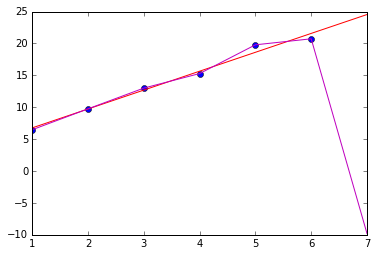

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(1,7)
print(x)
y = 3*x +2 + 3*np.random.rand(6)
plt.figure()
plt.plot(x,y,'bo')

p1 = np.polyfit(x,y,1)
p2 = np.polyfit(x,y,5)

f1 = np.polyval(p1,7)
f2 = np.polyval(p2,7)

real= 3*7+2
print('真实值:',real)
print('预测值:', f1,f2)

xnew = np.arange(1,8)
y1 = np.polyval(p1,xnew)
y2 = np.polyval(p2,xnew)
plt.plot(xnew,y1,'r')
plt.plot(xnew,y2,'m')

## 10.反问题的最小二乘法

### CT图像成像原理


**模型建立**：

(1) 射线穿过均匀物质时候的衰减规律：

均匀物质对X射线的吸收规律满足关系$I=I_{0} e^{-\mu_{X}}$， 通过变换可以得到 $\mu=\frac{1}{x} \ln \frac{I_{0}}{I}$，其中$\mu$是X射线在物质中的衰减系数，$I_{0}$是初始的辐射量，$I$是衰减后的辐射量，$x$是辐射穿过物质的长度。在考虑X射线束通过非均匀物质时，我们通常将非均匀物质划分成多个小块，并假设每一个小块都是均匀的物质。



根据前面均匀物质的吸收规律，我们有：$I_{1}=I_{0}e^{\left(-\mu_{1} x\right)}$, $I_{2}=I_{1}{e}^{\left(-\mu_{2} x\right)}$, $I_{n}=I_{0} e^{\left[-\left(\mu_{1}+ \mu_{2}+\ldots+ \mu_{n}\right)\right]x}$。 最后这个关系式，我们可以得到方程
\begin{equation}
\left(\mu_{1}+\mu_{2}+\cdots+\mu_{n}\right)x=\ln \frac{I_{0}}{I_{n}}.
\end{equation}



 旋转射线的方向，我们都能得到类似公式。这里面有细微的差别：当射线平行于水平线或者垂直时，X射线穿过每一个小方块的长度相同，所以有一个共同参数$x$；不同方向的X射线穿过不同的小方块的长度不一定相同，不妨设$L_i, i = 1\ldots m$ 通过$j,j=1\ldots n$个方块的长度是$a_{i,j}$。 在特定的系统中，给点射线的方向角度和特检查物体的位置，这些长度是已知的。 而我们需要估计的n个小块的衰减系数是$\mu_j, j=1\ldots n$。类似的,我们有
$$a_{11}\mu_{1}+a_{12}\mu_{2}+\cdots+a_{19}\mu_{n}=\ln \frac{I_{0}}{I_{n,1}}$$
$$a_{21}\mu_{1}+a_{22}\mu_{2}+\cdots+a_{29}\mu_{n}=\ln \frac{I_{0}}{I_{n,2}}$$
$$\cdots$$
$$a_{m1}\mu_{1}+a_{n2}\mu_{2}+\cdots+a_{n9}\mu_{n}=\ln \frac{I_{0}}{I_{n,m}}$$
其中，$I_{n,j},j = 1\cdots m$是第$j$条射线穿过物体后的辐射量。这个关系式写成矩阵形式就是
\begin{equation}
A\mathbf{\mu}=\mathbf{b}
 \end{equation}


其中$A=(a_{ij})_{m\times9}$, $\mathbf{\mu}={(\mu_{1},\mu_{2},\cdots,\mu_{9})}^{T}$, $\mathbf{b}=(\frac{I_{0}}{I_{9,1}},\frac{I_{0}}{I_{9,2}},\cdots,\frac{I_{0}}{I_{9,1}})^{T}$。
通过方程组\ref{eq_ct2}可以求解出衰减系数$\mu$。人体的不同器官组织的衰减系数差别比较大，通过所求的衰减系数的可视化，能够非常好观察人体的真实状况。

实际CT图像重建要比上面的模型复杂，我们只是抽取了最本质的内容进行描述。医学图像重建包括CT图像重建和MRI图像重建依然是前言的研究领域。CT和MRI的发明及其应用所获的诺贝尔奖次数非常多，我们粗略统计有6次。

对于超定方程，我们希望如下目标函数达到最小：
\begin{equation}
min =||A\mathbf{\mu}-\mathbf{b}||_{2}^{2}
\end{equation}

对其求关于$\mu$求偏导，得到最小二乘解：
\begin{equation}
\mathbf{\mu}=(A^{T} A)^{-1}A^{T}\mathbf{b}
\end{equation}

2004年，陶哲轩，Donoho 和Candes三人分别了一项新的研究成果：压缩感知。 该方法考虑如下优化问题：
\begin{equation}
min =||A\mathbf{\mu}-\mathbf{b}||_{1}^{2}
\end{equation}


基于压缩感知的重建方法能够用较少的次数采样得到更高精度的重建，在图像重建领域里面取得了重大突破。



## 11.PDE差分

\begin{array}{l}
u_{t}=D u_{x x}\\
D \text { diffusion constant }>0\\
\text { IC: } u(x, 0)=u_{0}(x)\\
\text { BC: } u(0, t)=g(t), u(1, t)=f(t)
\end{array}


差分方法：
\begin{array}{l}
\frac{u_{i}^{n+1}-u_{i}^{n}}{k}=D \frac{\left(u_{i-1}^{n}-2 u_{i}^{n}+u_{i+1}^{n}\right)}{h^{2}} \\
u_{i}^{n+1}=u_{i}^{n}+\frac{D k}{h^{2}}\left(u_{i-1}^{n}-2 u_{i}^{n}+u_{i+1}^{n}\right) \\
u_{i}^{n+1}=\frac{D k}{h^{2}} u_{i-1}^{n}+\left(1-2 \frac{D k}{h^{2}}\right) u_{i}^{n}+\frac{D k}{h^{2}} u_{i+1}^{n} \\
\text { Let } r=\frac{D k}{h^{2}} \\
u_{i}^{n+1}=r u_{i-1}^{n}+(1-2 r) u_{i}^{n}+r u_{i+1}^{n}
\end{array}


\begin{array}{l}
\frac{u_{i}^{n+1}-u_{i}^{n}}{k}=\frac{D}{2}\left(\frac{\left(u_{i-1}^{n}-2 u_{i}^{n}+u_{i+1}^{n}\right)}{h^{2}}+\frac{\left(u_{i-1}^{n+1}-2 u_{i}^{n+1}+u_{i+1}^{n+1}\right)}{h^{2}}\right) \\
u_{i}^{n+1}-\frac{D k}{2 h^{2}}\left(u_{i-1}^{n+1}-2 u_{i}^{n+1}+u_{i+1}^{n+1}\right)=u_{i}^{n}+\frac{D k}{2 h^{2}}\left(u_{i-1}^{n}-2 u_{i}^{n}+u_{i+1}^{n}\right) \\
-\frac{D k}{2 h^{2}} u_{i-1}^{n+1}+\left(1-\frac{D k}{h^{2}}\right) u_{i}^{n+1}-\frac{D k}{2 h^{2}} u_{i+1}^{n+1}=\frac{D k}{2 h^{2}} u_{i-1}^{n}+\left(1-\frac{D k}{h^{2}}\right) u_{i}^{n}+\frac{D k}{2 h^{2}} u_{i+1}^{n} \\
\text { Let } r=\frac{D k}{2 h^{2}} \\
-r u_{i-1}^{n+1}+(1-2 r) u_{i}^{n+1}-r u_{i+1}^{n+1}=r u_{i-1}^{n}+(1-2 r) u_{i}^{n}+r u_{i+1}^{n}
\end{array}

$$ \left[\begin{array}{cccc}
(1-2 r) & -r & & \\
-r & (1-2 r) & -r & \\
& -r & \ddots & -r \\
& & -r & (1-2 r)
\end{array}\right]\left[\begin{array}{c}
u_{2}^{n+1} \\
u_{3}^{n+1} \\
\vdots \\
u_{N-1}^{n+1}
\end{array}\right]=\left[\begin{array}{cccc}
(1-2 r) & r & & \\
r & (1-2 r) & r & \\
& r & \ddots & r \\
& & r & (1-2 r)
\end{array}\right]\left[\begin{array}{c}
u_{2}^{n} \\
u_{3}^{n} \\
\vdots \\
u_{N-1}^{n}
\end{array}\right] $$

$$
A \mathbf{u}^{n+1}=B \mathbf{u}^{n}
$$





# 十八、九个常用的优化技巧

## 1.如何将绝对值约束变为线性约束？
如何将$\sum_{i=1}^n |x_i|$变成线性？
引入变量$u_i, v_i, i=1,2,\dots,n$
$$
u_i = \frac{|x_i| + x_i}{2} \geqslant 0, v_i = \frac{|x_i| - x_i}{2} \geqslant 0
$$
$\sum_{i=1}^n |x_i|$变为$\sum_{i=1}^n (u_i + v_i)$

## 2.如何将$\min \max z_i$变为线性约束？
如何将目标函数$\min \max z_i$变为线性？
添加变量！
记$\max z_i = v$, 则目标函数变为$\min v$, 并增加$n$个约束条件: $z_i \leqslant v, i=1,2,\dots,n$.

## 3. 如何将互斥约束(0-3问题)变为线性约束？
如何将下面约束条件变为线性？（0-3问题）
$$
f(x_1, x_2, \dots, x_n) = 0 \text{ or } 3
$$
引入0-1变量$y$, 满足
$$
f(x_1, x_2, \dots, x_n) = 3y
$$

$$
y \in \{0, 1\}
$$

## 4.如何将不等式约束变为等式约束？
如何将不等式约束变为等式约束？
添加变量！
例如，不等式约束$x_1 + x_2 + x_3 \leqslant 1, x_i \geqslant 0$，可以多设一个变量$x_0 \geqslant 0$，使不等式约束变为等式约束$x_1 + x_2 + x_3 = 1, x_i \geqslant 0$.

## 5.如何将多目标规划问题变为单目标规划问题？
### 5.1目标函数为两个
如果是两个目标的规划问题，通常采用的是"控制变量法"。
在投资收益与风险问题(见司守奎老师的"Python数学实验与建模"187页)中，目标函数为
$$
\begin{cases}
	\max  \sum_{i=0}^n{\left( r_i-p_i \right)}x_i \text{  (盈利)}\\
	\min  \underset{1\leqslant i\leqslant n}{\max}q_ix_i \text{  (风险)}\\
\end{cases}
$$

**处理方式1：**
通过固定盈利水平，极小化风险使多目标规划问题变为单目标问题:
$$
\min \underset{1\leqslant i\leqslant n}{\max}q_ix_i
$$
, 增加约束条件$\sum_{i=0}^n{\left( r_i-p_i \right)}x_i = N$.

**处理方式2：**
通过给定风险一个界限 ，使最大的一个风险$q_ix_i/M\leqslant a$，此时也可使多目标规划问题变为单目标问题:
$$
\max \sum_{i=0}^n{\left( r_i-p_i \right)}x_i
$$
, 增加约束条件$q_ix_i/M\leqslant a$.
### 5.2目标函数多于两个
通常采取的方式是对多个目标函数进行加权处理，即
设由$n$个目标，不妨均设为$\max$型，$\max f_1(x), \max f_2(x), \dots, \max f_n(x)$, 添加$n$个权重$\omega_1, \omega_2, \dots, \omega_n$,满足$\sum_{i=1}^n \omega_i = 1$，此时可通过对$n$个目标函数加权求和变为单目标规划问题：
$$
\max \sum_{i=1}^n \omega_i f_i(x)
$$

## 6.如何处理"尽可能"约束条件？
当遇到"尽可能"这一约束条件时，常考虑引入**正负偏差**。例如，姜启源老师"数学模型（第五版）"4.7一节例2"升级调薪问题"，要求年工资总额
$$
510+5x_1+5x_2+10x_3
$$
尽可能不超过$600$。引入正负偏差$d^{+}, d^{-}$满足
$$
510+5x_1+5x_2+10x_3-d^++d^-=600
$$
"尽可能"这一约束条件就转化为使非负正偏差$d^{+}$尽可能小。


## 7.如何处理多个0-1变量关系？
设有A, B两个0, 1变量. 要求A不成立($A=0$)推出B($B=0$)也不成立,可增加约束条件$A \geqslant B$.


## 8.如何处理对象内部的先后关系？
面试问题(见该笔记的第一章1.4.1), 同一阶段不同同学面试的先后关系如何表示？这一关系是通过**充分大数$\mathrm{M}$实现的**(注意$\mathrm{M}$不能设为np.inf, 印象里会出bug, 具体记不太清了)。
考察第$i$位同学与第$j$位同学, 设$s_i, s_j$分别为两位同学面试的开始时间, $e_i, e_j$分别为两位同学面试的结束时间.
添加0-1变量$x_{i j}$: $x_{i j}=1$表示$i$前$j$后, 反之$i$后$j$前.
则两个约束条件
$$e_i \leqslant s_j+\left(1-x_{i j}\right) M$$
$$e_j \leqslant s_i+x_{i j} M$$
即可满足两位同学面试前后关系要求, 即不论$i$前$j$后, 还是$i$后$j$前, 两个条件均成立, 并且仅有之一起真正约束。

## 9.如何处理分段线性函数？
### 9.1理论方法
设一个$n$段线性函数$f(x)$的分点为$b_1\leqslant ...\leqslant b_n\leqslant b_{n+1}$, 引入$z_k$, 将$x$和$f(x)$表示为
$$
x=\sum_{k=1}^{n+1}{z_k}b_k
$$
$$
f\left( x \right) =\sum_{k=1}^{n+1}{z_k}f\left( b_k \right)
$$
$z_k$和0-1变量$y_k$满足
$$
z_1\leqslant y_1,z_2\leqslant y_1+y_2,\dots ,z_n\leqslant y_{n-1}+y_n,z_{n+1}\leqslant y_n
$$
$$
\sum_{i=1}^n{y_i}=1, y_k=0\text{或}1
$$
$$
\sum_{i=1}^{n+1}{z_i}=1,z_k\geqslant 0\left( k=1,2,\dots ,n+1 \right)
$$
### 9.2实例
姜启源老师"数学模型（第五版）"4.3一节例2原油采购与加工问题。该题的分段函数有实际意义，即只有当以10千元/t的价格购买时才能以8千元/t的价格购买 。
上述实际意义符号化即为
$$
\left( x_1-500 \right) x_2=0
$$
$$
\left( x_2-500 \right) x_3=0
$$
$$
0\leqslant x_1,x_2,x_3\leqslant 500
$$
这也可以通过另一种技巧处理，通过引入0-1变量$y_1,y_2,y_3$转化为线性模型：
$$
500y_2\leqslant x_1\leqslant 500y_1
$$
$$
500y_3\leqslant x_2\leqslant 500y_2
$$
$$
x_3\leqslant 500y_3
$$
$$
y_1,y_2,y_3=0\text{或}1
$$



# 十九、参考资料
[1]司守奎, 孙玺菁. Python数学实验与建模[M]. 北京: 科学出版社. 2020.\
[2]姜启源, 谢金星, 叶俊. 数学模型[M]. 第五版. 北京: 高等教育出版社. 2018.\
[3]J. VanderPlas, Python Data Science Handbook, 1st ed., O'Reilly  Media, 2016.